## Problem Statement

<font color="Green"> <h4> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn. </h4>

<font color="Purple"><h4><b> Business Objective </b></h4>

 The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.



## 1. Module Import, Data Read and Function Declarations

In [1]:
import pandas as pd
import numpy as np
import warnings as wrn
import datetime


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#from fancyimpute import KNN as knn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE


wrn.filterwarnings('ignore')
pd.set_option('display.max_columns', 230)

Using TensorFlow backend.


In [2]:
## ***** Import the dataset | Start ***** 
df=pd.read_csv('telecom_churn_data.csv',sep=',',encoding='ISO-8859-1')
## ***** Import the dataset | End ***** 

In [3]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
## ***** Checking the shape of the dataset | Start *****
df.shape
## ***** Checking the shape of the dataset | End *****

(99999, 226)

In [5]:
## ***** Check the dataset - columns | Start *****
print("*********** Dataframe Columns ***************\n")
print(df.columns)
## ***** Check the dataset - columns | End *****

*********** Dataframe Columns ***************

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


### <font color="brown">1.1. Functions Bay

In [6]:
## ***** Get the percentage of Nulls | Start *****
def getNullperc(df):
    perdf = (df.isna().sum()/len(df)*100).to_frame().sort_values(by=[0],ascending=False).rename(columns={0:'Percentage'})
    return perdf
## Get the percentage of Nulls | End

## ***** Function to define the creation of boxplots ***** | Start ## 
def plotbox(col,n,dfb):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    sns.set(font_scale=1.5)
    plt.figure(figsize=(35,10))
    #plt.subplot(18,2,n)
    sns.boxplot(x=col,data=dfb,palette=("viridis"))
    plt.title('Figure ' + str(n) +' -  '+ col)
    plt.show()
## ***** Function to define the creation of boxplots ***** | End ##

## ***** Plotting bar | Start *****
def plotbar(col,lx,ly,title,b):
    sns.set(style="darkgrid")
    sns.set_context('talk')
    sns.set(font_scale=1.5)
    plt.figure(figsize=(16,6))
    ax = (col).plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel(ly, fontsize=16)
    ax.set_xlabel(lx, fontsize=16)
    plt.title(title)
    x_offset = -0.10
    y_offset = 0.02
    if(b==1):
        for p in ax.patches:
            b = p.get_bbox()
            val = "{:+.2f}".format(b.y1 + b.y0)        
            ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    plt.show()


    

## ***** Plotting bar | End *****

## ***** Tag the churners ***** Start
def tagChurners(df):
    if(((df['total_ic_mou_9']==0) or (df['total_og_mou_9']==0)) and ((df['vol_2g_mb_9']==0) or (df['vol_3g_mb_9']==0))):
        return 1
    else:
        return 0
## ***** Tag the churners ***** End

## ***** Bin the Good Phase arpu ***** | Start
def arpuGoodPhase(x):
    if x < 15.48:
        return "Low"
    elif x>=15.58 and x<129.78:
        return "Normal"
    else:
        return "High"
## ***** Bin the Good Phase arpu ***** | End

## ***** Bin the Action Phase arpu ***** | Start
def arpuActionPhase(x):
    if x < 4.10:
        return "Low"
    elif x>=4.10 and x<20.92:
        return "Normal"
    else:
        return "High"
## ***** Bin the Action Phase arpu ***** | End

## *****  Draw the ROC Curve *****  | Start
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None
## *****  Draw the ROC Curve *****  | End

In [7]:
## ****** Get the Sum of NULLs (if any) ****** | Start
dfNulls=getNullperc(df)
print(dfNulls)
## ****** Get the Sum of NULLs (if any) ****** | End


## ****** Get the total number of columns having nulls > 70 ****** | Start
len(dfNulls.loc[dfNulls.Percentage > 70])
# ****** Get the total number of columns having nulls > 70 ****** | End

                          Percentage
arpu_3g_6                  74.846748
night_pck_user_6           74.846748
total_rech_data_6          74.846748
arpu_2g_6                  74.846748
max_rech_data_6            74.846748
fb_user_6                  74.846748
av_rech_amt_data_6         74.846748
date_of_last_rech_data_6   74.846748
count_rech_2g_6            74.846748
count_rech_3g_6            74.846748
date_of_last_rech_data_7   74.428744
total_rech_data_7          74.428744
fb_user_7                  74.428744
max_rech_data_7            74.428744
night_pck_user_7           74.428744
count_rech_2g_7            74.428744
av_rech_amt_data_7         74.428744
arpu_2g_7                  74.428744
count_rech_3g_7            74.428744
arpu_3g_7                  74.428744
total_rech_data_9          74.077741
count_rech_3g_9            74.077741
fb_user_9                  74.077741
max_rech_data_9            74.077741
arpu_3g_9                  74.077741
date_of_last_rech_data_9   74.077741
n

40

We can see that there are more than 74% of the Nulls present for some columns, but lets see how can we handle these

## 2. Data Preparations

<b> We see a lot of missing values. However, we cannot just delete these columns as the data may be related to high valued customers and would impact the final results. </b>
<br>
We can impute the values here based on below validation- </br>
<br>Validate if the columns - <b> total_rech_data_6 </b> and <b> date_of_last_rech_data_6 </b> have null values at the same index.</br> 
<br> <b>If they are same, then it means there was no data recharge done for that month </b>
Hence, <b>we can impute the column value with 0 safely.</b> </br>

In [8]:
## ******* For June month- ****** | Start
total_rech_data_6_index = df['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = df['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indices for NULL values for month 6 are equal')
    
    #As the indices are equal, replacing the value with 0
    df['total_rech_data_6'].fillna(0, inplace=True)
    df['av_rech_amt_data_6'].fillna(0, inplace=True)

## ******* For June month- ****** | End

The indices for NULL values for month 6 are equal


In [9]:
## ******* For July month- ****** | Start
total_rech_data_7_index = df['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = df['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indices for NULL values for month 7 are equal')
    
    #As the indices are equal, replacing the value with 0
    df['total_rech_data_7'].fillna(0, inplace=True)
    df['av_rech_amt_data_7'].fillna(0, inplace=True)

## ******* For July month- ****** | Start

The indices for NULL values for month 7 are equal


In [10]:
## ******* For August month- ****** | Start

total_rech_data_8_index = df['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = df['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indices for NULL values for month 8 are equal')
    
    #As the indices are equal, replacing the value with 0
    df['total_rech_data_8'].fillna(0, inplace=True)
    df['av_rech_amt_data_8'].fillna(0, inplace=True)

## ******* For August month- ****** | End

The indices for NULL values for month 8 are equal


In [11]:
## ****** Let's create a new variable total recharge amount for data: total_data_rech_amt ****** | Start
df['total_data_rech_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_data_rech_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']
df['total_data_rech_amt_9'] = df['total_rech_data_9'] * df['av_rech_amt_data_9']
## ****** Let's create a new variable total recharge amount for data: total_data_rech_amt ****** | End

In [12]:
## ***** Create a total amount of rechanrge column with data recharge and normal recharge columns ***** | Start
df['Total Recharge_6']= df['total_data_rech_amt_6'] + df['total_rech_amt_6']
df['Total Recharge_7']= df['total_data_rech_amt_7'] + df['total_rech_amt_7']
df['Total Recharge_8']= df['total_data_rech_amt_8'] + df['total_rech_amt_8']
df['Total Recharge_9']= df['total_data_rech_amt_9'] + df['total_rech_amt_9']
## ***** Create a total amount of rechanrge column with data recharge and normal recharge columns ***** | End

In [13]:
df['Total Recharge_9'].fillna(0,inplace=True)
df[['Total Recharge_6','Total Recharge_7','Total Recharge_8','Total Recharge_9']]

Total Recharge_6  Total Recharge_7  Total Recharge_8  Total Recharge_9
0                 614.0             504.0             504.0               0.0
1                  74.0             538.0             383.0               0.0
2                 168.0             315.0             116.0             404.0
3                 230.0             310.0             601.0               0.0
4                 252.0             350.0             287.0               0.0
5                 120.0               0.0             130.0               0.0
6                 499.0             222.0             294.0               0.0
7                1580.0             790.0            3638.0               0.0
8                 437.0             955.0             327.0               0.0
9                 220.0             349.0             210.0               0.0
10                  0.0               0.0             392.0             116.0
11                366.0               0.0             308.0               0.0
12                110.0             110.0             130.0               0.0
13                507.0             253.0             924.0               0.0
14                 60.0              40.0              70.0               0.0
15                  0.0             686.0             696.0               0.0
16                570.0             348.0             160.0               0.0
17                816.0               0.0              30.0               0.0
18                  0.0              90.0              50.0               0.0
19                308.0             448.0             702.0               0.0
20                437.0             250.0             477.0               0.0
21                600.0             680.0             718.0               0.0
22                255.0              30.0               0.0               0.0
23                  0.0            1166.0             979.0             504.0
24                440.0             330.0             490.0               0.0
25                256.0             366.0             160.0               0.0
26                  0.0             308.0             125.0            1010.0
27                 60.0               0.0             168.0               0.0
28                 90.0             103.0             305.0               0.0
29                196.0               0.0               0.0               0.0
...                 ...               ...               ...               ...
99969             562.0               0.0               0.0             223.0
99970             360.0            1022.0             337.0             420.0
99971             110.0             220.0             279.0               0.0
99972               0.0               0.0             596.0               0.0
99973              27.0             200.0               0.0               0.0
99974             520.0             410.0             388.0               0.0
99975             120.0              44.0              44.0               0.0
99976             214.0             275.0             272.0               0.0
99977              40.0             140.0             226.0               0.0
99978               0.0               0.0               0.0               0.0
99979               0.0             110.0               0.0               0.0
99980             659.0              50.0             323.0            1155.0
99981             504.0             624.0             764.0               0.0
99982             308.0               0.0             658.0            1310.0
99983             220.0             170.0               0.0               0.0
99984             514.0             723.0             722.0            7019.0
99985              97.0               0.0             200.0               0.0
99986             584.0            1144.0              50.0             800.0
99987             207.0             180.0             160.0               0.0
99988             380.0      

#### Lets compute the average recharge amount for the month 6 & 7. This avg recharge amount is equal to the sum of talk time recharge and data recharge amounts for the respective months.

In [14]:
## ***** Create the total recharge amount for each customer | Start *****

avg_recharge_amount_month_6_7 = df[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

#Calculate the 70th percentile of the avg recharge amount in first 2 months-
amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

## ***** Create the total recharge amount for each customer | End *****

70th percentile of the average recharge amount in the first two months is -  239.0


#### The 70th percentile for the recharge amount for June and July is  239

In [15]:
## ****** Get the high valued customers ******* | Start
df = df[avg_recharge_amount_month_6_7 > amount_70th_percentile]
## ****** Get the high valued customers ******* | End

In [16]:
df.shape

(29953, 234)

<b> There are 29953 high valued customers </b>

In [17]:
## ****** Tag the churners ****** | Start
df['churn'] = df.apply(tagChurners,axis=1)
## ****** Tag the churners ****** | End
df.churn.value_counts()

0    26698
1     3255
Name: churn, dtype: int64

In [18]:
## ***** Get the percentage of probable churners ***** | Start 
print(round(len(df[df['churn']==1])/len(df)*100,2))
## ***** Get the percentage of probable churners ***** | End 

10.87


After deciding the churn/no-churn we see that there is about <b> 10.87 % of the high valued customers as probable churners </b>

In [19]:
## ***** Get the columns to be removed from the dataset after deciding the churn ***** | Start
colRemove = [col for col in df.columns if('_9' in col)]
## ***** Get the columns to be removed from the dataset after deciding the churn ***** | End
print("***** Before deletion:"+str(len(df.columns)))
df=df.drop(colRemove,axis=1)
print("***** After deletion:"+str(len(df.columns)))

***** Before deletion:235
***** After deletion:179


In [20]:
df.shape

(29953, 179)

<b> Now lets see the Nulls again in the columns </b>

## 2.1. Data Cleaning and Missing Value Imputation

In [21]:
## ****** Get the Sum of NULLs (if any) ****** | Start
dfNulls=getNullperc(df)
print(dfNulls)
## ****** Get the Sum of NULLs (if any) ****** | End

## ****** Get the total number of columns having nulls > 40% ****** | Start
print("Number of columns with more than 40% Nulls: "+str(len(dfNulls.loc[dfNulls.Percentage > 40])))
cols40Nulls = dfNulls[dfNulls.Percentage > 40].index
print("Columns with more than 40% Nulls are - \n")
print(cols40Nulls)
# ****** Get the total number of columns having nulls > 40% ****** | End

                          Percentage
count_rech_3g_8            46.799987
arpu_2g_8                  46.799987
date_of_last_rech_data_8   46.799987
count_rech_2g_8            46.799987
night_pck_user_8           46.799987
max_rech_data_8            46.799987
fb_user_8                  46.799987
arpu_3g_8                  46.799987
night_pck_user_6           44.112443
arpu_3g_6                  44.112443
fb_user_6                  44.112443
count_rech_3g_6            44.112443
arpu_2g_6                  44.112443
date_of_last_rech_data_6   44.112443
count_rech_2g_6            44.112443
max_rech_data_6            44.112443
fb_user_7                  43.117551
date_of_last_rech_data_7   43.117551
arpu_3g_7                  43.117551
max_rech_data_7            43.117551
count_rech_2g_7            43.117551
arpu_2g_7                  43.117551
count_rech_3g_7            43.117551
night_pck_user_7           43.117551
og_others_8                 3.912797
loc_ic_t2f_mou_8            3.912797
i

We see columns which have more than 40% Nulls. Lets see further for these columns. <b> In total there are 24 columns with 40% or more Nulls </b>

<b> There are columns that have date missing .Since We cannot impute dates without much knowledge, <br>
Hence dropping them. </b>

In [22]:
## ****** Drop the columns ****** | Start
df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], axis=1, inplace = True)
## ****** Drop the columns ****** | End

In [23]:
# Now let's analyze the max rech data columns:
print(df.max_rech_data_6.describe())
print("Total NULL values for max_rech_data_6 columns is - ", df.max_rech_data_6.isnull().sum())

print(df.max_rech_data_7.describe())
print("Total NULL values for max_rech_data_7 columns is - ", df.max_rech_data_7.isnull().sum())

print(df.max_rech_data_8.describe())
print("Total NULL values for max_rech_data_8 columns is - ", df.max_rech_data_8.isnull().sum())

count    16740.000000
mean       139.804002
std        118.892926
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
Total NULL values for max_rech_data_6 columns is -  13213
count    17038.000000
mean       140.444712
std        120.295284
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
Total NULL values for max_rech_data_7 columns is -  12915
count    15935.000000
mean       136.353373
std        119.571138
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64
Total NULL values for max_rech_data_8 columns is -  14018


<b> Since the min value for all these 3 columns is 1 and max value is 1555.00. Hence, let's impute them with 0 value. </b>

In [24]:
# Replce them with 0
for col in ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']:
    df[col].fillna(0, inplace=True)

In [25]:
## **** Pront the value counts for the columns ***** | Start
print(df['fb_user_8'].value_counts())
print(df['fb_user_7'].value_counts())
print(df['fb_user_6'].value_counts())
## **** Pront the value counts for the columns ***** | Start

1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64
1.0    15705
0.0     1333
Name: fb_user_7, dtype: int64
1.0    15511
0.0     1229
Name: fb_user_6, dtype: int64


These columns have a high class imbalance owing to NaN values, so we impute them with 0

In [26]:
## ****** Fill nans with 0 ****** | Start
df['fb_user_6'].fillna(0,inplace=True)
df['fb_user_7'].fillna(0,inplace=True)
df['fb_user_8'].fillna(0,inplace=True)
## ****** Fill nans with 0 ****** | End

<b> Check for the columns where there is no variations </b>

In [27]:
## ****** Get the number of columns without variations ****** | Start
valCol1=[col for col in df.columns if(len(df[col].value_counts())==1)]
## ****** Get the number of columns without variations ****** | End

In [28]:
print(valCol1)
print("\nThe number of such columns without any variations:"+ str(len(valCol1)))

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

The number of such columns without any variations:13


<b> As there is no variations for all the above columns we can drop these columns </b>

In [29]:
## ***** Drop the columns without any variations ****** | Start
df.drop(valCol1,axis=1,inplace=True)
## ***** Drop the columns without any variations ****** | End
df.shape

(29953, 163)

In [30]:
getNullperc(df)

Percentage
arpu_3g_8            46.799987
arpu_2g_8            46.799987
night_pck_user_8     46.799987
count_rech_3g_8      46.799987
count_rech_2g_8      46.799987
count_rech_3g_6      44.112443
arpu_3g_6            44.112443
arpu_2g_6            44.112443
count_rech_2g_6      44.112443
night_pck_user_6     44.112443
count_rech_2g_7      43.117551
arpu_3g_7            43.117551
count_rech_3g_7      43.117551
night_pck_user_7     43.117551
arpu_2g_7            43.117551
std_og_t2f_mou_8      3.912797
std_og_mou_8          3.912797
isd_og_mou_8          3.912797
spl_og_mou_8          3.912797
og_others_8           3.912797
loc_ic_t2t_mou_8      3.912797
loc_ic_t2m_mou_8      3.912797
isd_ic_mou_8          3.912797
loc_ic_mou_8          3.912797
std_ic_t2t_mou_8      3.912797
std_ic_t2m_mou_8      3.912797
std_ic_t2f_mou_8      3.912797
std_ic_mou_8          3.912797
spl_ic_mou_8          3.912797
std_og_t2t_mou_8      3.912797
...                        ...
total_rech_num_8      0.000000
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
av_rech_amt_data_6    0.000000
vol_3g_mb_6           0.000000
vol_2g_mb_8           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
max_rech_data_8       0.000000
last_day_rch_amt_7    0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [31]:
### ******* Check the distribution for the arpu_3g columns to handle the NaNs ****** | Start
print(df.arpu_3g_6.describe())
print(df.arpu_3g_7.describe())
print(df.arpu_3g_8.describe())
### ******* Check the distribution for the arpu_3g columns to handle the NaNs ****** | End

count    16740.000000
mean       120.055618
std        226.164119
min        -30.280000
25%          0.000000
50%         15.605000
75%        178.345000
max       6362.280000
Name: arpu_3g_6, dtype: float64
count    17038.000000
mean       120.810794
std        229.671975
min        -26.040000
25%          0.000000
50%         13.000000
75%        180.522500
max       4980.900000
Name: arpu_3g_7, dtype: float64
count    15935.000000
mean       118.106064
std        218.976760
min        -24.490000
25%          0.000000
50%         10.020000
75%        179.630000
max       3716.900000
Name: arpu_3g_8, dtype: float64


We can't drop the records just becuase they are NaNs. But while checking the we can see that they range from negative to high positives. As mean is showing significantly high becuase of the high positives lets impute them with medians.
For 
 -> arpu_3g_6 - 15.48
 -> arpu_3g_7 - 15.48
 -> arpu_3g_8 - 15.48

In [32]:
## ****** Imputing values with the median ****** | Start
df.arpu_3g_6.fillna(15.48,inplace=True)
df.arpu_3g_7.fillna(12.95,inplace=True)
df.arpu_3g_8.fillna(10.02,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)

Percentage
count_rech_2g_8      46.799987
arpu_2g_8            46.799987
night_pck_user_8     46.799987
count_rech_3g_8      46.799987
count_rech_2g_6      44.112443
arpu_2g_6            44.112443
night_pck_user_6     44.112443
count_rech_3g_6      44.112443
arpu_2g_7            43.117551
count_rech_3g_7      43.117551
night_pck_user_7     43.117551
count_rech_2g_7      43.117551
loc_ic_t2t_mou_8      3.912797
std_og_t2f_mou_8      3.912797
isd_og_mou_8          3.912797
spl_og_mou_8          3.912797
og_others_8           3.912797
std_og_t2m_mou_8      3.912797
std_og_mou_8          3.912797
std_ic_t2m_mou_8      3.912797
loc_ic_t2m_mou_8      3.912797
loc_ic_mou_8          3.912797
std_ic_t2t_mou_8      3.912797
loc_og_mou_8          3.912797
std_ic_t2f_mou_8      3.912797
std_ic_mou_8          3.912797
spl_ic_mou_8          3.912797
isd_ic_mou_8          3.912797
ic_others_8           3.912797
std_og_t2t_mou_8      3.912797
...                        ...
total_rech_num_8      0.000000
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
av_rech_amt_data_6    0.000000
vol_3g_mb_6           0.000000
vol_2g_mb_8           0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
max_rech_data_8       0.000000
last_day_rch_amt_7    0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [33]:
## ****** Check and Impute the column count_rech_2g ***** | Start
print(df.count_rech_2g_8.describe())
print(df.count_rech_2g_7.describe())
print(df.count_rech_2g_6.describe())

## ****** Imputing values with the median ****** | Start
df.count_rech_2g_8.fillna(1,inplace=True)
df.count_rech_2g_7.fillna(1,inplace=True)
df.count_rech_2g_6.fillna(1,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column count_rech_2g ***** | End

count    15935.000000
mean         2.273110
std          3.113894
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         44.000000
Name: count_rech_2g_8, dtype: float64
count    17038.000000
mean         2.458974
std          3.236767
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         48.000000
Name: count_rech_2g_7, dtype: float64
count    16740.000000
mean         2.222162
std          3.006502
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64


Percentage
night_pck_user_8     46.799987
arpu_2g_8            46.799987
count_rech_3g_8      46.799987
night_pck_user_6     44.112443
count_rech_3g_6      44.112443
arpu_2g_6            44.112443
night_pck_user_7     43.117551
arpu_2g_7            43.117551
count_rech_3g_7      43.117551
spl_og_mou_8          3.912797
isd_og_mou_8          3.912797
loc_og_mou_8          3.912797
std_og_t2t_mou_8      3.912797
std_og_t2m_mou_8      3.912797
std_og_t2f_mou_8      3.912797
std_og_mou_8          3.912797
std_ic_t2f_mou_8      3.912797
std_ic_mou_8          3.912797
og_others_8           3.912797
loc_og_t2c_mou_8      3.912797
loc_ic_t2t_mou_8      3.912797
loc_ic_t2m_mou_8      3.912797
loc_ic_t2f_mou_8      3.912797
std_ic_t2m_mou_8      3.912797
loc_ic_mou_8          3.912797
spl_ic_mou_8          3.912797
std_ic_t2t_mou_8      3.912797
loc_og_t2m_mou_8      3.912797
roam_og_mou_8         3.912797
loc_og_t2f_mou_8      3.912797
...                        ...
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
last_day_rch_amt_6    0.000000
vol_2g_mb_8           0.000000
last_day_rch_amt_7    0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_6    0.000000
count_rech_2g_8       0.000000
count_rech_2g_7       0.000000
count_rech_2g_6       0.000000
max_rech_data_8       0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [34]:
## ****** Check and Impute the column night_pck_user ***** | Start
print(df.night_pck_user_6.describe())
print(df.night_pck_user_7.describe())
print(df.night_pck_user_8.describe())

## ****** Imputing values with the median ****** | Start
df.night_pck_user_6.fillna(0,inplace=True)
df.night_pck_user_6.fillna(0,inplace=True)
df.night_pck_user_6.fillna(0,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column night_pck_user ***** | End

count    16740.000000
mean         0.024313
std          0.154024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64
count    17038.000000
mean         0.022010
std          0.146719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_7, dtype: float64
count    15935.000000
mean         0.021399
std          0.144716
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64


Percentage
arpu_2g_8            46.799987
night_pck_user_8     46.799987
count_rech_3g_8      46.799987
count_rech_3g_6      44.112443
arpu_2g_6            44.112443
night_pck_user_7     43.117551
count_rech_3g_7      43.117551
arpu_2g_7            43.117551
spl_og_mou_8          3.912797
spl_ic_mou_8          3.912797
loc_og_t2c_mou_8      3.912797
loc_og_mou_8          3.912797
og_others_8           3.912797
std_ic_t2t_mou_8      3.912797
std_ic_t2f_mou_8      3.912797
std_og_t2t_mou_8      3.912797
isd_og_mou_8          3.912797
std_og_t2m_mou_8      3.912797
std_og_t2f_mou_8      3.912797
std_og_mou_8          3.912797
loc_og_t2f_mou_8      3.912797
loc_ic_t2t_mou_8      3.912797
loc_og_t2m_mou_8      3.912797
roam_og_mou_8         3.912797
onnet_mou_8           3.912797
loc_ic_mou_8          3.912797
ic_others_8           3.912797
offnet_mou_8          3.912797
roam_ic_mou_8         3.912797
loc_ic_t2f_mou_8      3.912797
...                        ...
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
last_day_rch_amt_6    0.000000
vol_2g_mb_8           0.000000
last_day_rch_amt_7    0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_6    0.000000
count_rech_2g_8       0.000000
count_rech_2g_7       0.000000
count_rech_2g_6       0.000000
max_rech_data_8       0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [35]:
## ****** Check and Impute the column arpu_2g ***** | Start
print(df.arpu_2g_6.describe())
print(df.arpu_2g_7.describe())
print(df.arpu_2g_8.describe())

## ****** Imputing values with the median ****** | Start
df.arpu_2g_6.fillna(26.91,inplace=True)
df.arpu_2g_7.fillna(24,inplace=True)
df.arpu_2g_8.fillna(19.9,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column arpu_2g ***** | End

count    16740.000000
mean       113.672310
std        201.863076
min        -15.320000
25%          0.010000
50%         27.085000
75%        168.745000
max       6433.760000
Name: arpu_2g_6, dtype: float64
count    17038.000000
mean       113.907625
std        206.150982
min        -15.480000
25%          0.000000
50%         24.065000
75%        167.670000
max       4809.360000
Name: arpu_2g_7, dtype: float64
count    15935.000000
mean       109.877727
std        195.417759
min        -24.430000
25%          0.000000
50%         20.000000
75%        157.525000
max       3467.170000
Name: arpu_2g_8, dtype: float64


Percentage
night_pck_user_8     46.799987
count_rech_3g_8      46.799987
count_rech_3g_6      44.112443
night_pck_user_7     43.117551
count_rech_3g_7      43.117551
std_og_mou_8          3.912797
loc_og_t2c_mou_8      3.912797
loc_og_mou_8          3.912797
std_og_t2m_mou_8      3.912797
std_og_t2f_mou_8      3.912797
std_ic_mou_8          3.912797
isd_og_mou_8          3.912797
spl_ic_mou_8          3.912797
spl_og_mou_8          3.912797
std_ic_t2f_mou_8      3.912797
og_others_8           3.912797
std_ic_t2m_mou_8      3.912797
loc_ic_t2t_mou_8      3.912797
loc_ic_t2m_mou_8      3.912797
std_ic_t2t_mou_8      3.912797
loc_ic_t2f_mou_8      3.912797
loc_og_t2f_mou_8      3.912797
std_og_t2t_mou_8      3.912797
loc_ic_mou_8          3.912797
offnet_mou_8          3.912797
roam_ic_mou_8         3.912797
ic_others_8           3.912797
isd_ic_mou_8          3.912797
loc_og_t2t_mou_8      3.912797
onnet_mou_8           3.912797
...                        ...
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
last_day_rch_amt_6    0.000000
vol_2g_mb_8           0.000000
last_day_rch_amt_7    0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_6    0.000000
count_rech_2g_8       0.000000
count_rech_2g_7       0.000000
count_rech_2g_6       0.000000
max_rech_data_8       0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [36]:
## ****** Check and Impute the column night_pck_user ***** | Start
print(df.night_pck_user_8.describe())
print(df.night_pck_user_7.describe())

## ****** Imputing values with the median ****** | Start
df.night_pck_user_8.fillna(0,inplace=True)
df.night_pck_user_7.fillna(0,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column night_pck_user ***** | End

count    15935.000000
mean         0.021399
std          0.144716
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64
count    17038.000000
mean         0.022010
std          0.146719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_7, dtype: float64


Percentage
count_rech_3g_8      46.799987
count_rech_3g_6      44.112443
count_rech_3g_7      43.117551
std_og_t2m_mou_8      3.912797
std_ic_mou_8          3.912797
std_og_t2t_mou_8      3.912797
loc_ic_mou_8          3.912797
isd_og_mou_8          3.912797
loc_og_mou_8          3.912797
loc_og_t2t_mou_8      3.912797
std_ic_t2f_mou_8      3.912797
loc_og_t2c_mou_8      3.912797
spl_og_mou_8          3.912797
loc_og_t2f_mou_8      3.912797
og_others_8           3.912797
loc_og_t2m_mou_8      3.912797
std_og_mou_8          3.912797
std_ic_t2m_mou_8      3.912797
spl_ic_mou_8          3.912797
offnet_mou_8          3.912797
roam_ic_mou_8         3.912797
ic_others_8           3.912797
loc_ic_t2f_mou_8      3.912797
onnet_mou_8           3.912797
loc_ic_t2m_mou_8      3.912797
isd_ic_mou_8          3.912797
std_og_t2f_mou_8      3.912797
loc_ic_t2t_mou_8      3.912797
std_ic_t2t_mou_8      3.912797
roam_og_mou_8         3.912797
...                        ...
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
last_day_rch_amt_6    0.000000
vol_2g_mb_8           0.000000
last_day_rch_amt_7    0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_6    0.000000
count_rech_2g_8       0.000000
count_rech_2g_7       0.000000
count_rech_2g_6       0.000000
max_rech_data_8       0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [37]:
## ****** Check and Impute the column night_pck_user ***** | Start
print(df.night_pck_user_6.describe())
print(df.night_pck_user_7.describe())
print(df.night_pck_user_8.describe())

## ****** Imputing values with the median ****** | Start
df.night_pck_user_6.fillna(0,inplace=True)
df.night_pck_user_7.fillna(0,inplace=True)
df.night_pck_user_8.fillna(0,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column night_pck_user ***** | End

count    29953.000000
mean         0.013588
std          0.115775
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64
count    29953.00000
mean         0.01252
std          0.11119
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: night_pck_user_7, dtype: float64
count    29953.000000
mean         0.011385
std          0.106091
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64


Percentage
count_rech_3g_8      46.799987
count_rech_3g_6      44.112443
count_rech_3g_7      43.117551
std_og_t2m_mou_8      3.912797
std_ic_mou_8          3.912797
std_og_t2t_mou_8      3.912797
loc_ic_mou_8          3.912797
isd_og_mou_8          3.912797
loc_og_mou_8          3.912797
loc_og_t2t_mou_8      3.912797
std_ic_t2f_mou_8      3.912797
loc_og_t2c_mou_8      3.912797
spl_og_mou_8          3.912797
loc_og_t2f_mou_8      3.912797
og_others_8           3.912797
loc_og_t2m_mou_8      3.912797
std_og_mou_8          3.912797
std_ic_t2m_mou_8      3.912797
spl_ic_mou_8          3.912797
offnet_mou_8          3.912797
roam_ic_mou_8         3.912797
ic_others_8           3.912797
loc_ic_t2f_mou_8      3.912797
onnet_mou_8           3.912797
loc_ic_t2m_mou_8      3.912797
isd_ic_mou_8          3.912797
std_og_t2f_mou_8      3.912797
loc_ic_t2t_mou_8      3.912797
std_ic_t2t_mou_8      3.912797
roam_og_mou_8         3.912797
...                        ...
total_rech_num_7      0.000000
total_rech_num_6      0.000000
arpu_6                0.000000
total_ic_mou_7        0.000000
total_ic_mou_6        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
arpu_8                0.000000
arpu_7                0.000000
max_rech_amt_7        0.000000
last_day_rch_amt_6    0.000000
vol_2g_mb_8           0.000000
last_day_rch_amt_7    0.000000
vol_2g_mb_7           0.000000
vol_2g_mb_6           0.000000
av_rech_amt_data_8    0.000000
av_rech_amt_data_7    0.000000
av_rech_amt_data_6    0.000000
count_rech_2g_8       0.000000
count_rech_2g_7       0.000000
count_rech_2g_6       0.000000
max_rech_data_8       0.000000
max_rech_data_7       0.000000
max_rech_data_6       0.000000
total_rech_data_8     0.000000
total_rech_data_7     0.000000
total_rech_data_6     0.000000
last_day_rch_amt_8    0.000000
churn                 0.000000

[163 rows x 1 columns]

In [38]:
## ****** Check and Impute the column count_rech_3g ***** | Start
print(df.count_rech_3g_6.describe())
print(df.count_rech_3g_7.describe())
print(df.count_rech_3g_8.describe())

## ****** Imputing values with the median ****** | Start
df.count_rech_3g_6.fillna(0,inplace=True)
df.count_rech_3g_7.fillna(0,inplace=True)
df.count_rech_3g_8.fillna(0,inplace=True)
## ****** Imputing values with the median ****** | End
getNullperc(df)
## ****** Check and Impute the column count_rech_3g ***** | End

count    16740.000000
mean         0.765352
std          1.478287
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         29.000000
Name: count_rech_3g_6, dtype: float64
count    17038.000000
mean         0.803674
std          1.618485
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         35.000000
Name: count_rech_3g_7, dtype: float64
count    15935.000000
mean         0.777659
std          1.668363
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         45.000000
Name: count_rech_3g_8, dtype: float64


Percentage
og_others_8            3.912797
loc_ic_t2m_mou_8       3.912797
std_og_t2t_mou_8       3.912797
loc_og_t2f_mou_8       3.912797
std_og_t2m_mou_8       3.912797
std_og_t2f_mou_8       3.912797
loc_og_t2m_mou_8       3.912797
std_og_mou_8           3.912797
isd_og_mou_8           3.912797
loc_og_t2t_mou_8       3.912797
spl_og_mou_8           3.912797
loc_ic_t2t_mou_8       3.912797
roam_og_mou_8          3.912797
loc_ic_t2f_mou_8       3.912797
loc_og_t2c_mou_8       3.912797
roam_ic_mou_8          3.912797
loc_ic_mou_8           3.912797
std_ic_t2t_mou_8       3.912797
offnet_mou_8           3.912797
std_ic_t2m_mou_8       3.912797
std_ic_t2f_mou_8       3.912797
onnet_mou_8            3.912797
std_ic_mou_8           3.912797
spl_ic_mou_8           3.912797
isd_ic_mou_8           3.912797
ic_others_8            3.912797
loc_og_mou_8           3.912797
date_of_last_rech_8    1.943044
loc_og_mou_6           1.809502
spl_og_mou_6           1.809502
...                         ...
arpu_6                 0.000000
last_day_rch_amt_6     0.000000
total_ic_mou_7         0.000000
total_ic_mou_6         0.000000
total_og_mou_8         0.000000
total_og_mou_7         0.000000
total_og_mou_6         0.000000
arpu_8                 0.000000
arpu_7                 0.000000
max_rech_amt_8         0.000000
last_day_rch_amt_7     0.000000
vol_2g_mb_7            0.000000
count_rech_2g_8        0.000000
vol_2g_mb_6            0.000000
av_rech_amt_data_8     0.000000
av_rech_amt_data_7     0.000000
av_rech_amt_data_6     0.000000
count_rech_3g_8        0.000000
count_rech_3g_7        0.000000
count_rech_3g_6        0.000000
count_rech_2g_7        0.000000
last_day_rch_amt_8     0.000000
count_rech_2g_6        0.000000
max_rech_data_8        0.000000
max_rech_data_7        0.000000
max_rech_data_6        0.000000
total_rech_data_8      0.000000
total_rech_data_7      0.000000
total_rech_data_6      0.000000
churn                  0.000000

[163 rows x 1 columns]

In [39]:
## ****** Get the columns with 3% or less Nulls ****** | Start
colsNulldf = getNullperc(df)
colsNull = colsNulldf[colsNulldf.Percentage > 0].index
print(colsNull)
print(len(colsNull))
print(getNullperc(df))
## ****** Get the columns with 3% or less Nulls ****** | End

Index(['og_others_8', 'loc_ic_t2m_mou_8', 'std_og_t2t_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_og_t2t_mou_8',
       'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'roam_ic_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'offnet_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'loc_og_mou_8', 'date_of_last_rech_8', 'loc_og_mou_6', 'spl_og_mou_6',
       'loc_ic_t2t_mou_6', 'loc_og_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'roam_og_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'roam_ic_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'offnet_mou_6', 'std_ic_mou_6',
       'spl_ic_mou_6', 'onnet_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'og_others_6', 'loc_ic_t2f_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_

In [40]:
colsNullwoDate = [col for col in colsNull if not (col.startswith('date_'))]
colsNullwoDate

['og_others_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'loc_og_t2t_mou_8',
 'spl_og_mou_8',
 'loc_ic_t2t_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'roam_ic_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'offnet_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'onnet_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'loc_og_mou_8',
 'loc_og_mou_6',
 'spl_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_t2m_mou_6',
 'roam_og_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'roam_ic_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_t2f_mou_6',
 'offnet_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'onnet_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'og_others_6',
 'loc_ic_t2f_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'std_og_t2t_mou_6',
 'std_og_mou_6',
 'loc_og_t2c_mou_6

In [41]:
## ****** Imputing other columns (except date) using median ****** | Start

for col in colsNullwoDate:
    #med = df[col].median()
    df[col].fillna(df[col].median(),inplace=True)
## ****** Imputing other columns (except date) using median ****** | End
print(getNullperc(df))

                     Percentage
date_of_last_rech_8    1.943044
date_of_last_rech_7    0.327179
date_of_last_rech_6    0.243715
max_rech_data_8        0.000000
last_day_rch_amt_8     0.000000
total_rech_data_6      0.000000
total_rech_data_7      0.000000
total_rech_data_8      0.000000
max_rech_data_6        0.000000
max_rech_data_7        0.000000
count_rech_2g_6        0.000000
last_day_rch_amt_6     0.000000
count_rech_2g_7        0.000000
count_rech_2g_8        0.000000
count_rech_3g_6        0.000000
count_rech_3g_7        0.000000
count_rech_3g_8        0.000000
av_rech_amt_data_6     0.000000
av_rech_amt_data_7     0.000000
av_rech_amt_data_8     0.000000
last_day_rch_amt_7     0.000000
mobile_number          0.000000
vol_2g_mb_7            0.000000
max_rech_amt_8         0.000000
spl_ic_mou_8           0.000000
isd_ic_mou_6           0.000000
isd_ic_mou_7           0.000000
isd_ic_mou_8           0.000000
ic_others_6            0.000000
ic_others_7            0.000000
...     

In [42]:
## ****** Get the date columns ******* | Start
colsAll = df.columns
colsDate = [col for col in colsAll if (col.startswith('date_'))]
print(colsDate)
## ****** Get the date columns ******* | End


['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [43]:
# ******* Convert date columns to datetime format ******* | Start
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
print(df[date_vars].head())
for col in date_vars:
    df[col] = pd.to_datetime(df[col])

print(df[date_vars].info())
# ******* Convert date columns to datetime format ******* | End

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
0            6/21/2014           7/16/2014            8/8/2014
7            6/27/2014           7/25/2014           8/26/2014
8            6/25/2014           7/31/2014           8/30/2014
21           6/30/2014           7/31/2014           8/31/2014
23           6/18/2014            7/7/2014           8/24/2014
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    29880 non-null datetime64[ns]
date_of_last_rech_7    29855 non-null datetime64[ns]
date_of_last_rech_8    29371 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 936.0 KB
None


In [44]:
## ****** We can now create a new column for days | Start

last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y") #Last Date of the month June
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y") #Last Date of the month July
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y") #Last Date of the month August

df["rech_days_left_6"]      = (last_date_of_month_6 - df.date_of_last_rech_6).astype('timedelta64[D]')
df["rech_days_left_7"]      = (last_date_of_month_7 - df.date_of_last_rech_7).astype('timedelta64[D]')
df["rech_days_left_8"]      = (last_date_of_month_8 - df.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
print(df[day_columns].info())
## ****** We can now create a new column for days | End

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 3 columns):
rech_days_left_6    29880 non-null float64
rech_days_left_7    29855 non-null float64
rech_days_left_8    29371 non-null float64
dtypes: float64(3)
memory usage: 936.0 KB
None


In [45]:
## ******* Now we can drop the old date columns ******* | Start

df.drop(date_vars, axis=1, inplace=True)
df1 = df.copy()

print('Number of columns dropped here  = ', len(date_vars))
print('Dataframe Shape: ', df.shape)
## ******* Now we can drop the old date columns ******* | End

Number of columns dropped here  =  3
Dataframe Shape:  (29953, 163)


In [46]:
# ****** Let's check for the missing values again ****** | Start
df2 = round(100*(df.isnull().sum()/len(df.index)), 2)
df2[df2 > 0]
# ****** Let's check for the missing values again ****** | End

rech_days_left_6    0.24
rech_days_left_7    0.33
rech_days_left_8    1.94
dtype: float64

In [47]:
# ****** Impute with the median values  ****** |Start
df.loc[np.isnan(df['rech_days_left_6']), ['rech_days_left_6']] = df['rech_days_left_6'].median()
df.loc[np.isnan(df['rech_days_left_7']), ['rech_days_left_7']] = df['rech_days_left_7'].median()
df.loc[np.isnan(df['rech_days_left_8']), ['rech_days_left_8']] = df['rech_days_left_8'].median()

print("\nTotal Number of missing values are {}".format(df.isnull().sum().sum()))
print('Dataframe Shape: ', df.shape)
# ****** Impute with the median values  ****** |End


Total Number of missing values are 0
Dataframe Shape:  (29953, 163)


In [48]:
## ****** Lets drop the mobile number field before model building****** | Start
df.drop('mobile_number', axis=1, inplace=True)
## ****** Lets drop the mobile number field before model building****** | End

### 2.2. EDA

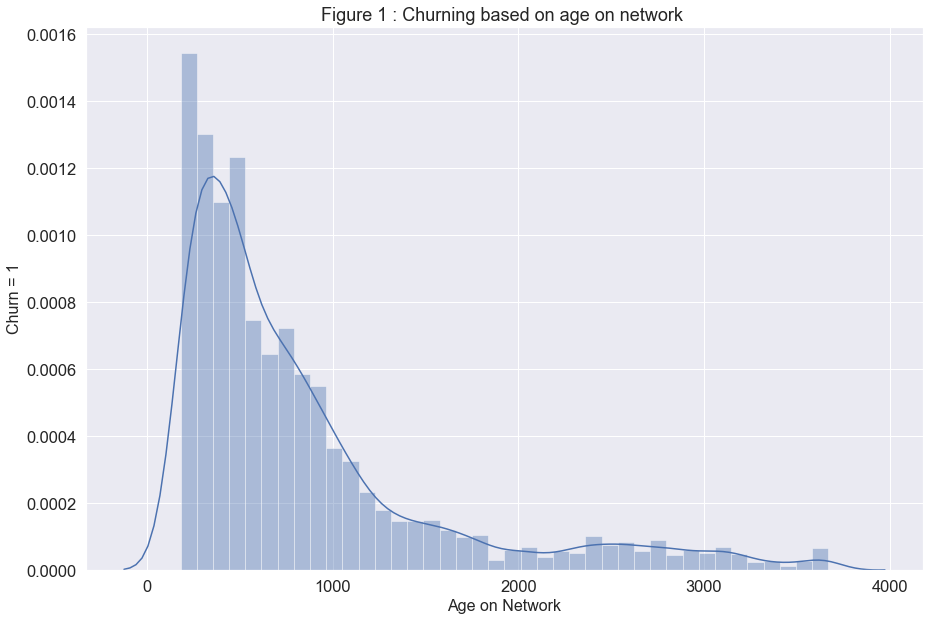

In [49]:
#Let's check the age distribution for churned customers
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
sns.set_context('talk')
sns.set(font_scale=1.5)
ax=sns.distplot(df.loc[df.churn==1,'aon'])
ax.set_ylabel('Churn = 1', fontsize=16)
ax.set_xlabel('Age on Network', fontsize=16)
plt.title('Figure 1 : Churning based on age on network ')
plt.show()

<center> <b> Comments  
<br> The churning happens within first 1000 days of the customer in network.</b></center>

In [50]:
## ****** Bin the Good and the Actions phase arpu ****** | Start
df['arpu_3g_gp'] = df.arpu_3g_6 + df.arpu_3g_7
df['arpuGoodPhase'] = df.arpu_3g_gp.apply(lambda x: arpuGoodPhase(x))
df['arpuActionPhase'] = df.arpu_3g_8.apply(lambda x: arpuActionPhase(x))
## ****** Bin the Good and the Actions phase arpu ****** | End

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

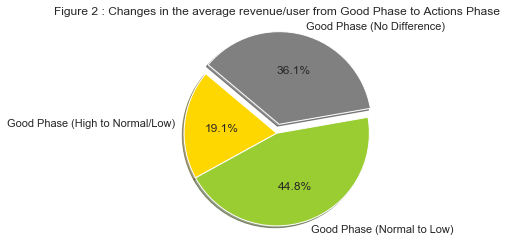

In [51]:
## ***** Check the percentage of chgange for average revenue/user | Start **********

labels = ['Good Phase (High to Normal/Low)','Good Phase (Normal to Low)','Good Phase (No Difference)']
sns.set(style="darkgrid")
sns.set_context('talk')
sns.set(font_scale=1)
l1=len(df.loc[(df.churn==1)&(df.arpuGoodPhase=='High')&(df.arpuActionPhase!='High')])
l2=len(df.loc[(df.churn==1)&(df.arpuGoodPhase=='Normal')&(df.arpuActionPhase!='Low')])
l3=(df.churn.value_counts()[1] - (l1+l2))
sizes = [l1,l2,l3]
colors = ['gold', 'yellowgreen','grey']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140,explode=[0,0,0.1])
plt.axis('equal')
plt.title('Figure 2 : Changes in the average revenue/user from Good Phase to Actions Phase')
plt.plot
## ***** Check the percentage of chgange for average revenue/user | End **********

In [52]:
df.drop(['arpuGoodPhase','arpuActionPhase','arpu_3g_gp'],axis=1,inplace=True)

<center> <b> Comments </b> 
<br> We can see that in the Churned customers the Revenue has decreased for more than 53%. It is quite substantial decrease.</center>

#### 2.2.1. Check the Multicollinerlity

As the number of columns are large, using a heatmap will not provide us much insights, so we will try to print collinearity as a tabular form 

In [53]:
## ****** Get the columns to check the multicollinearity ******* | Start
dfcorr=df.corr().stack().reset_index().sort_values(by=0,ascending=False)
dfcorr=dfcorr[((dfcorr[0] > 0.4)&(dfcorr[0] < 1))|((dfcorr[0] < -0.4)&(dfcorr[0] > -1))].rename(columns={'level_0':'Column 1','level_1':'Column 2',0:'Percentage'})
dfcorr.Percentage = round(dfcorr.Percentage*100,2)
dfcorr.head(20)
## ****** Get the columns to check the multicollinearity ******* | End

Column 1               Column 2  Percentage
22141            sachet_2g_7        count_rech_2g_7       98.18
17794        count_rech_2g_7            sachet_2g_7       98.18
17957        count_rech_2g_8            sachet_2g_8       98.01
22304            sachet_2g_8        count_rech_2g_8       98.01
17631        count_rech_2g_6            sachet_2g_6       97.87
21978            sachet_2g_6        count_rech_2g_6       97.87
419                   arpu_8       total_rech_amt_8       95.53
15392       total_rech_amt_8                 arpu_8       95.53
93                    arpu_6       total_rech_amt_6       94.61
15066       total_rech_amt_6                 arpu_6       94.61
256                   arpu_7       total_rech_amt_7       94.36
15229       total_rech_amt_7                 arpu_7       94.36
7010            isd_og_mou_7           isd_og_mou_8       94.31
7171            isd_og_mou_8           isd_og_mou_7       94.31
25105  total_data_rech_amt_8       Total Recharge_8       94.19
25588       Total Recharge_8  total_data_rech_amt_8       94.19
20535              arpu_2g_6              arpu_3g_6       93.76
20052              arpu_3g_6              arpu_2g_6       93.76
20861              arpu_2g_8              arpu_3g_8       93.56
20378              arpu_3g_8              arpu_2g_8       93.56

As we see there are multiple columns for each of the data like arpu, total_rech_amt, etc. lets try to us these informotion to create a relevant feature for our data. <br>
One of the way to do the same is to check the data of the good with the action phase and create a flag, then later drop the column

<center> <b> We can see that a lot of collinearity exists between the columns, before we move to the model building in next step lets try to delete these highly dependent columns </b> </center>

In [54]:
## ******* Columns to drop after we create new features with these columns ******* | Start
colsToDrop = ['monthly_3g_6','monthly_3g_7','monthly_3g_8',
             'sachet_3g_6','sachet_3g_7','sachet_3g_8',
             'offnet_mou_6','offnet_mou_7','offnet_mou_8',
             'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8',
             'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8',
             'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
             'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8',
             'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
             'arpu_6','arpu_7','arpu_8',
             'onnet_mou_6','onnet_mou_7','onnet_mou_8',
             'monthly_2g_6','monthly_2g_7','monthly_2g_8',
             'sachet_2g_6','sachet_2g_7','sachet_2g_8',
             'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8',
             'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
             'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
             'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
             'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
             'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
             'og_others_6','og_others_7','og_others_8',
             'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
             'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
             'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
             'total_og_mou_6','total_og_mou_7','total_og_mou_8',
             'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
             'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
             'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
             'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
             'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
             'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
             'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
             'ic_others_6','ic_others_7','ic_others_8',
             'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
             'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
             'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
             'arpu_3g_6','arpu_3g_7','arpu_3g_8',
             'arpu_2g_6','arpu_2g_7','arpu_2g_8',
             'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g',
             'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
             'std_og_mou_6','std_og_mou_7','std_og_mou_8',
             'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
             'night_pck_user_6','night_pck_user_7','night_pck_user_8',
             'fb_user_6','fb_user_7','fb_user_8']
## ******* Columns to drop after we create new features with these columns ******* | End              

In [55]:
## ******* Creation of the flag attribute using 3 months features ******* | Start
df['monthly_3g_6_7_avg'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['monthly_3g_6_7_avg']), 0, 1)

df['sachet_3g_6_7_avg'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['sachet_3g_6_7_avg']), 0, 1)


df['offnet_mou_6_7_avg'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['offnet_mou_6_7_avg']), 0, 1)

df['roam_ic_mou_6_7_avg'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['roam_ic_mou_6_7_avg']), 0, 1)

df['roam_og_mou_6_7_avg'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['roam_og_mou_6_7_avg']), 0, 1)

df['loc_og_t2t_mou_6_7_avg'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['loc_og_t2t_mou_6_7_avg']), 0, 1)

df['loc_og_t2m_mou_6_7_avg'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['loc_og_t2m_mou_6_7_avg']), 0, 1)

df['loc_og_t2f_mou_6_7_avg'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['loc_og_t2f_mou_6_7_avg']), 0, 1)

df['arpu_6_7_avg'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['arpu_flag'] = np.where((df['arpu_8'] > df['arpu_6_7_avg']), 0, 1)

df['onnet_mou_6_7_avg'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['onnet_mou_6_7_avg']), 0, 1)

df['monthly_2g_6_7_avg'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['monthly_2g_6_7_avg']), 0, 1)

df['sachet_2g_6_7_avg'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['sachet_2g_6_7_avg']), 0, 1)


df['loc_og_t2c_mou_6_7_avg'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['loc_og_t2c_mou_6_7_avg']), 0, 1)

df['std_og_t2t_mou_6_7_avg'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['std_og_t2t_mou_6_7_avg']), 0, 1)

df['std_og_t2m_mou_6_7_avg'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['std_og_t2m_mou_6_7_avg']), 0, 1)

df['std_og_t2f_mou_6_7_avg'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['std_og_t2f_mou_6_7_avg']), 0, 1)

df['isd_og_mou_6_7_avg'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['isd_og_mou_6_7_avg']), 0, 1)

df['spl_og_mou_6_7_avg'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['spl_og_mou_6_7_avg']), 0, 1)

df['og_others_6_7_avg'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['og_others_flag'] = np.where((df['og_others_8'] > df['og_others_6_7_avg']), 0, 1)

df['loc_ic_t2t_mou_6_7_avg'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['loc_ic_t2t_mou_6_7_avg']), 0, 1)

df['loc_ic_t2m_mou_6_7_avg'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['loc_ic_t2m_mou_6_7_avg']), 0, 1)

df['loc_ic_t2f_mou_6_7_avg'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['loc_ic_t2f_mou_6_7_avg']), 0, 1)

df['total_og_mou_6_7_avg'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['total_og_mou_6_7_avg']), 0, 1)

df['loc_ic_mou_6_7_avg'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['loc_ic_mou_6_7_avg']), 0, 1)

df['std_ic_mou_6_7_avg'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['std_ic_mou_6_7_avg']), 0, 1)

df['std_ic_t2t_mou_6_7_avg'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['std_ic_t2t_mou_6_7_avg']), 0, 1)

df['std_ic_t2m_mou_6_7_avg'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['std_ic_t2m_mou_6_7_avg']), 0, 1)

df['std_ic_t2f_mou_6_7_avg'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['std_ic_t2f_mou_6_7_avg']), 0, 1)

df['spl_ic_mou_6_7_avg'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['spl_ic_mou_6_7_avg']), 0, 1)

df['isd_ic_mou_6_7_avg'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['isd_ic_mou_6_7_avg']), 0, 1)

df['ic_others_6_7_avg'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['ic_others_flag'] = np.where((df['ic_others_8'] > df['ic_others_6_7_avg']), 0, 1)

df['total_rech_amt_6_7_avg'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['total_rech_amt_6_7_avg']), 0, 1)

df['vol_2g_mb_6_7_avg'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['vol_2g_mb_6_7_avg']), 0, 1)

df['vol_3g_mb_6_7_avg'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['vol_3g_mb_6_7_avg']), 0, 1)

df['arpu_3g_6_7_avg'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['arpu_3g_6_7_avg']), 0, 1)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 0, 1)

df['vbc_3g_6_7_avg'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['vbc_3g_6_7_avg']), 0, 1)

df['loc_og_mou_6_7_avg'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['loc_og_mou_6_7_avg']), 0, 1)

df['std_og_mou_6_7_avg'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['std_og_mou_6_7_avg']), 0, 1)

df['total_ic_mou_6_7_avg'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['total_ic_mou_6_7_avg']), 0, 1)

df['night_pck_user_6_7_avg'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['night_pck_user_flag'] = np.where((df['night_pck_user_8'] > df['night_pck_user_6_7_avg']), 0, 1)

df['fb_user_6_7_avg'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['fb_user_flag'] = np.where((df['fb_user_8'] > df['fb_user_6_7_avg']), 0, 1)

## ******* Creation of the flag attribute using 3 months features ******* | End

In [56]:
df.shape

(29953, 246)

In [57]:
df.drop(colsToDrop,axis=1,inplace=True)

In [58]:
df.shape

(29953, 120)

Now we are left with 120 columns with 29.9K datapoints

<center><b> Lets check the outliers </b></center>

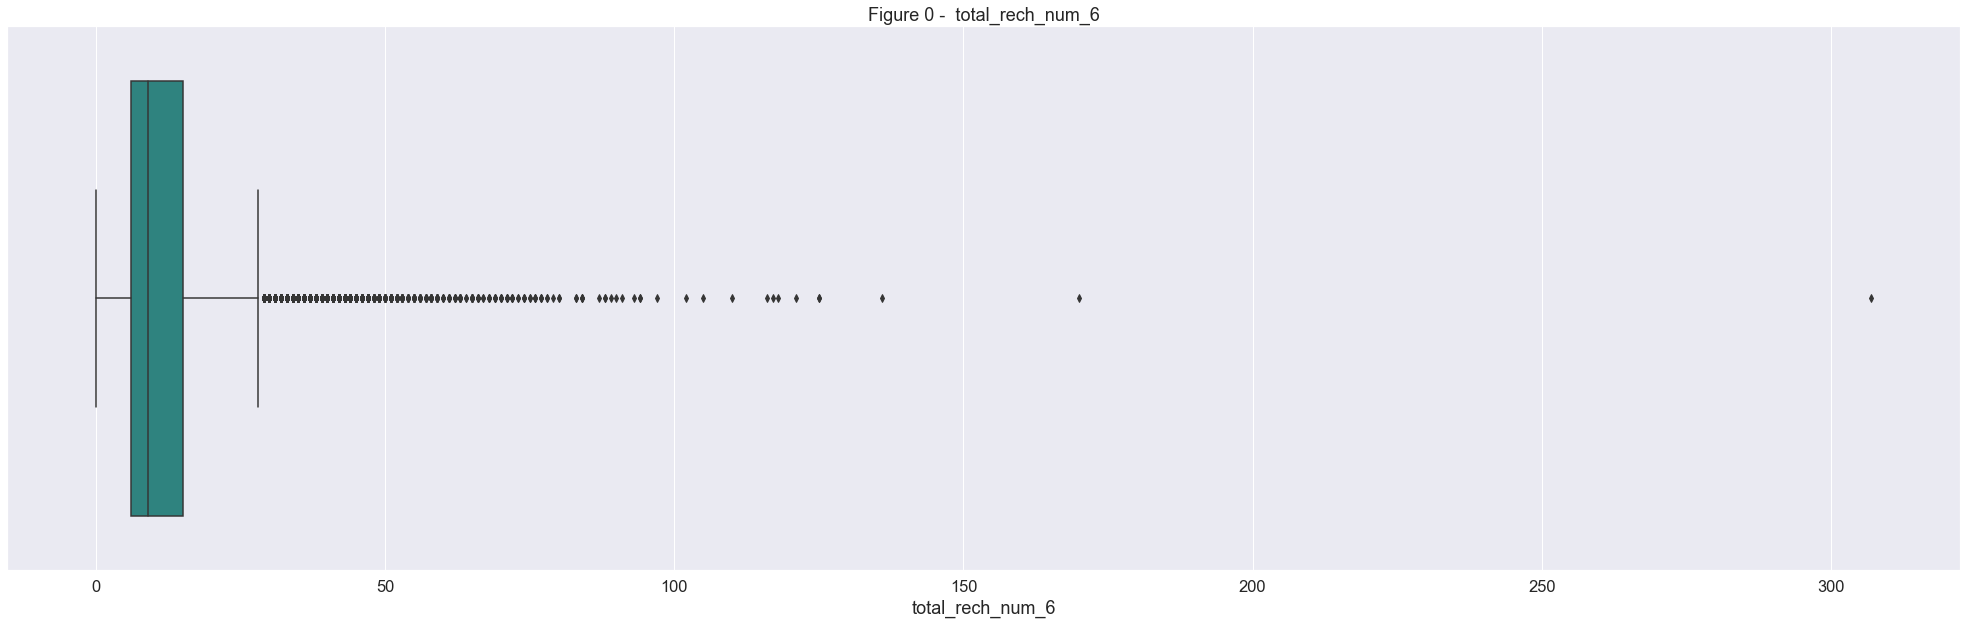

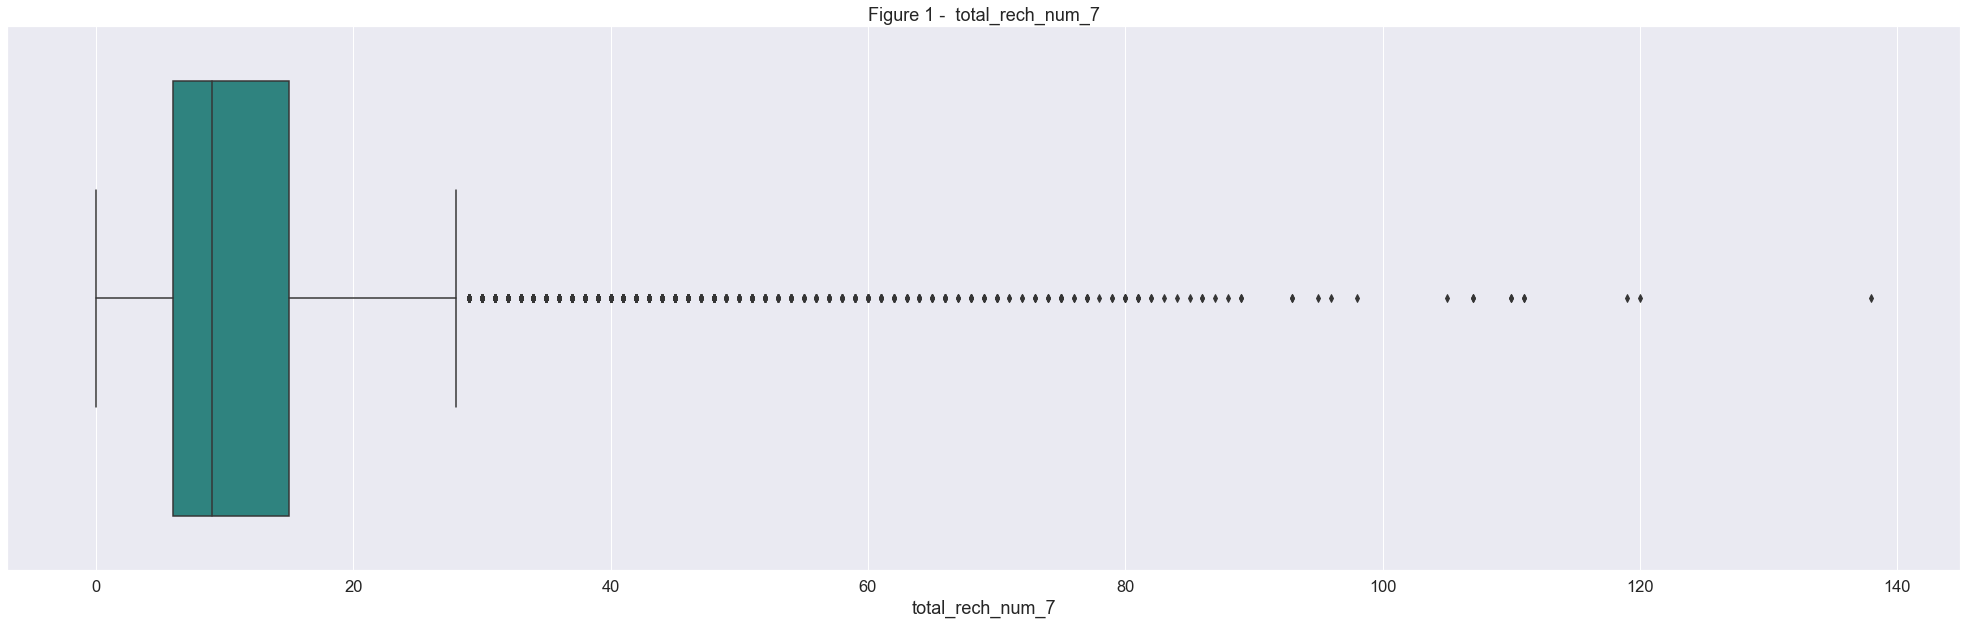

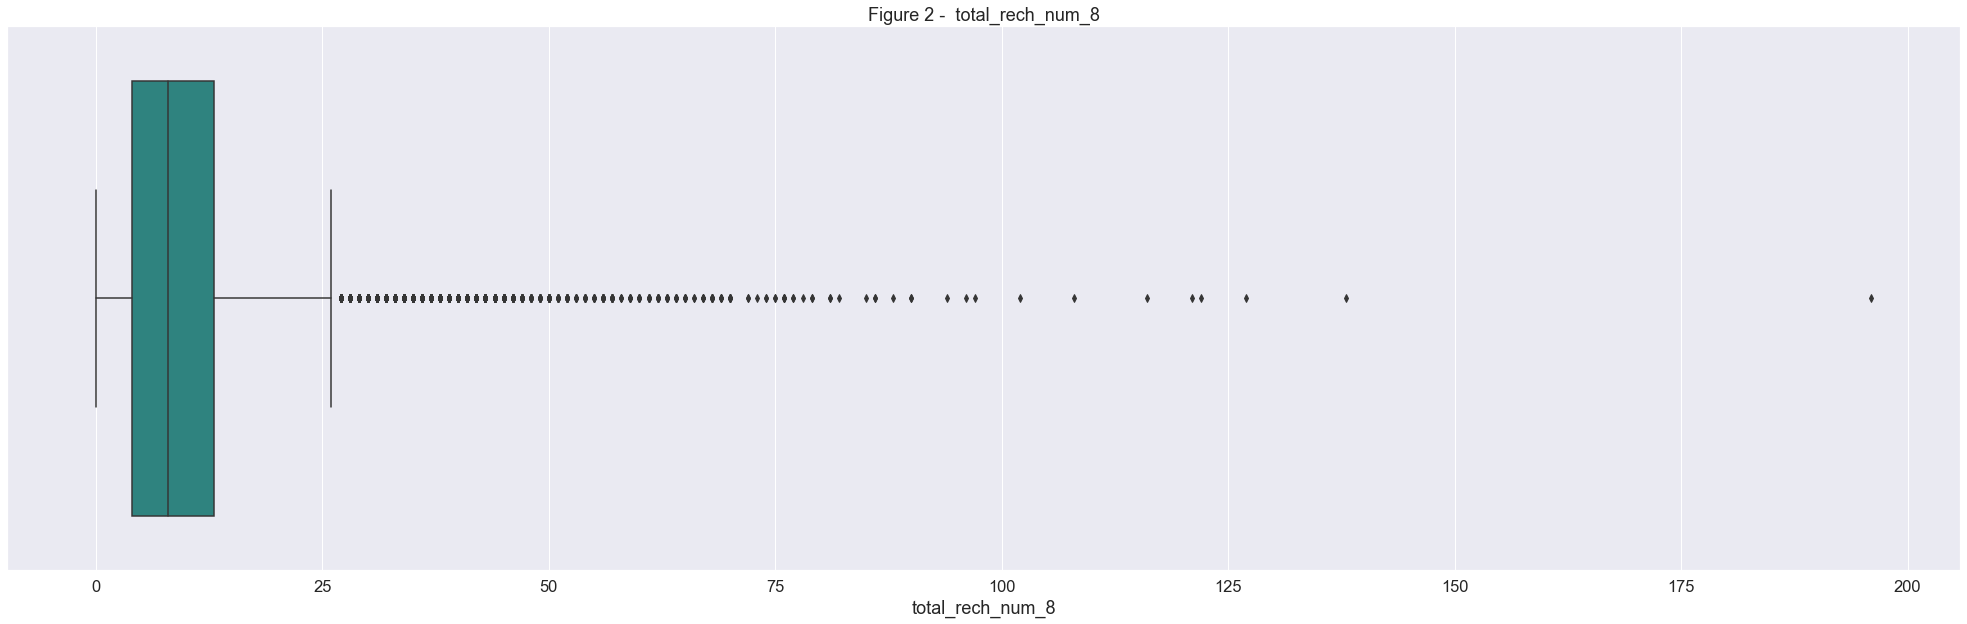

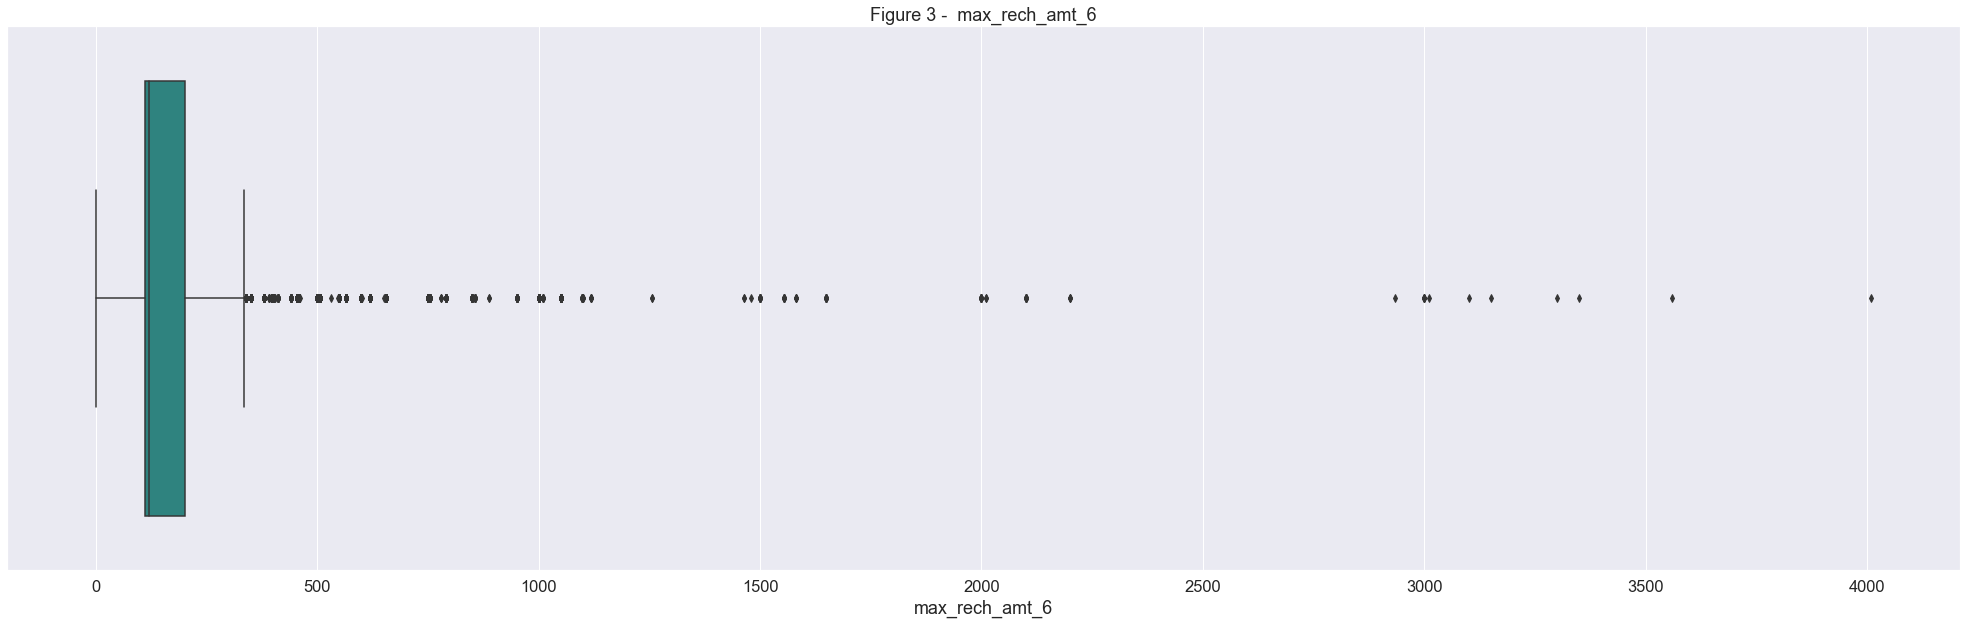

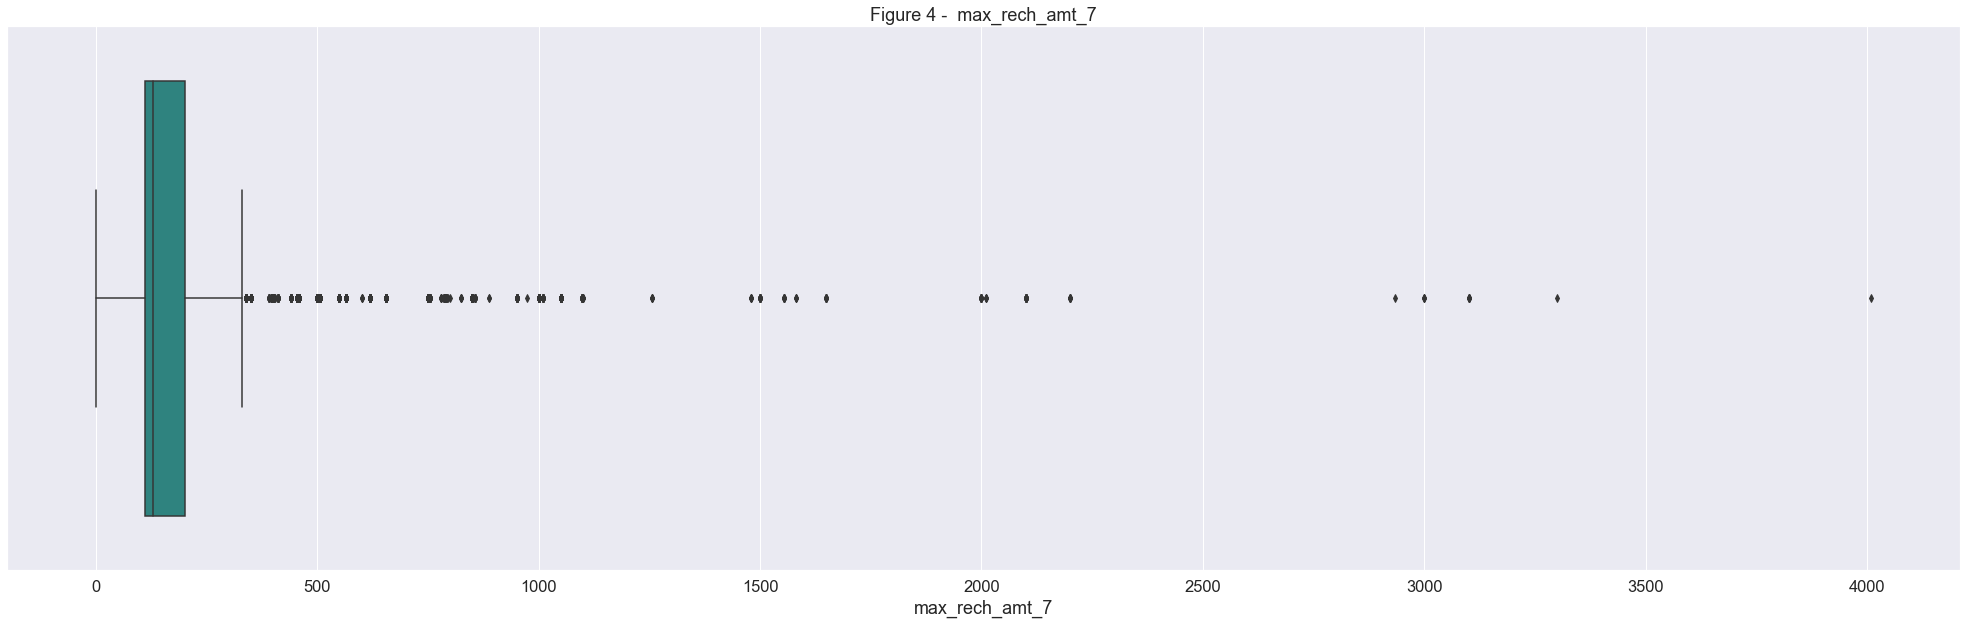

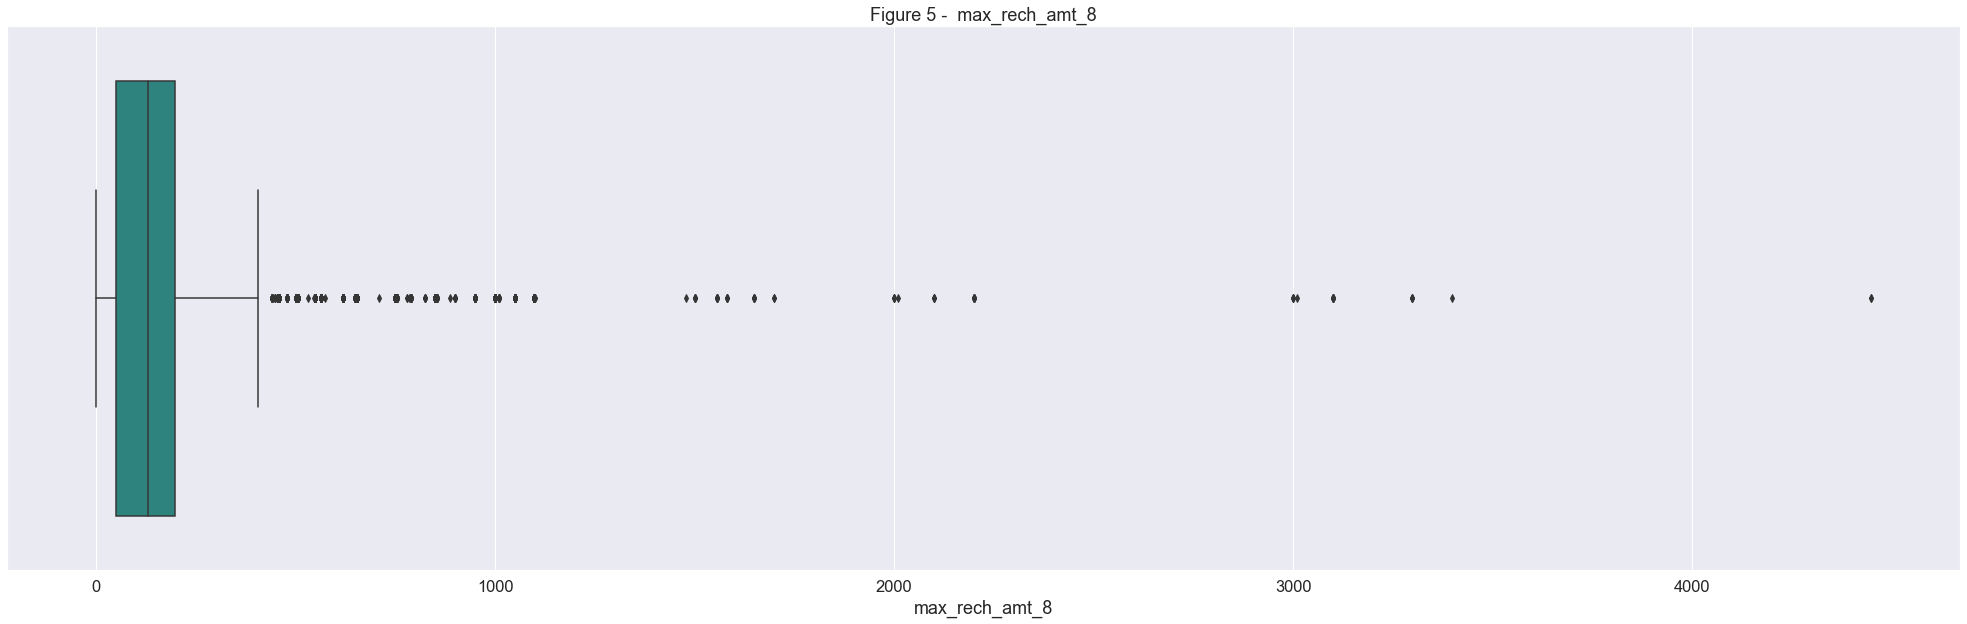

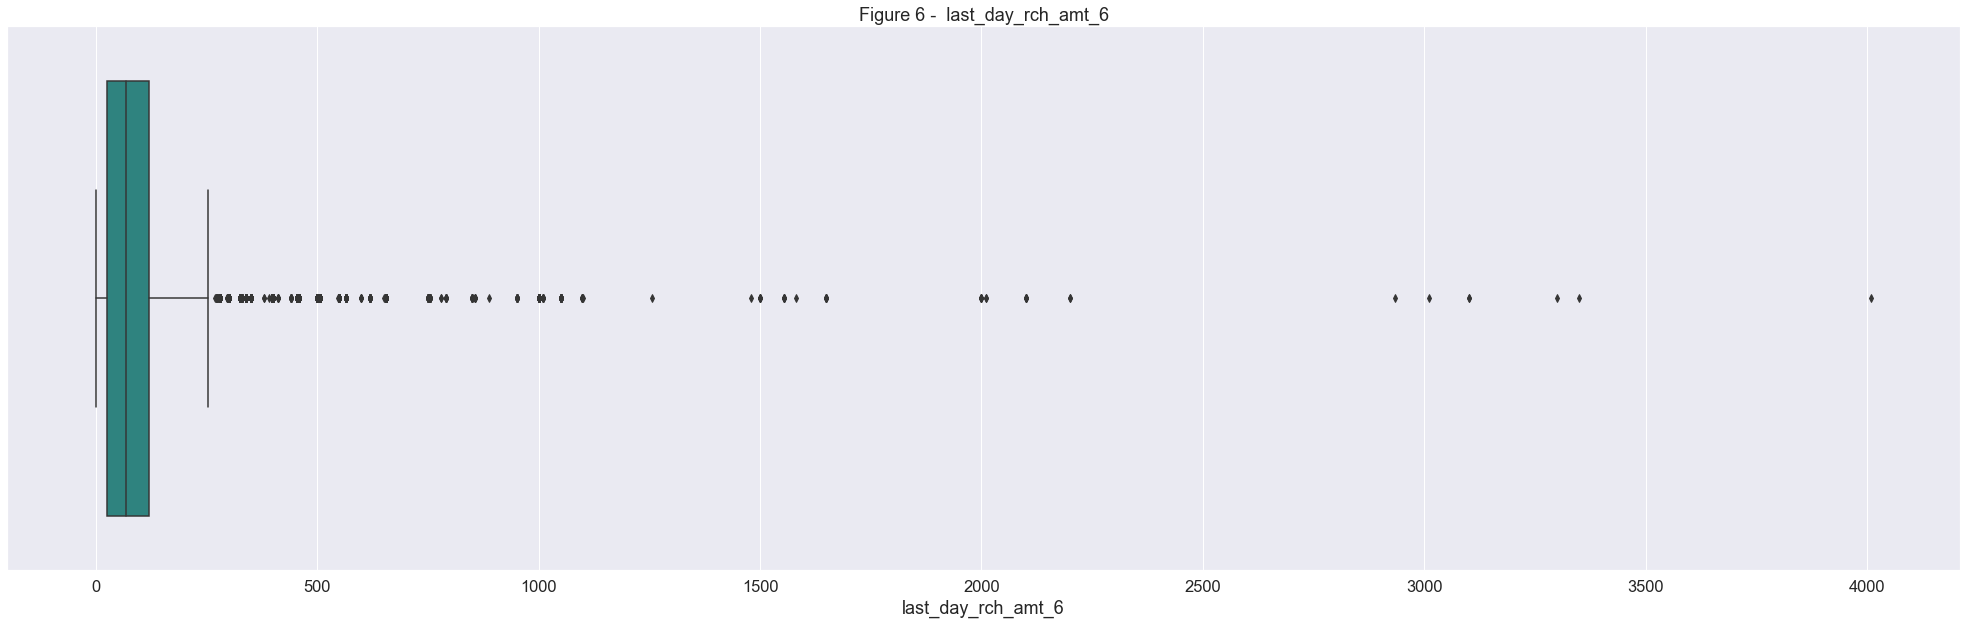

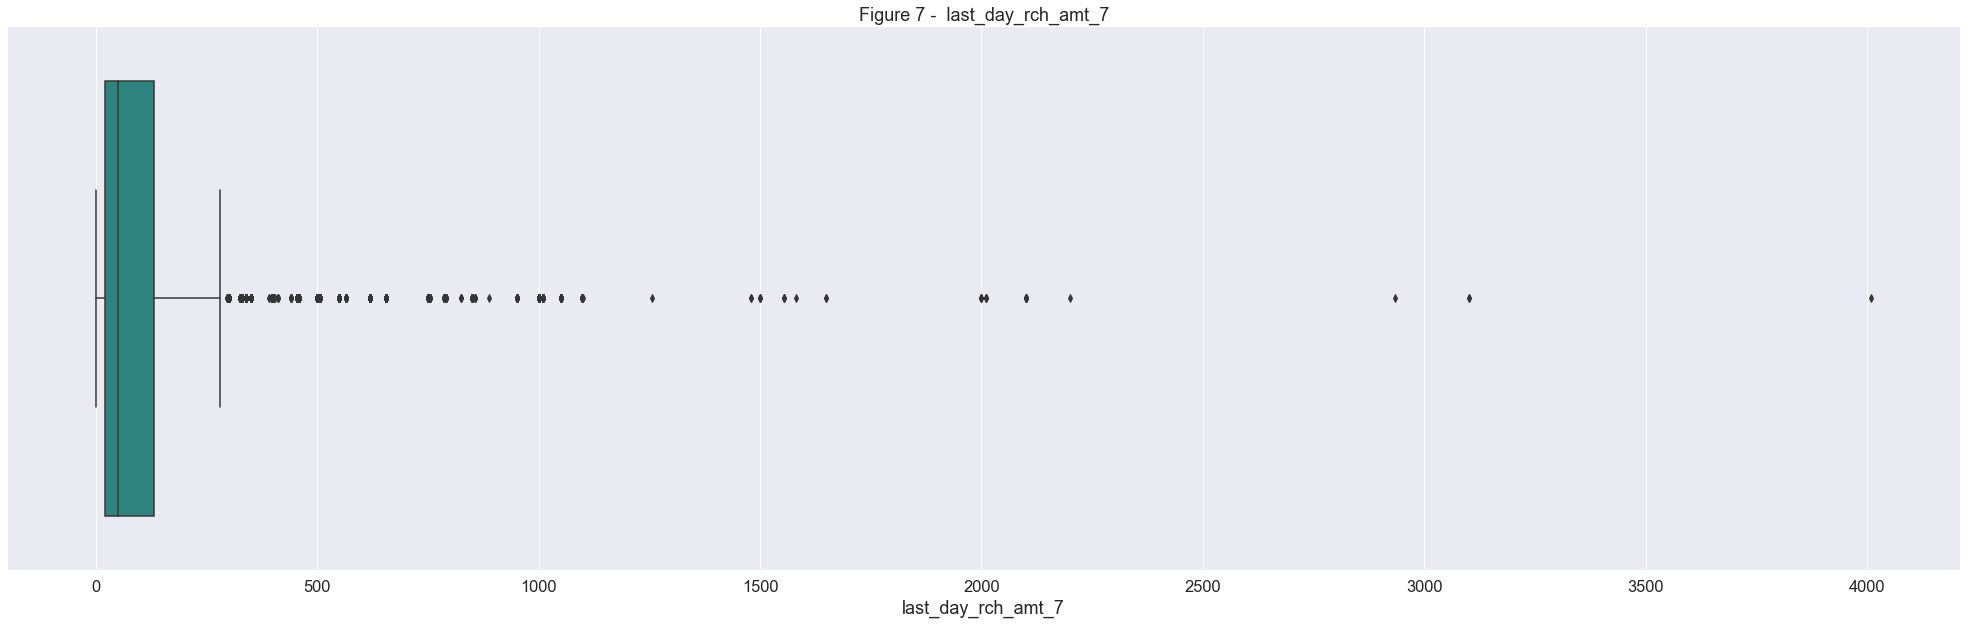

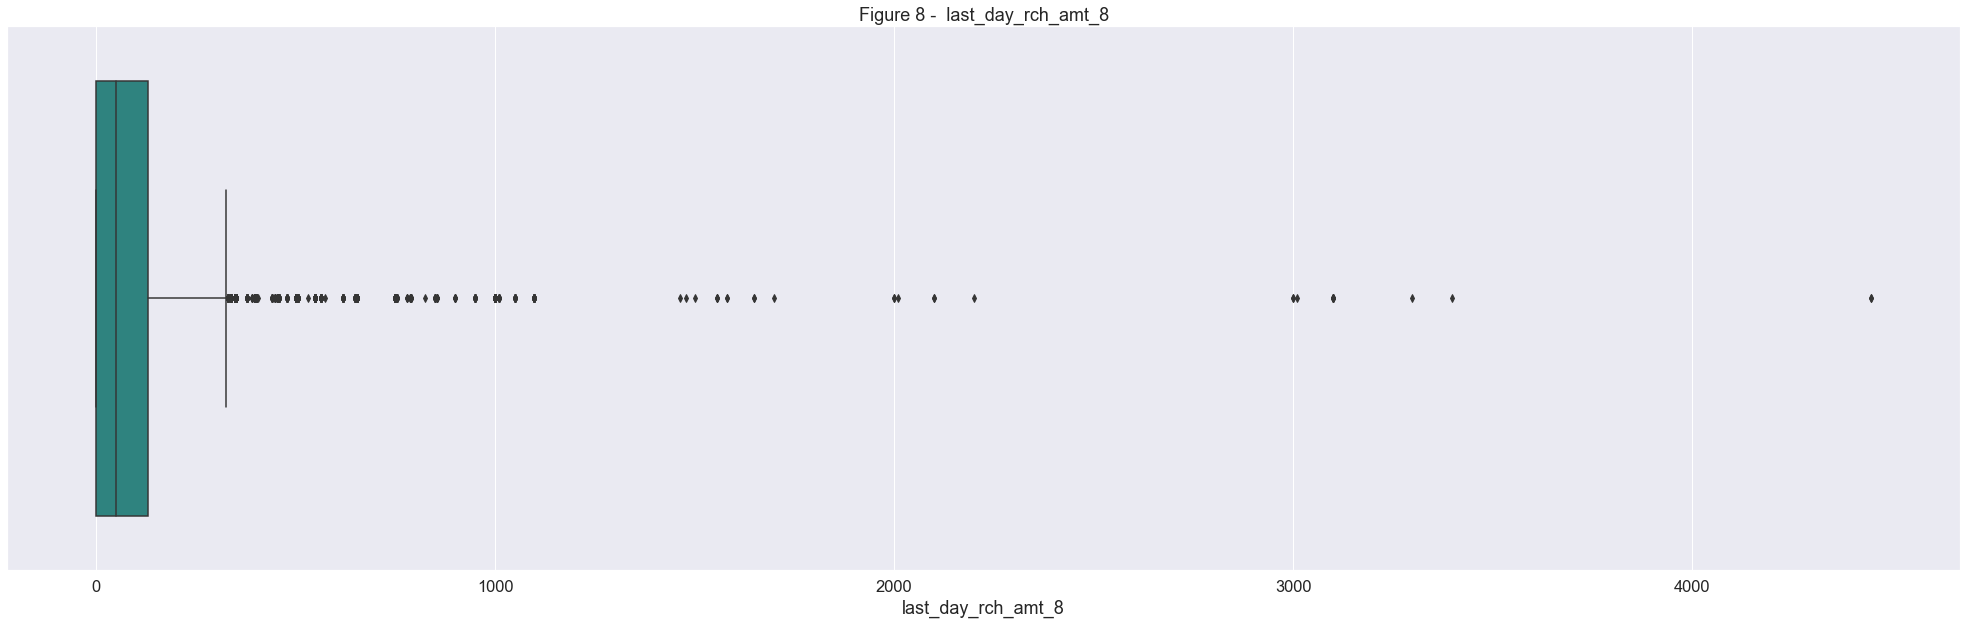

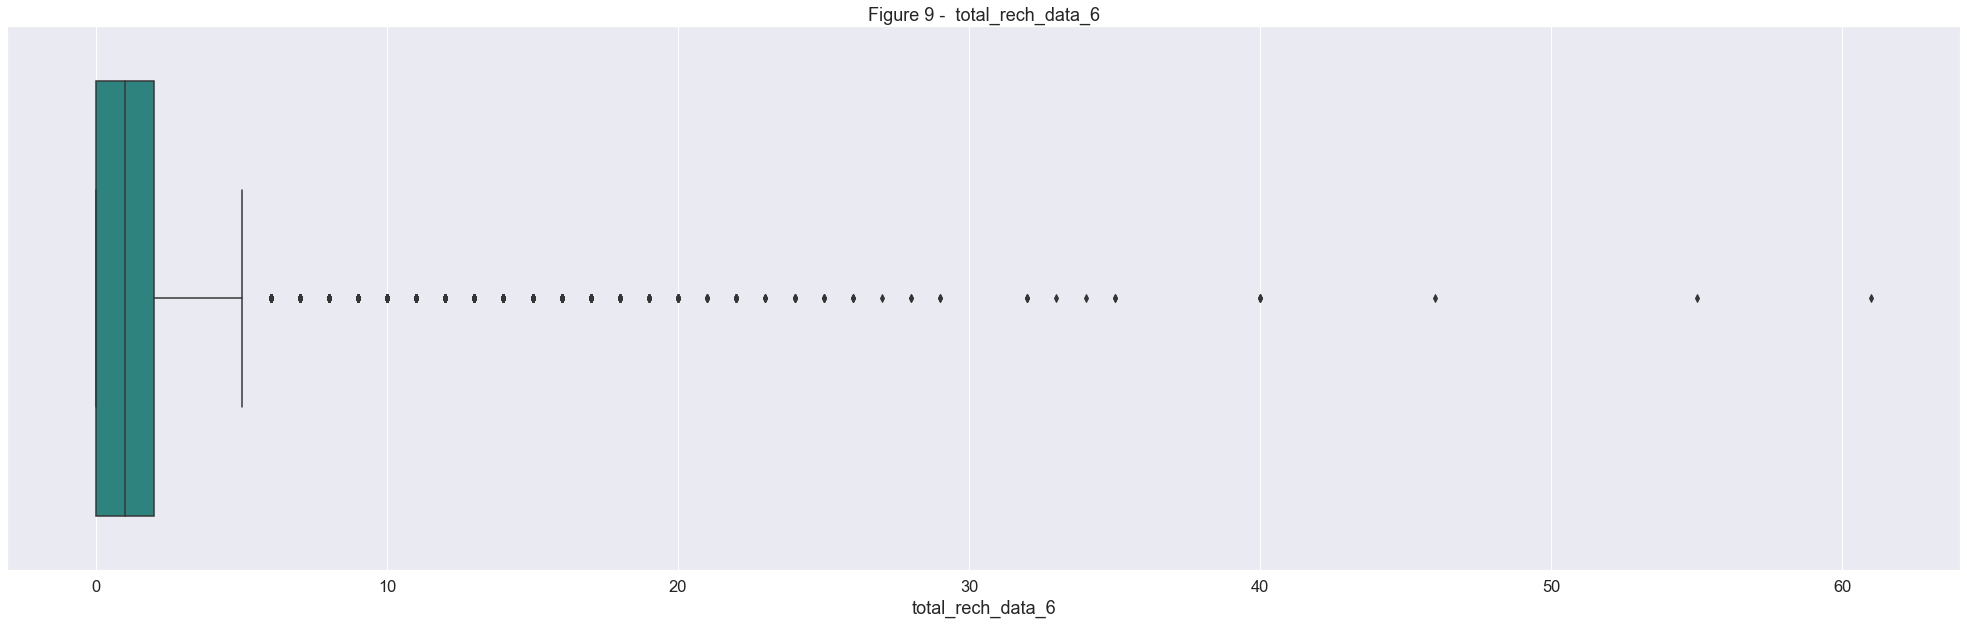

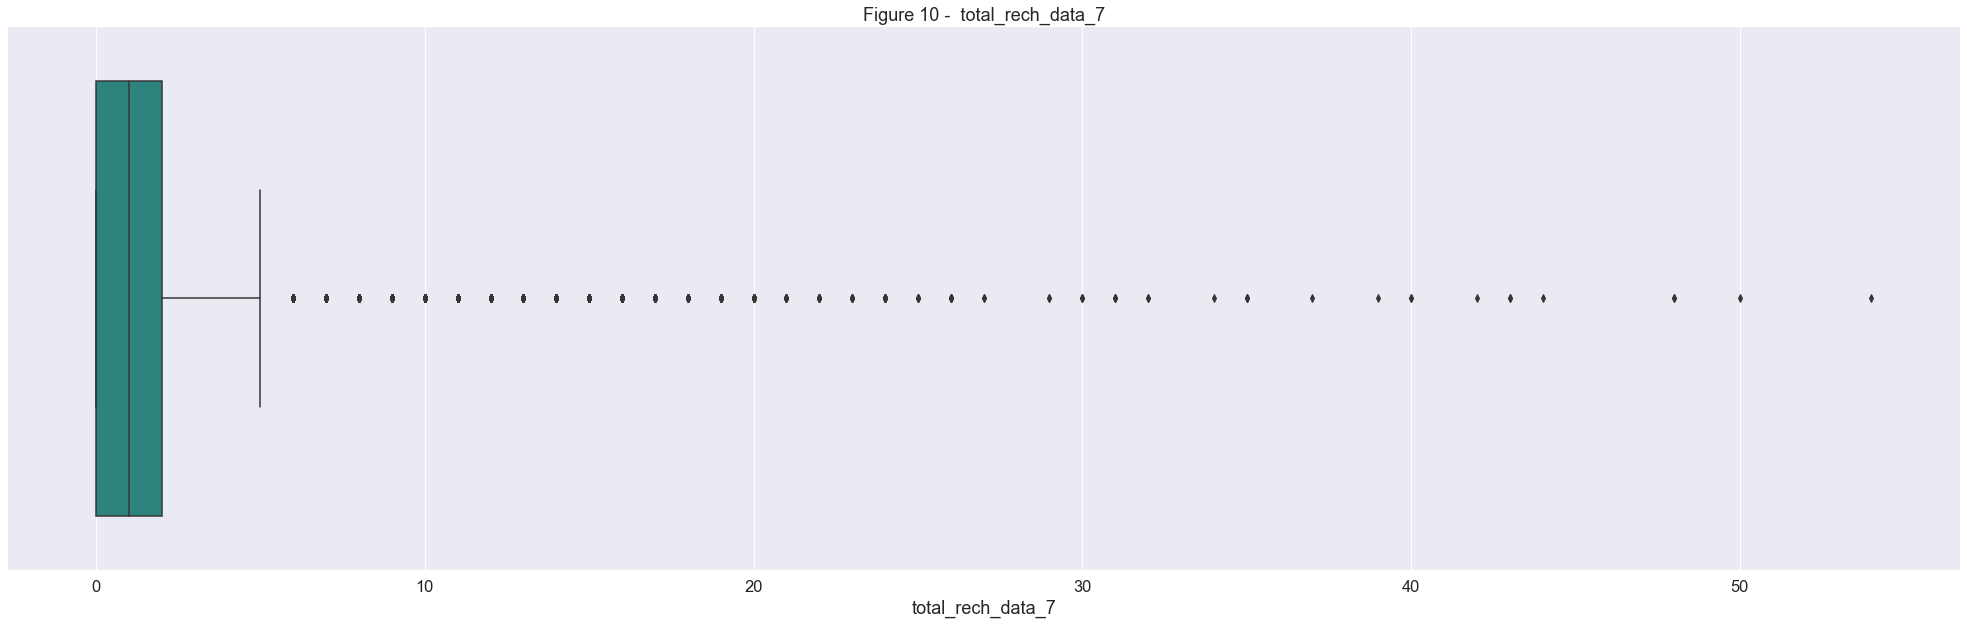

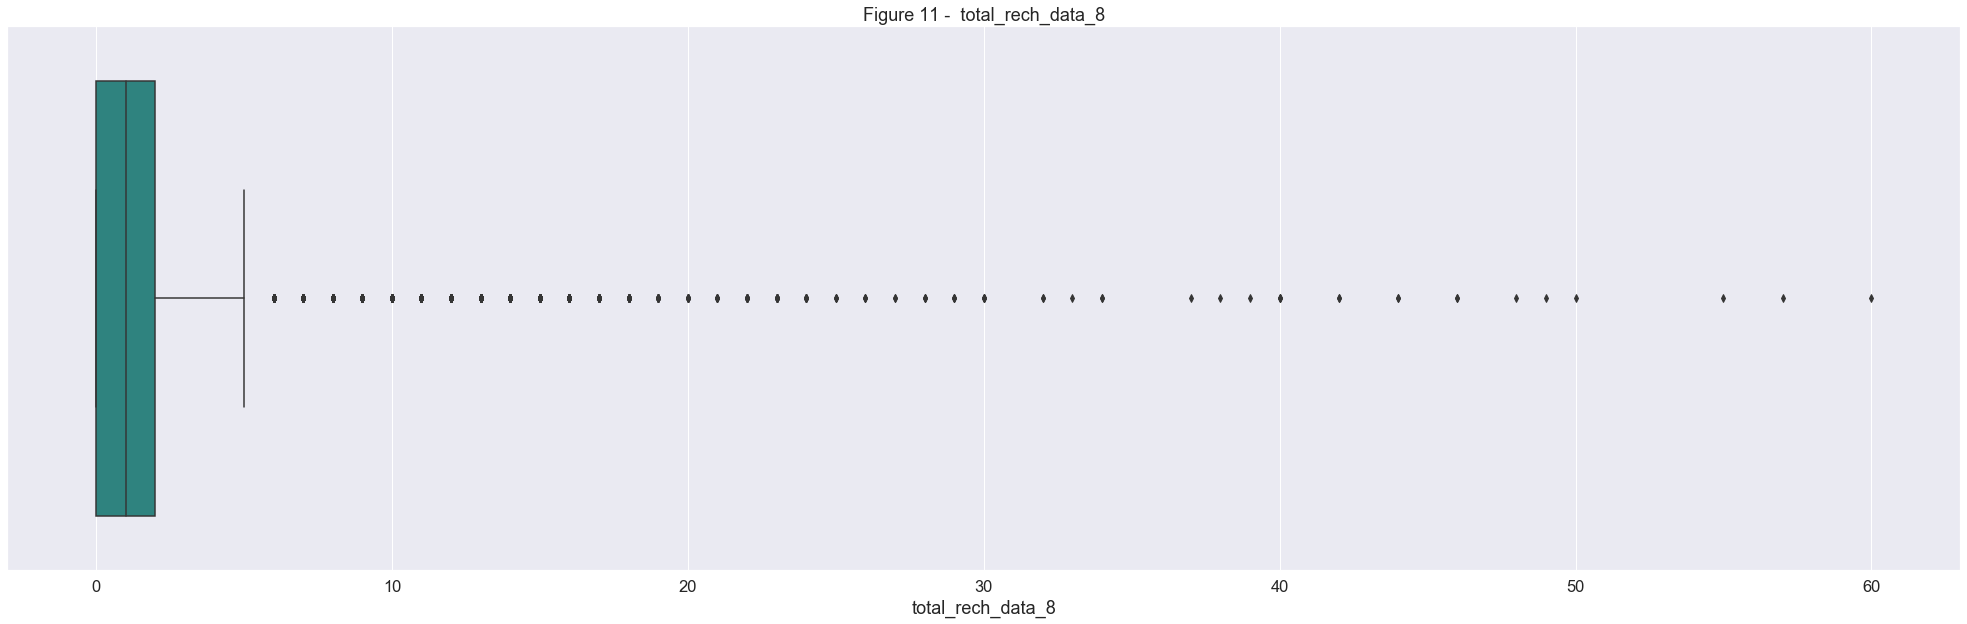

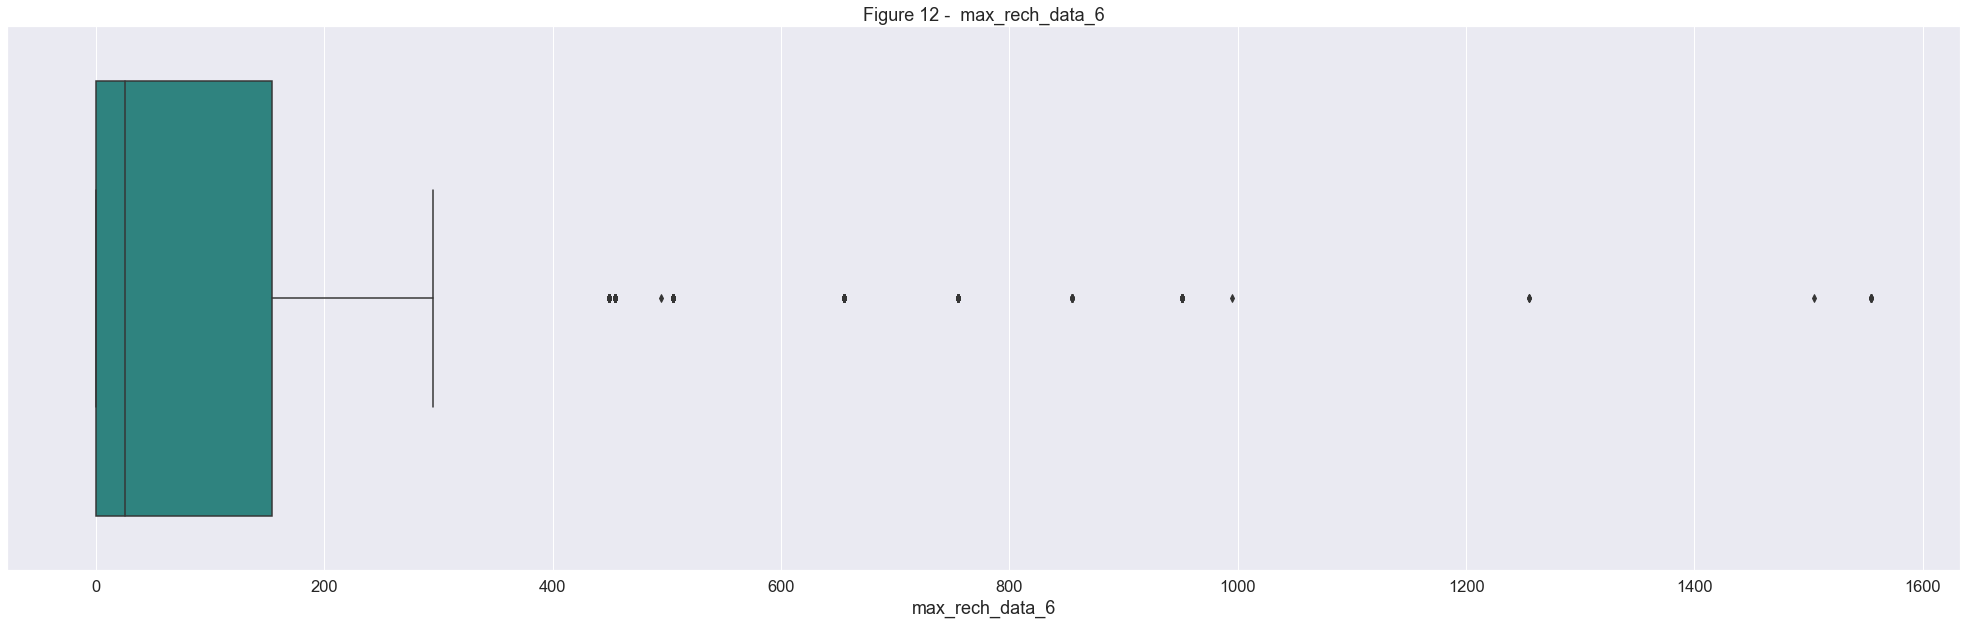

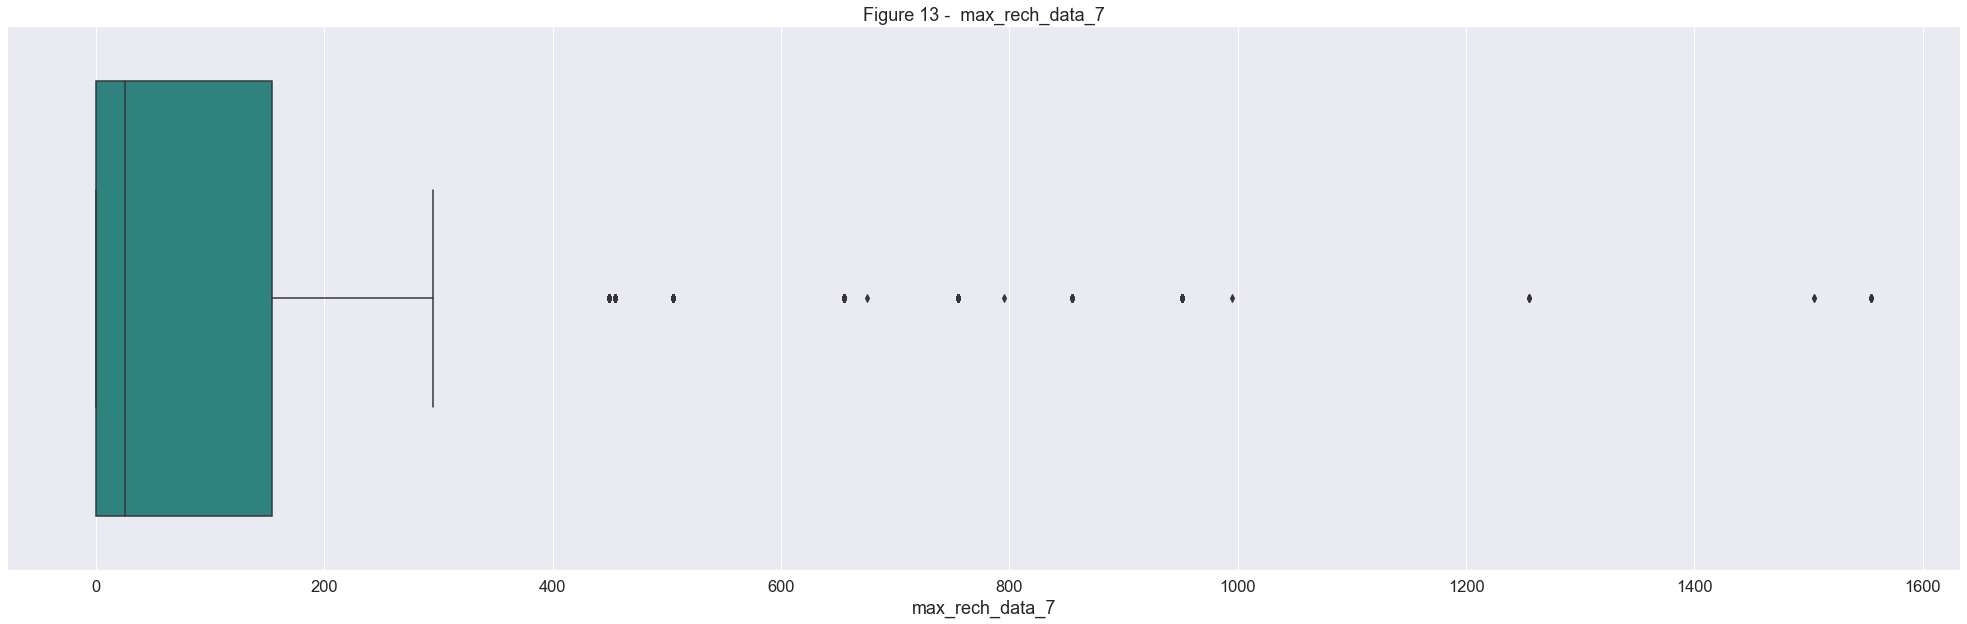

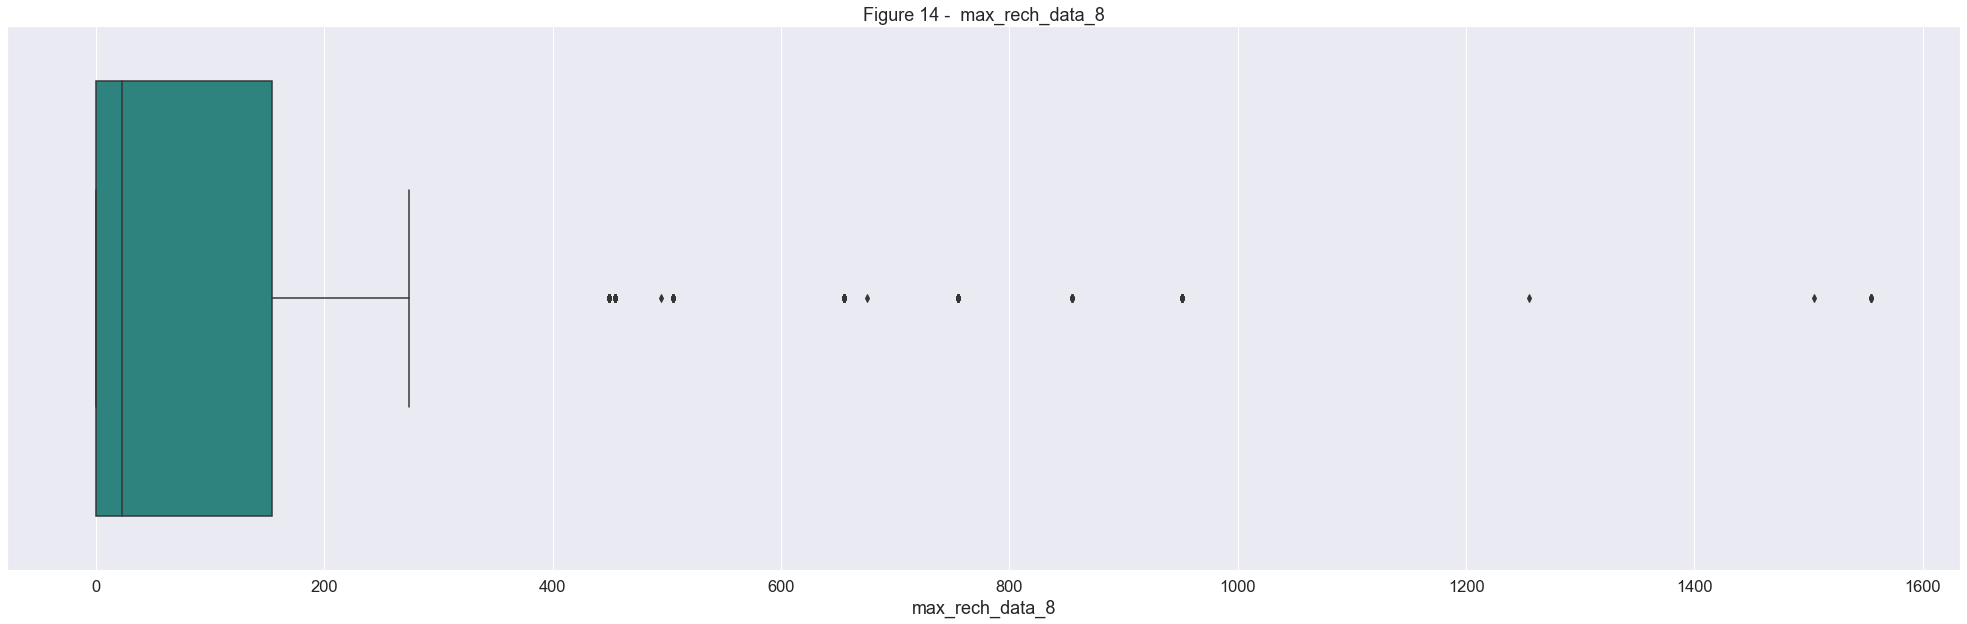

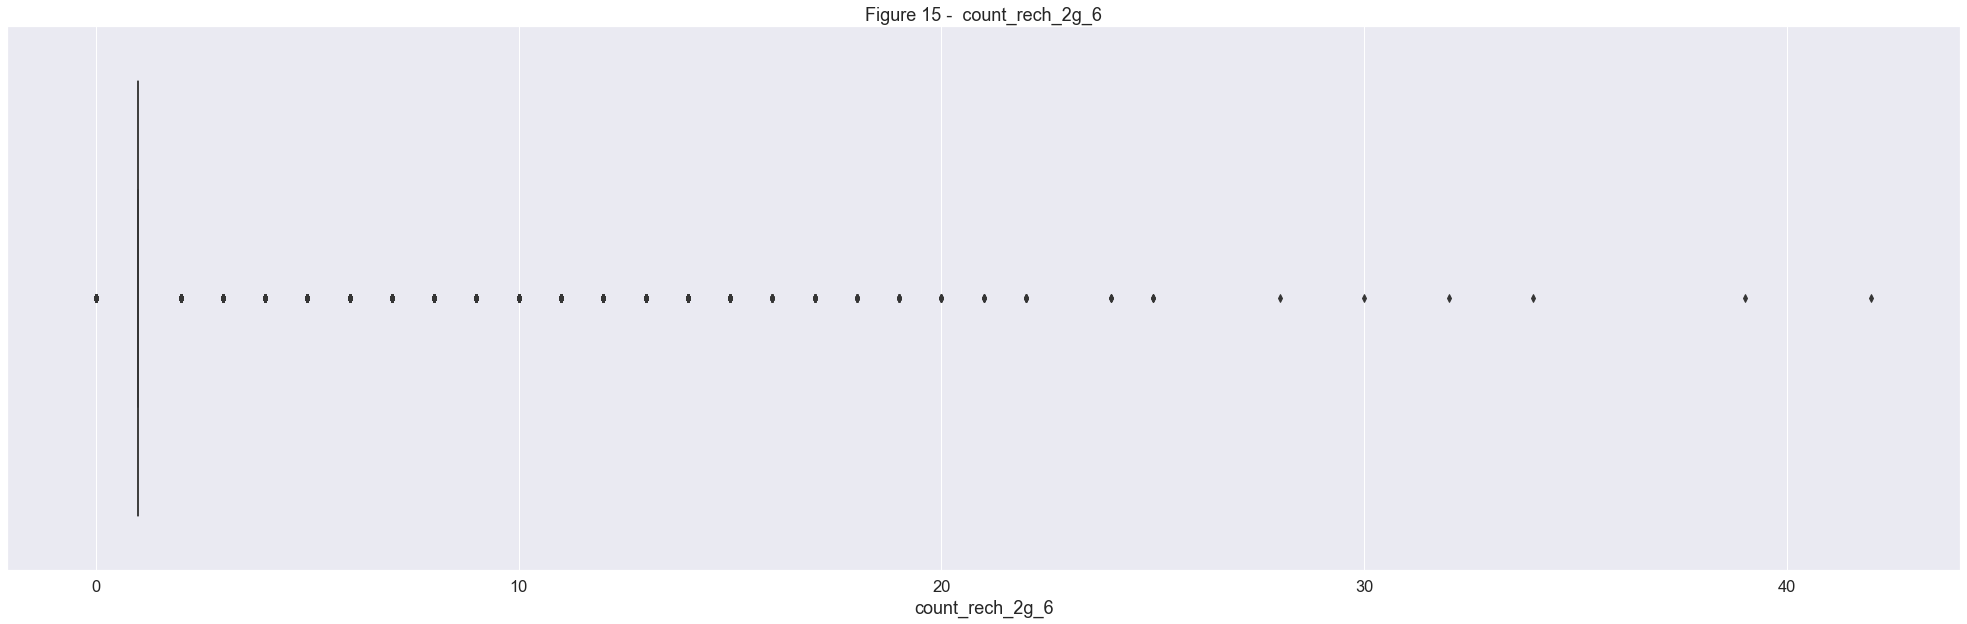

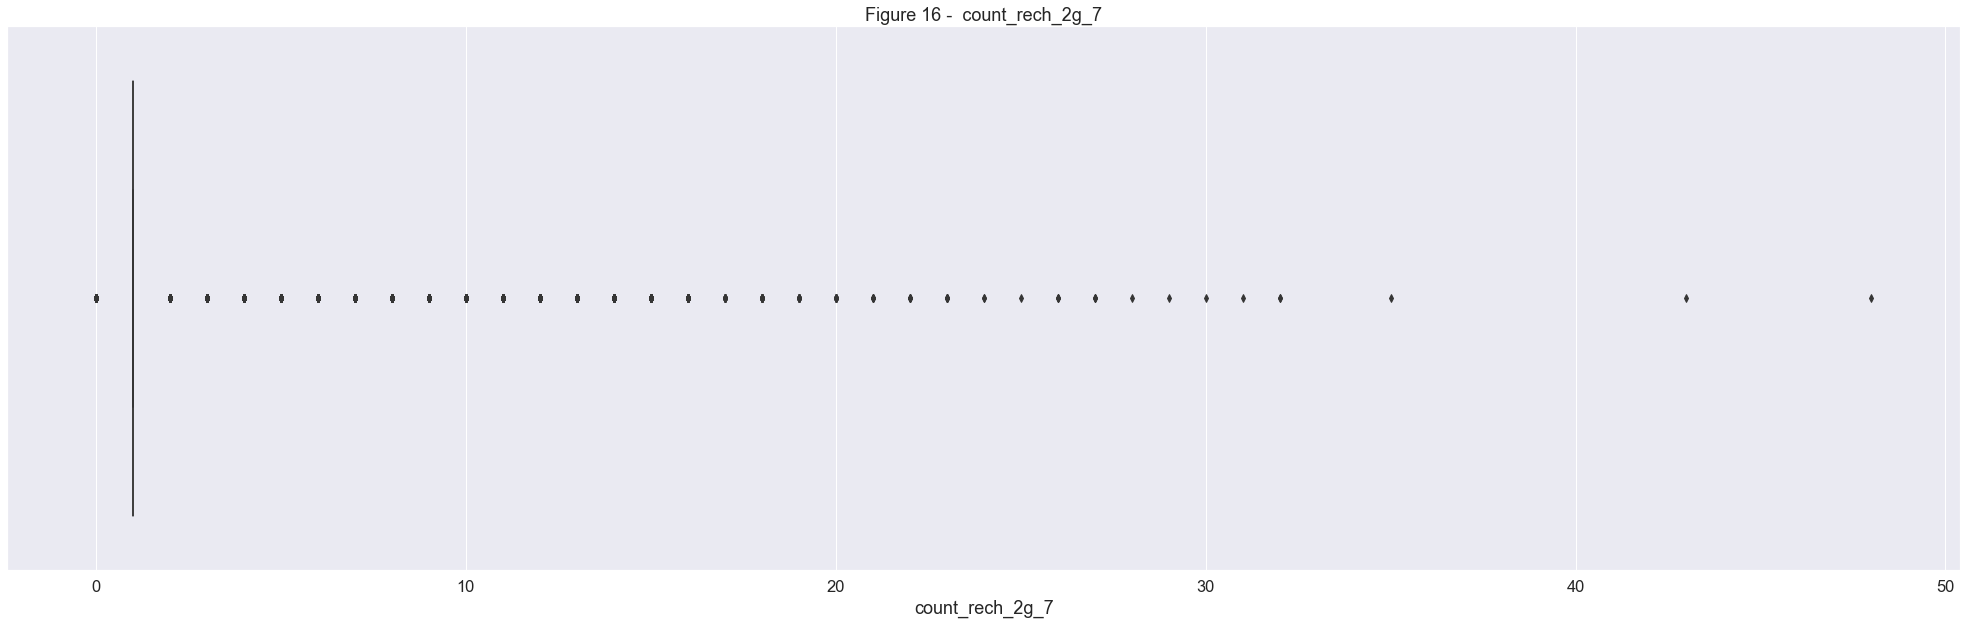

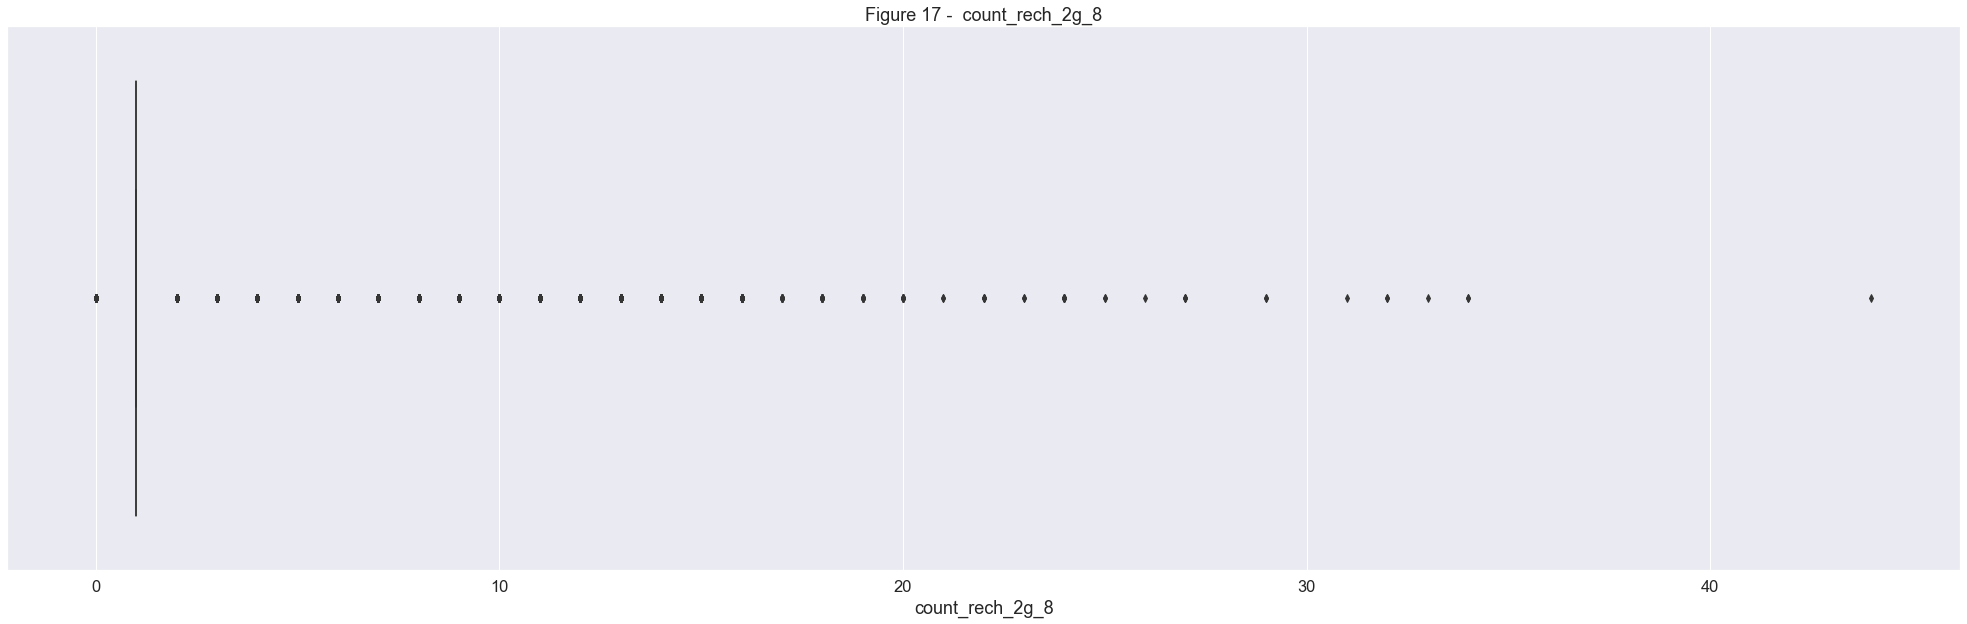

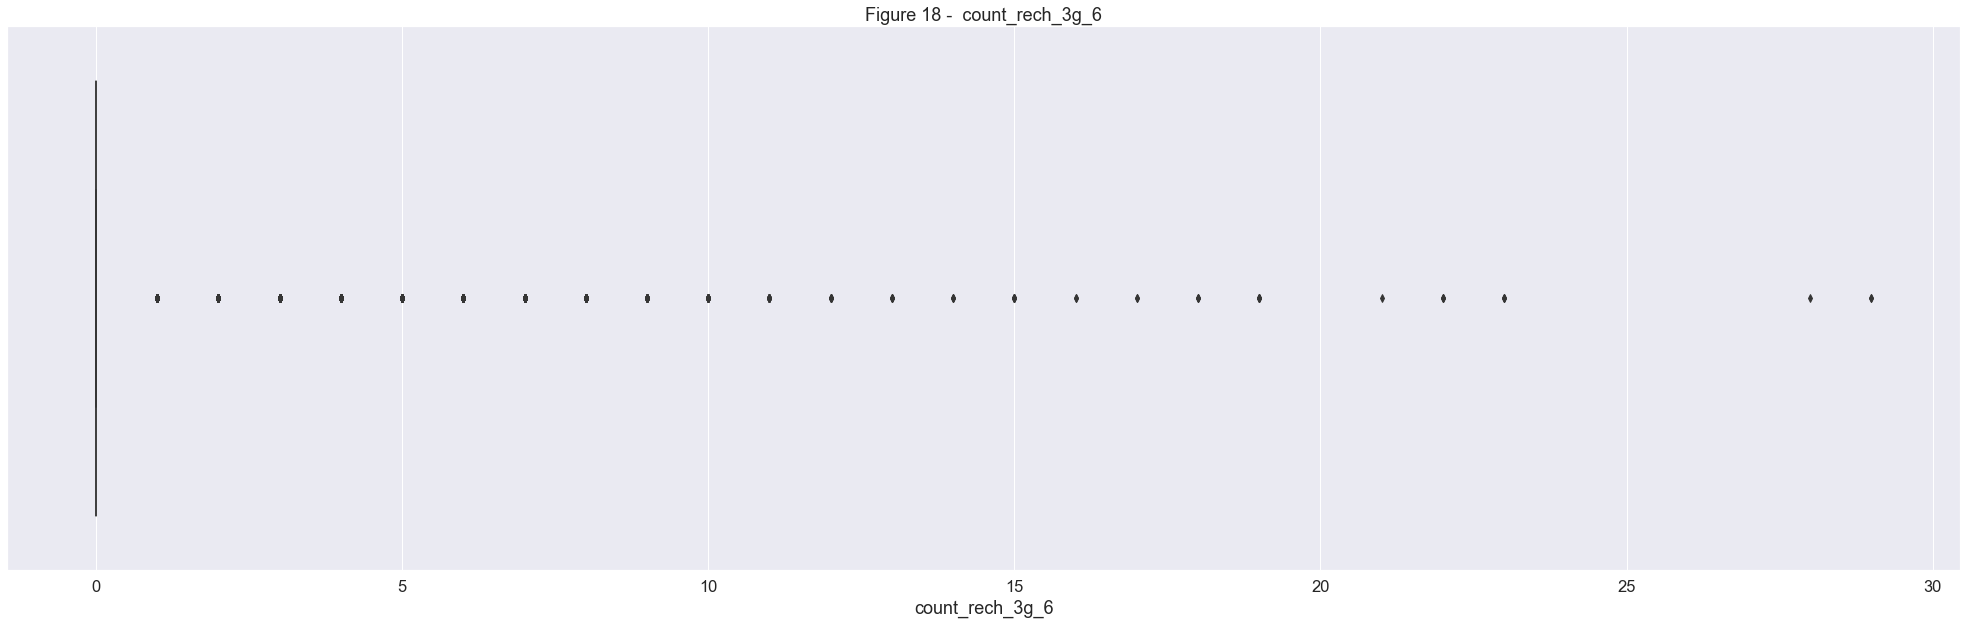

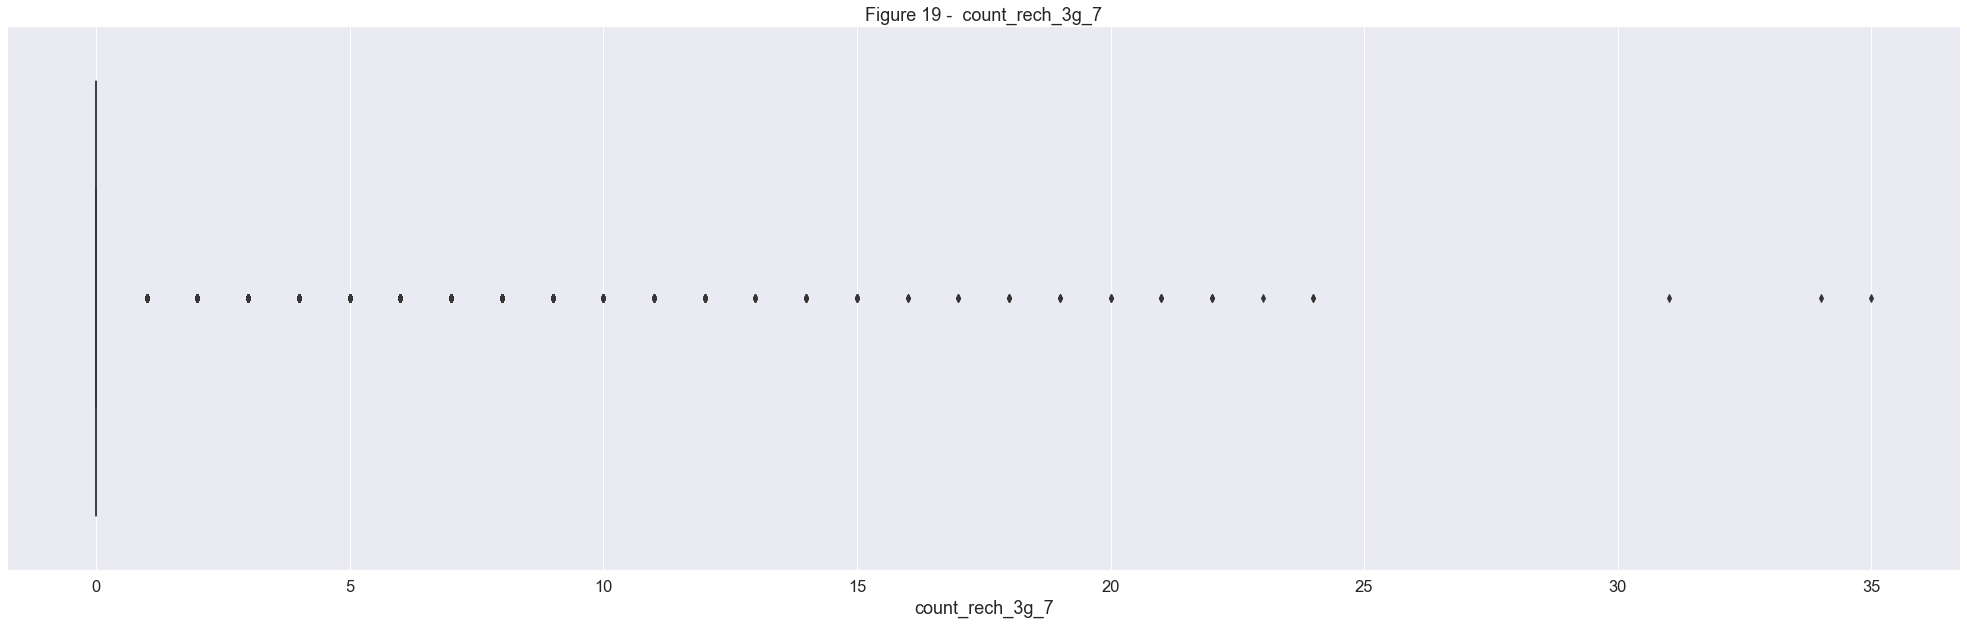

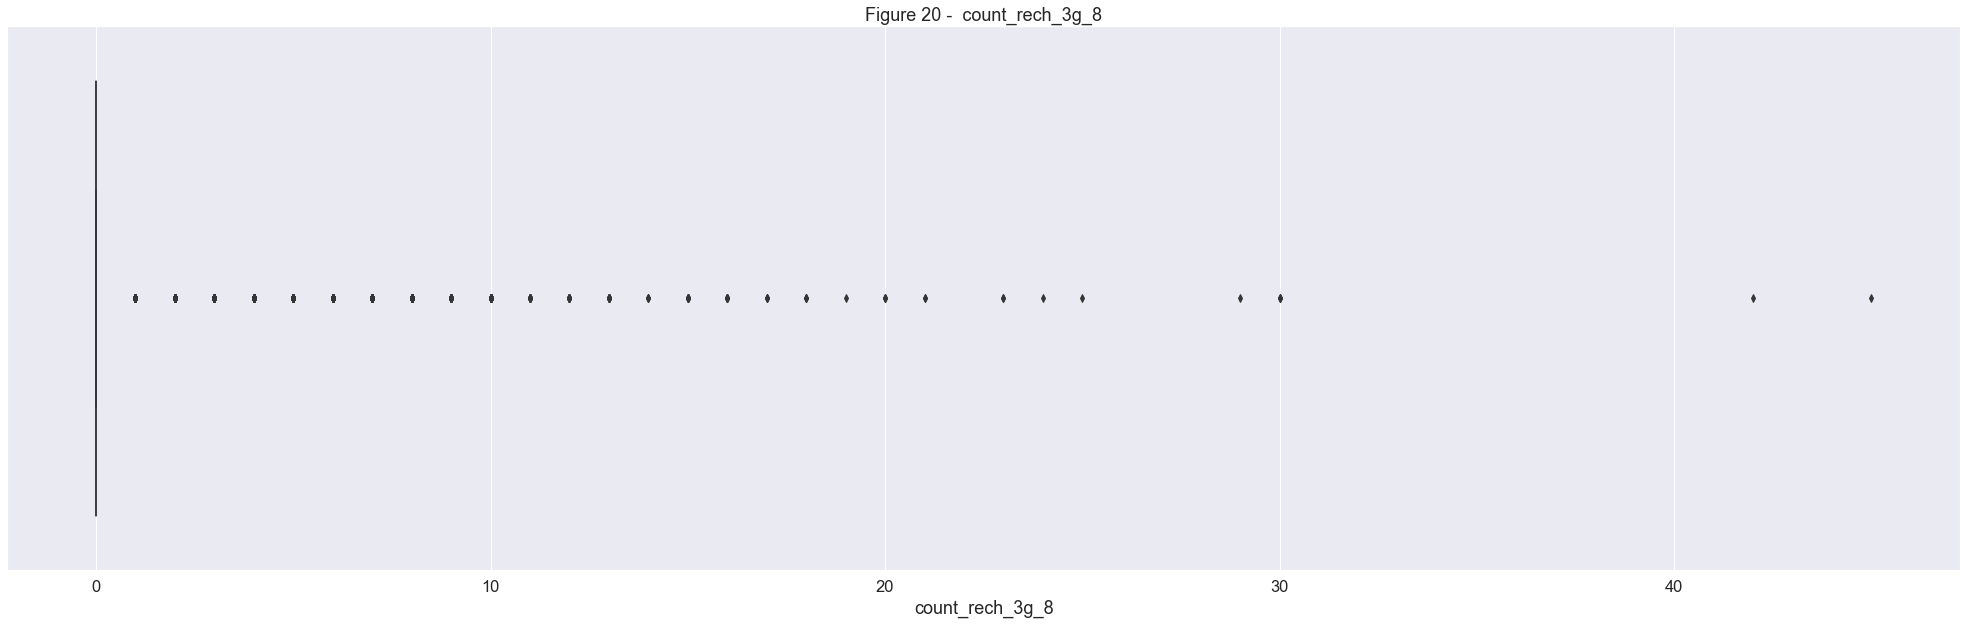

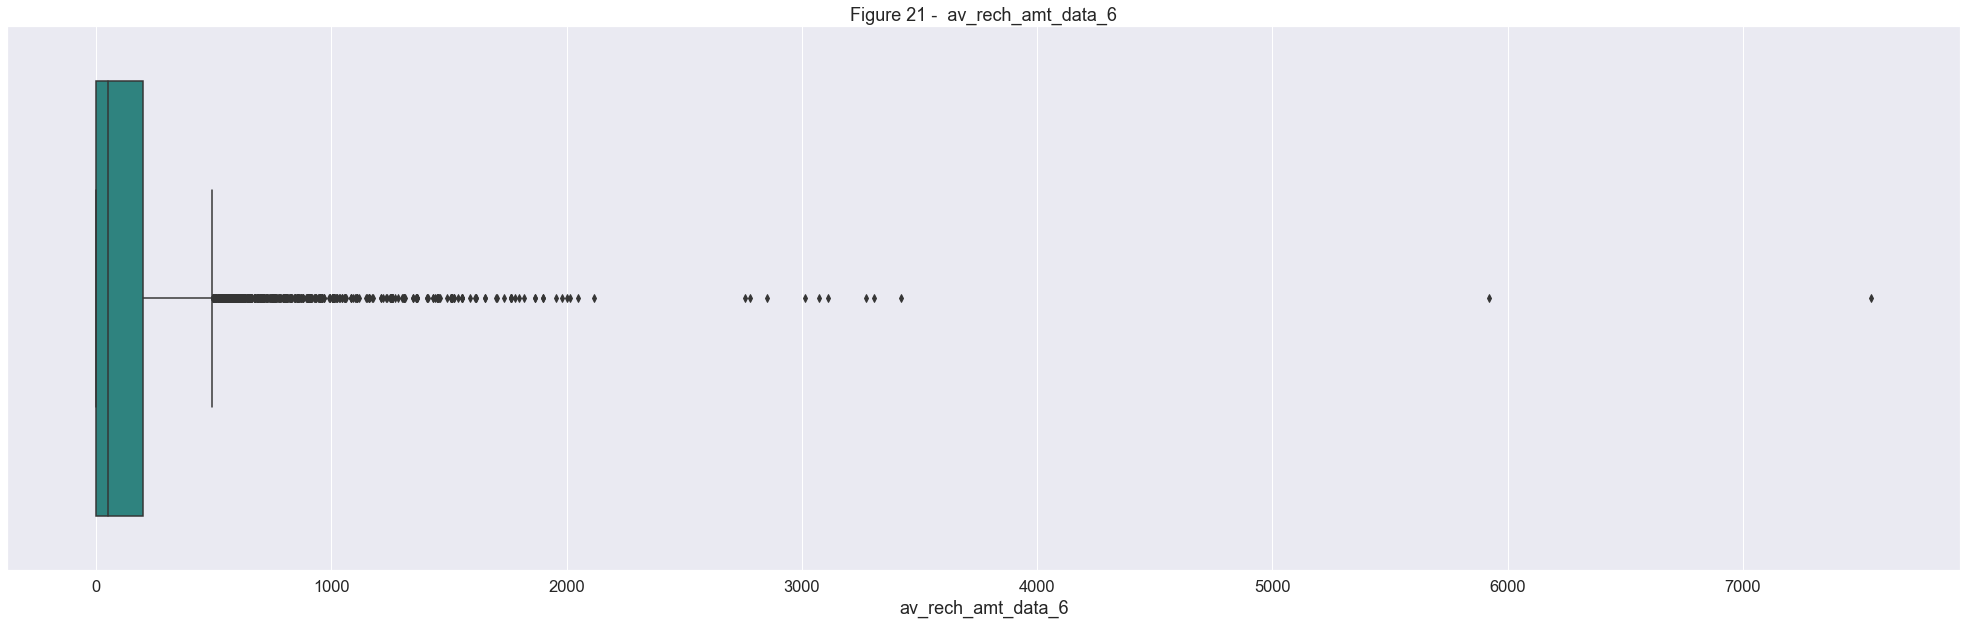

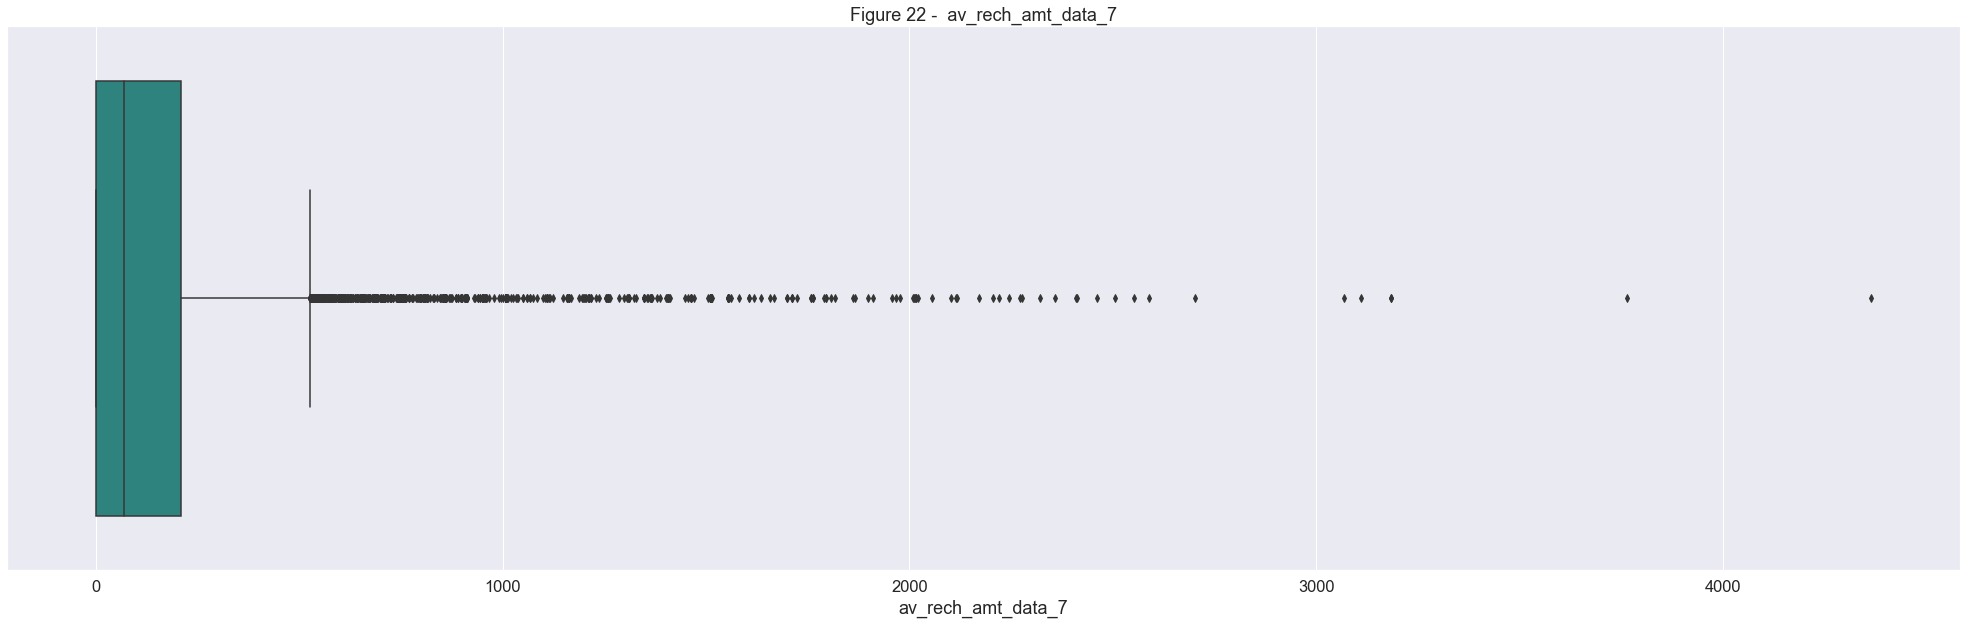

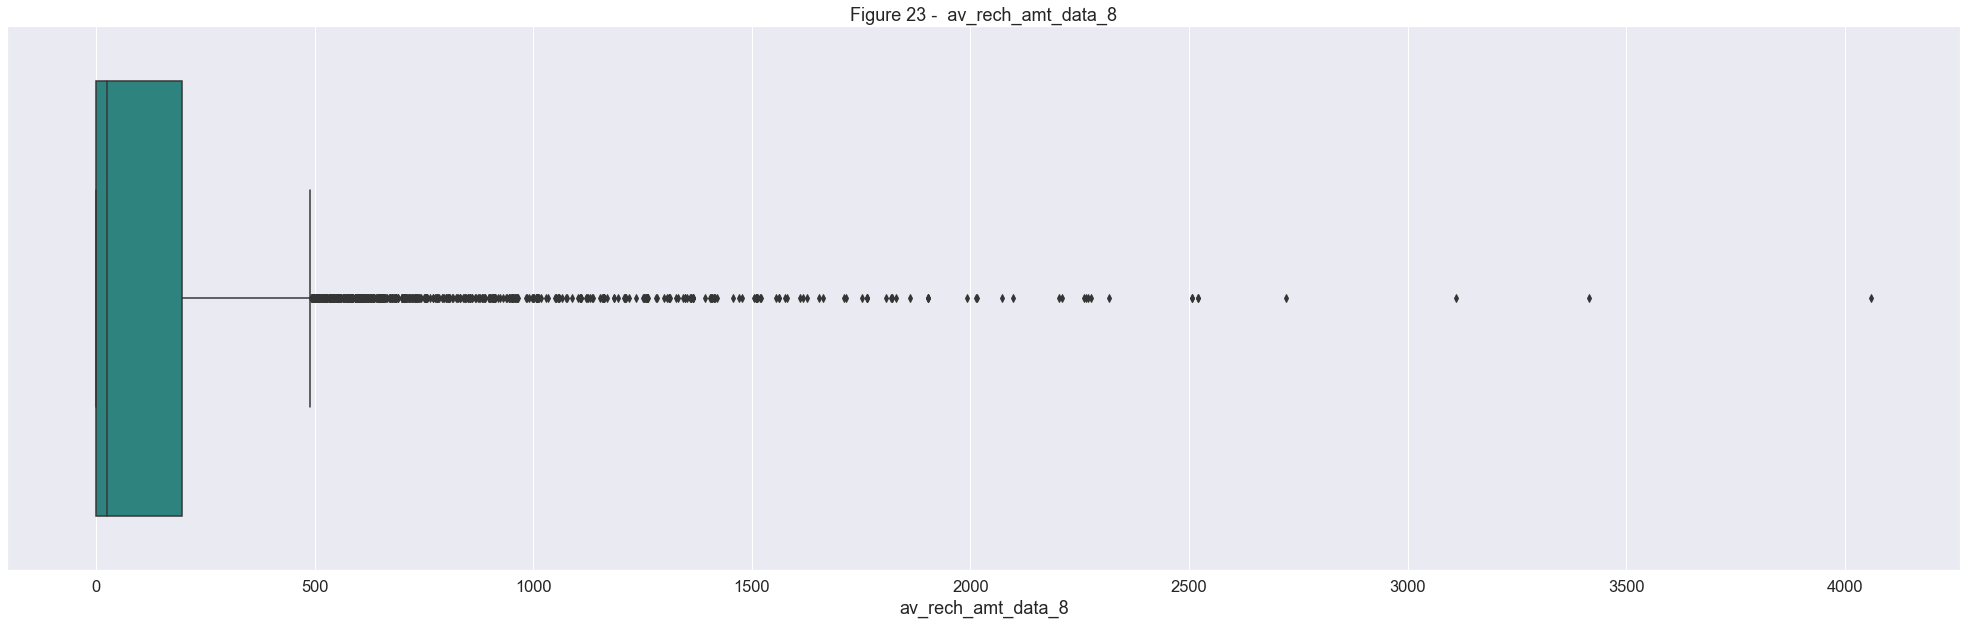

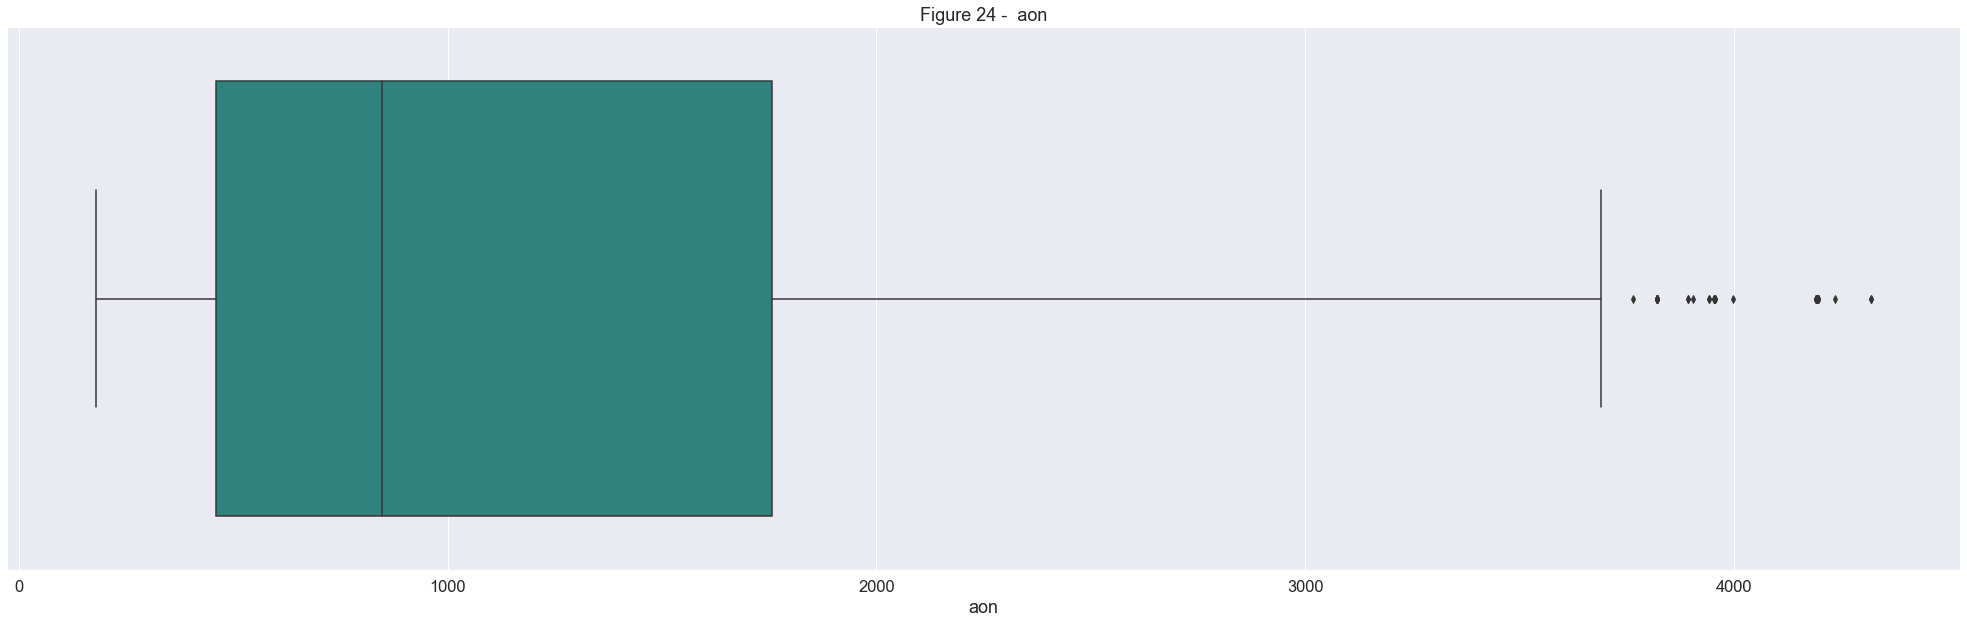

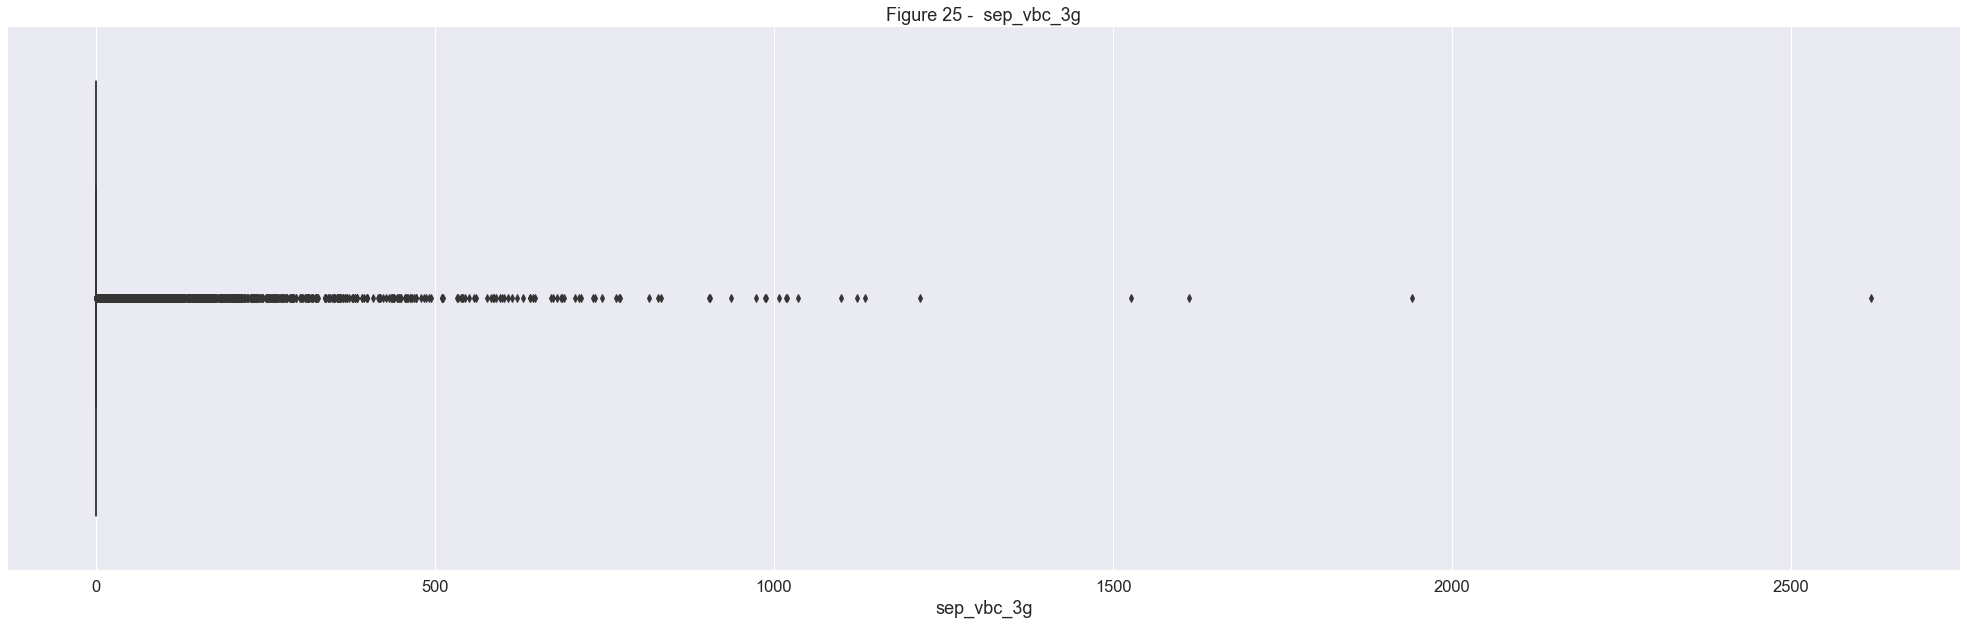

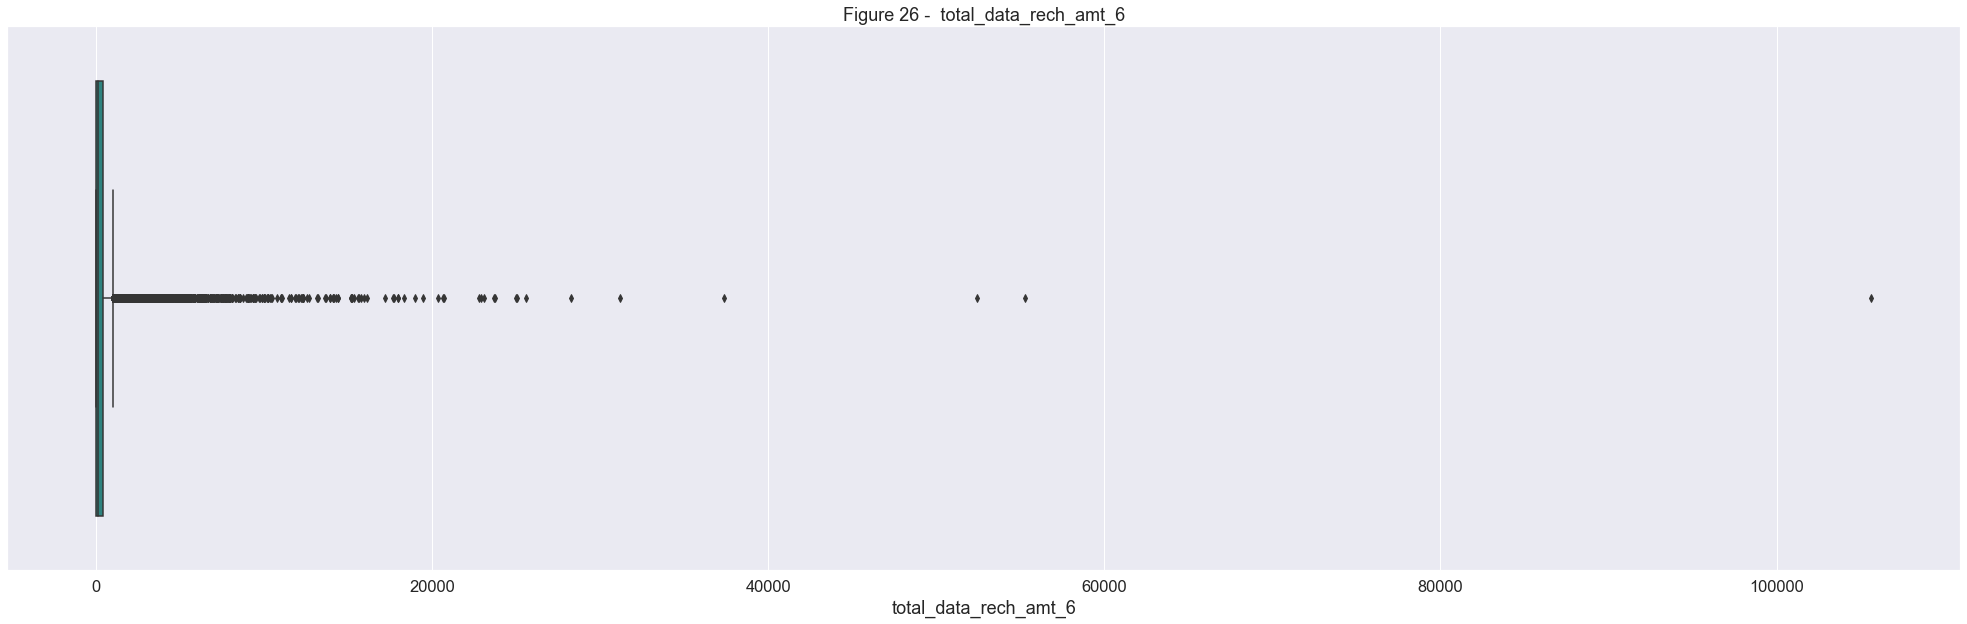

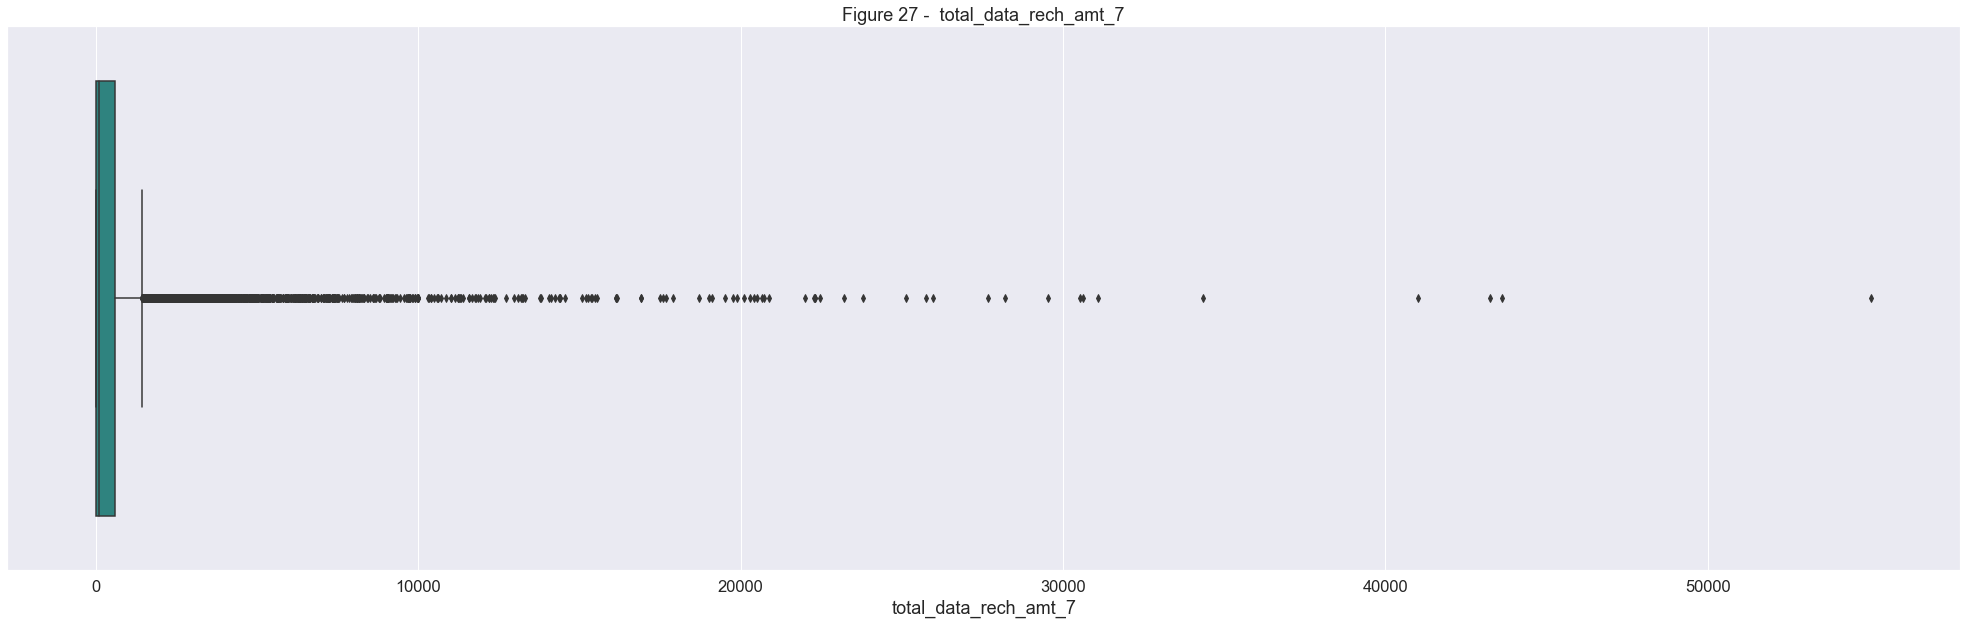

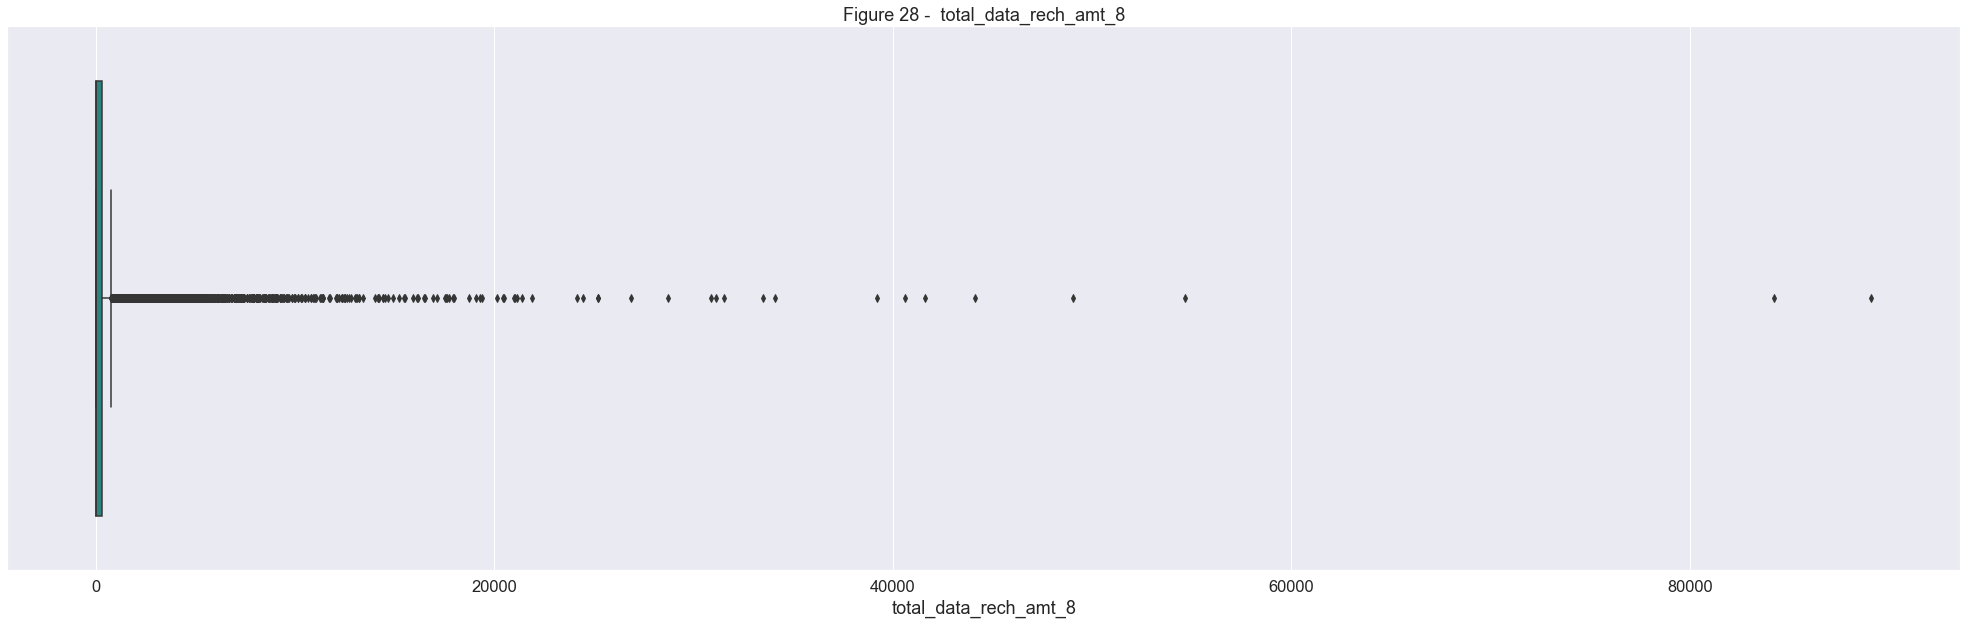

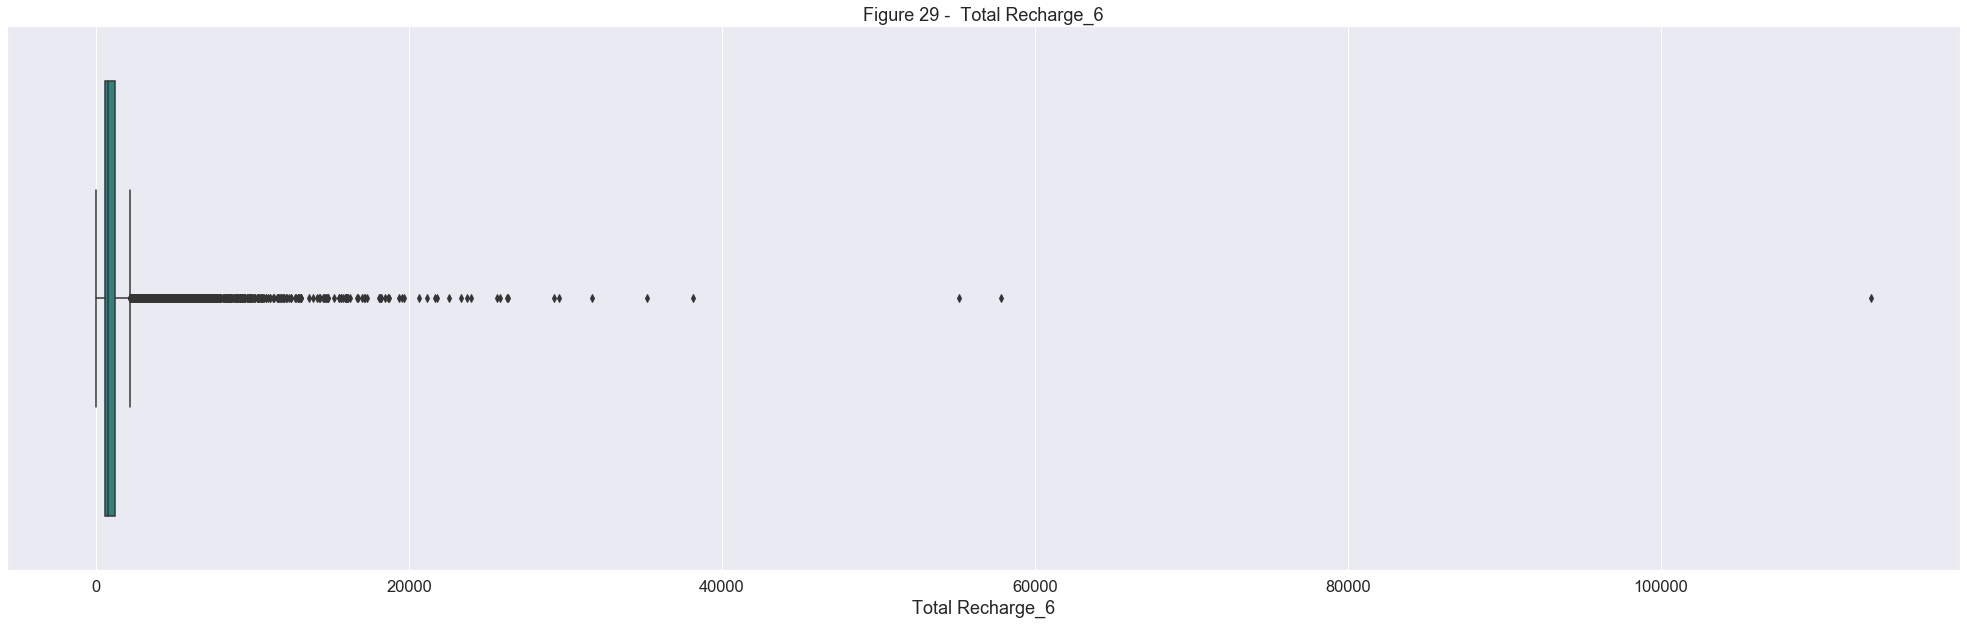

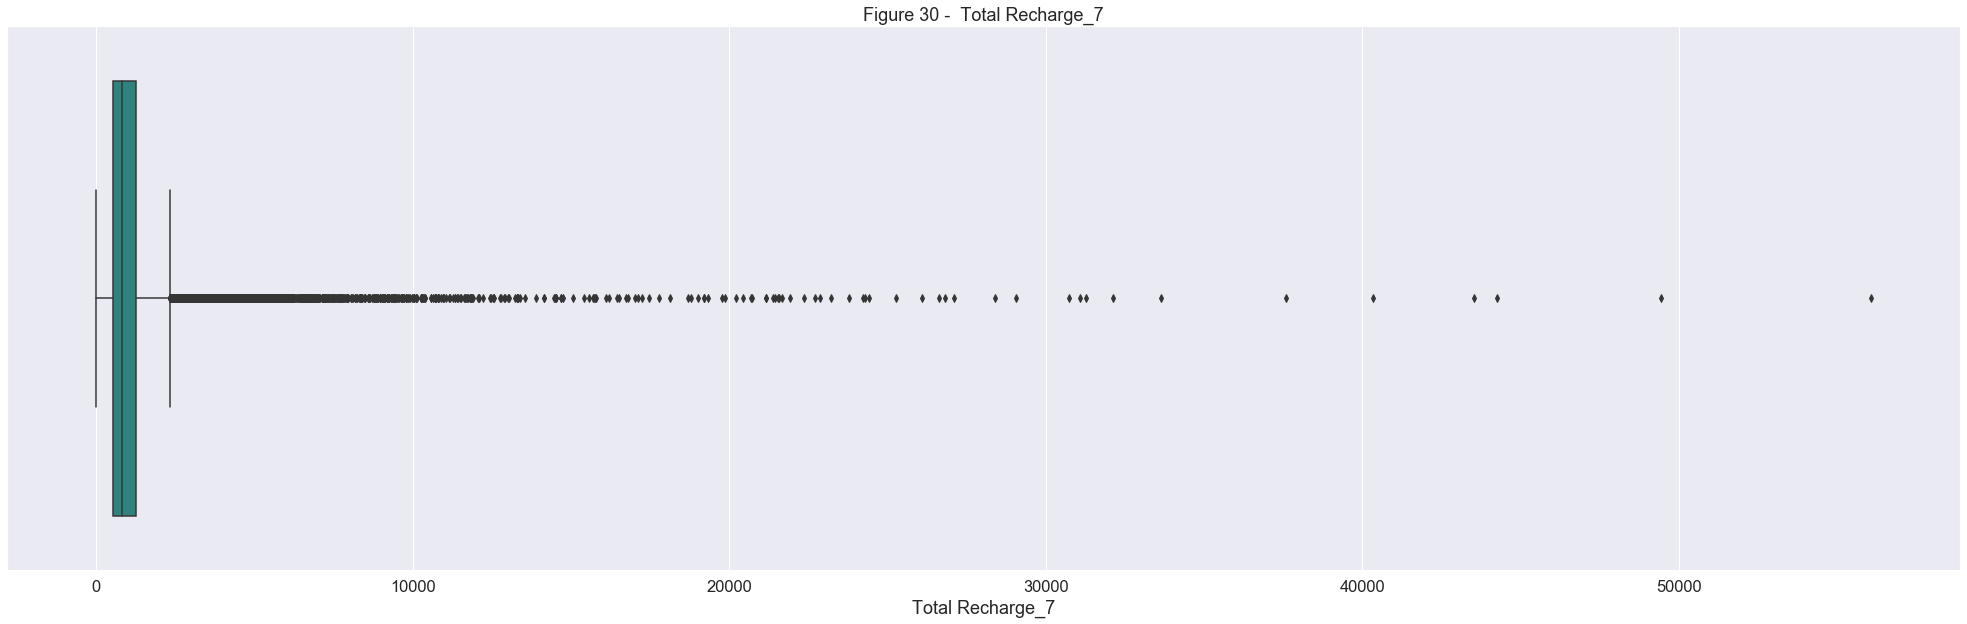

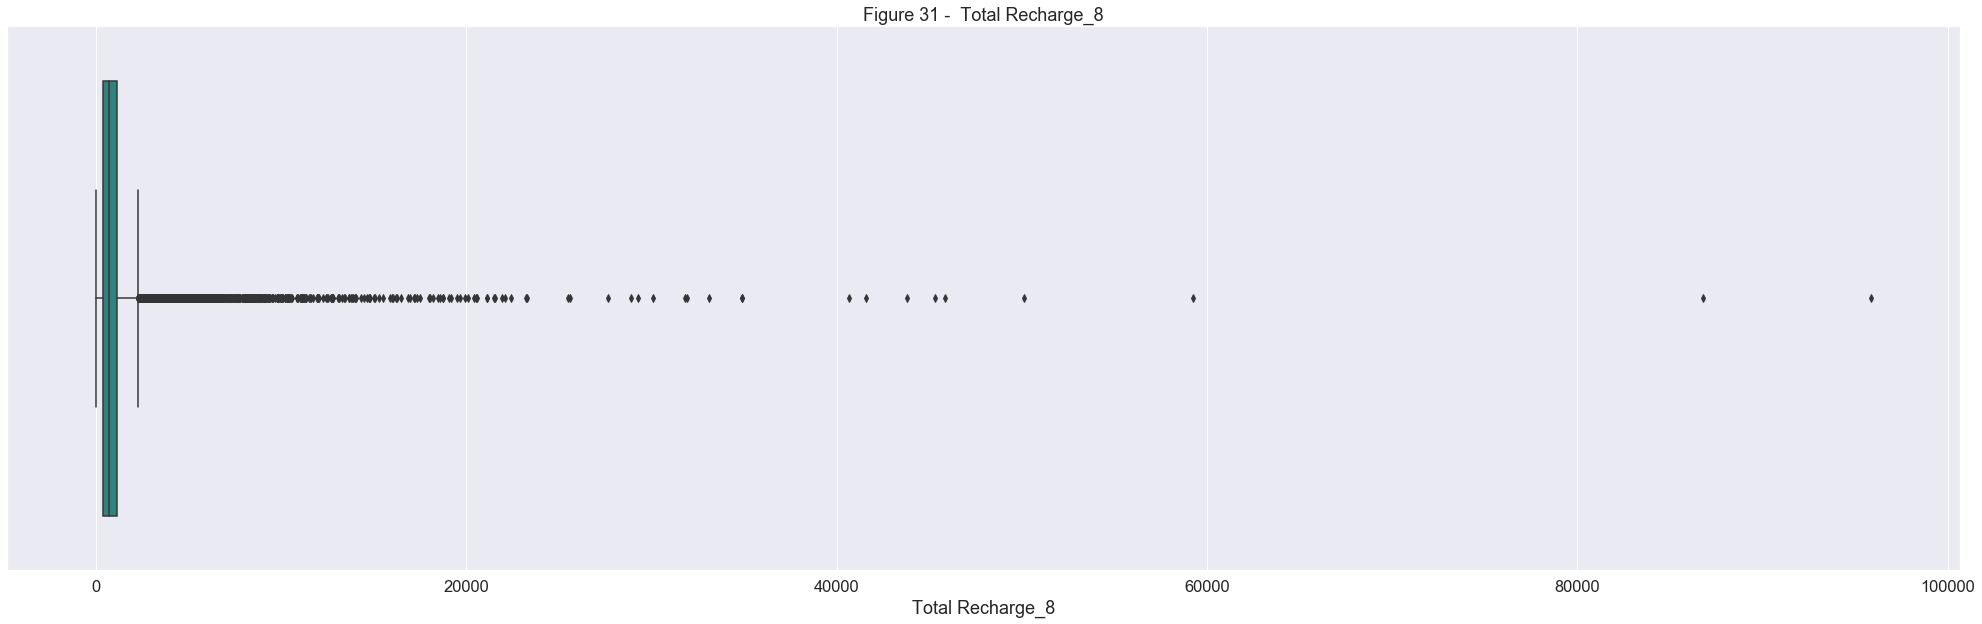

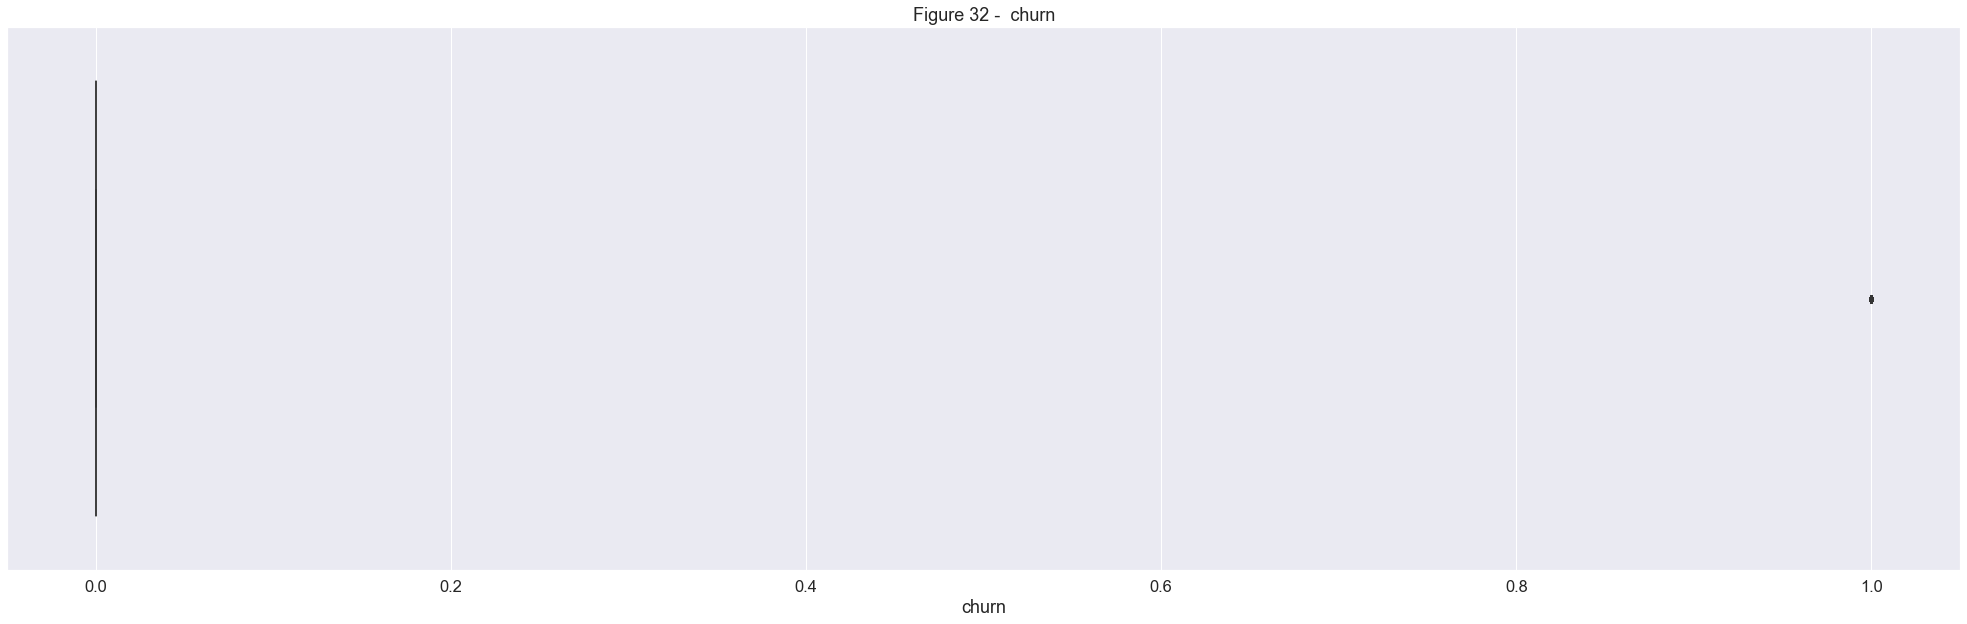

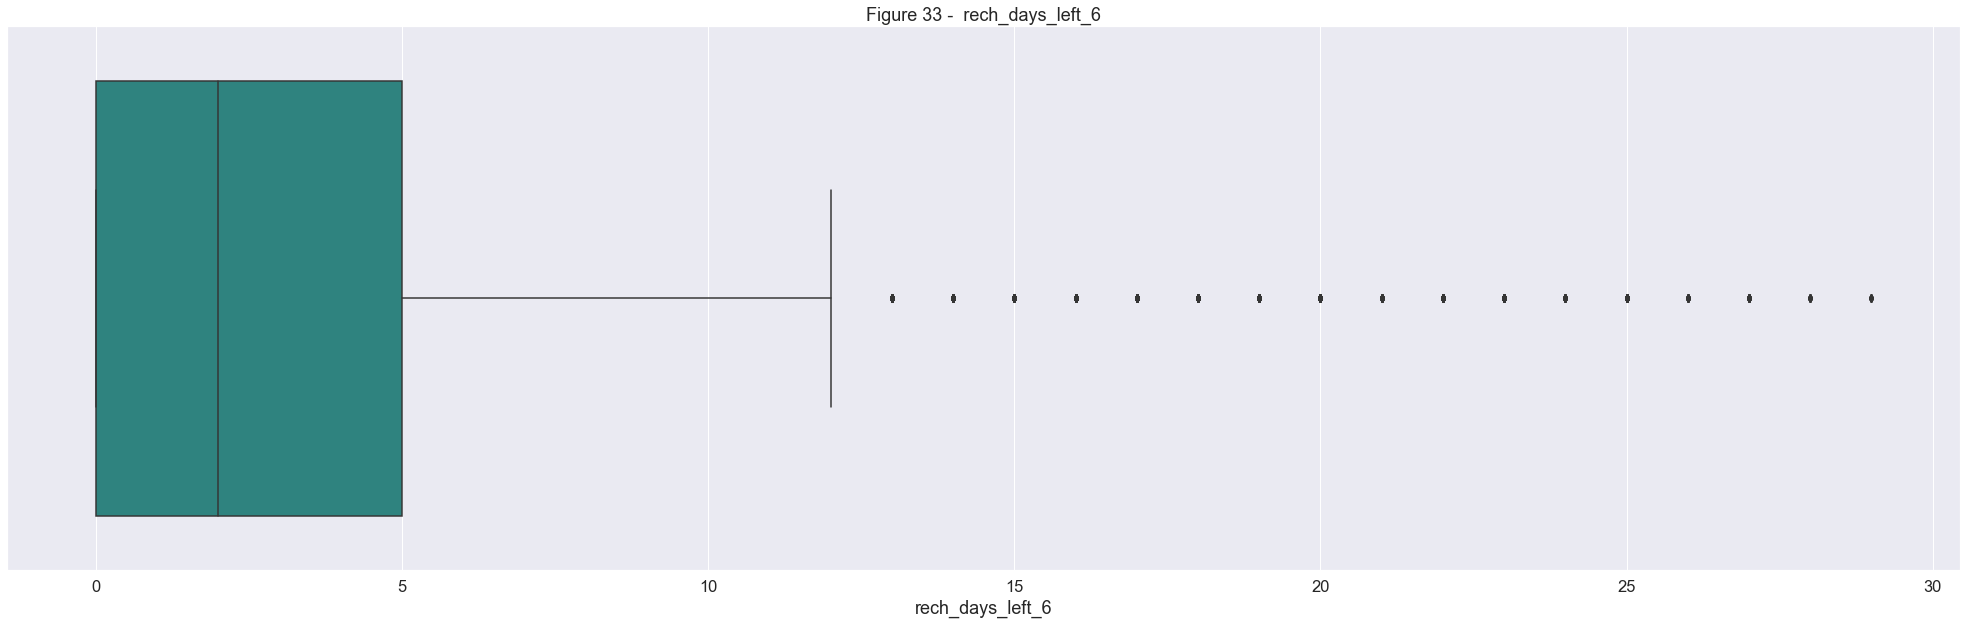

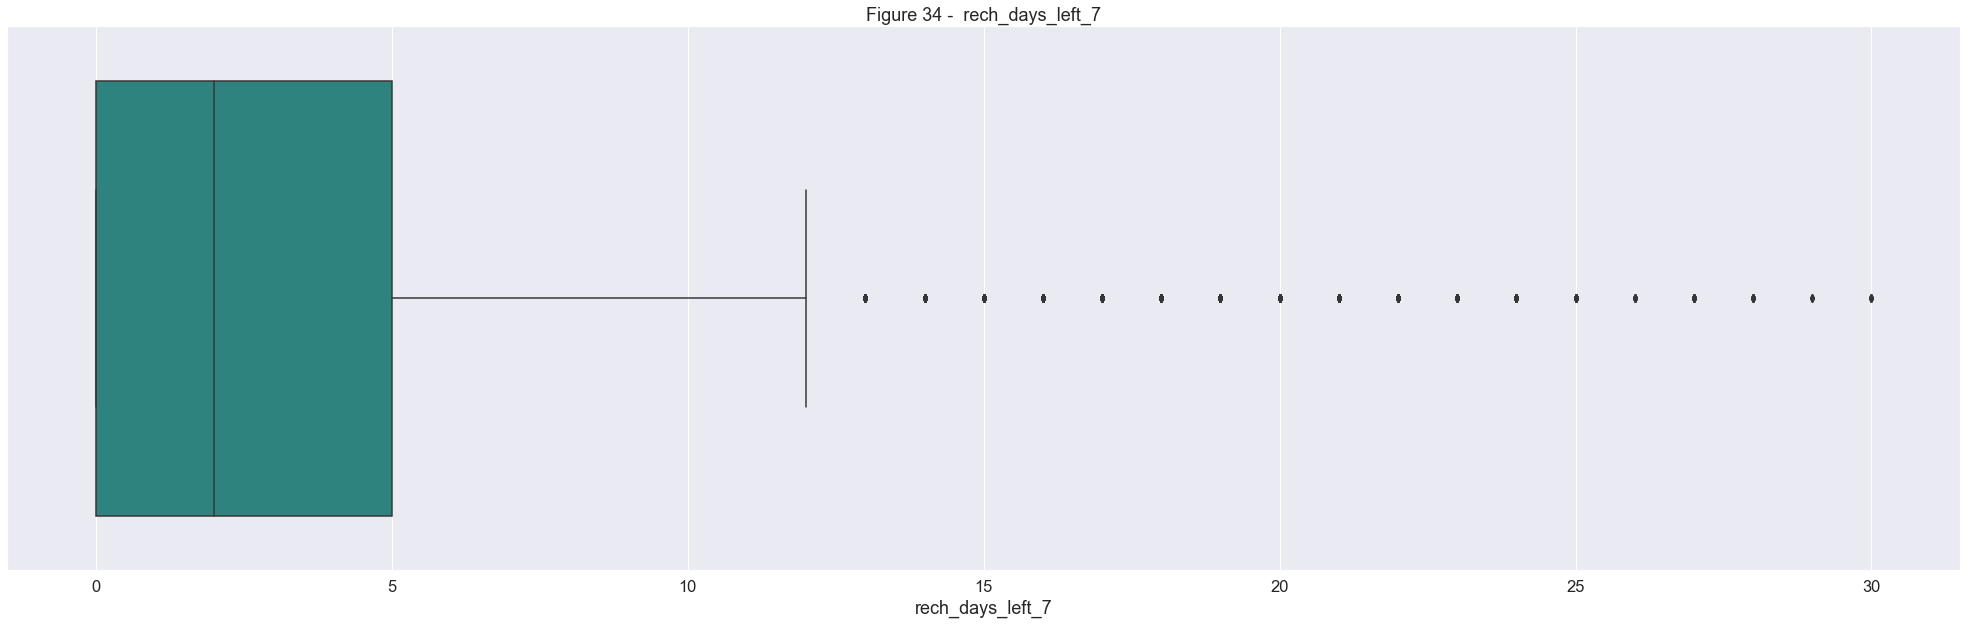

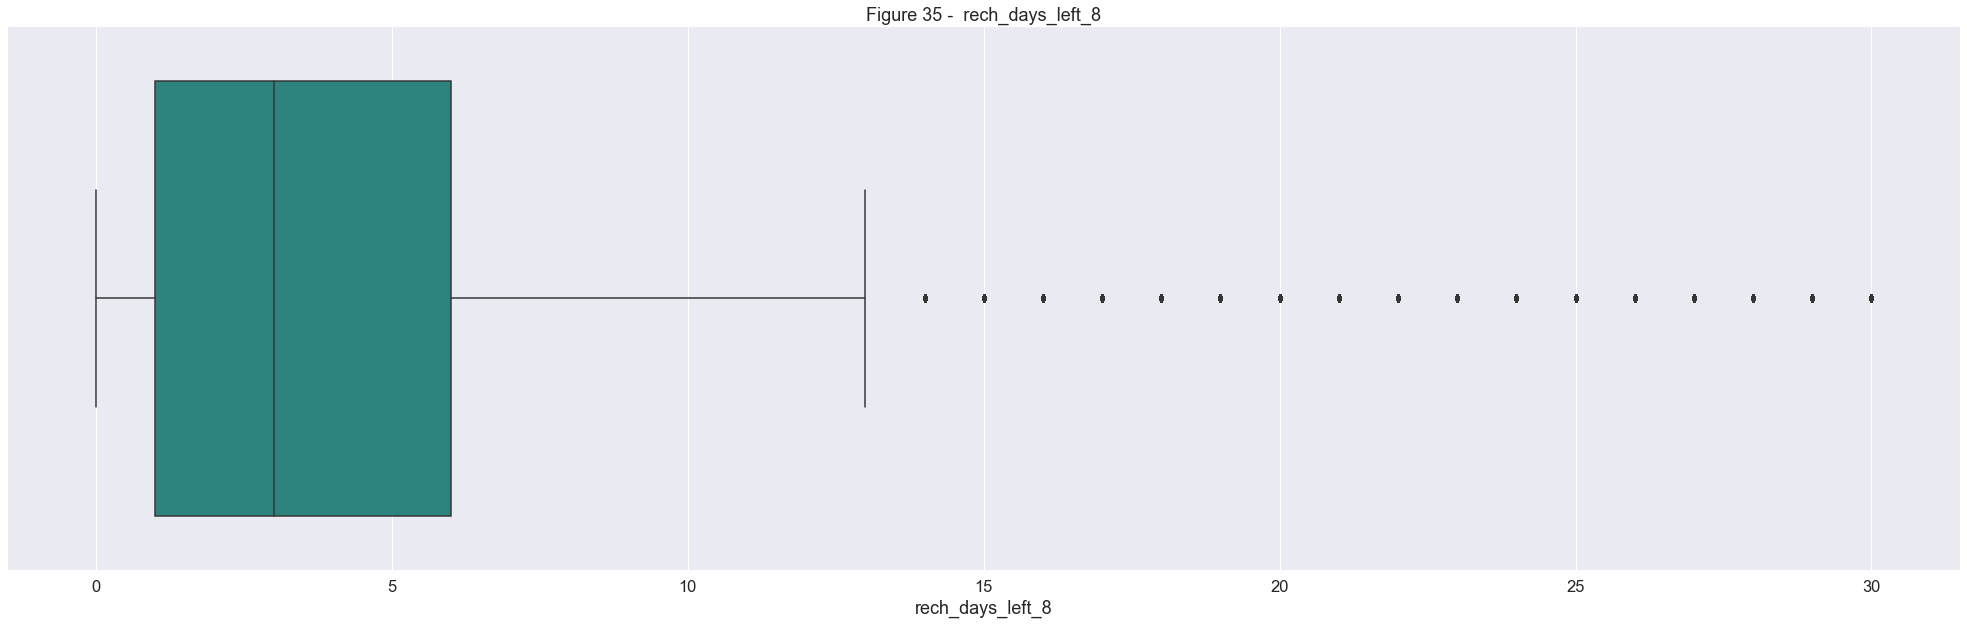

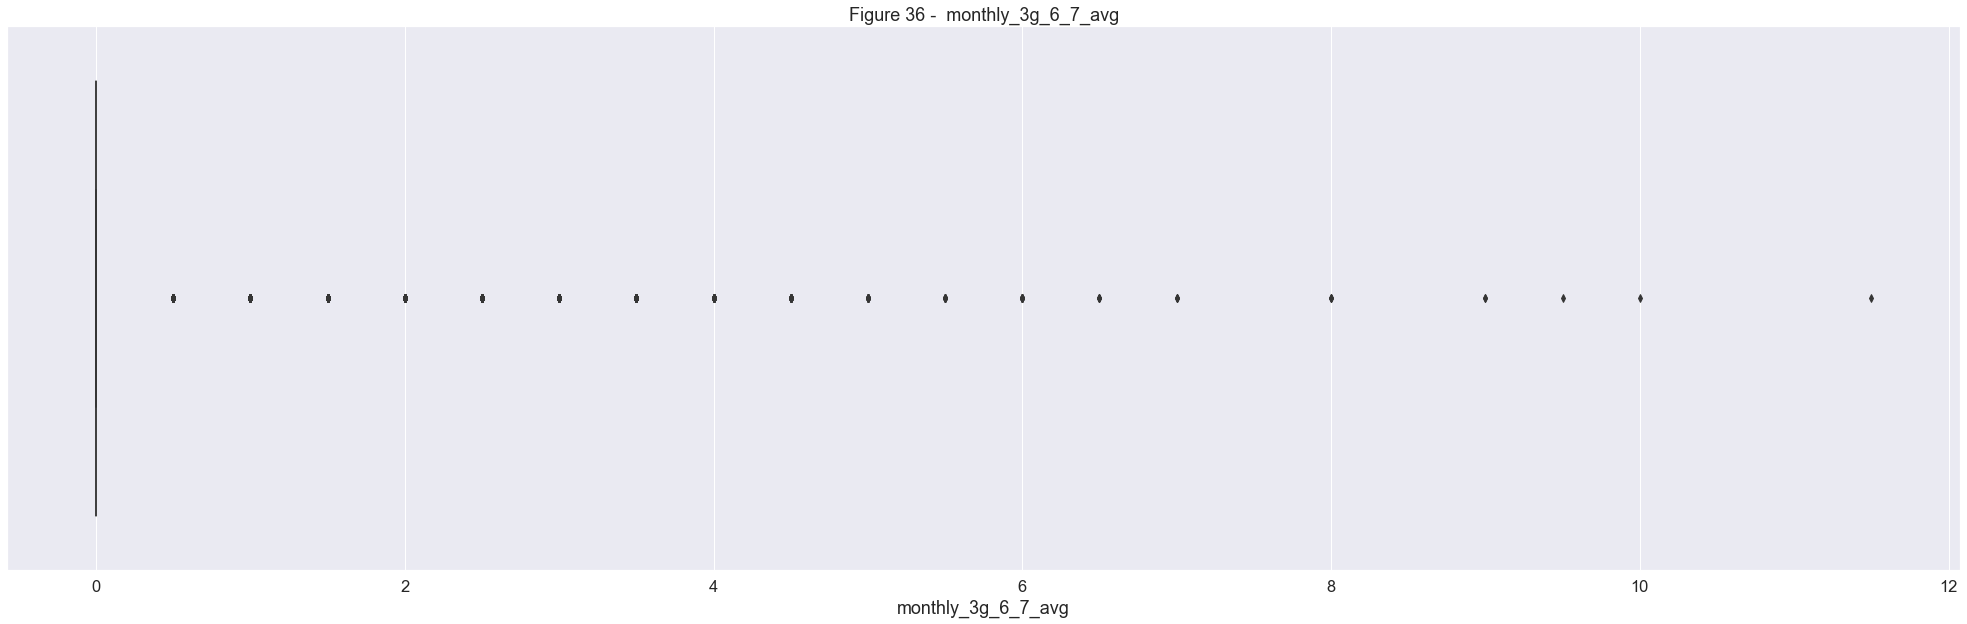

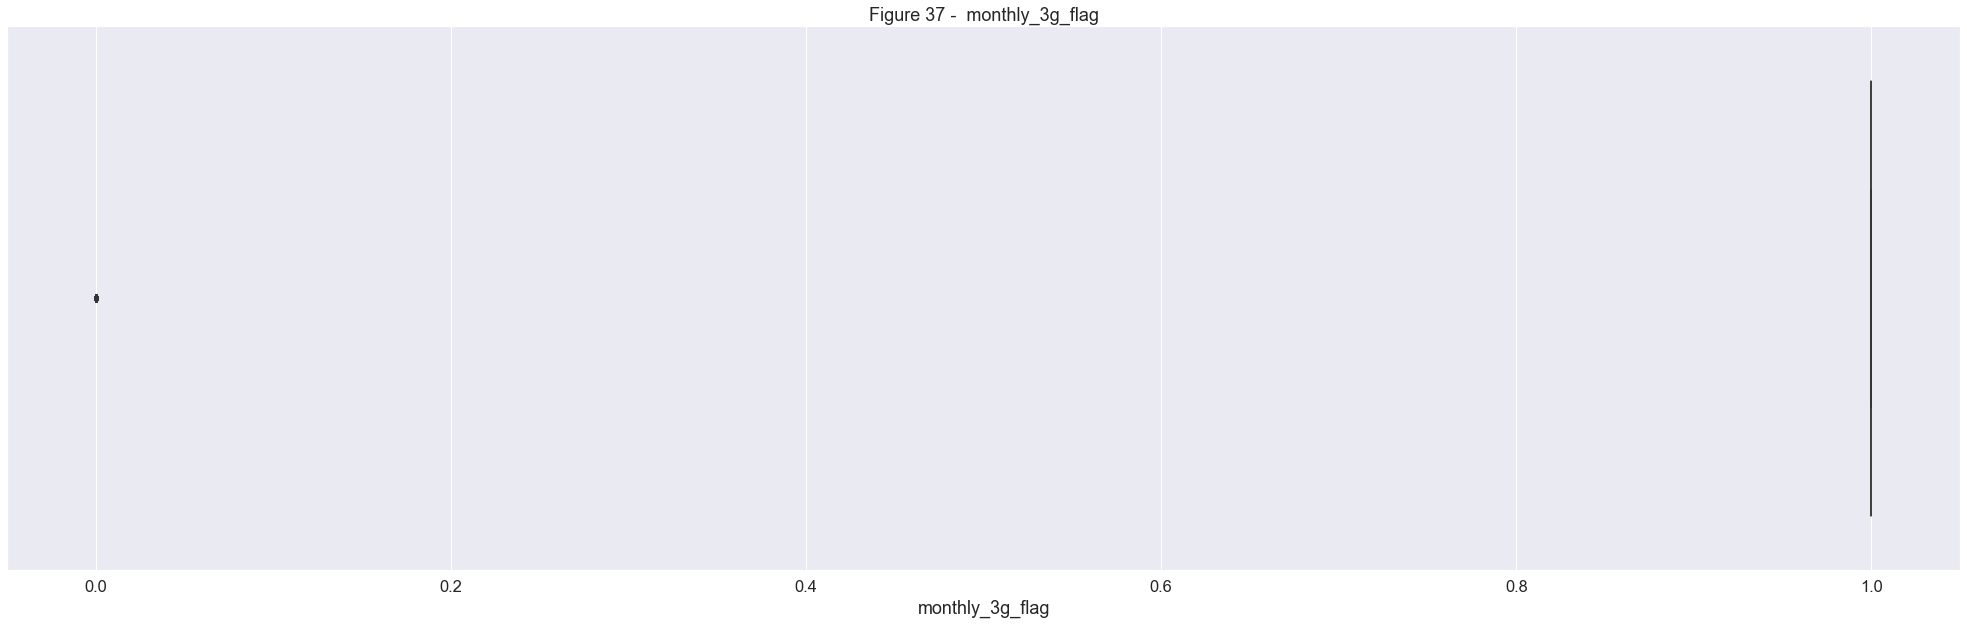

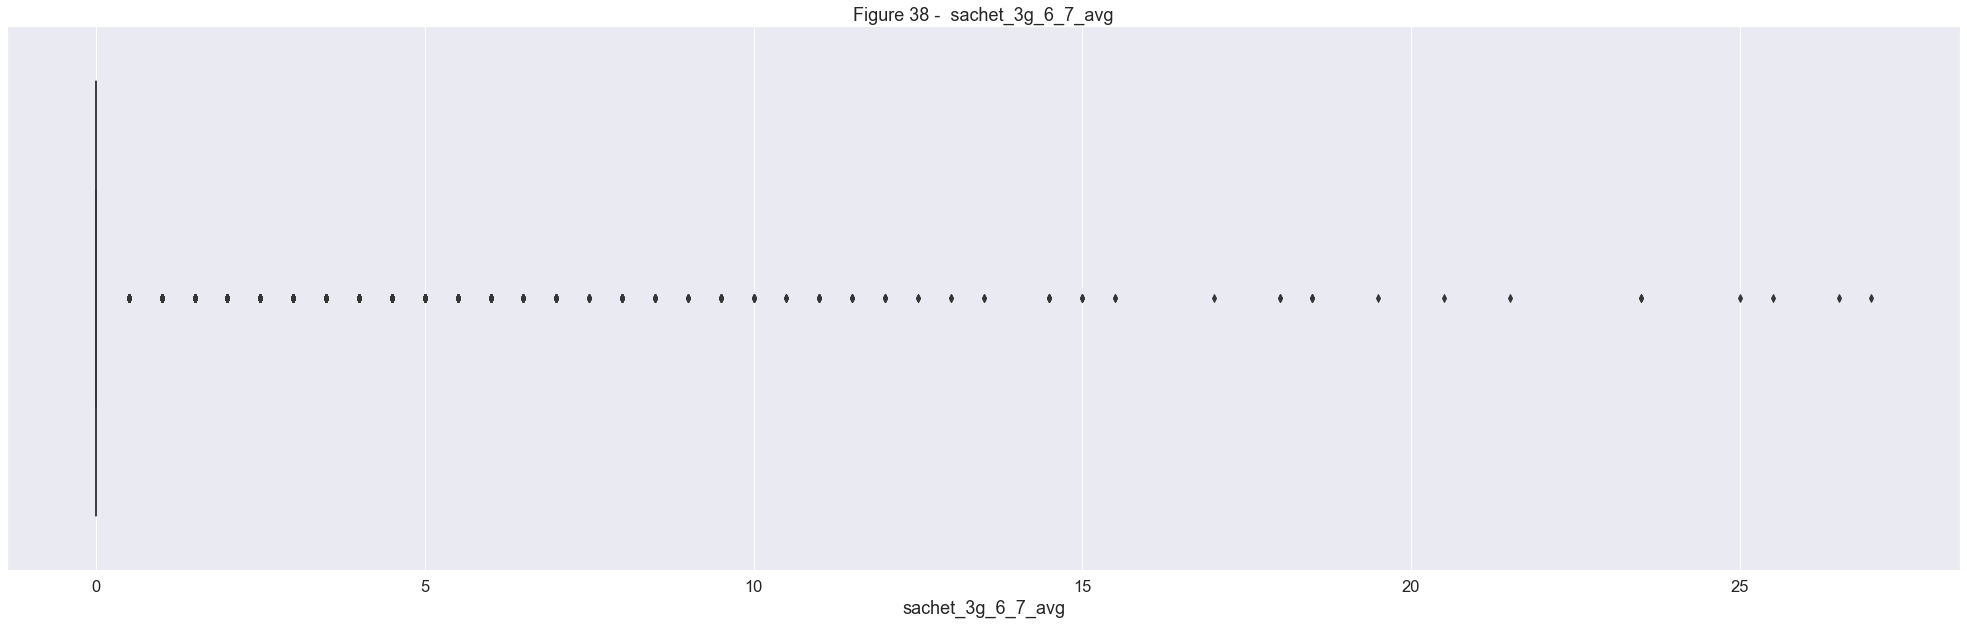

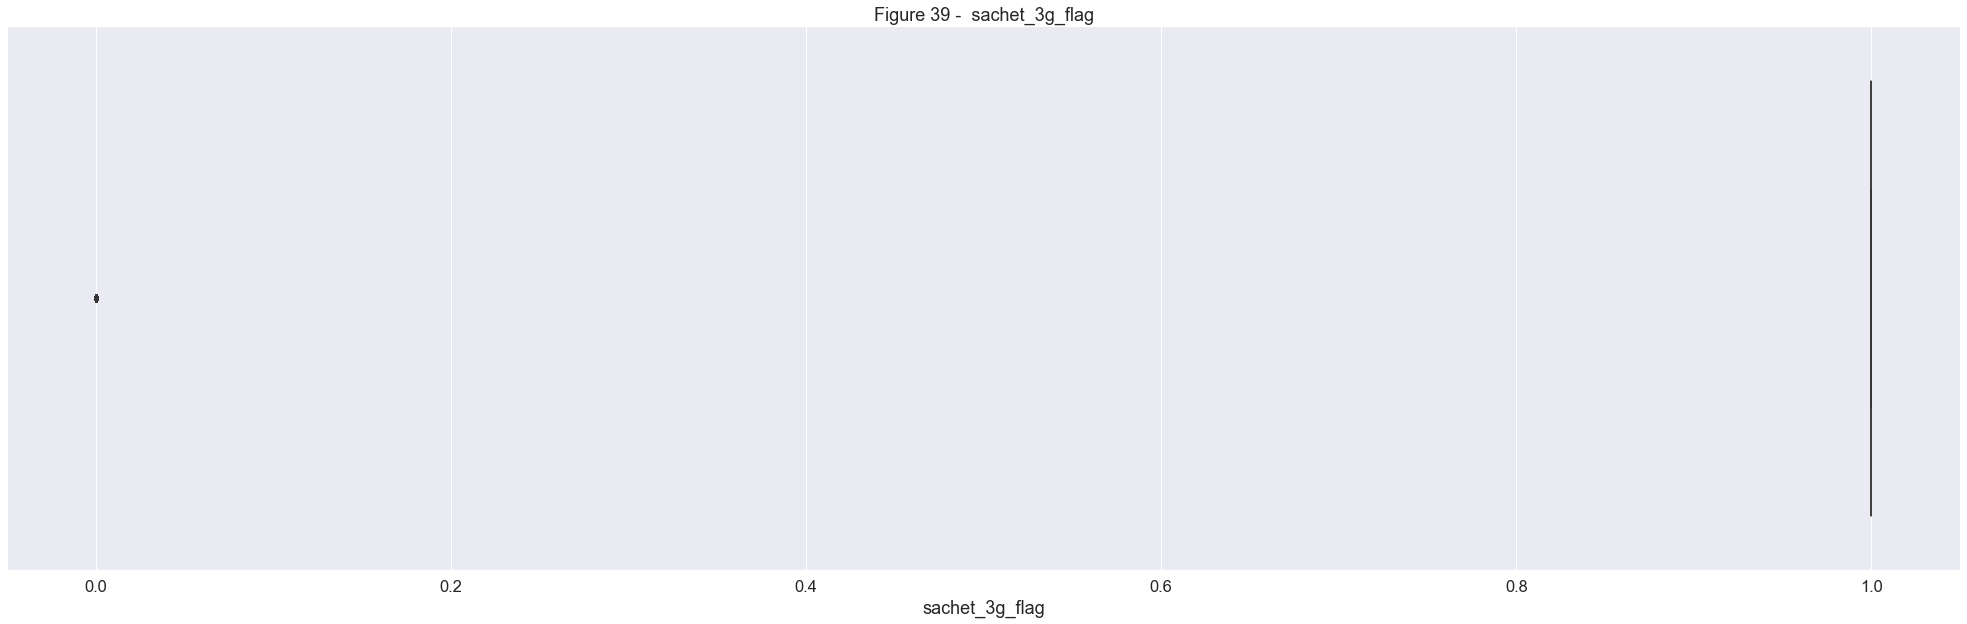

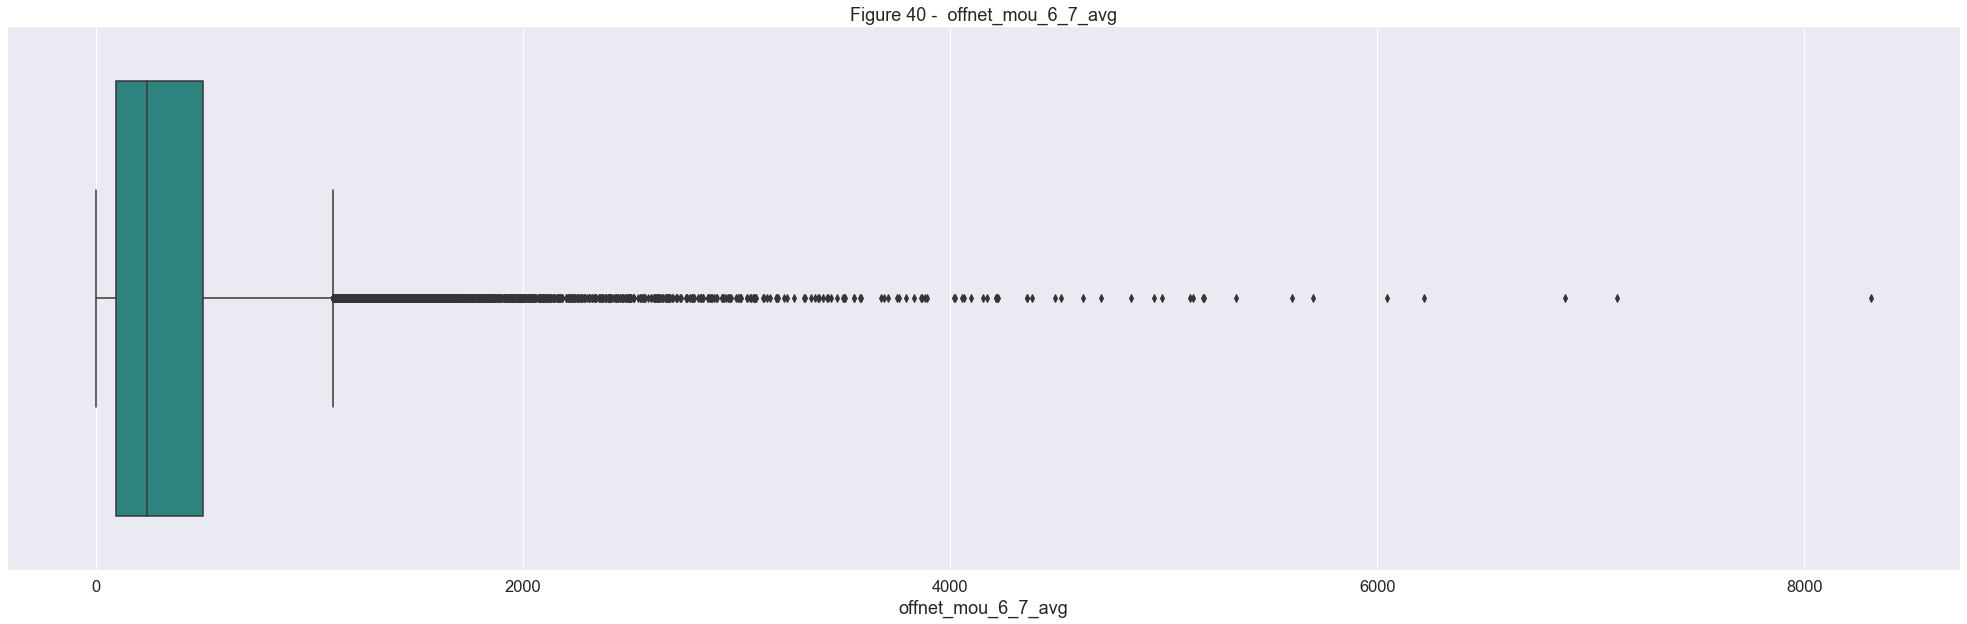

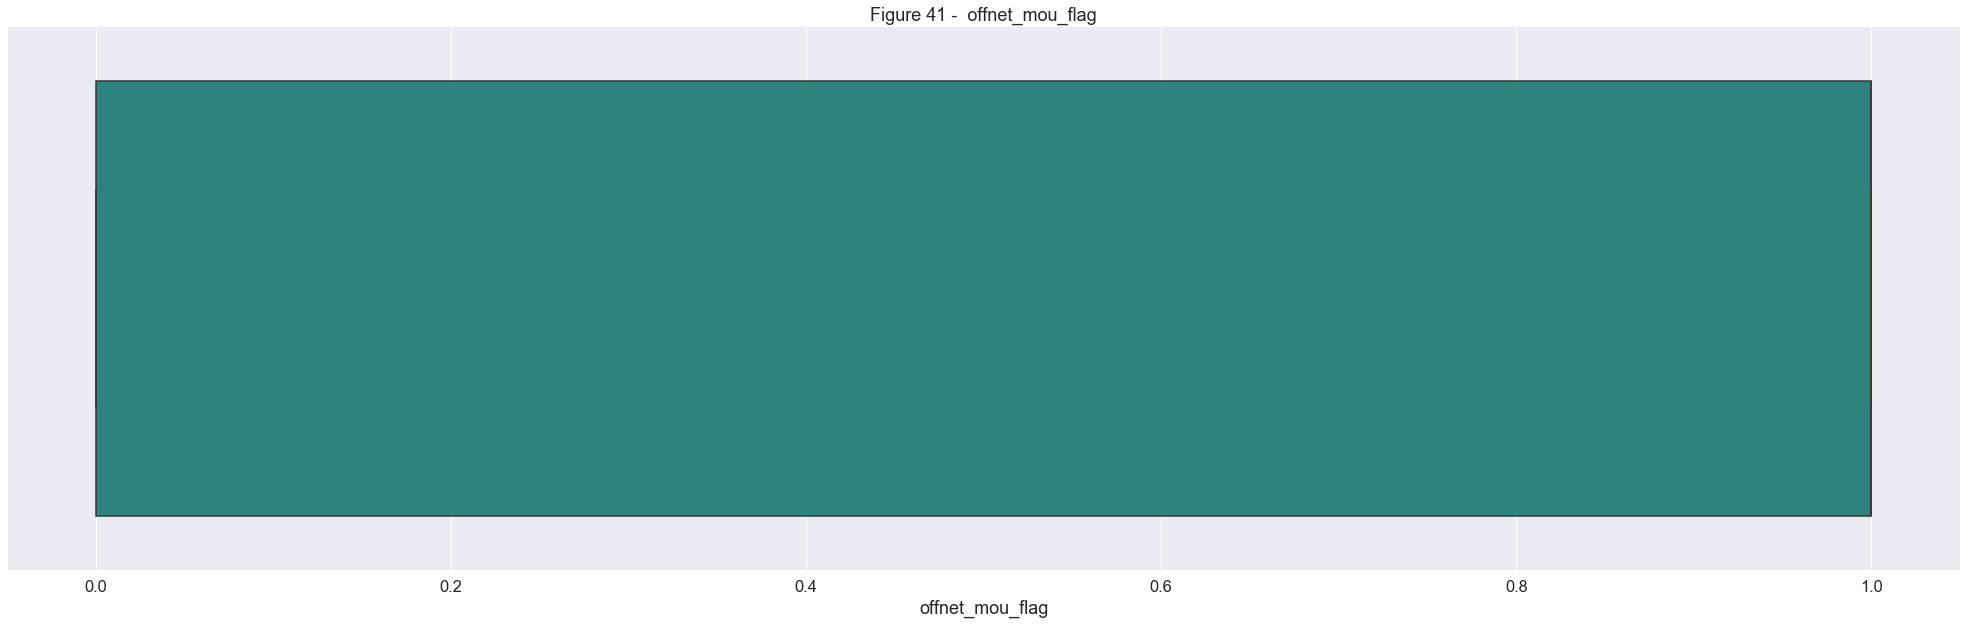

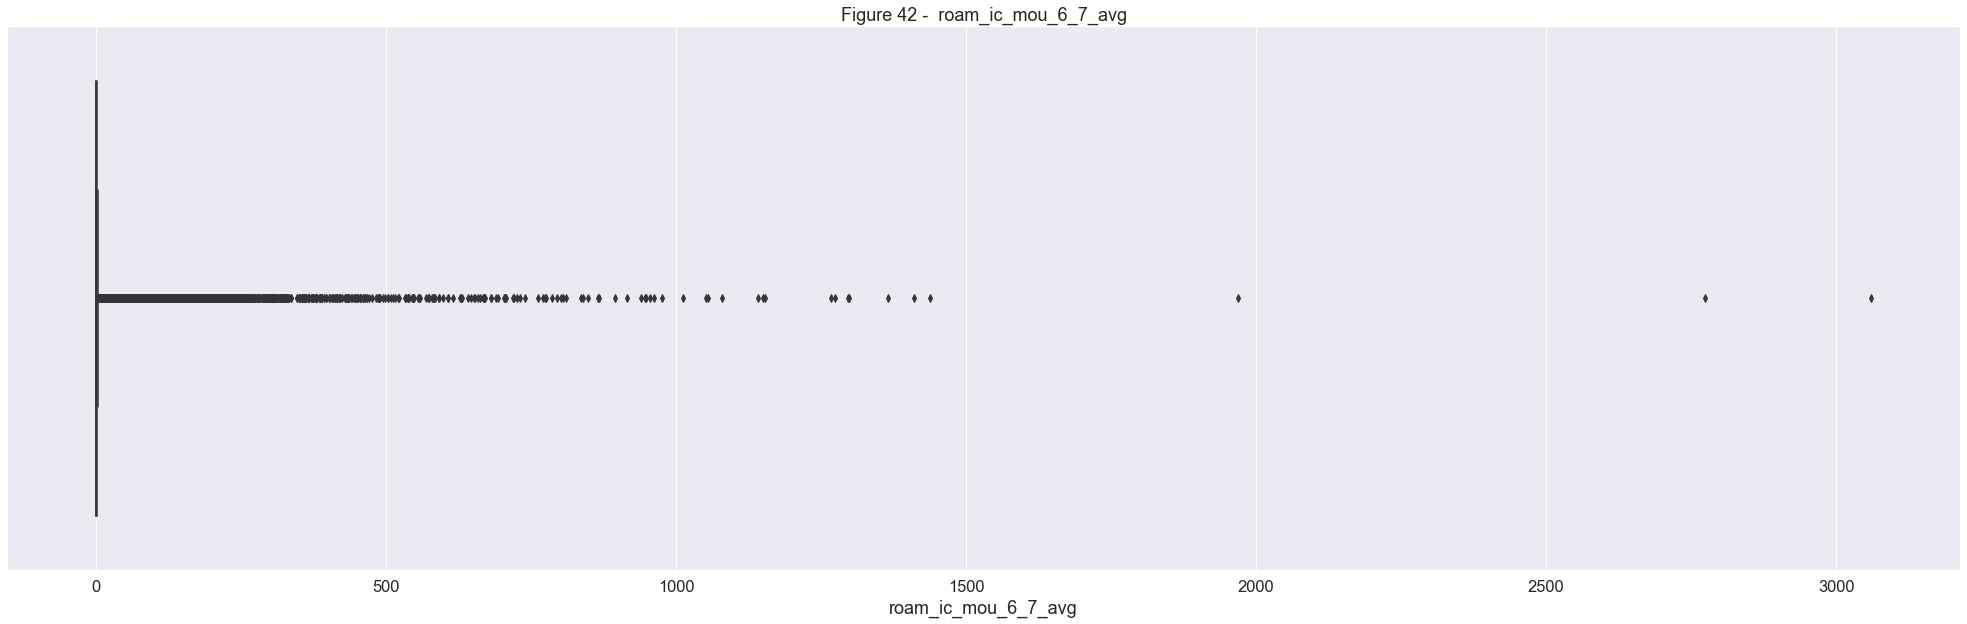

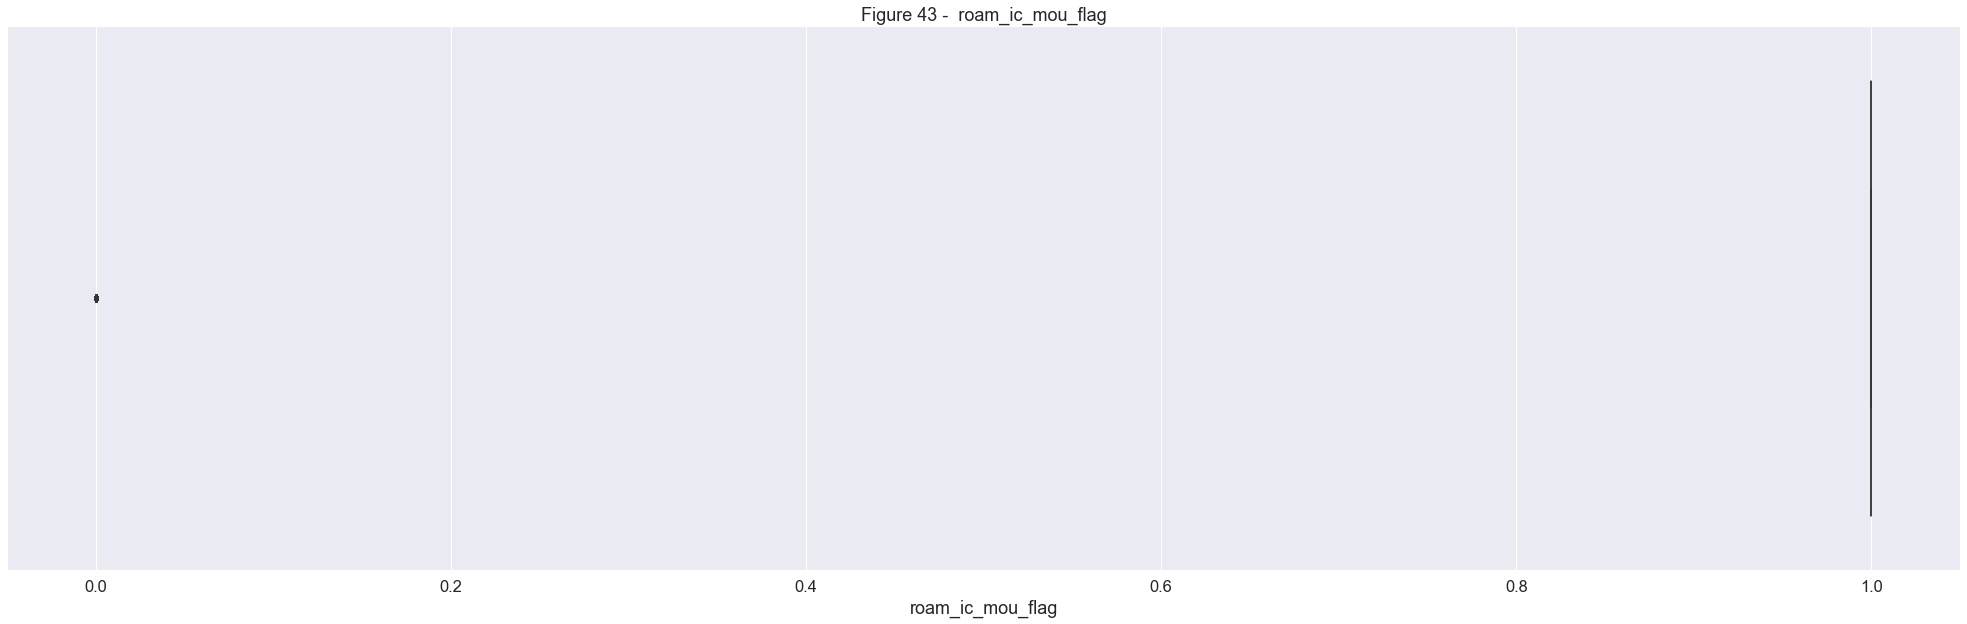

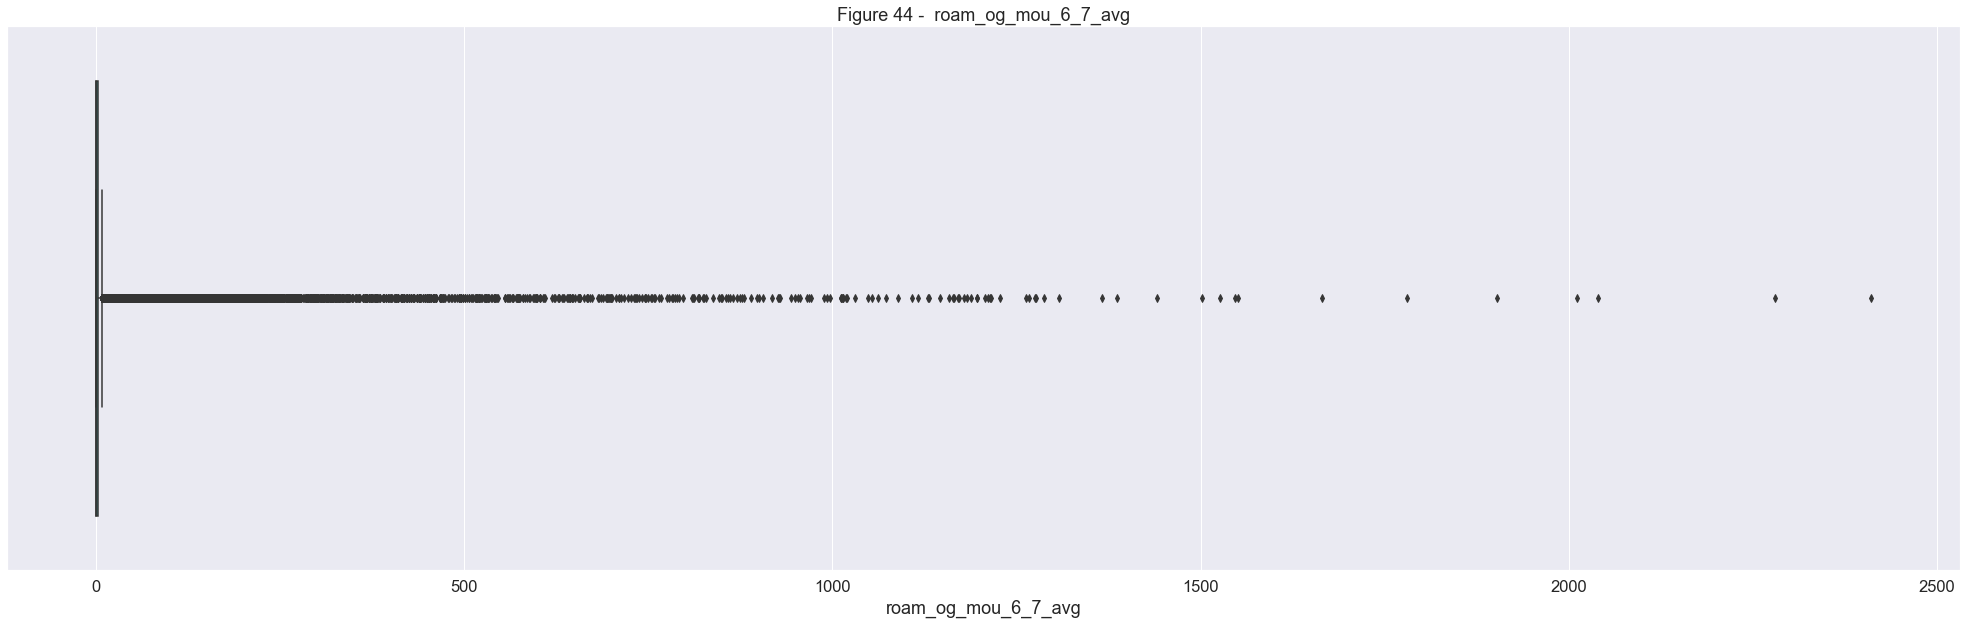

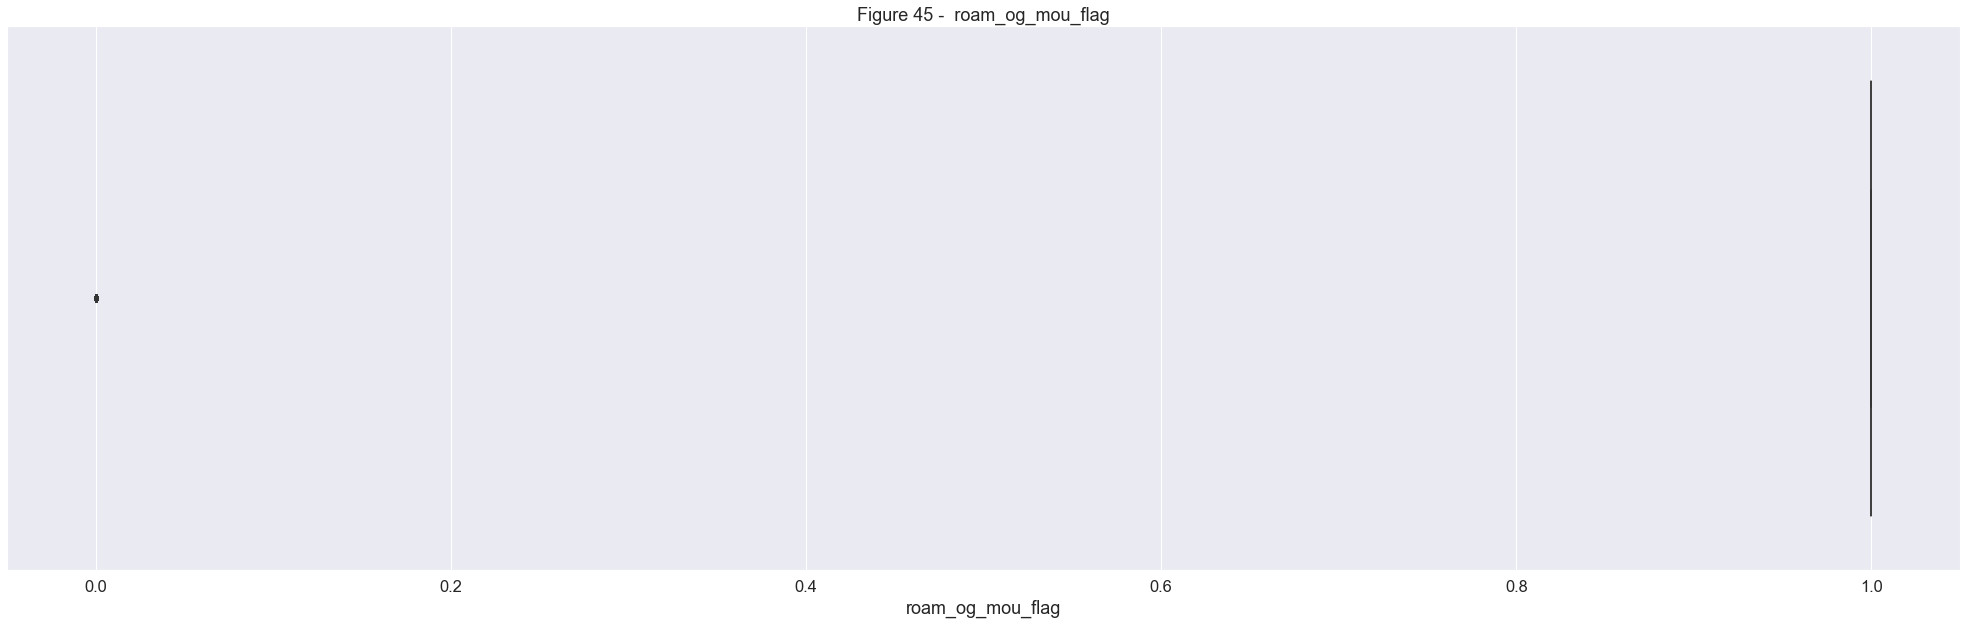

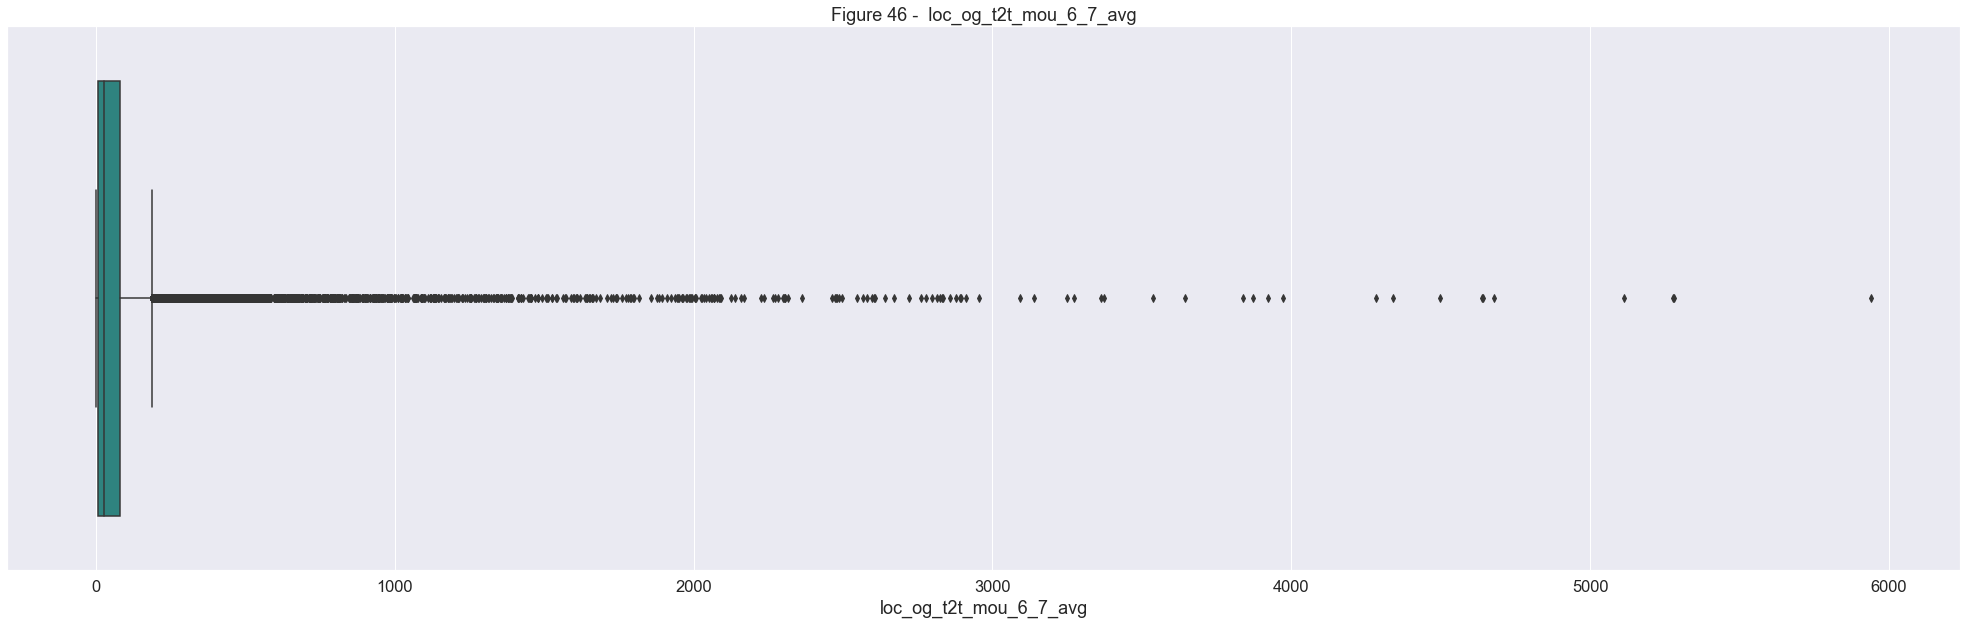

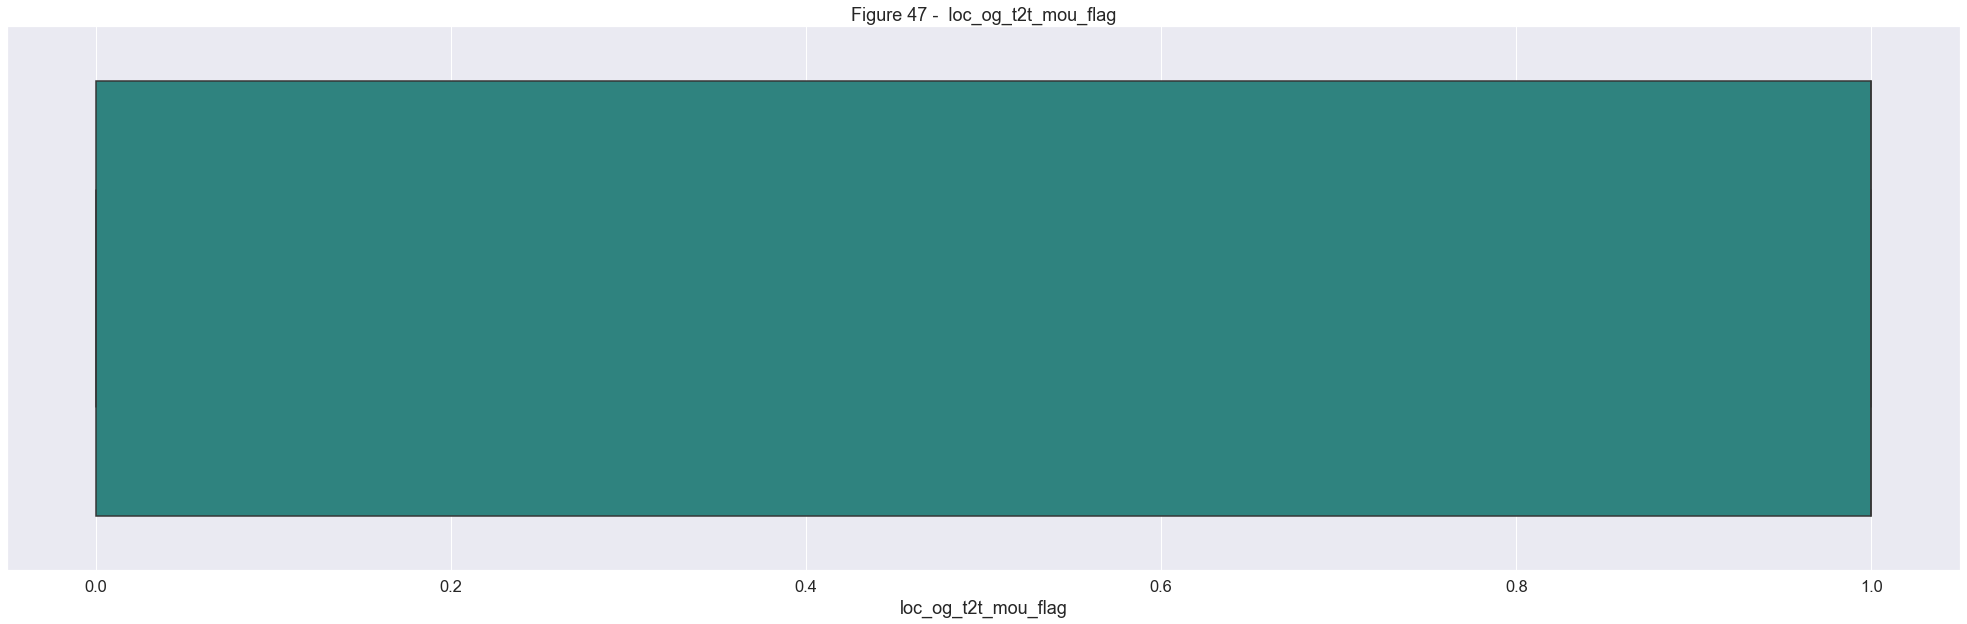

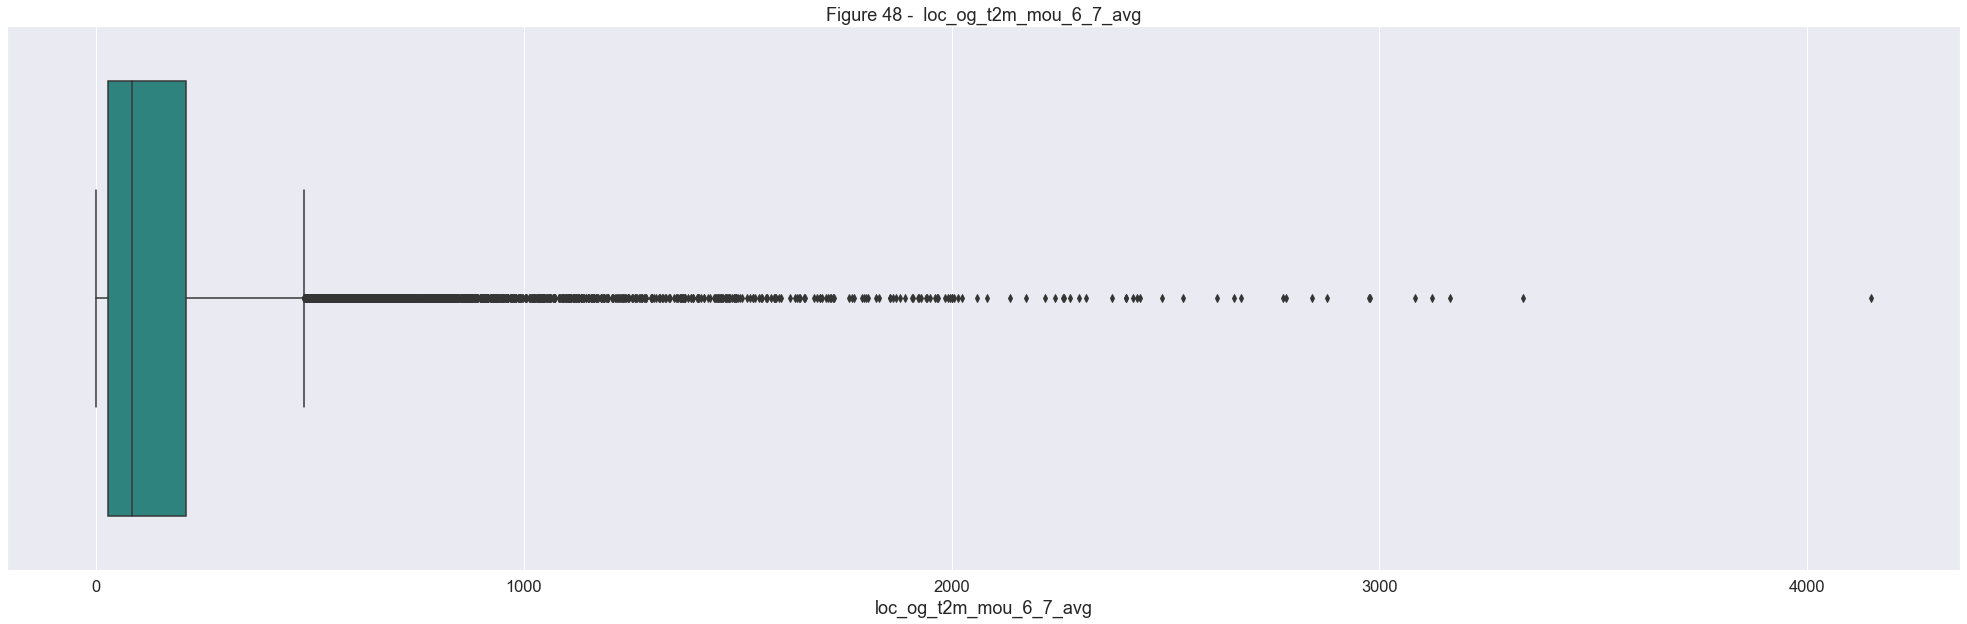

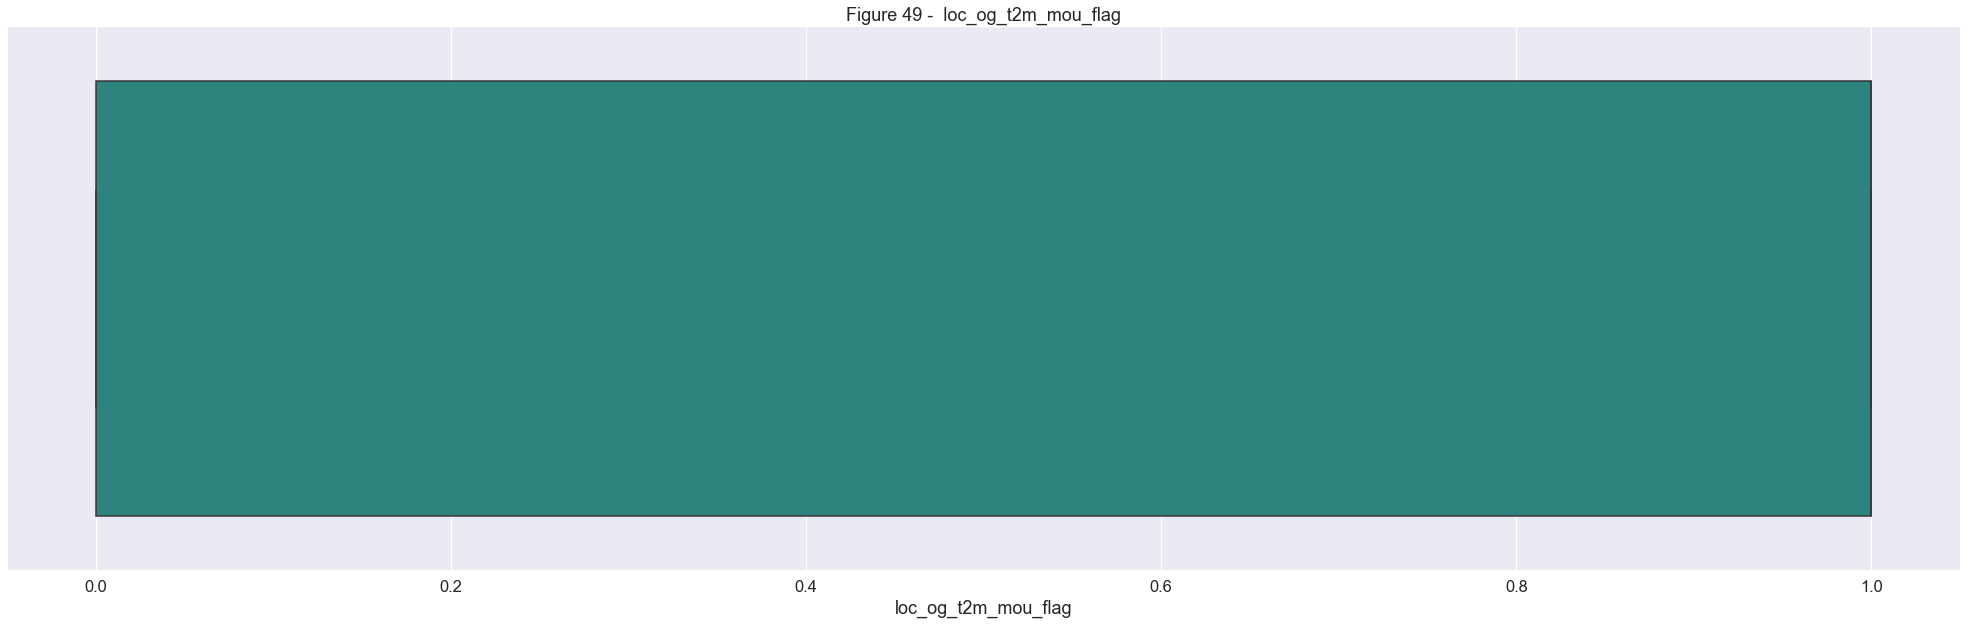

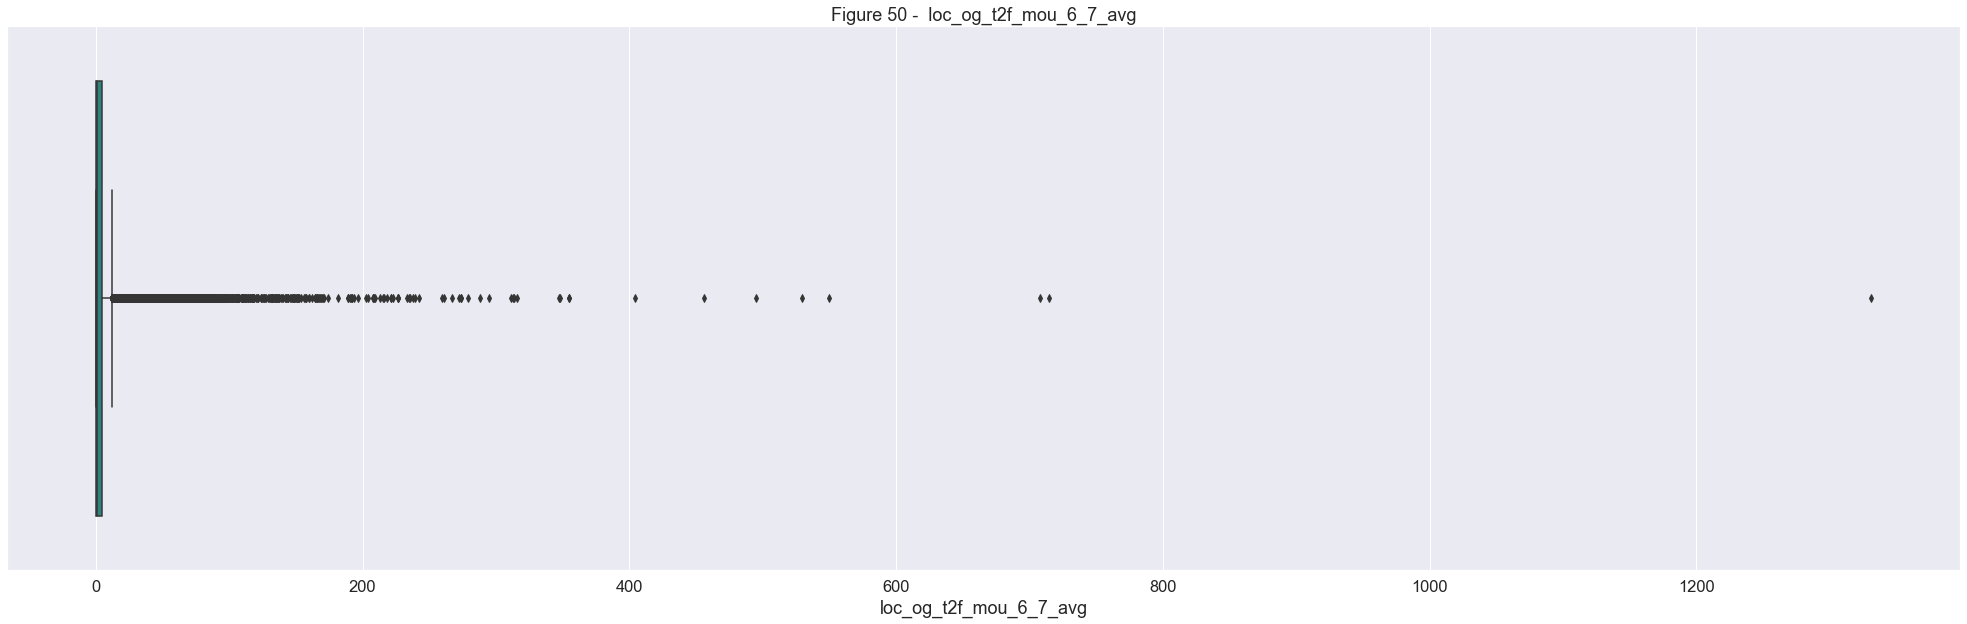

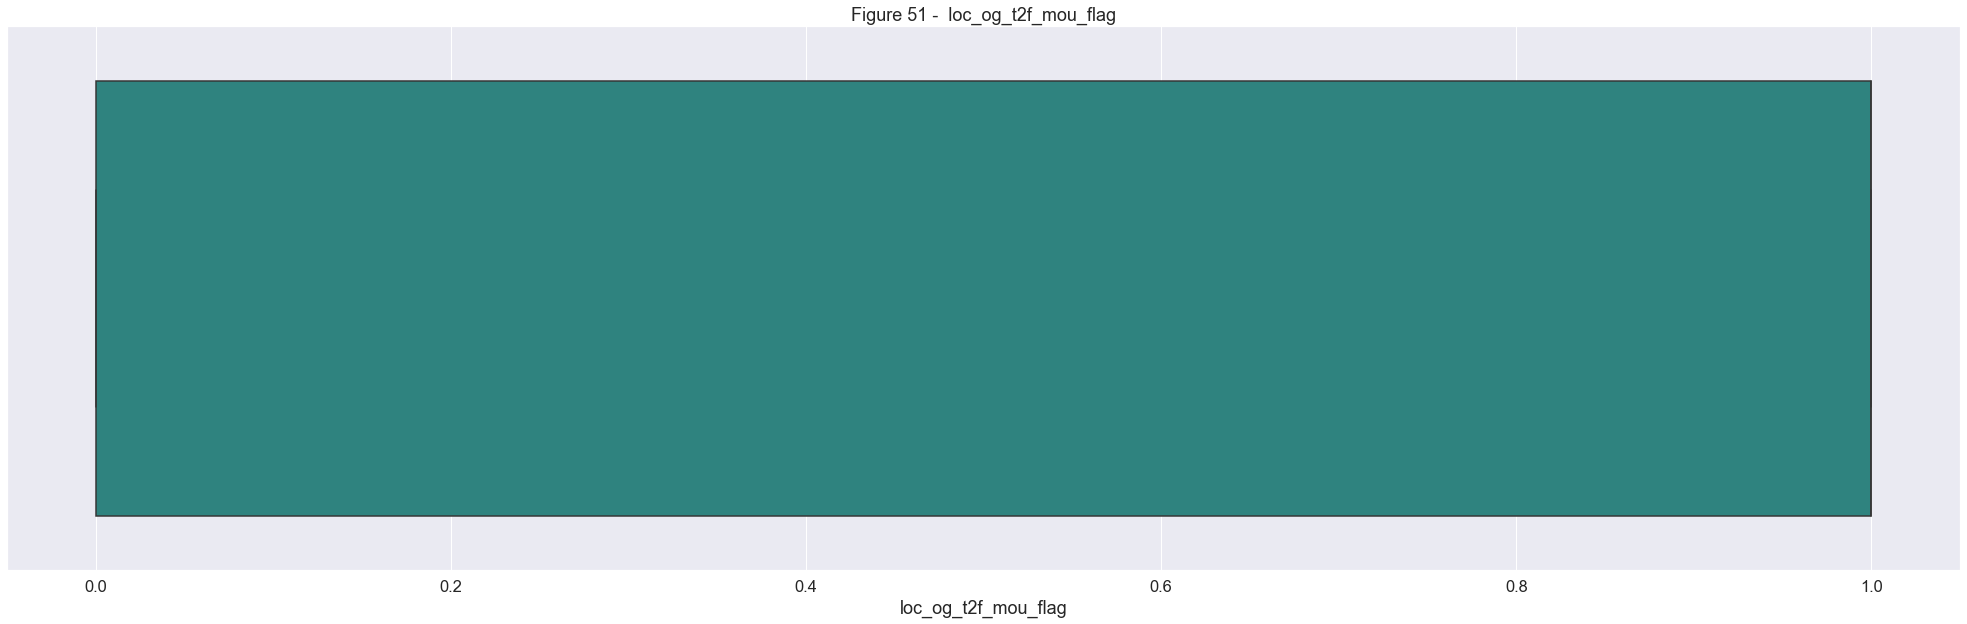

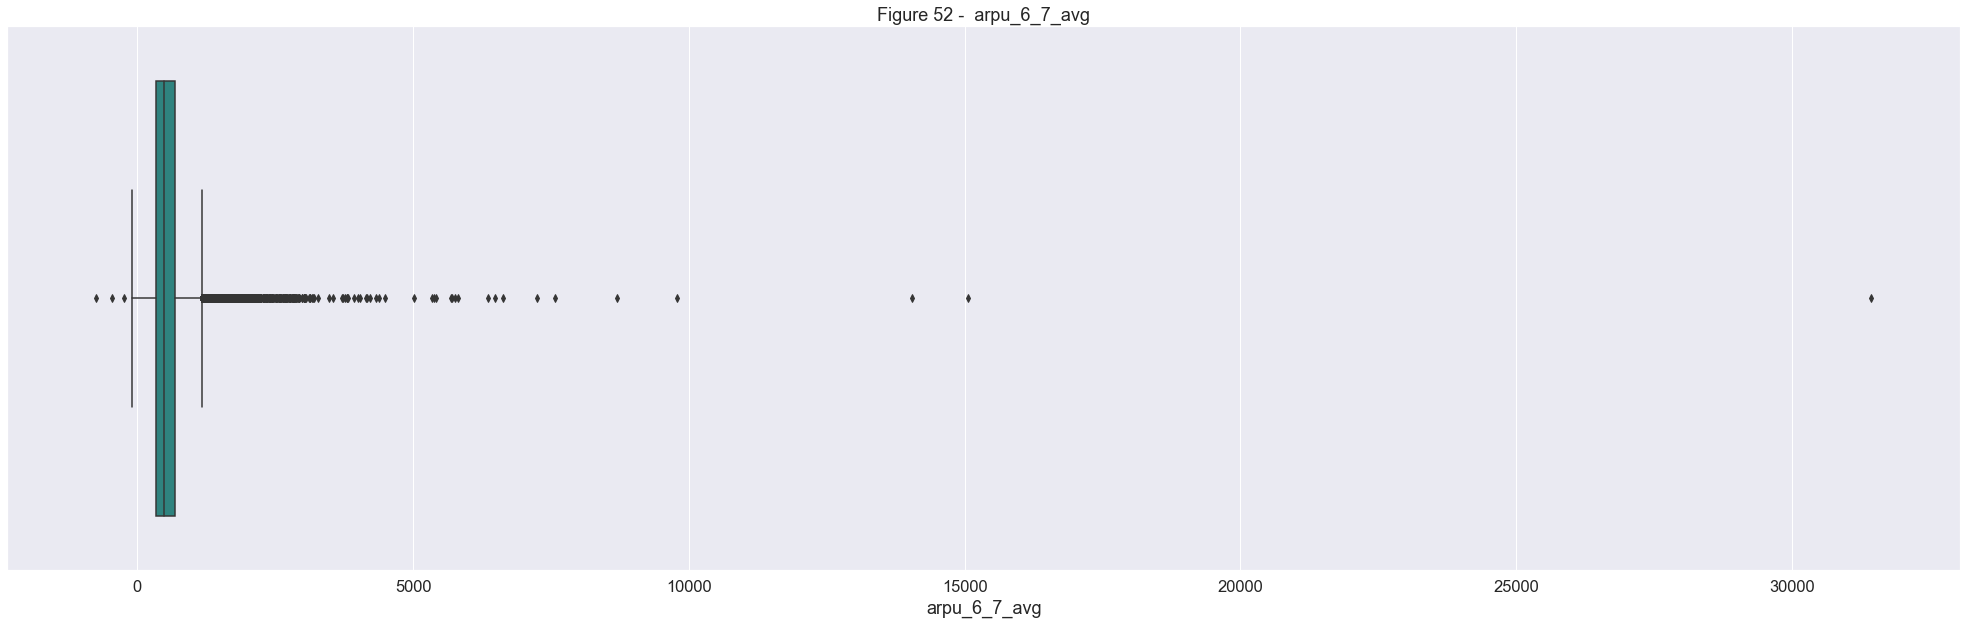

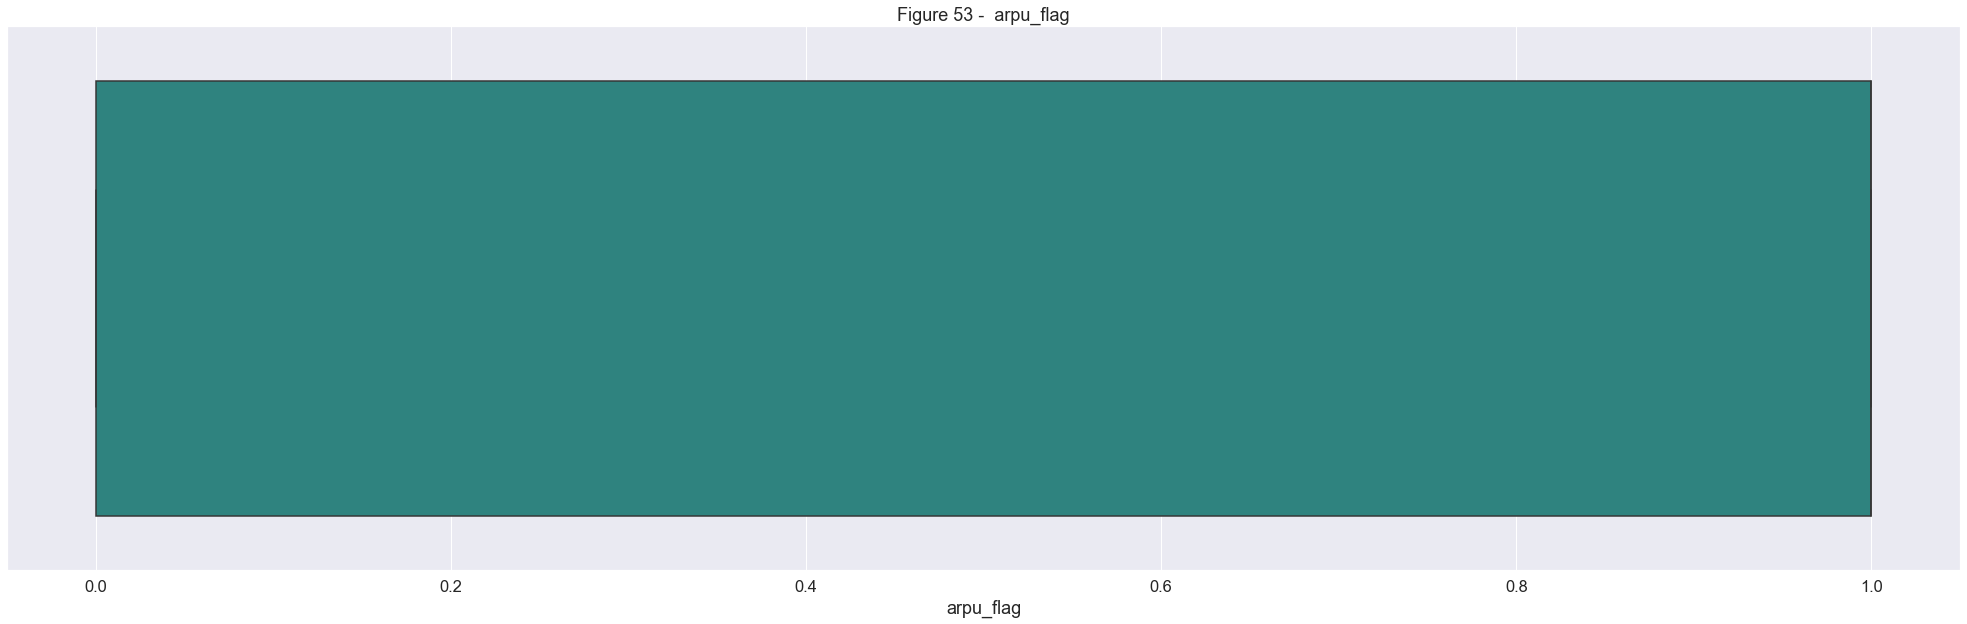

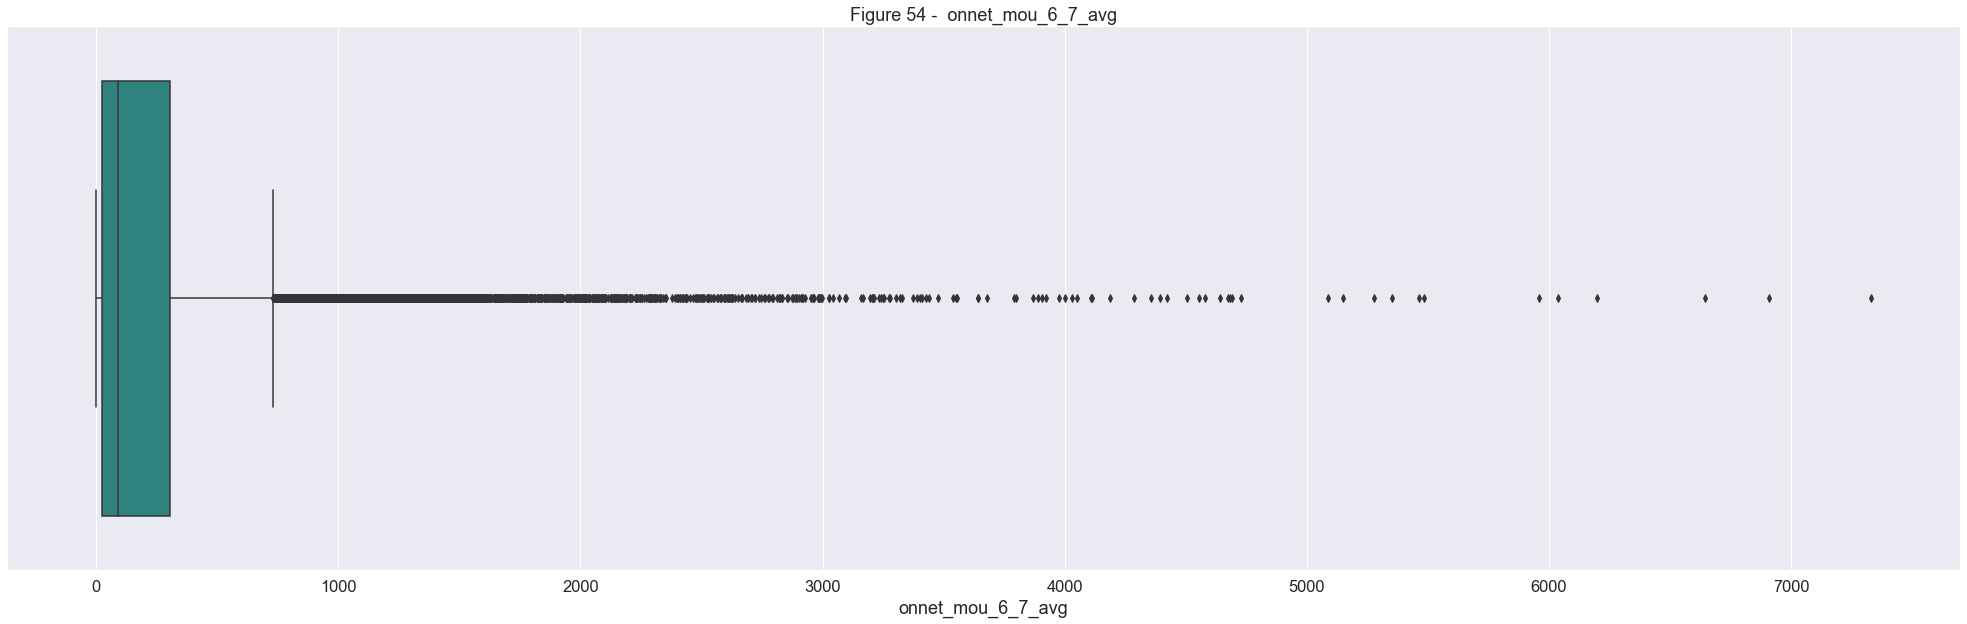

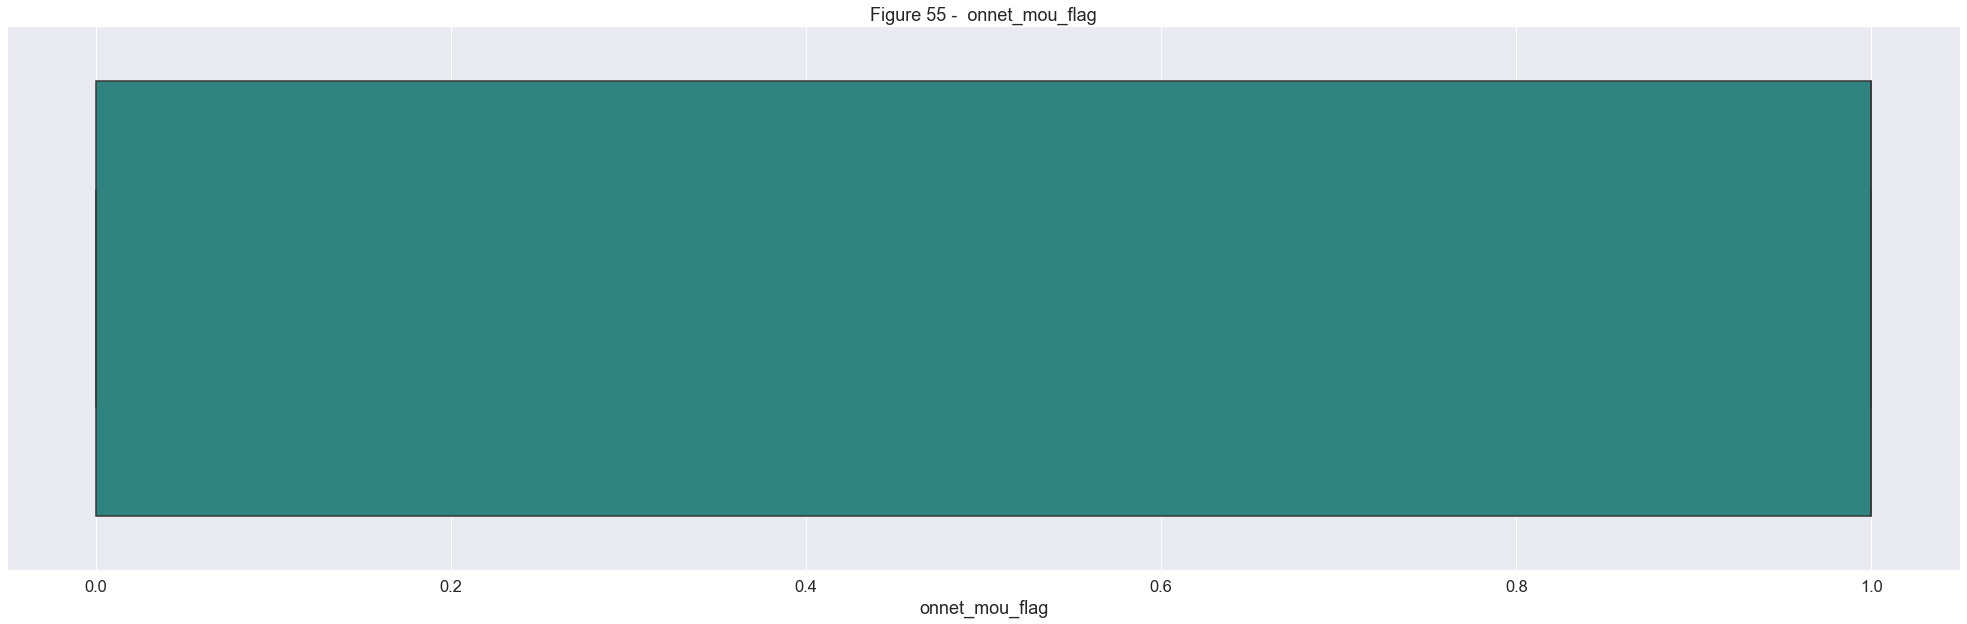

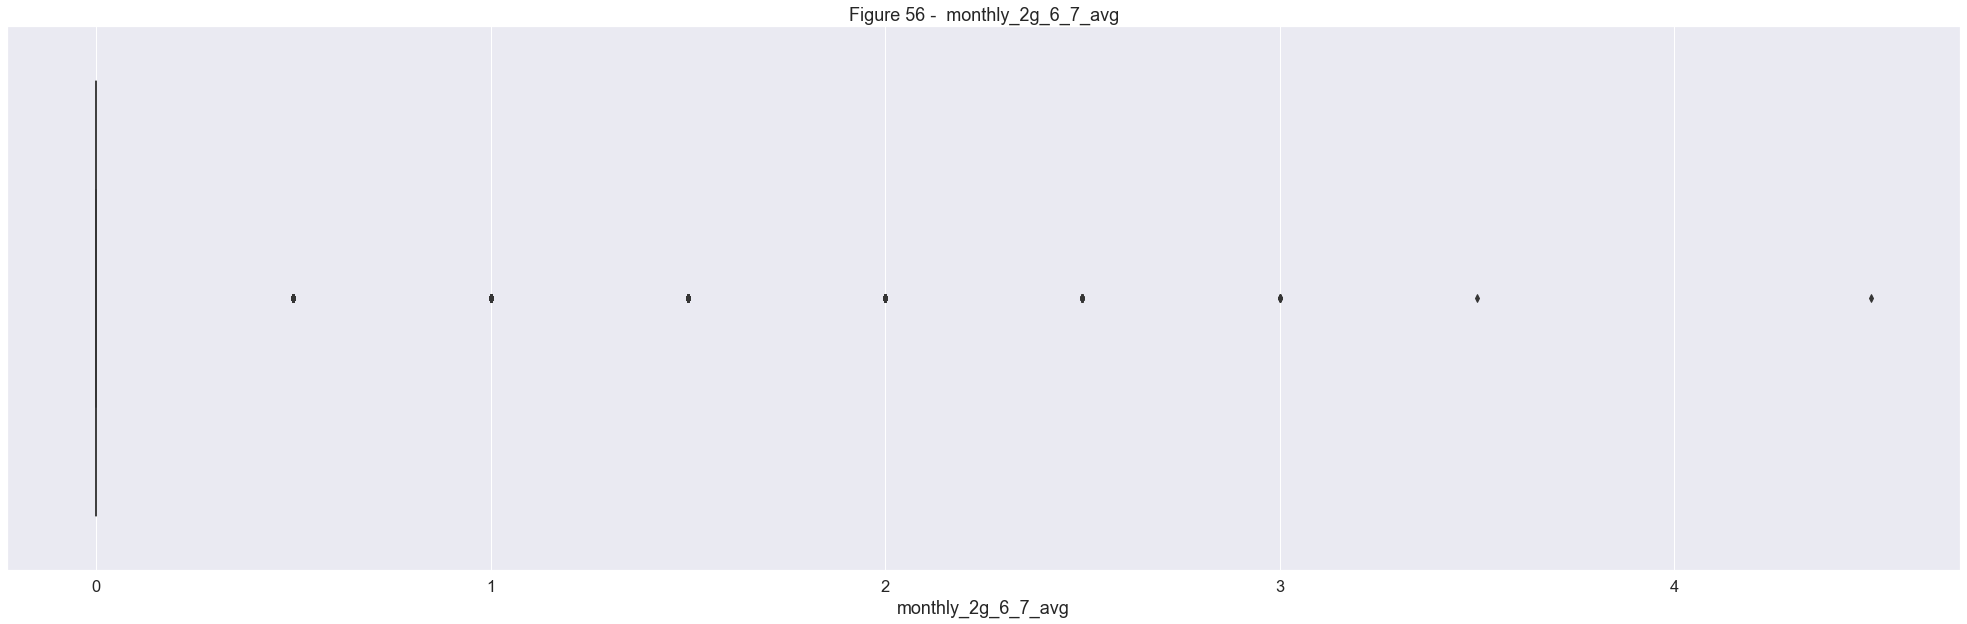

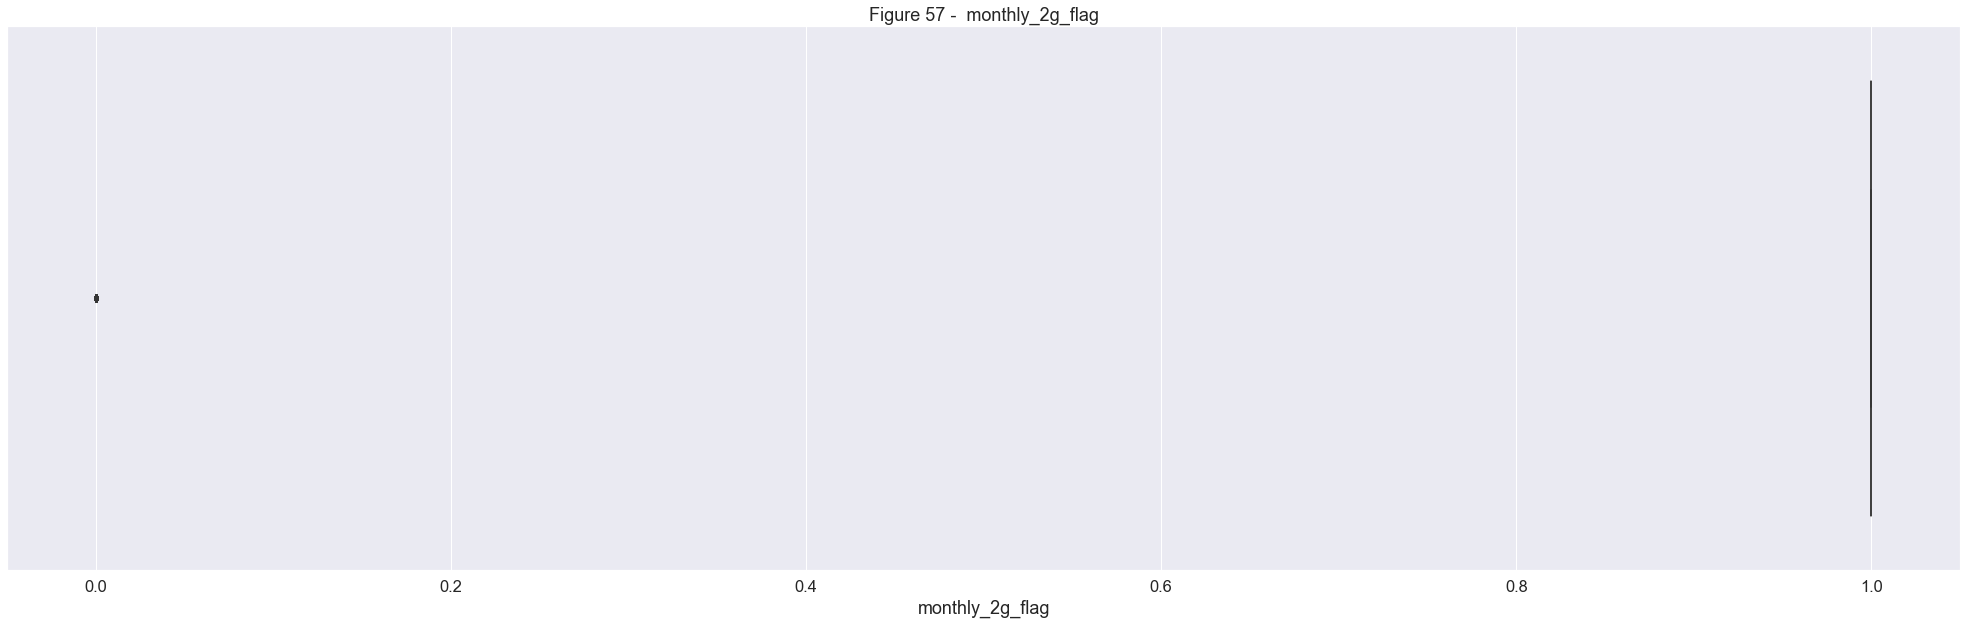

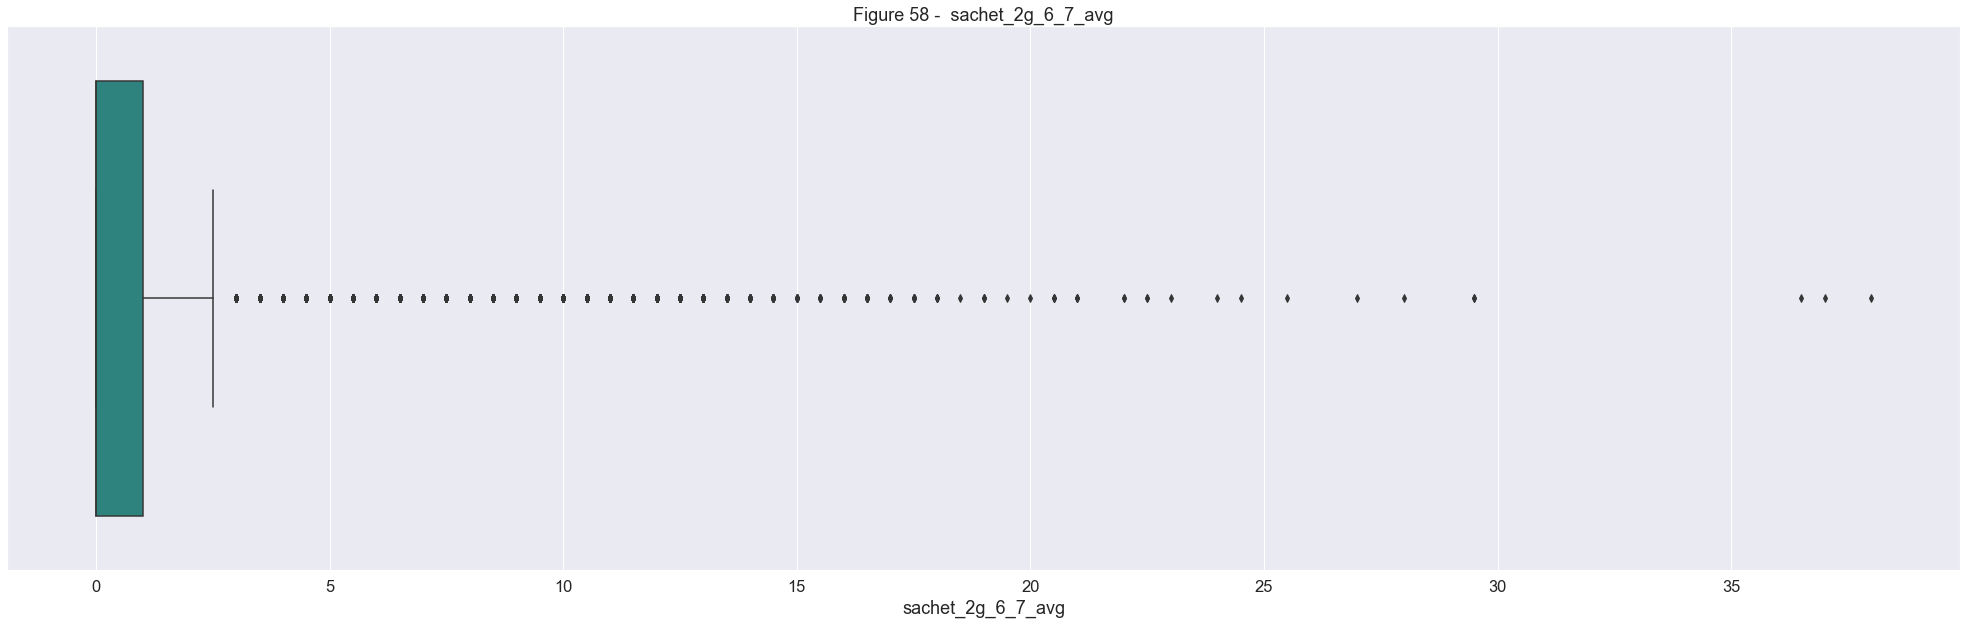

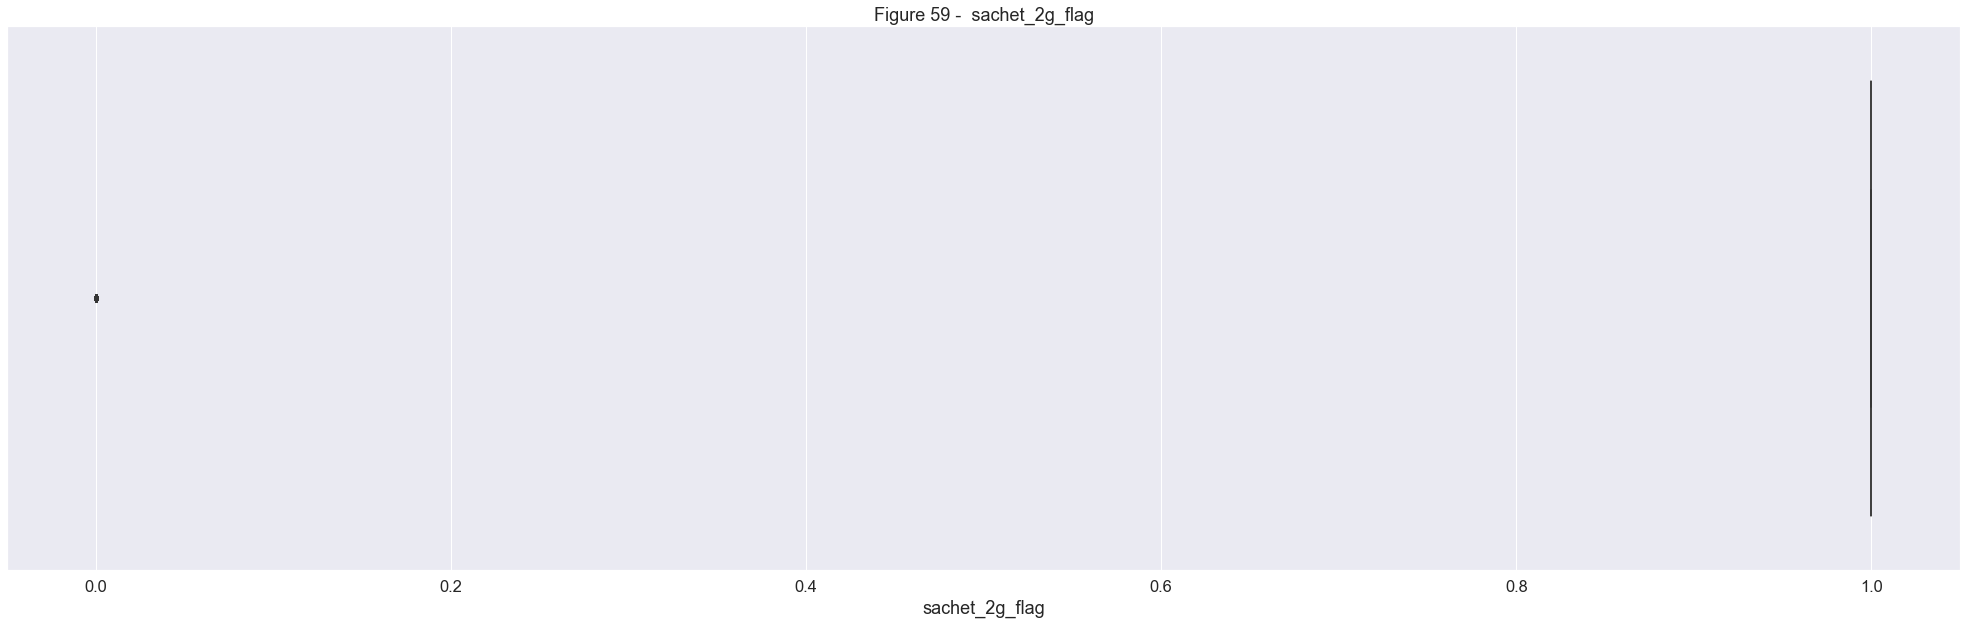

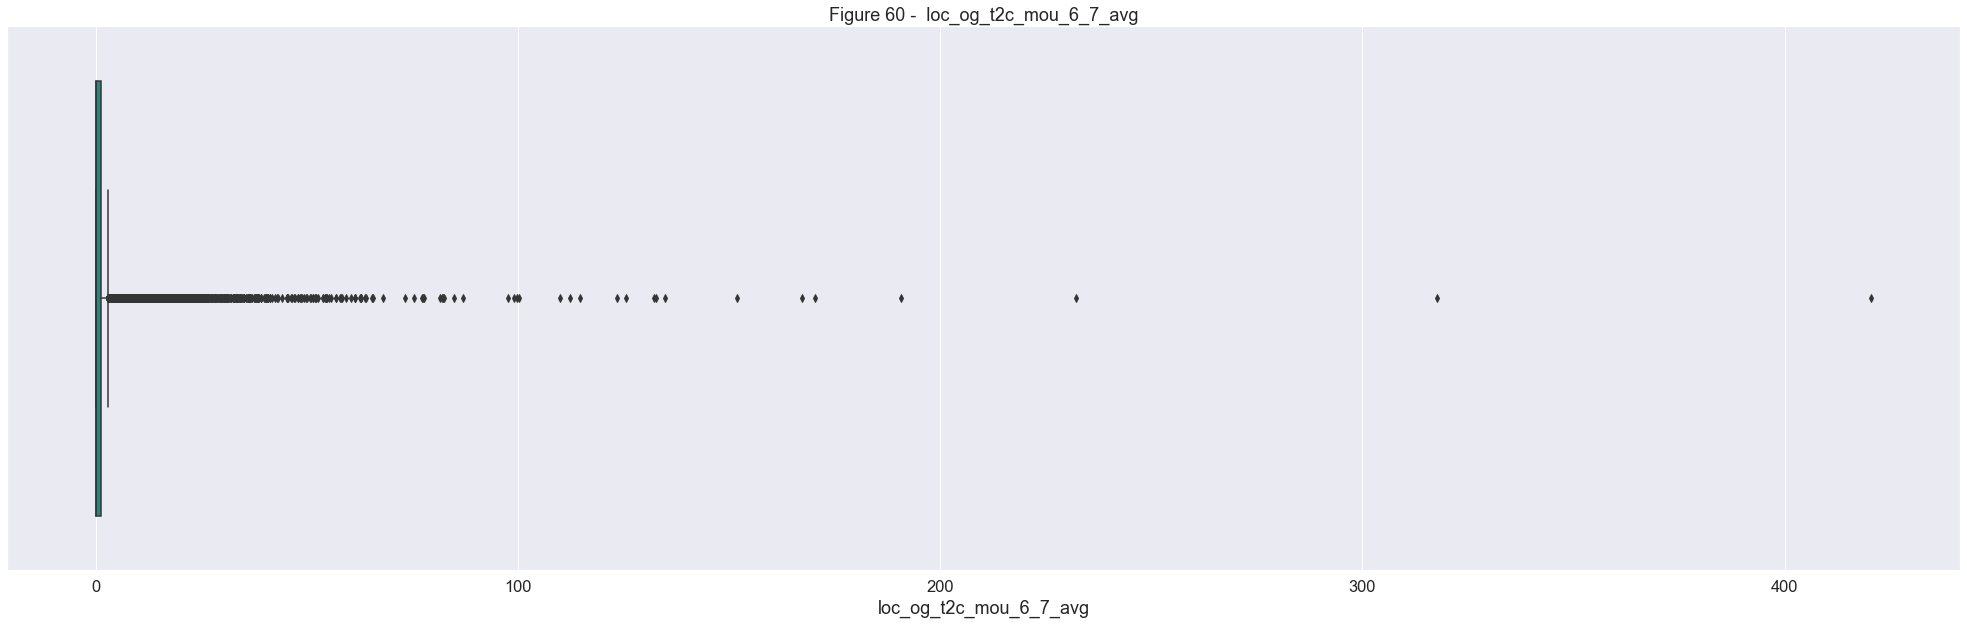

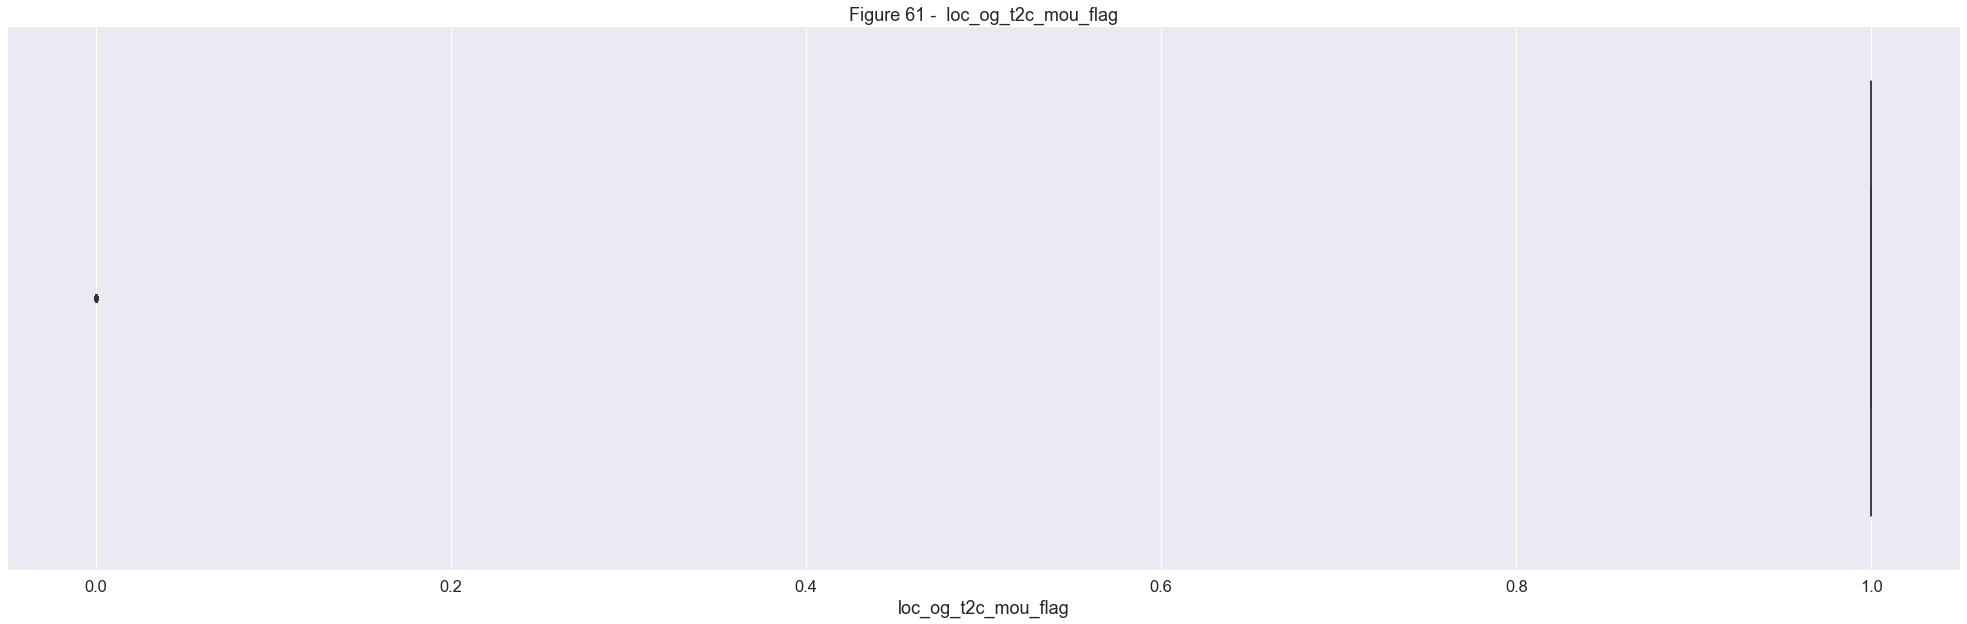

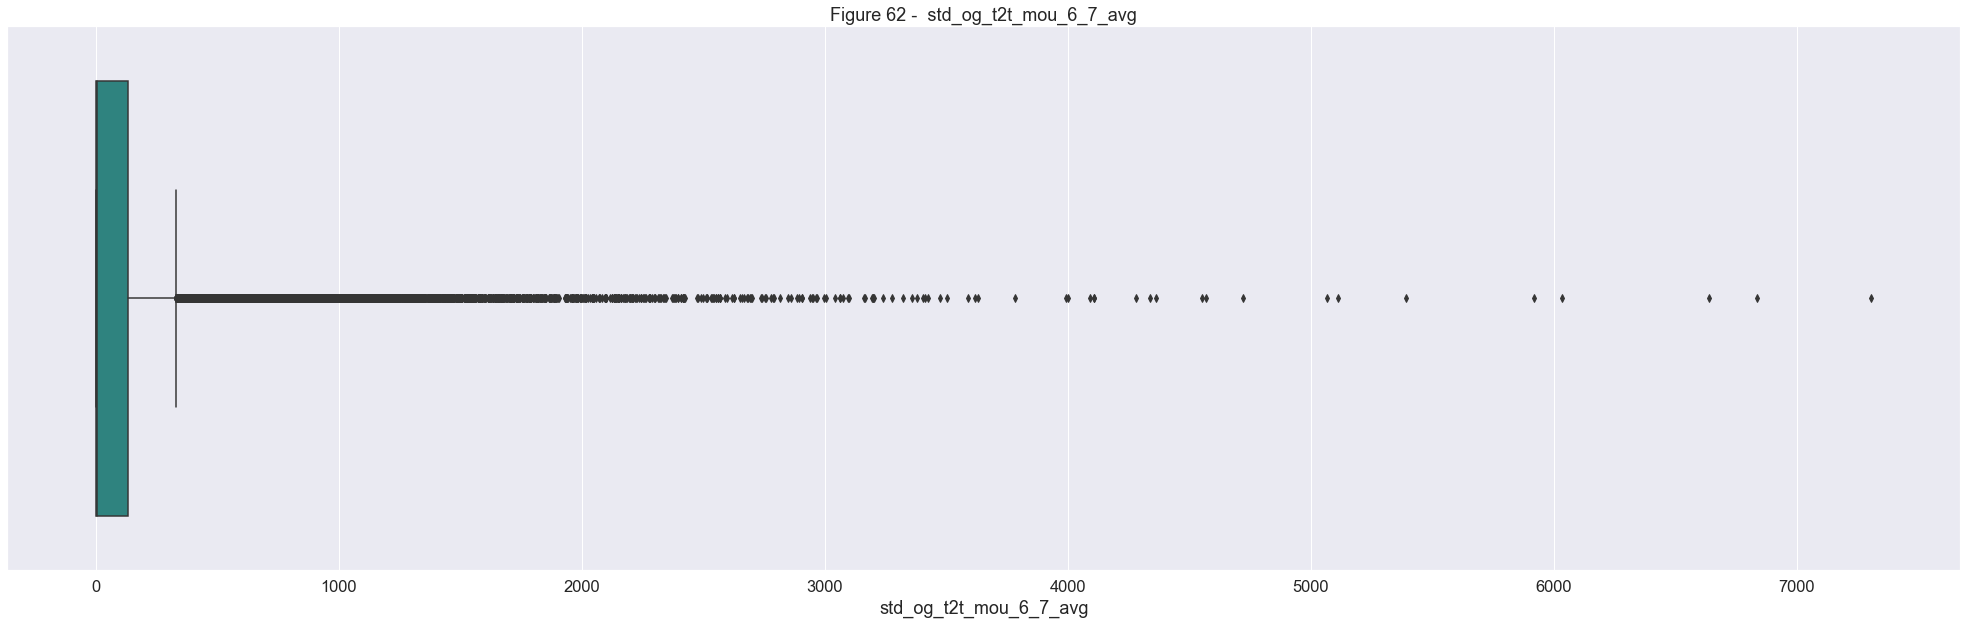

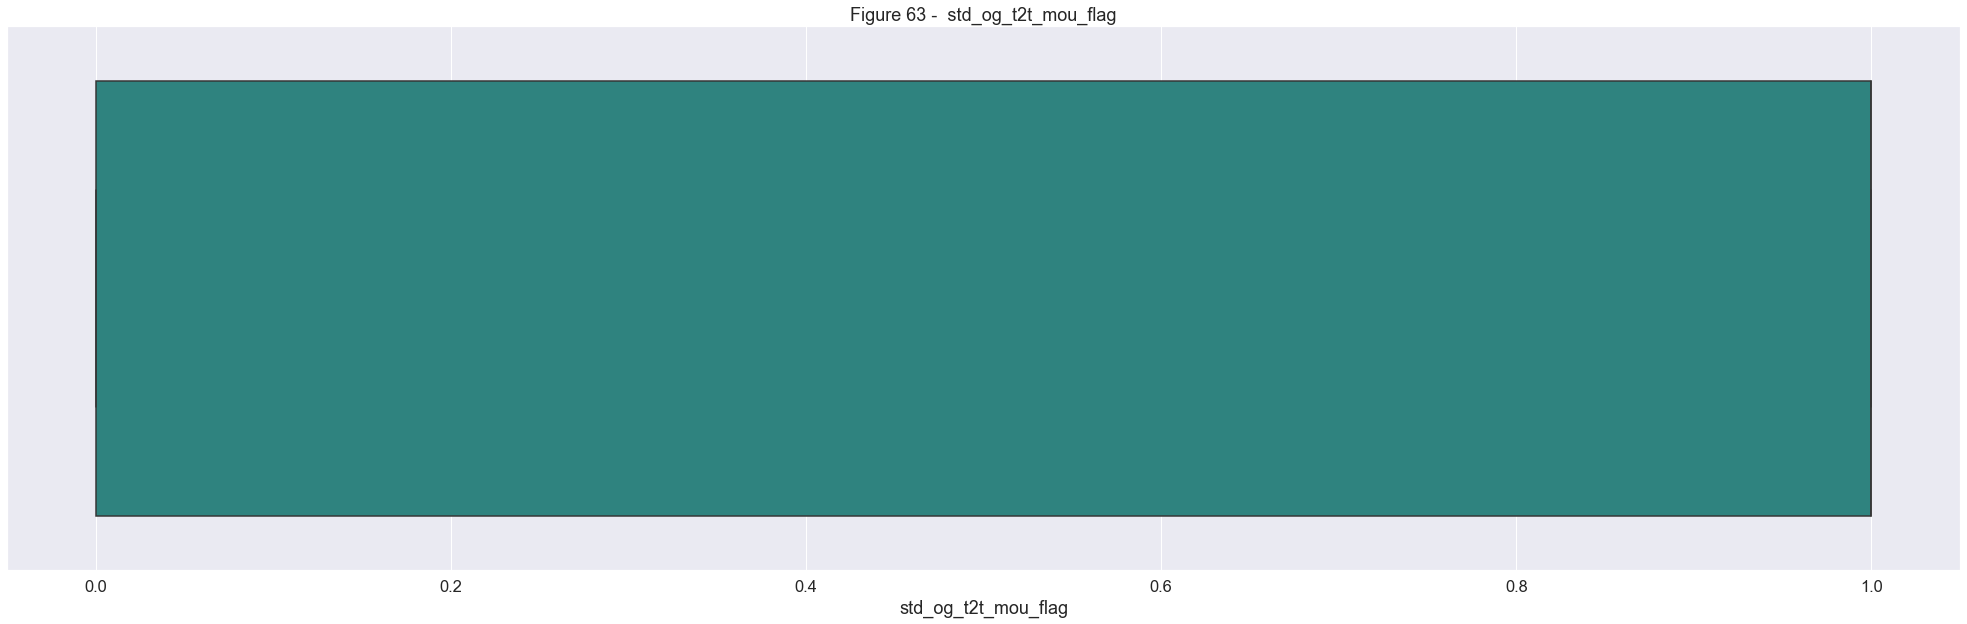

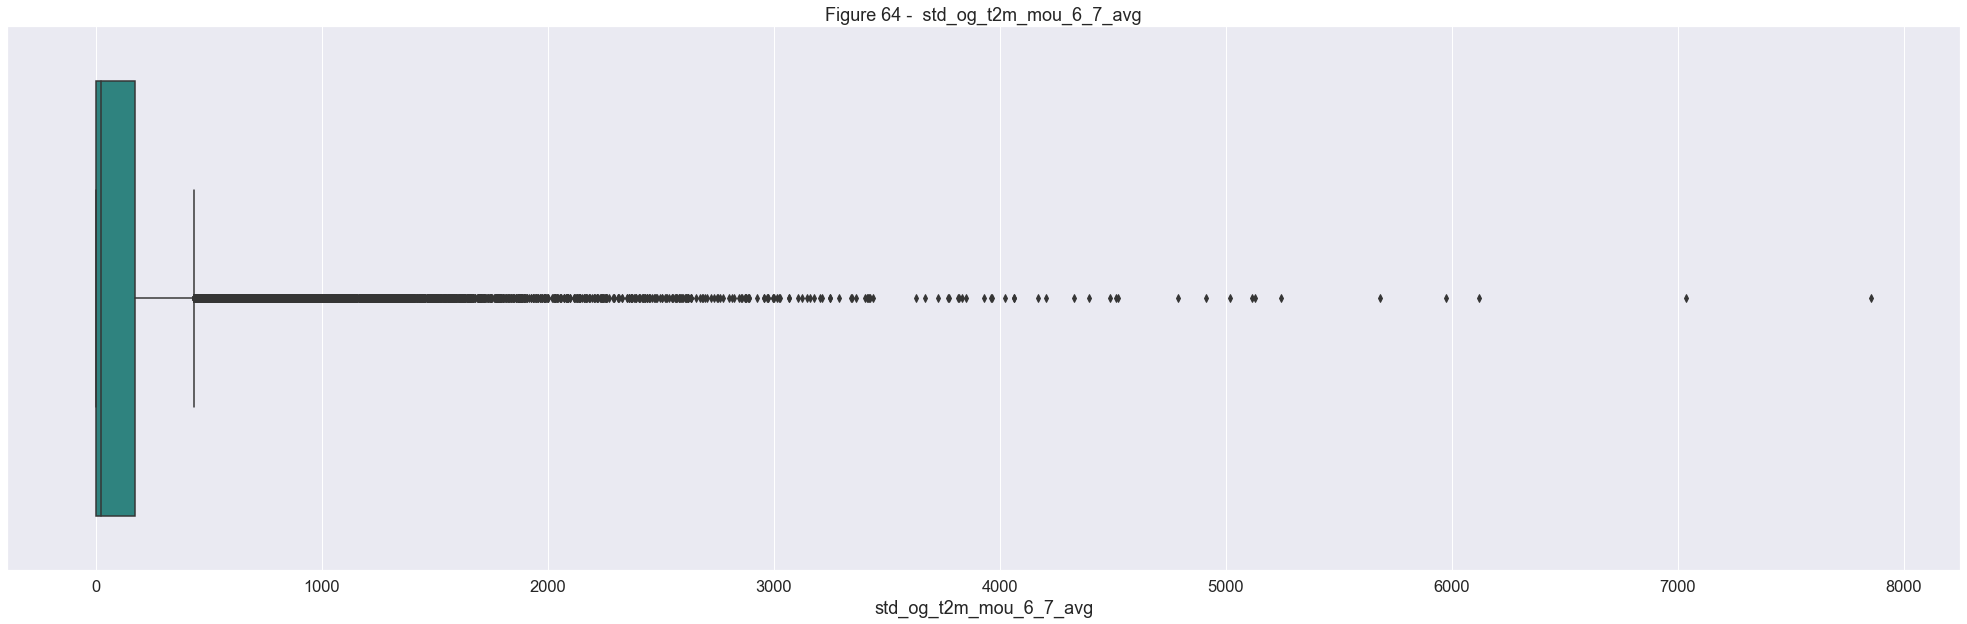

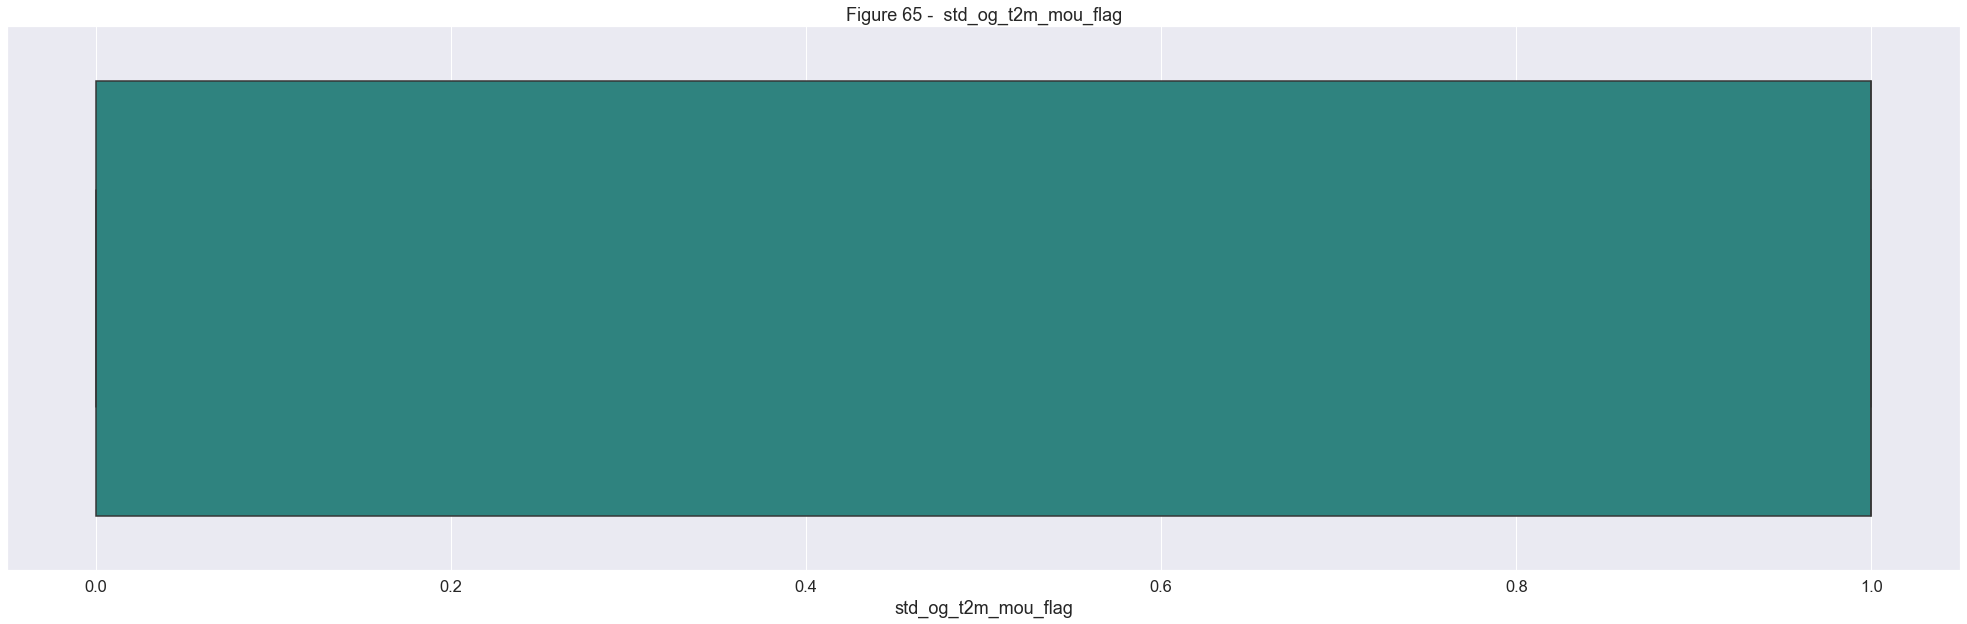

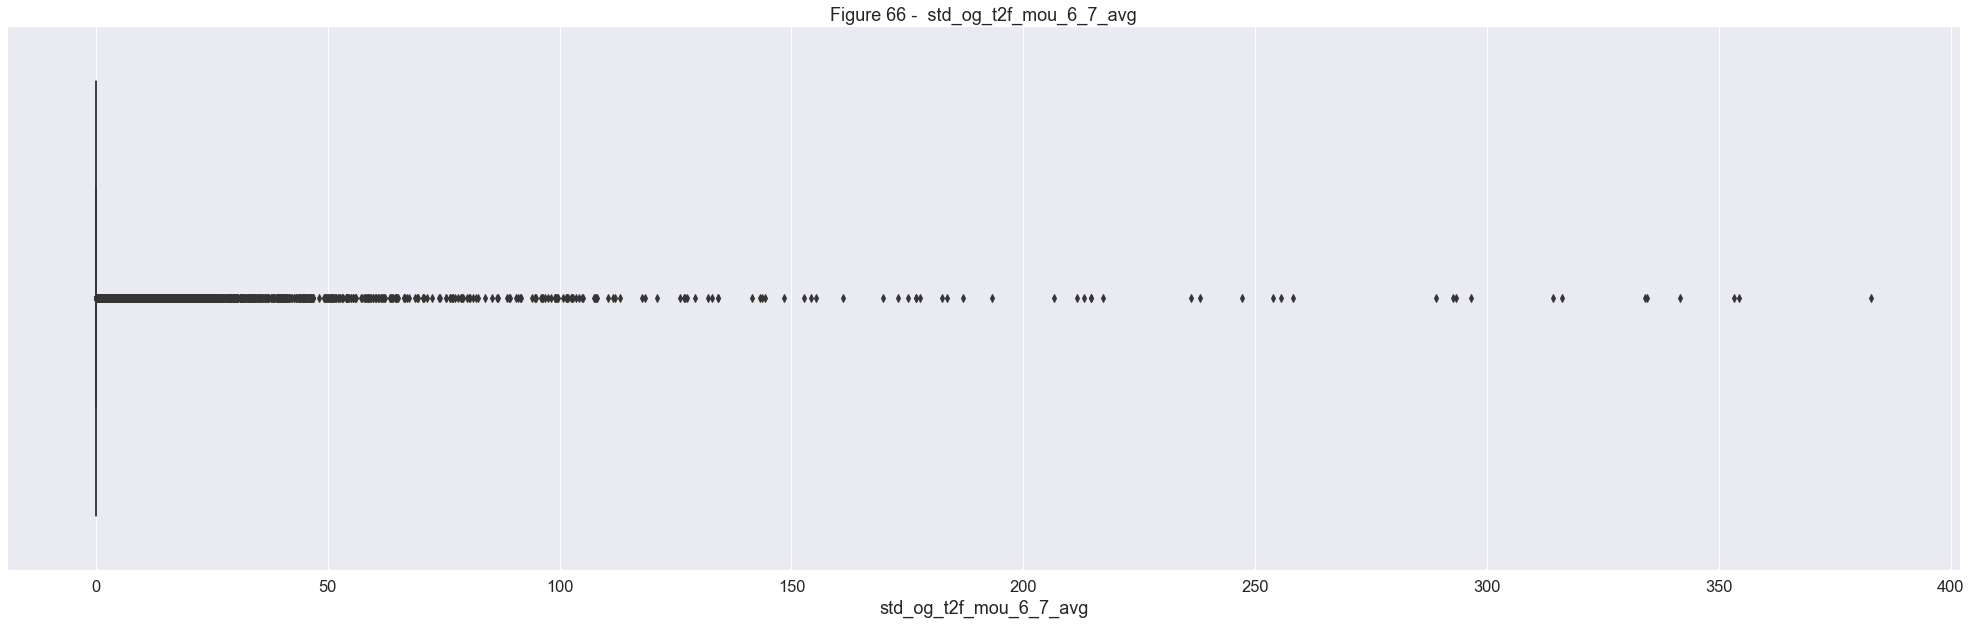

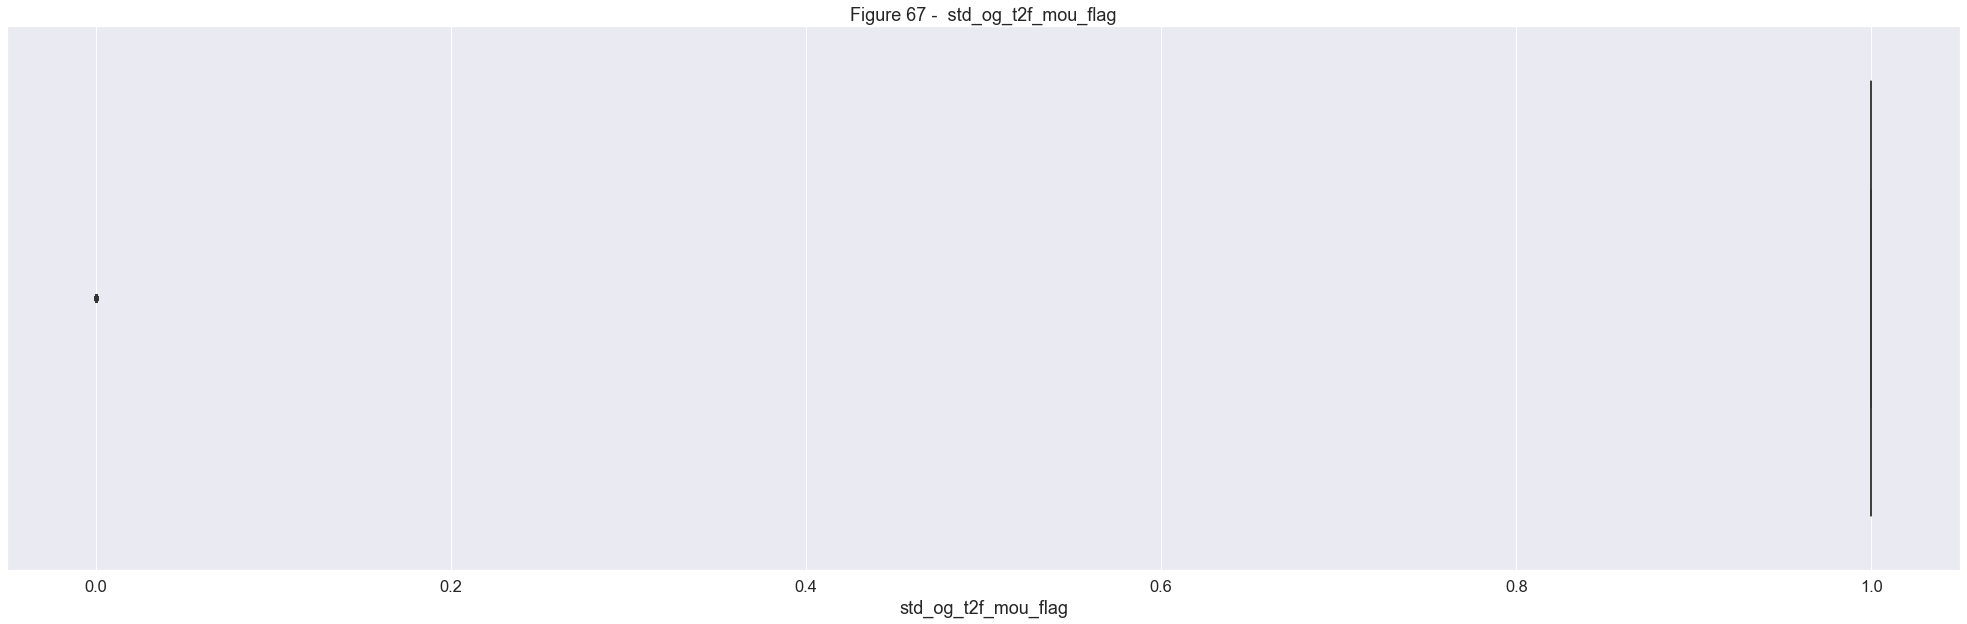

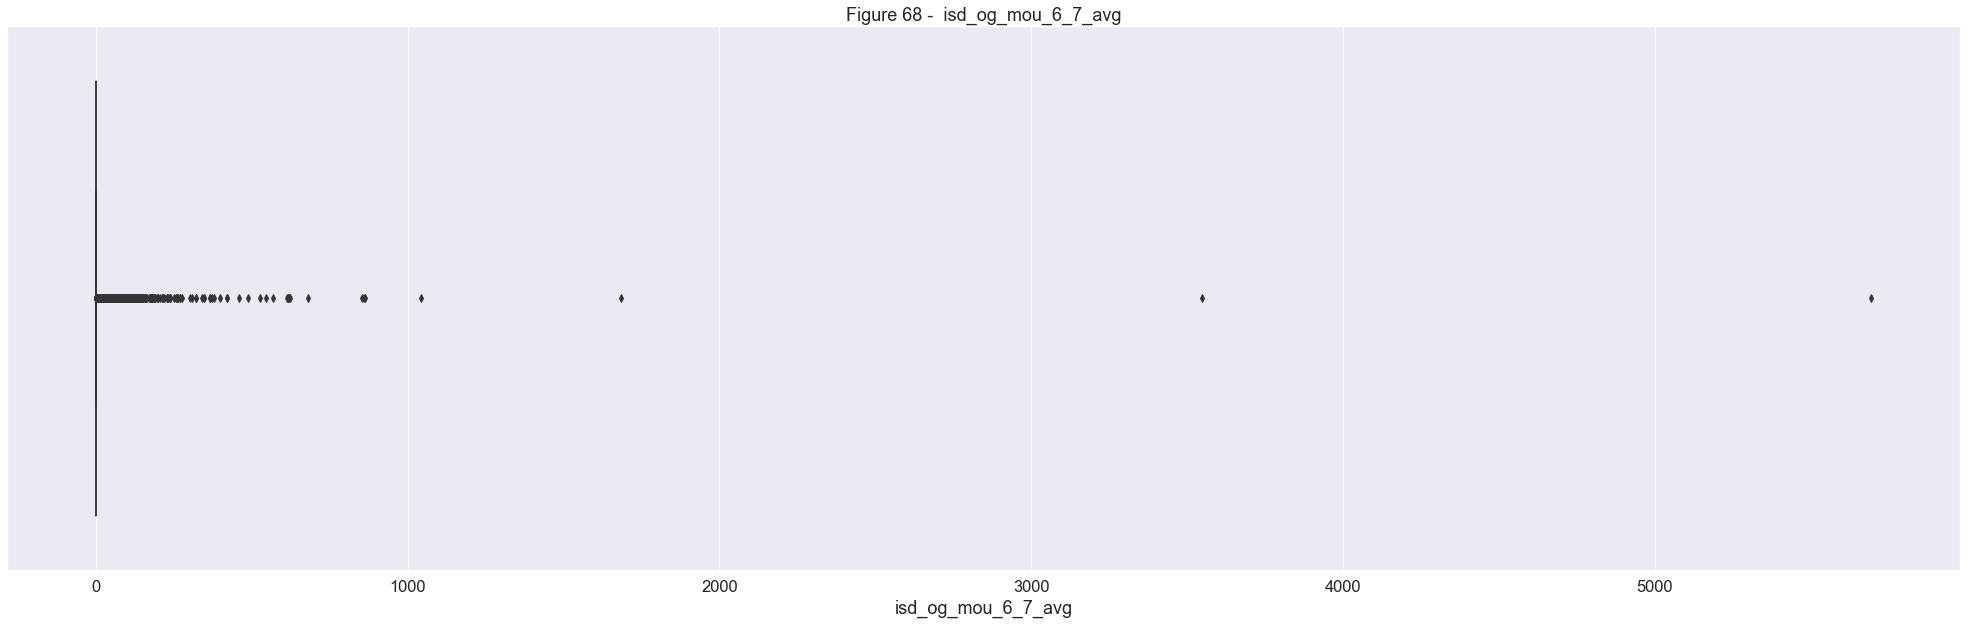

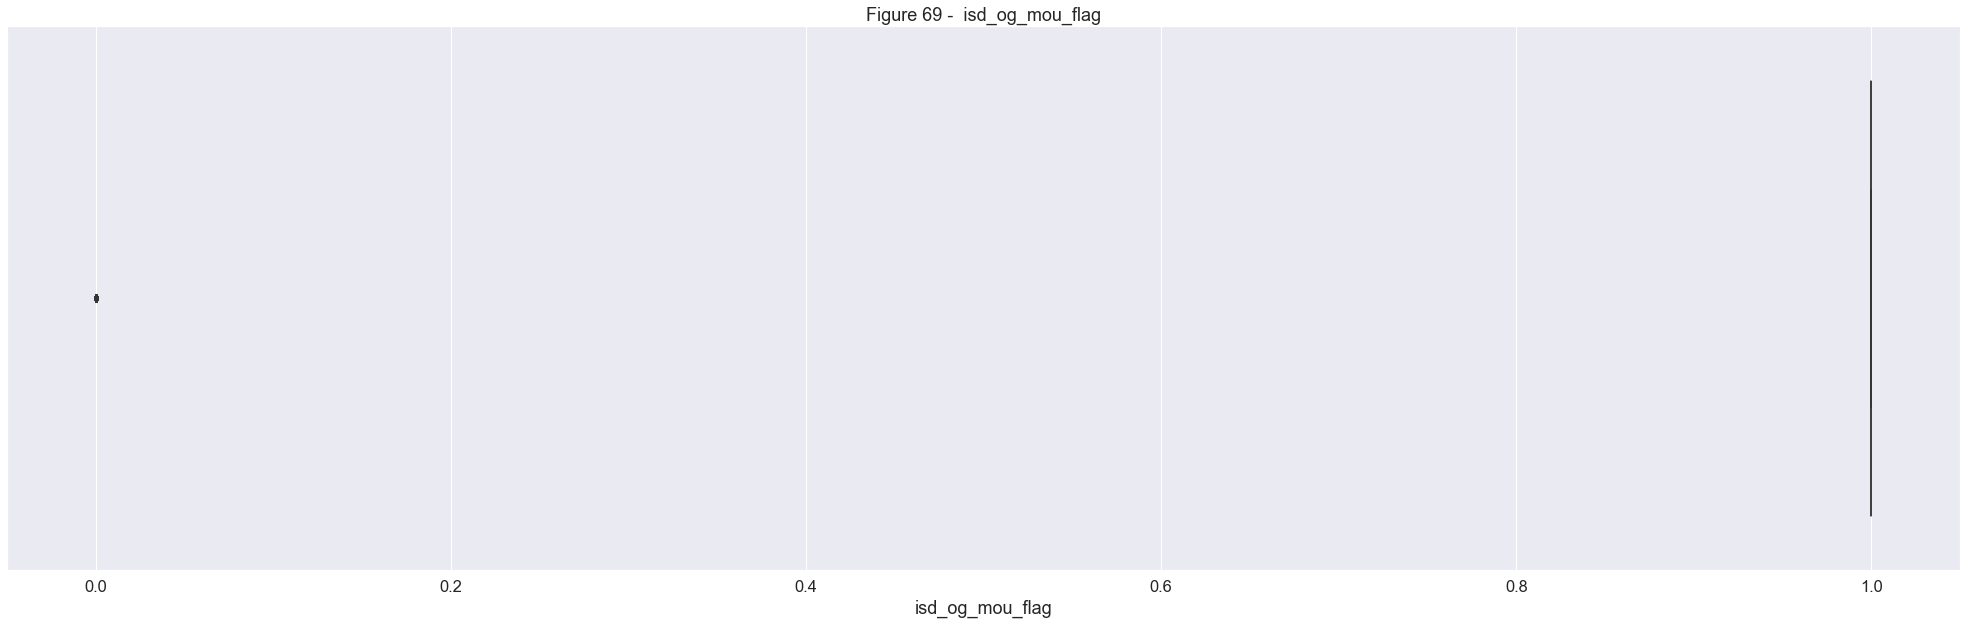

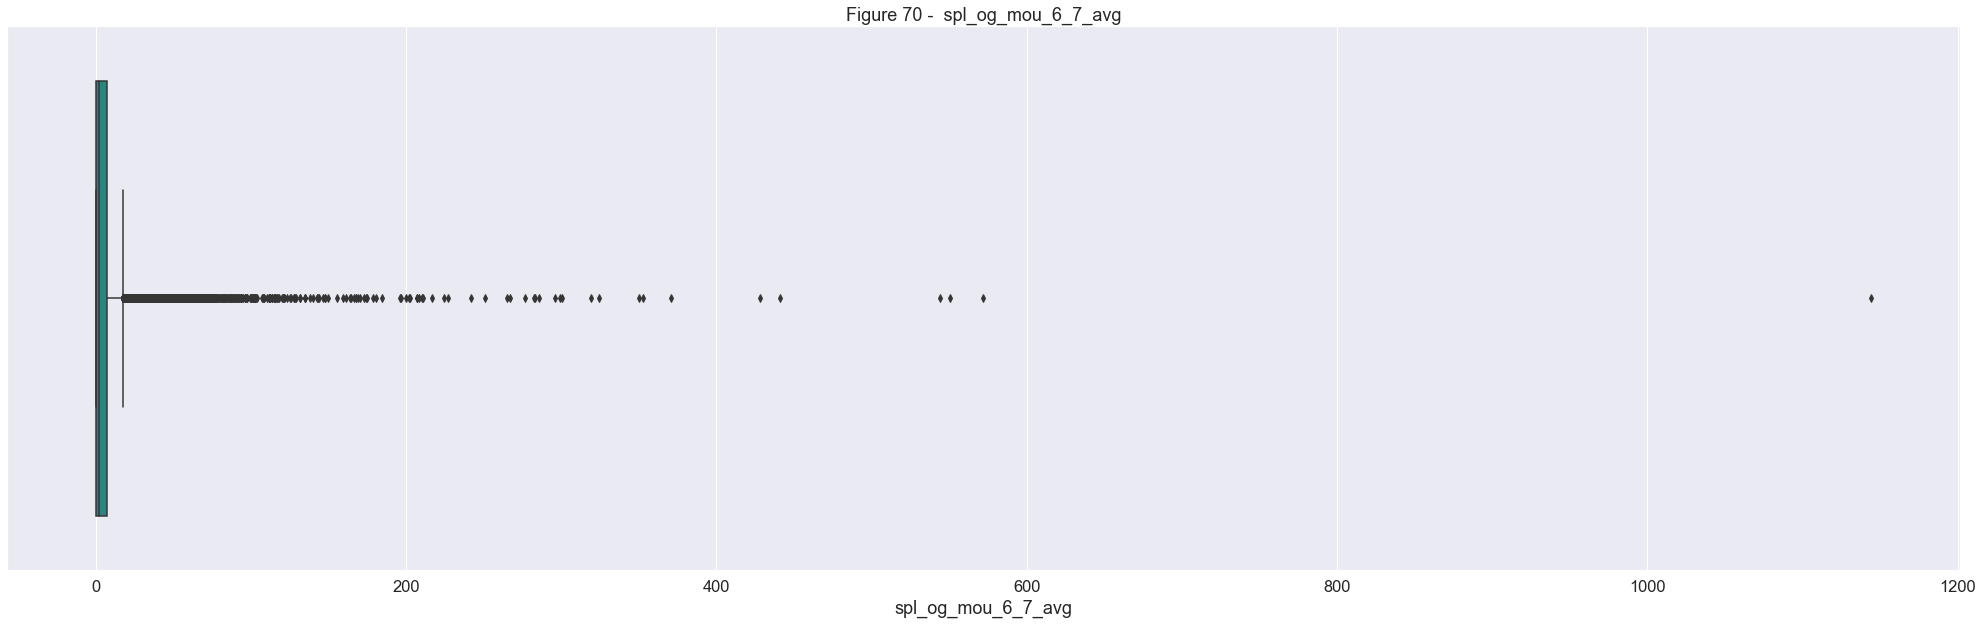

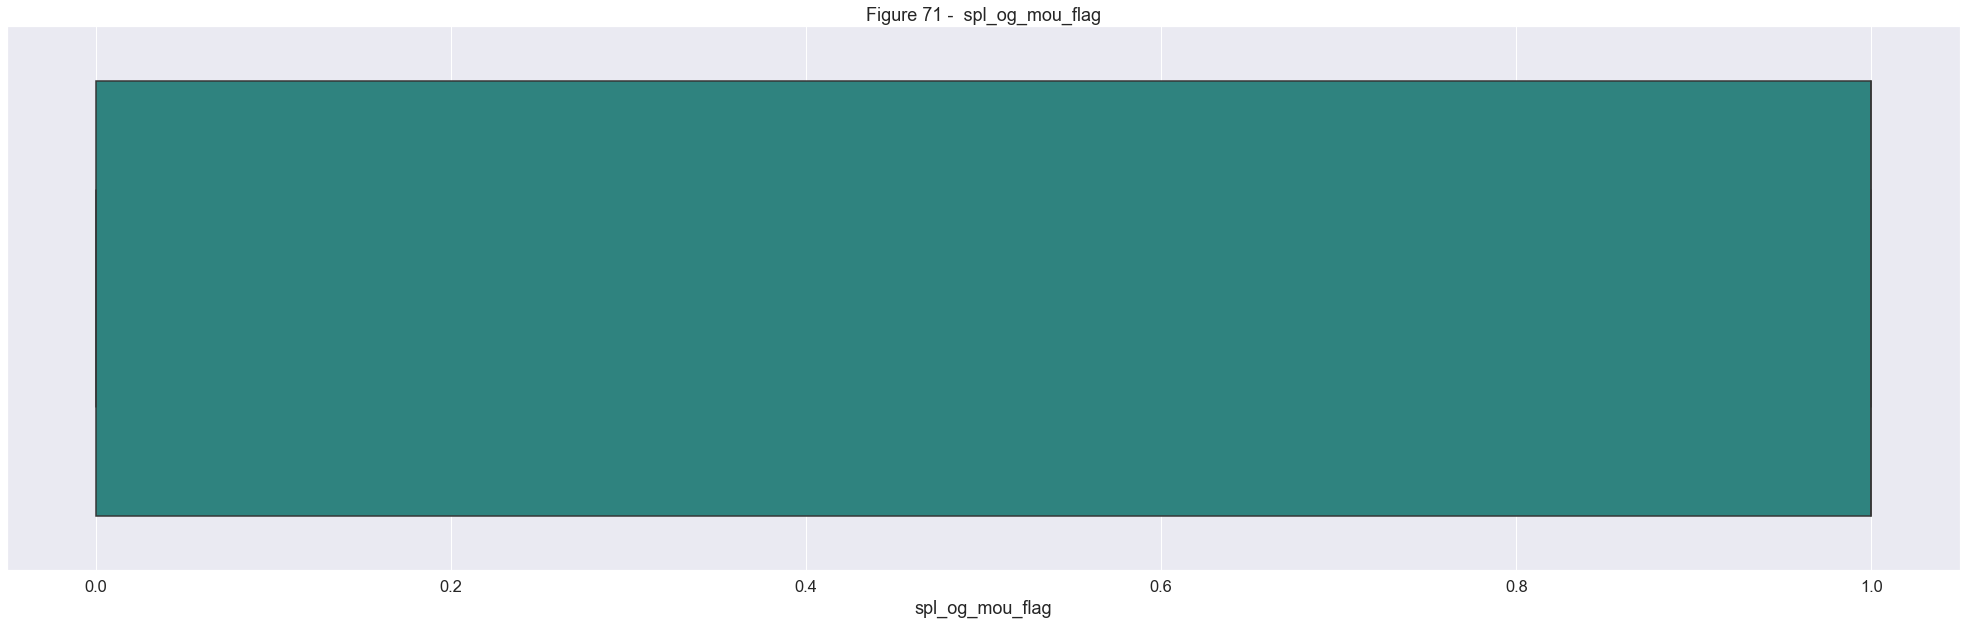

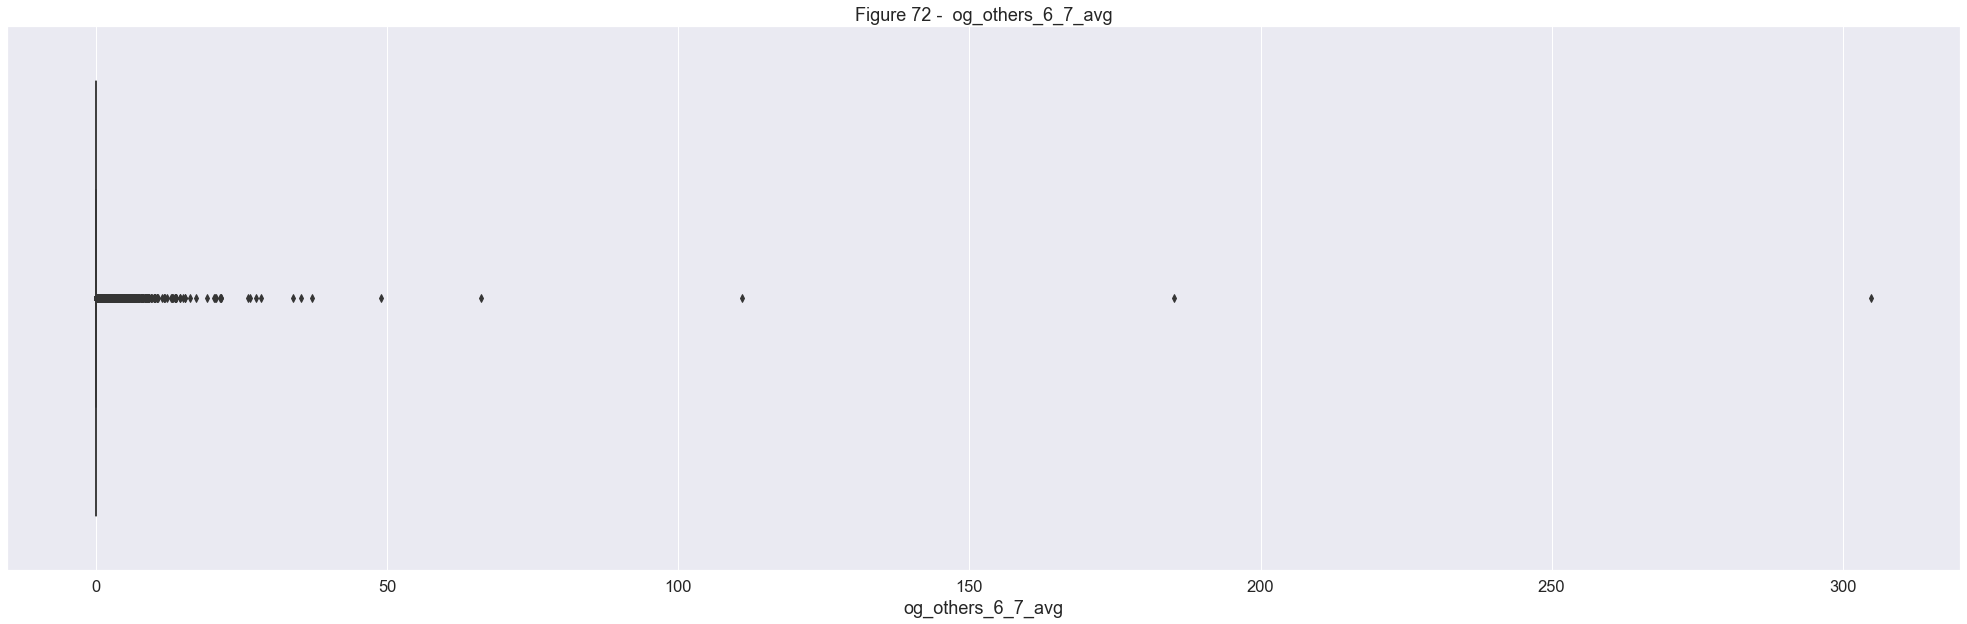

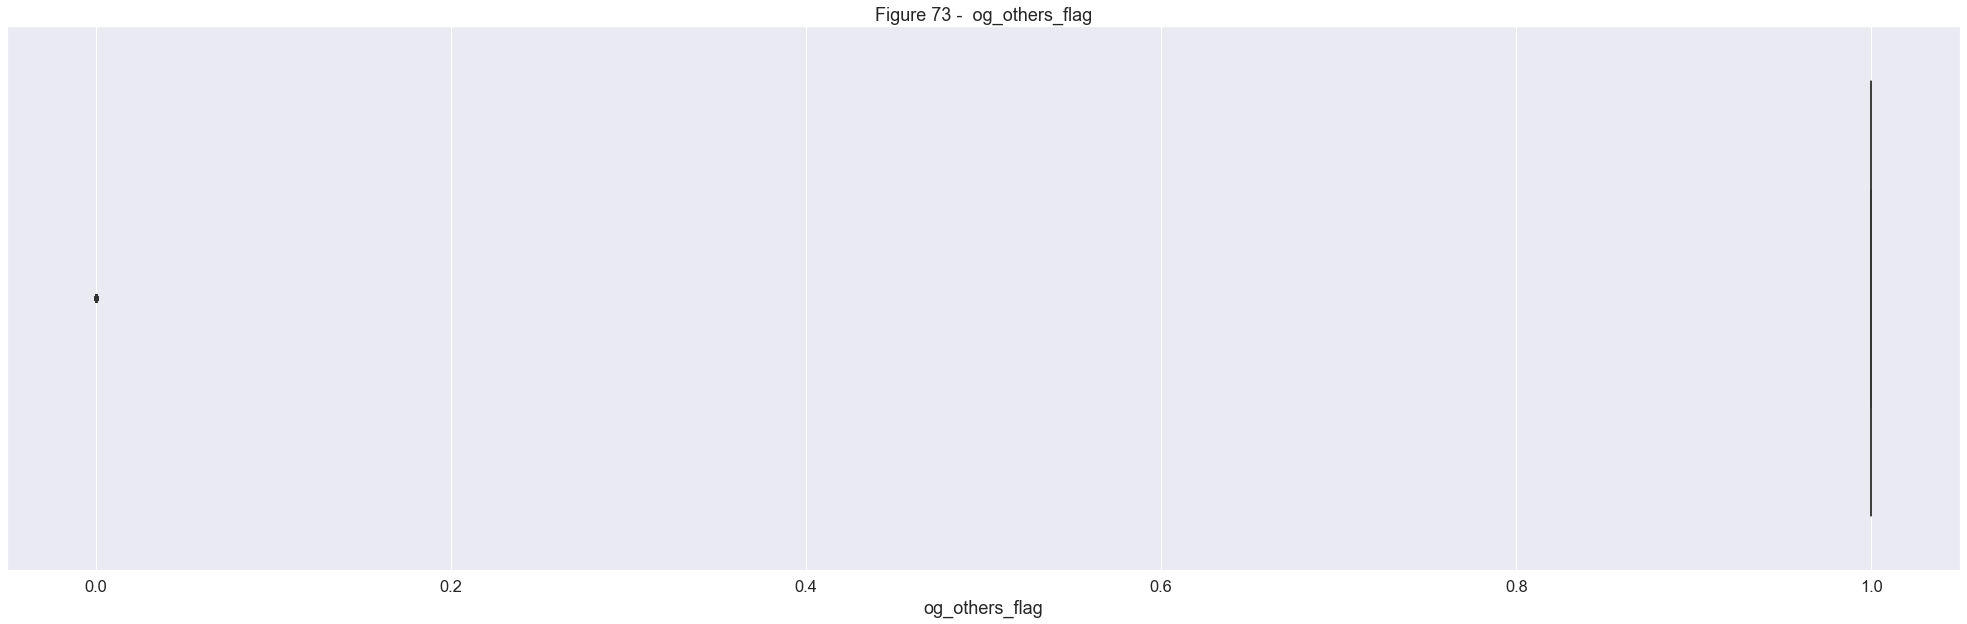

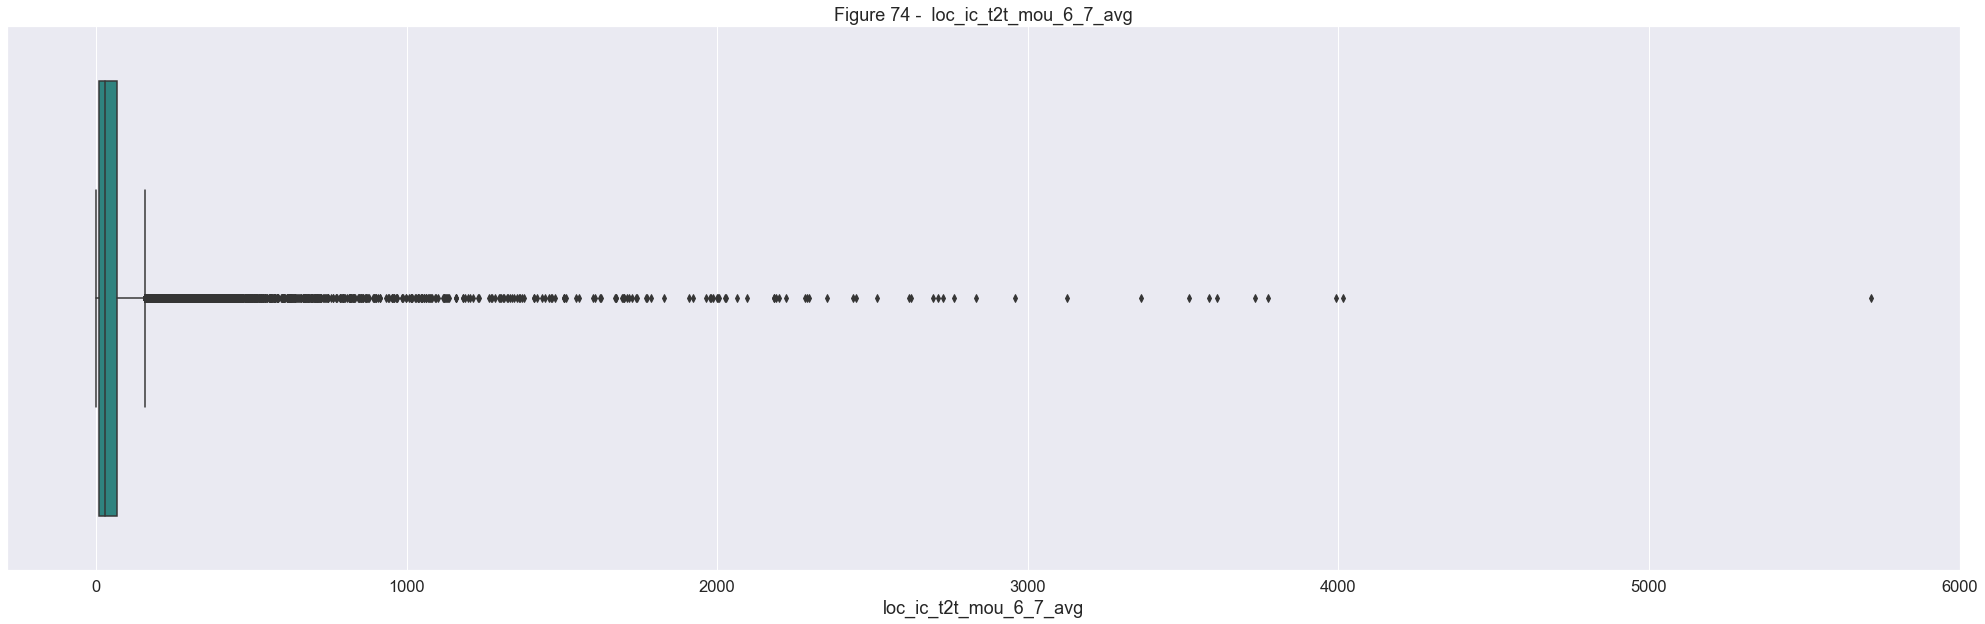

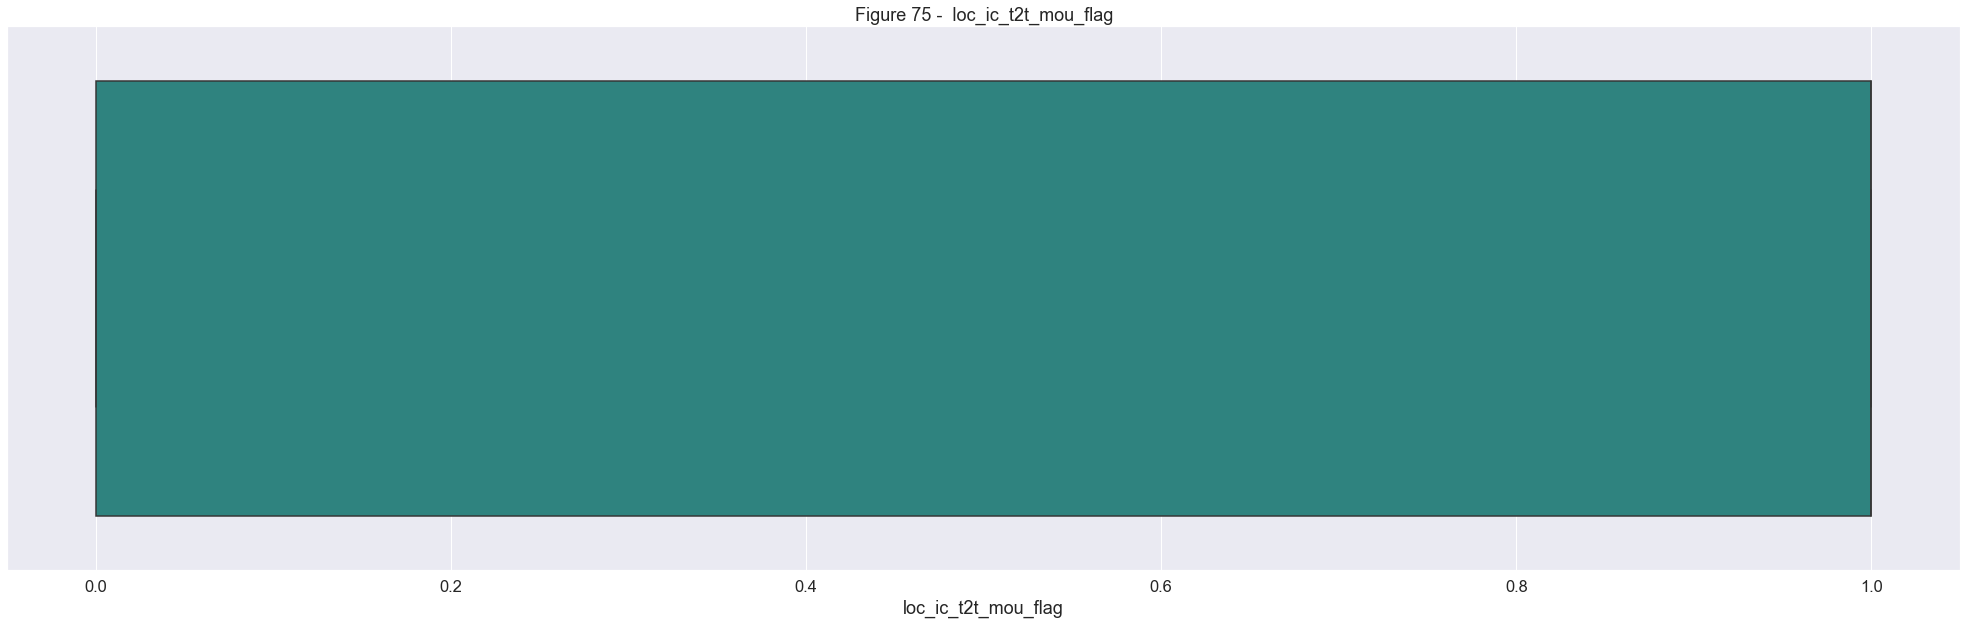

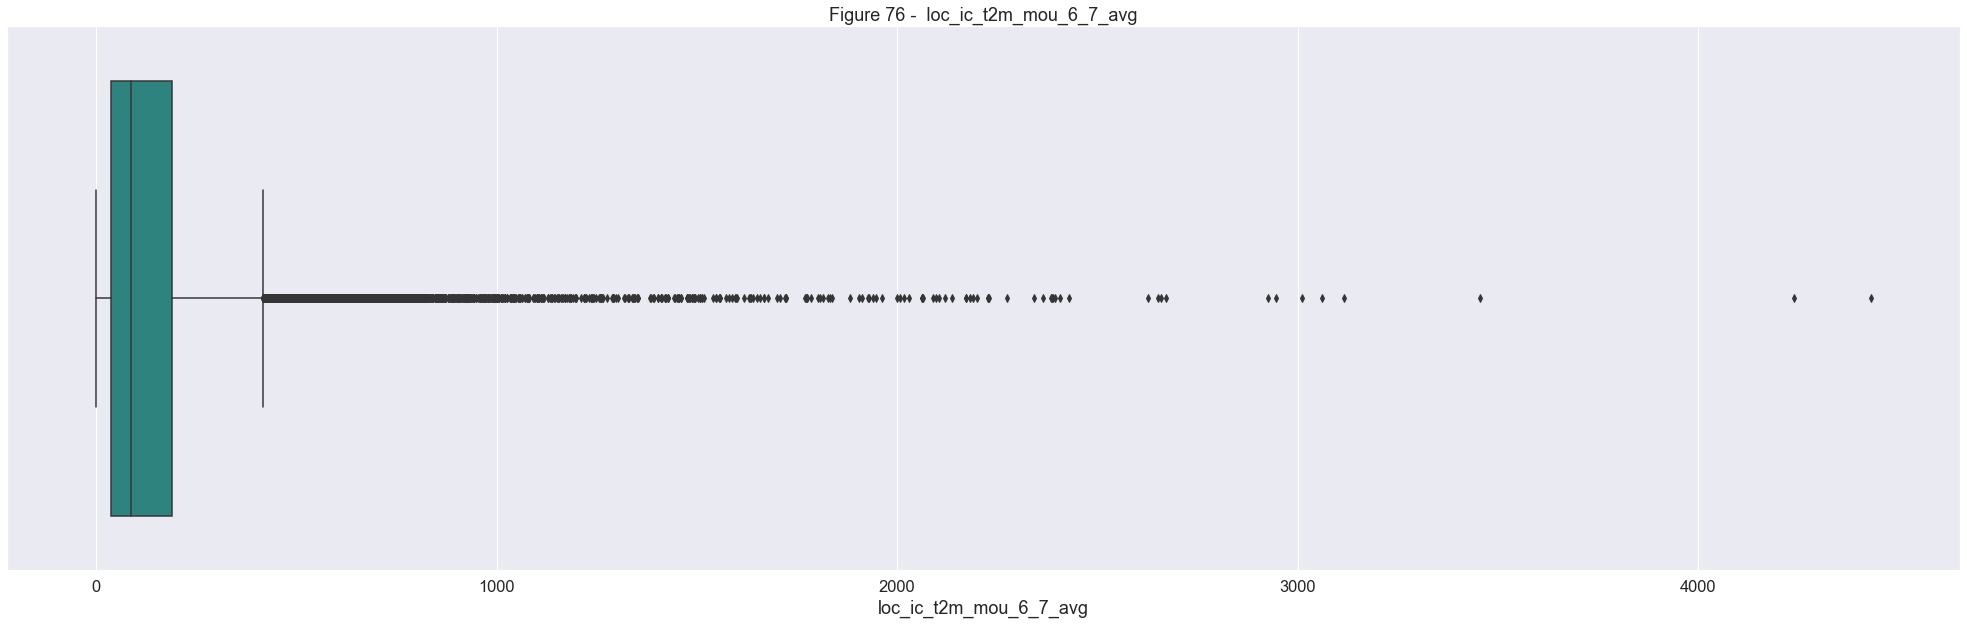

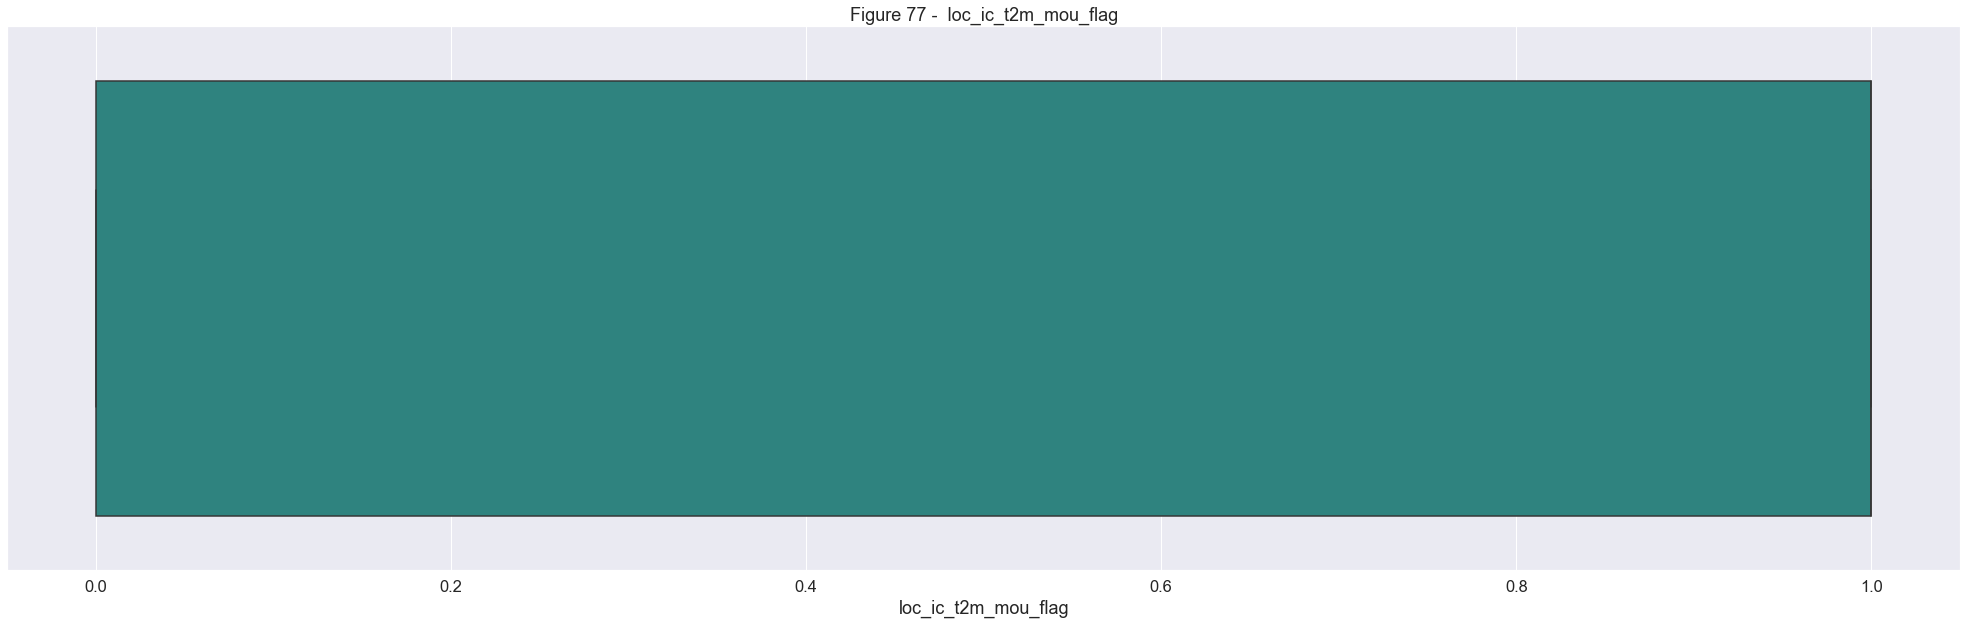

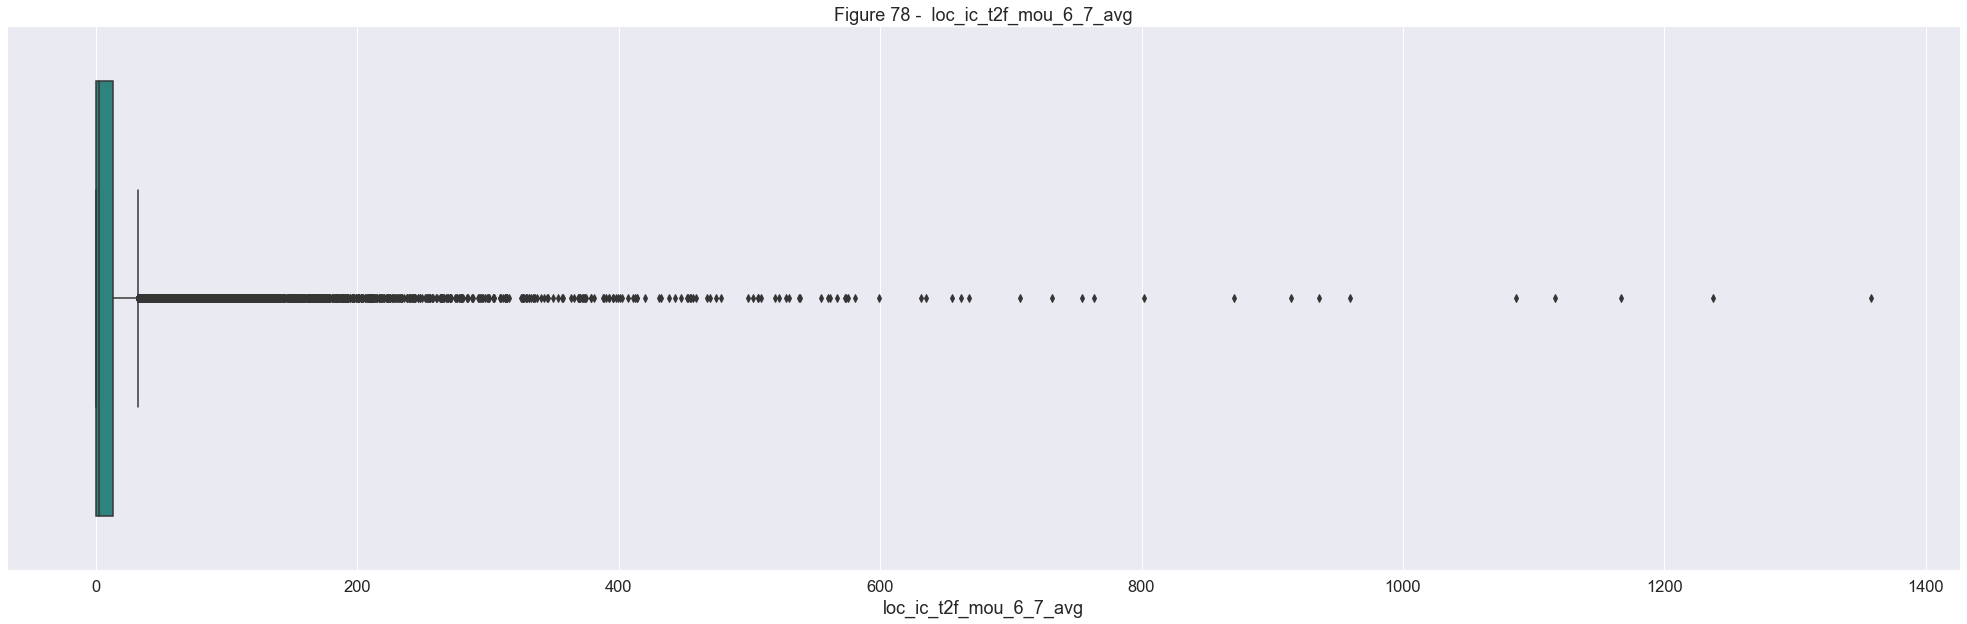

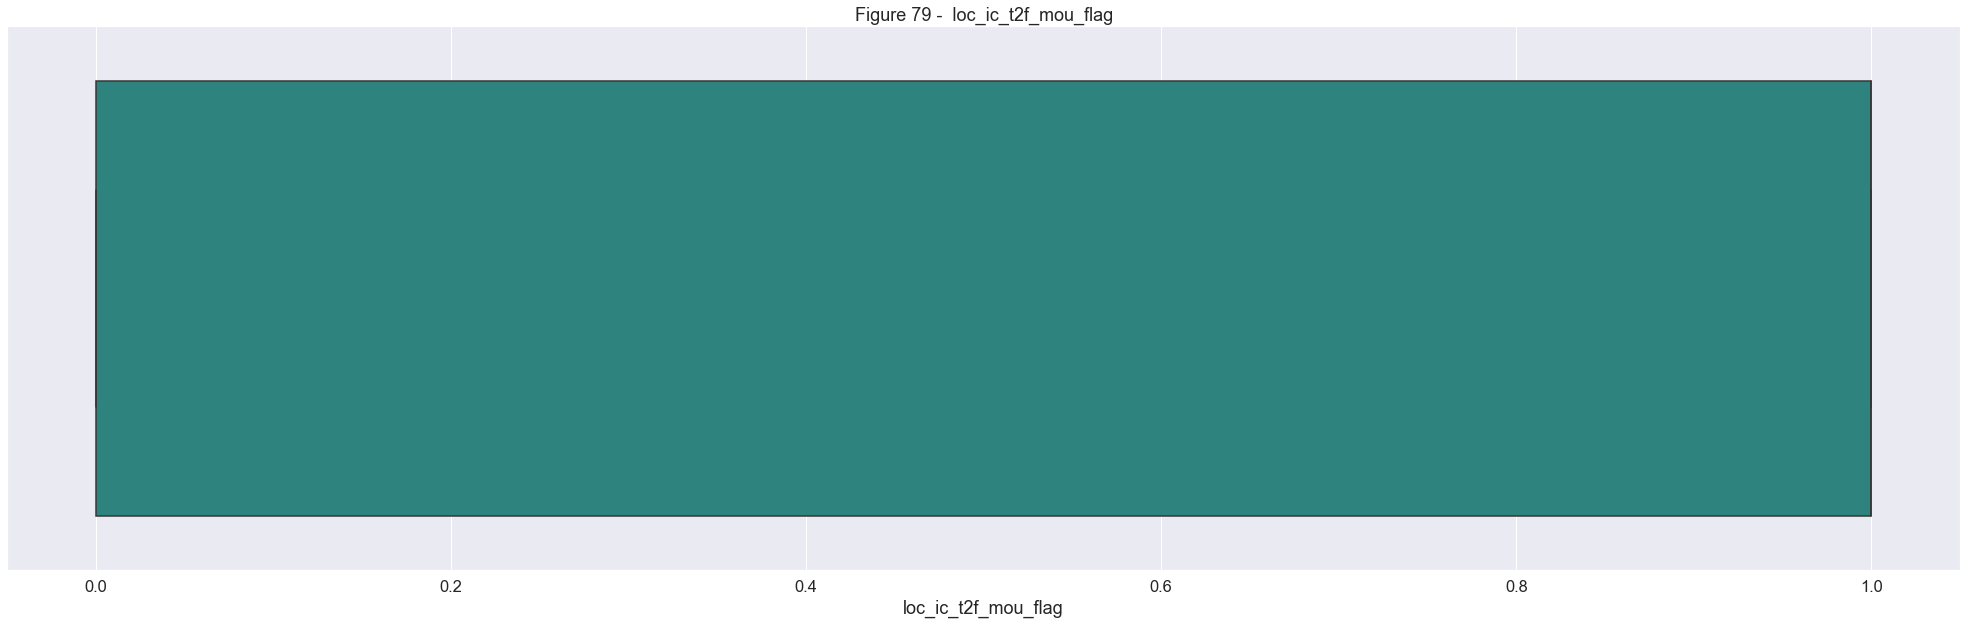

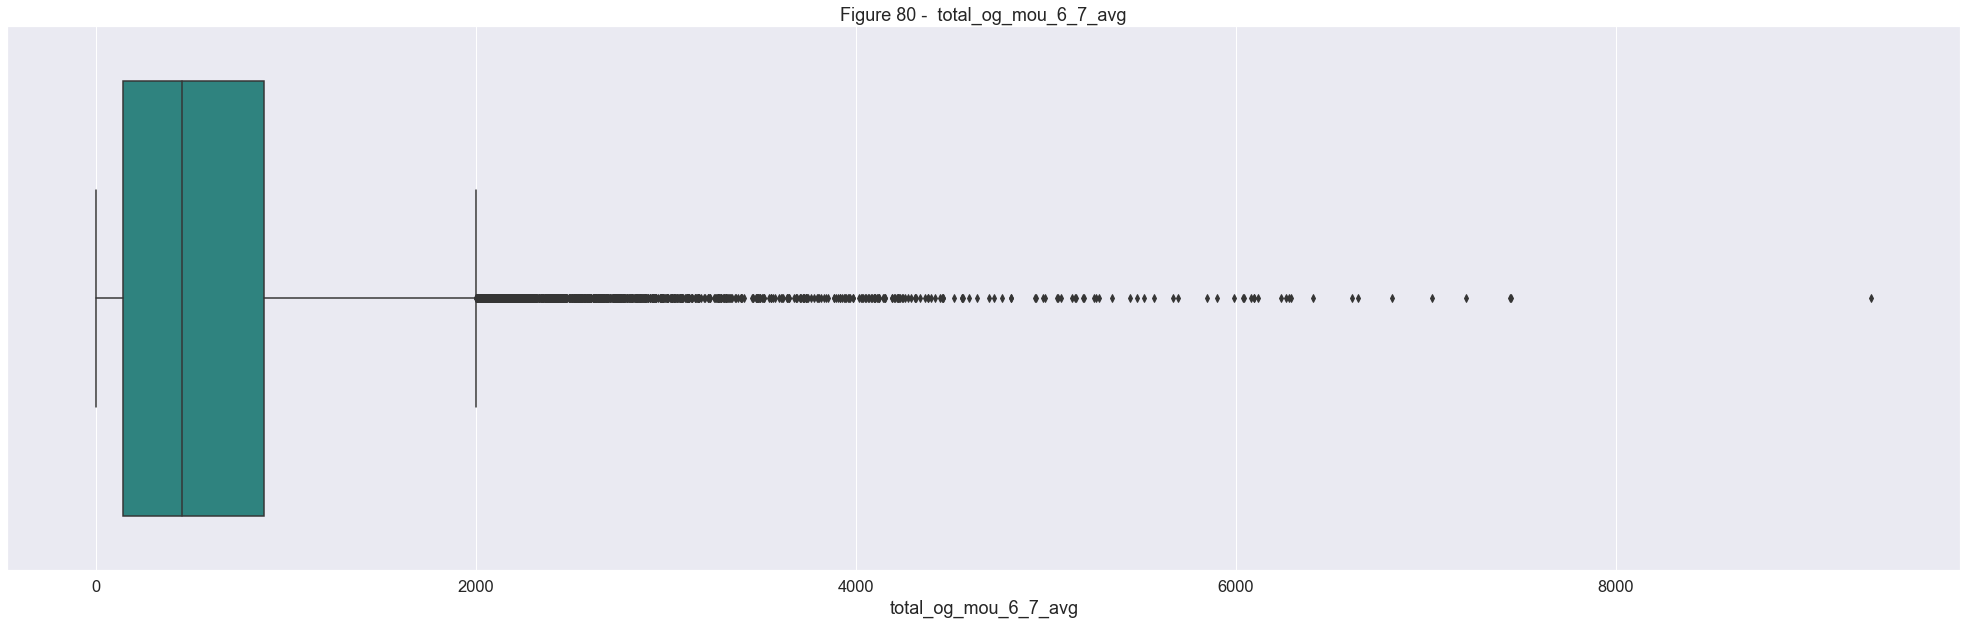

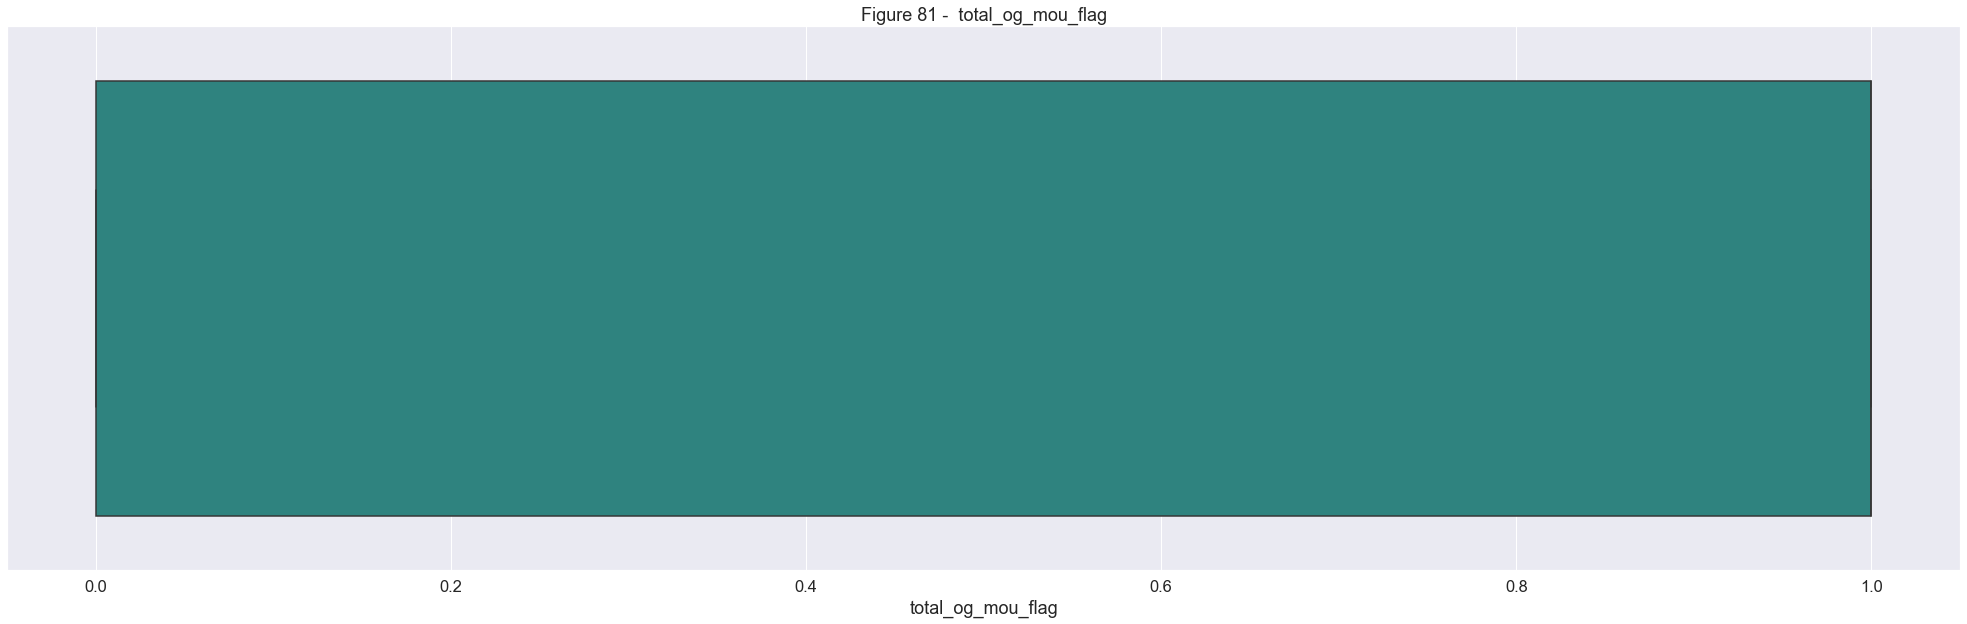

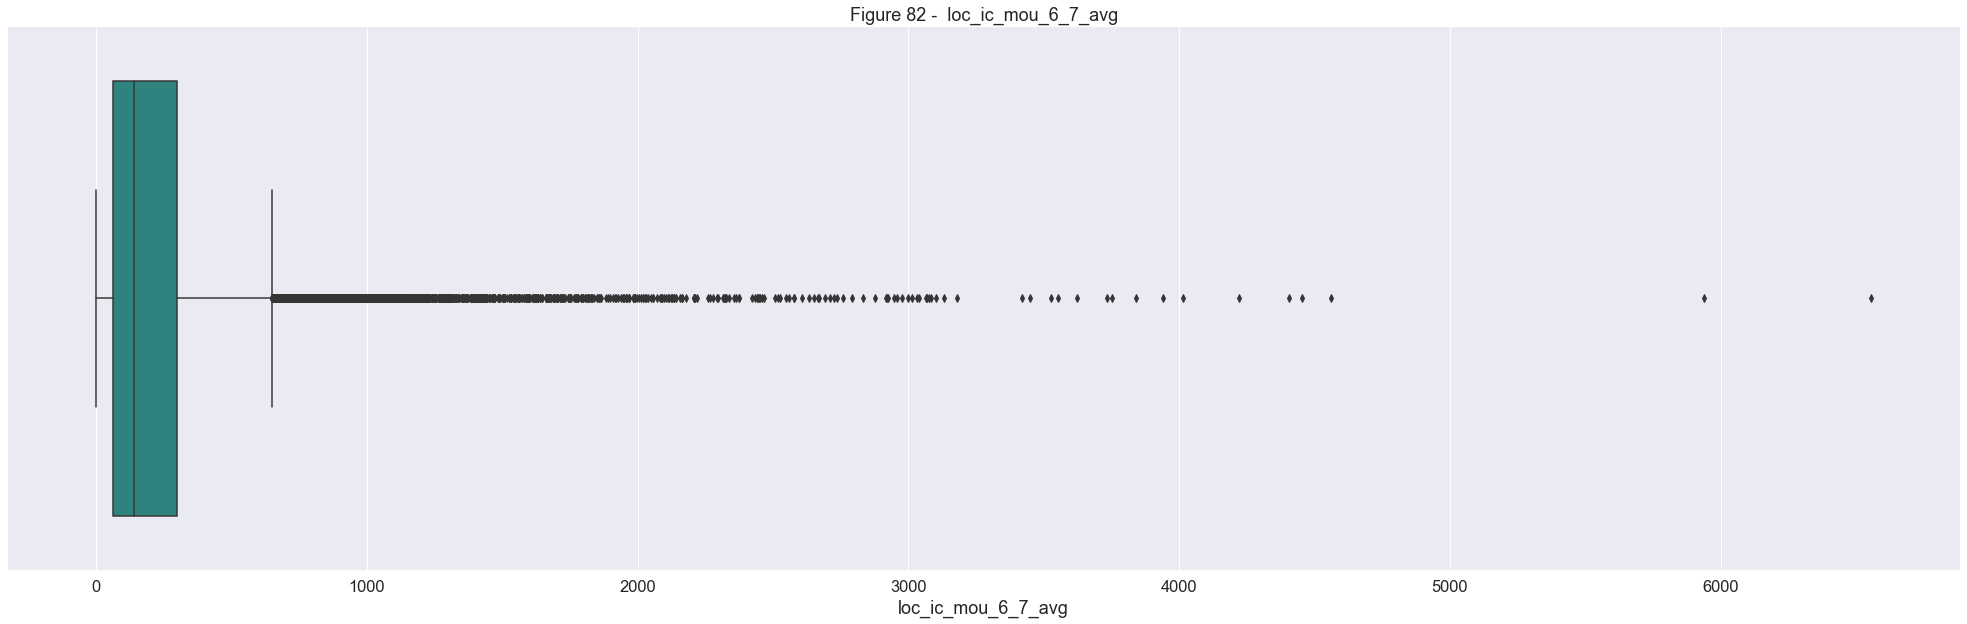

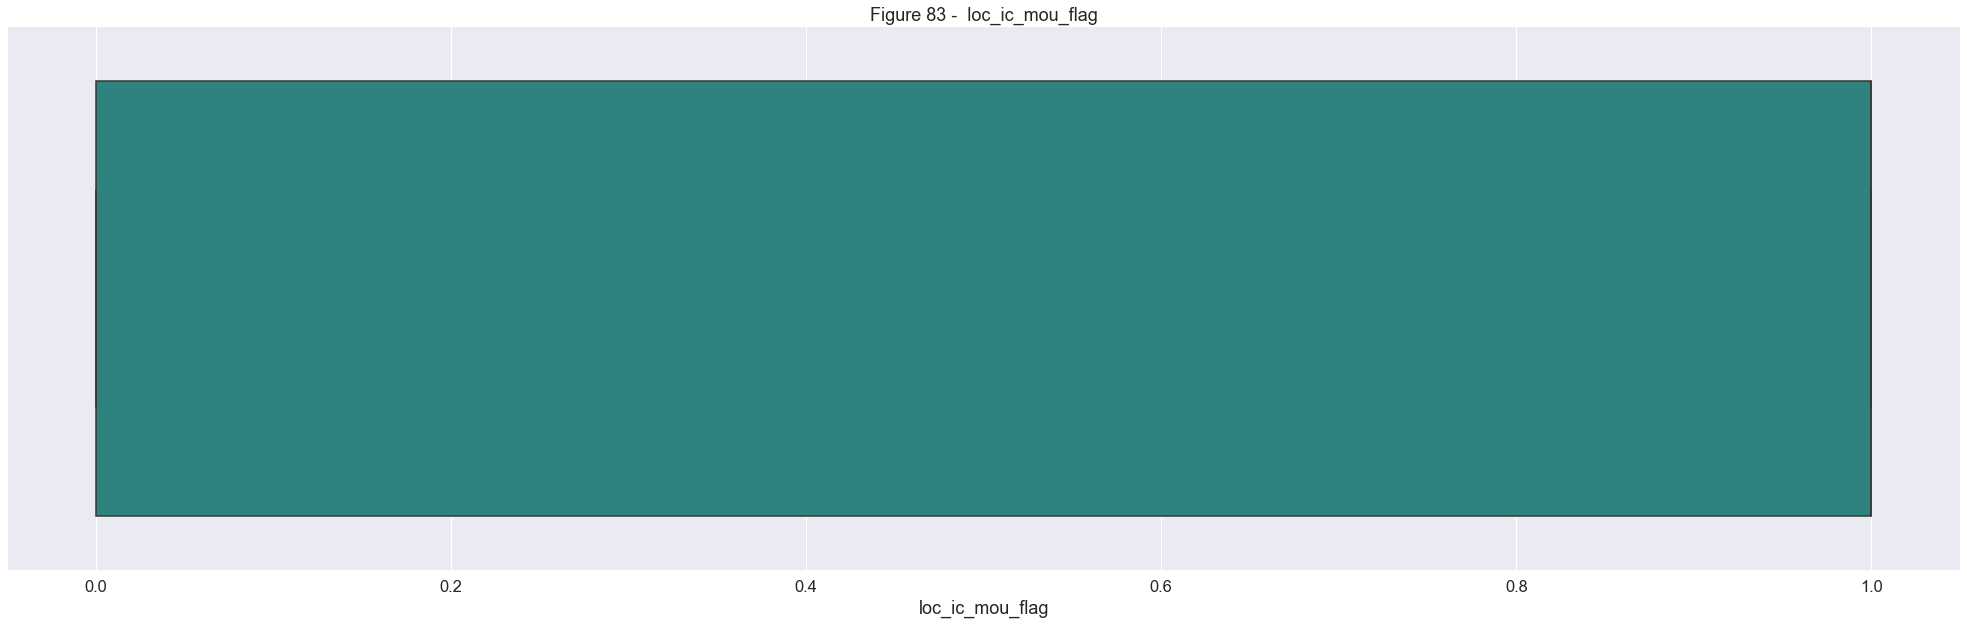

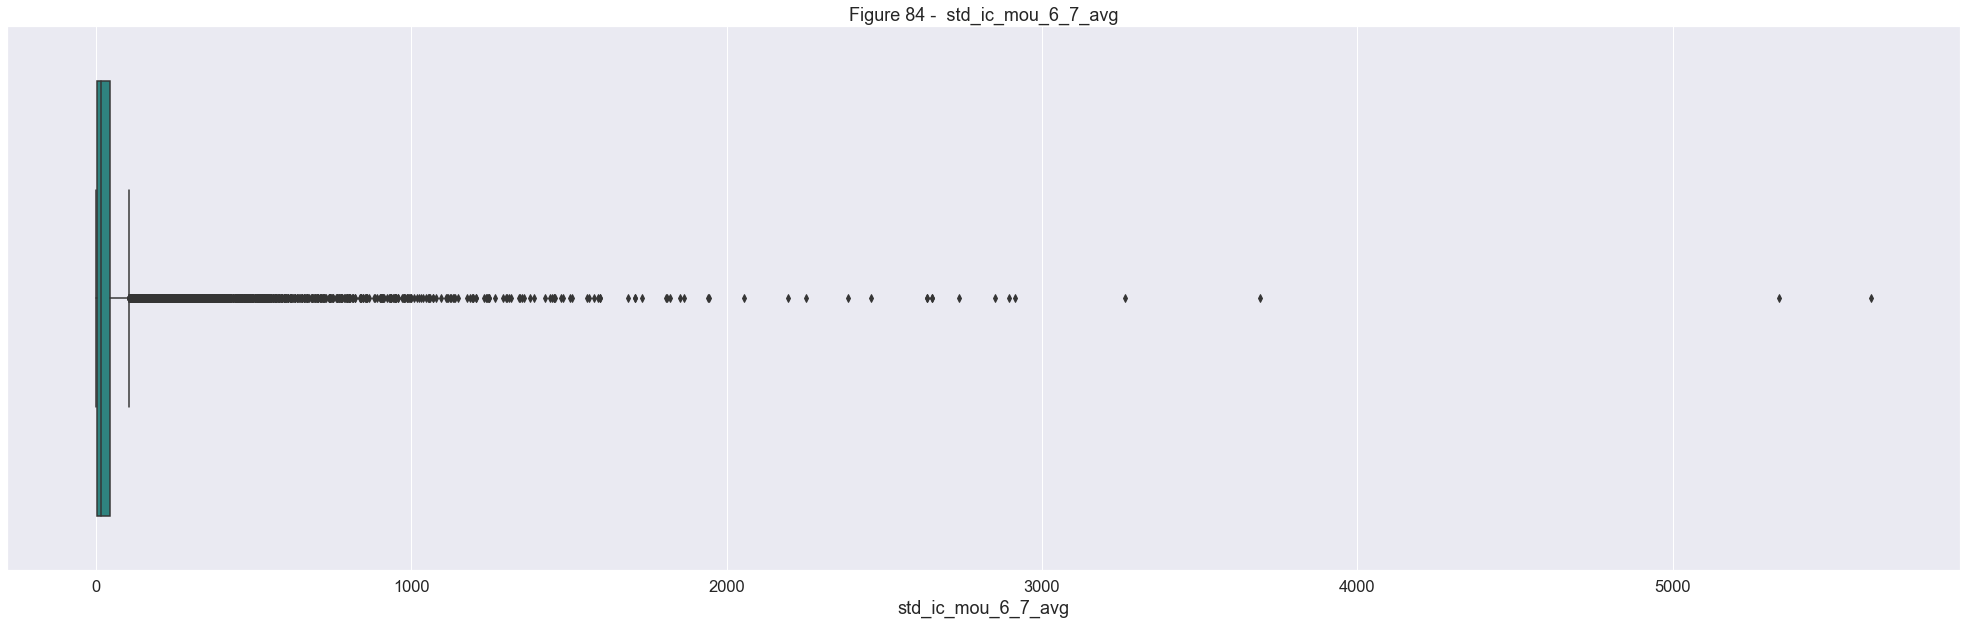

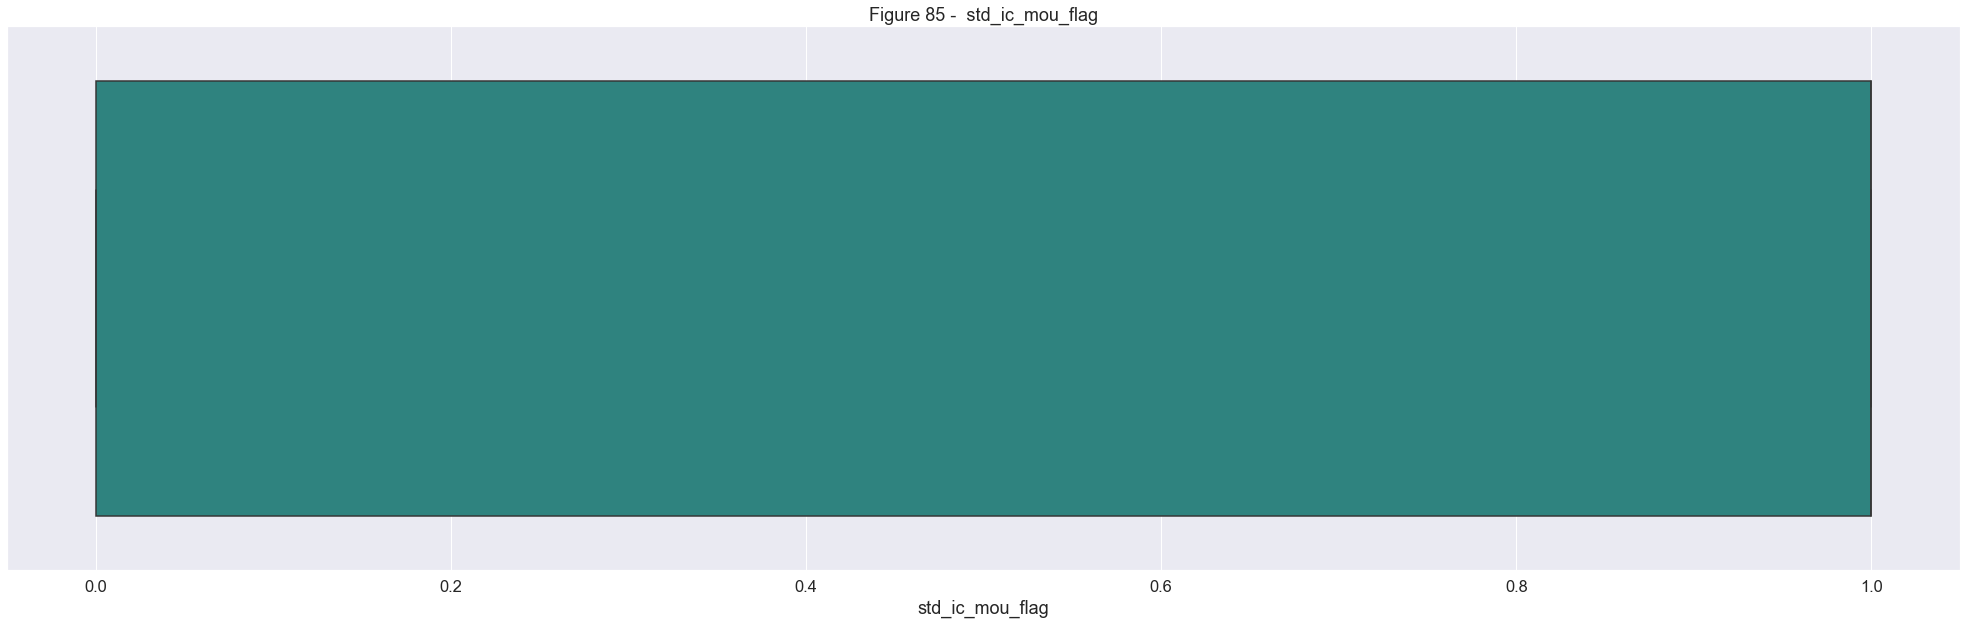

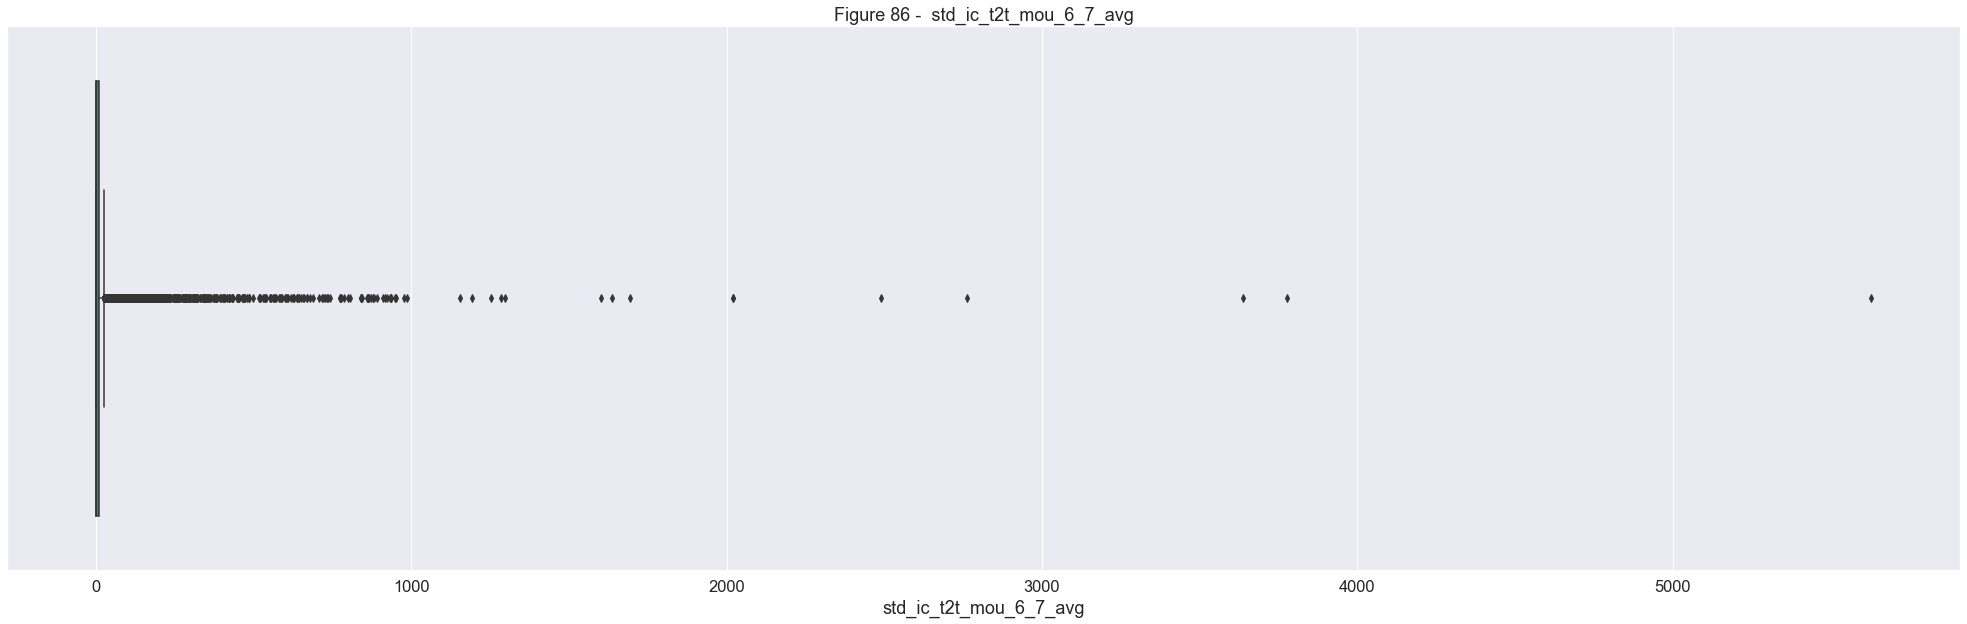

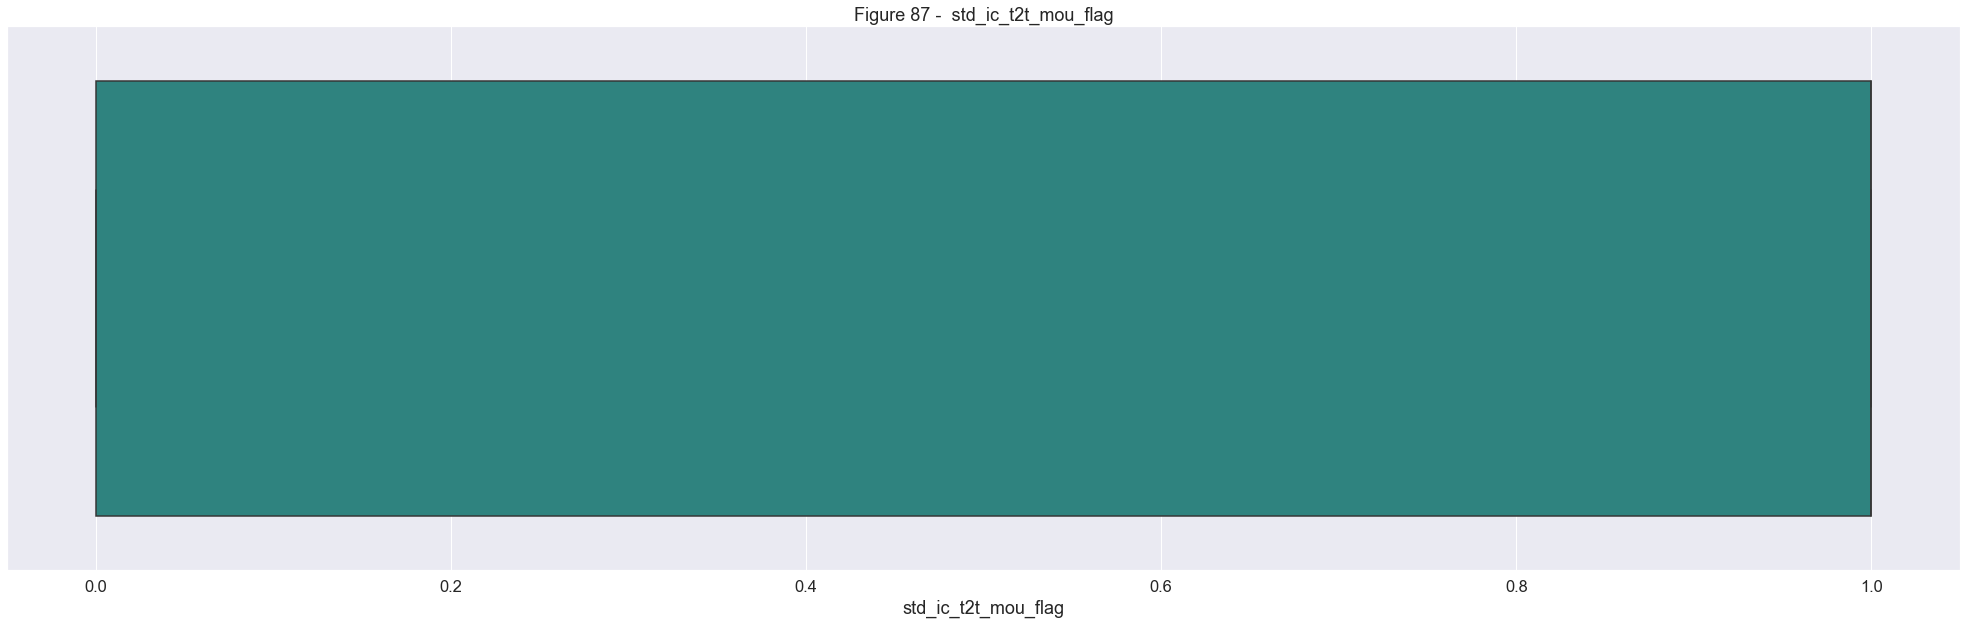

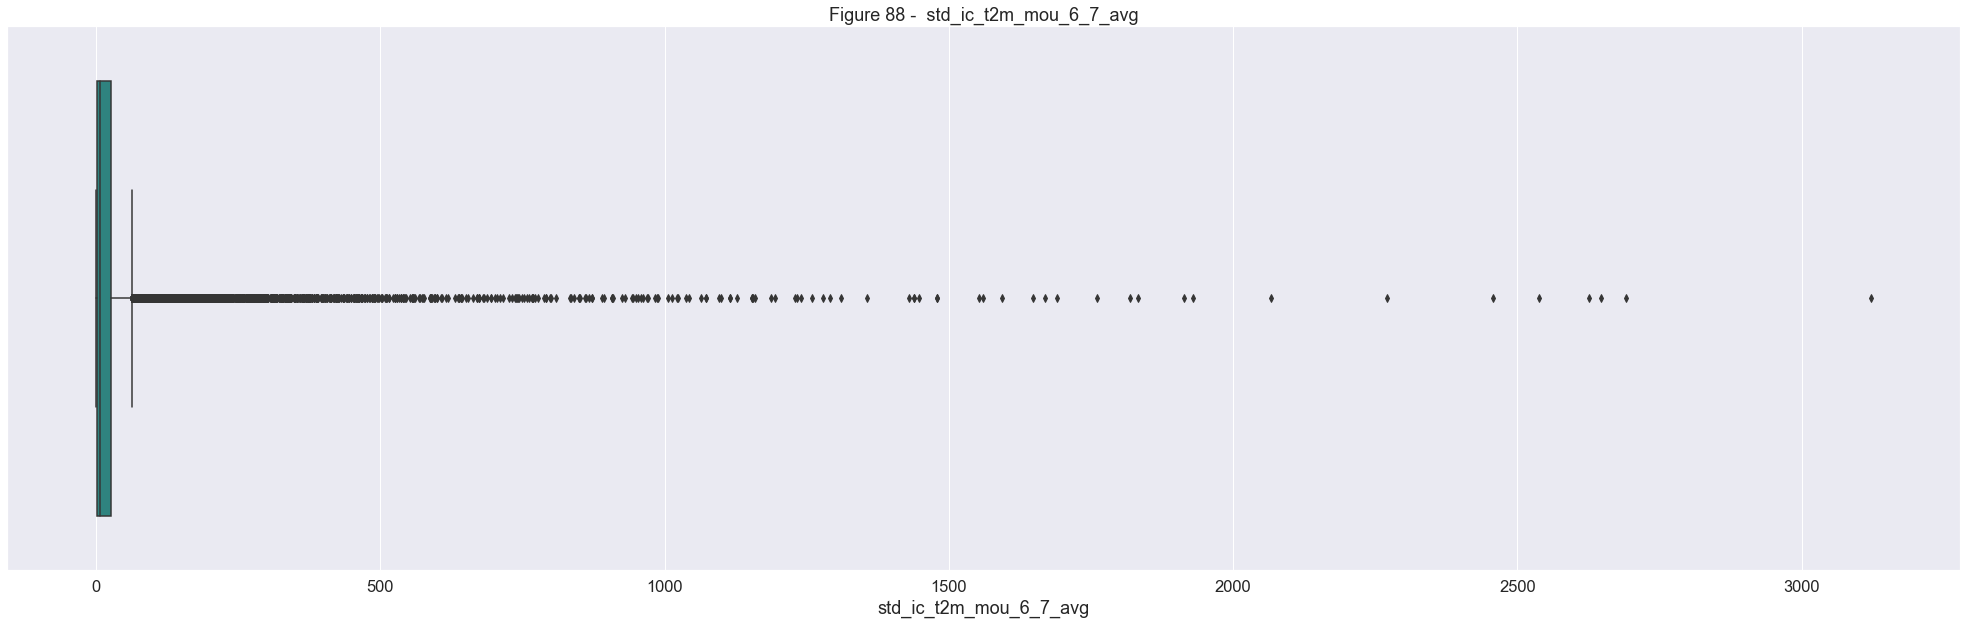

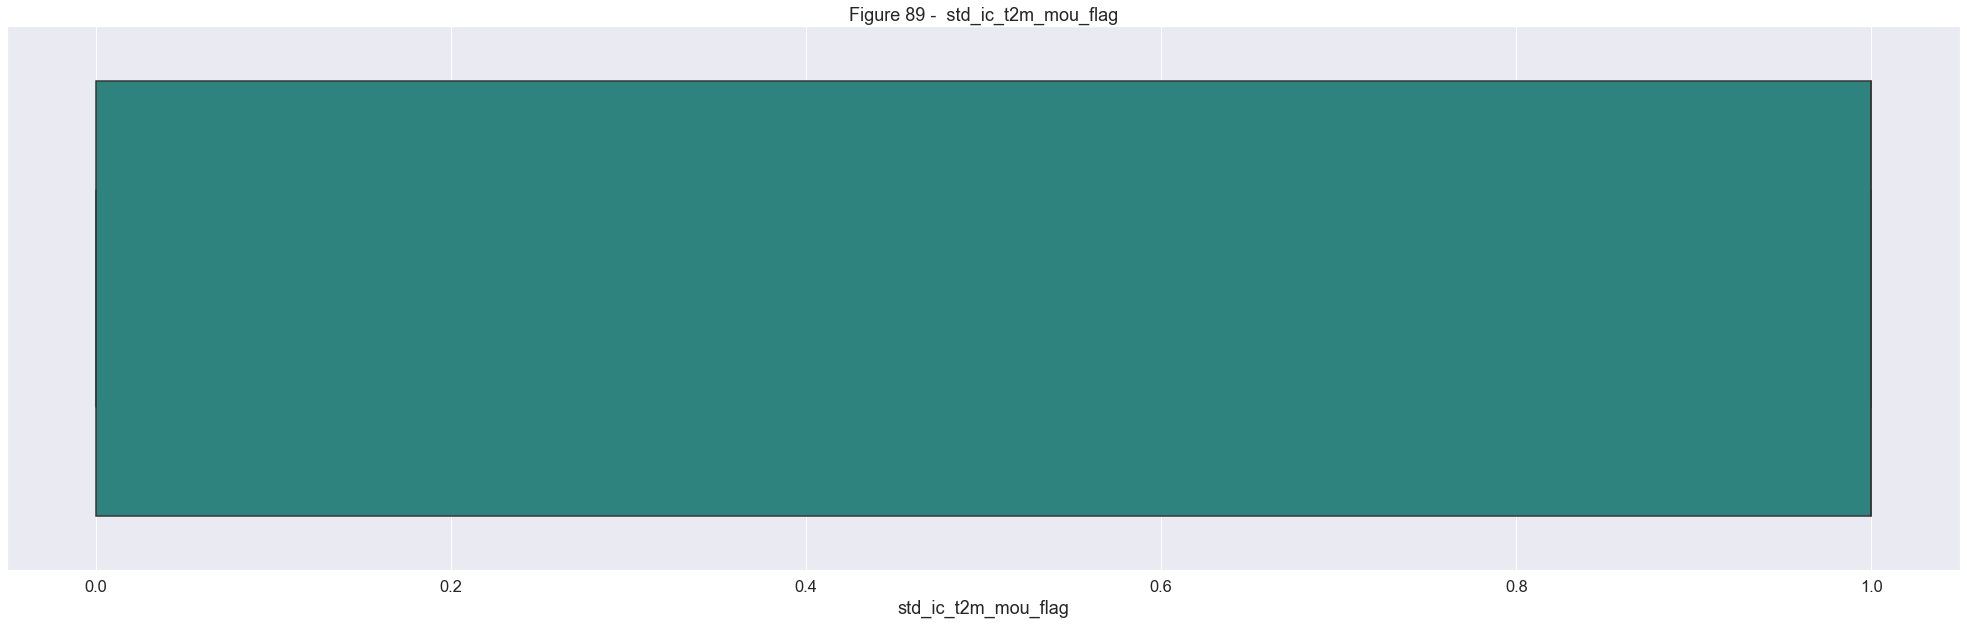

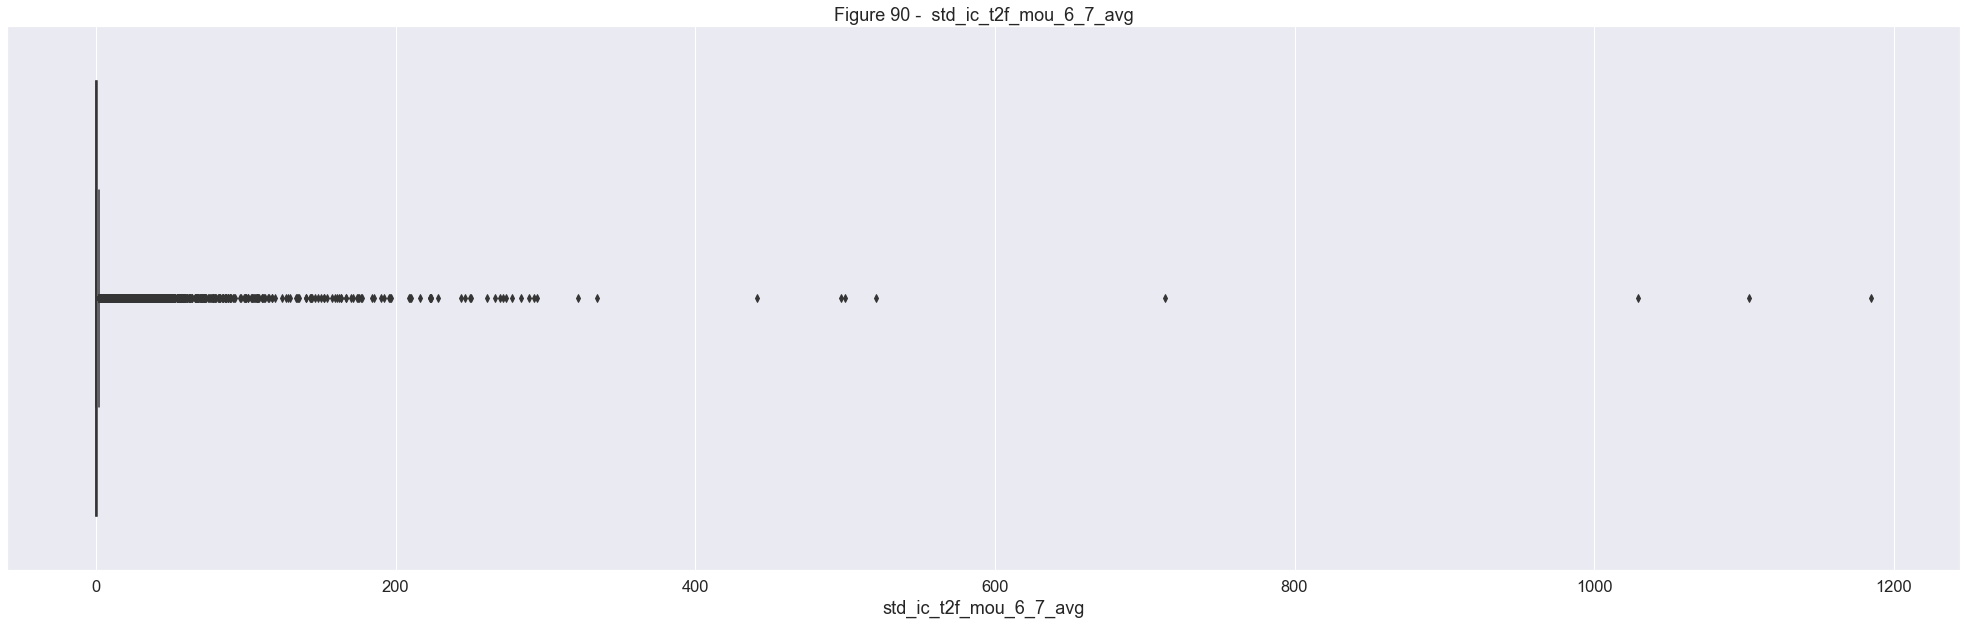

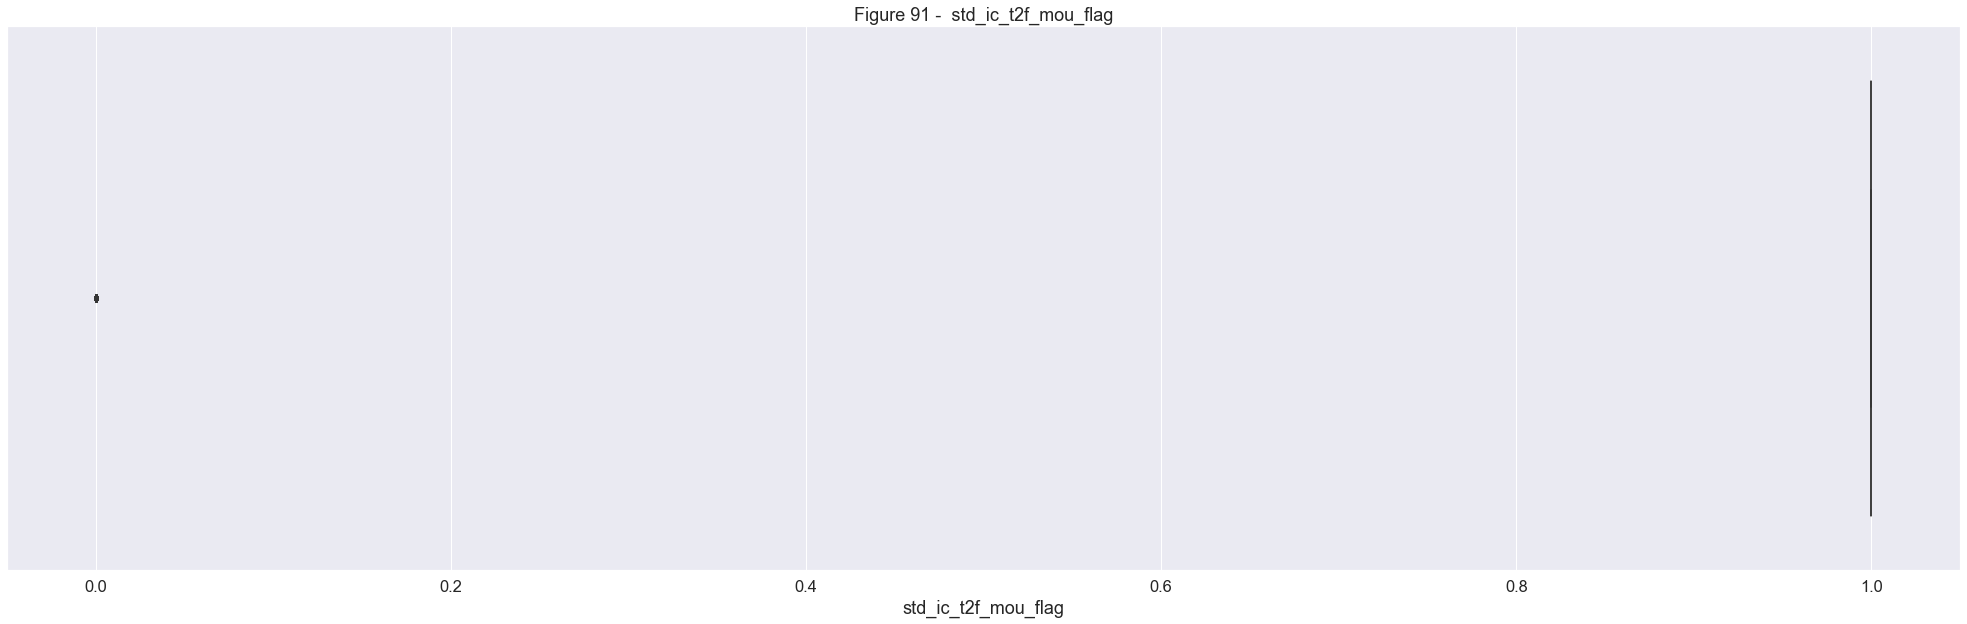

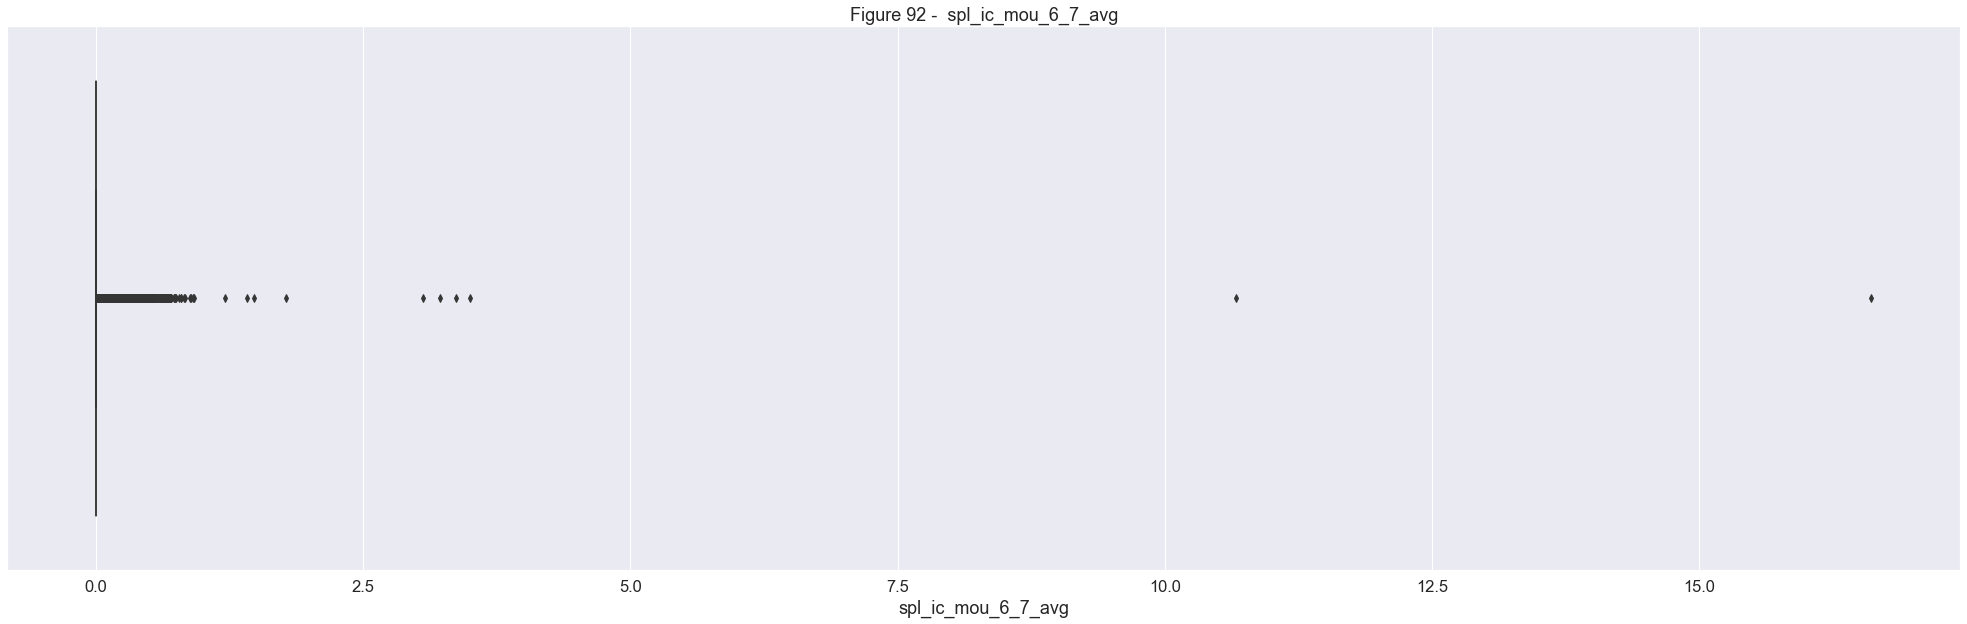

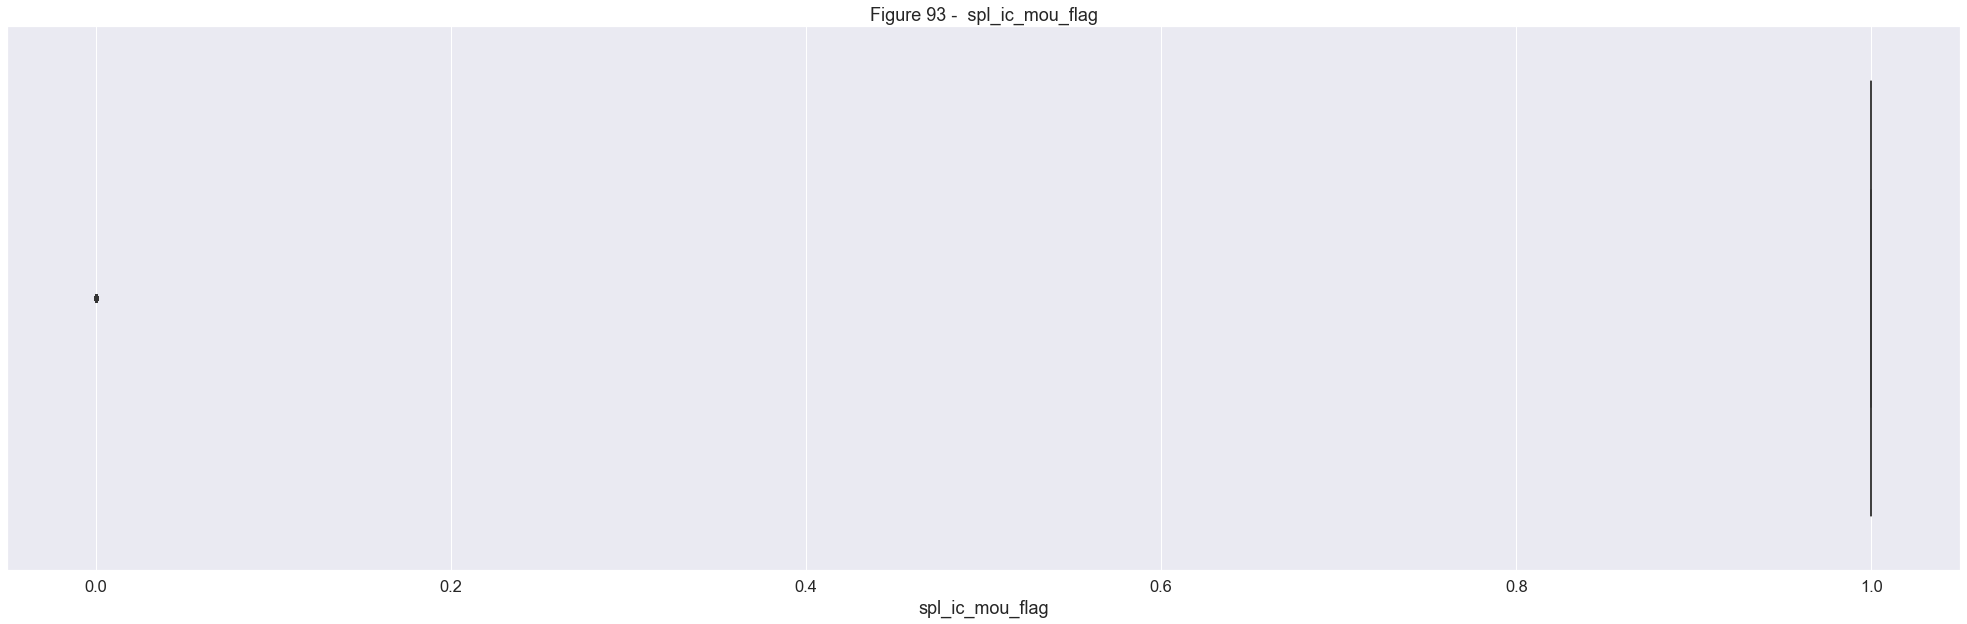

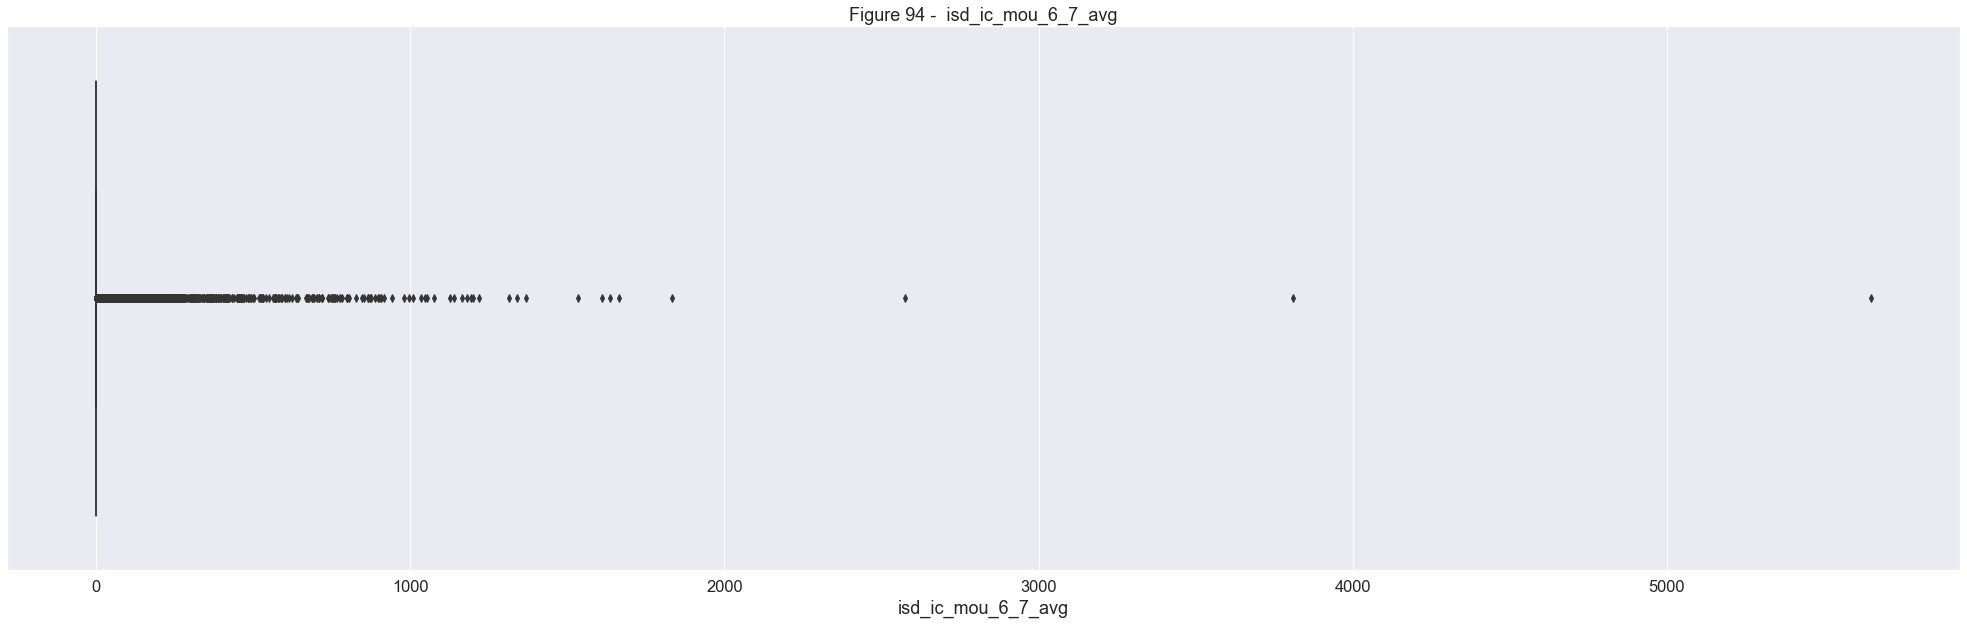

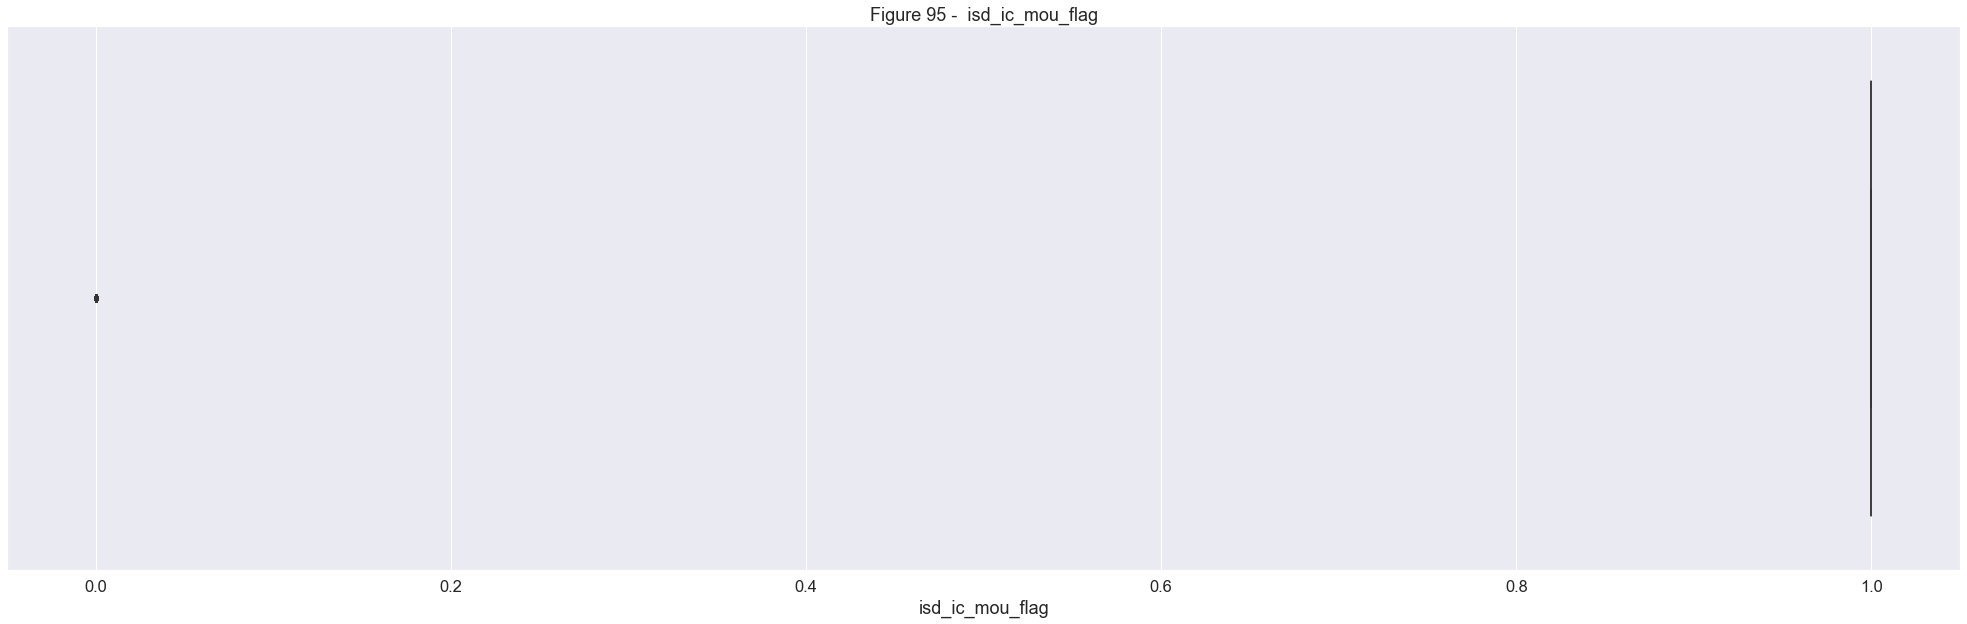

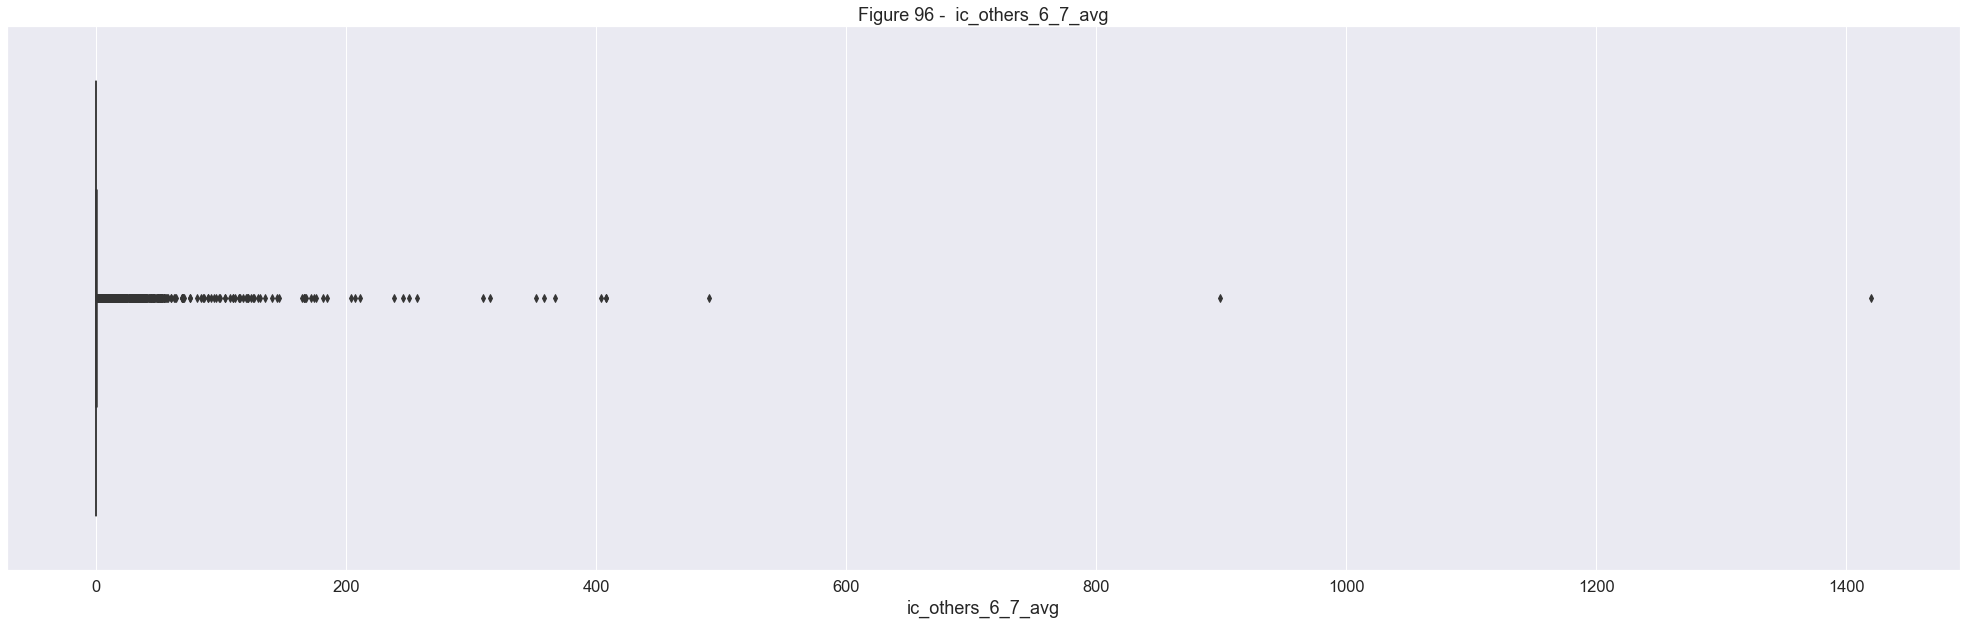

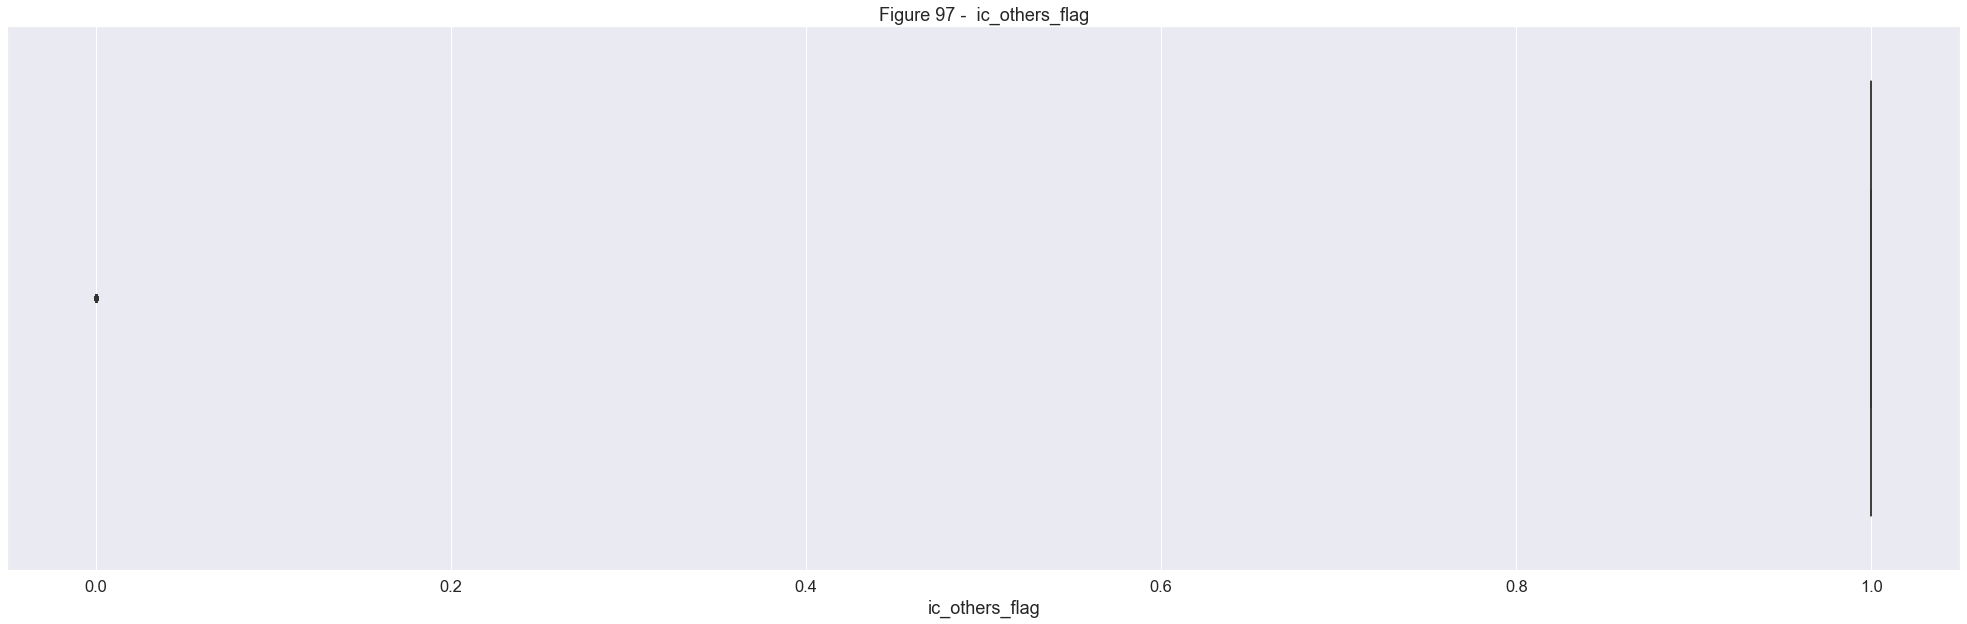

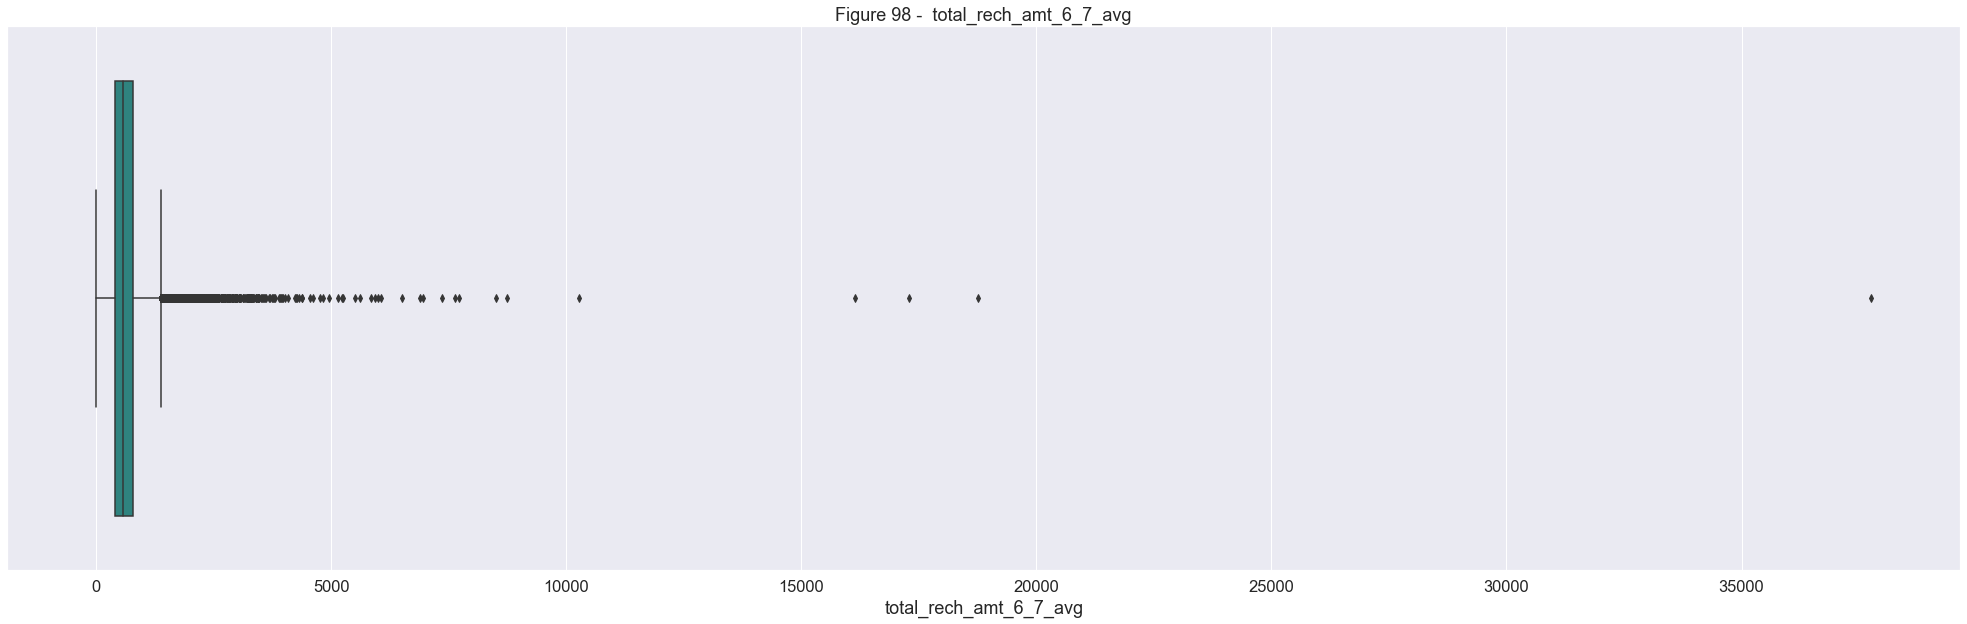

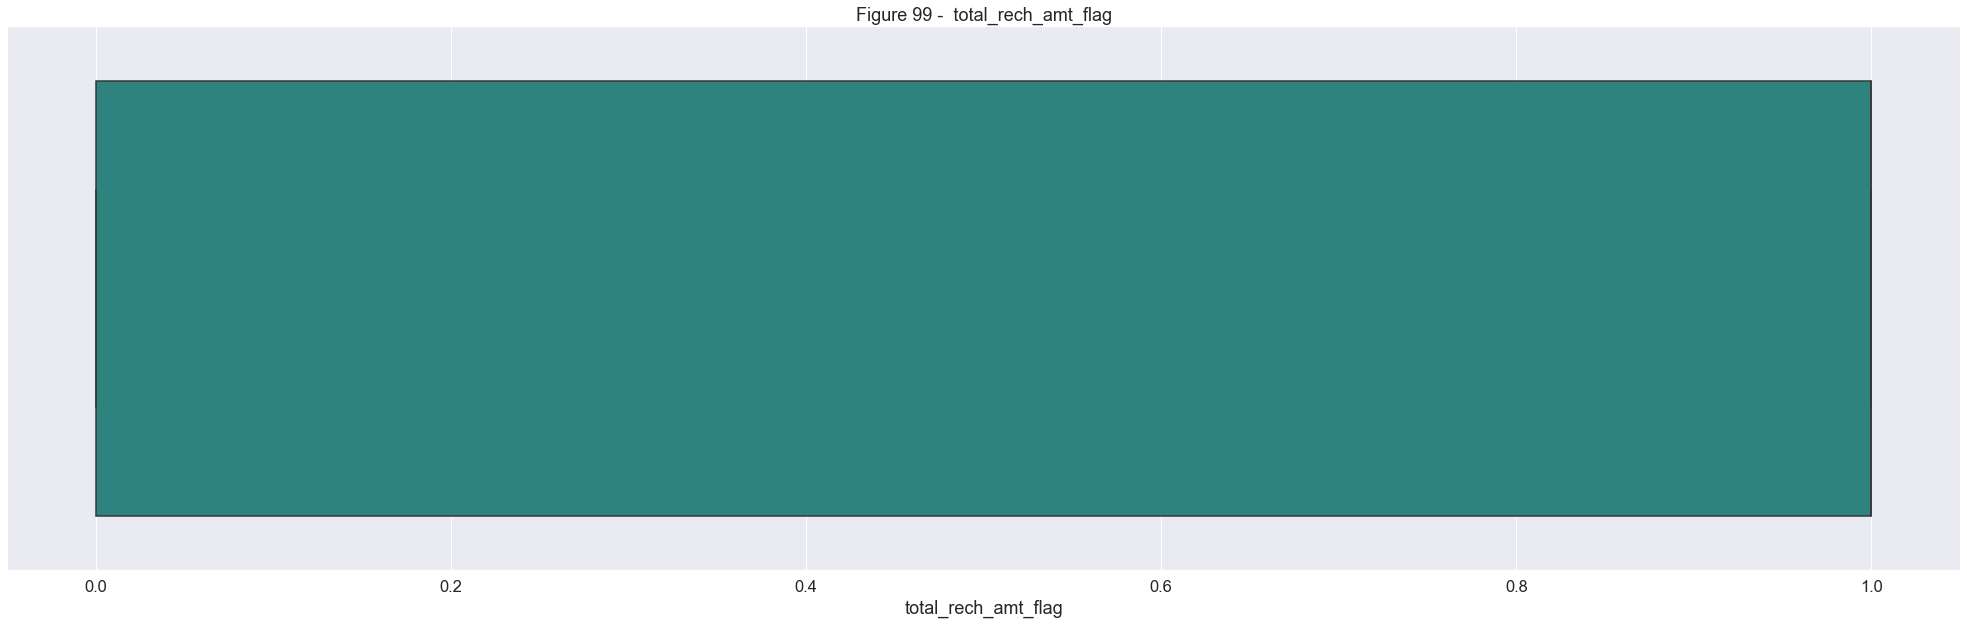

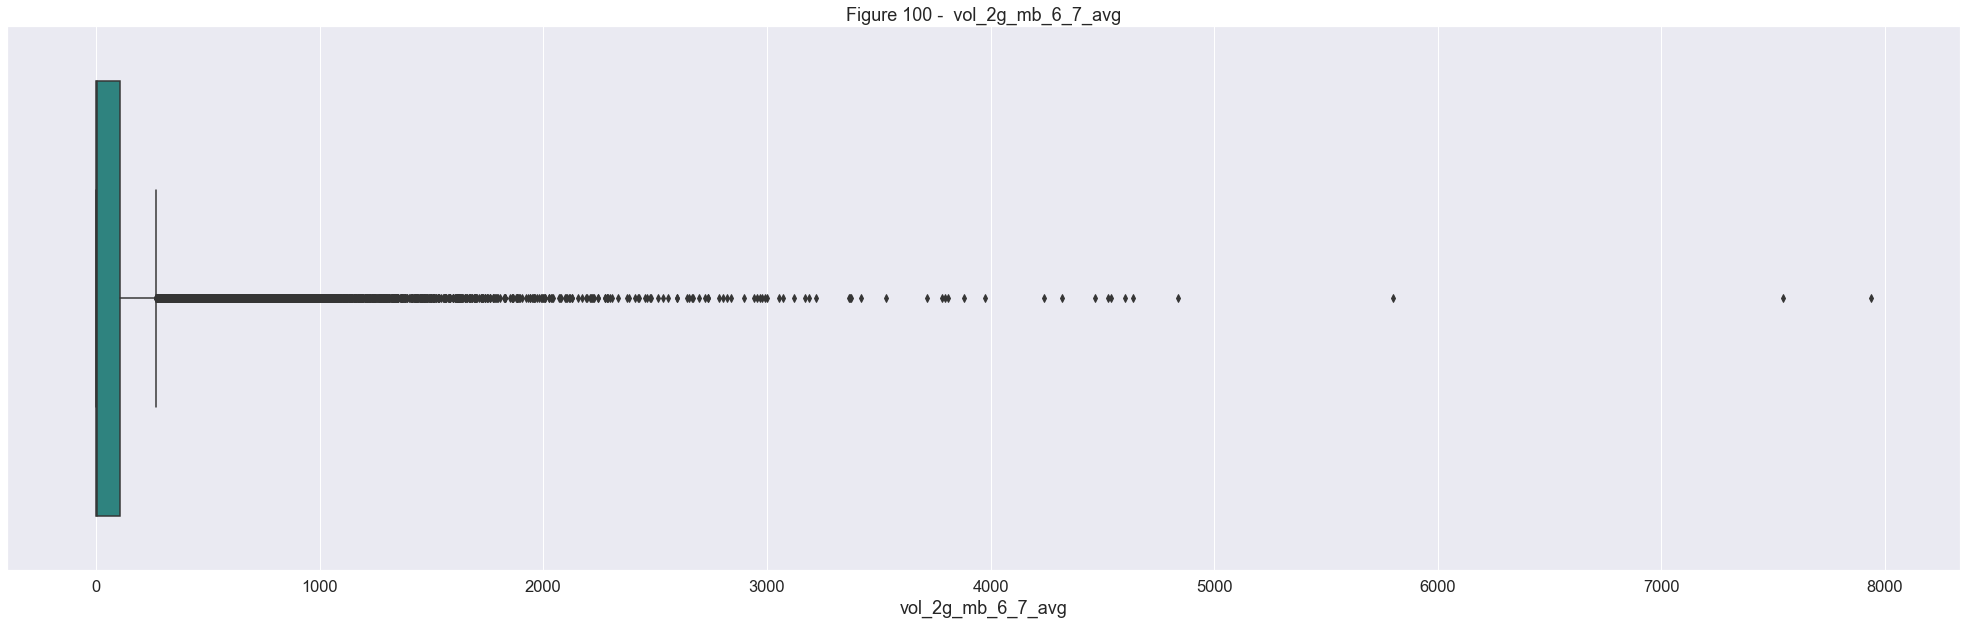

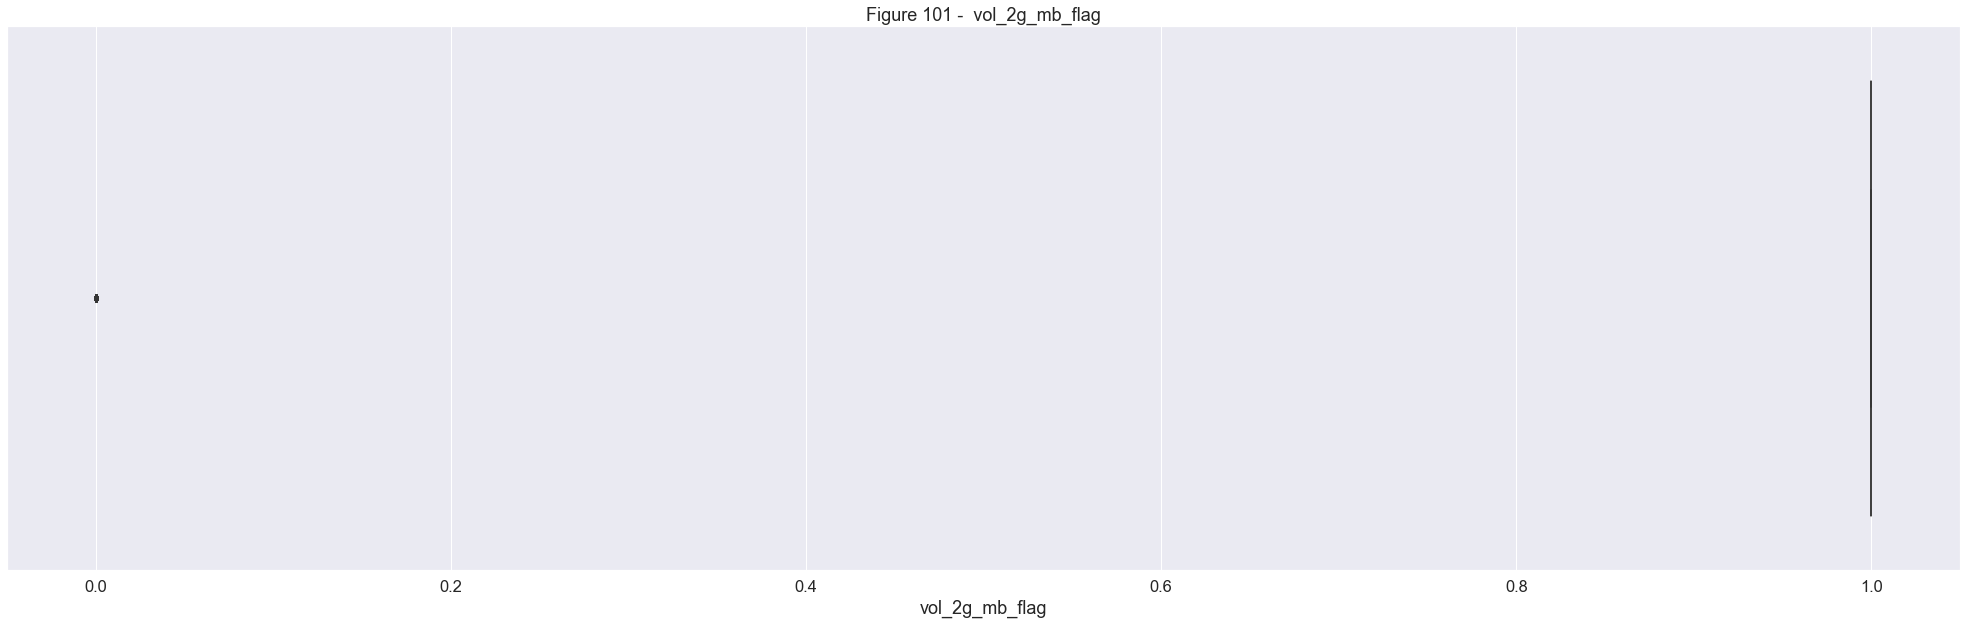

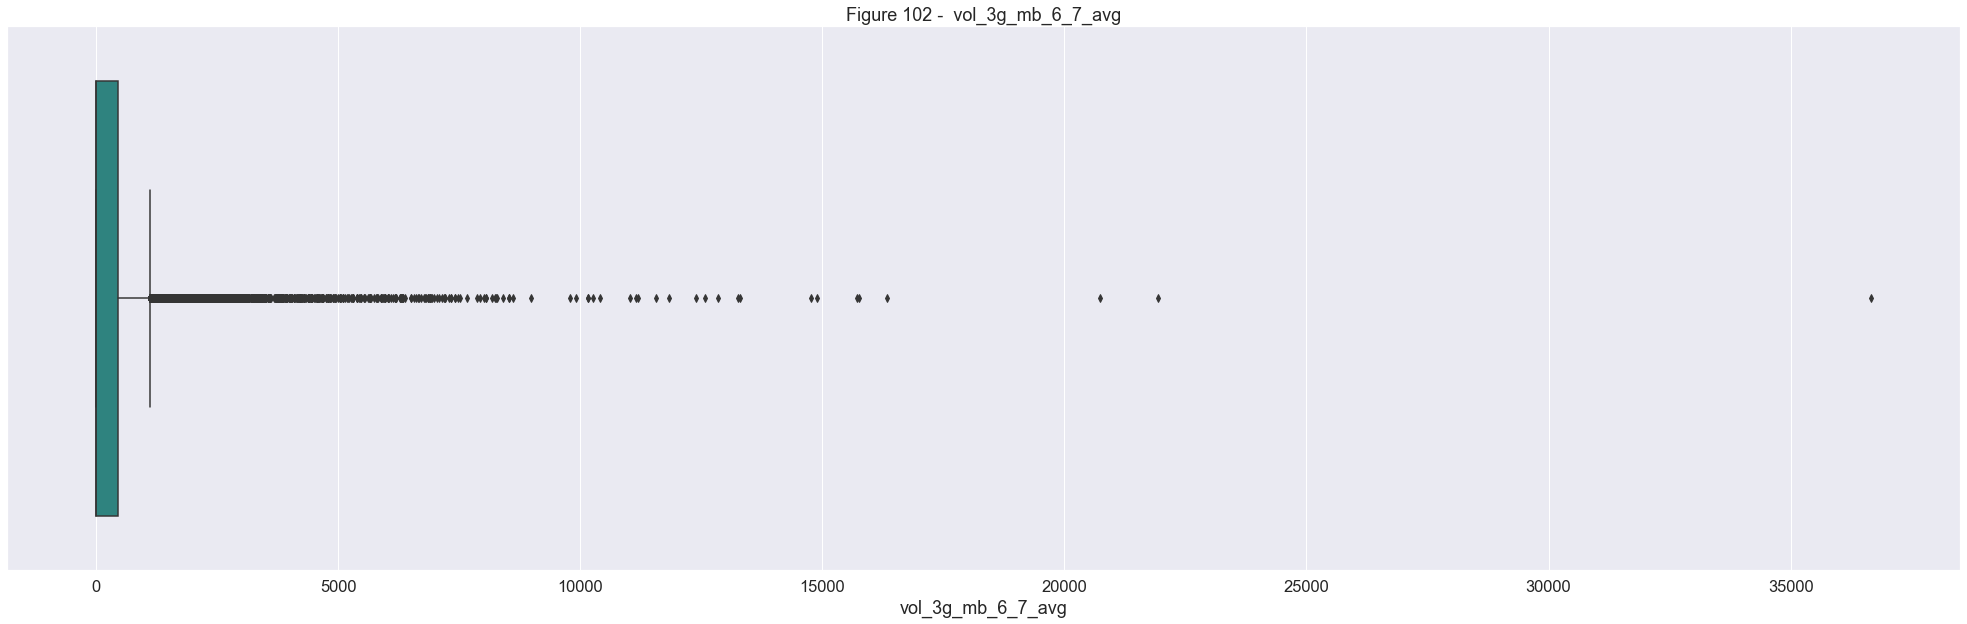

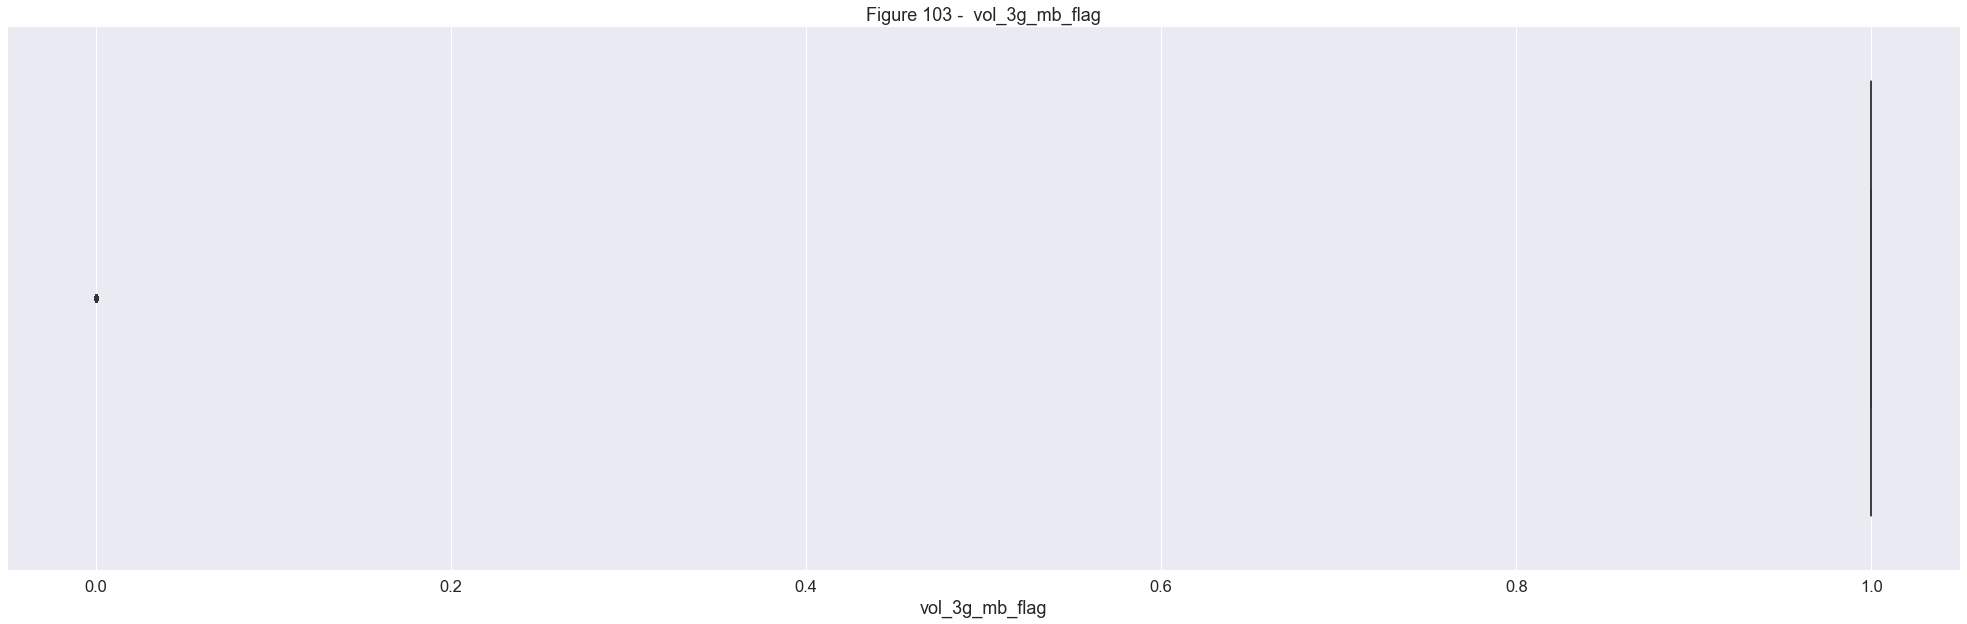

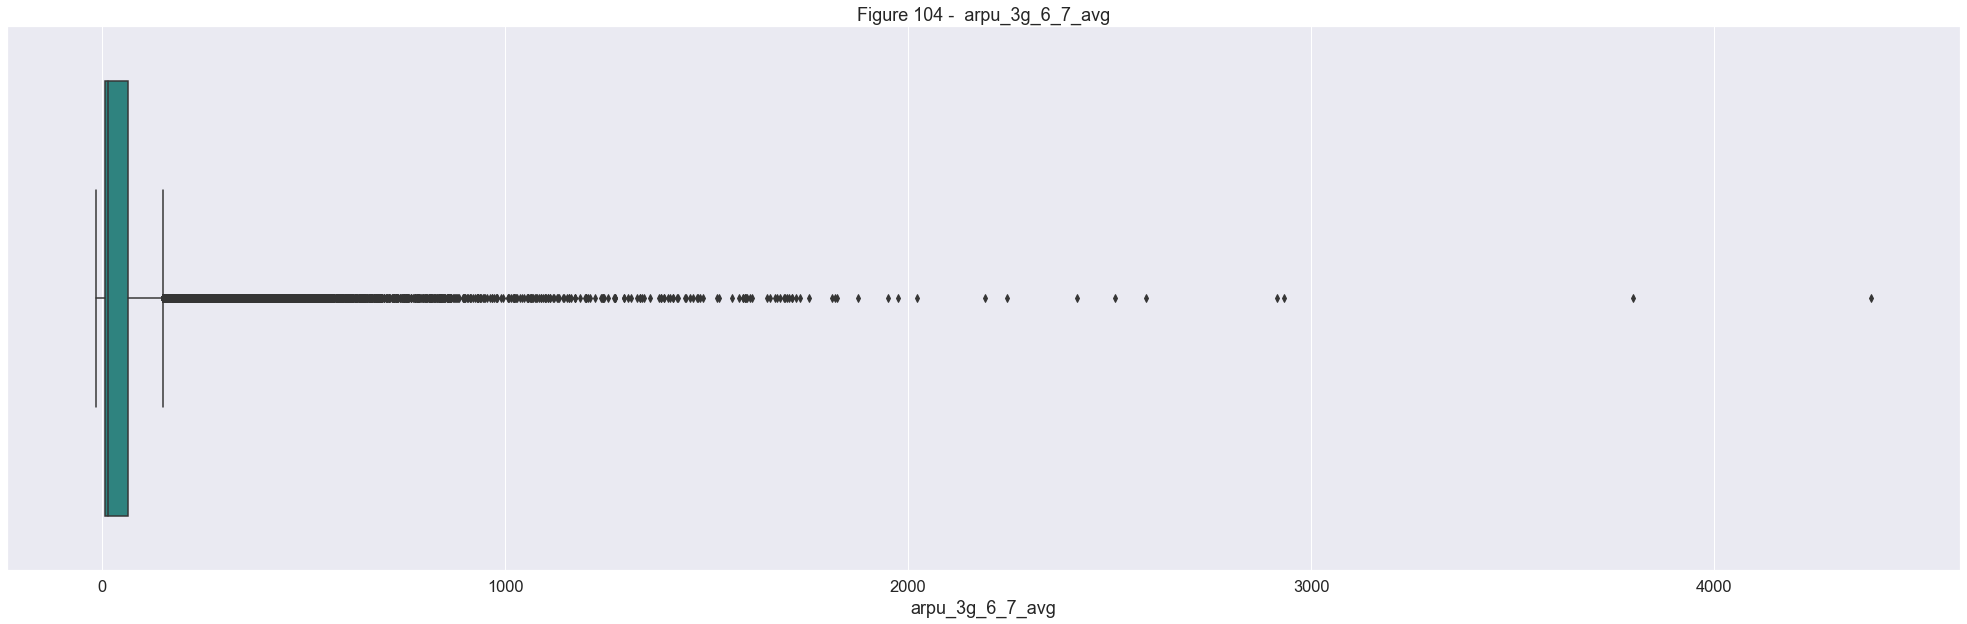

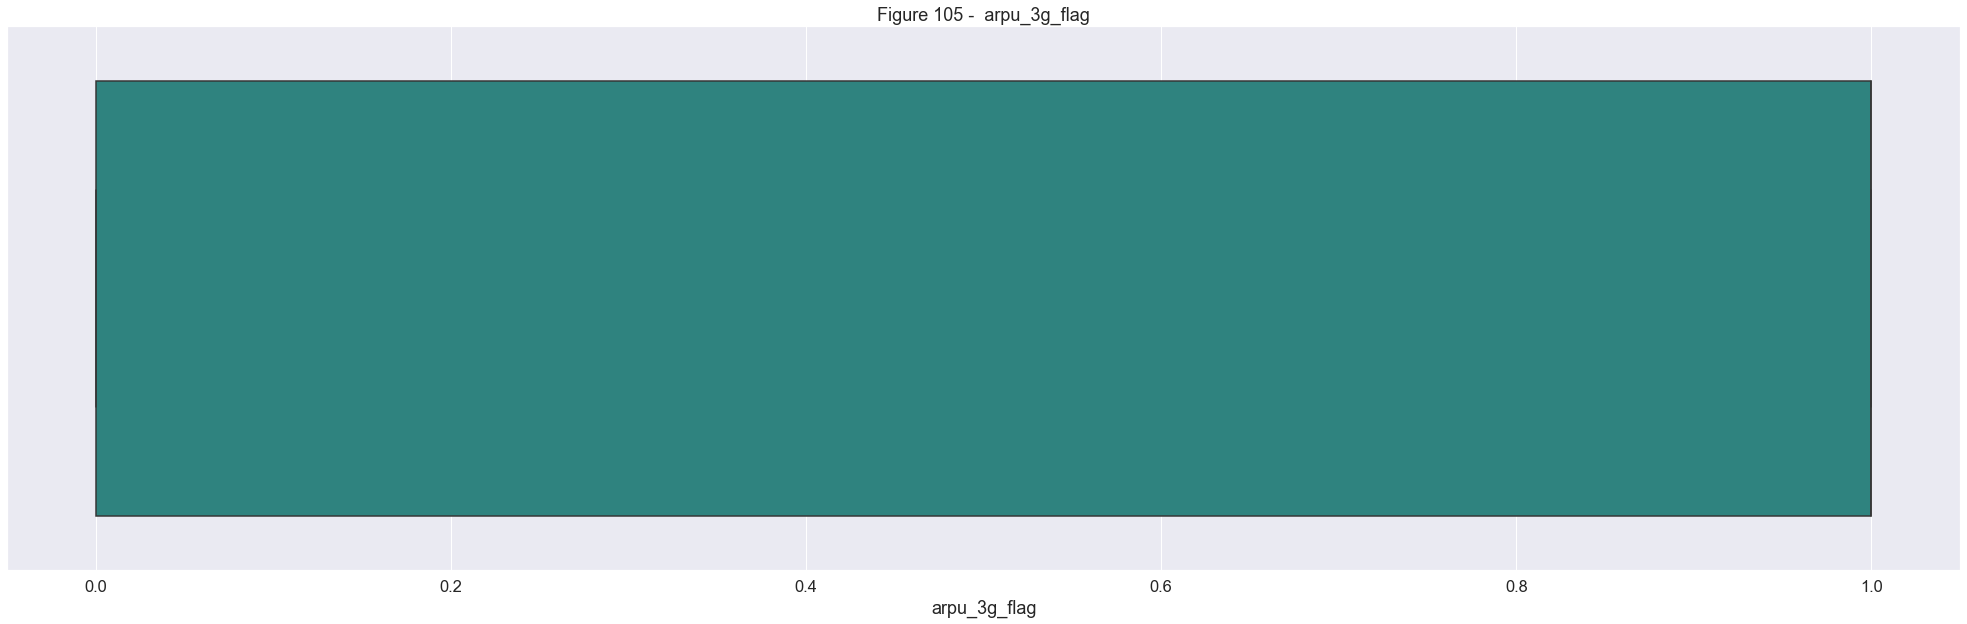

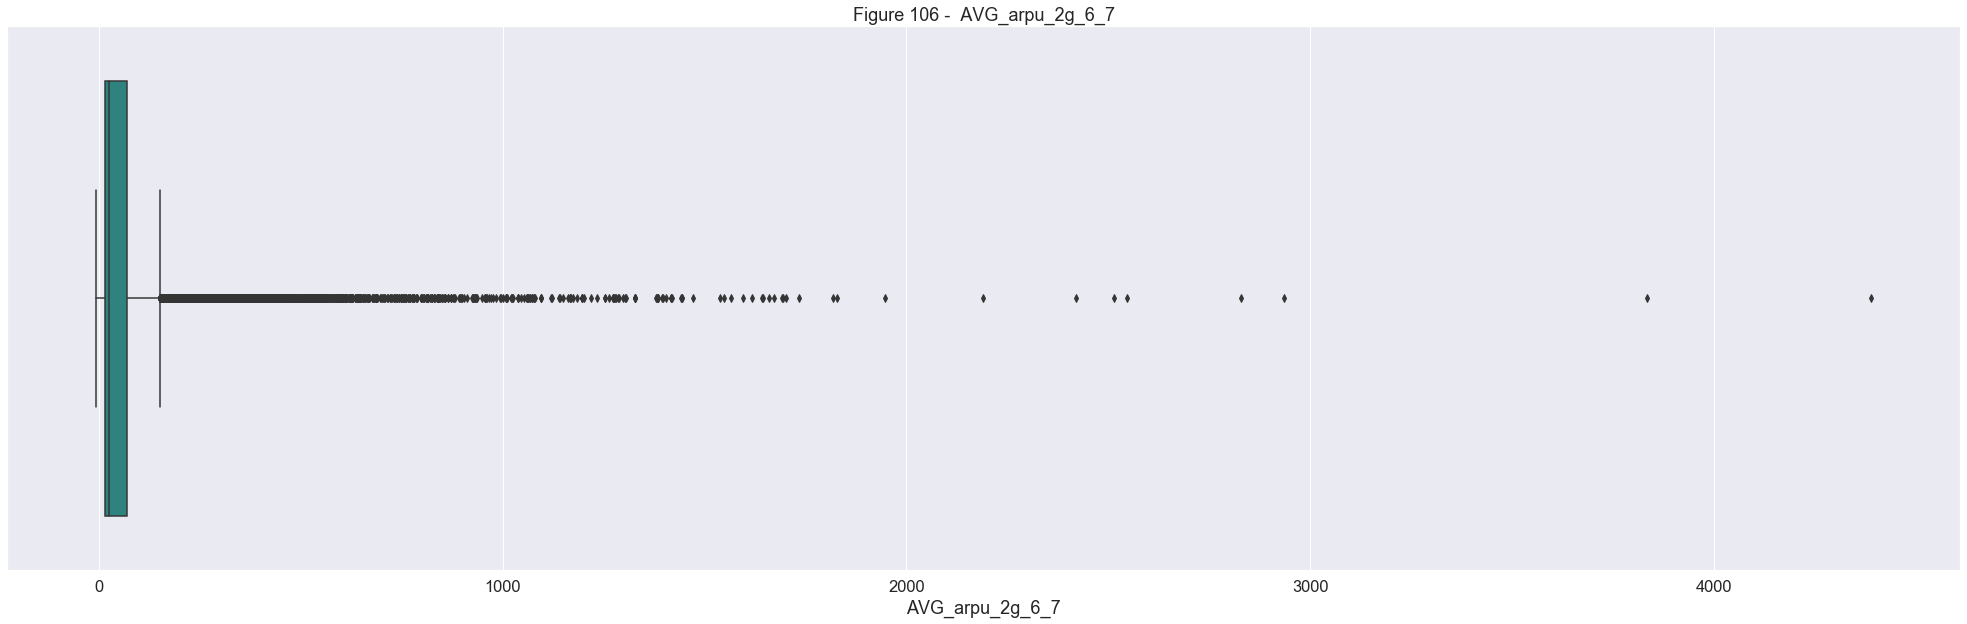

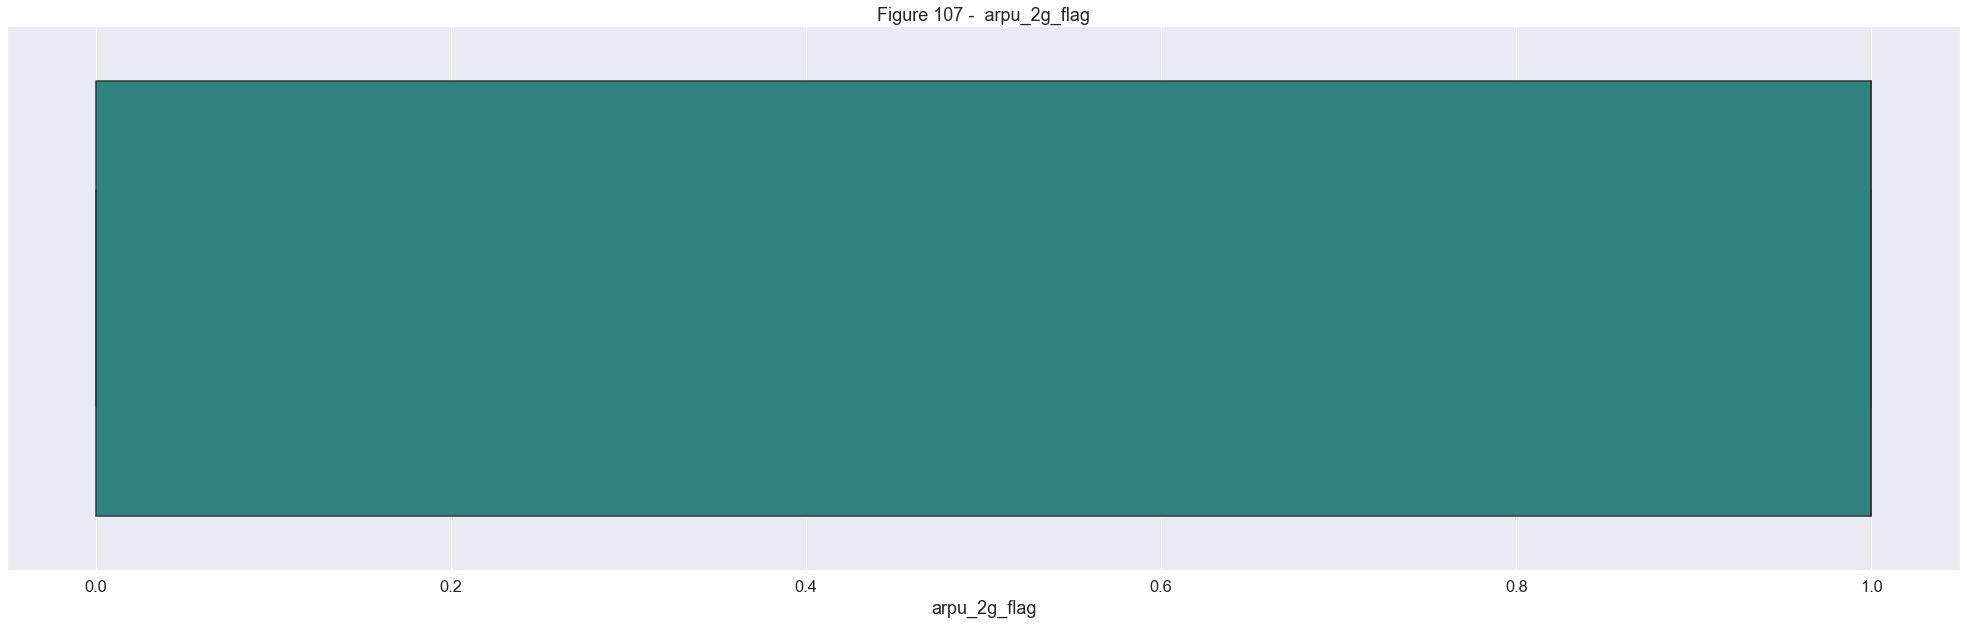

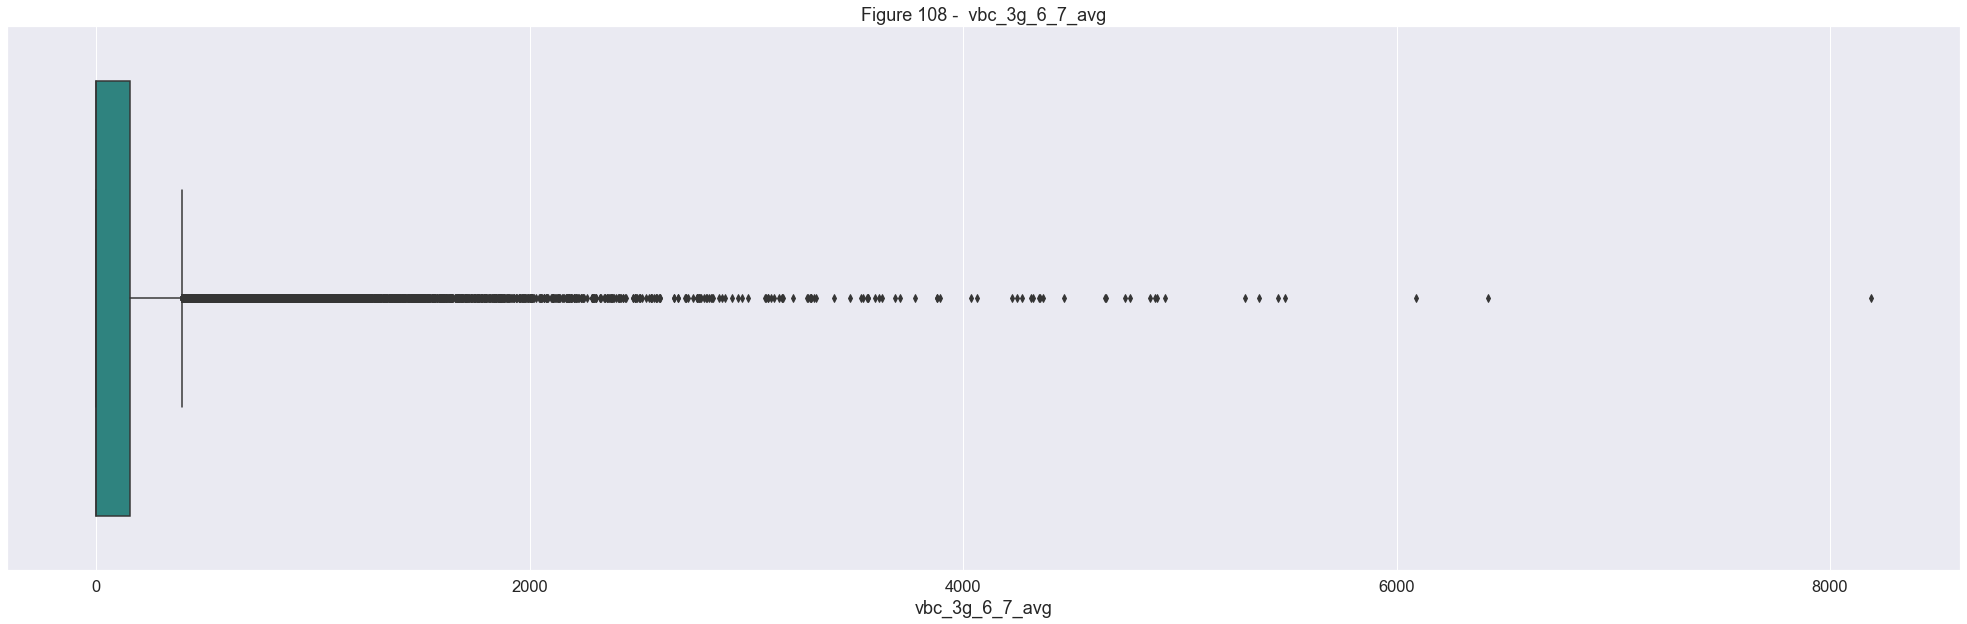

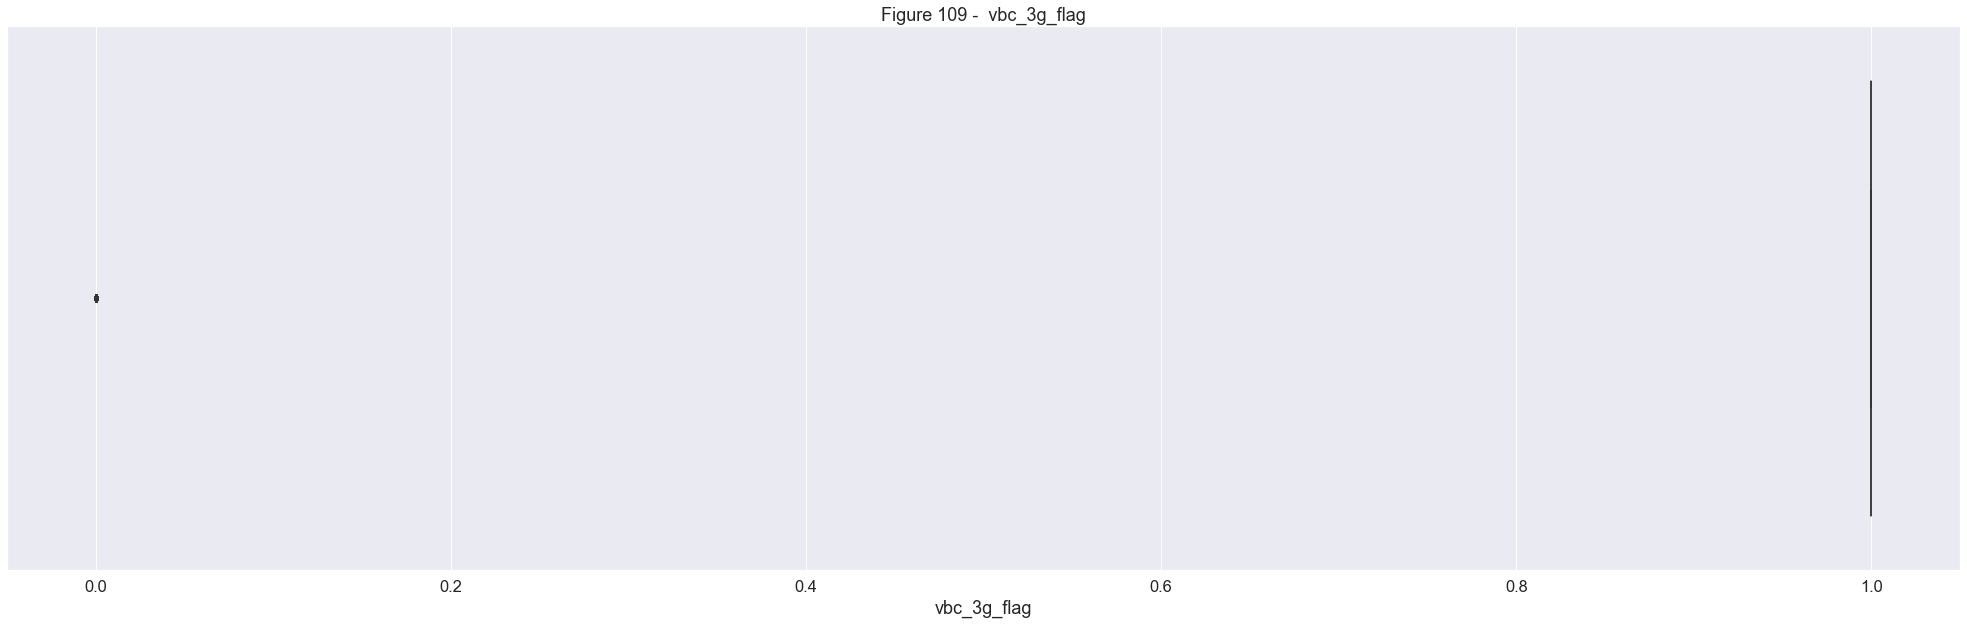

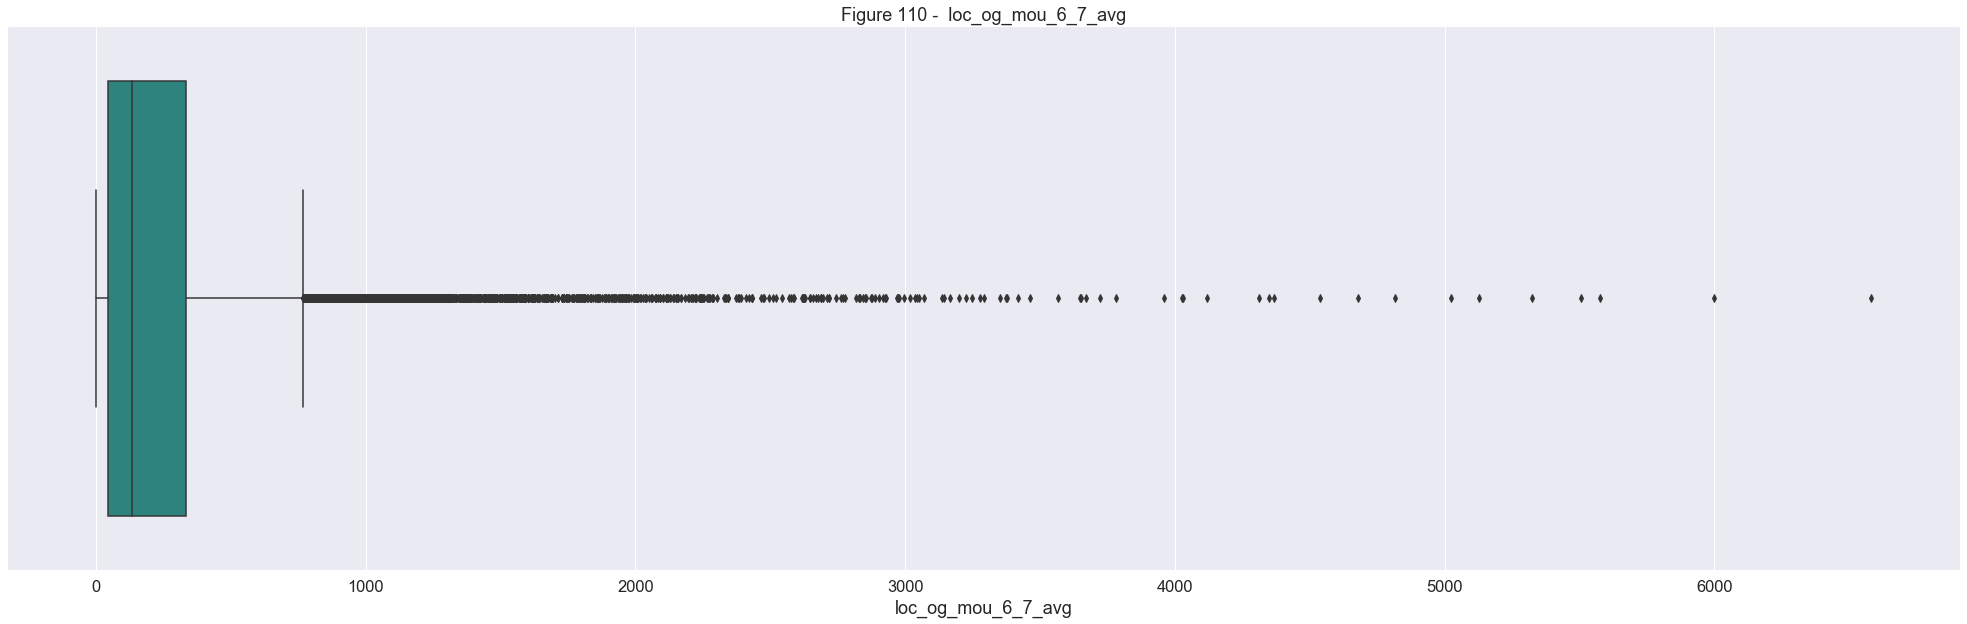

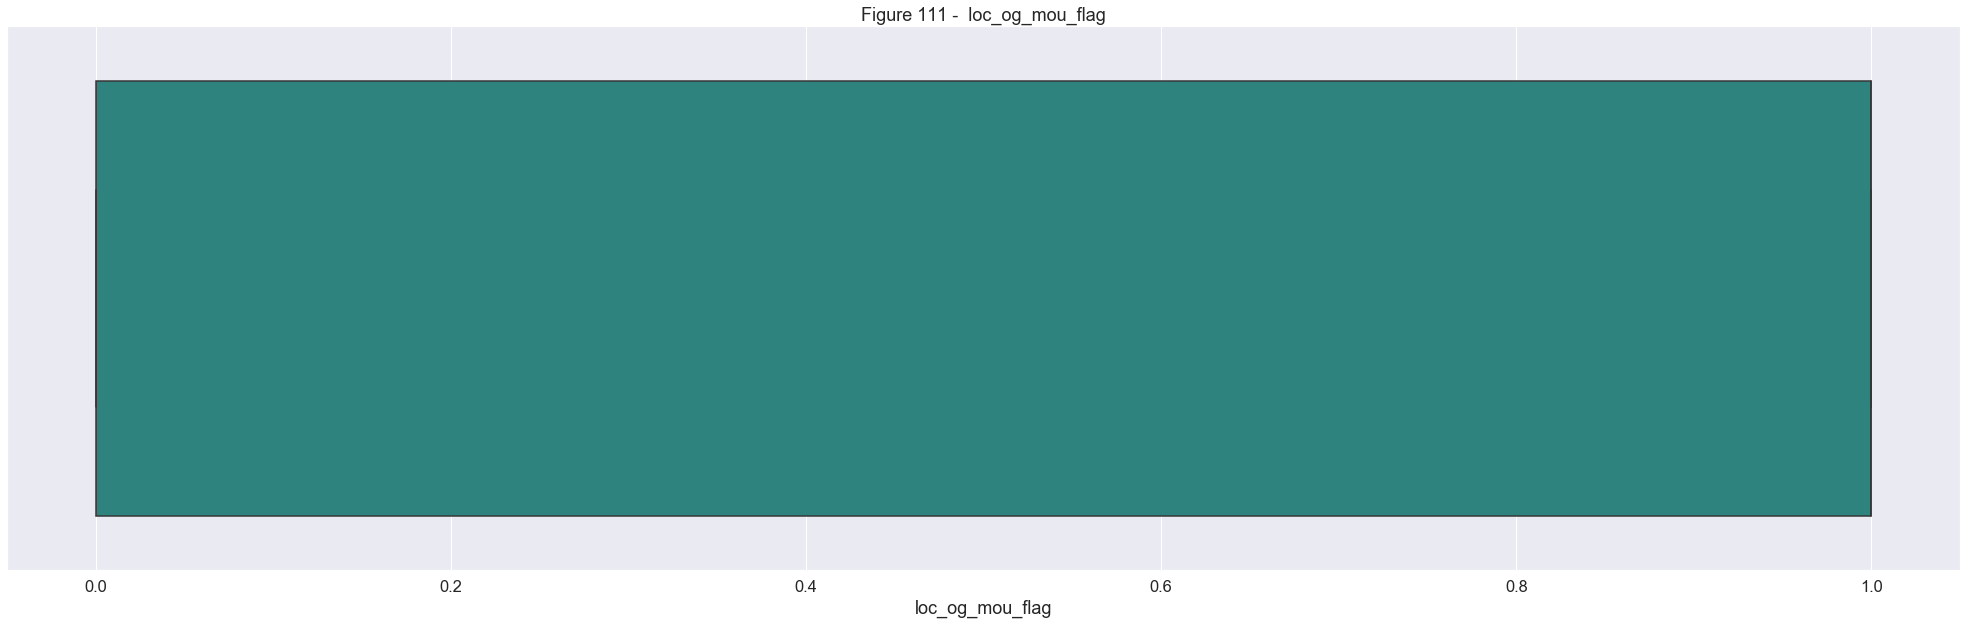

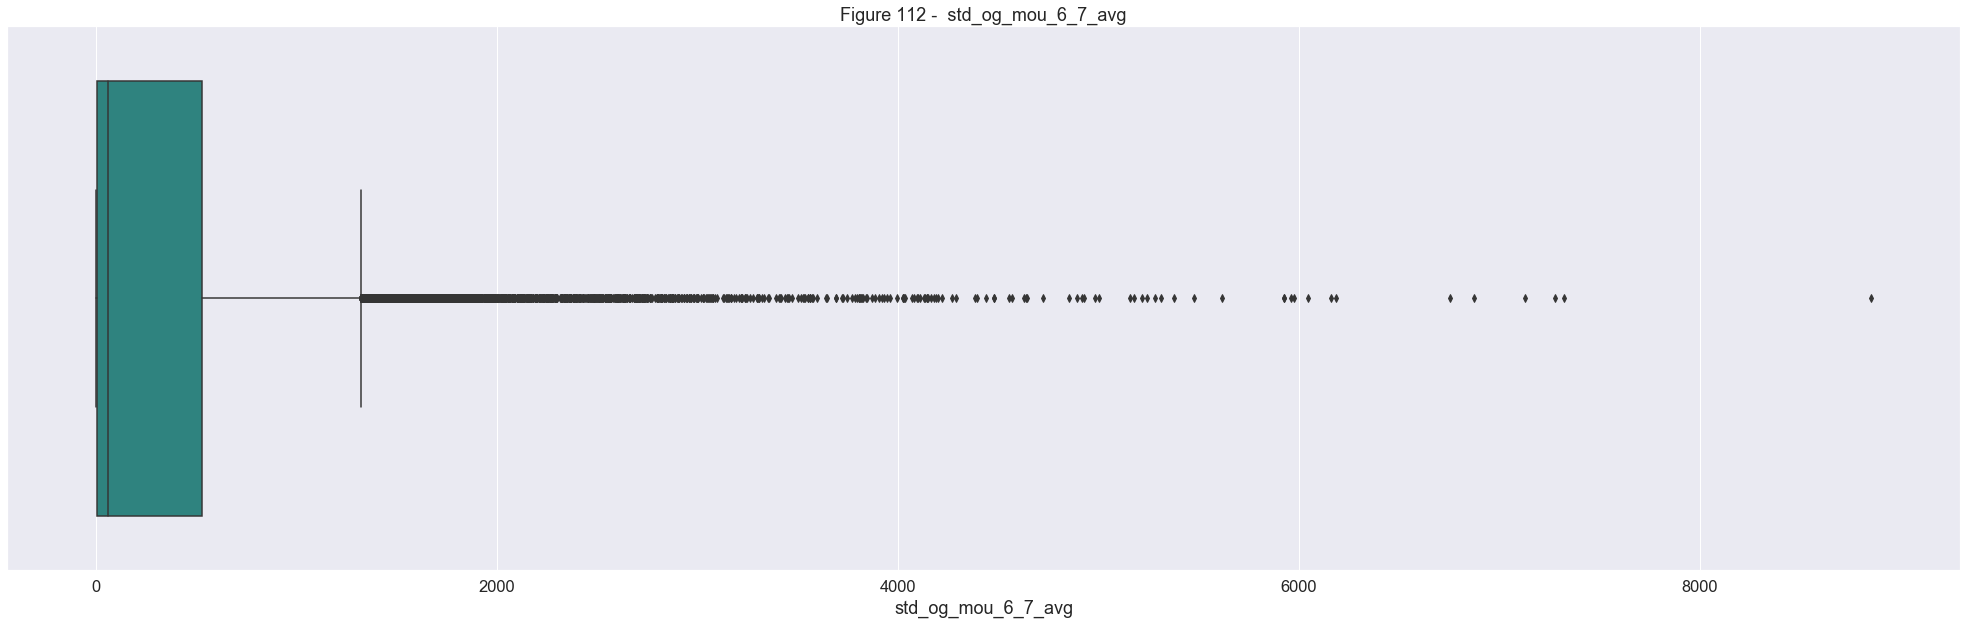

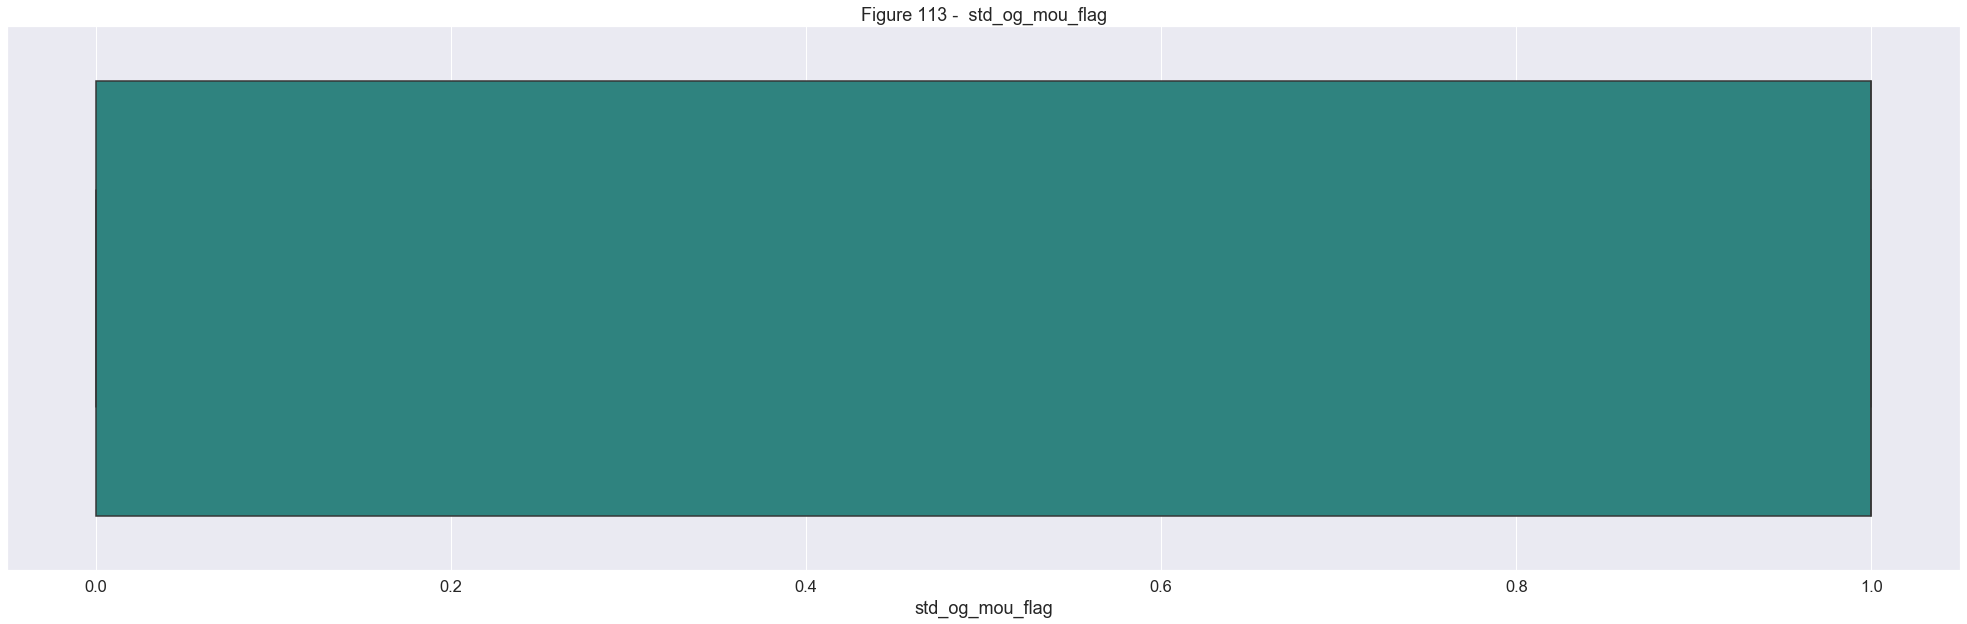

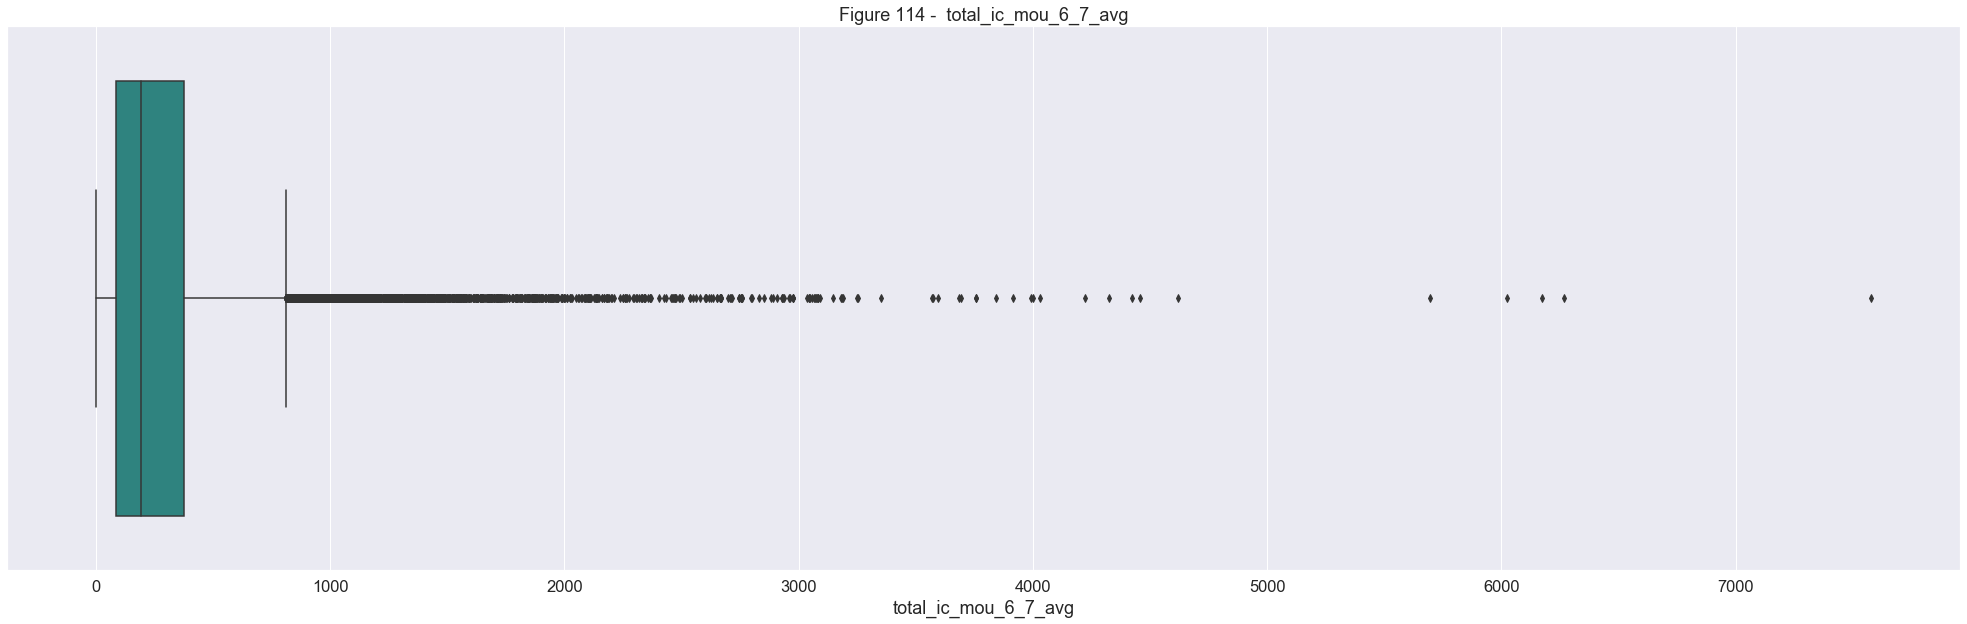

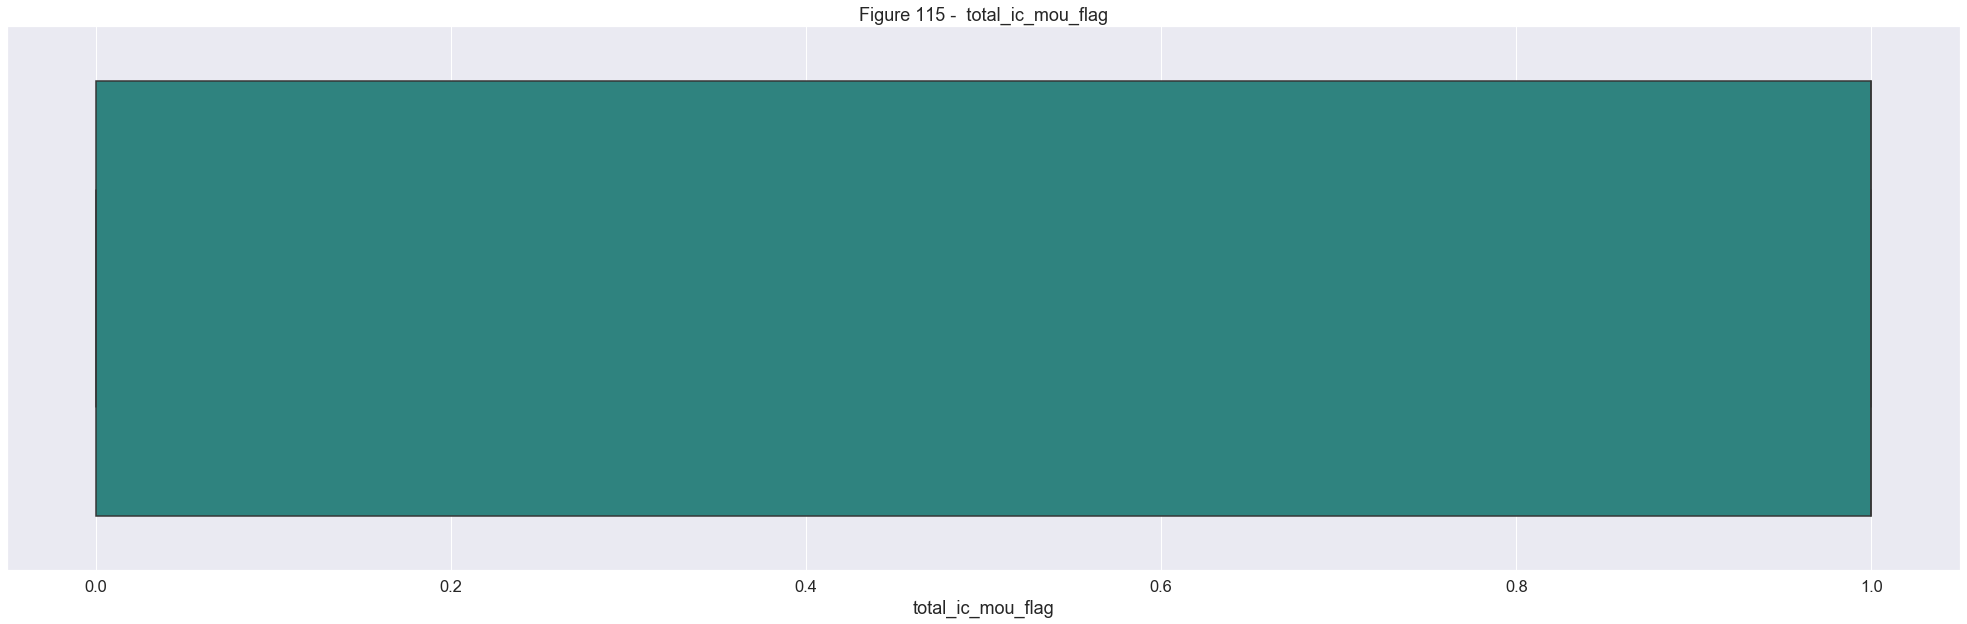

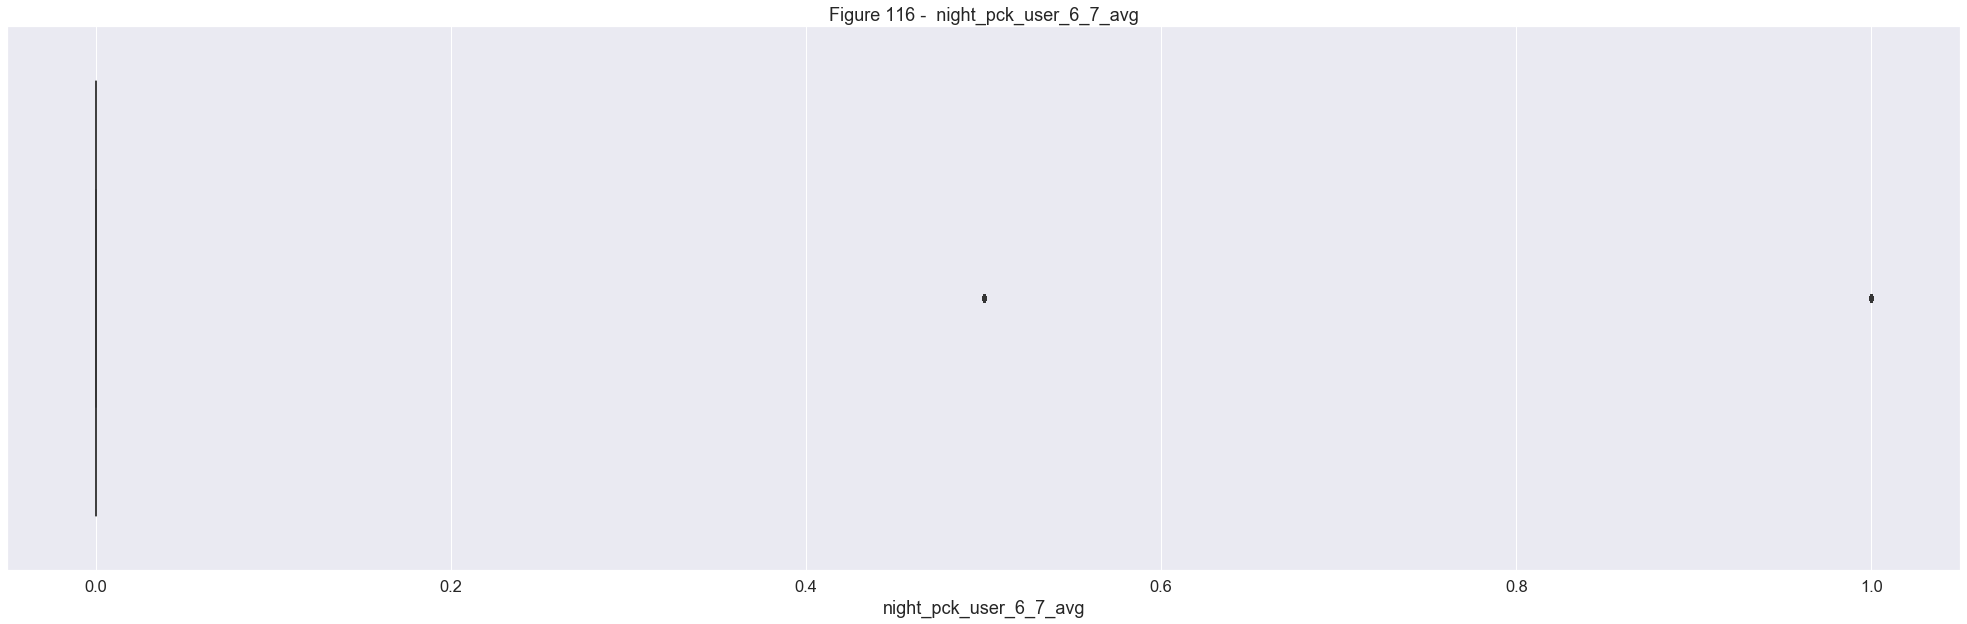

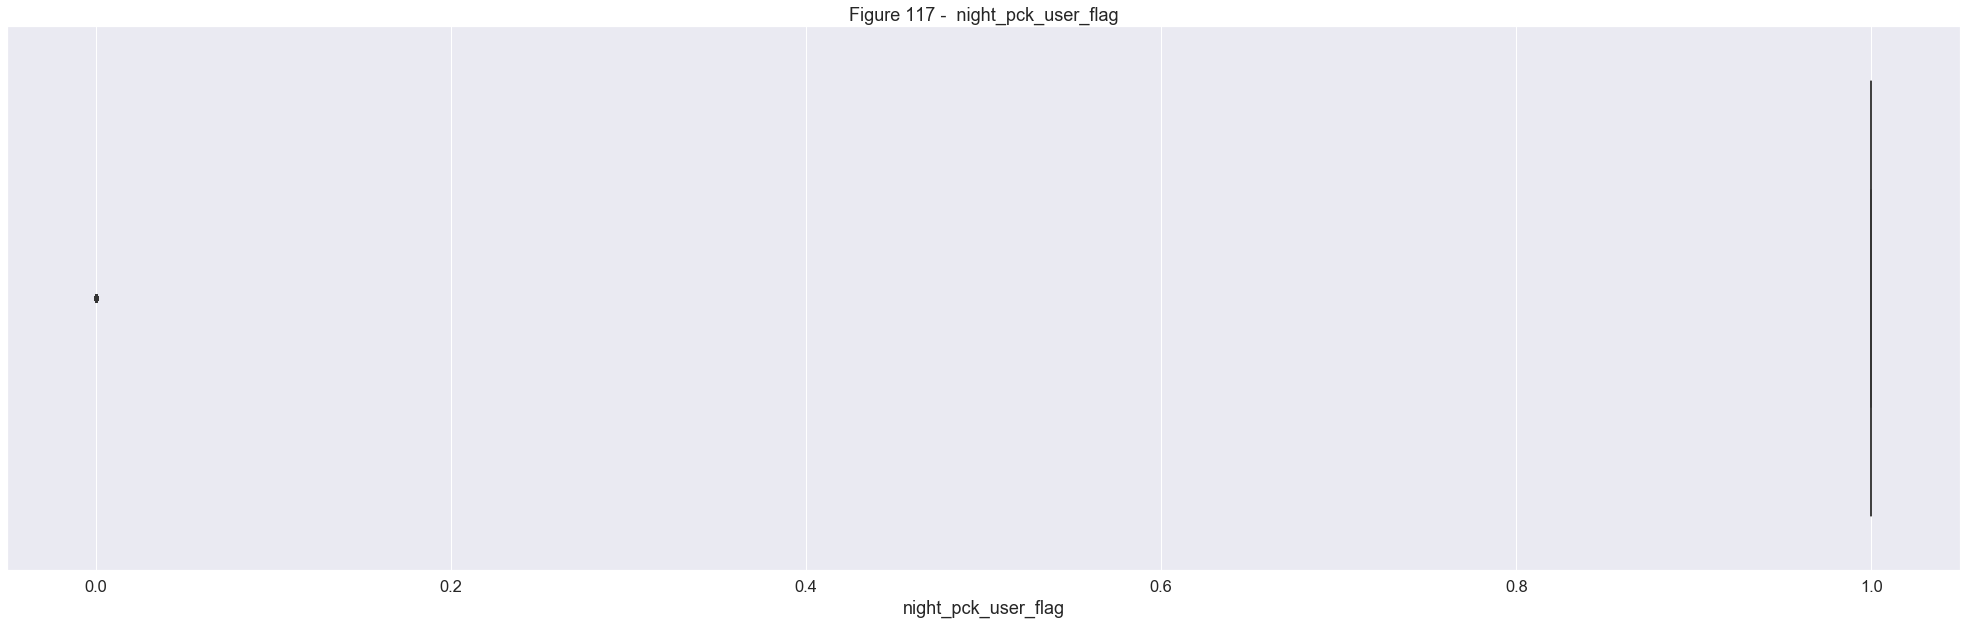

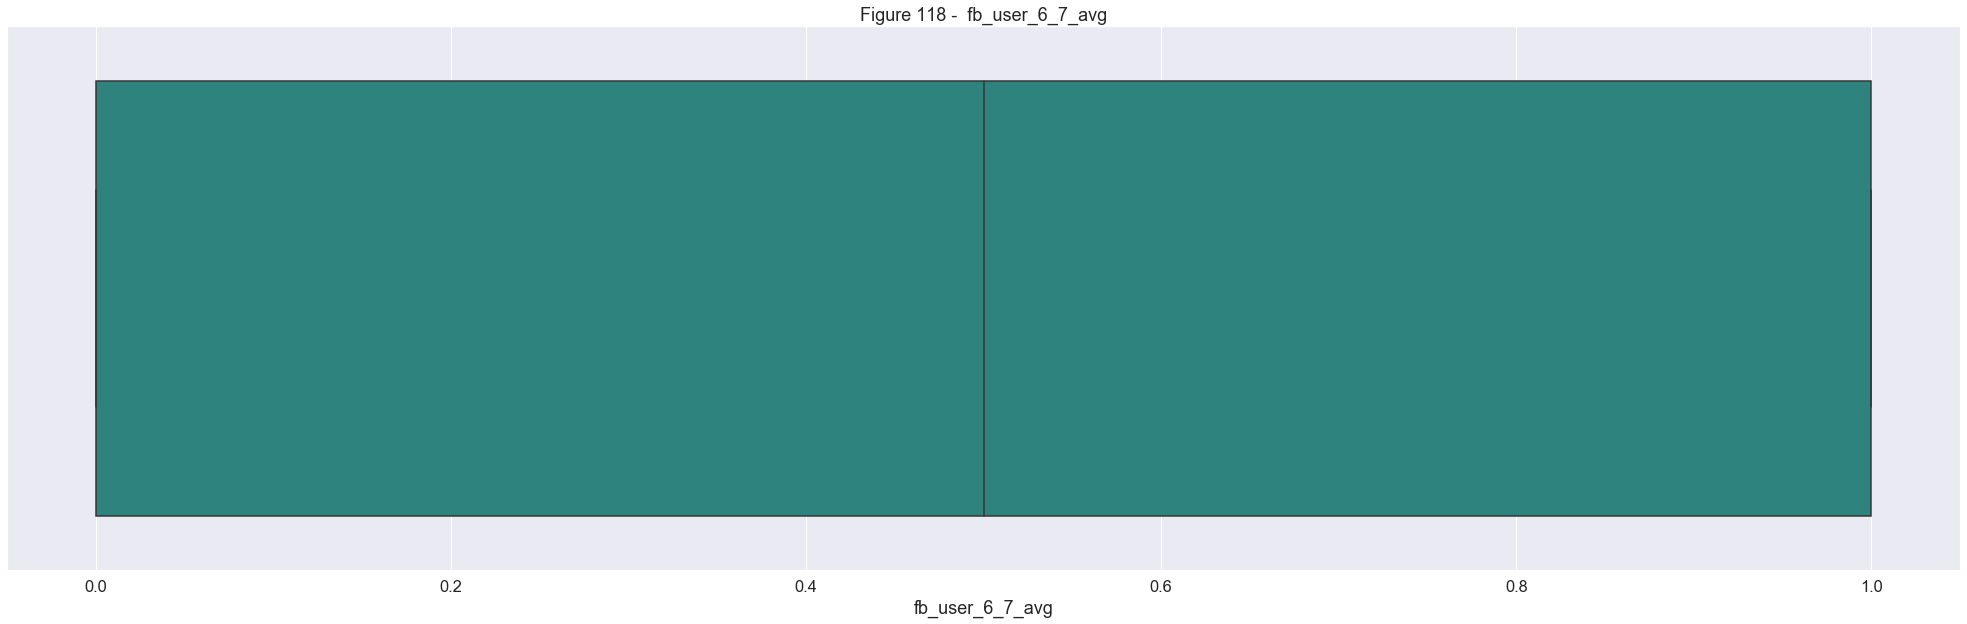

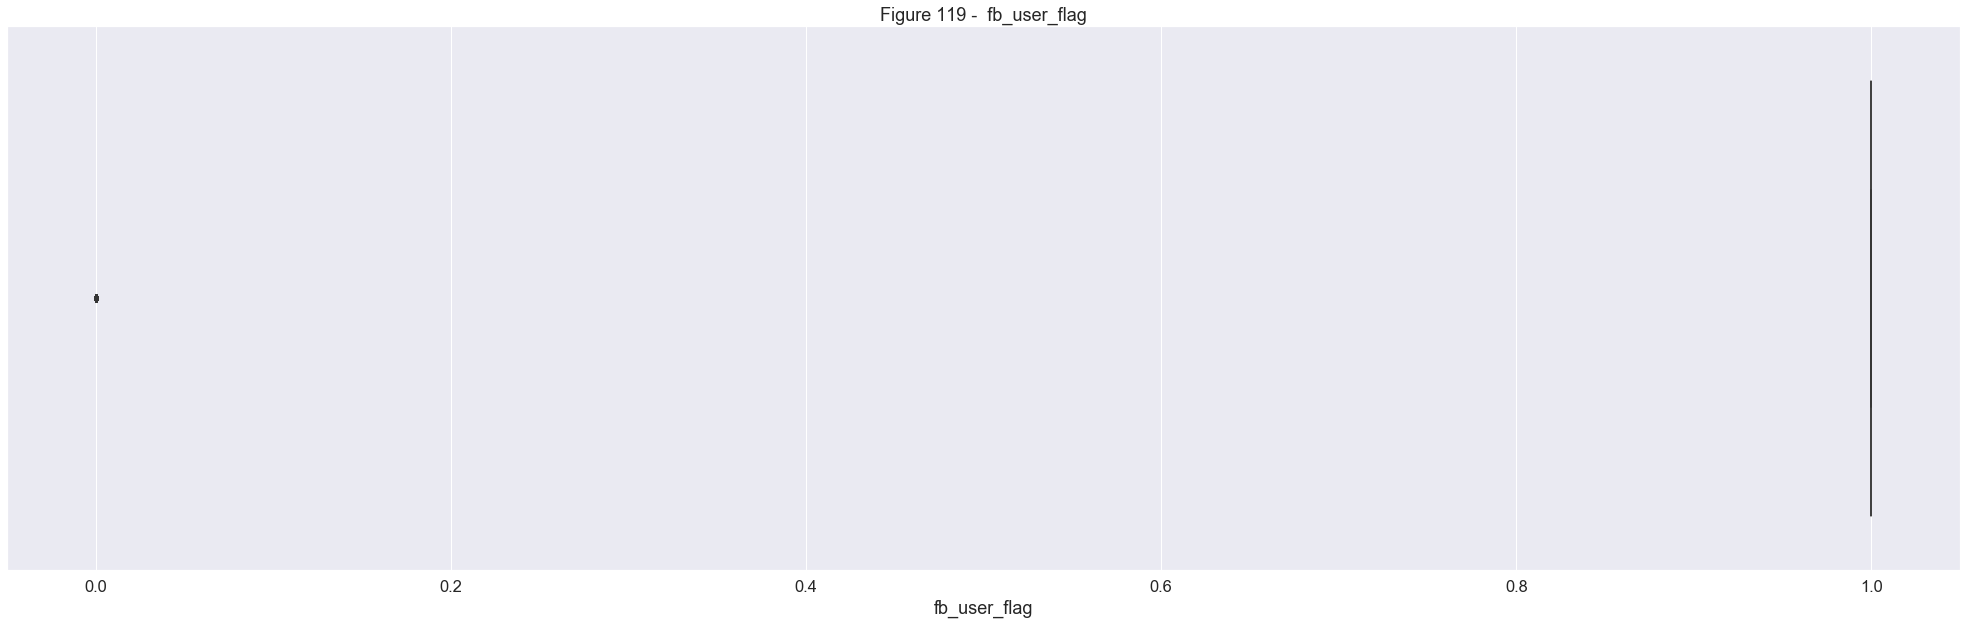

In [59]:
### ******** Create the box plots to check the outliers ********** |Start
edacols = list(df.columns)
for i in range(len(edacols)):
    plotbox(edacols[i],i,df)
### ******** Create the box plots to check the outliers ********** |Start

##### ******************************** There are 120 box plots below ******************************************

In [60]:
# Checking the Quantiles | Start
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# Checking the Quantiles | End

total_rech_num_6             9.000
total_rech_num_7             9.000
total_rech_num_8             9.000
max_rech_amt_6              90.000
max_rech_amt_7              90.000
max_rech_amt_8             148.000
last_day_rch_amt_6          95.000
last_day_rch_amt_7         110.000
last_day_rch_amt_8         130.000
total_rech_data_6            2.000
total_rech_data_7            2.000
total_rech_data_8            2.000
max_rech_data_6            154.000
max_rech_data_7            154.000
max_rech_data_8            154.000
count_rech_2g_6              0.000
count_rech_2g_7              0.000
count_rech_2g_8              0.000
count_rech_3g_6              0.000
count_rech_3g_7              0.000
count_rech_3g_8              0.000
av_rech_amt_data_6         198.000
av_rech_amt_data_7         210.000
av_rech_amt_data_8         196.000
aon                       1296.000
sep_vbc_3g                   0.000
total_data_rech_amt_6      400.000
total_data_rech_amt_7      575.000
total_data_rech_amt_

In [61]:
## *** Lets take a copy of the original data to check the outliers ****** | Start
df_quant = df.copy(deep=True)
## *** Lets take a copy of the original data to check the outliers ****** | End

In [62]:
# Checking the Outliers | Start
#for cols in df_quant.columns:
    #if(cols != ['churn']):
        #Q1 = df_quant[cols].quantile(0.25)
        #Q3 = df_quant[cols].quantile(0.75)
        #IQR = Q3 - Q1
        #df_quant = df_quant[~((df_quant[cols] < (Q1 - 1.5*IQR)) | (df_quant[cols] > (Q3 + 1.5*IQR)))]
# Checking the Outliers | End

In [63]:
# Checking the Outliers | Start
df_outliers = df_quant[((df_quant < (Q1 - 1.5*IQR)) | (df_quant > (Q3 + 1.5*IQR))).any(axis=1)]
len(df_outliers)
# Checking the Outliers | End

29888

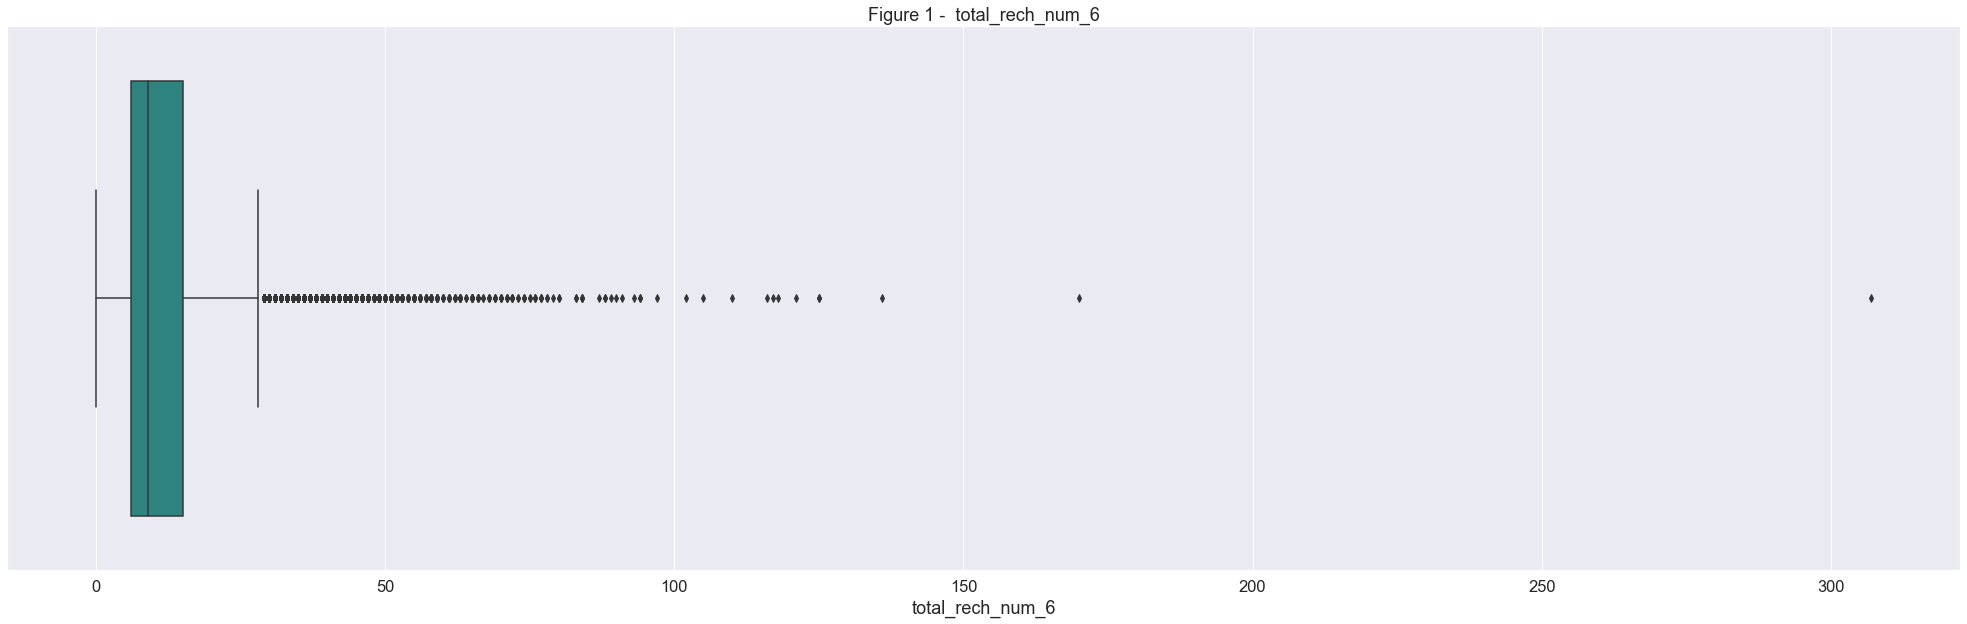

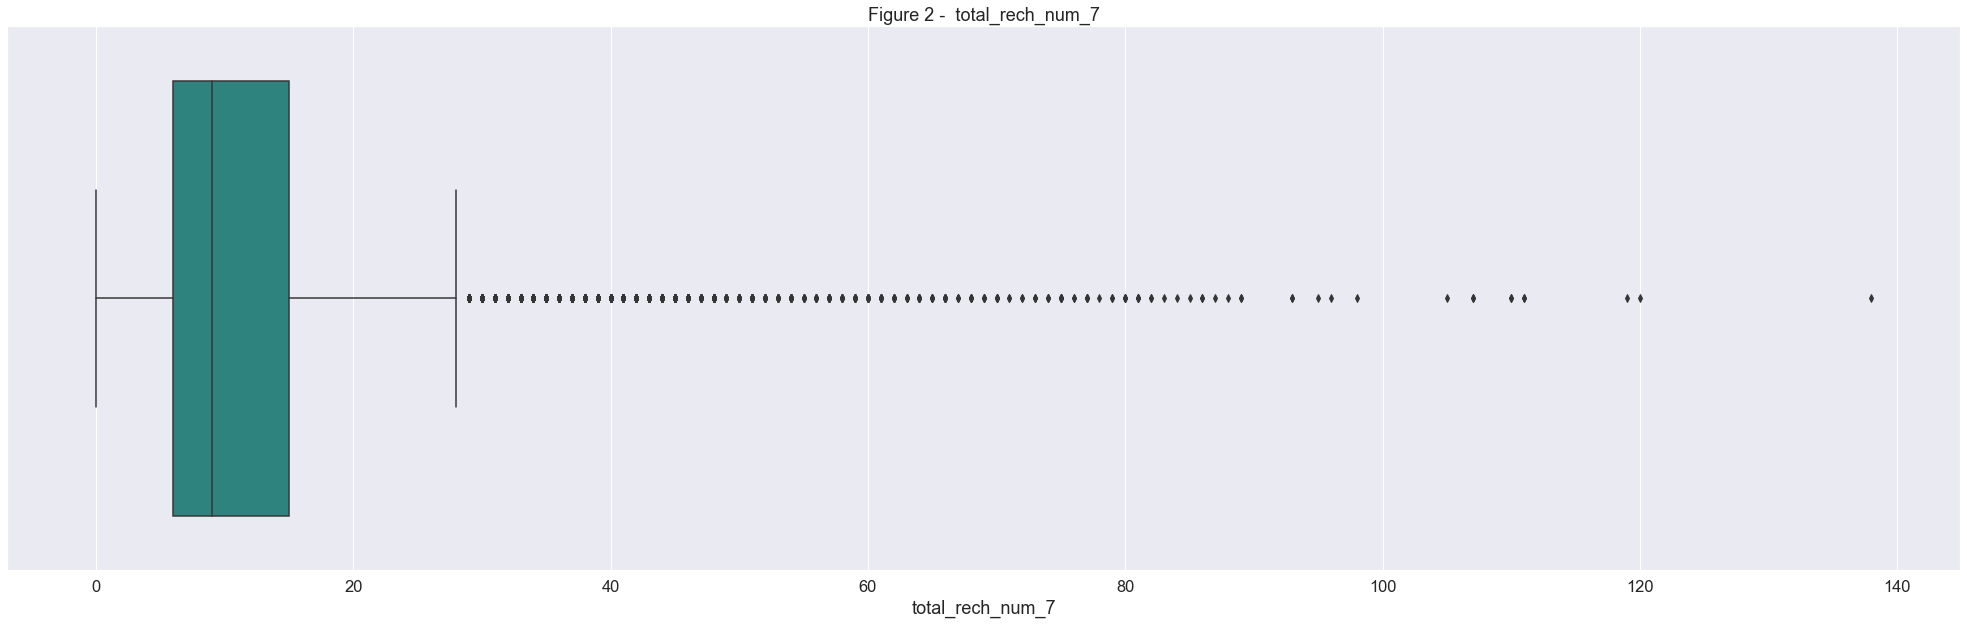

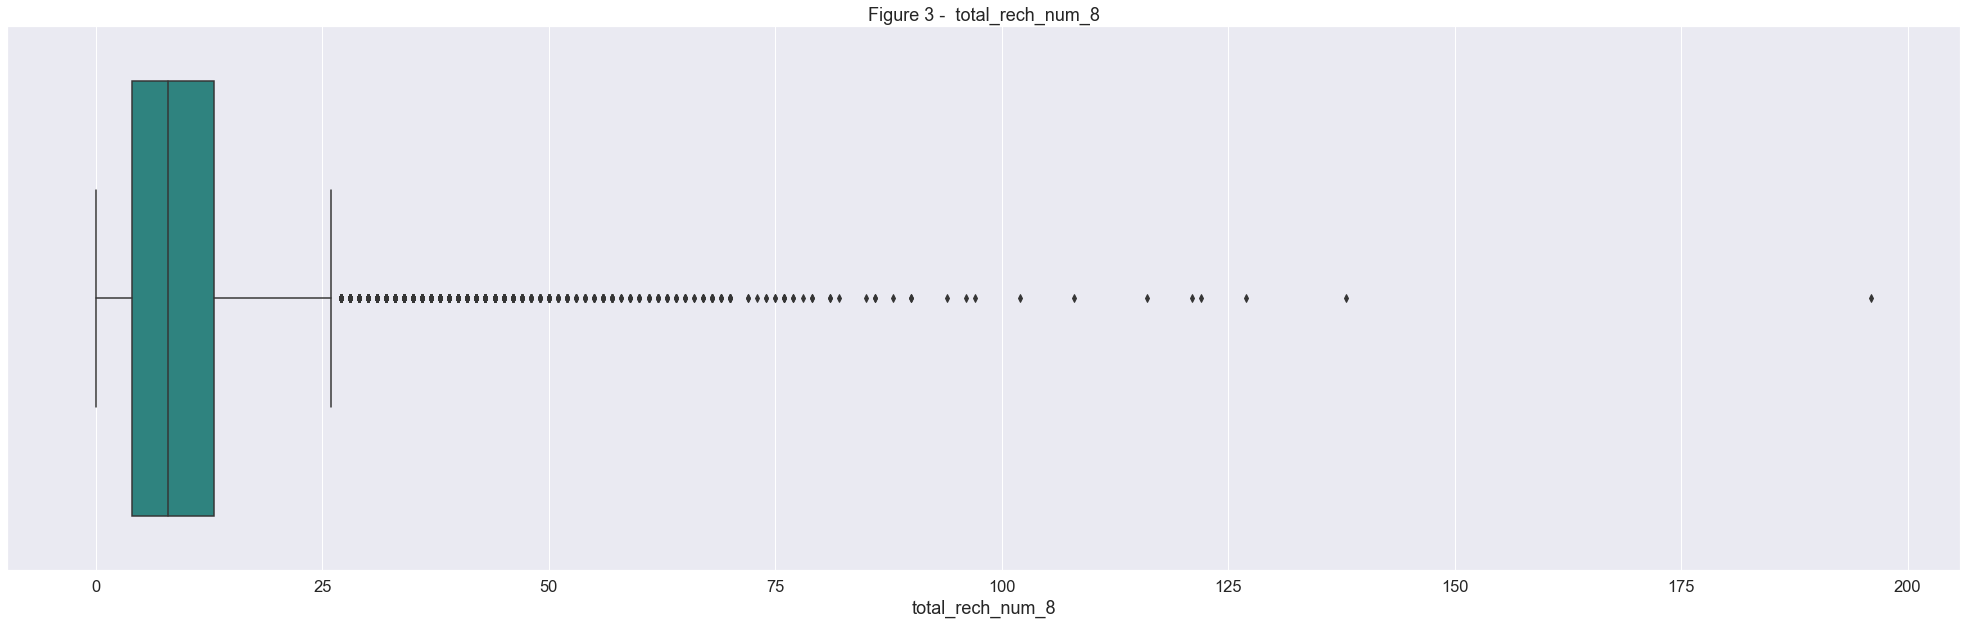

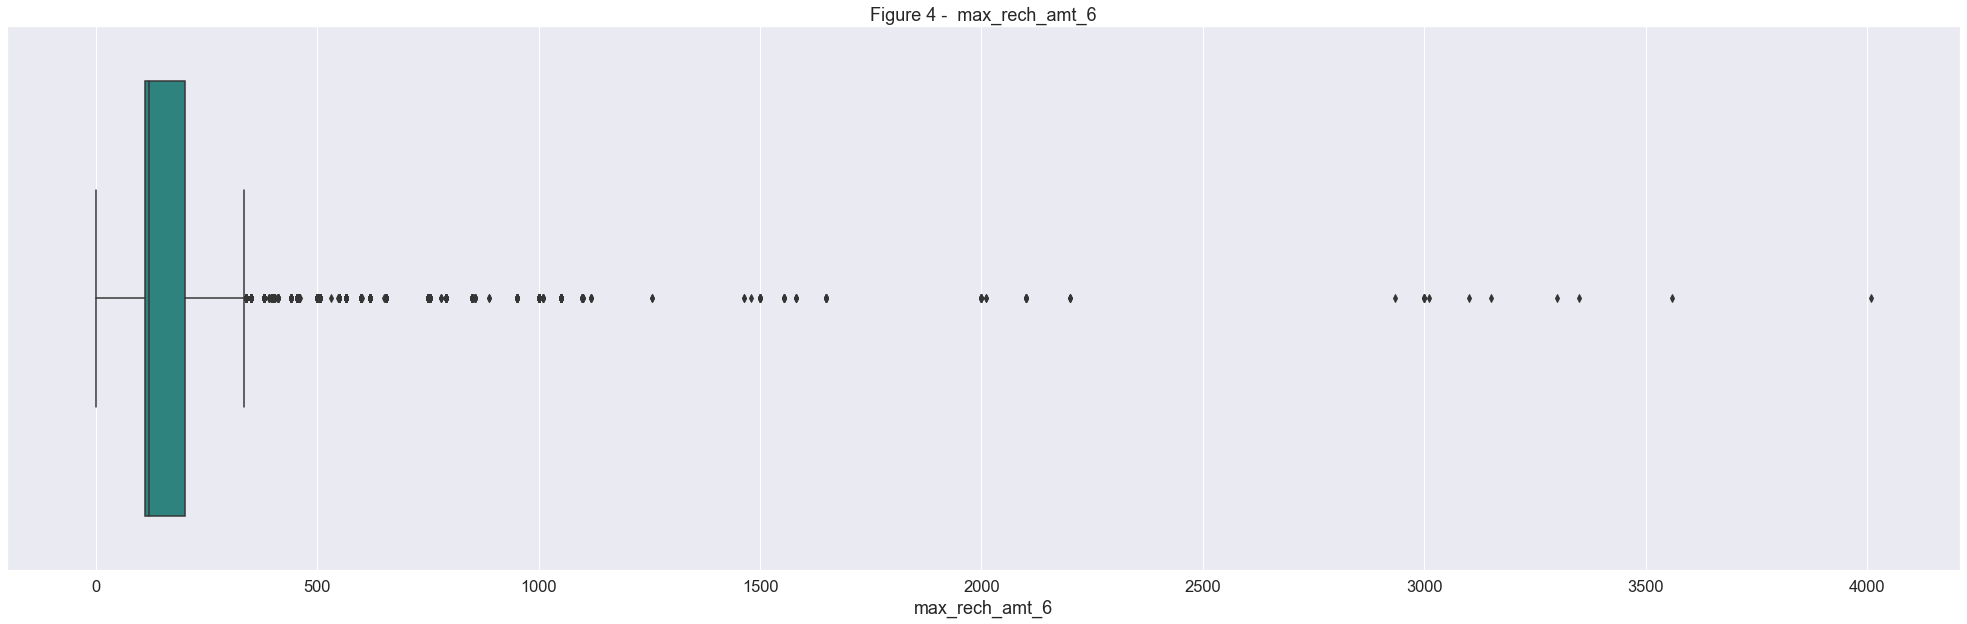

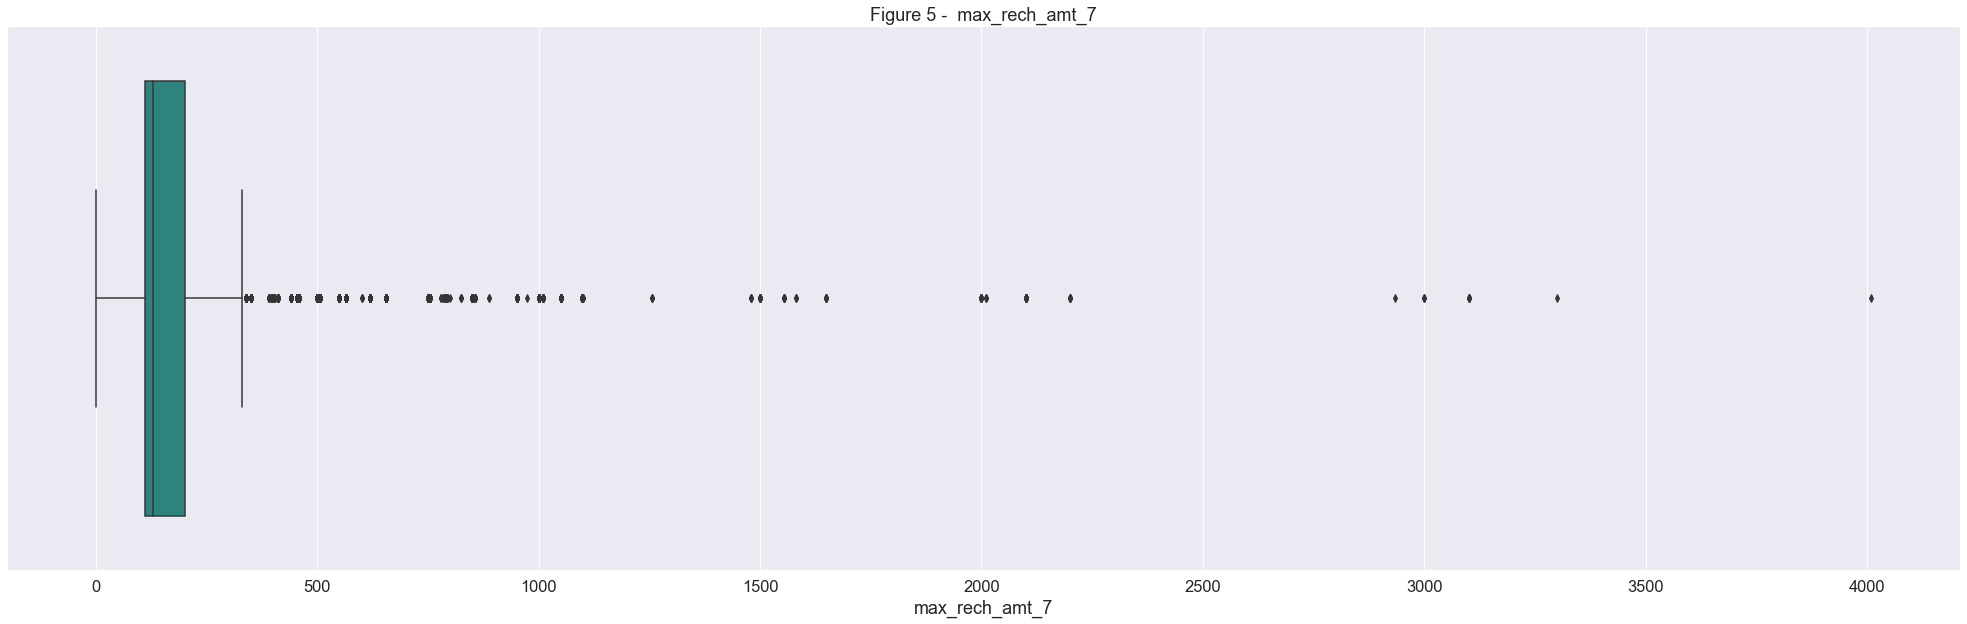

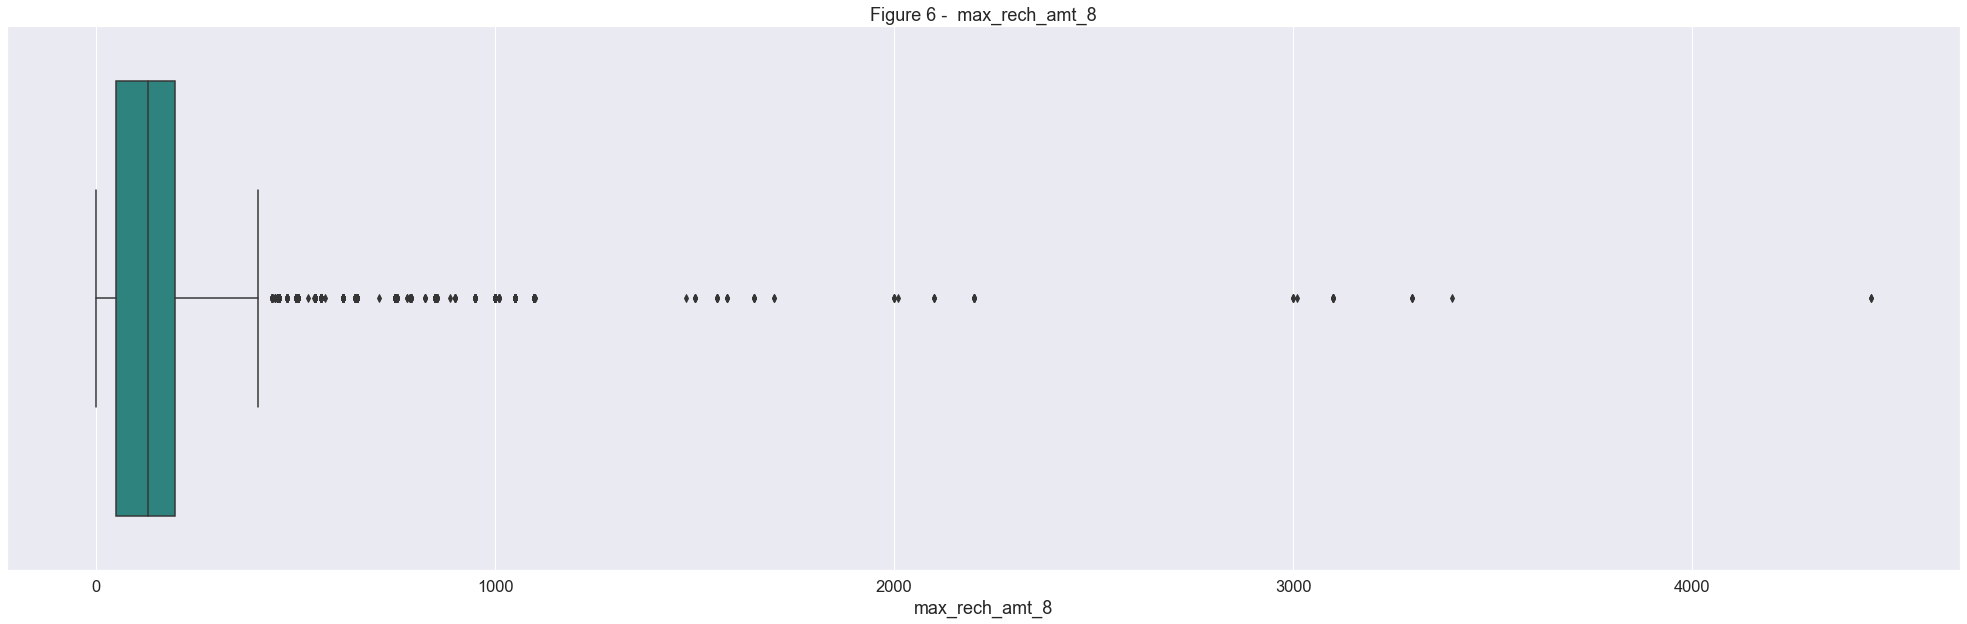

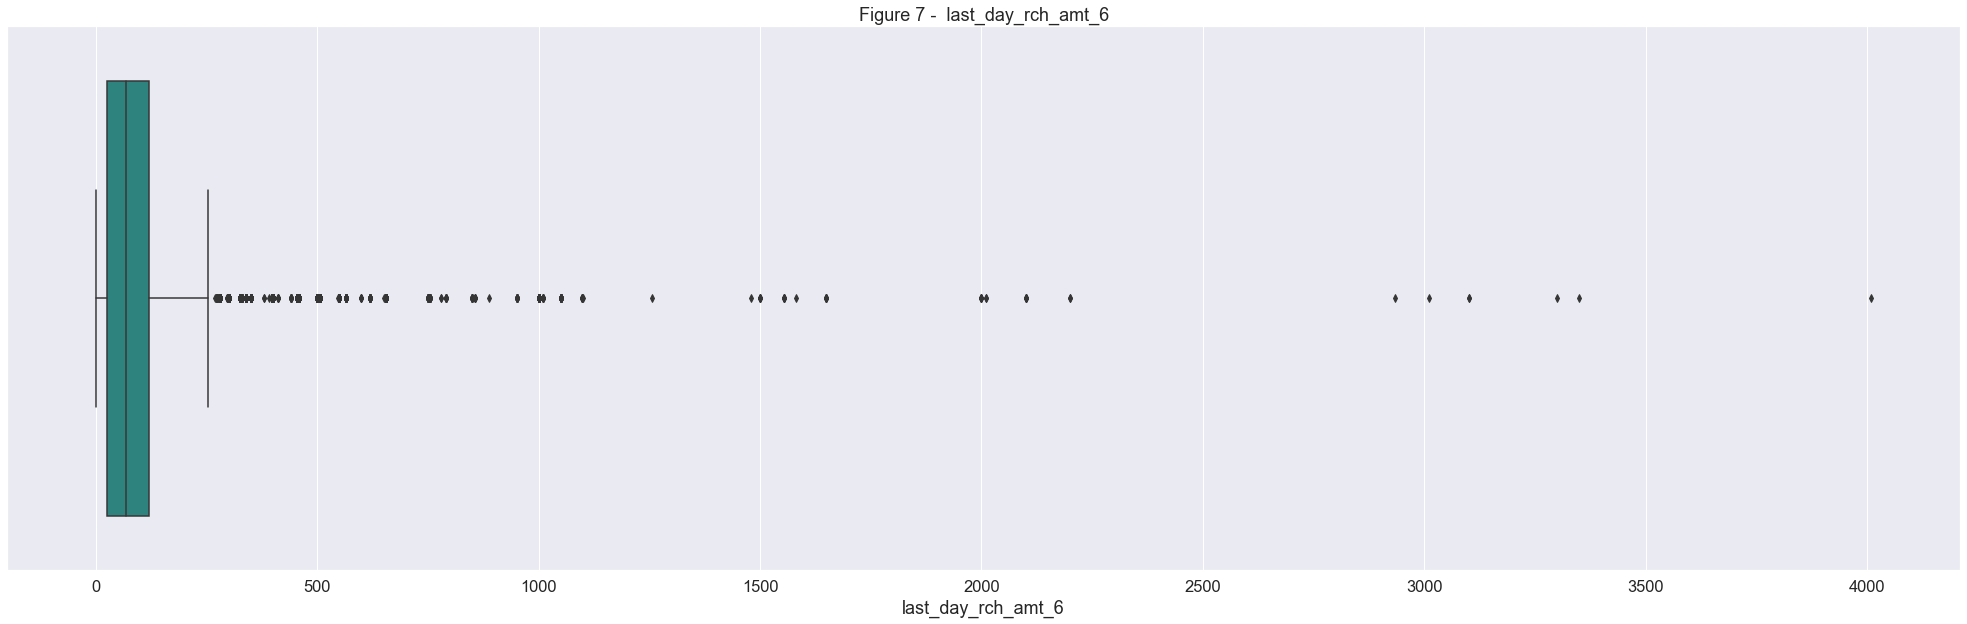

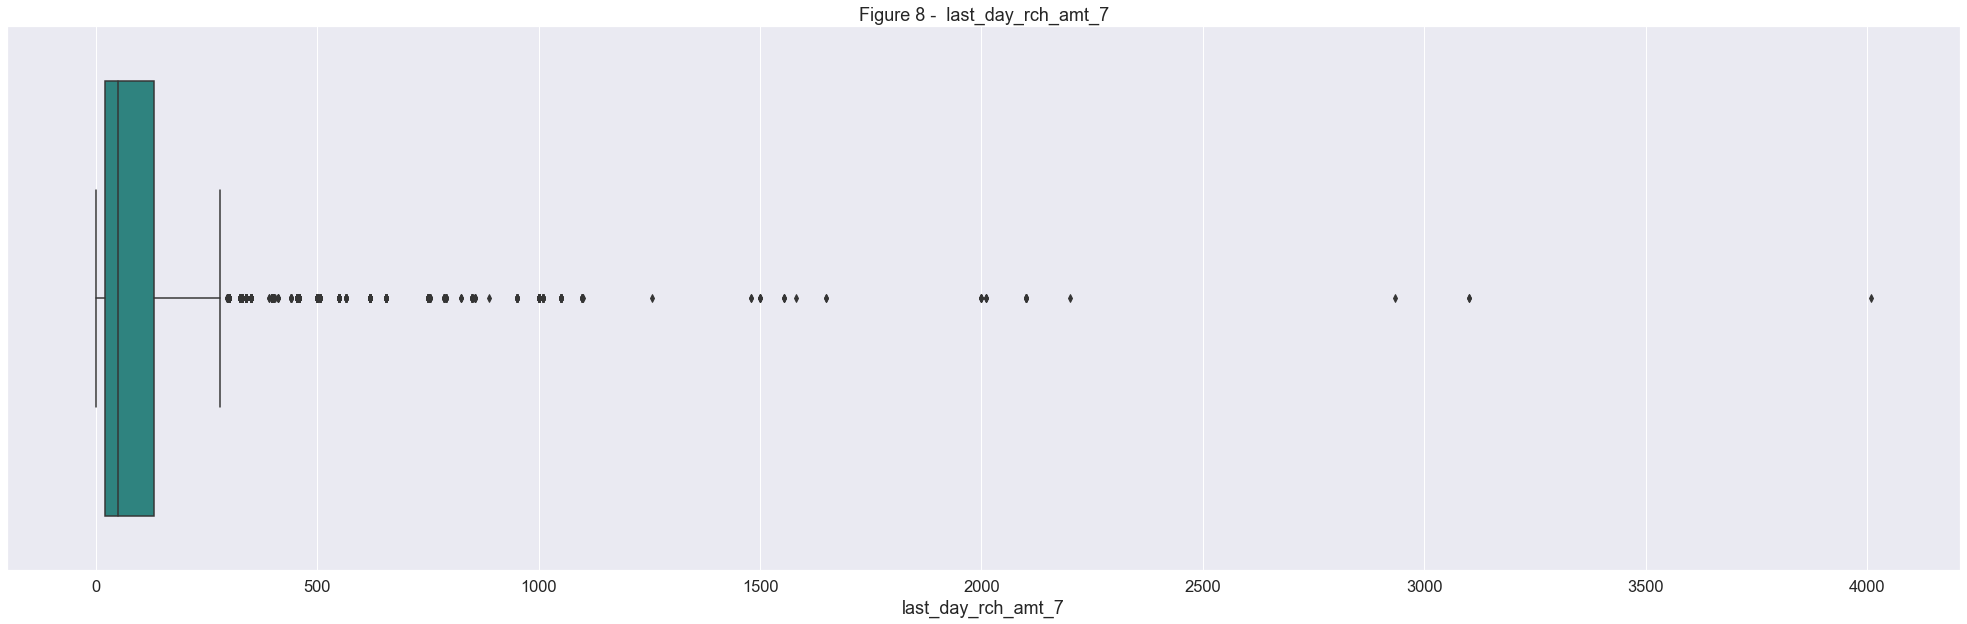

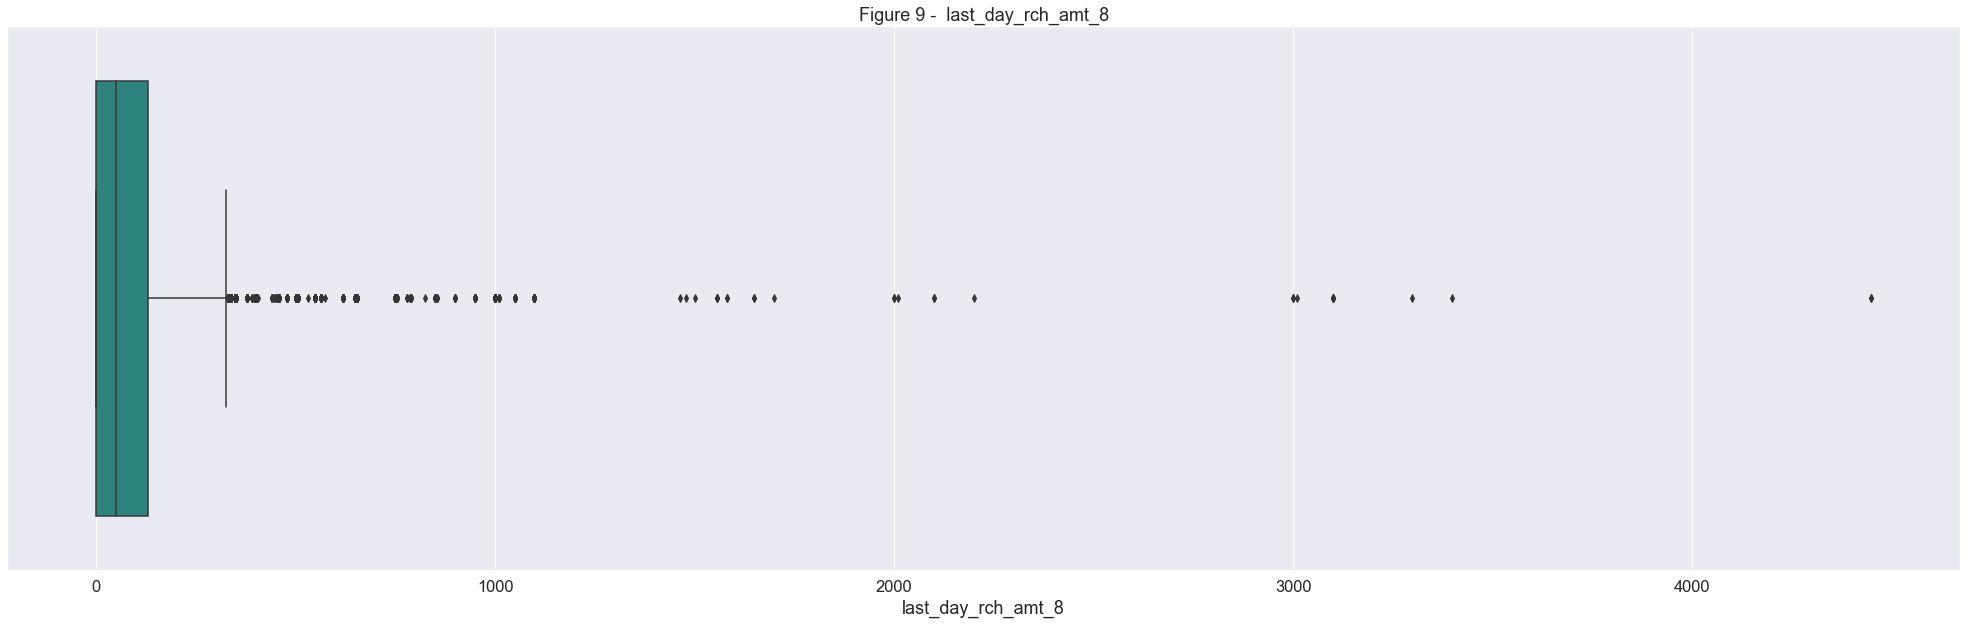

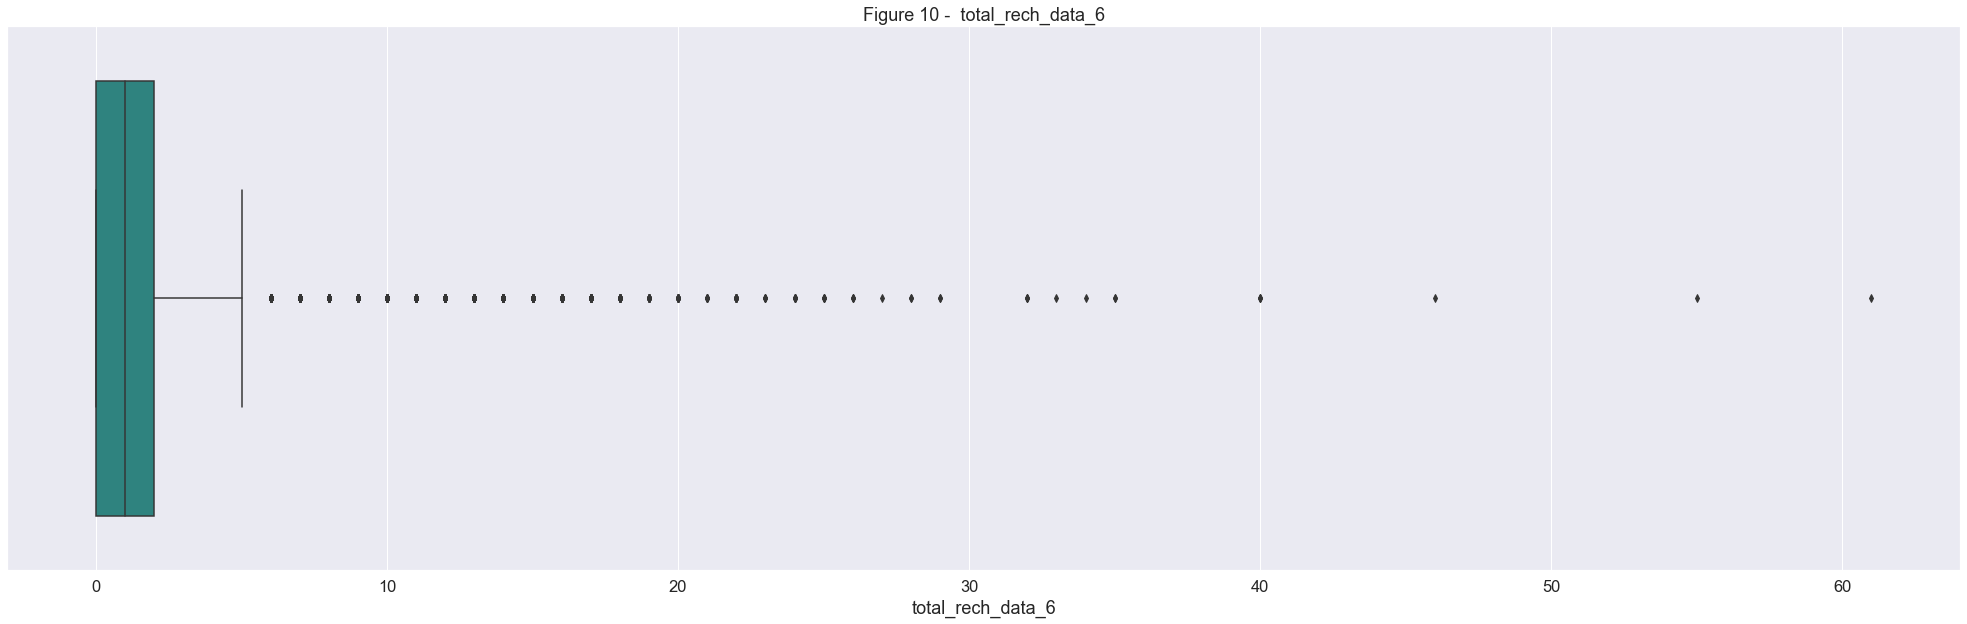

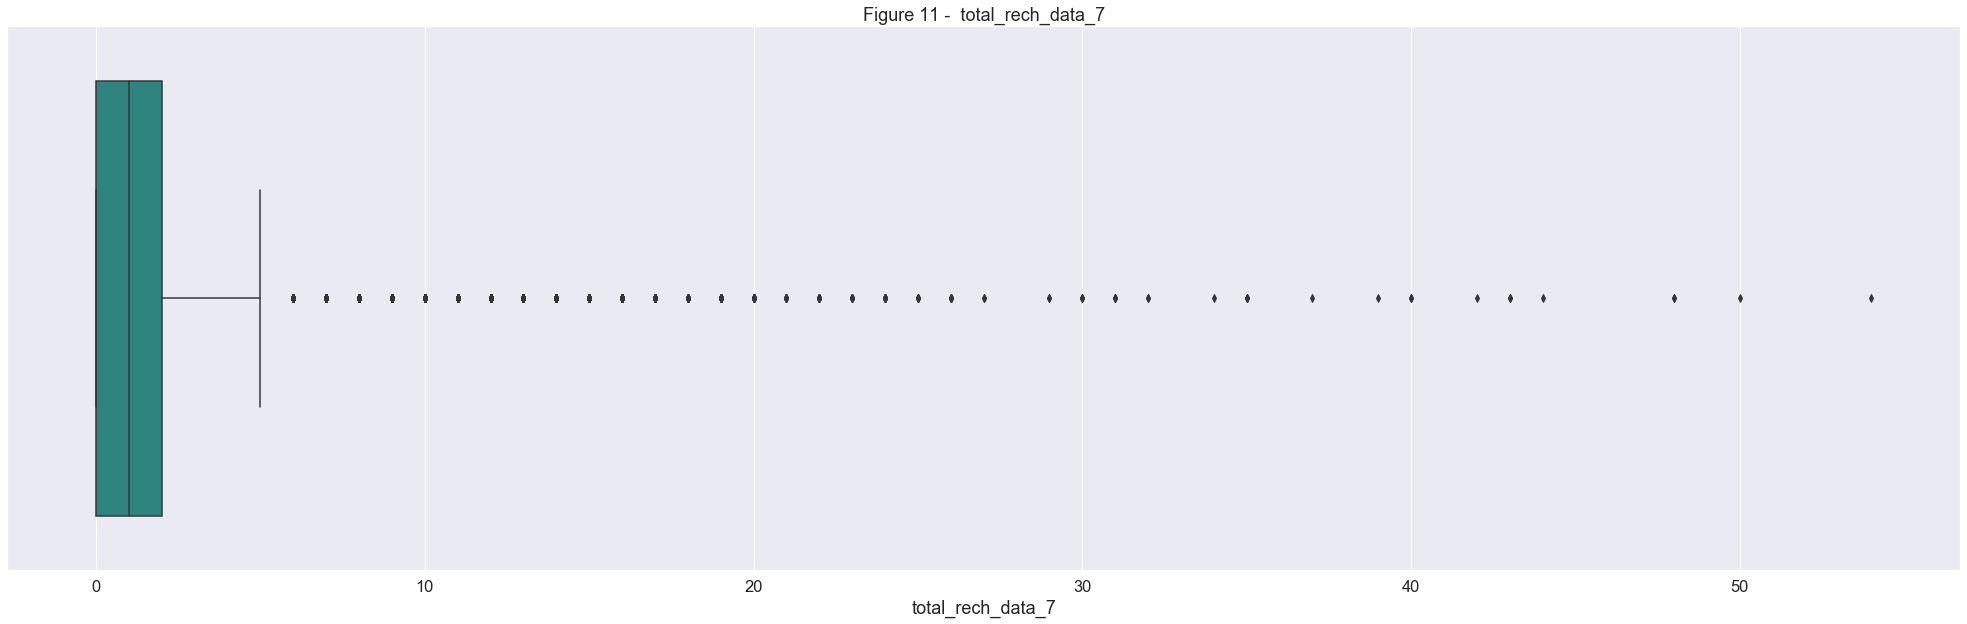

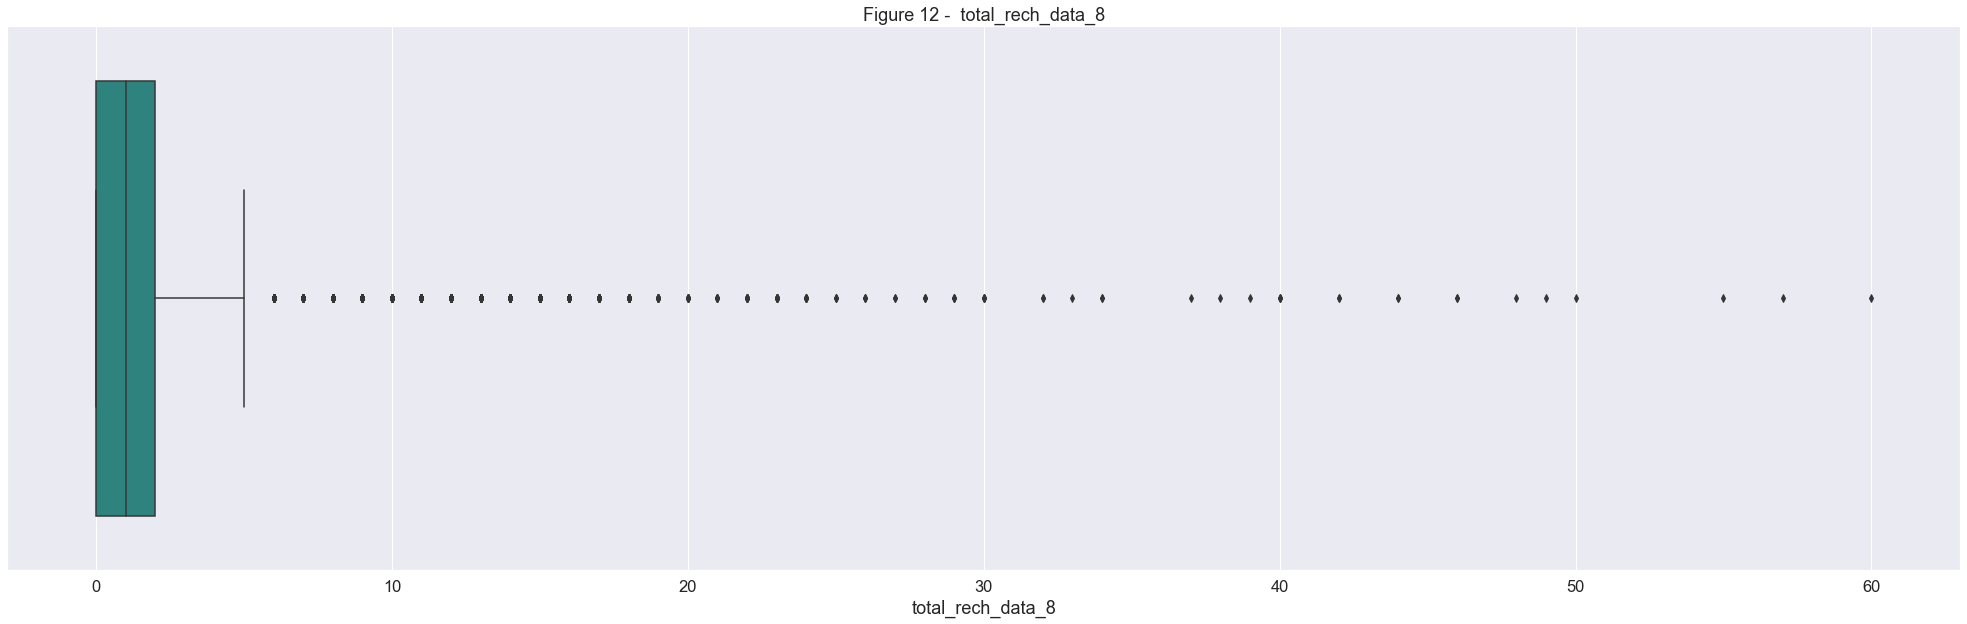

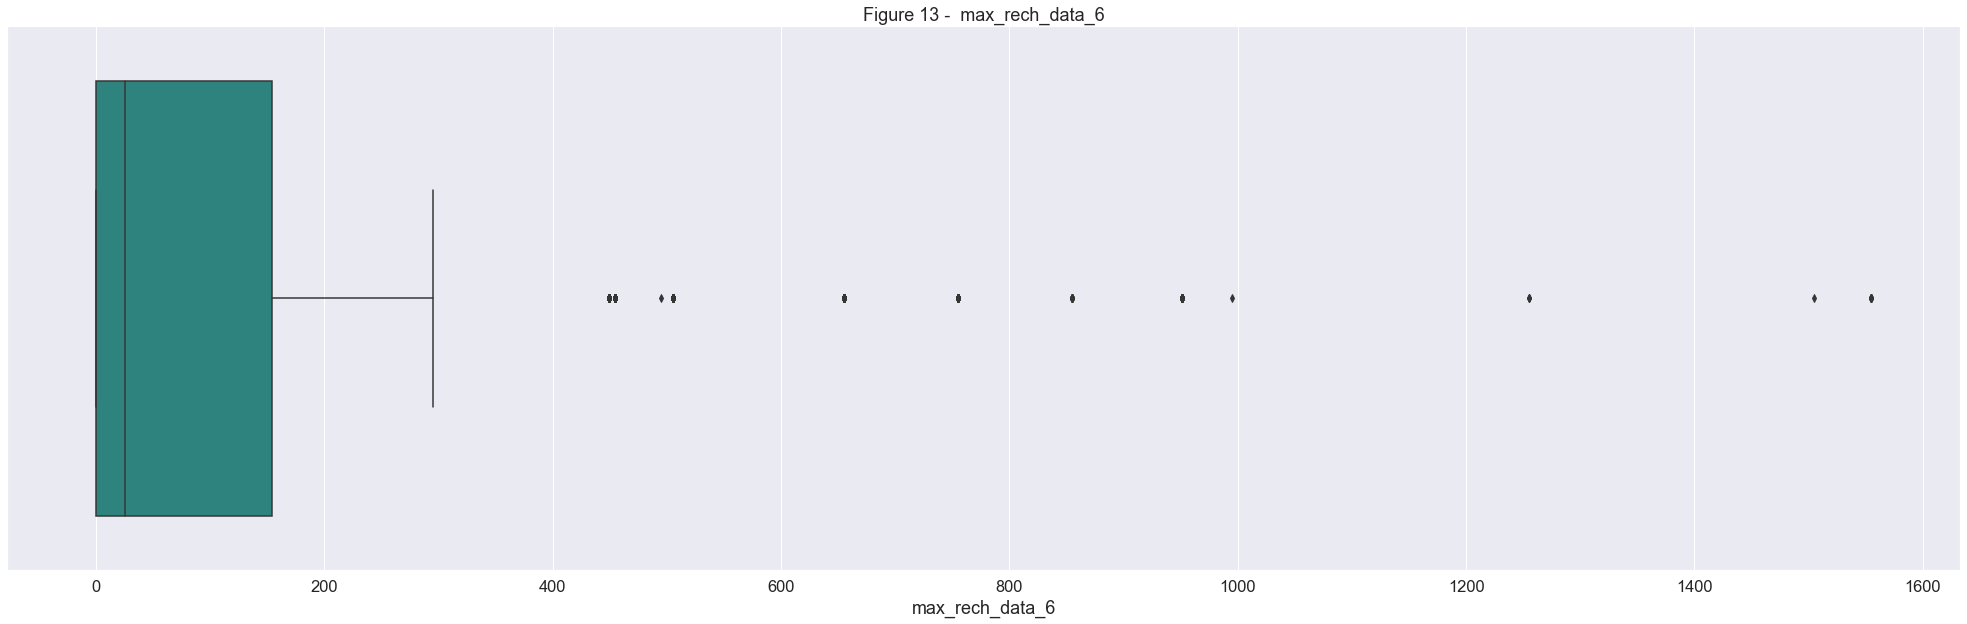

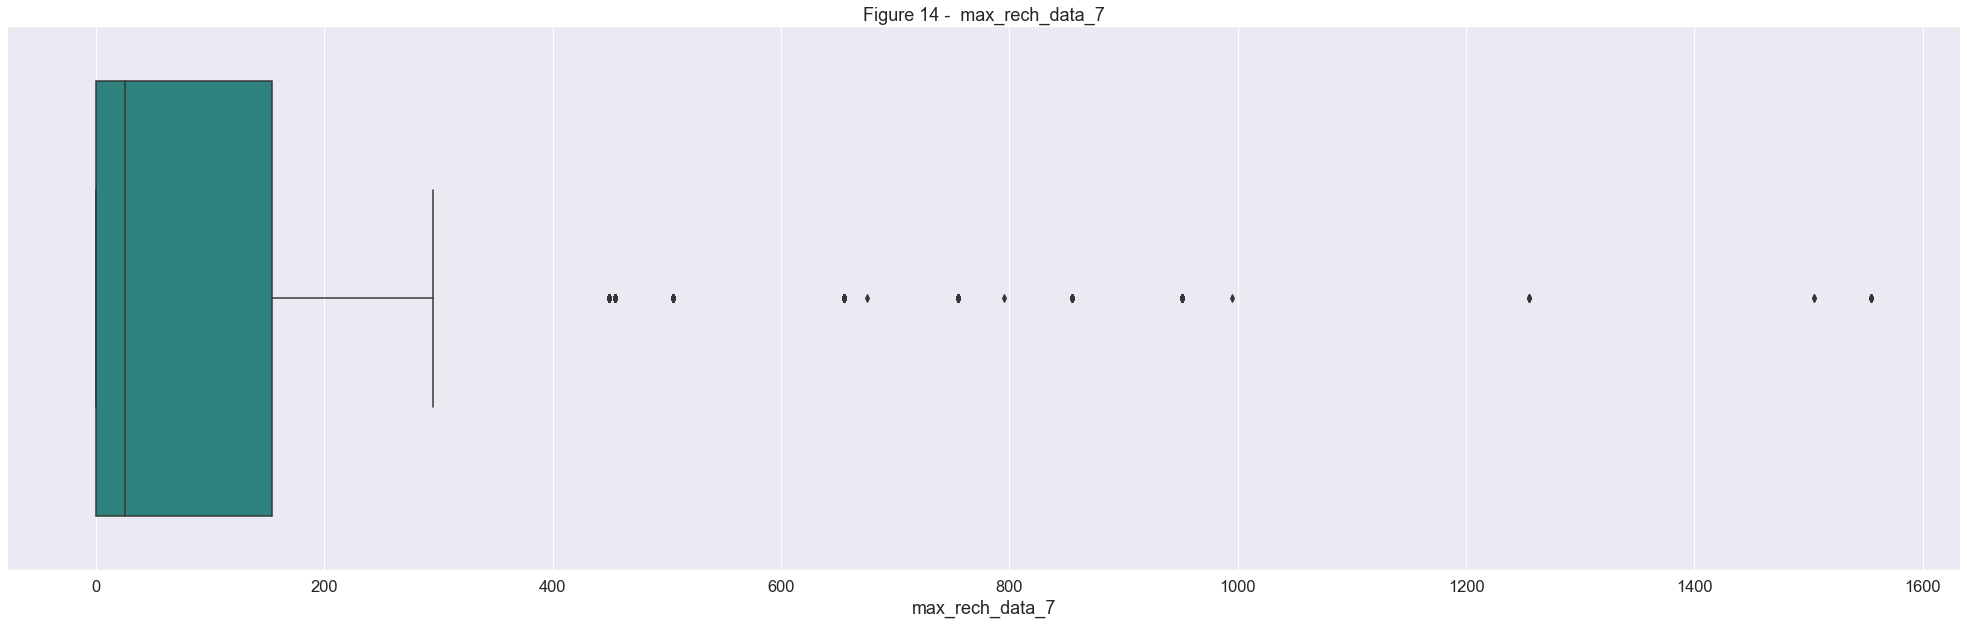

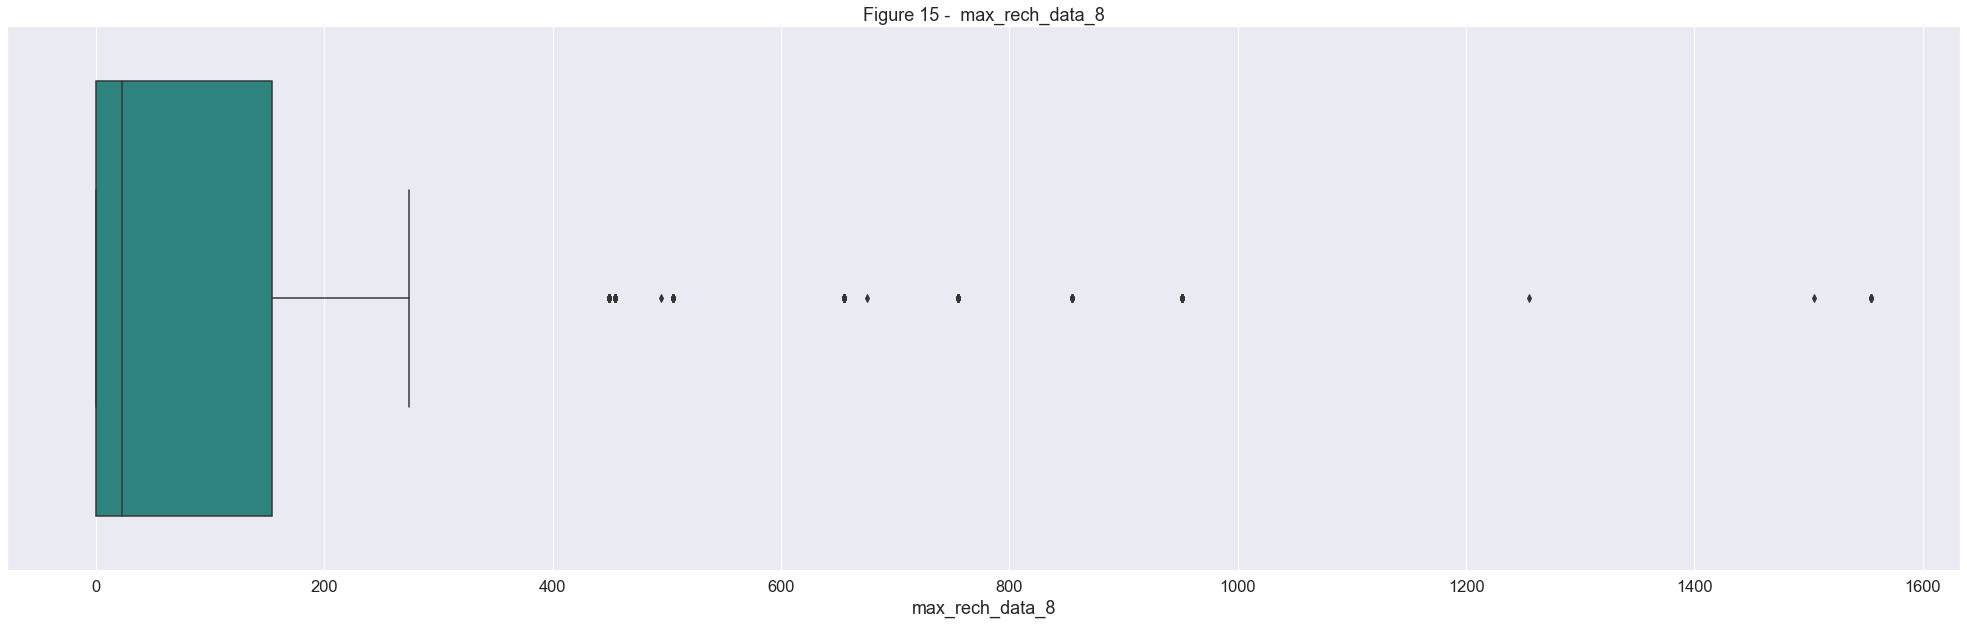

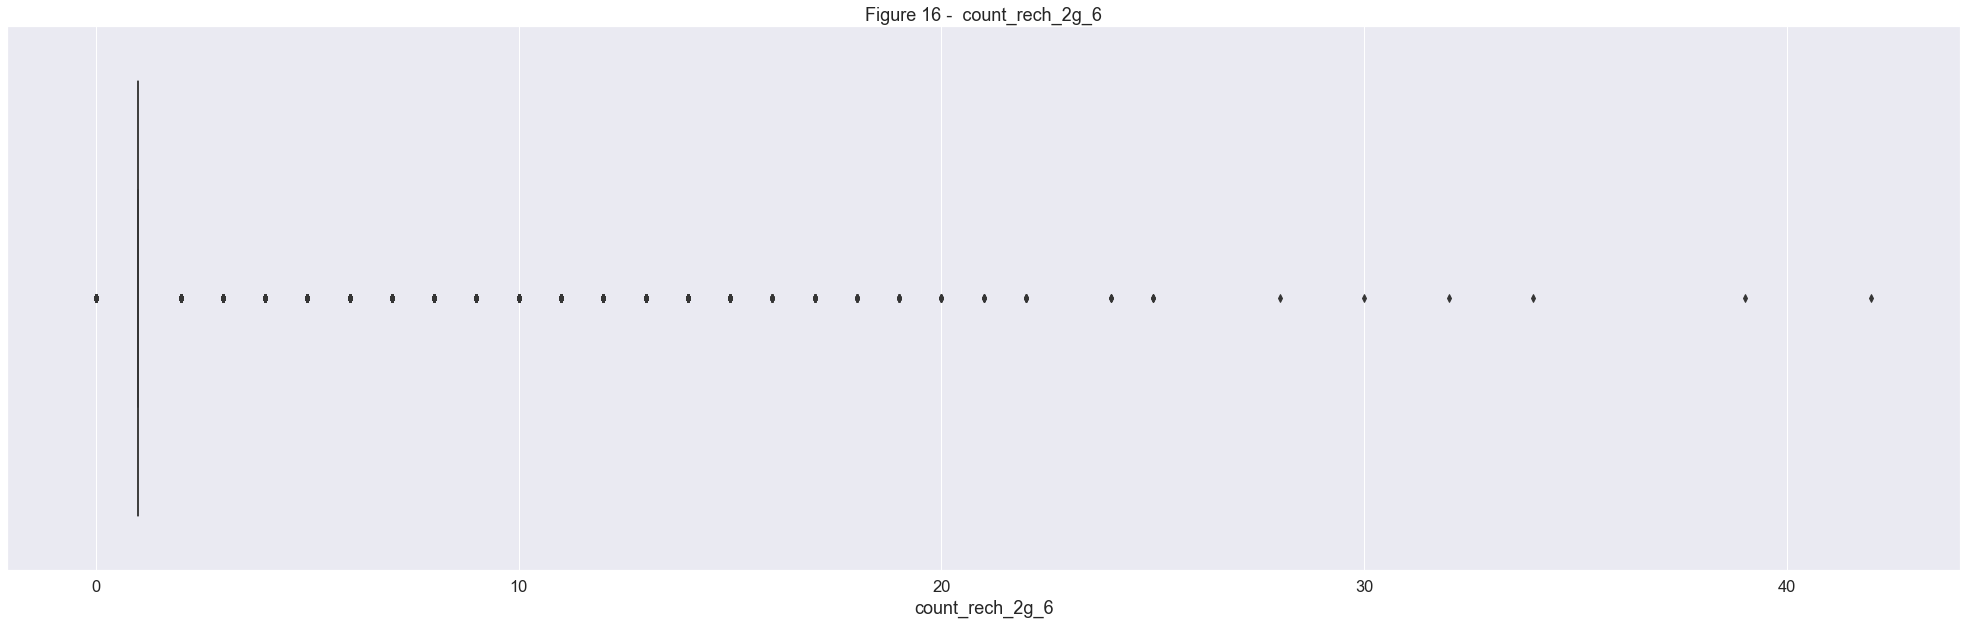

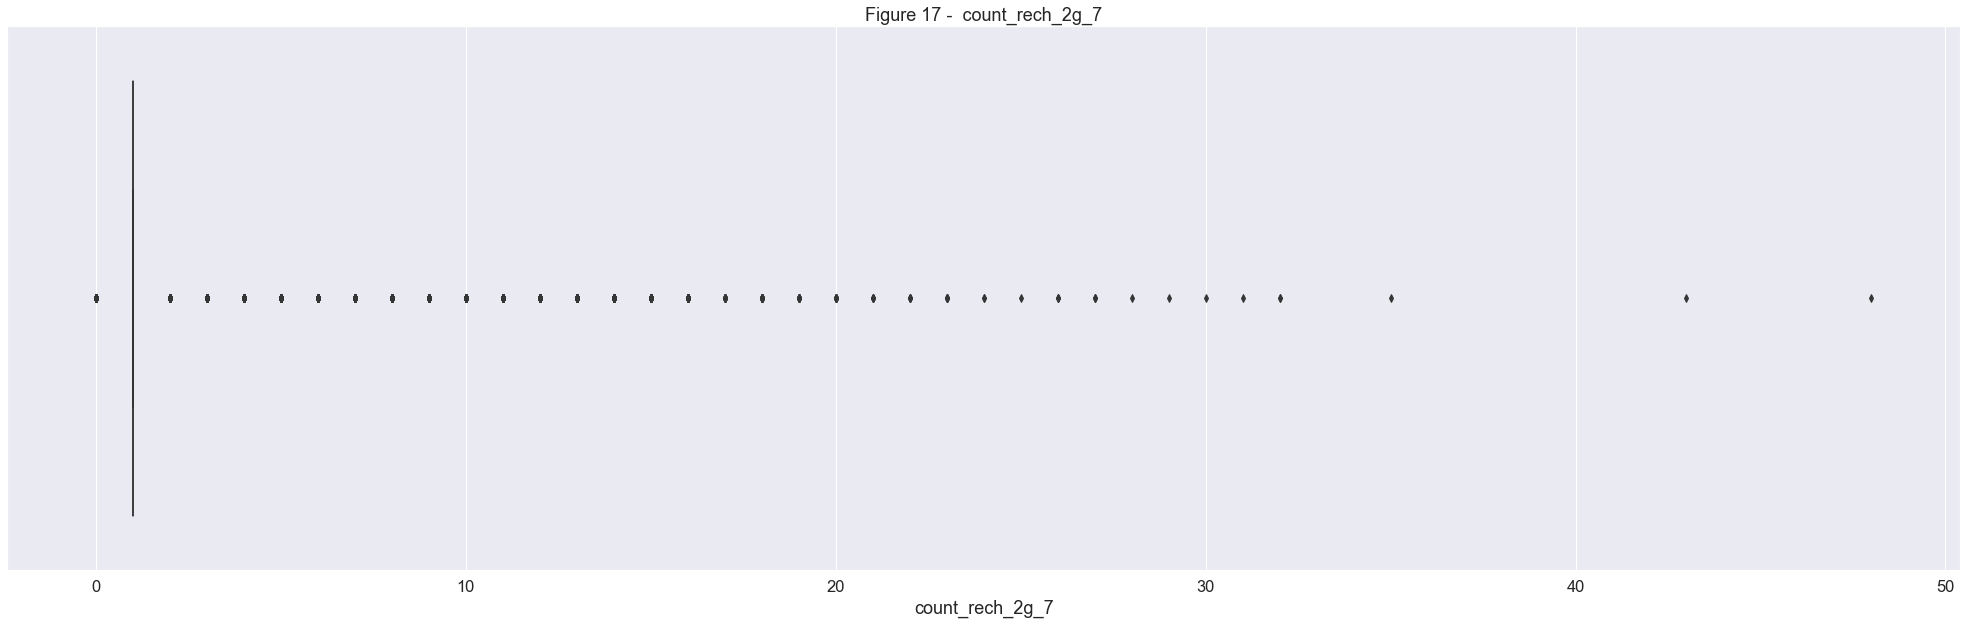

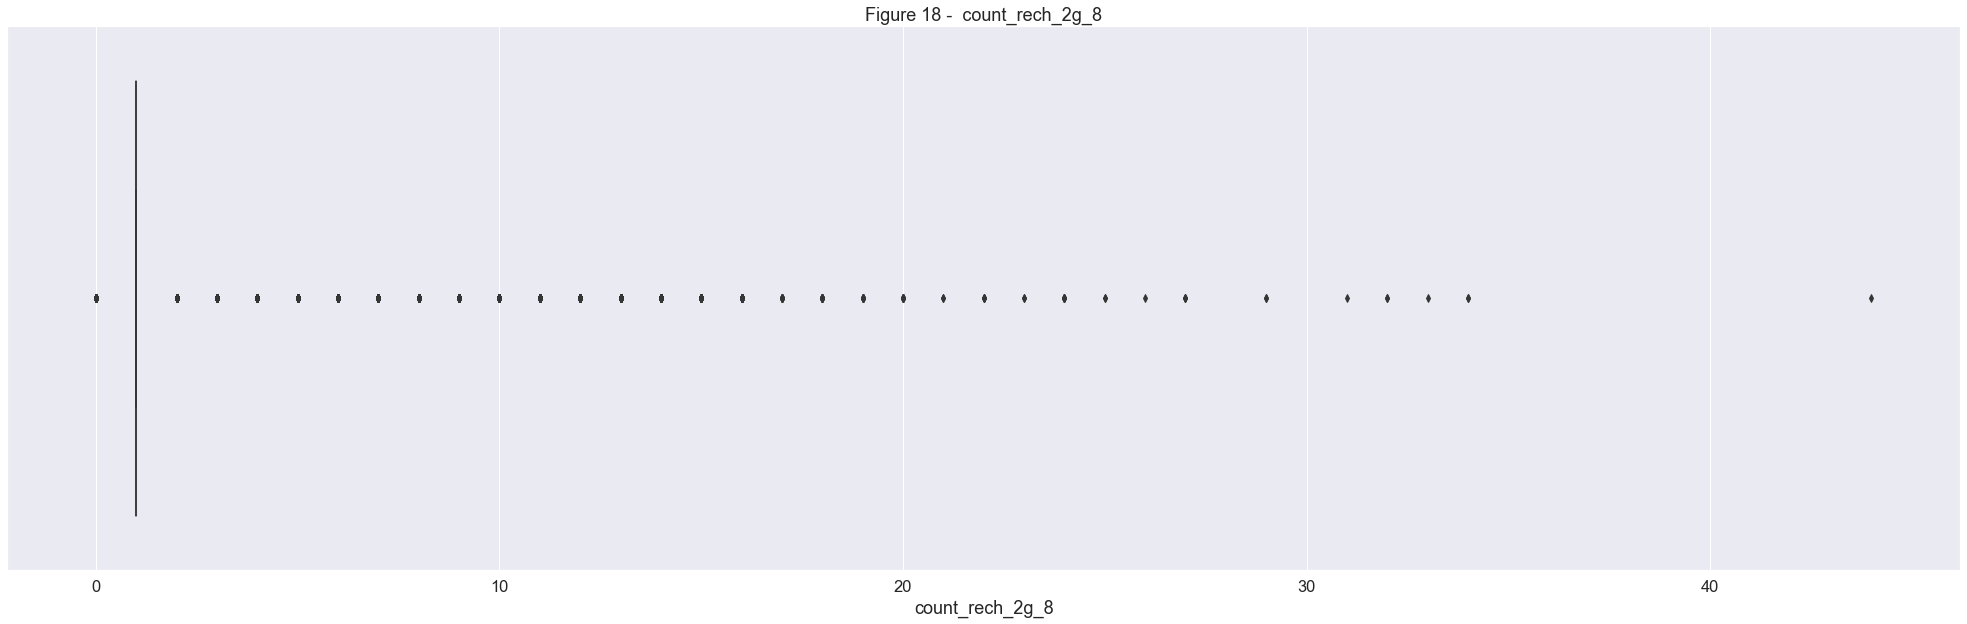

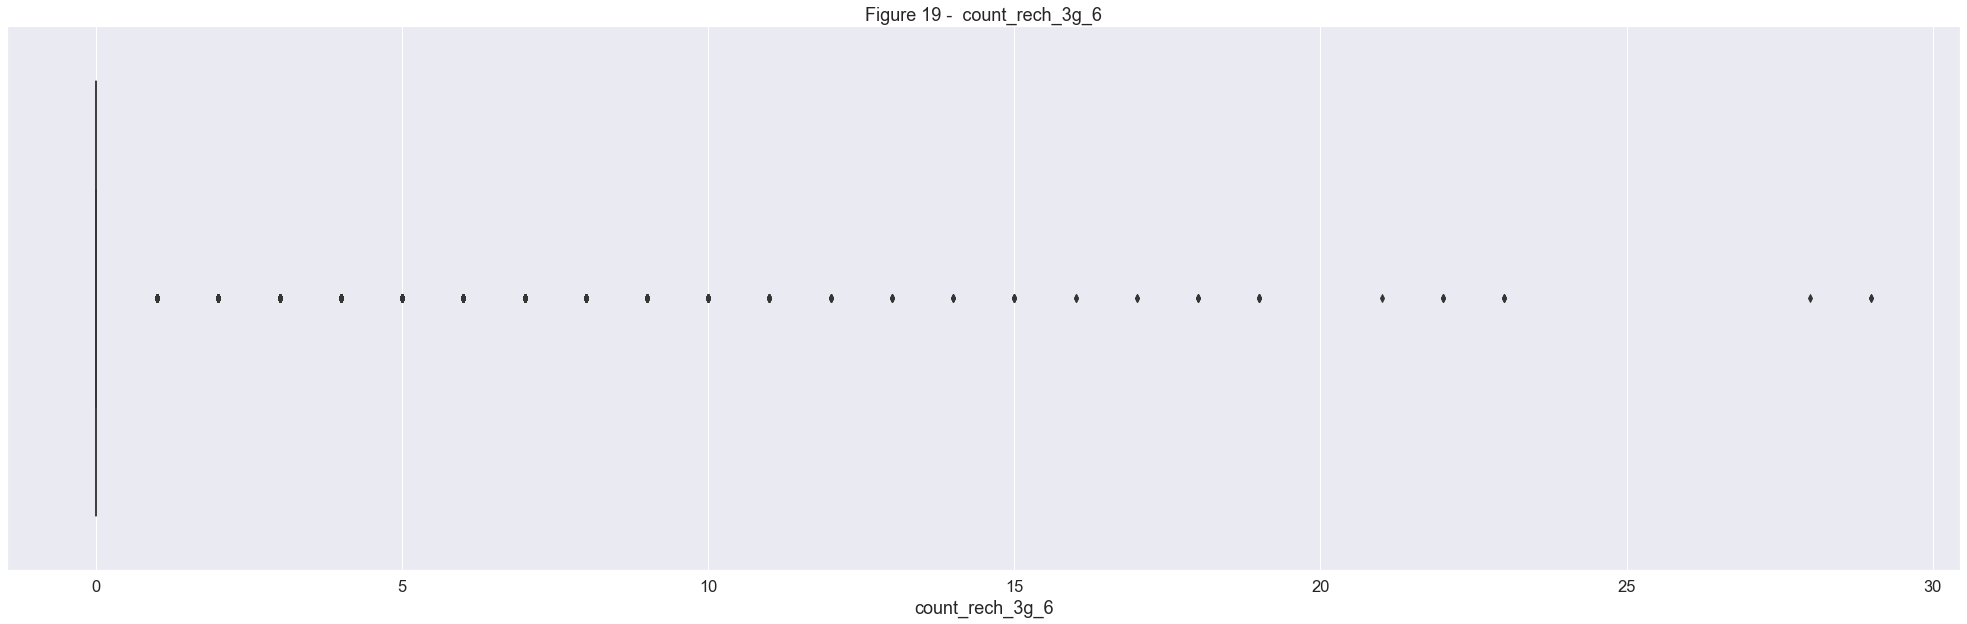

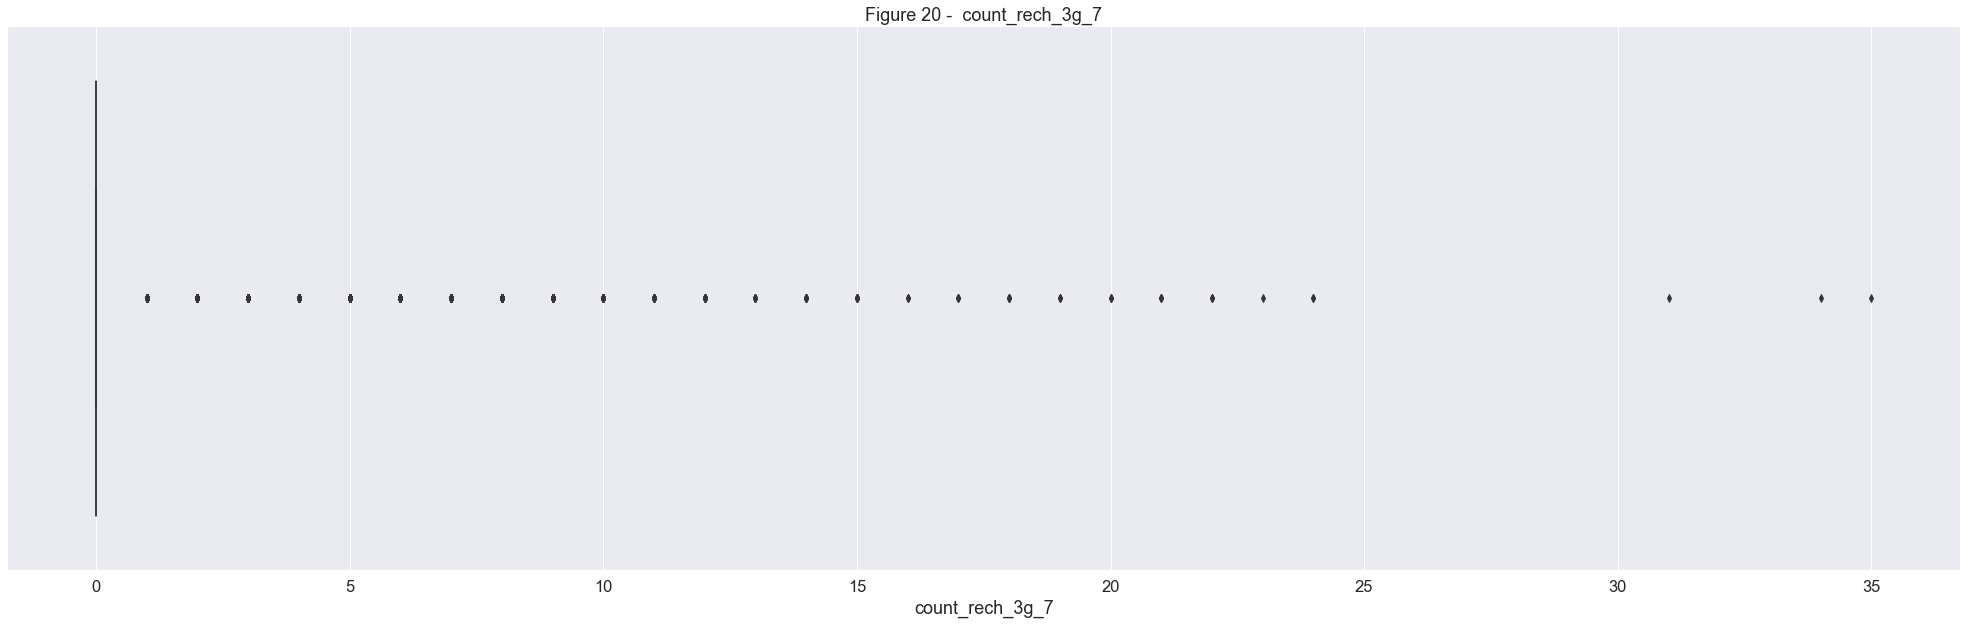

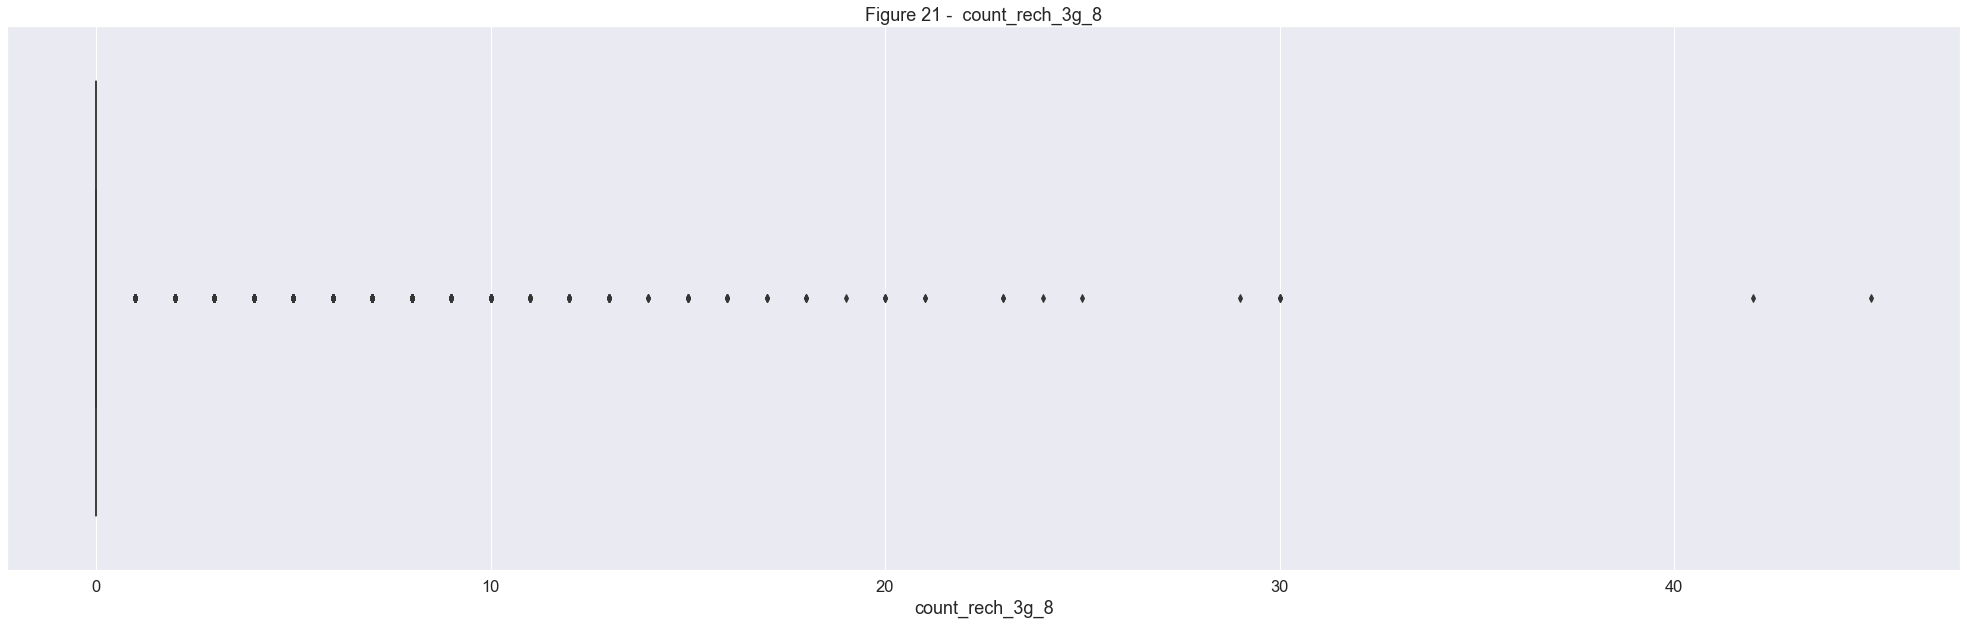

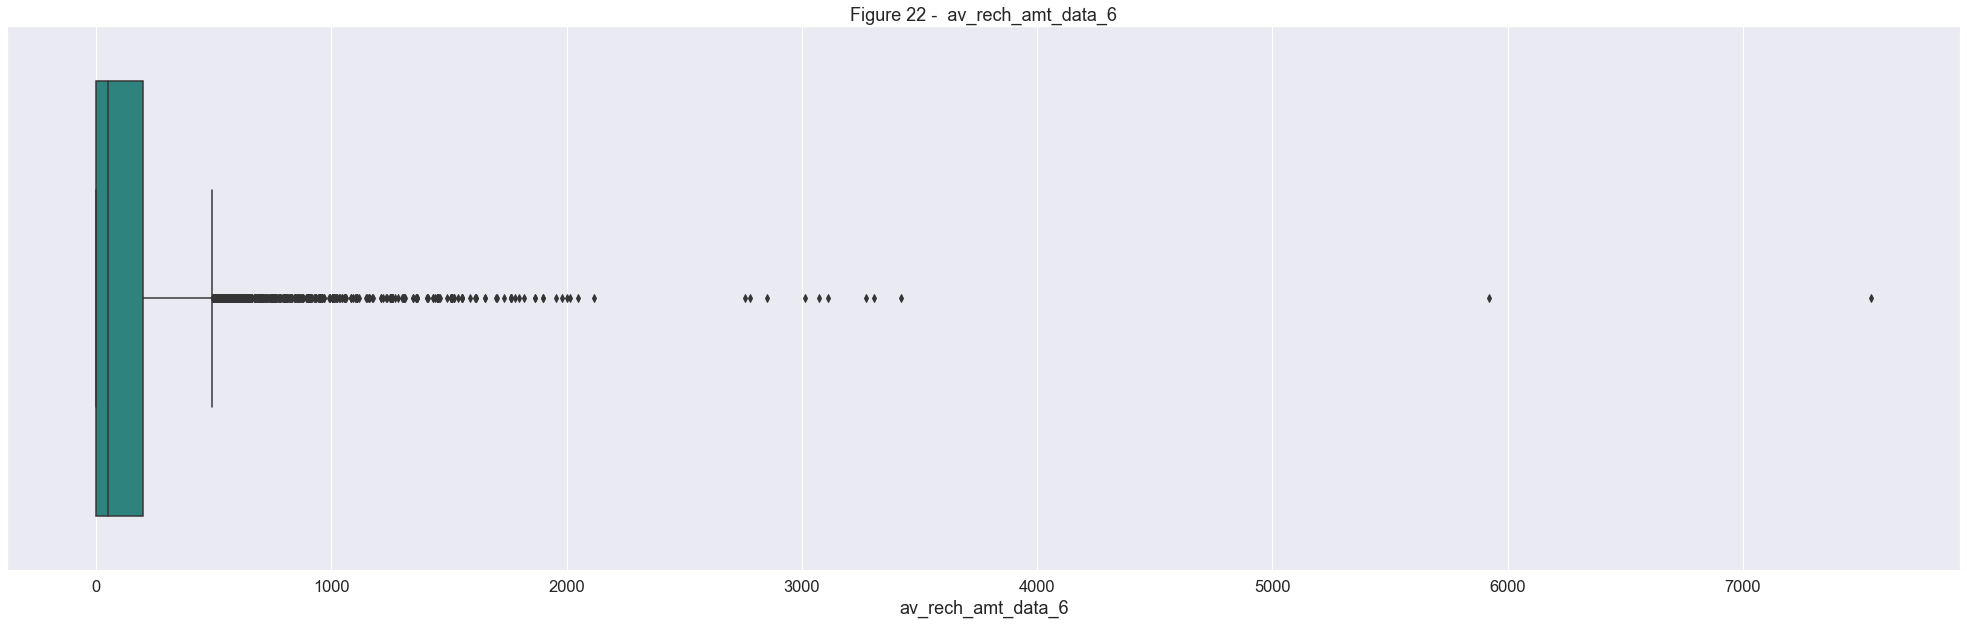

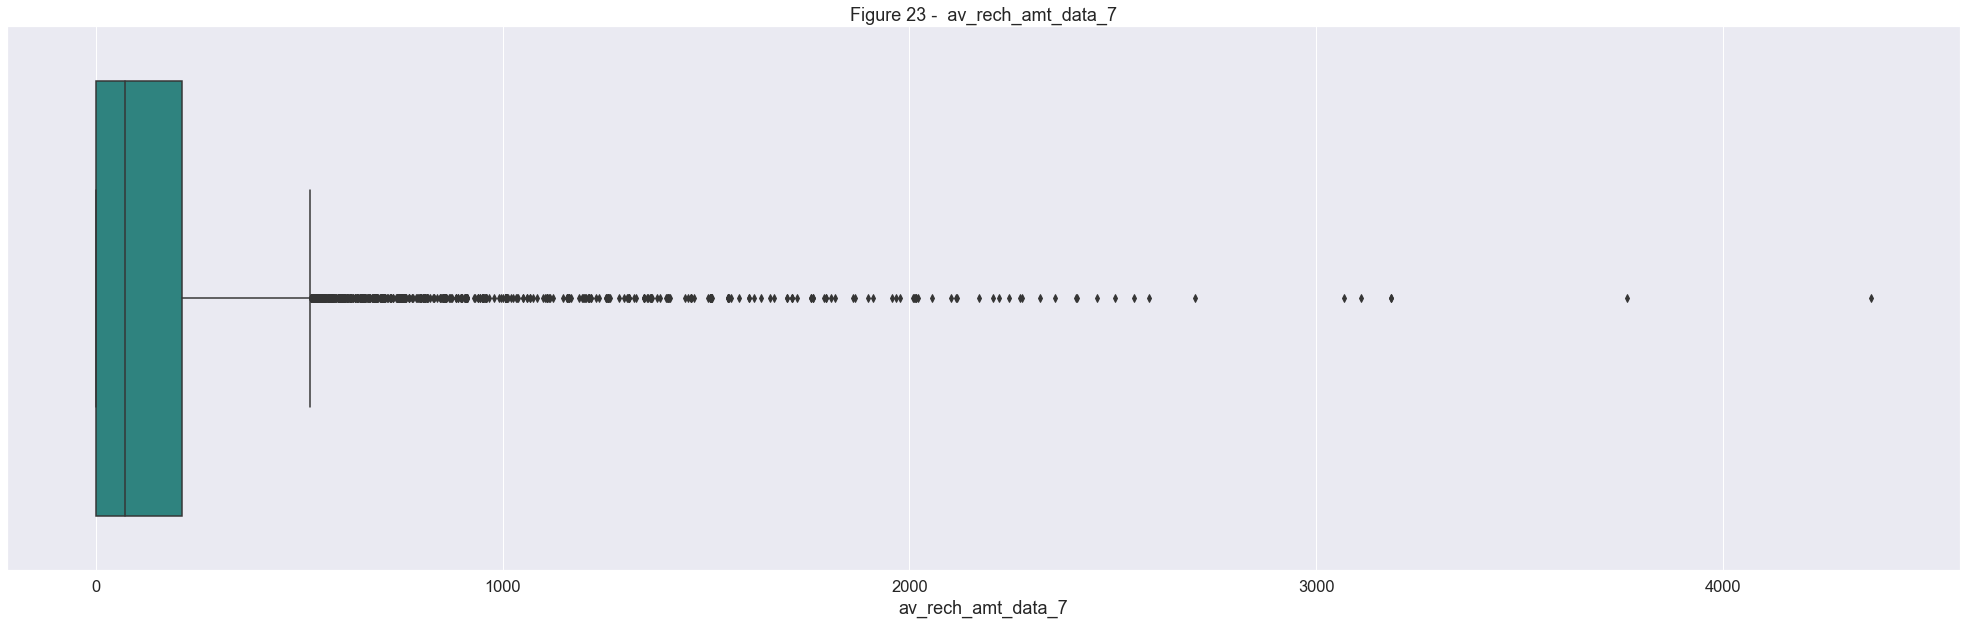

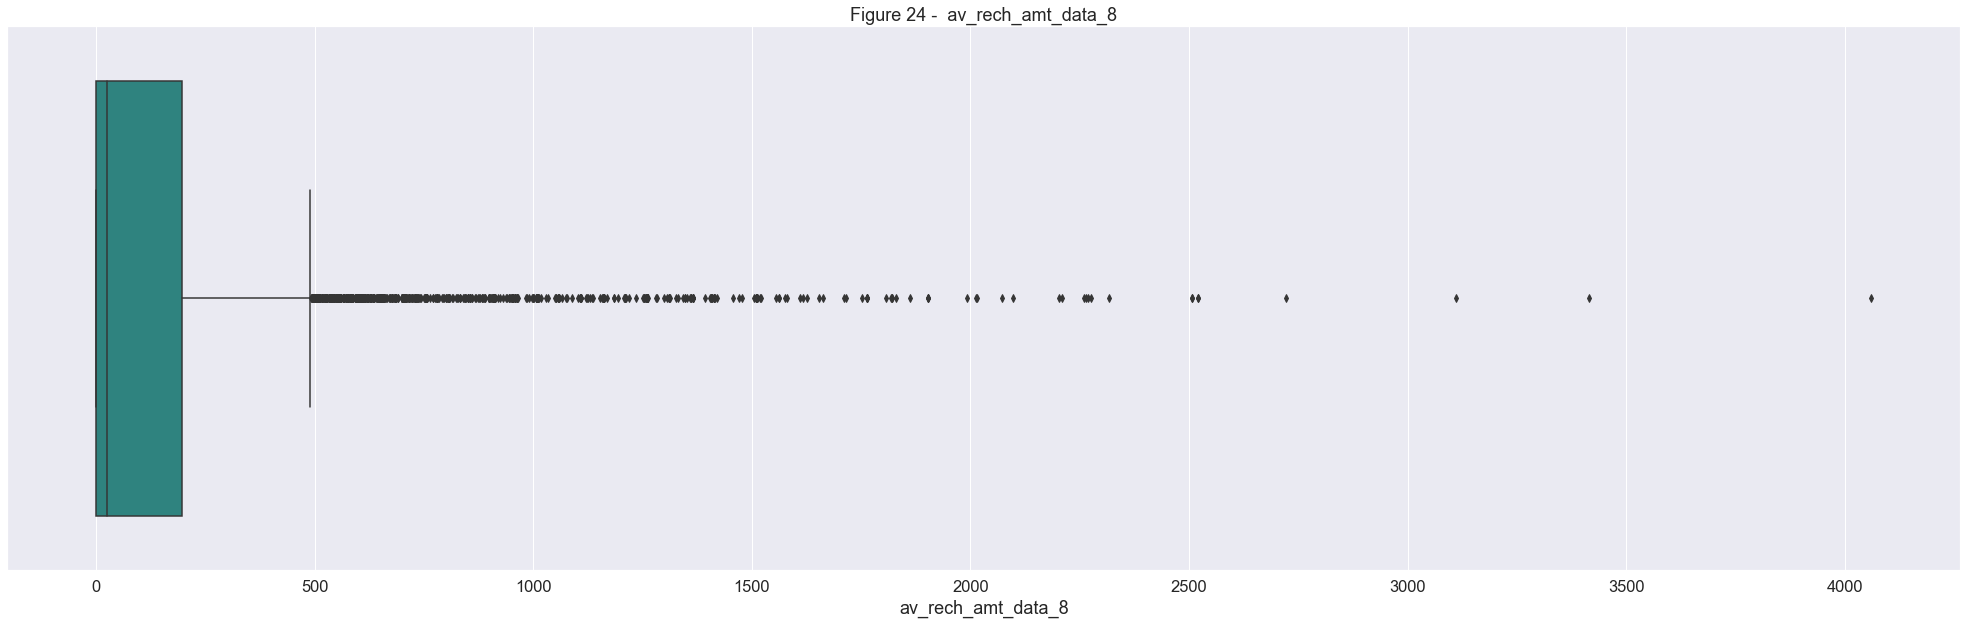

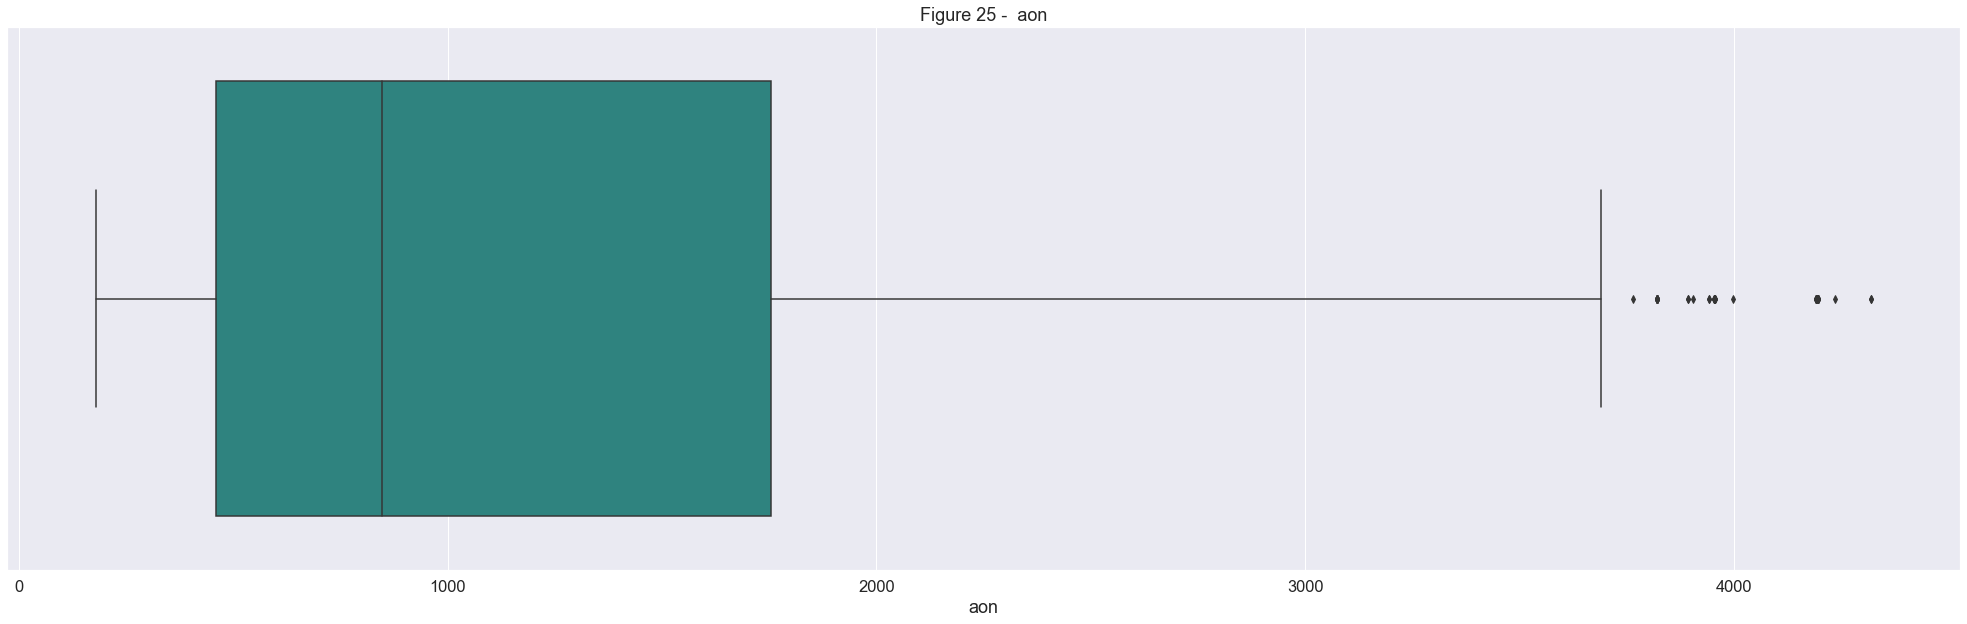

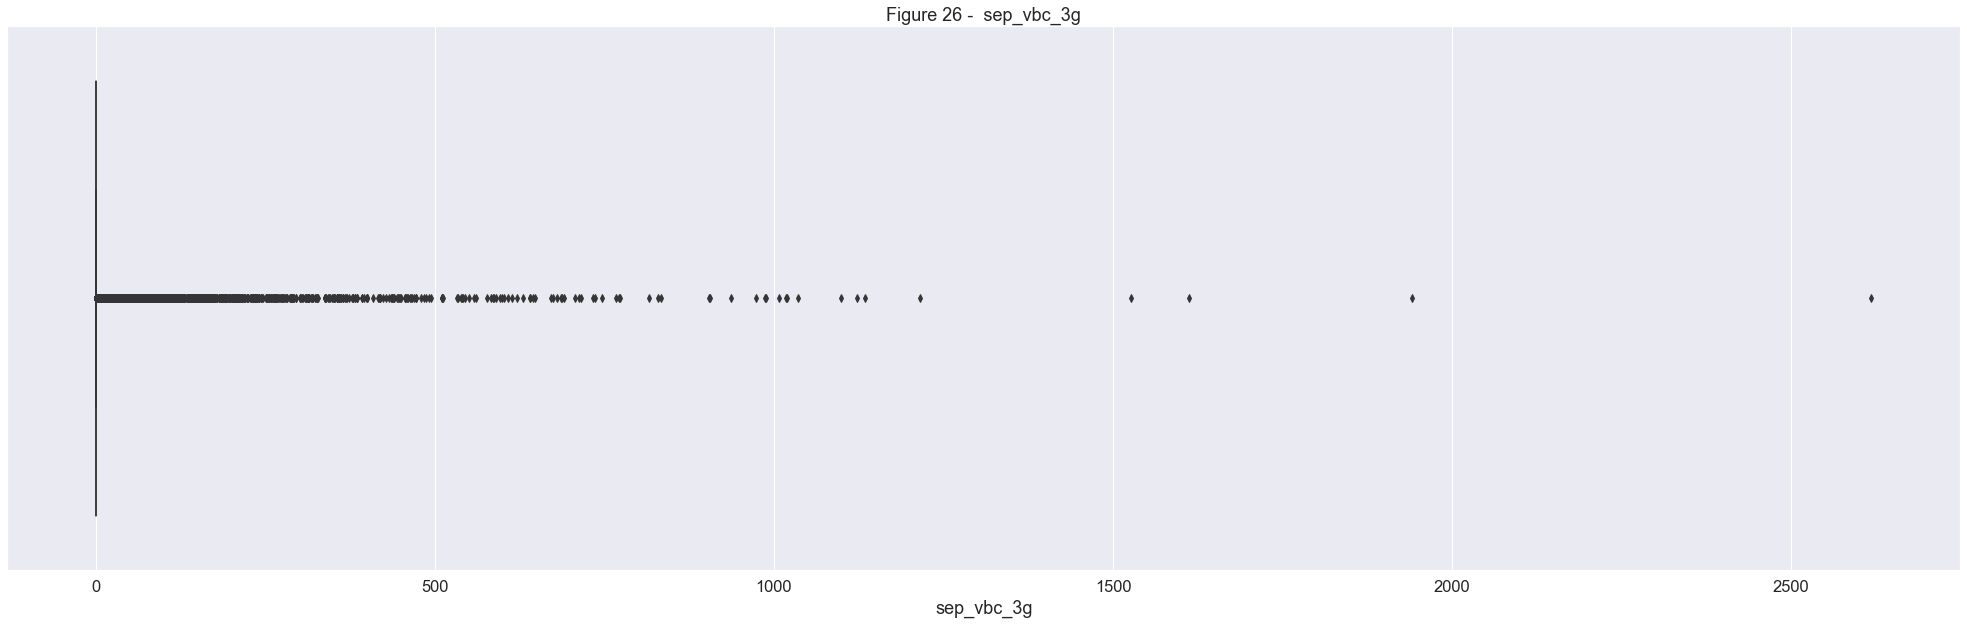

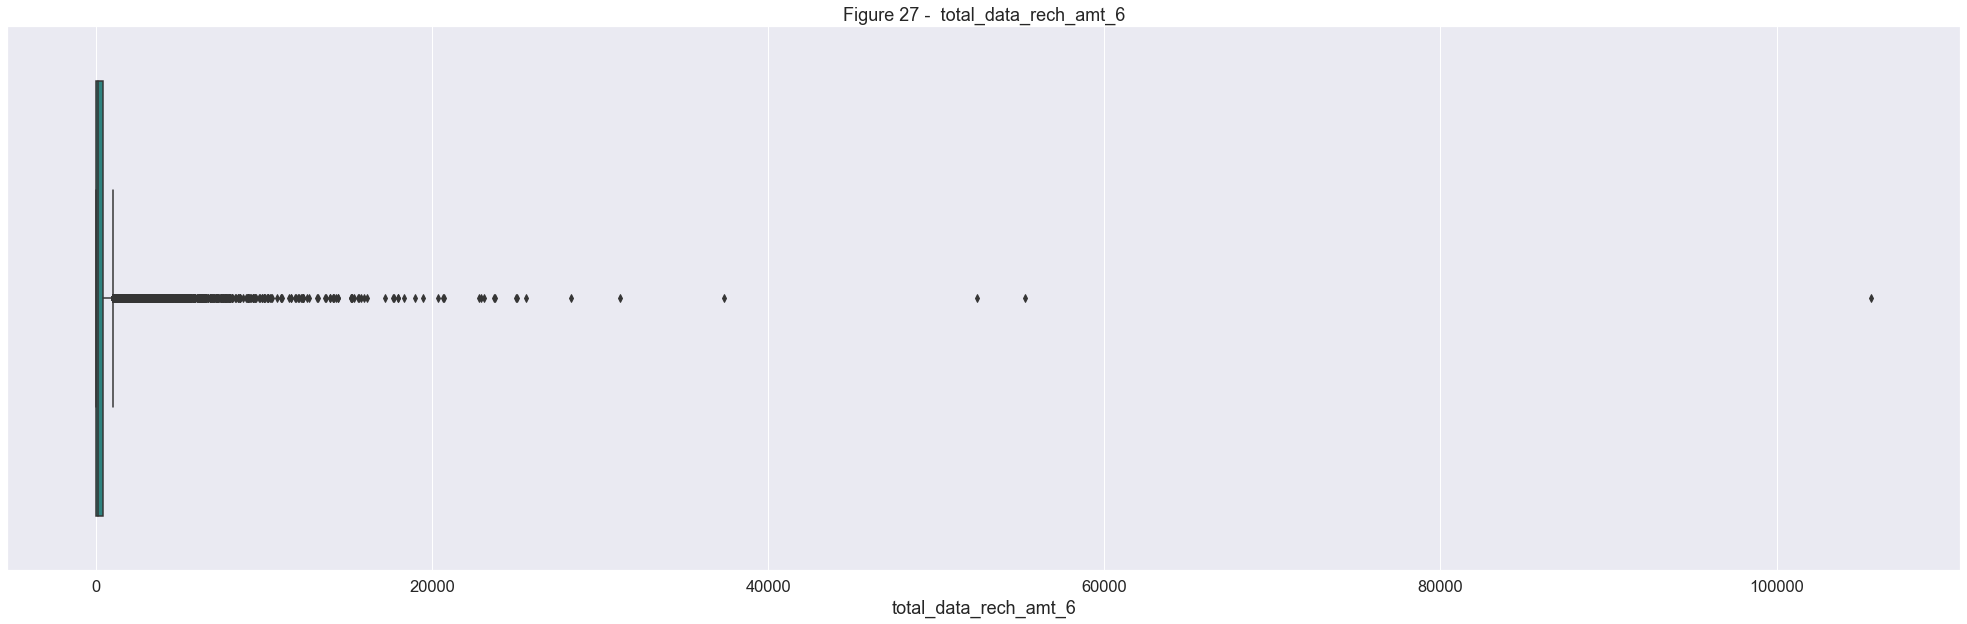

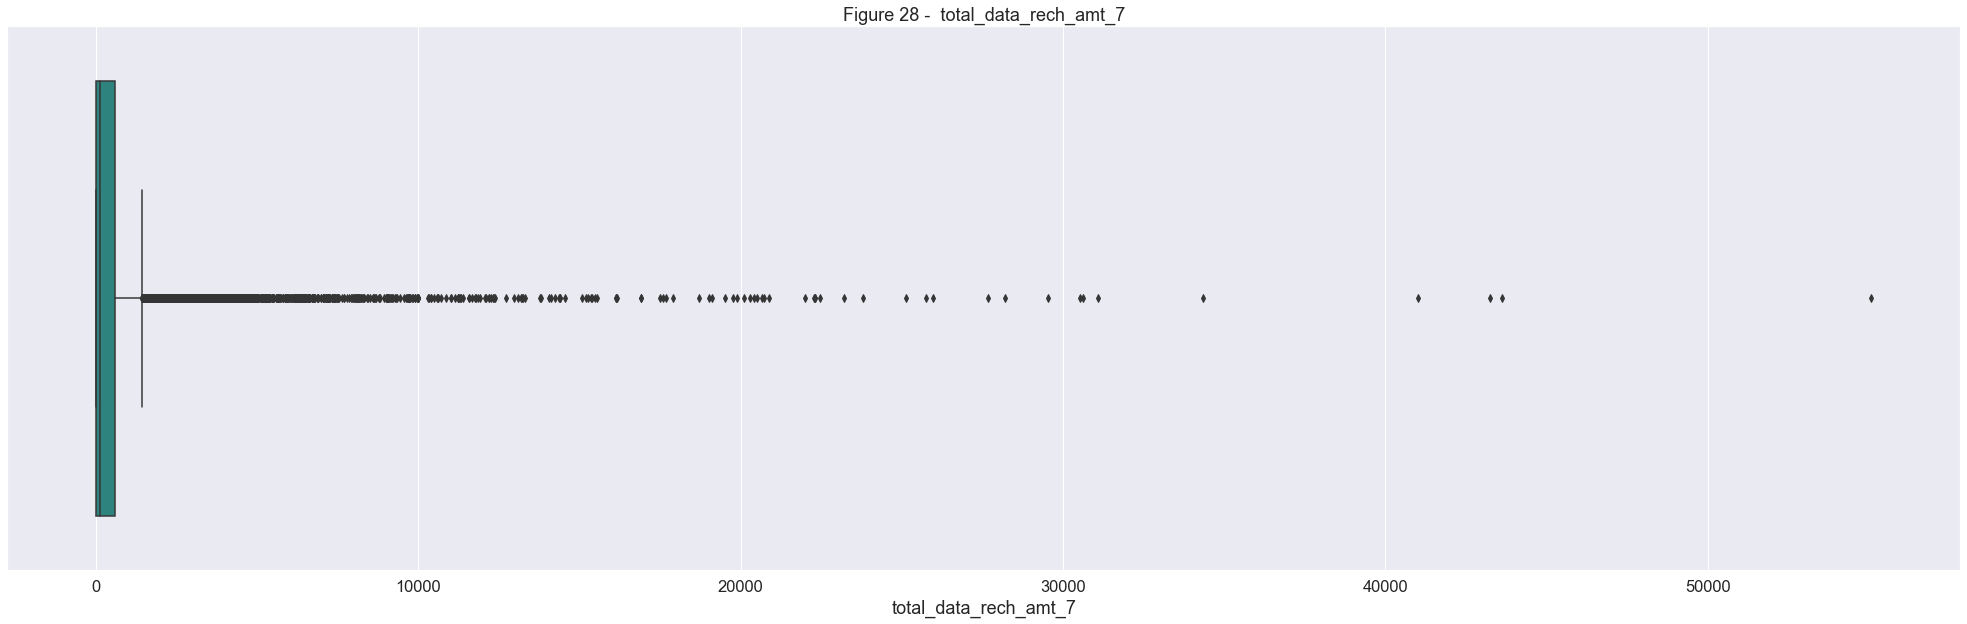

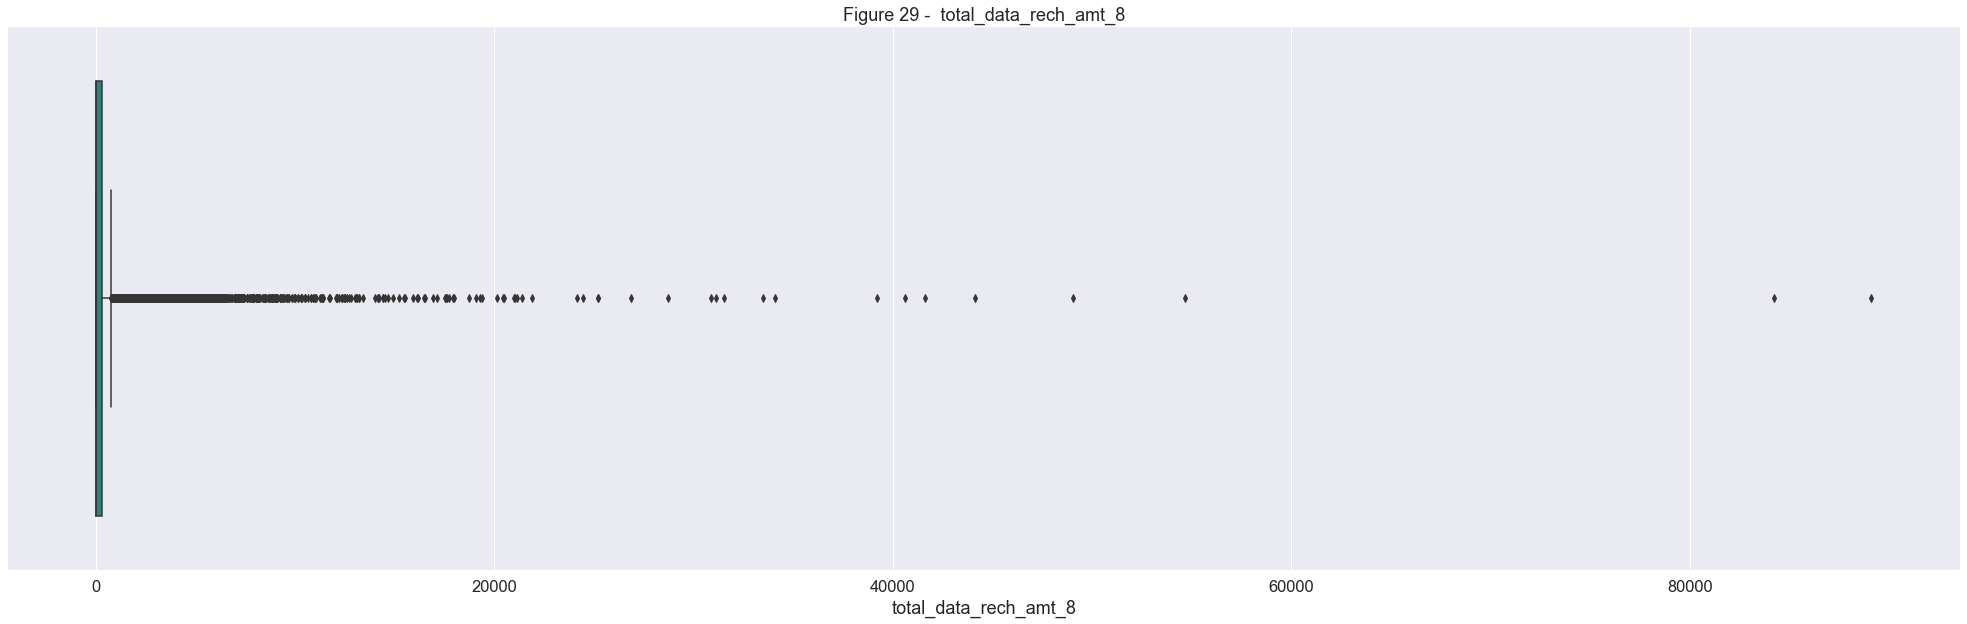

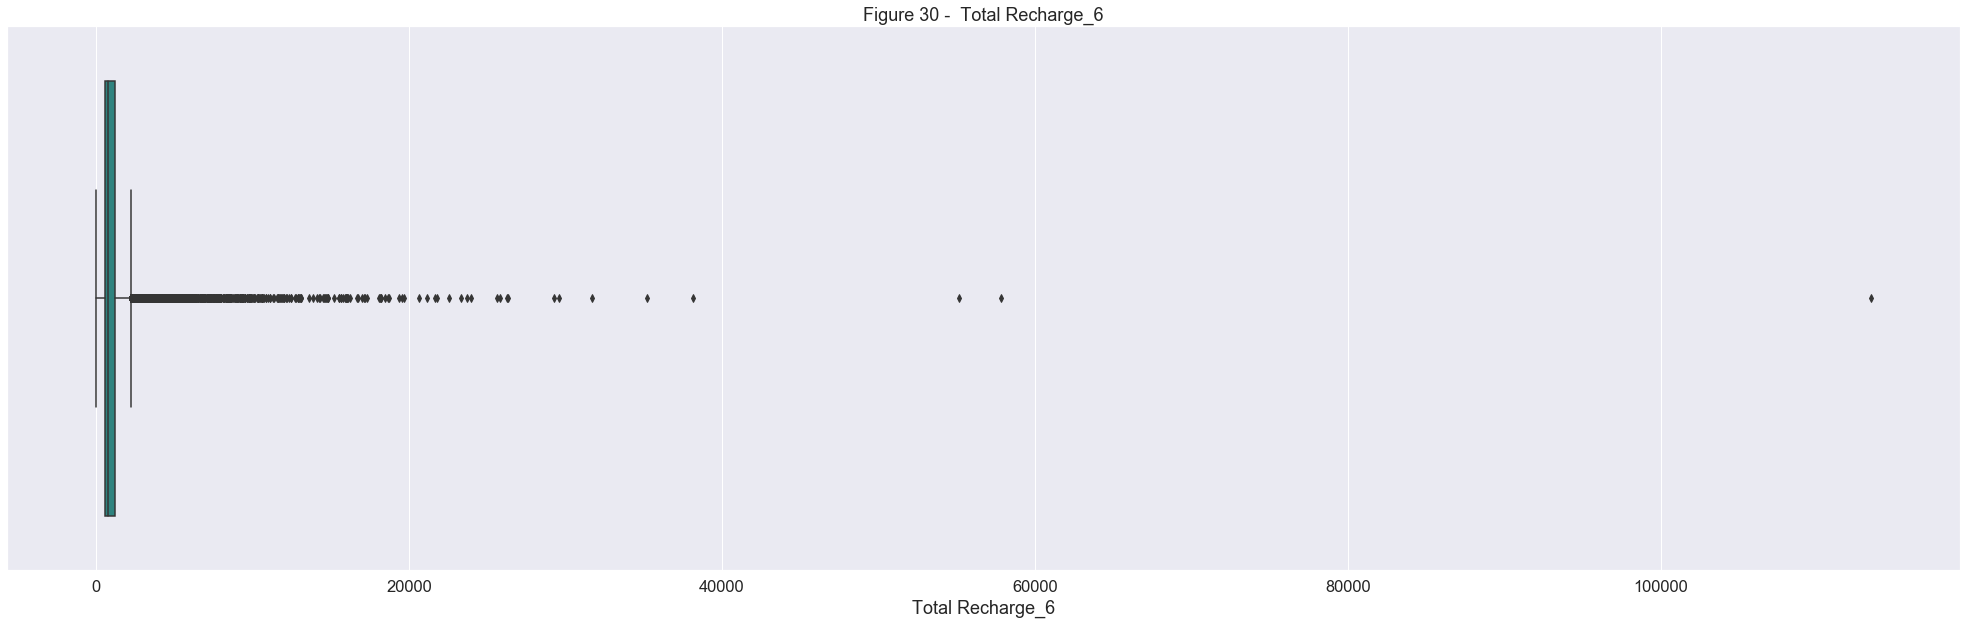

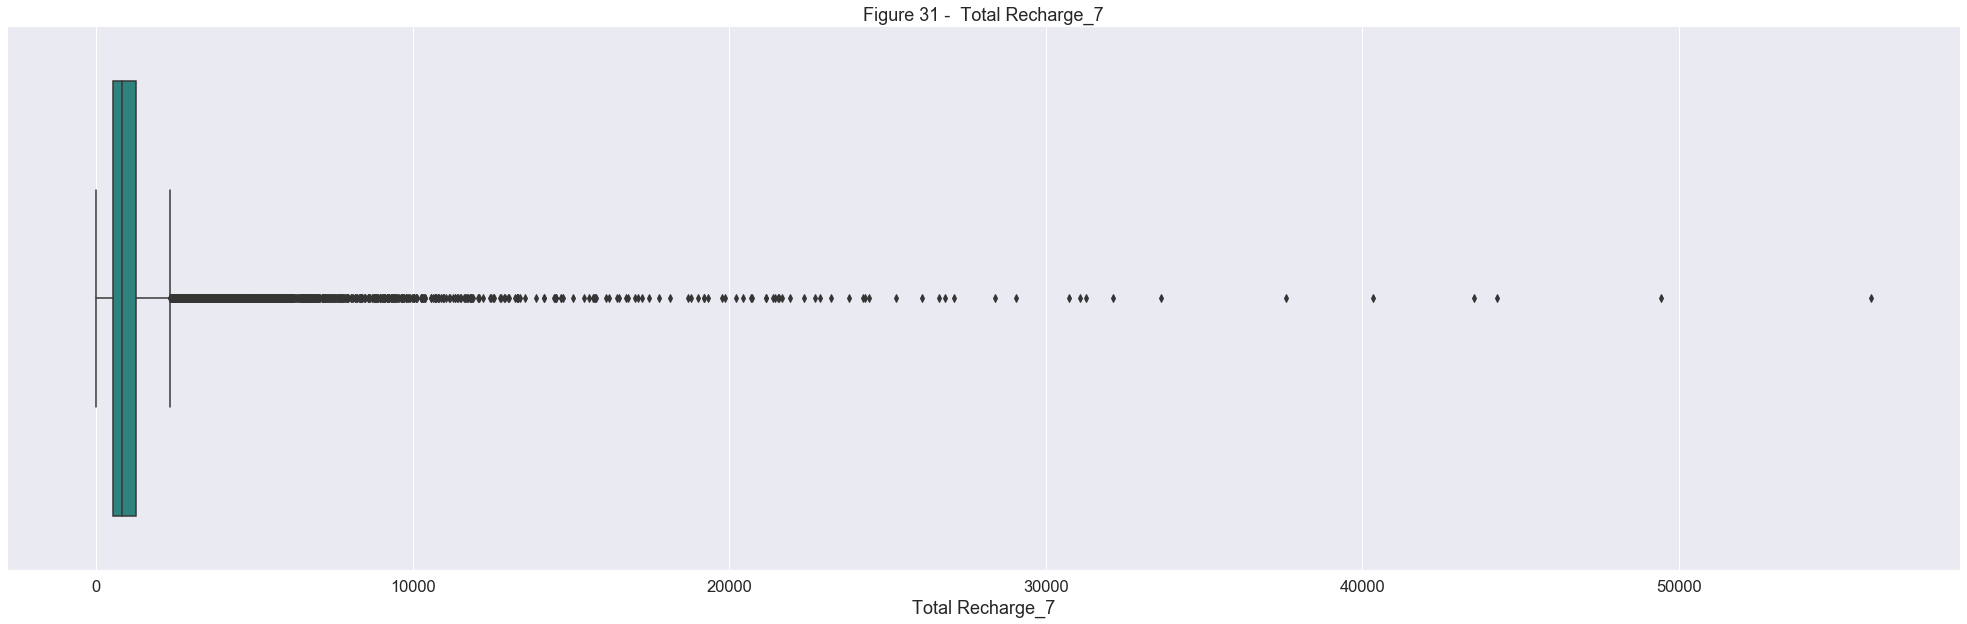

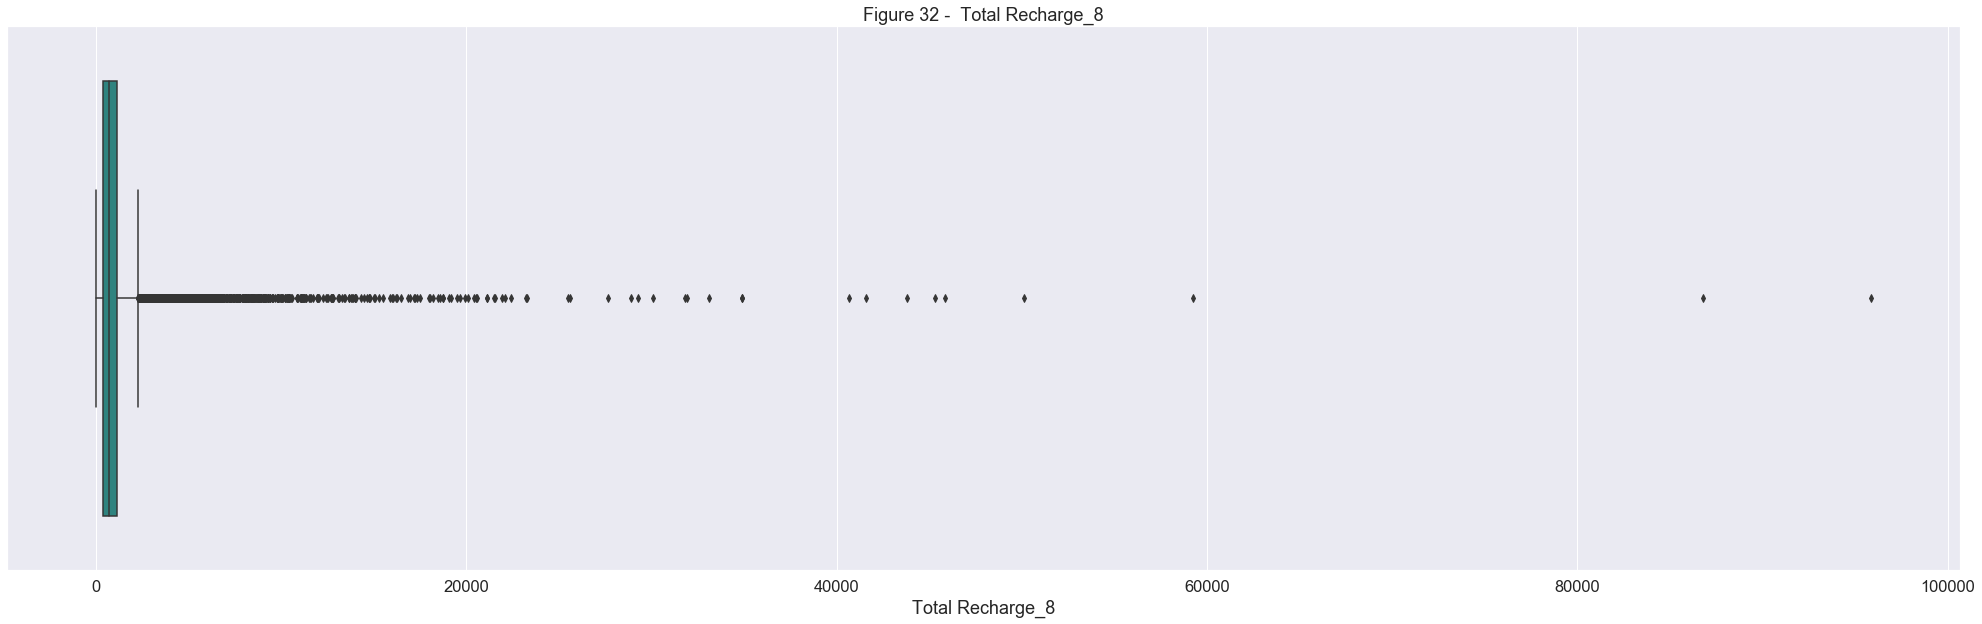

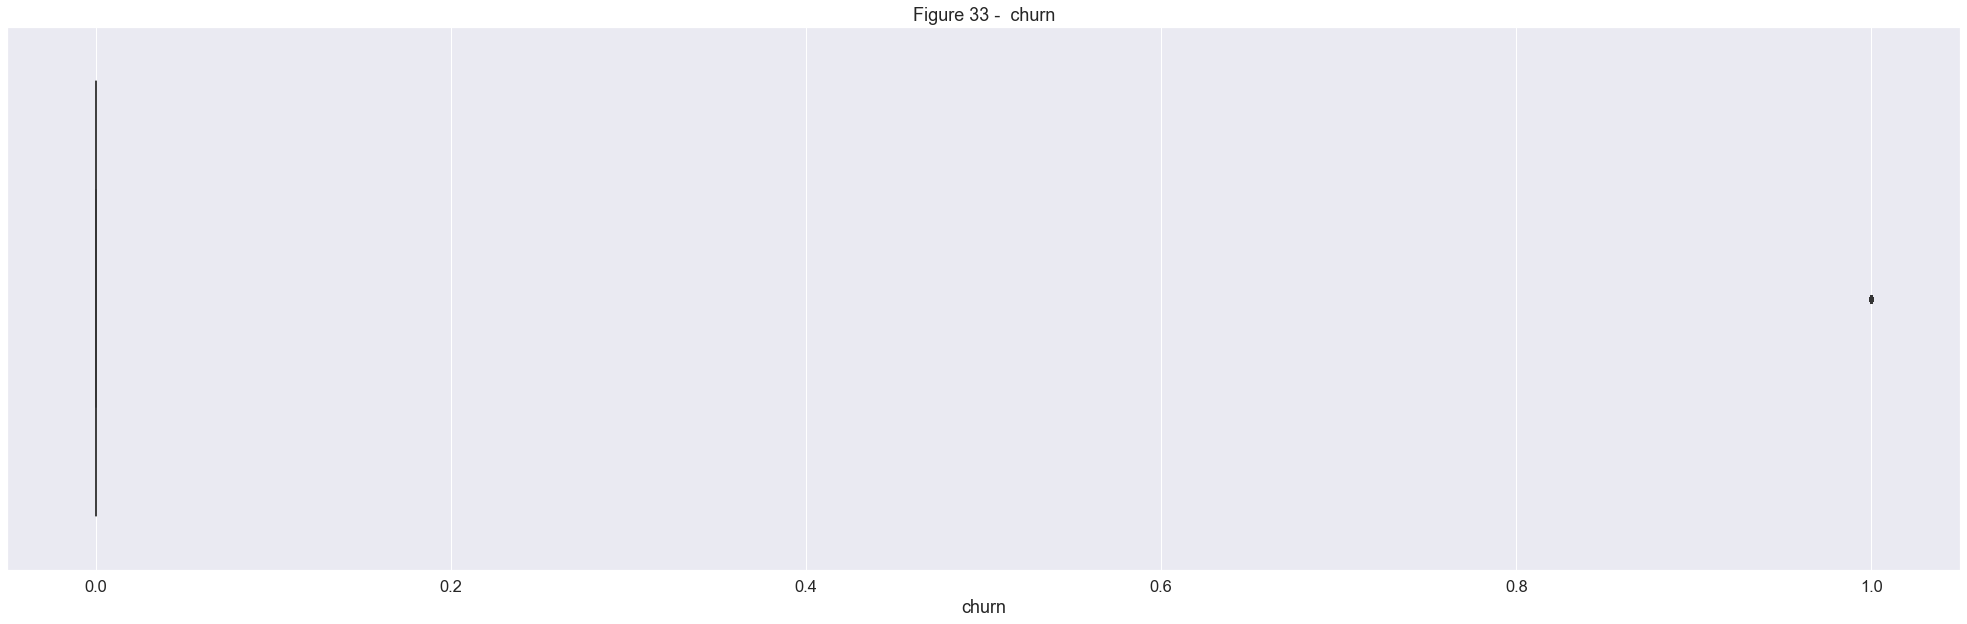

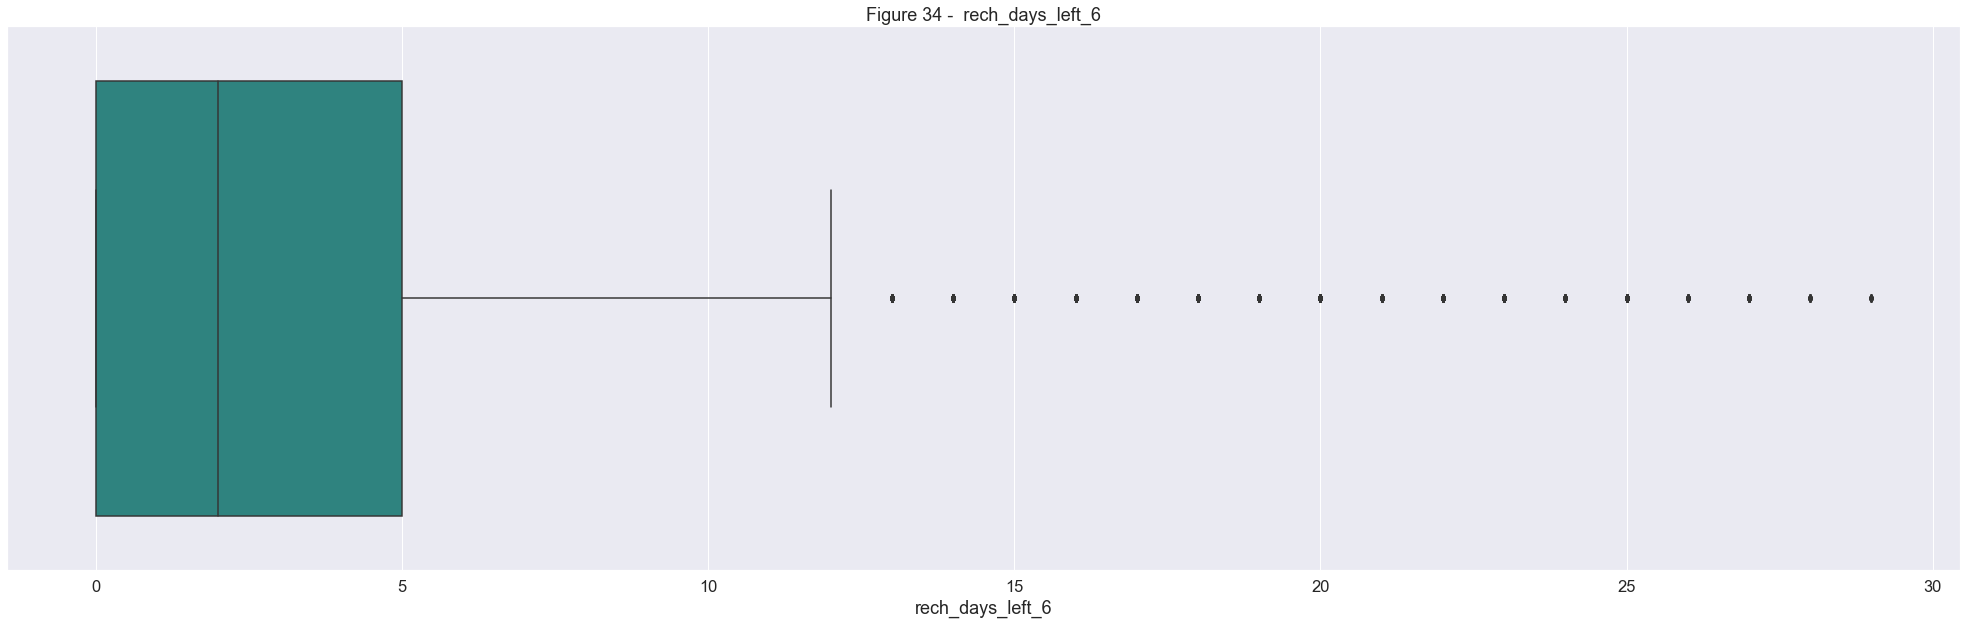

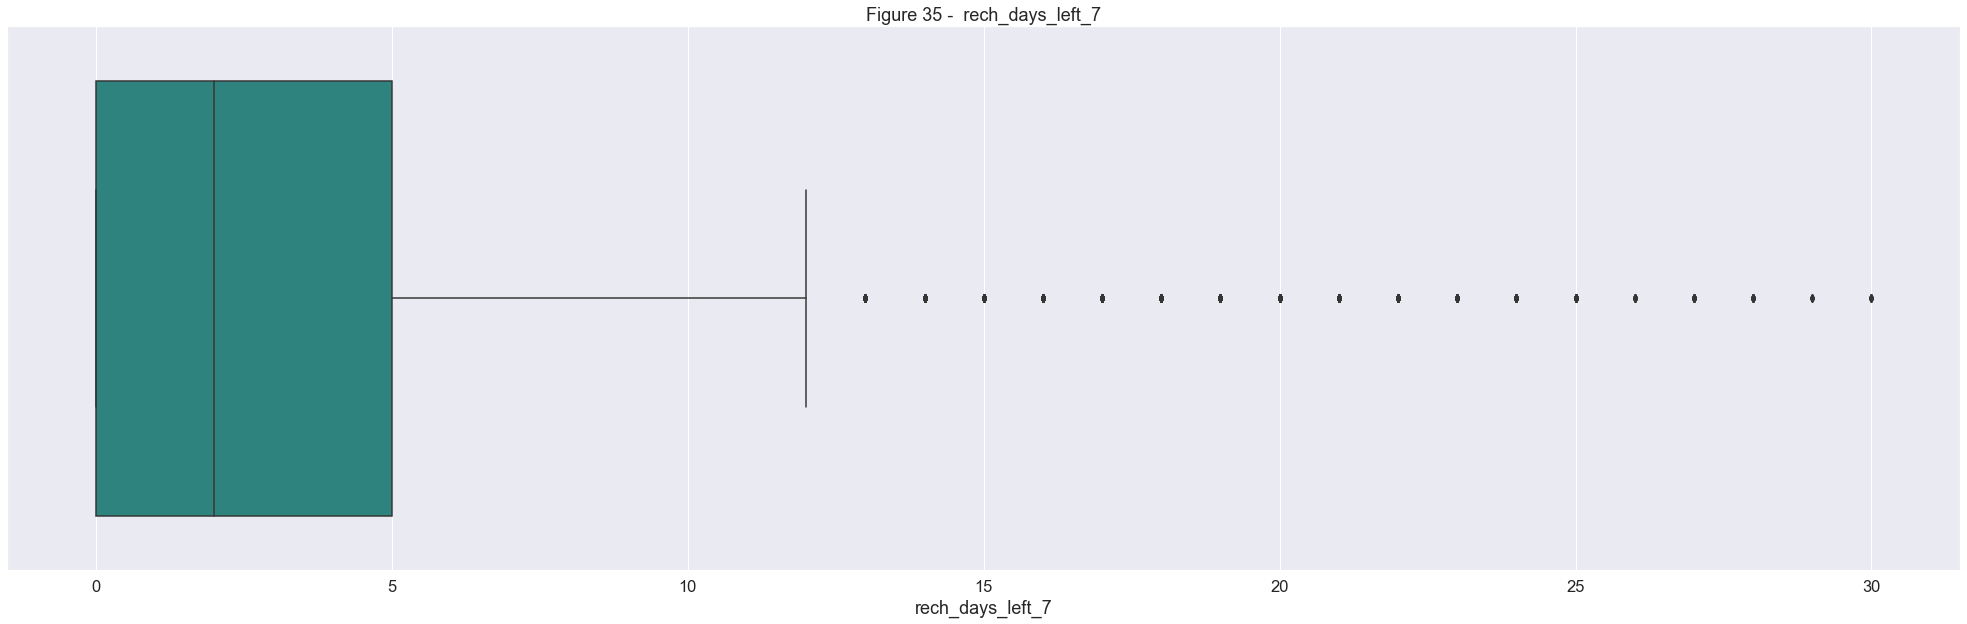

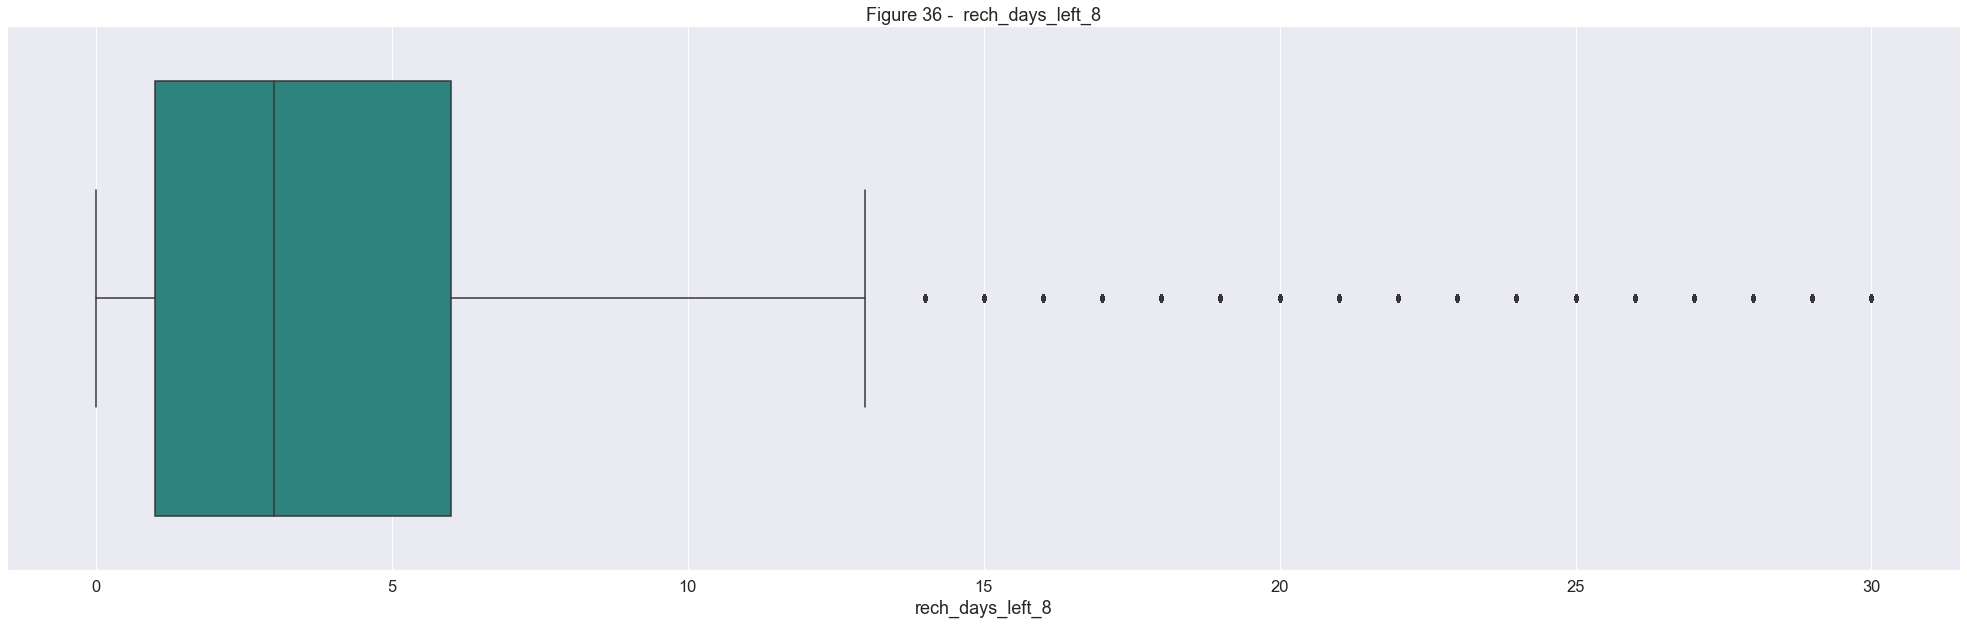

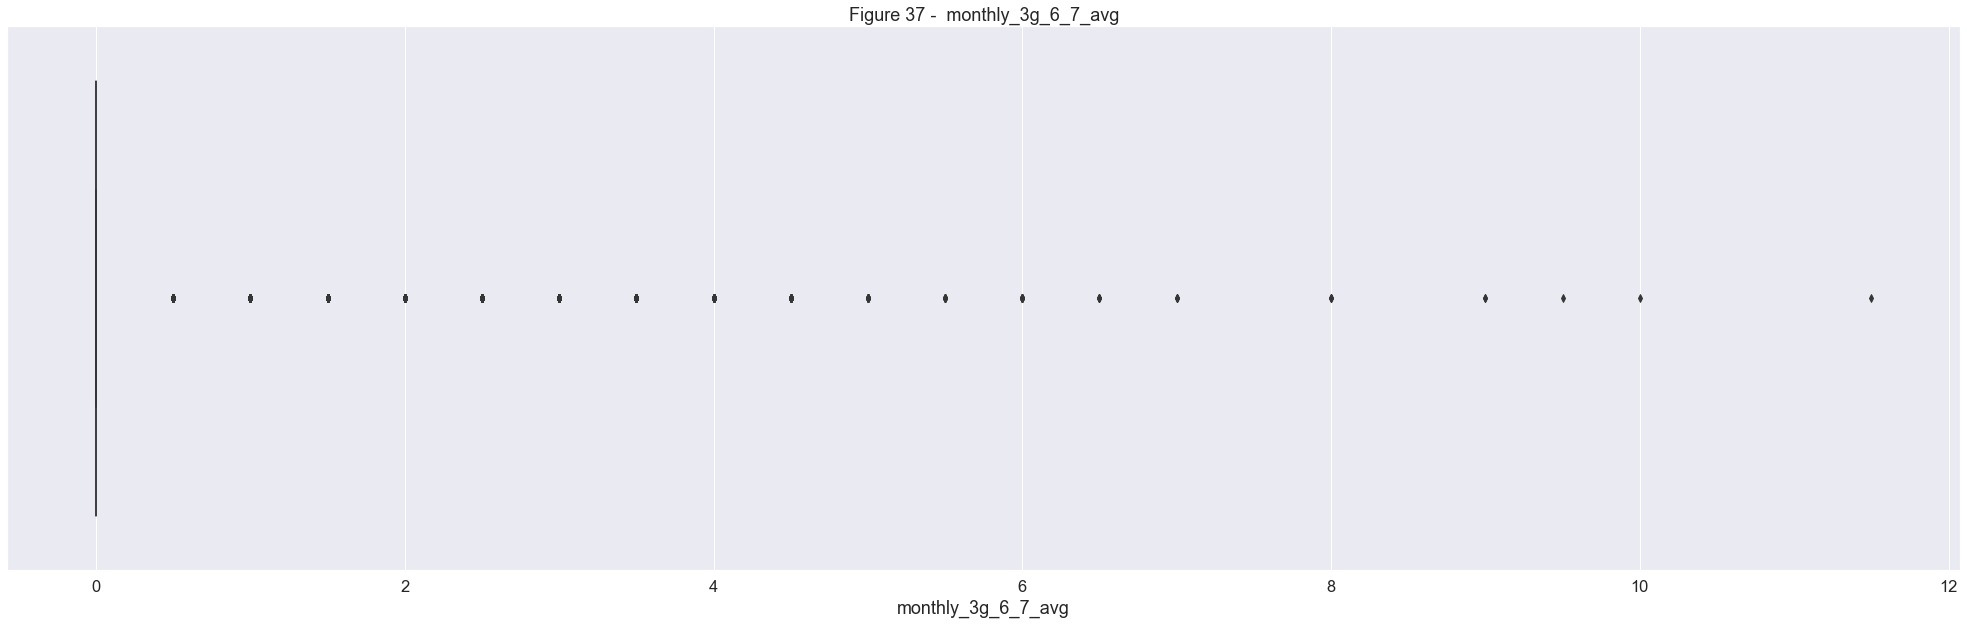

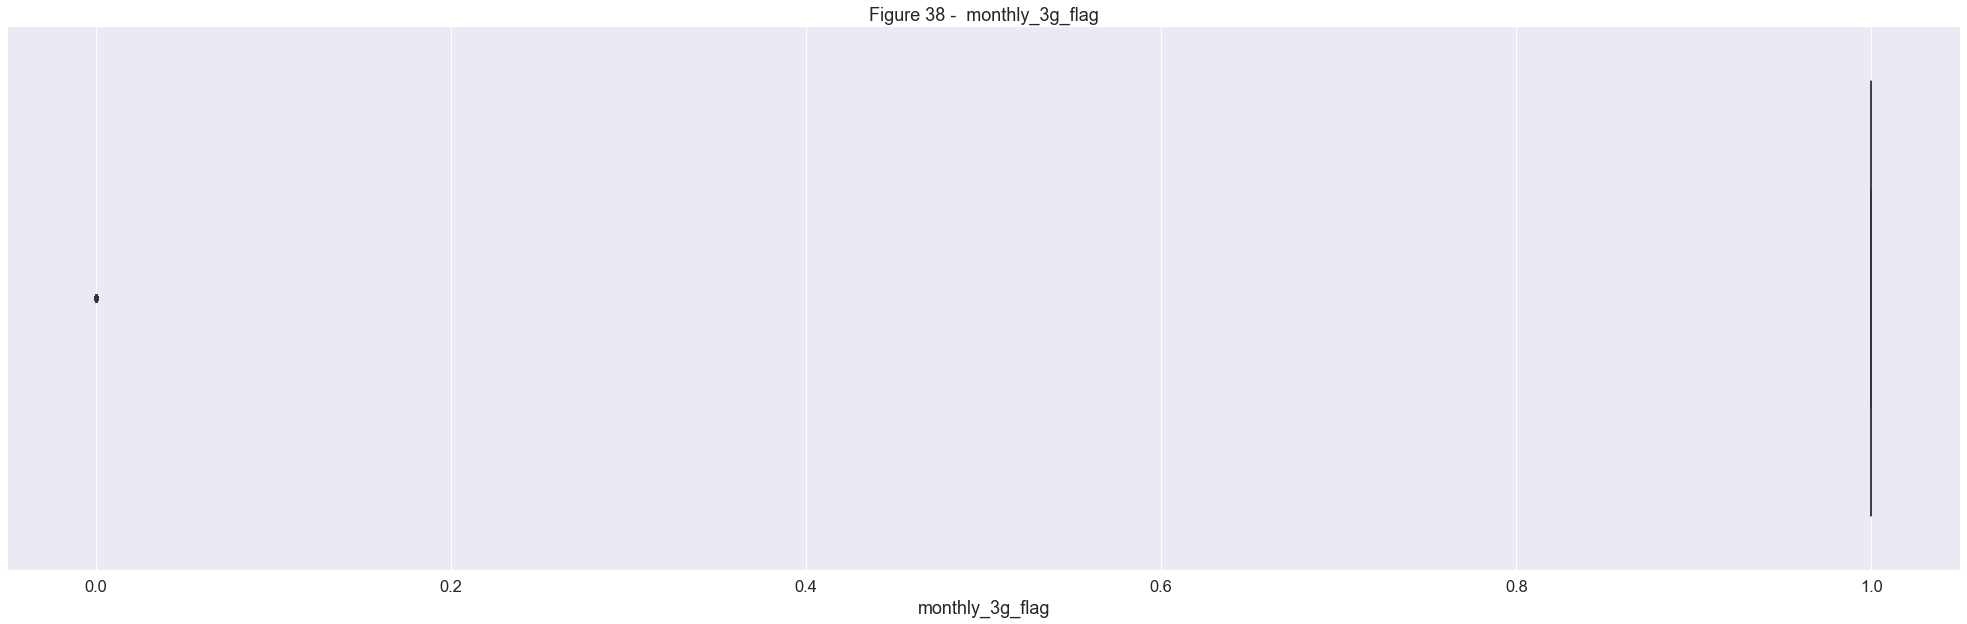

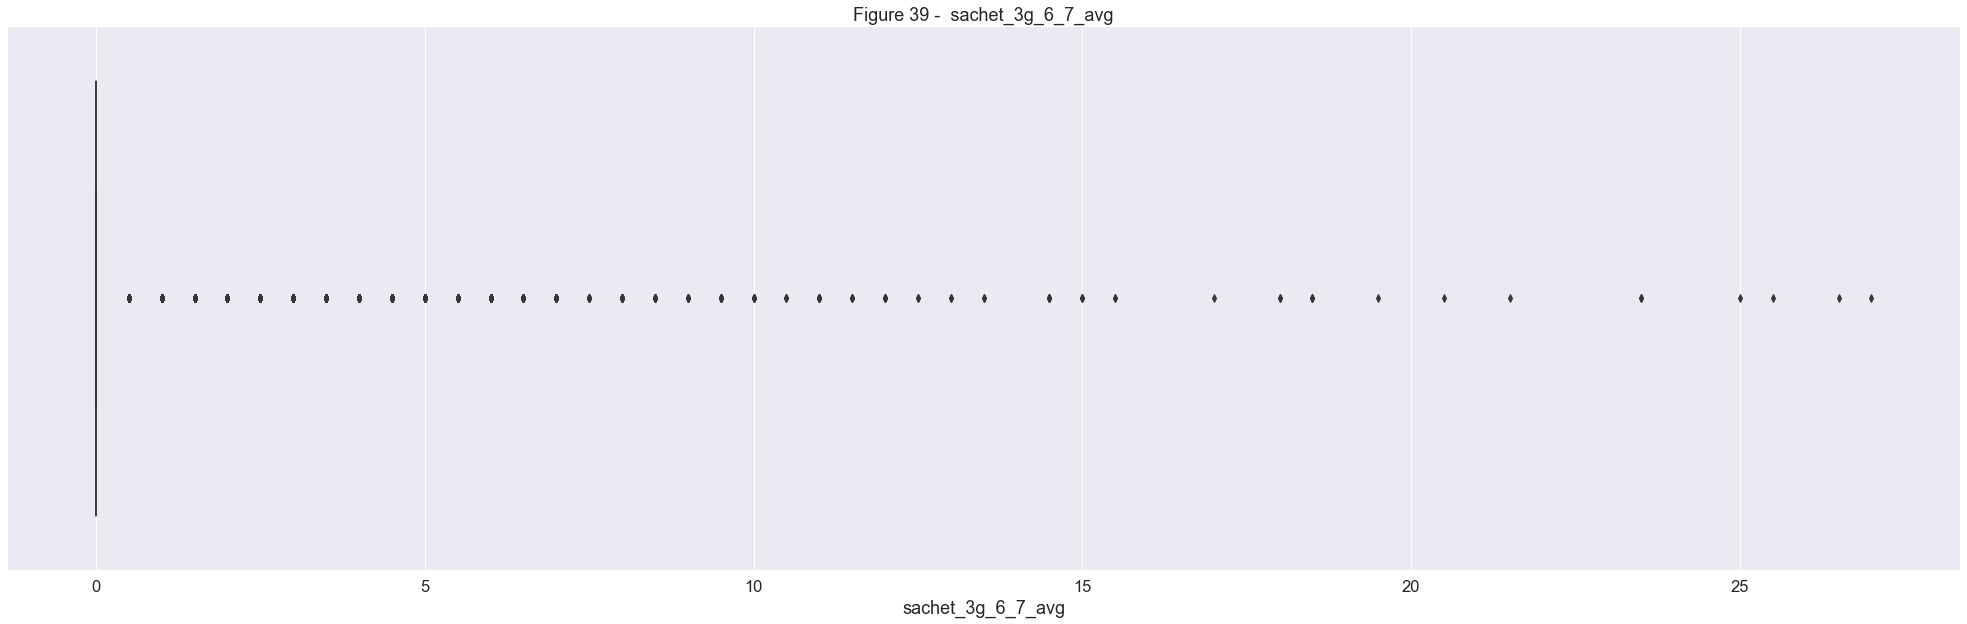

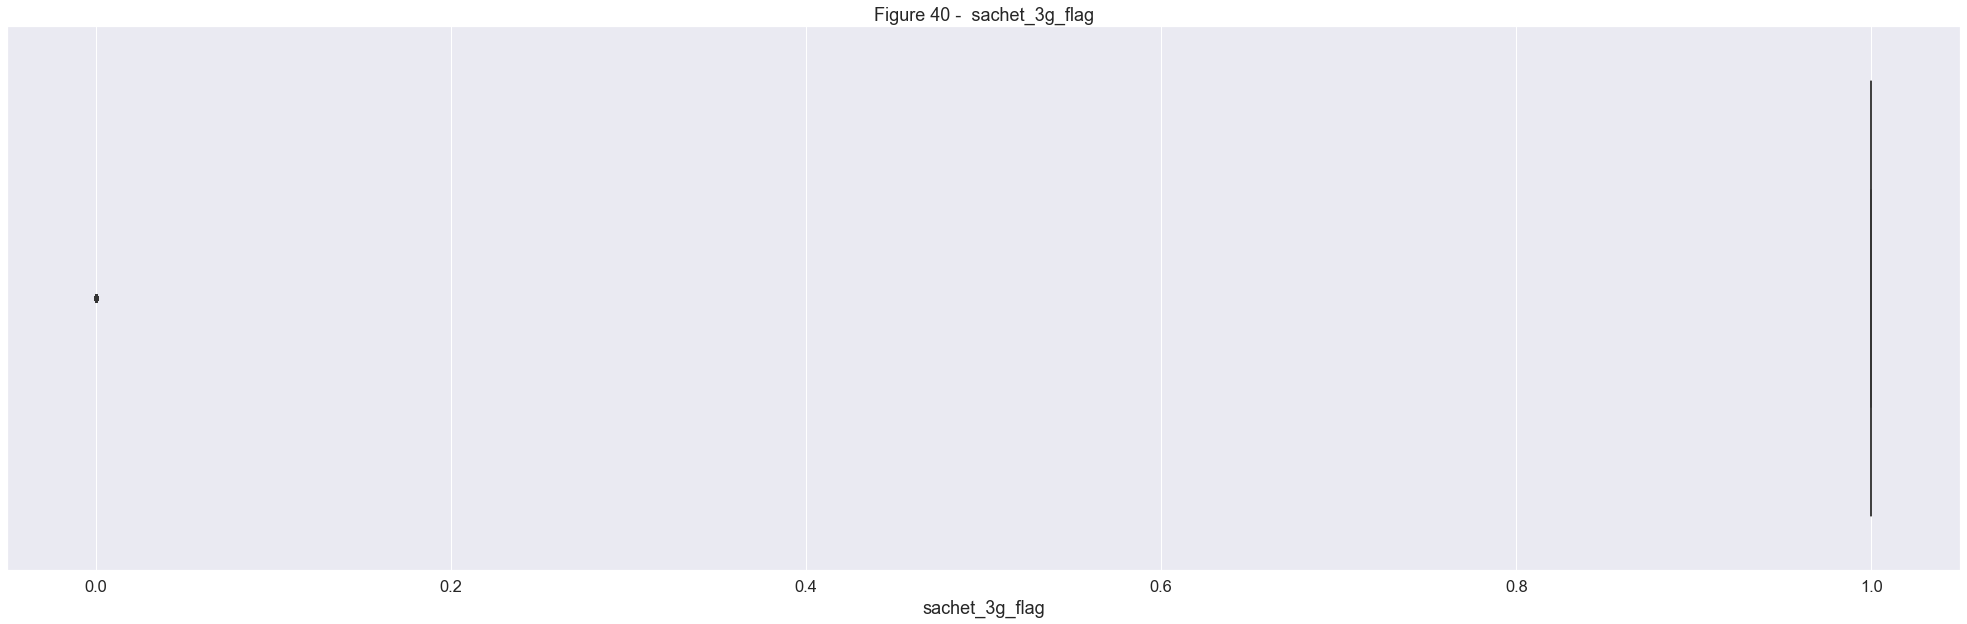

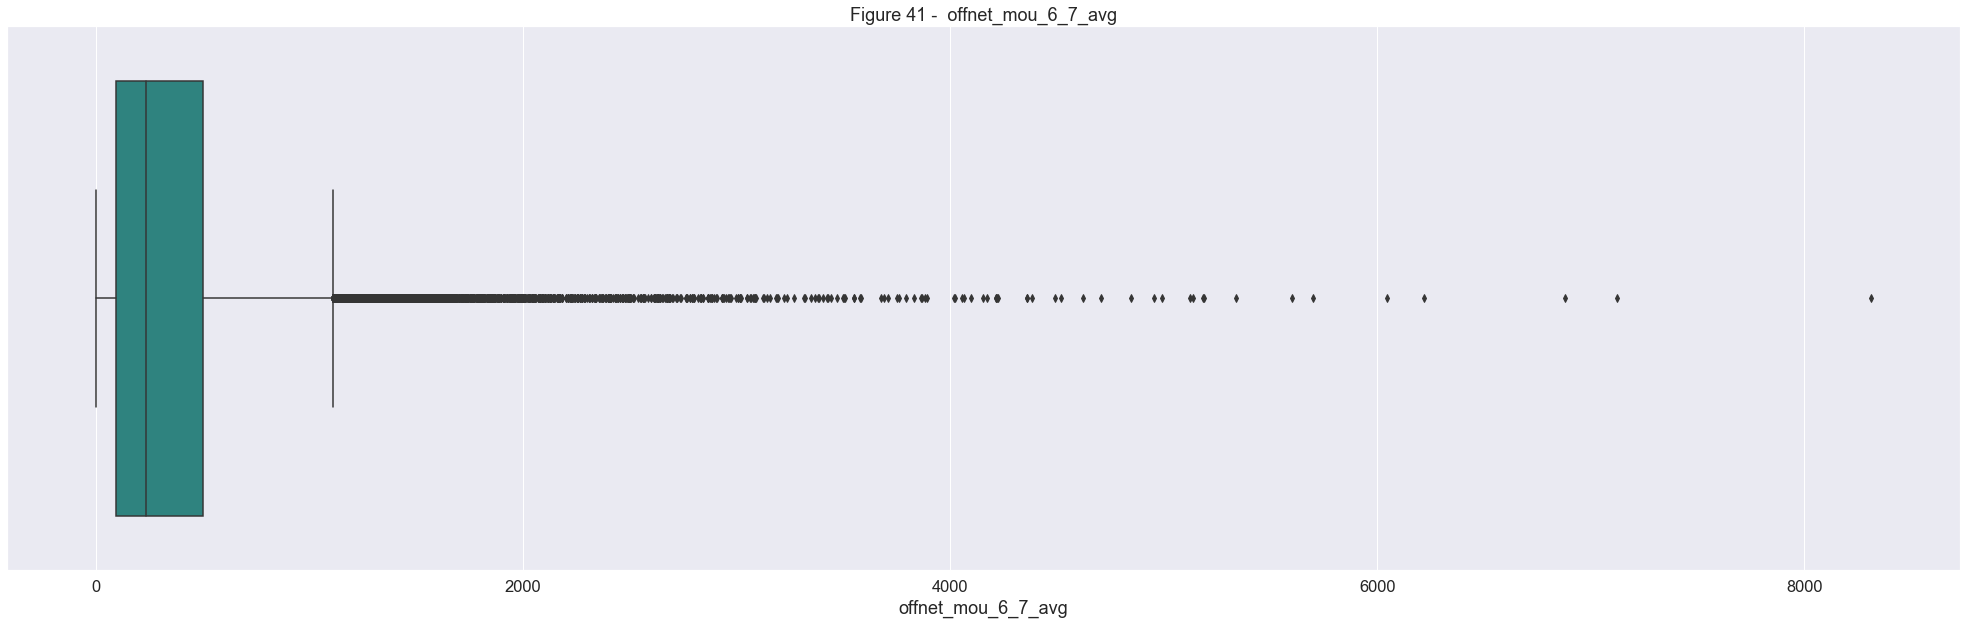

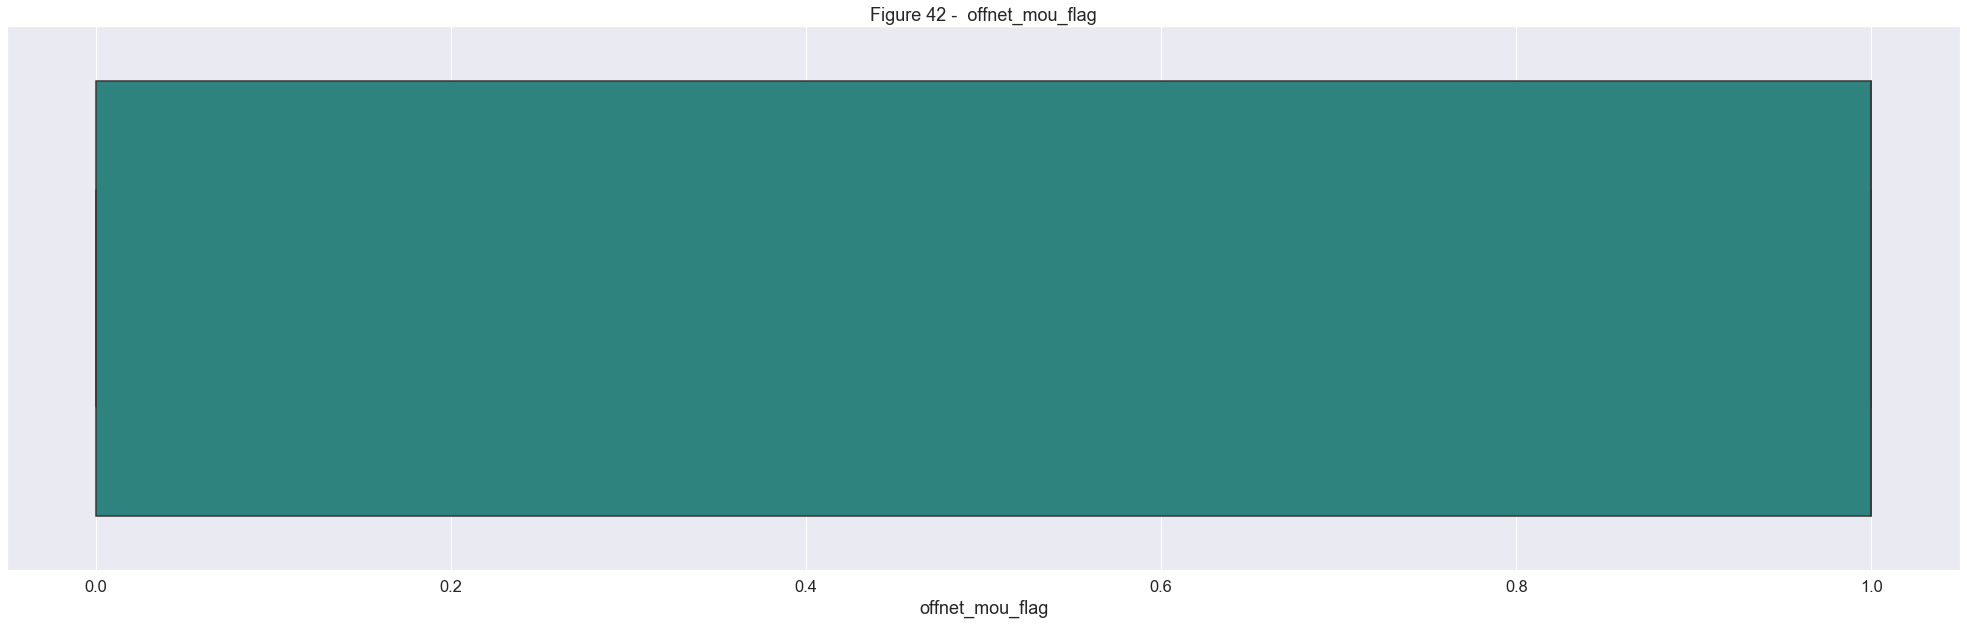

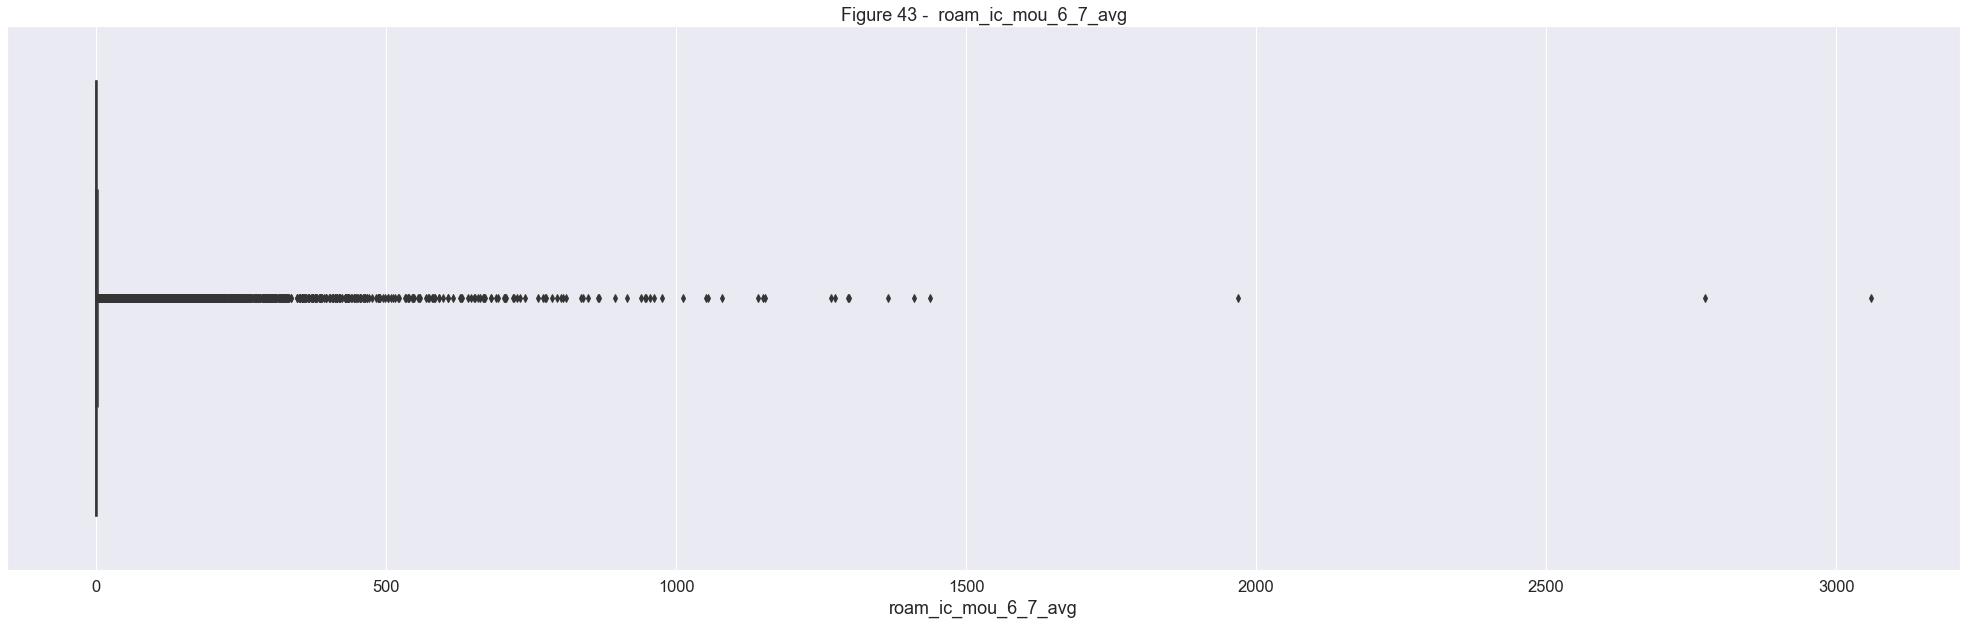

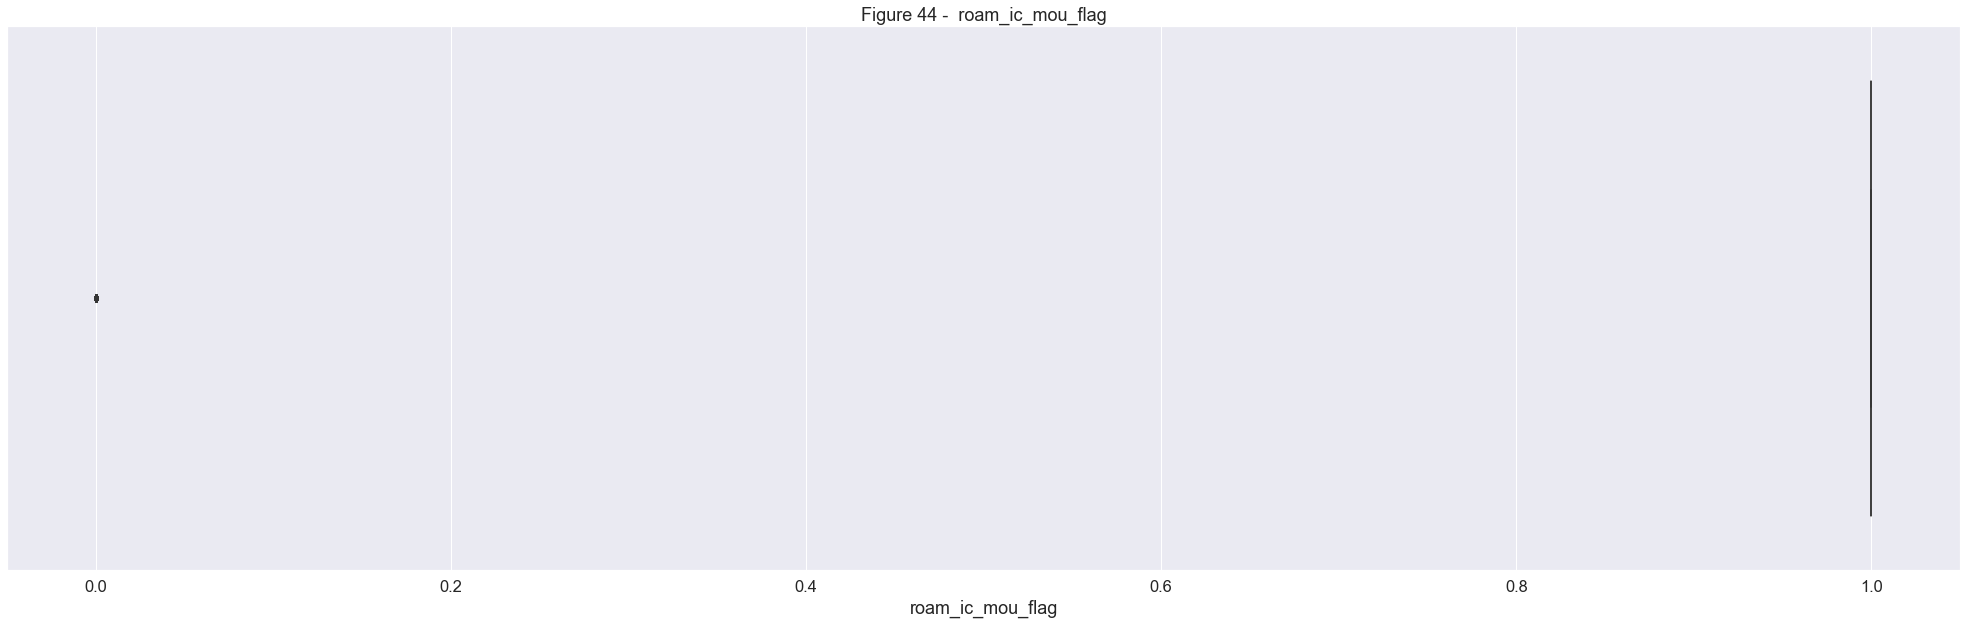

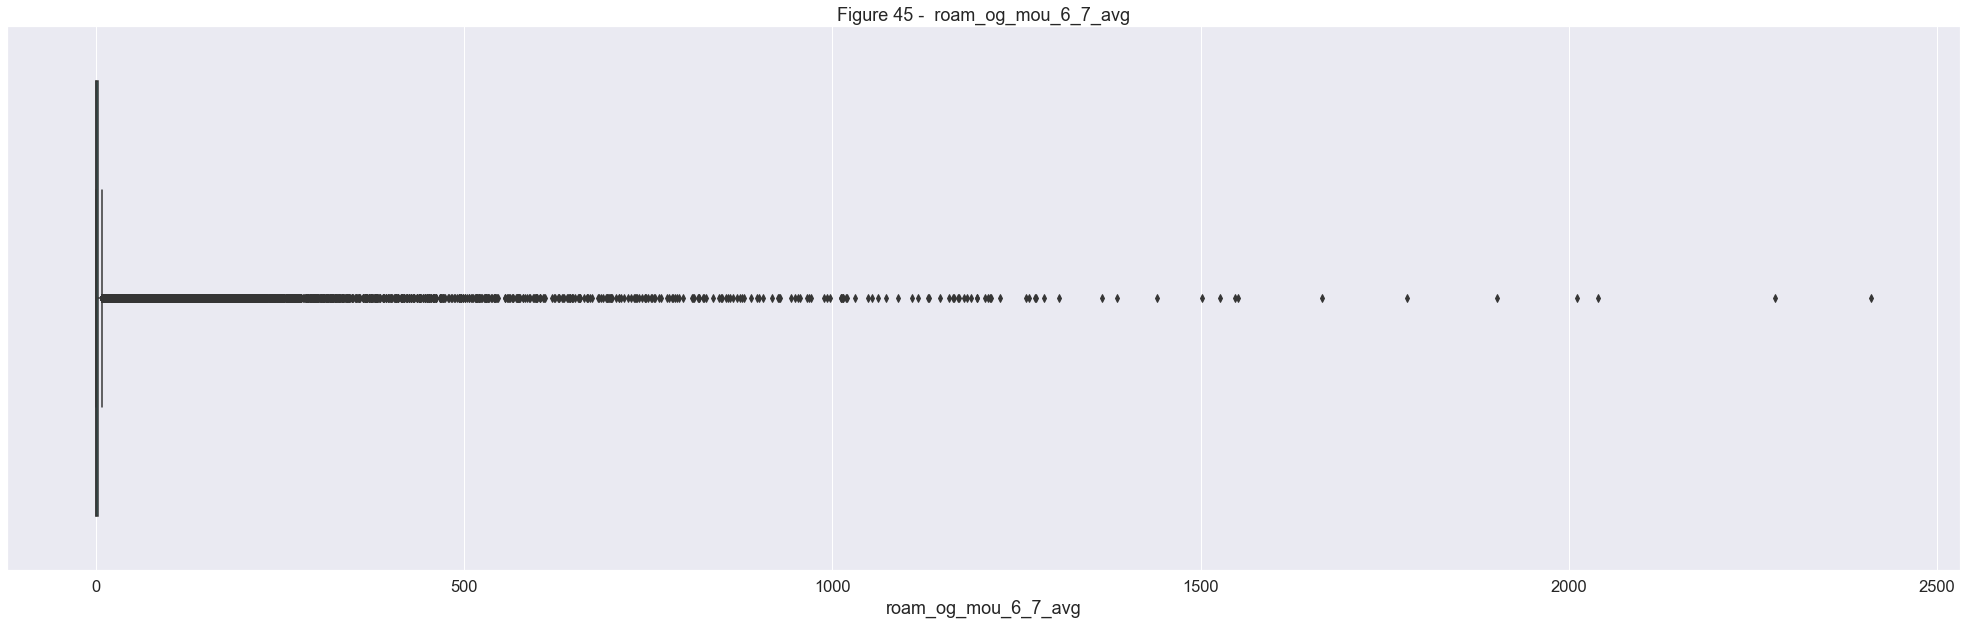

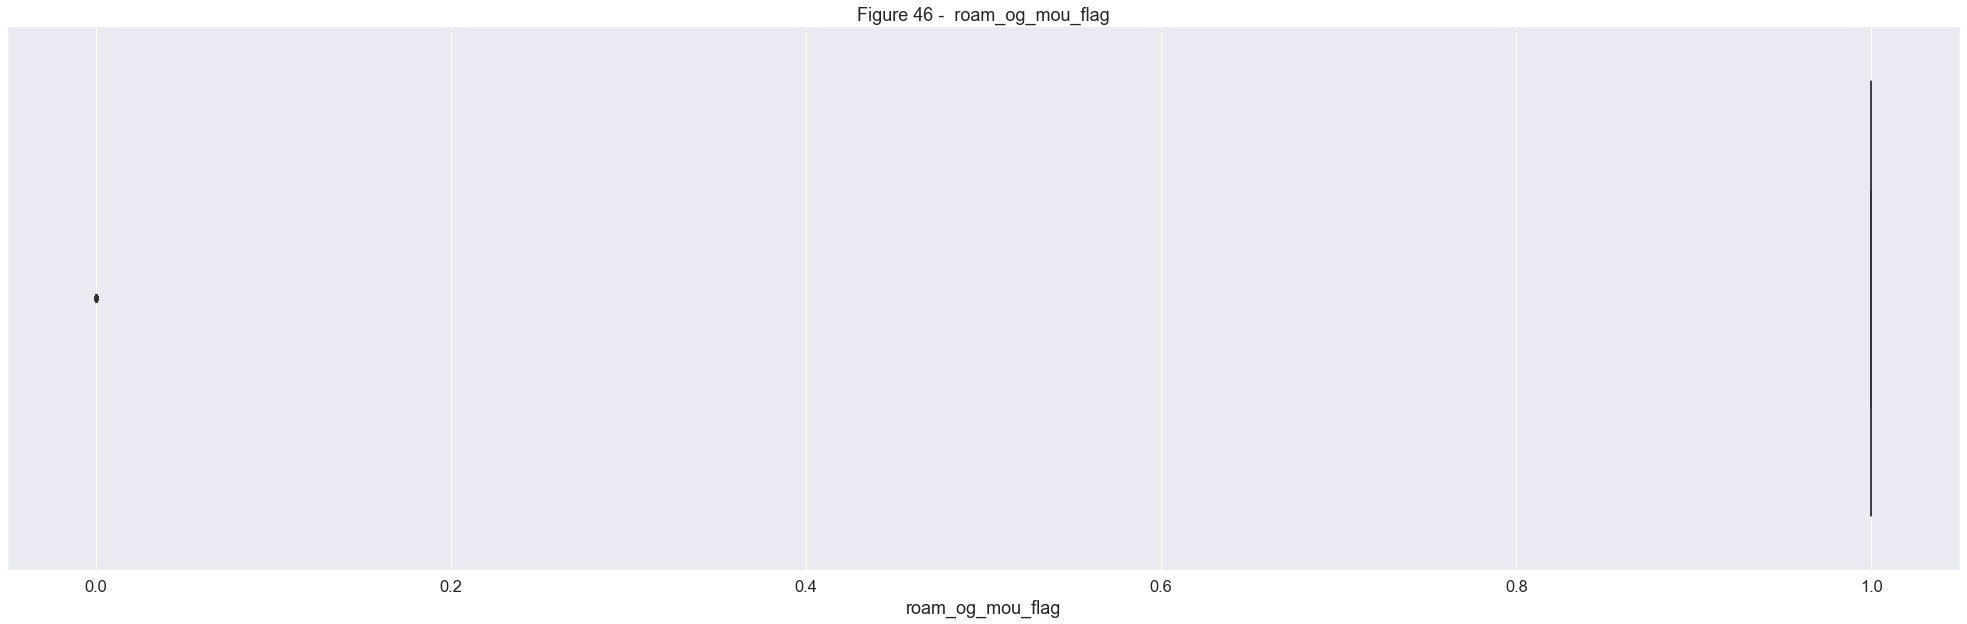

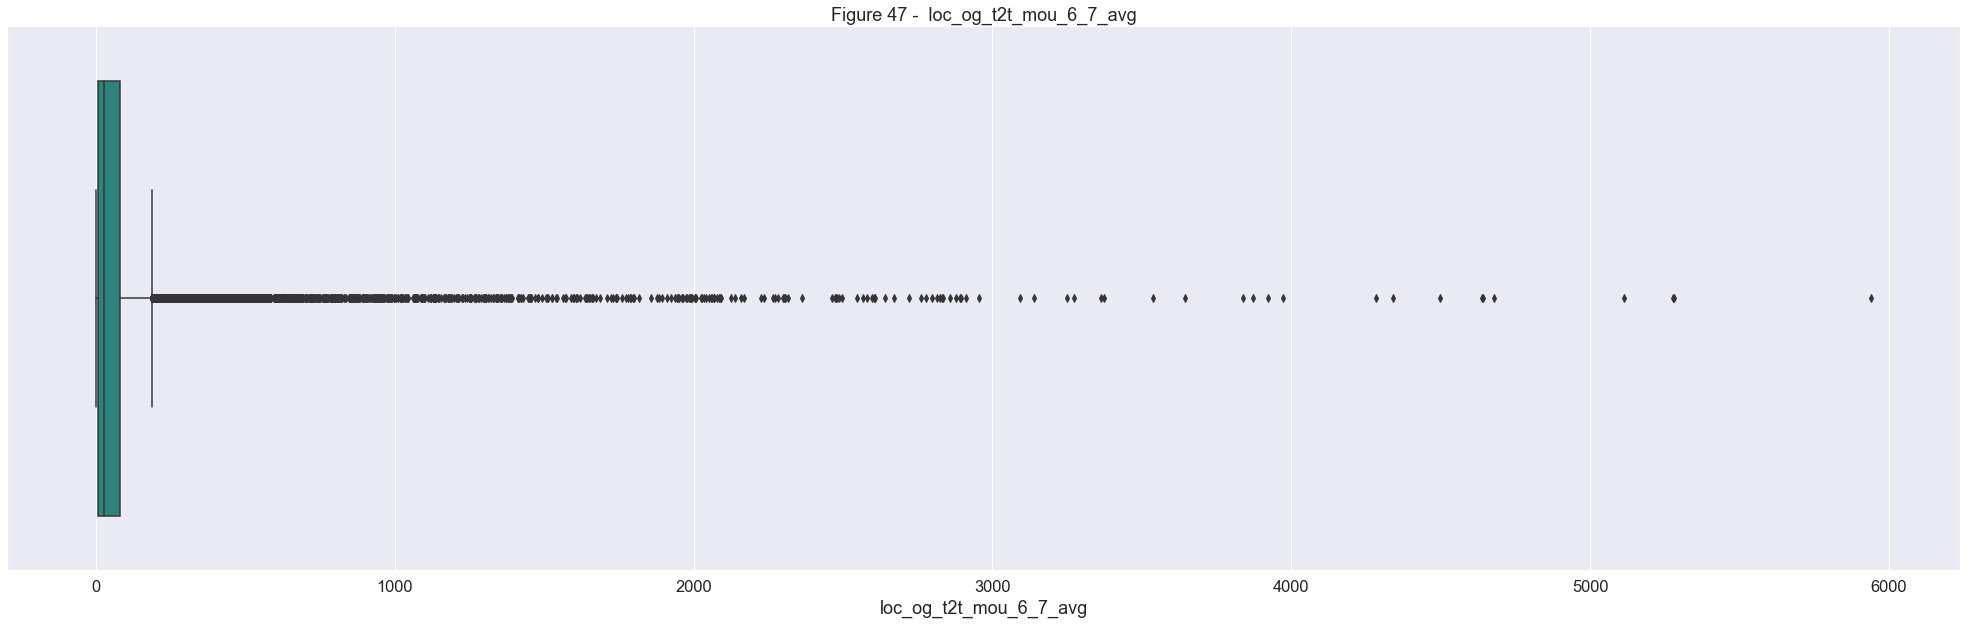

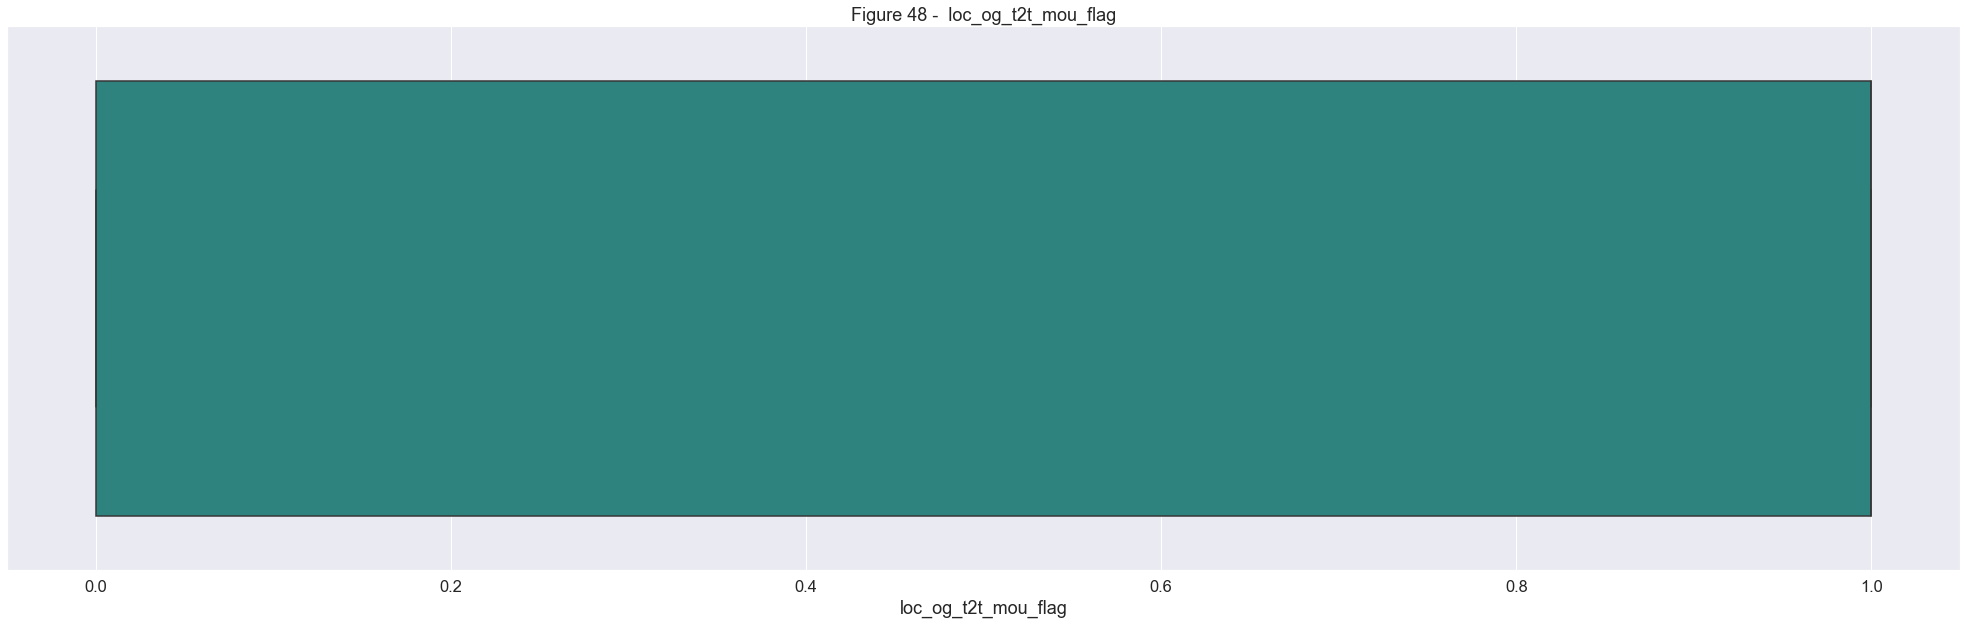

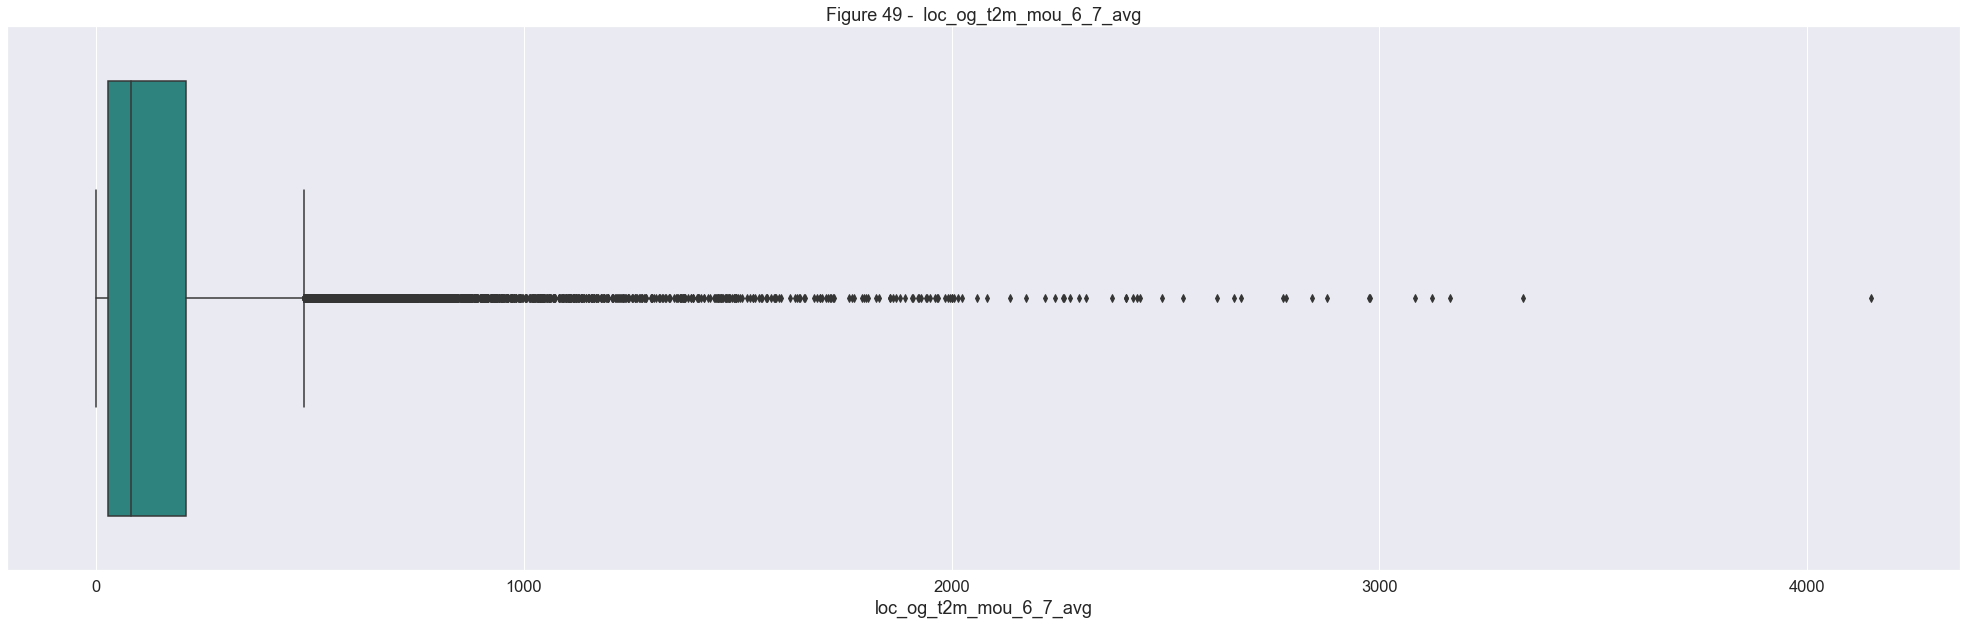

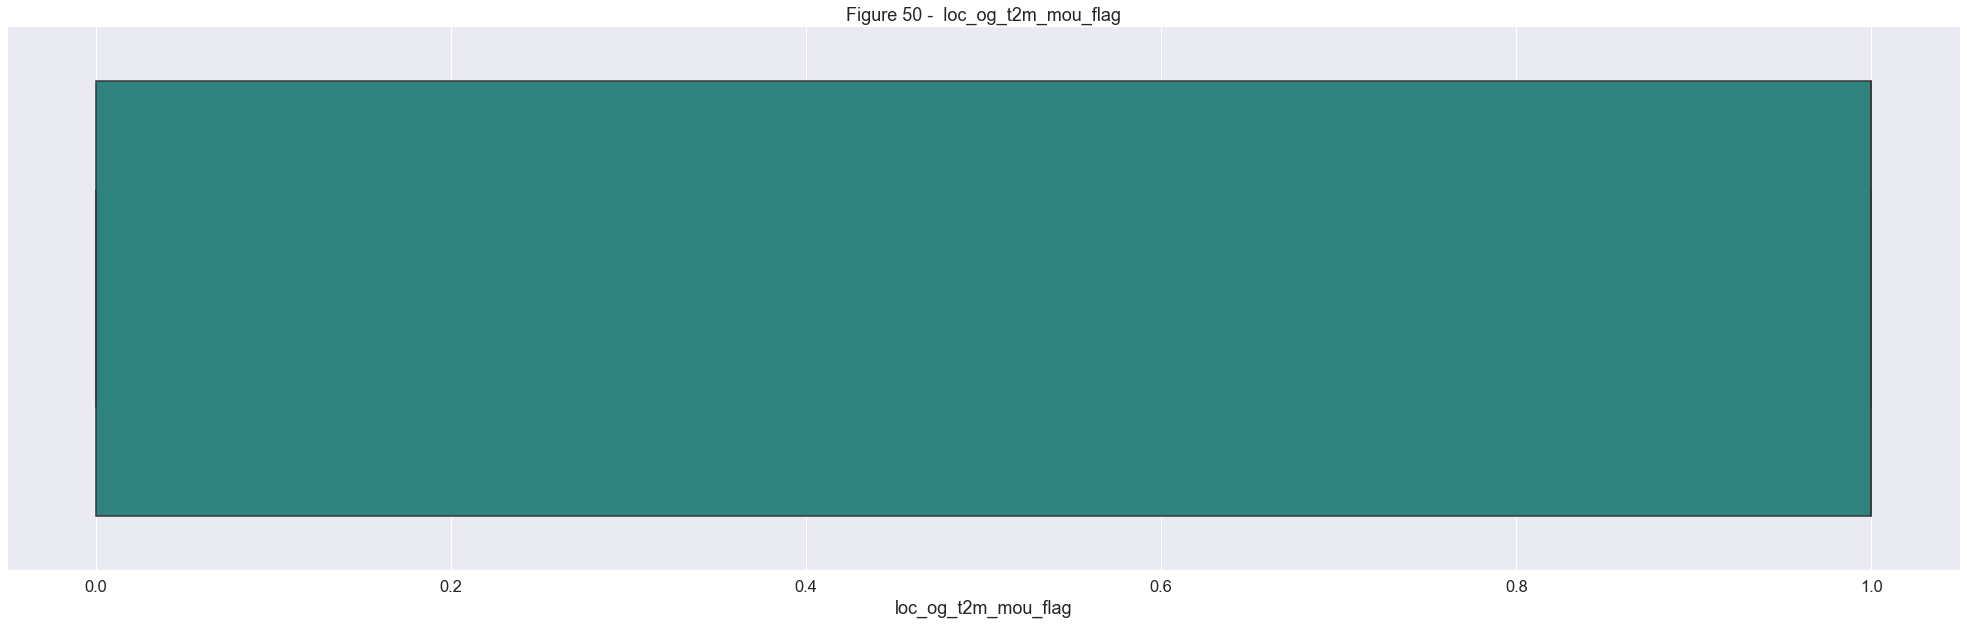

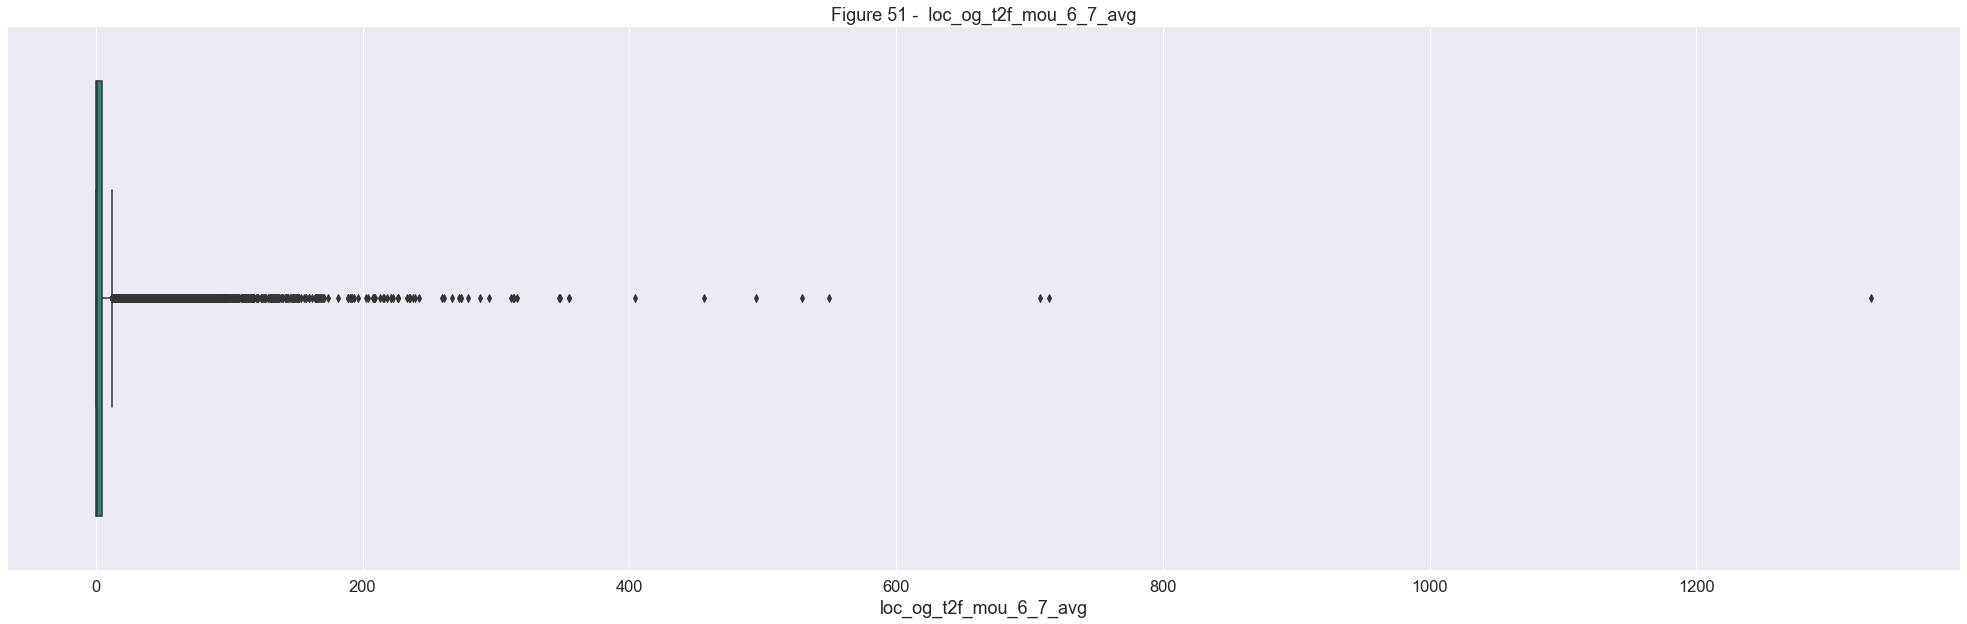

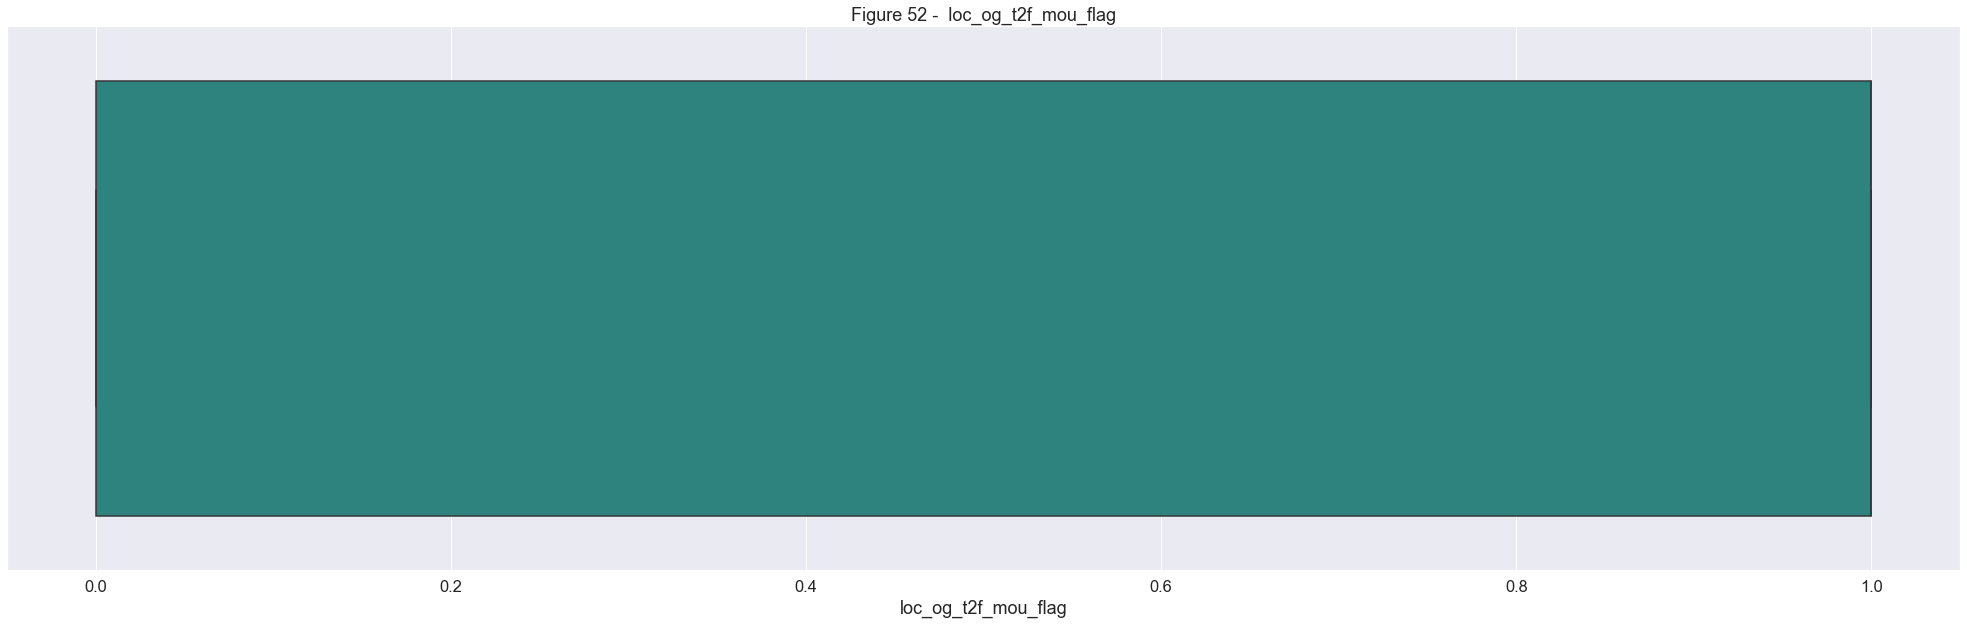

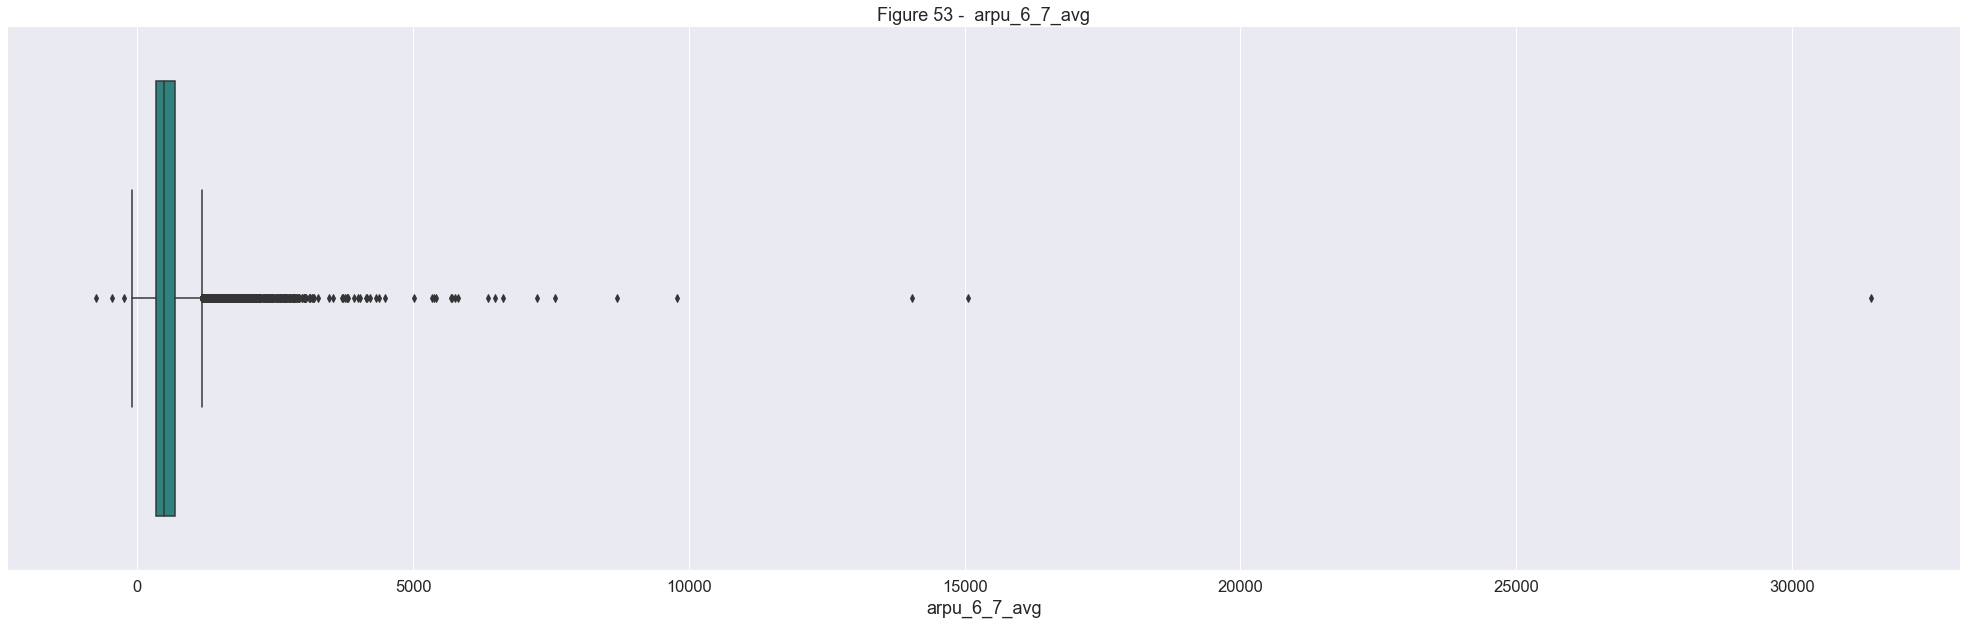

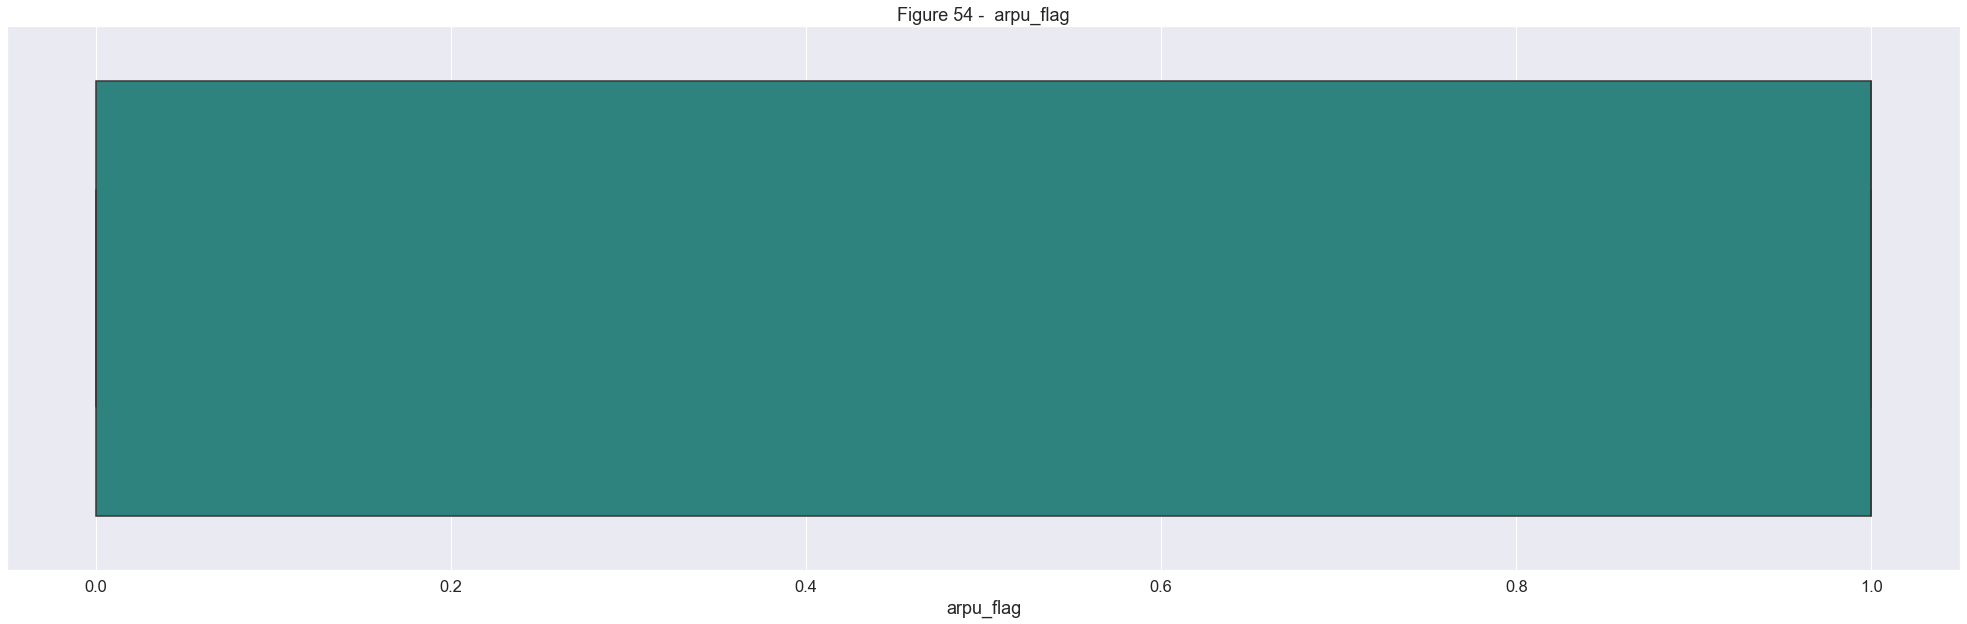

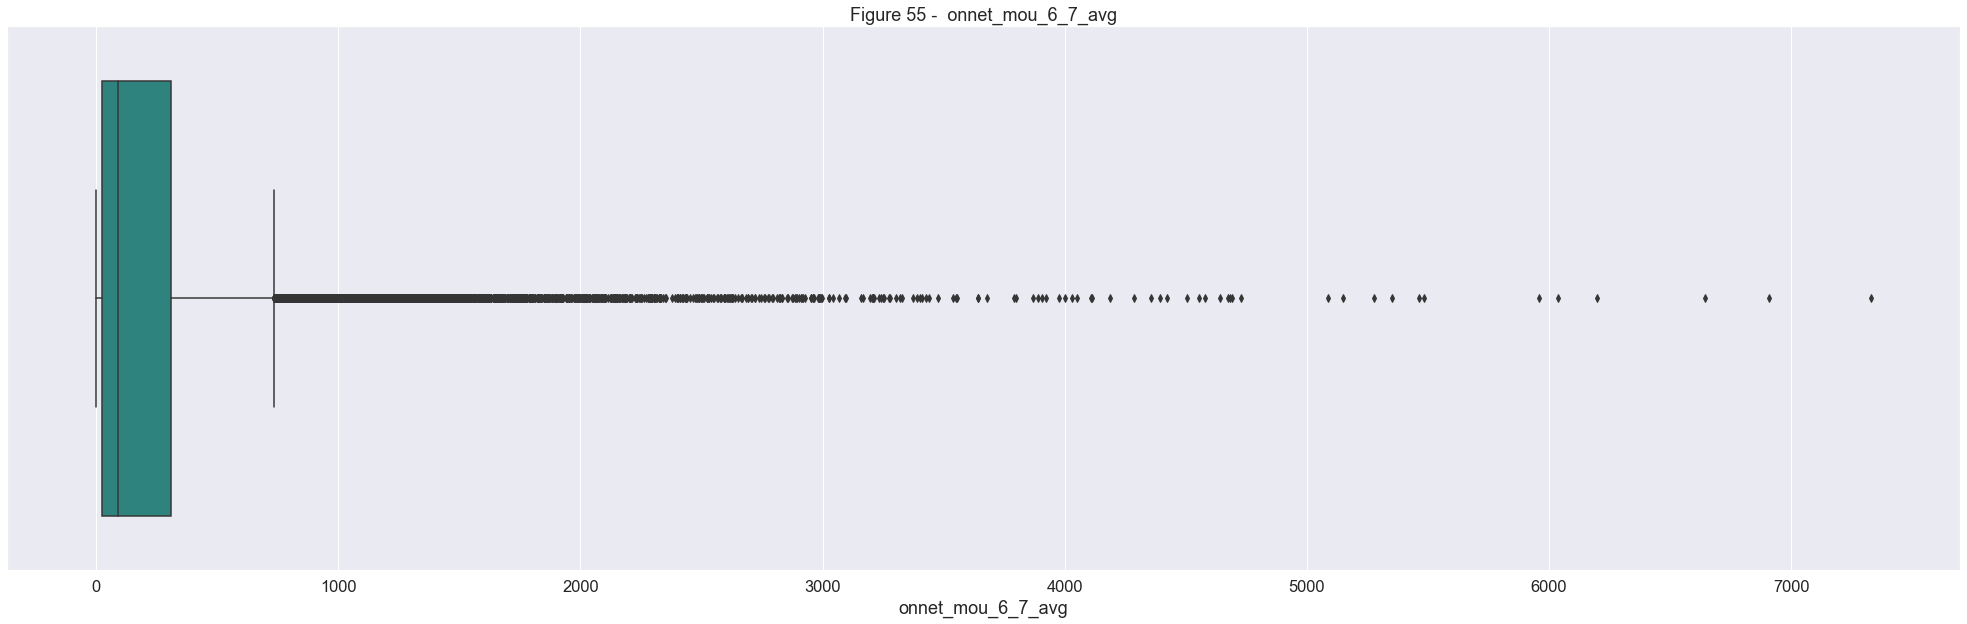

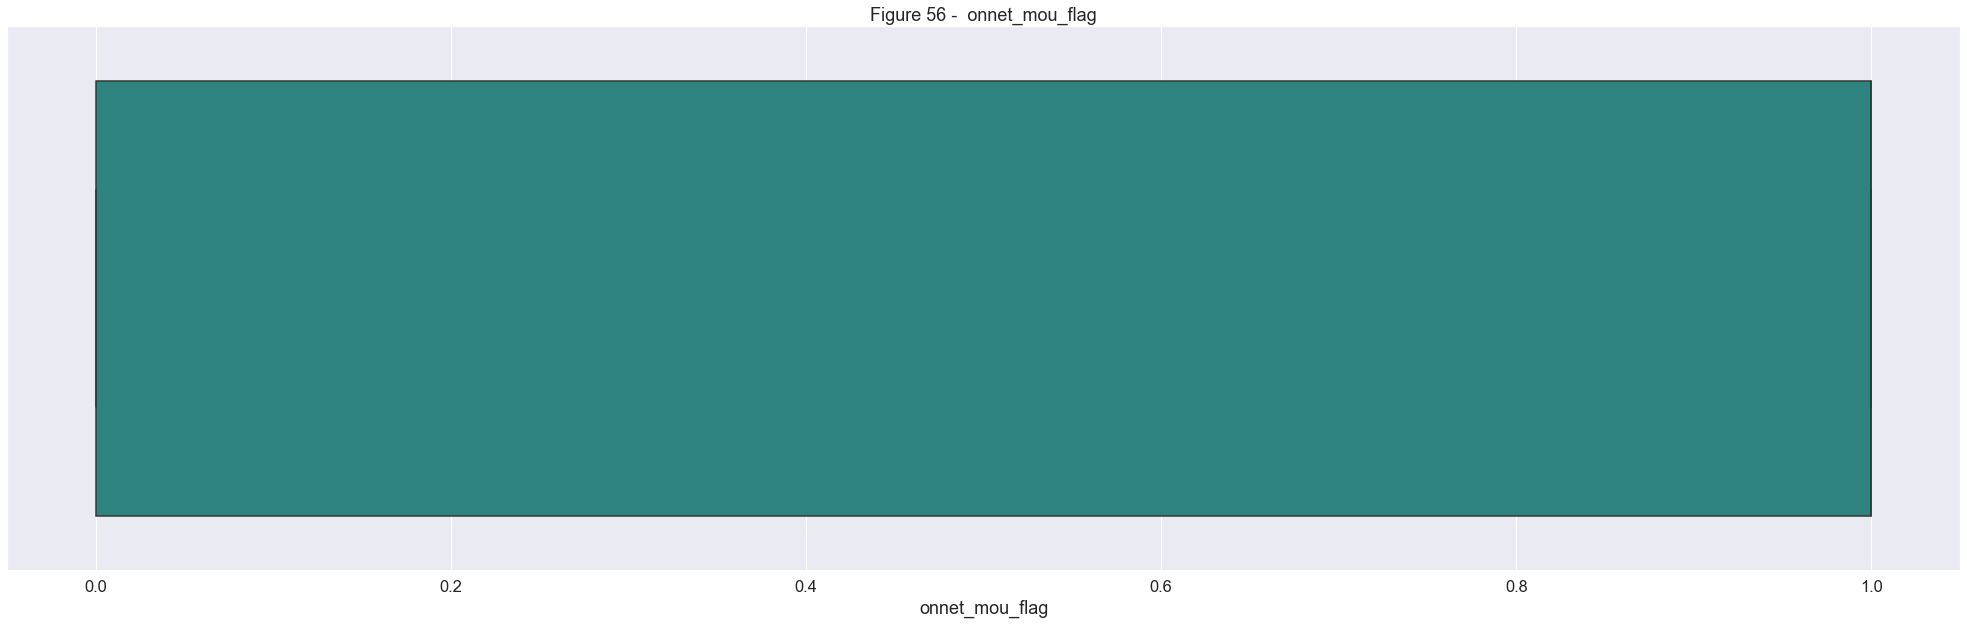

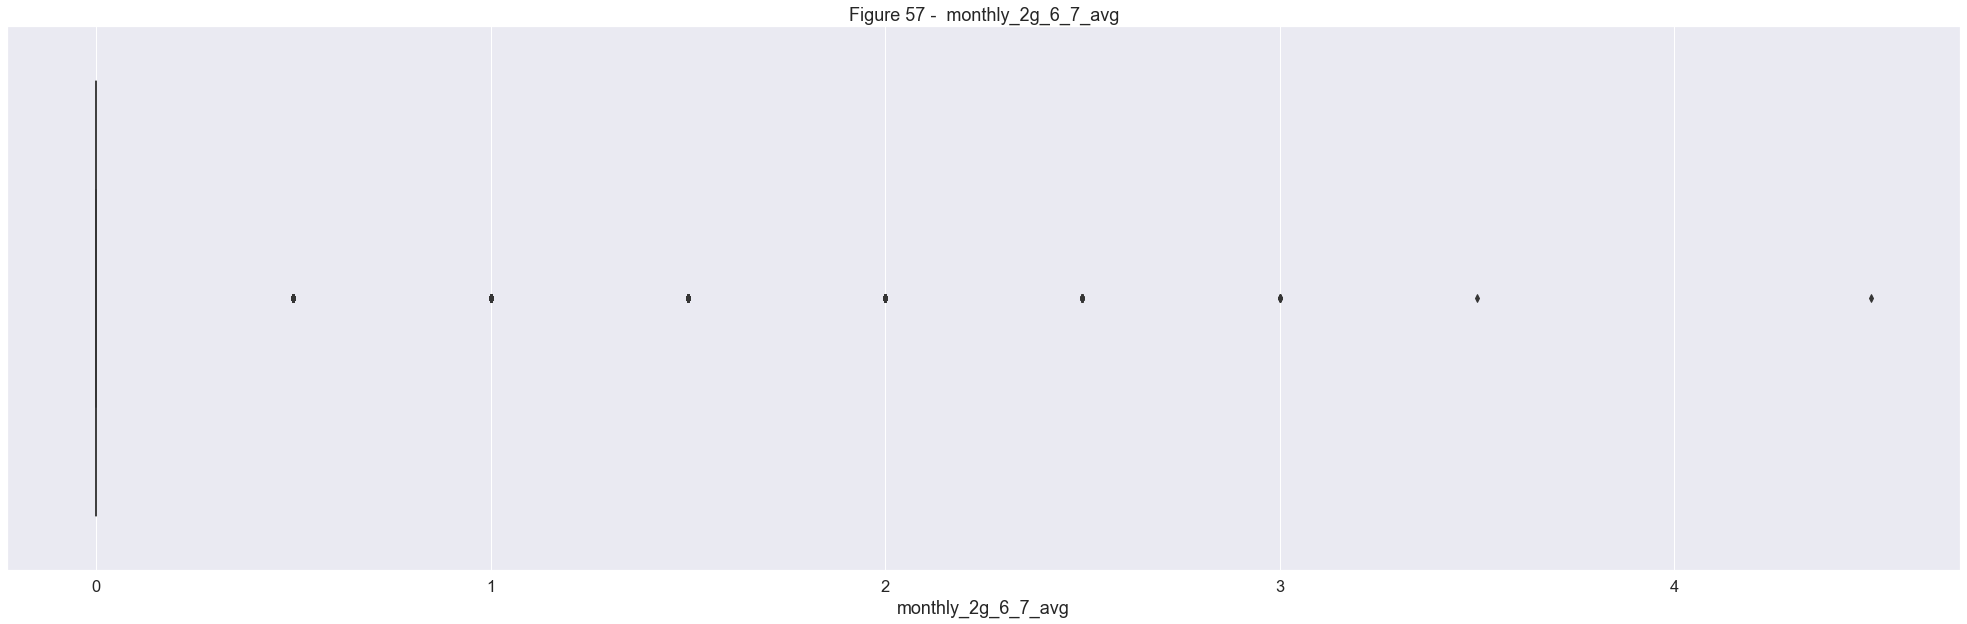

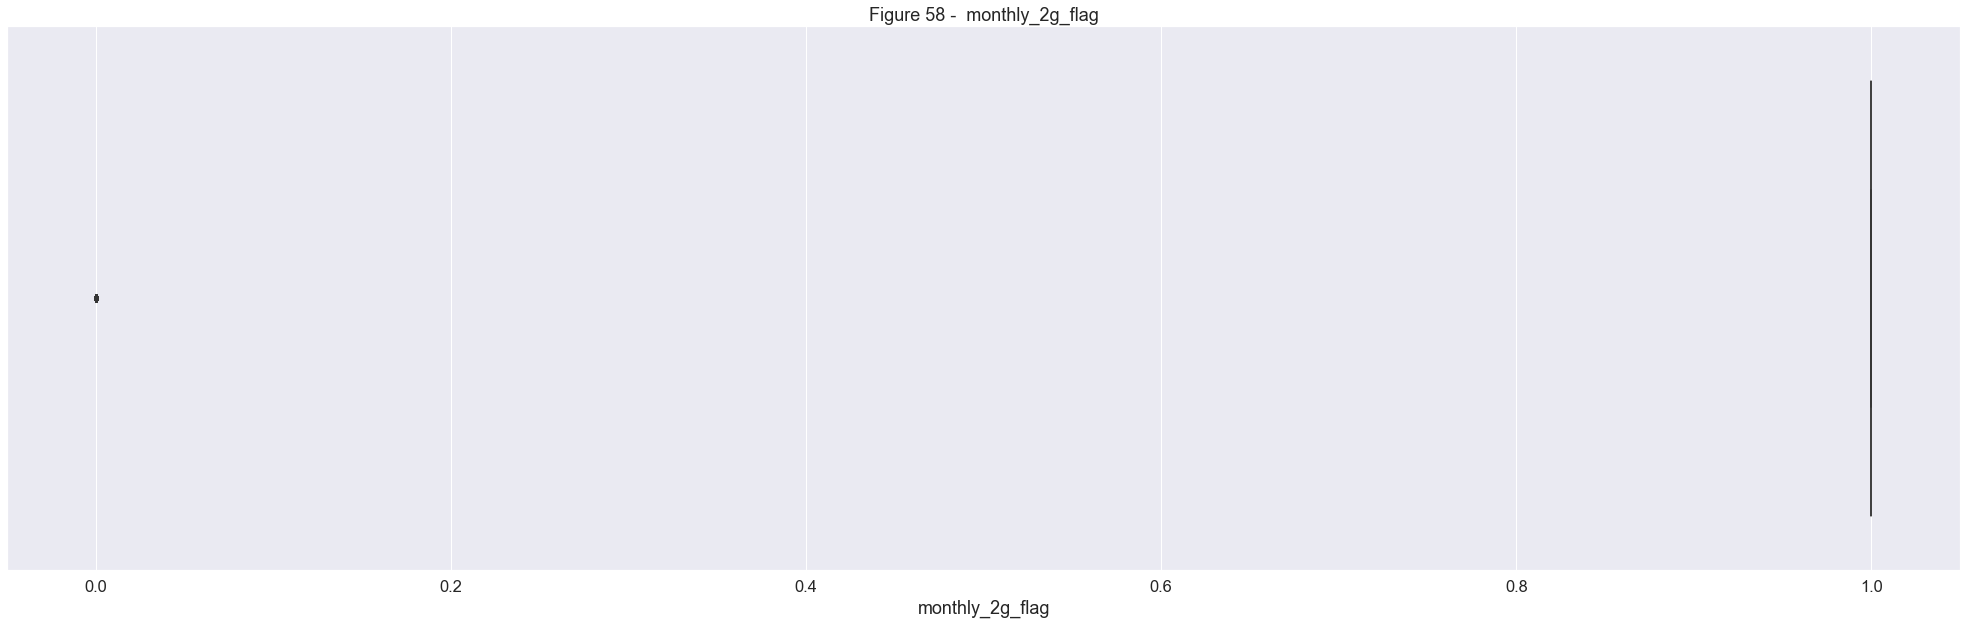

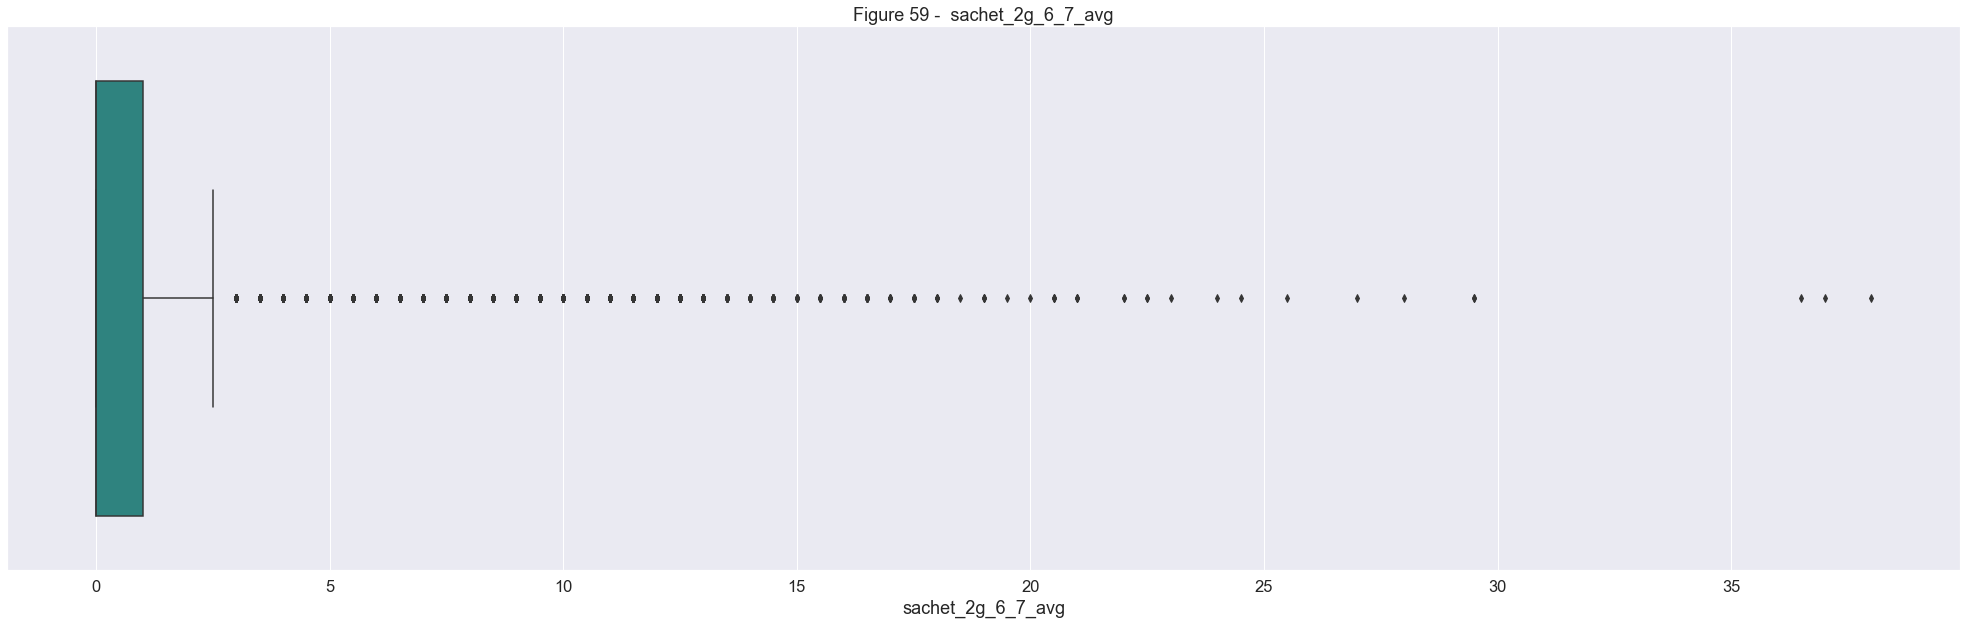

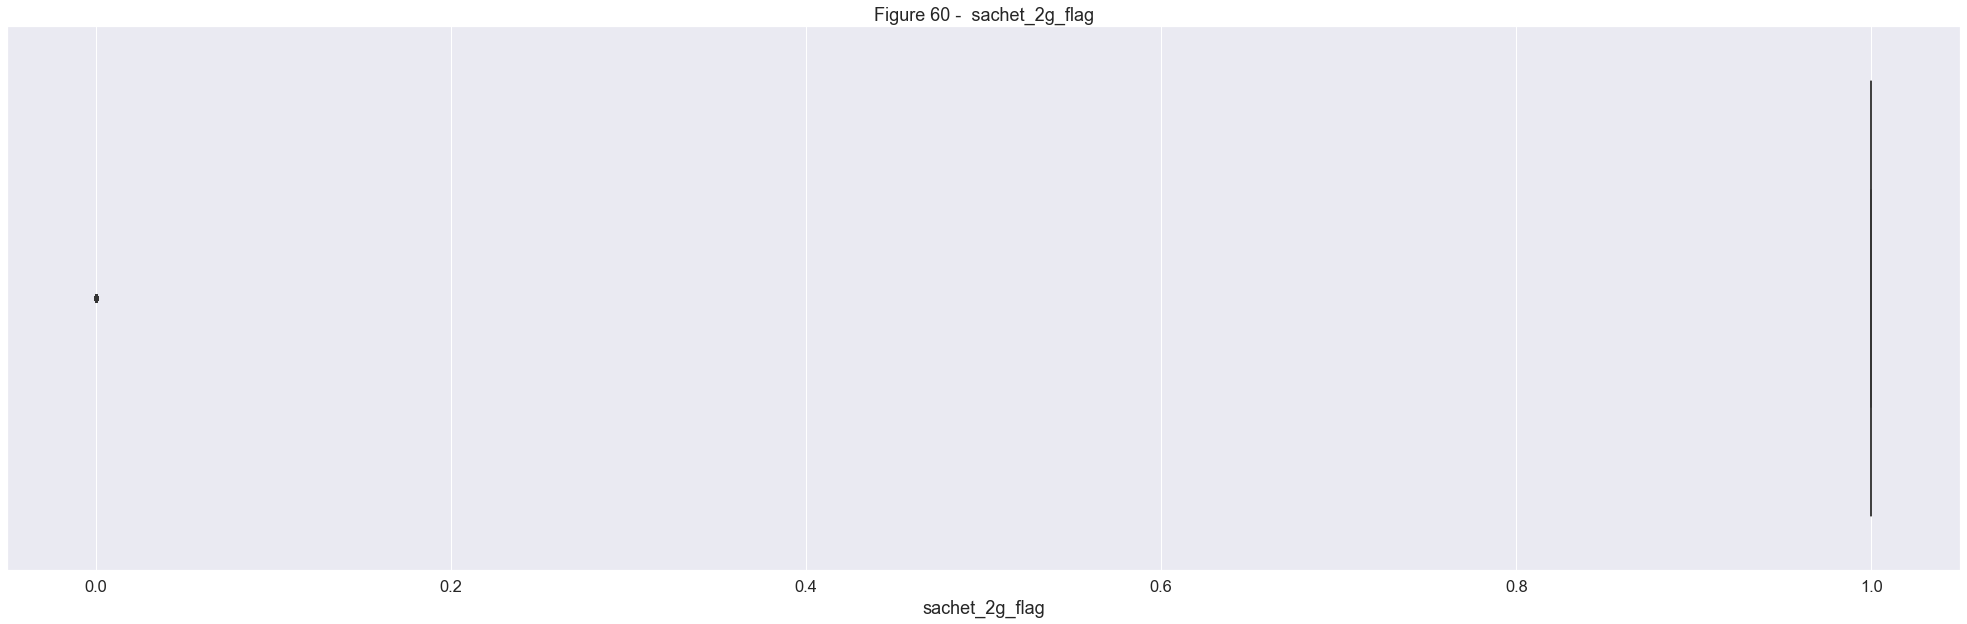

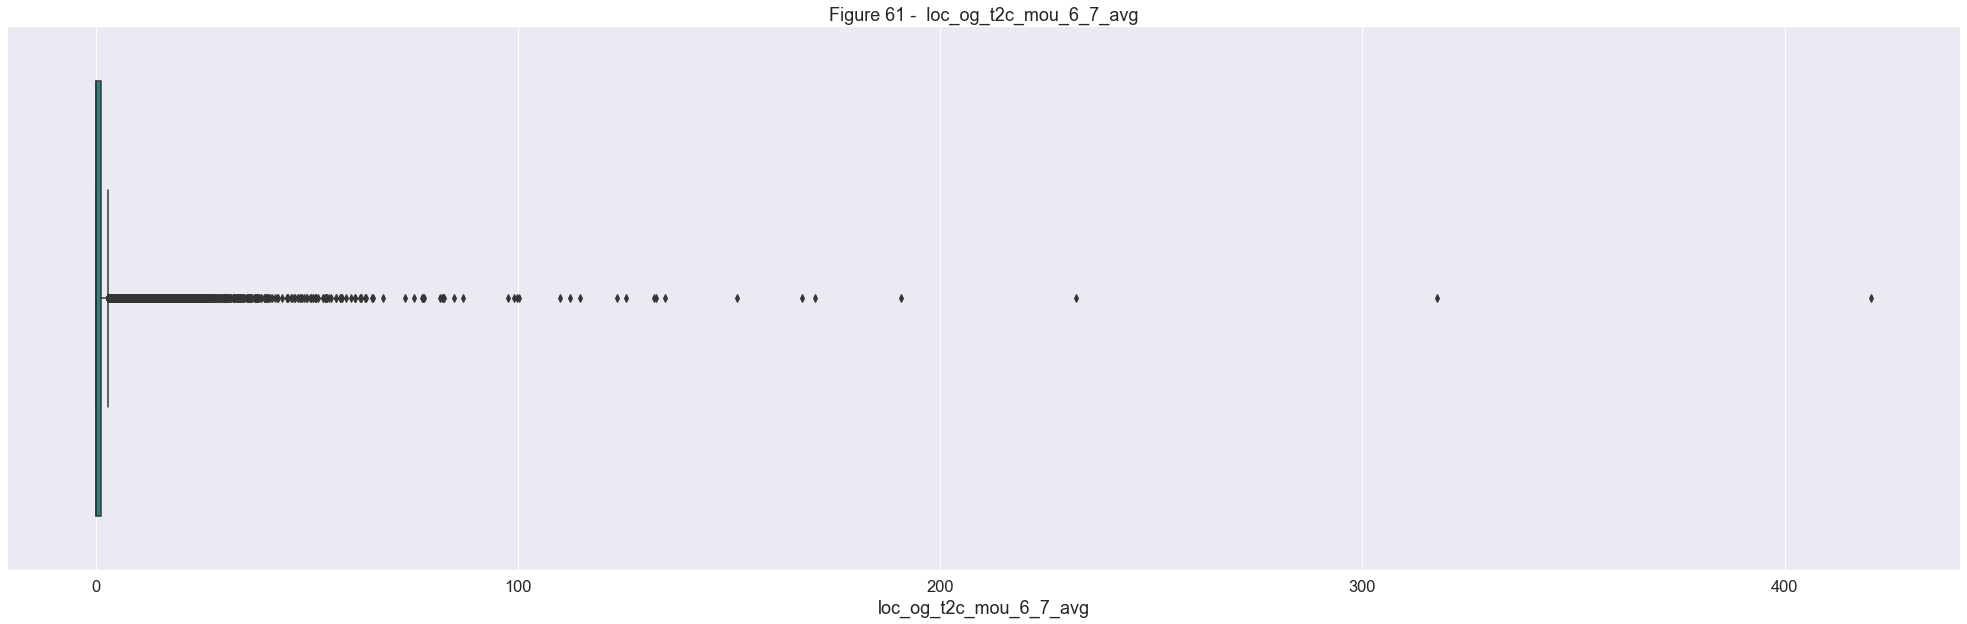

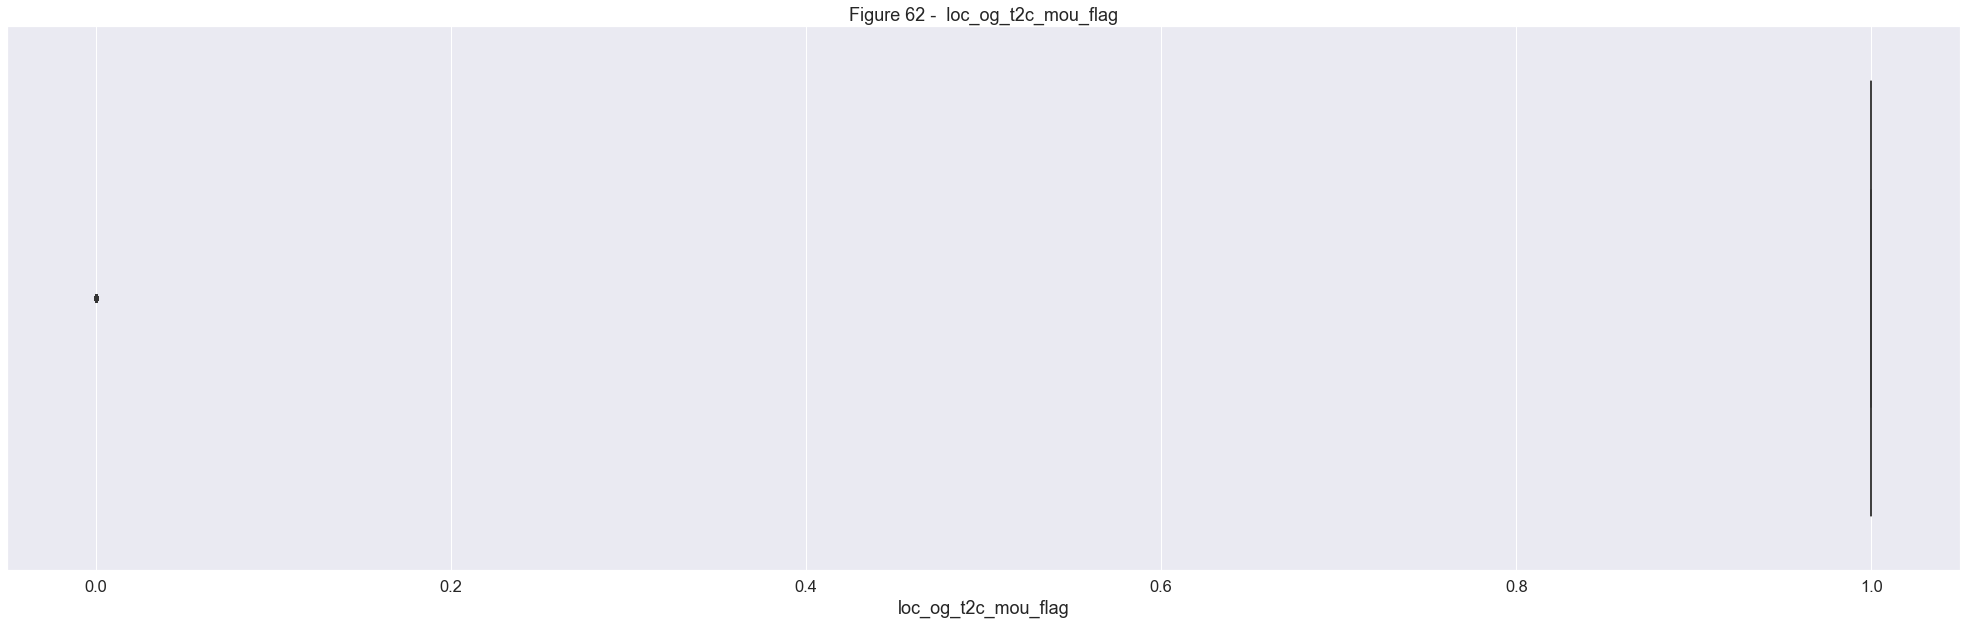

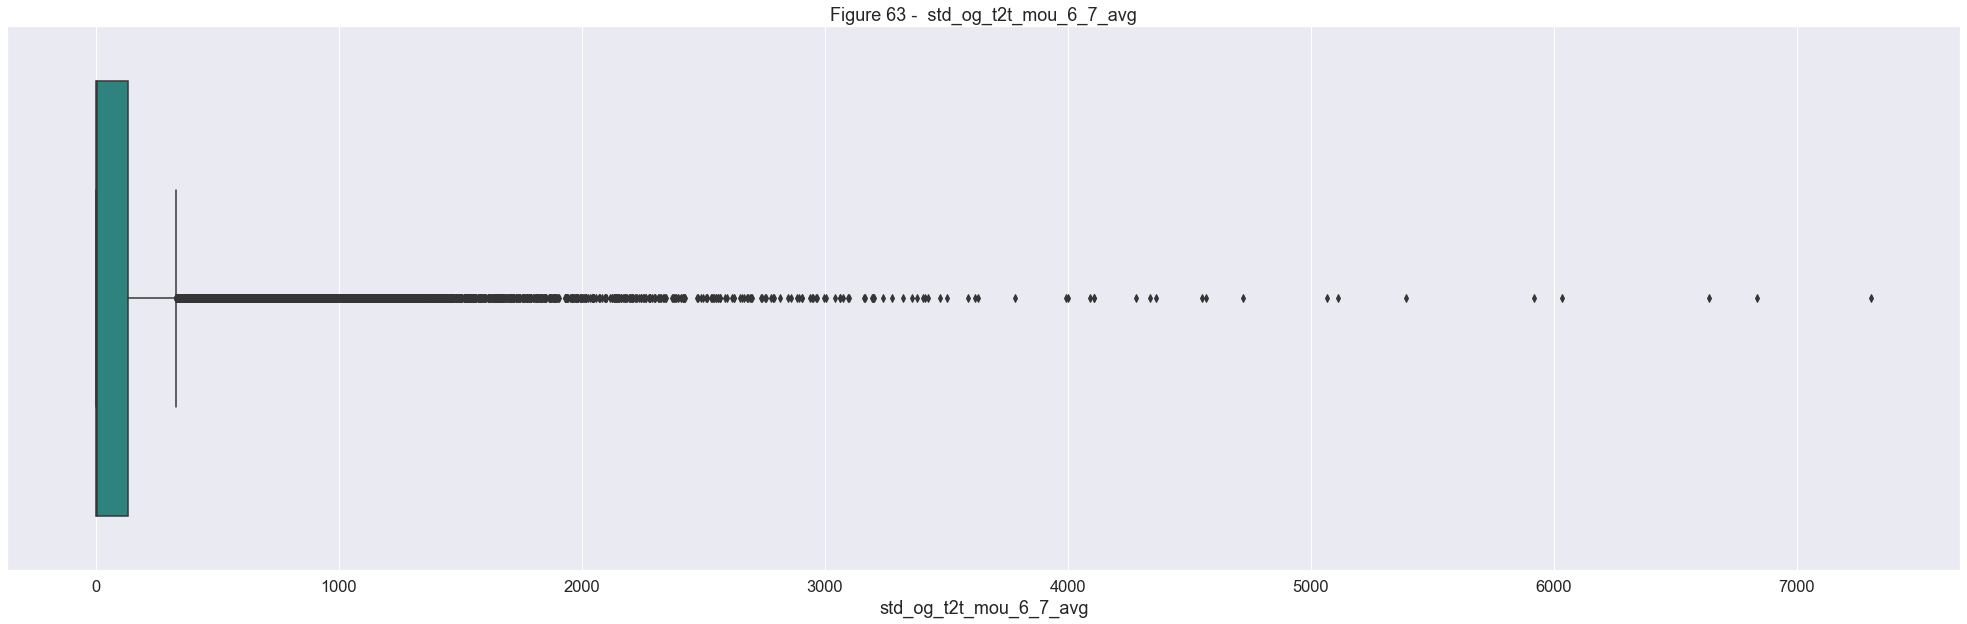

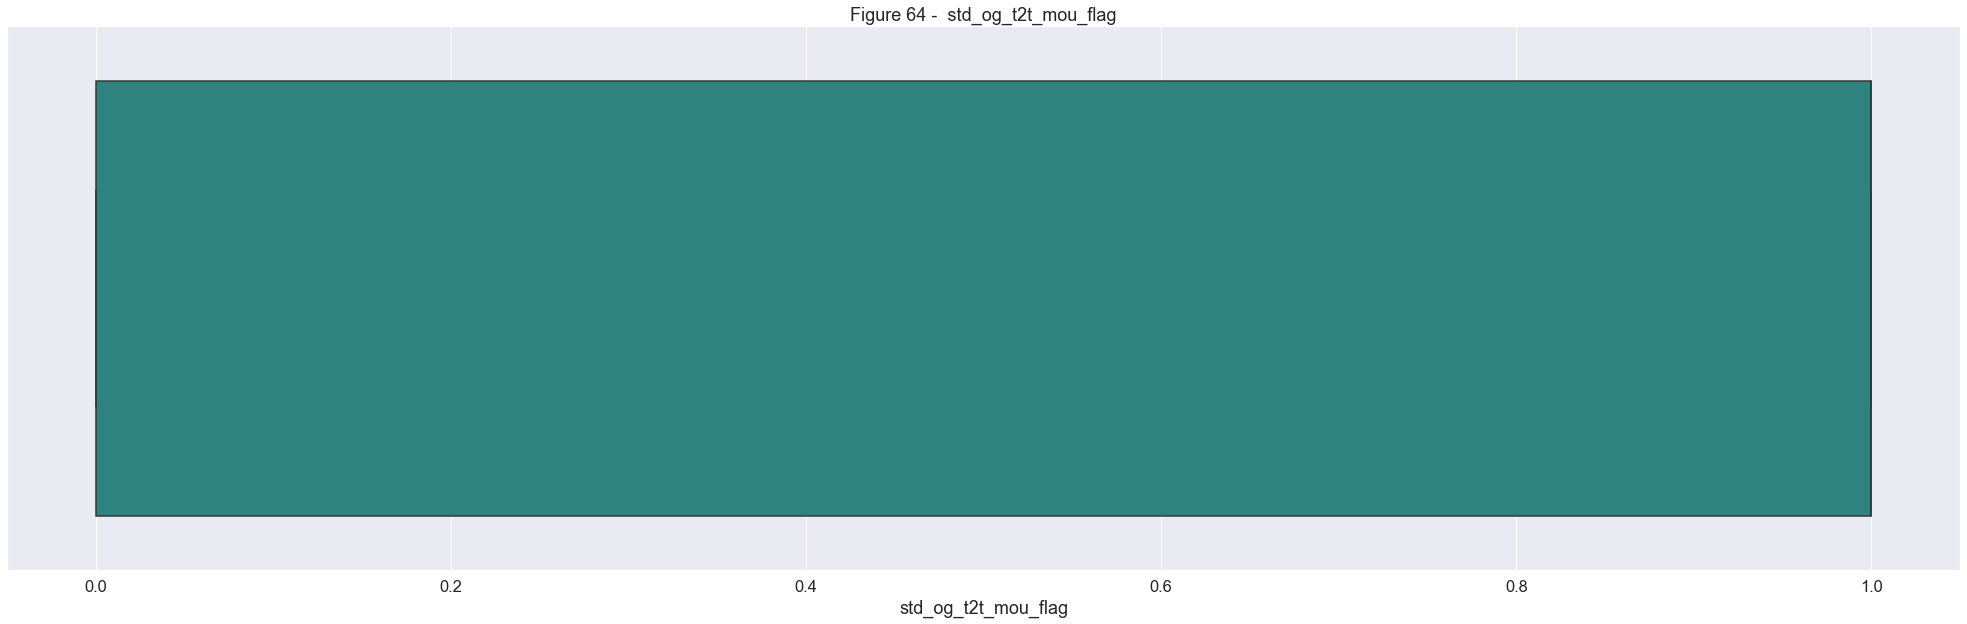

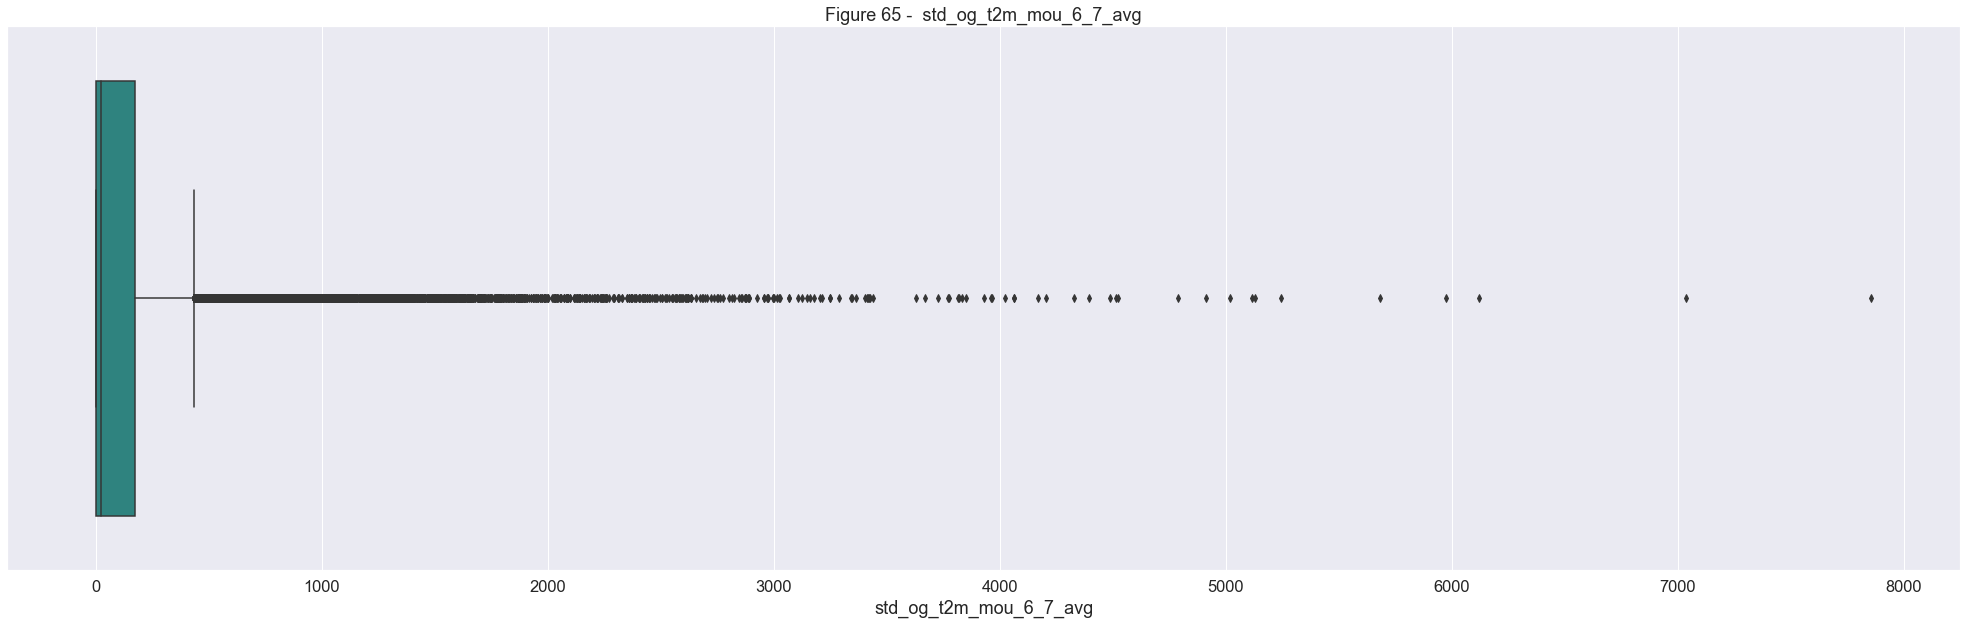

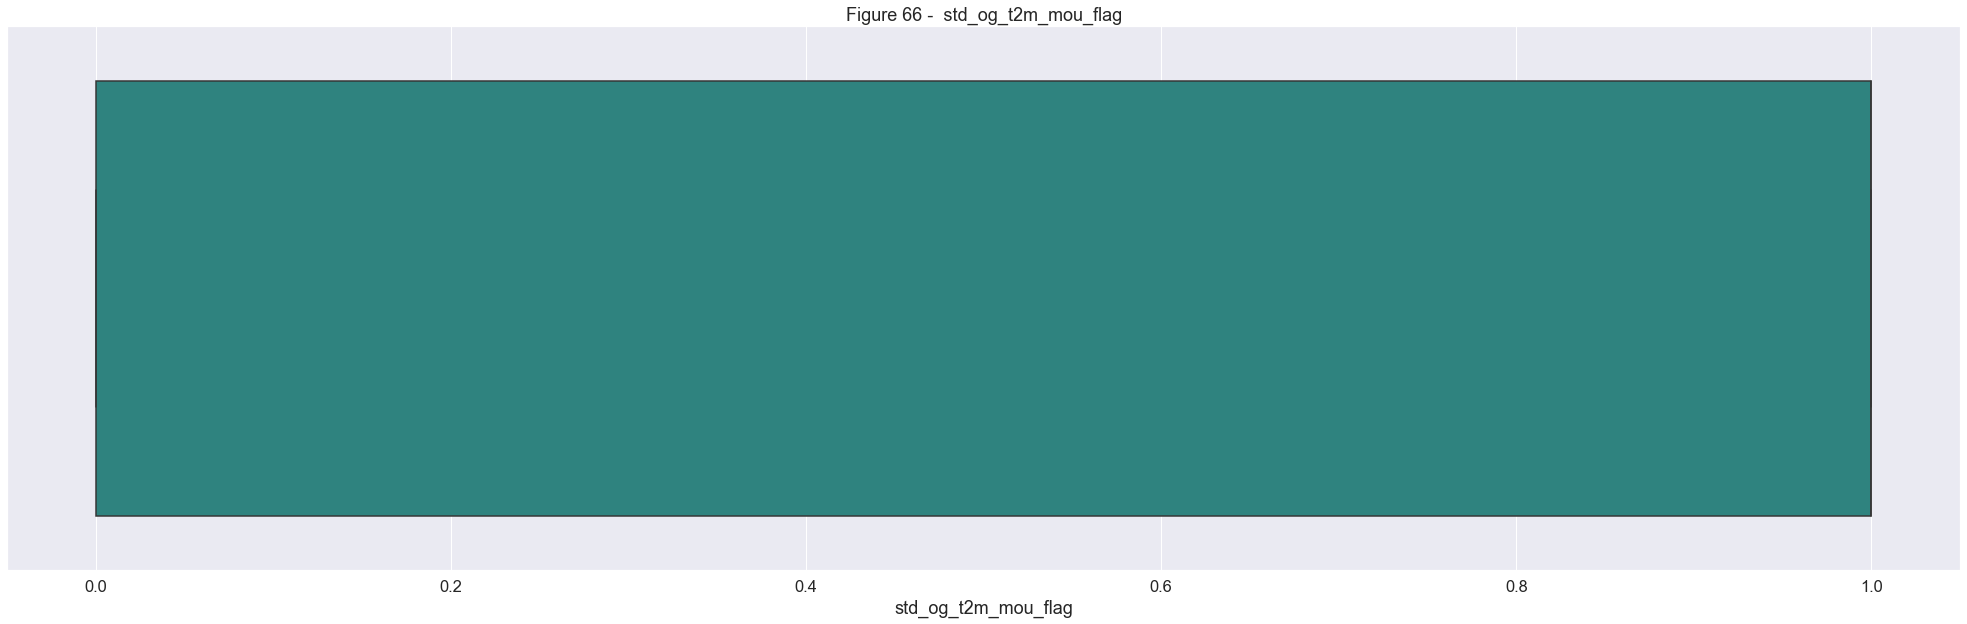

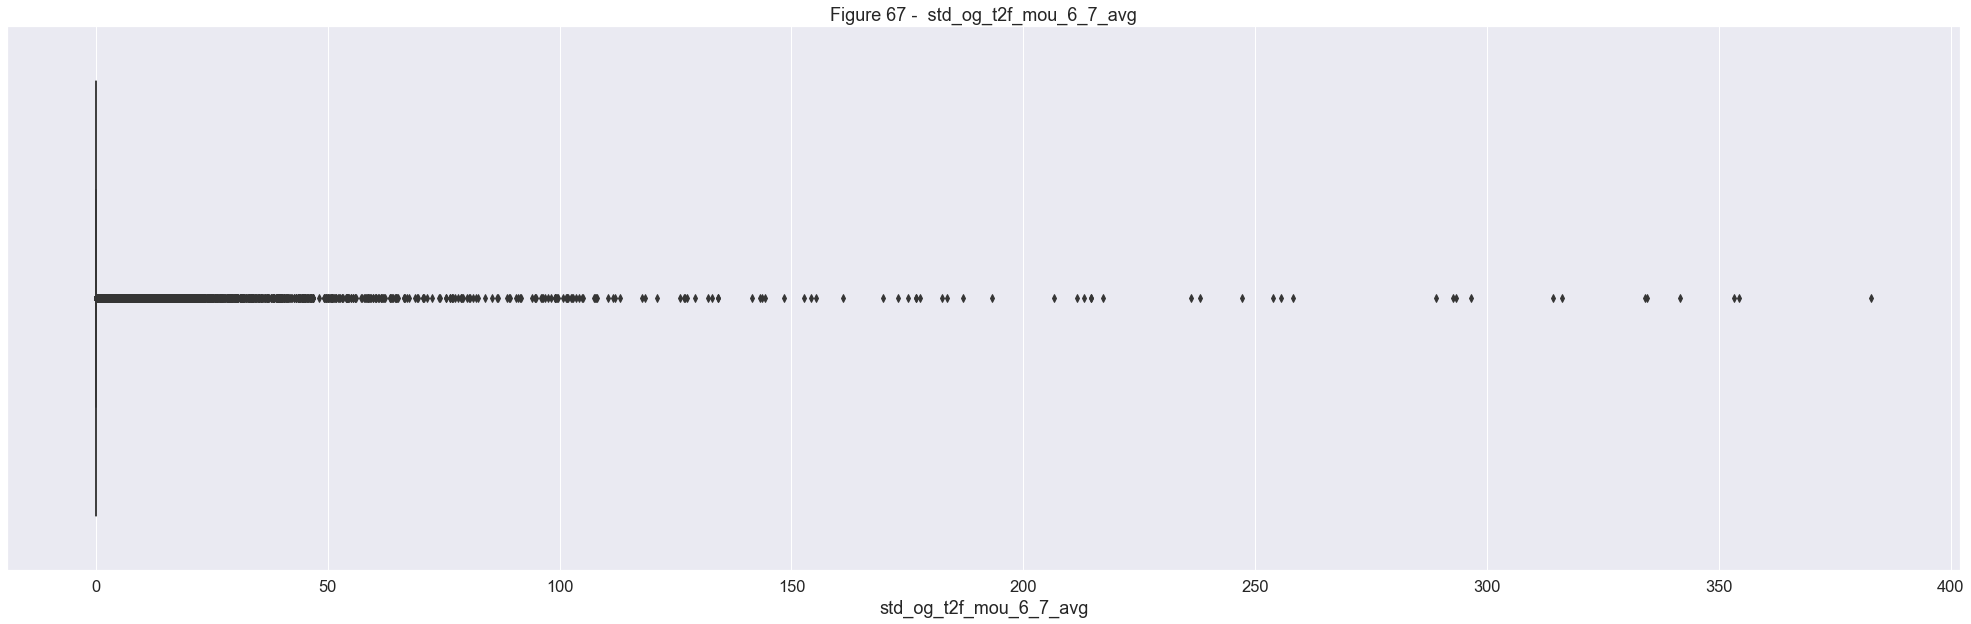

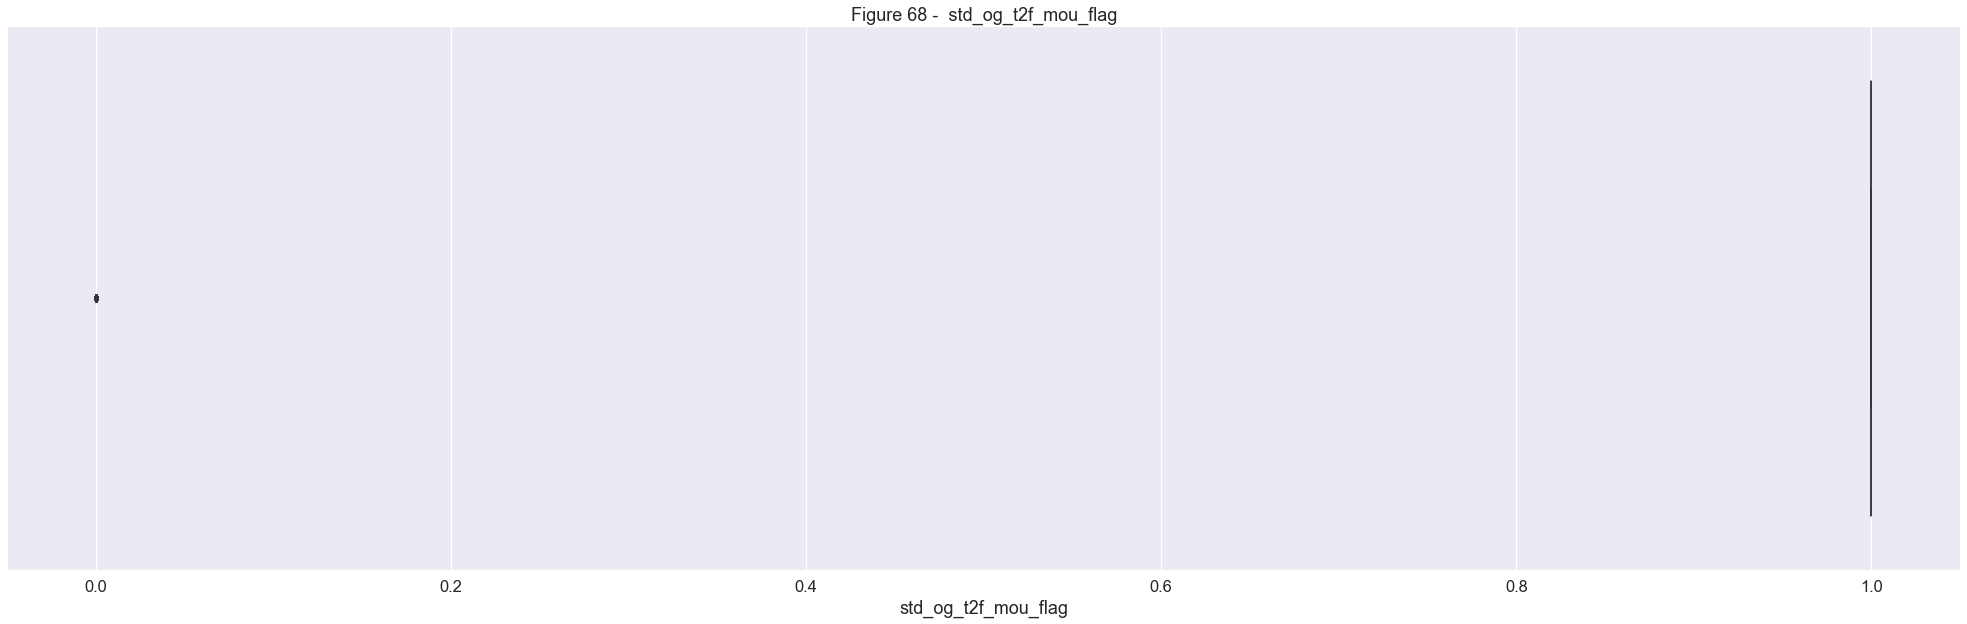

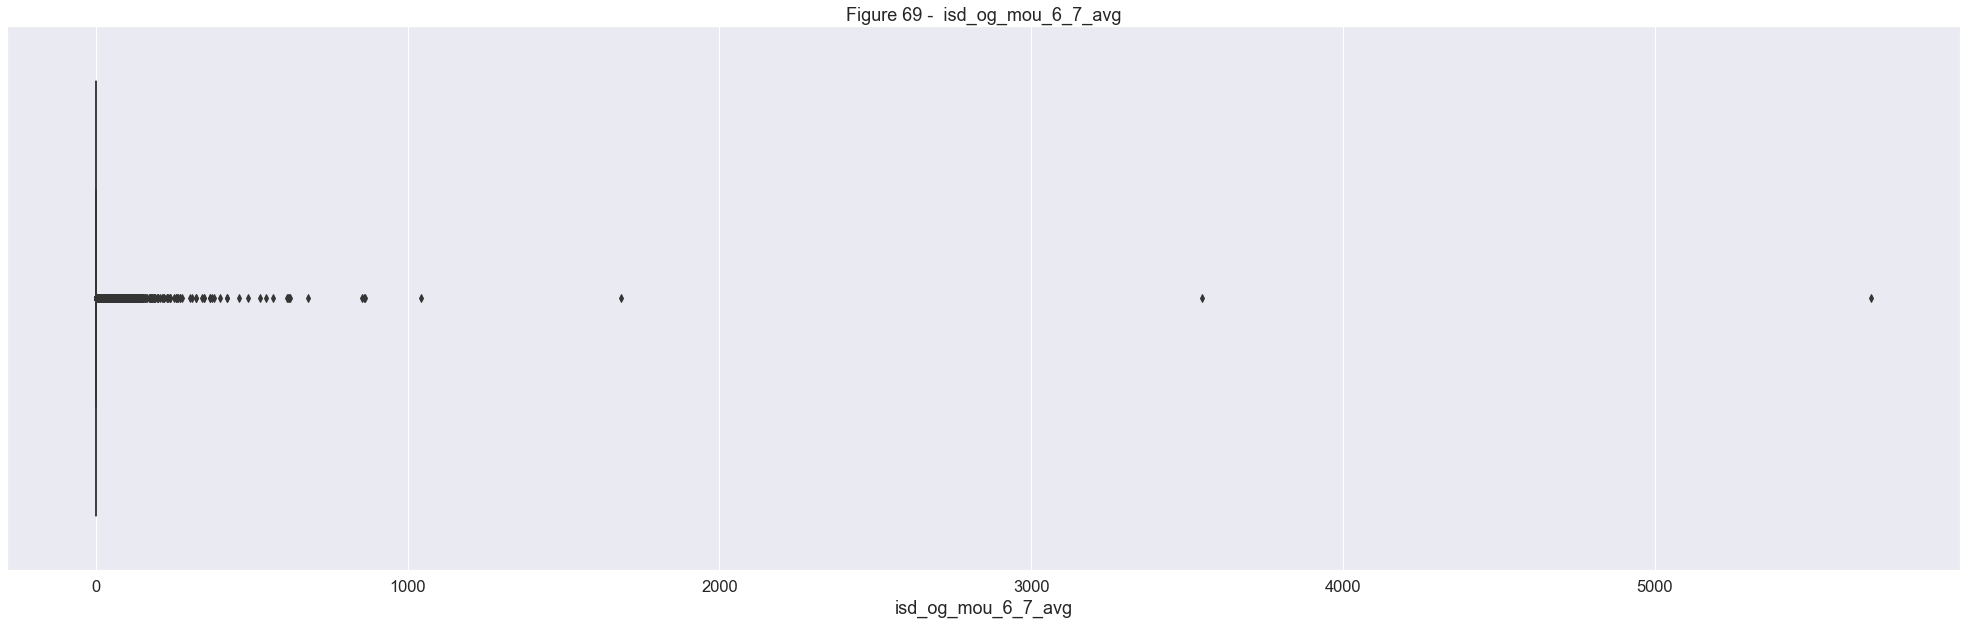

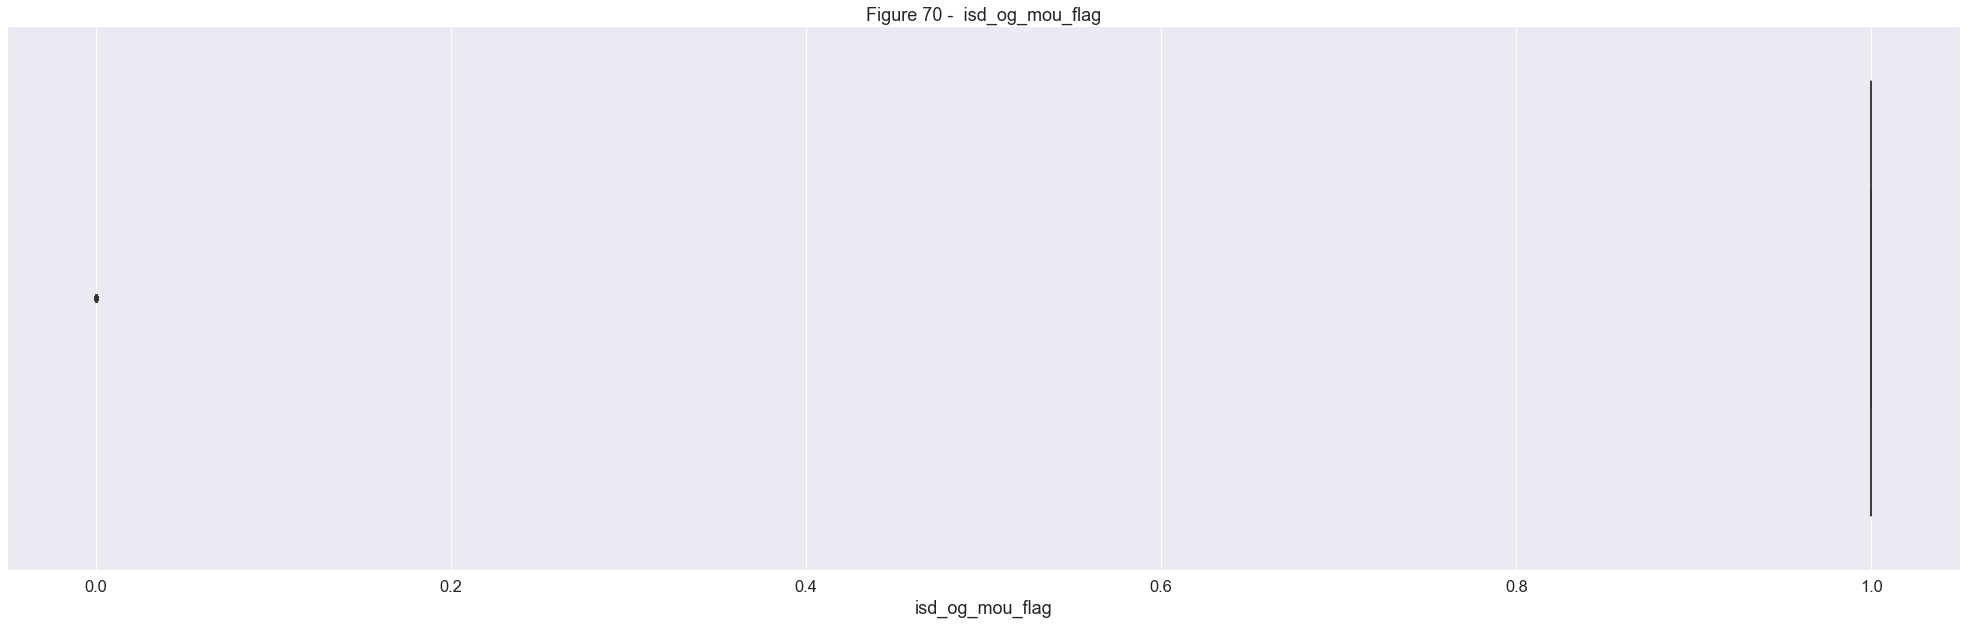

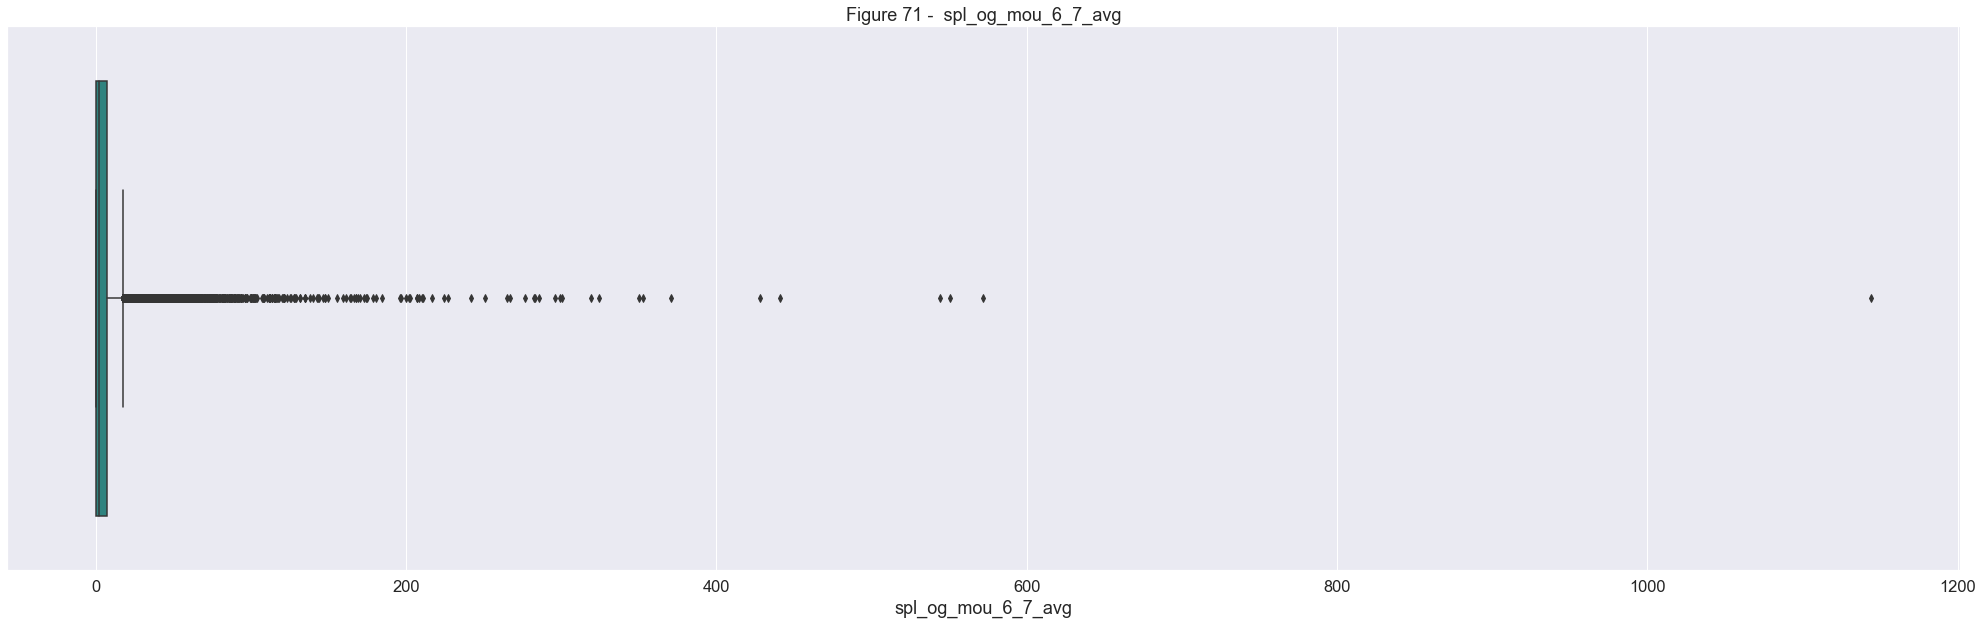

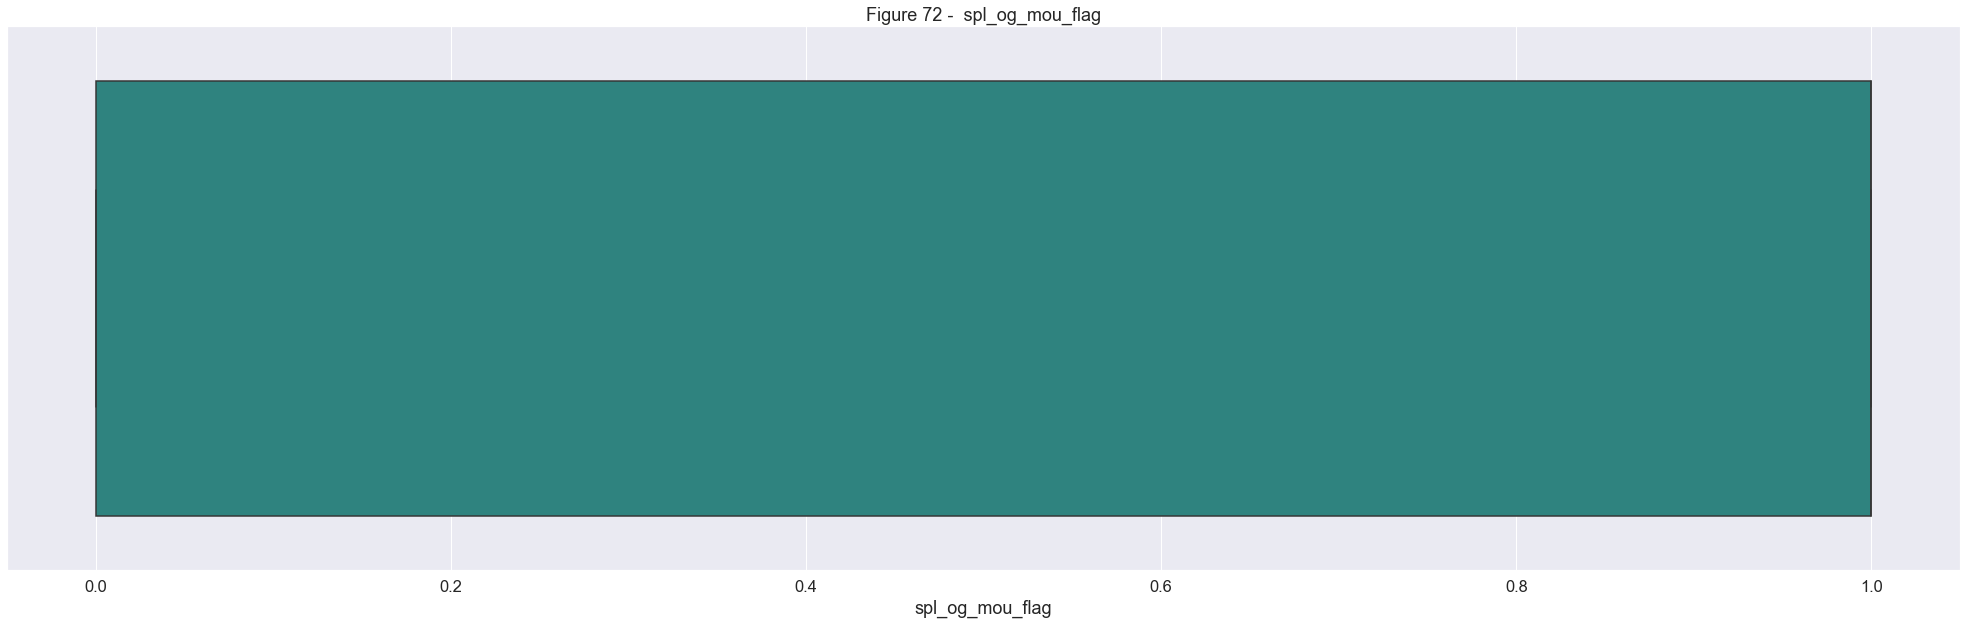

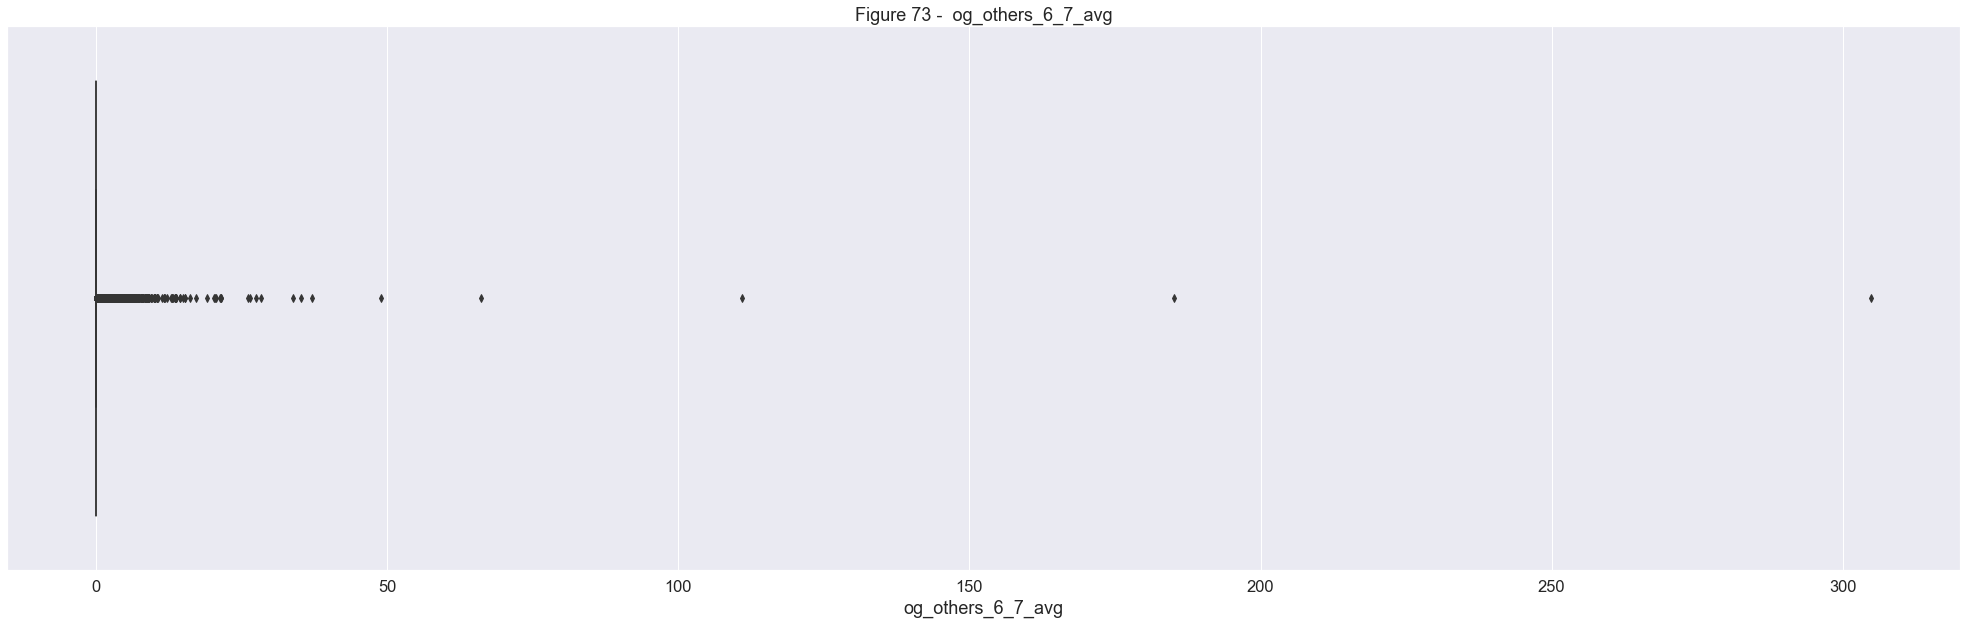

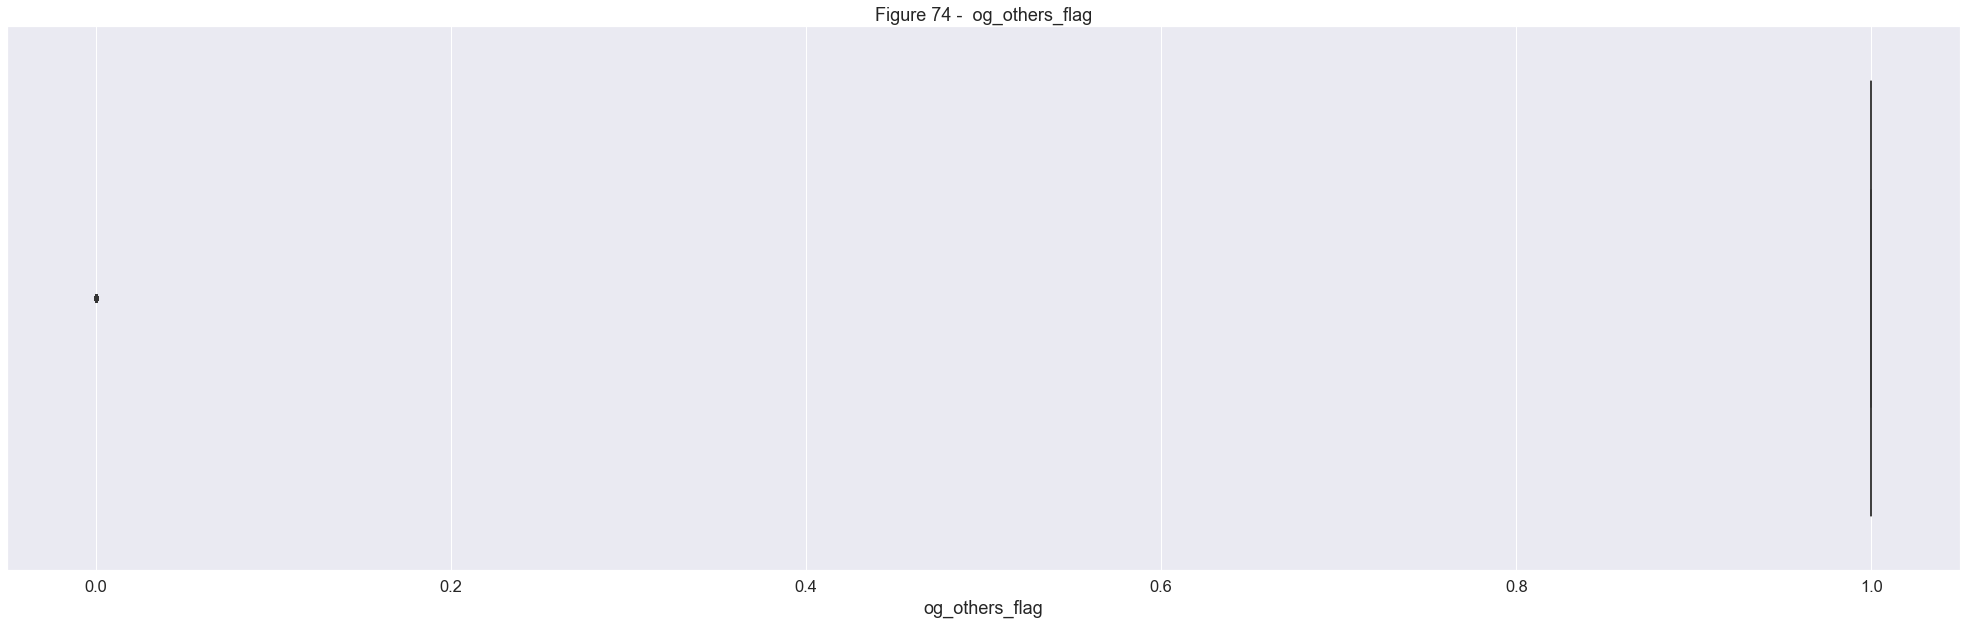

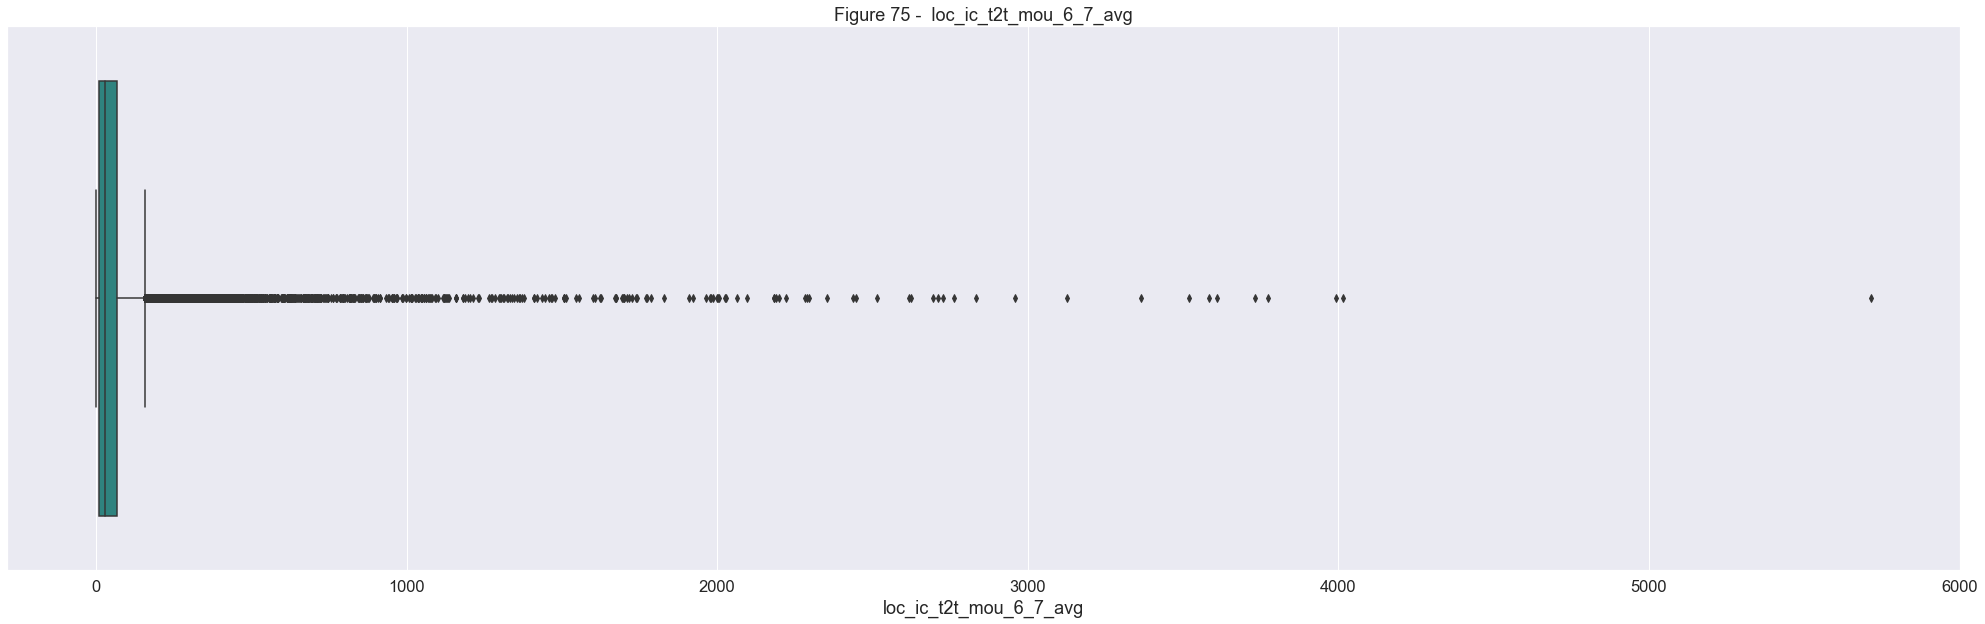

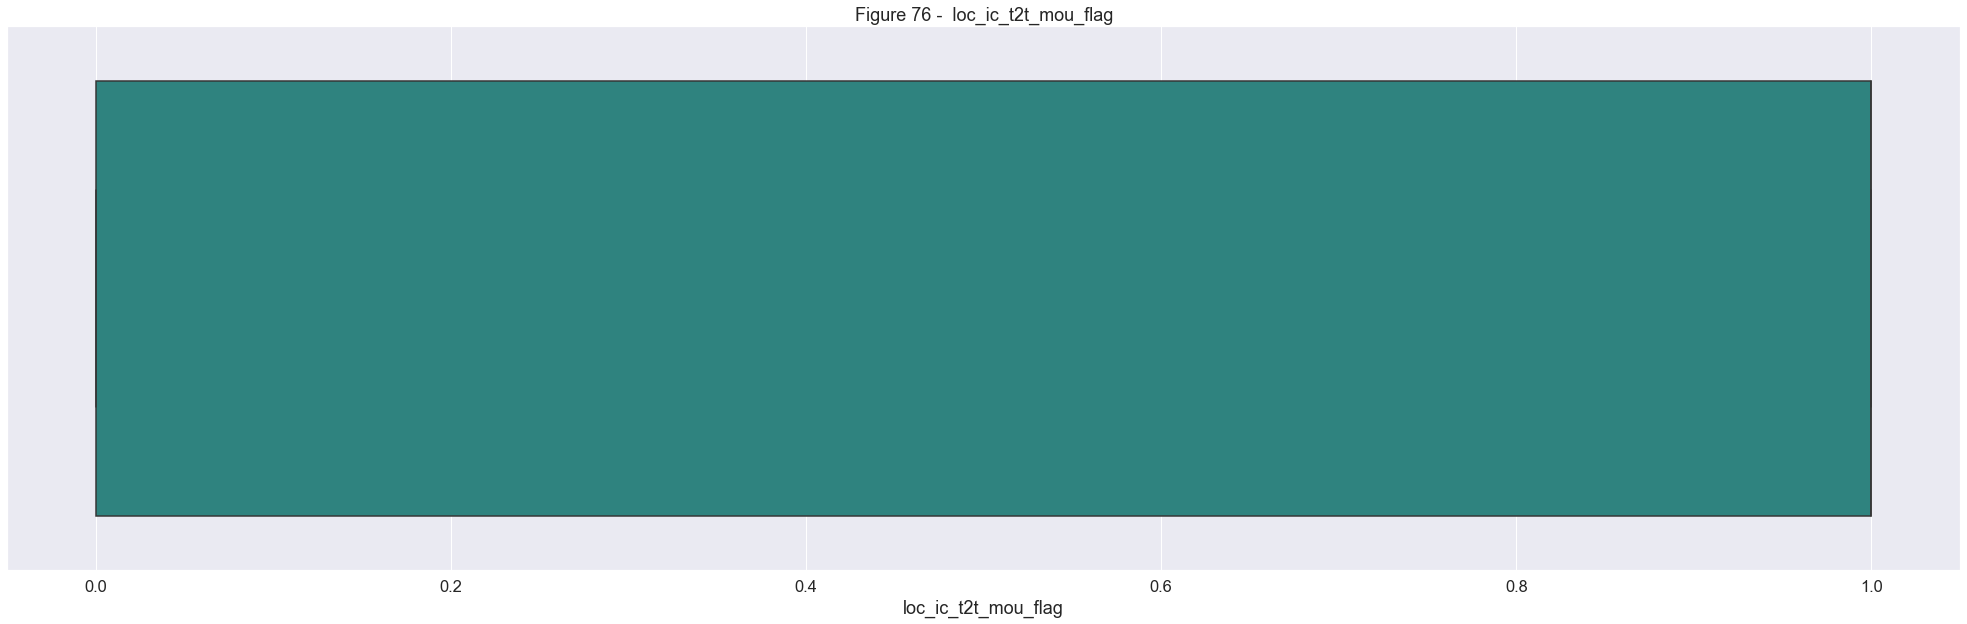

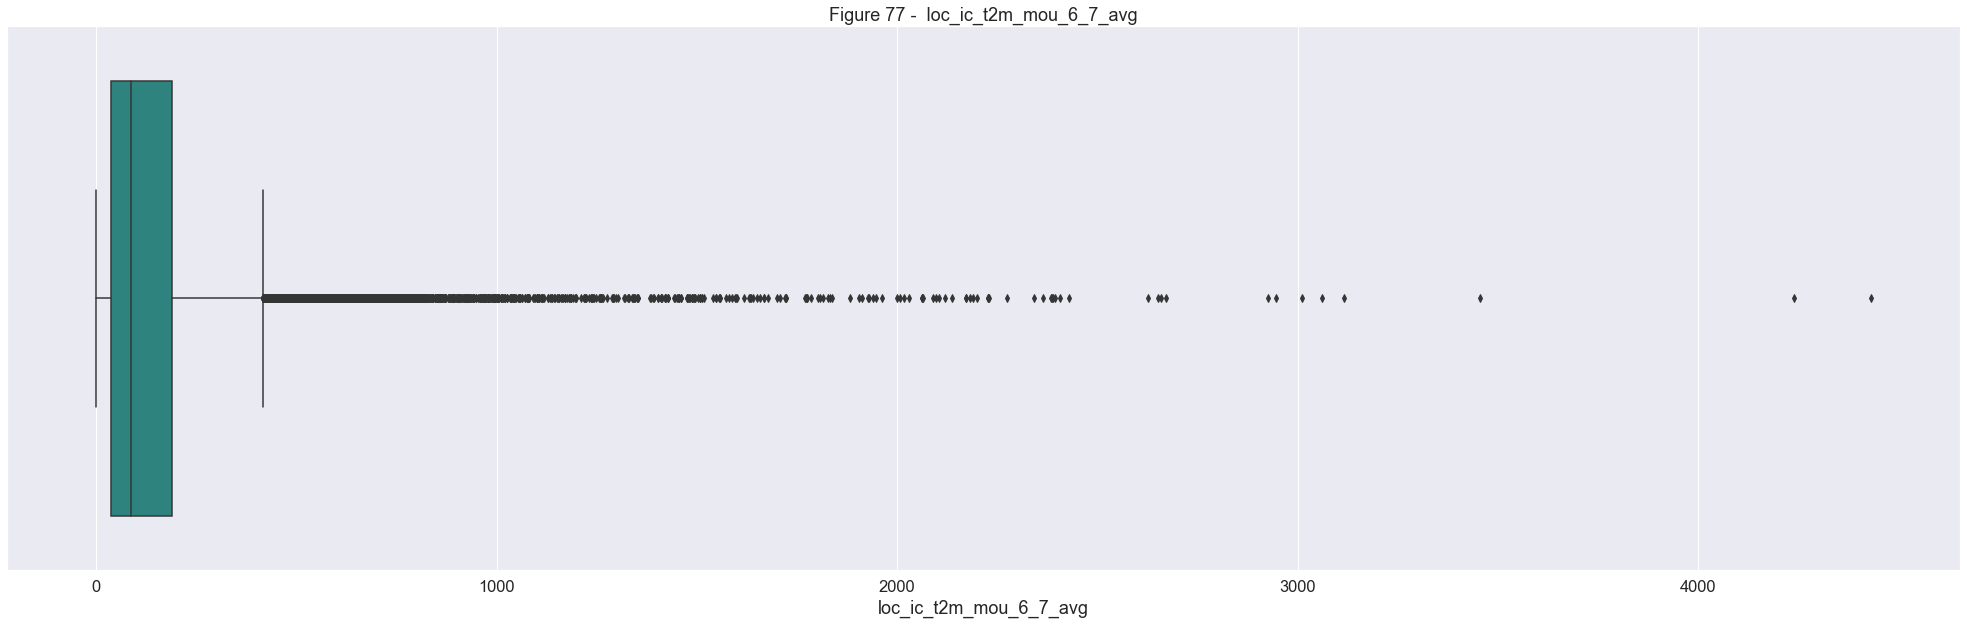

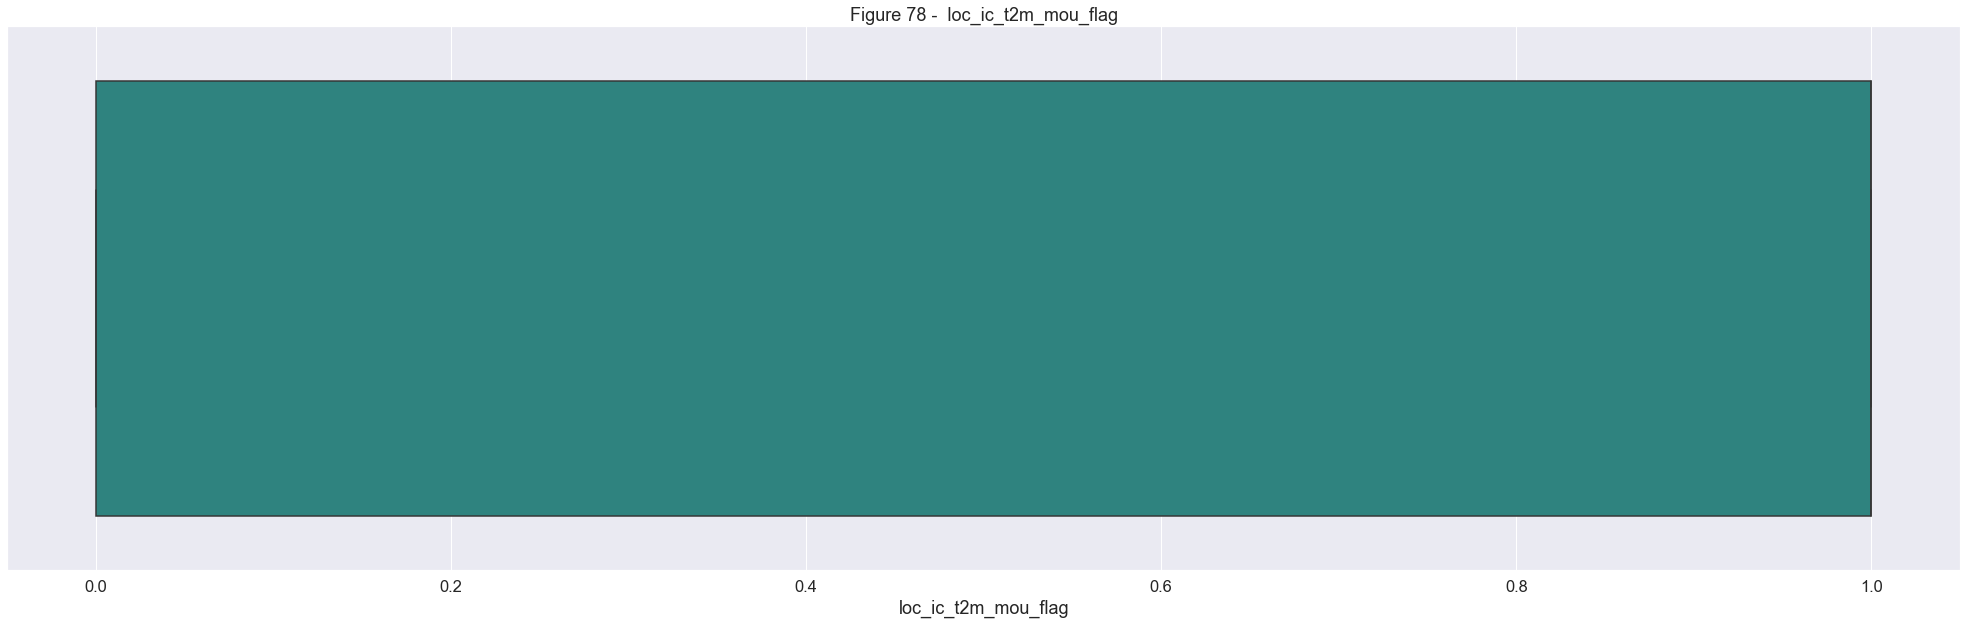

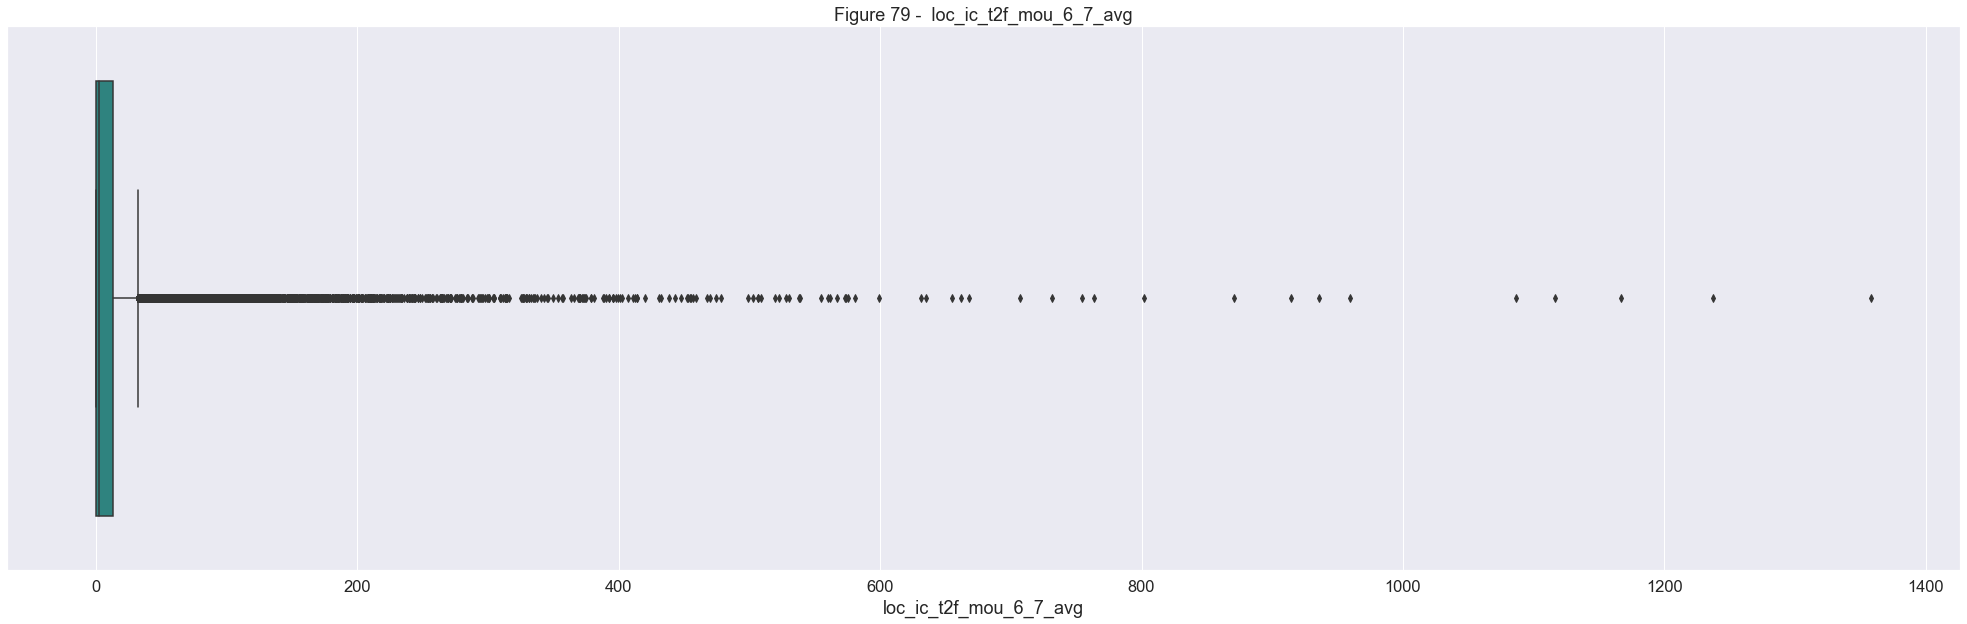

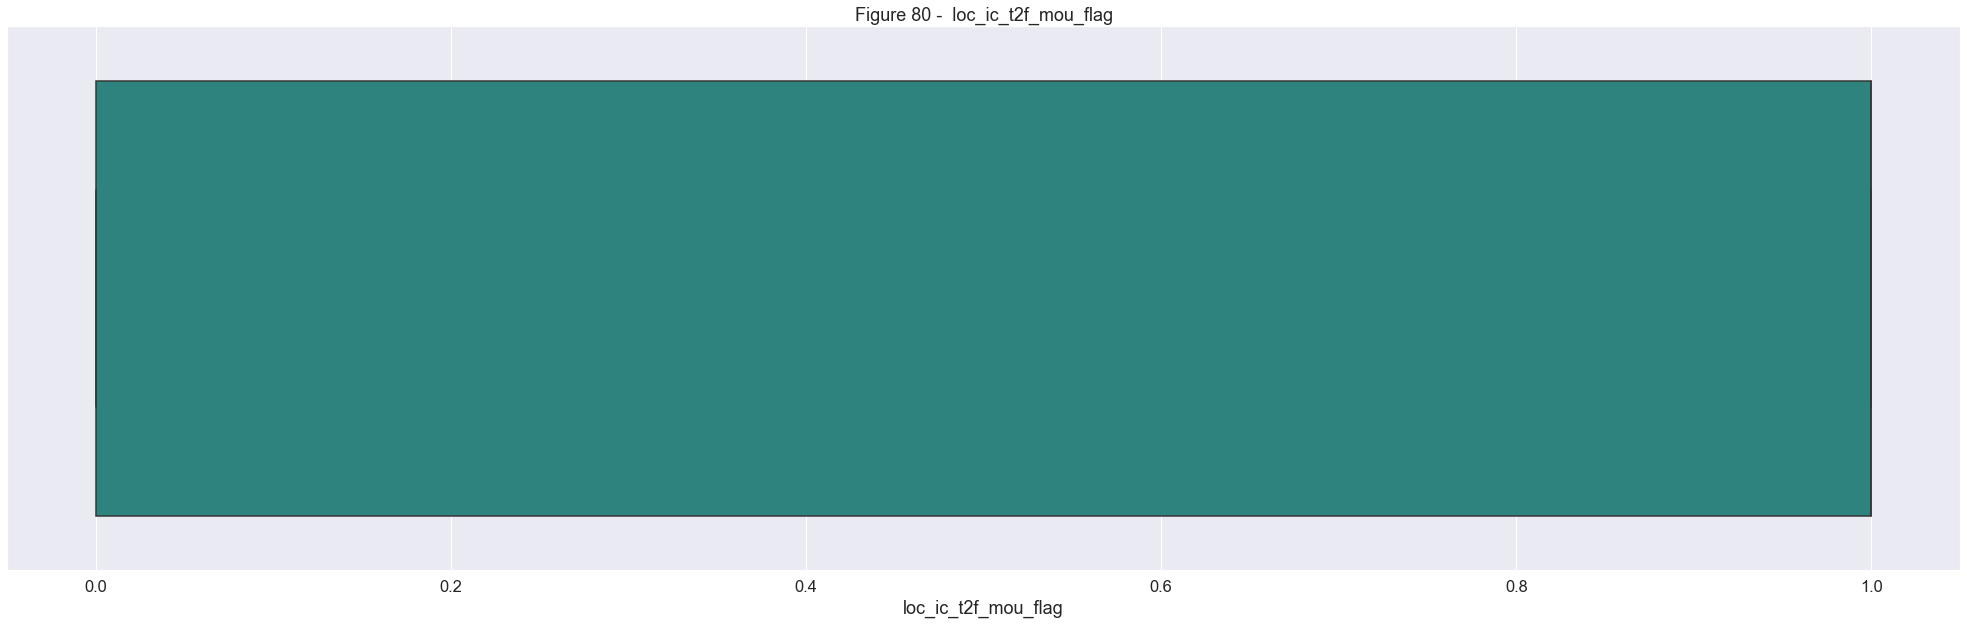

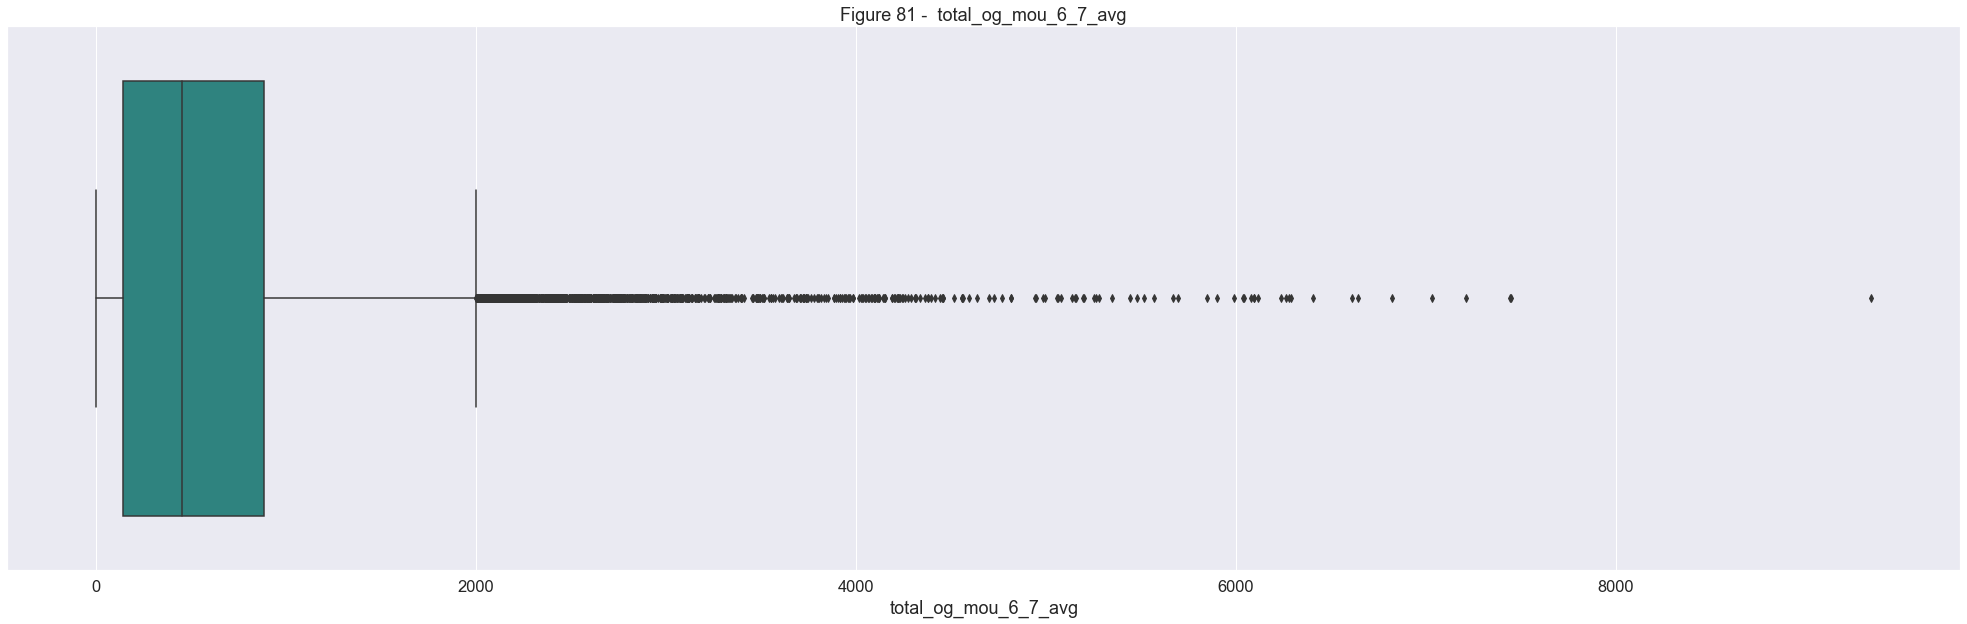

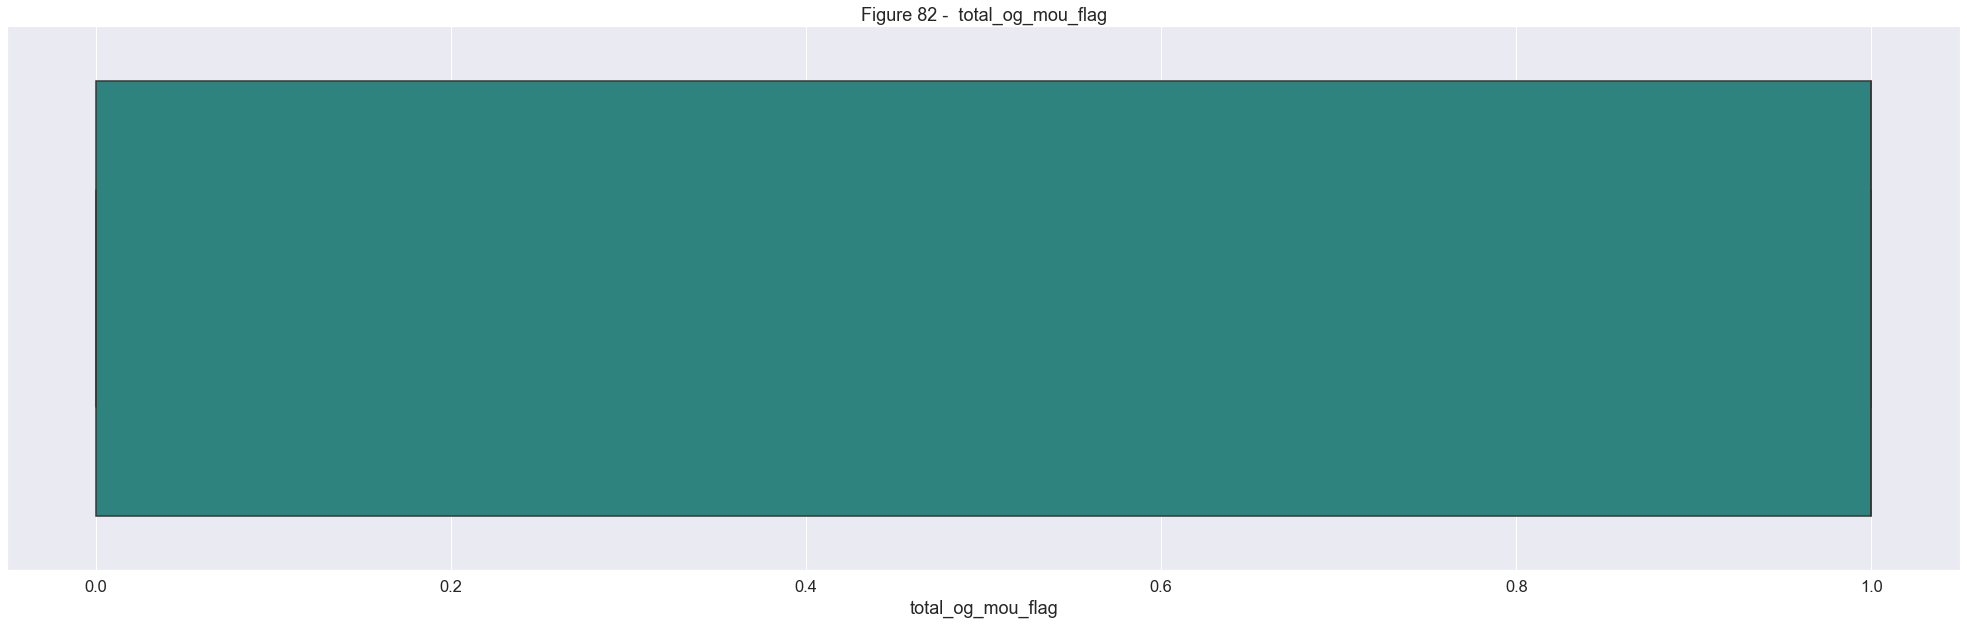

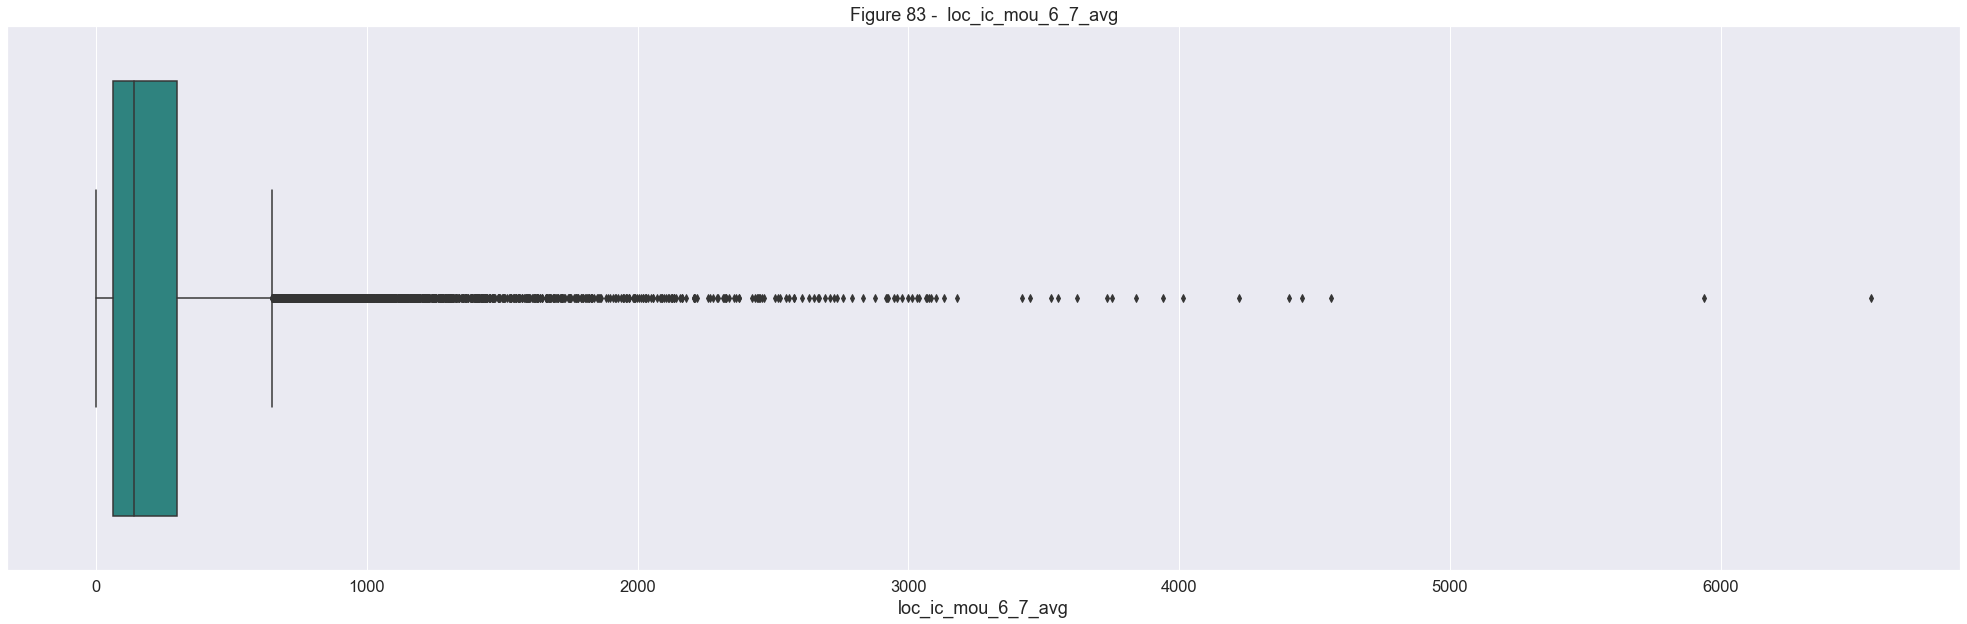

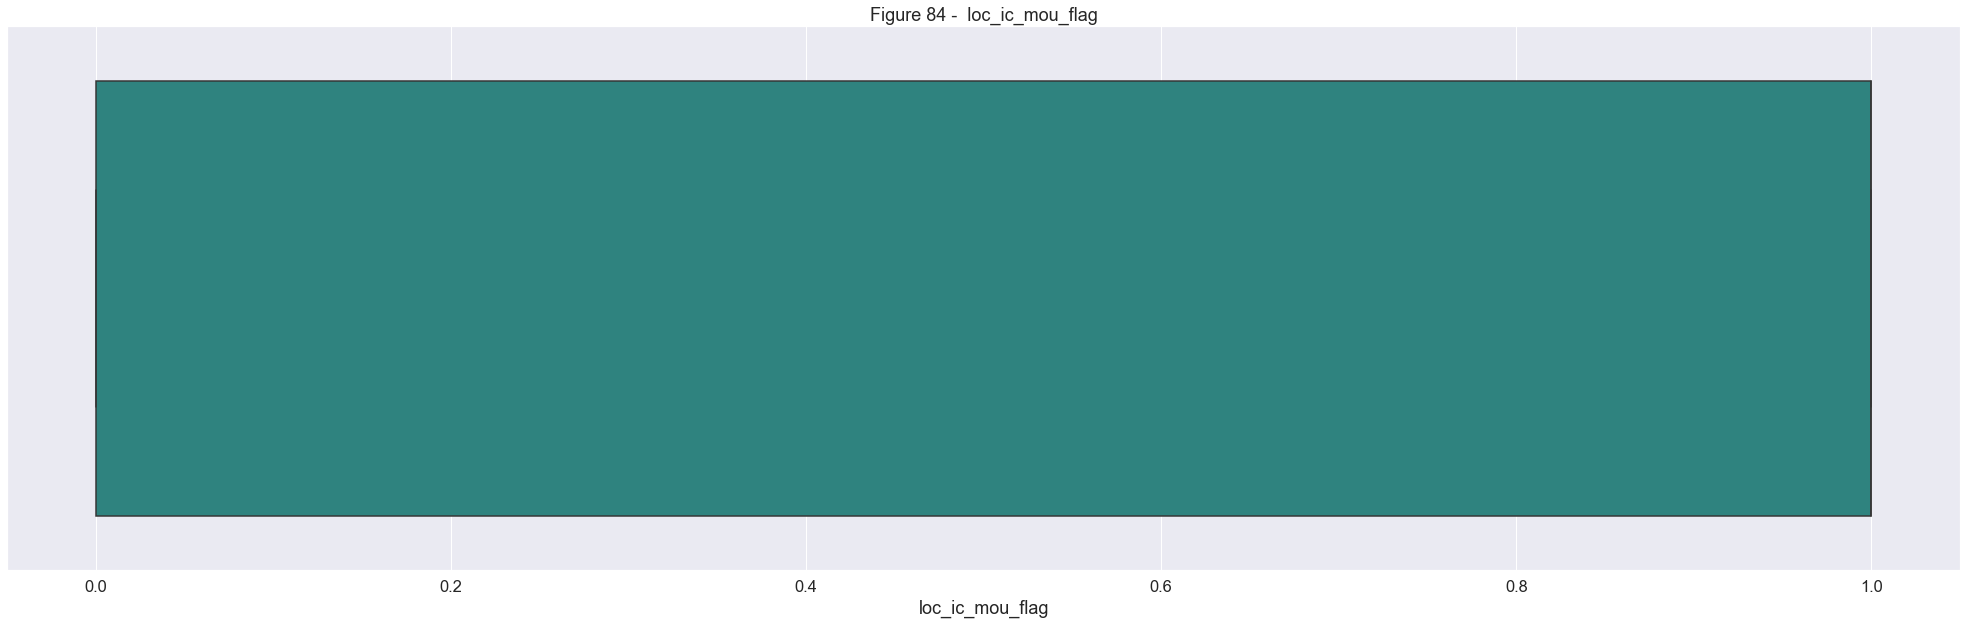

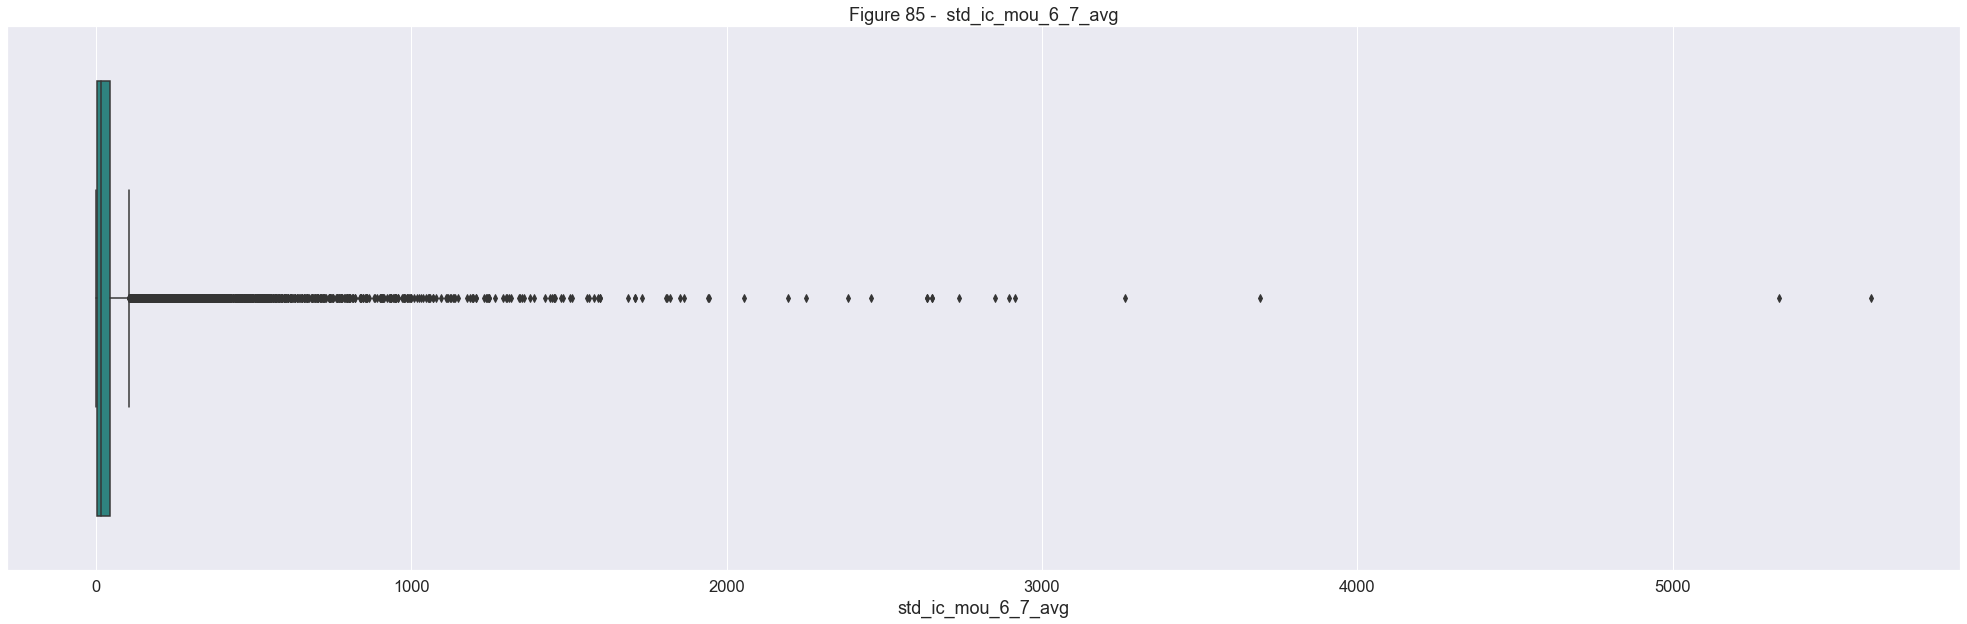

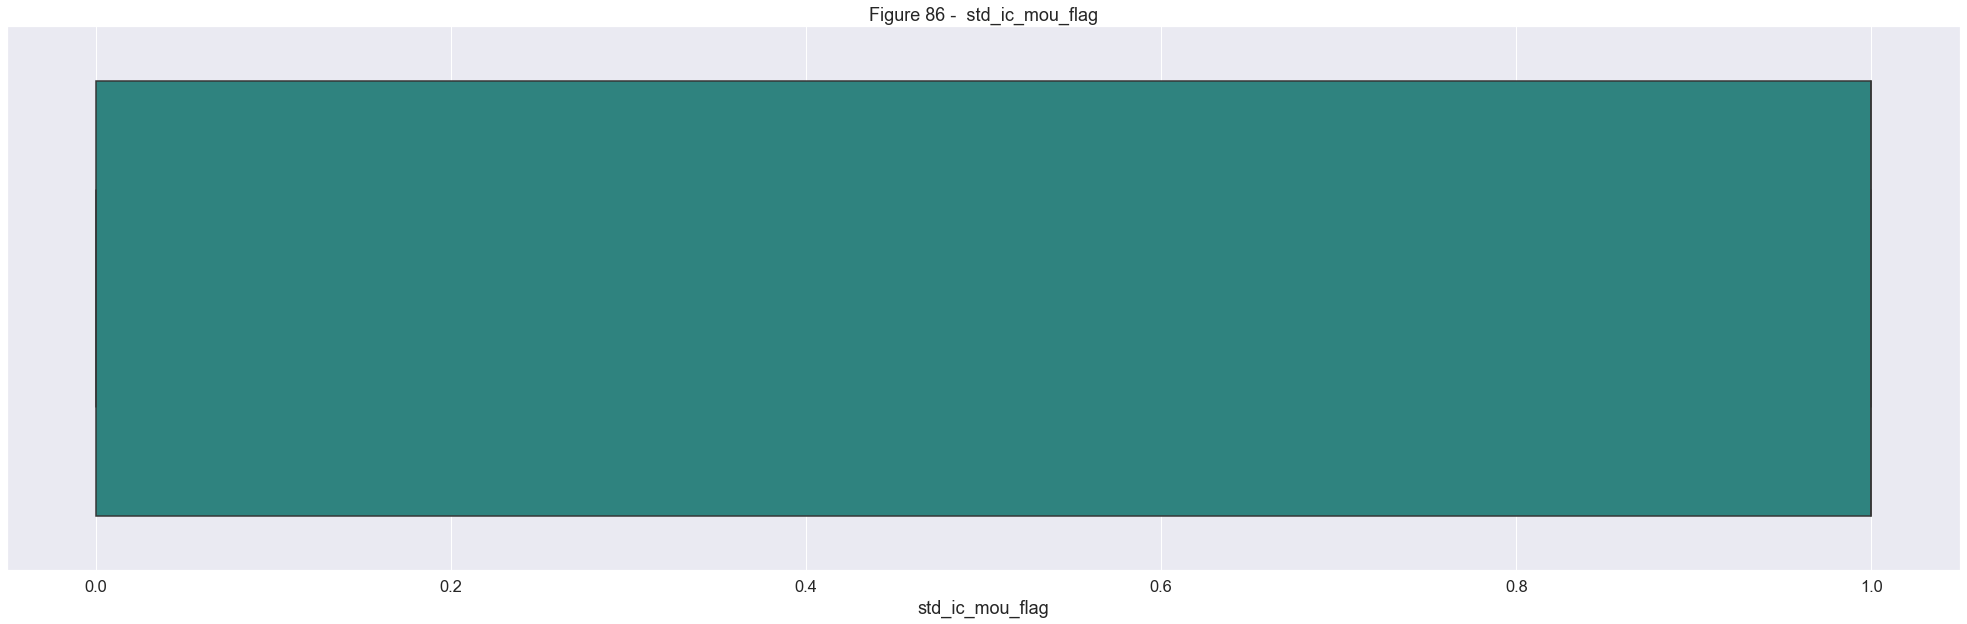

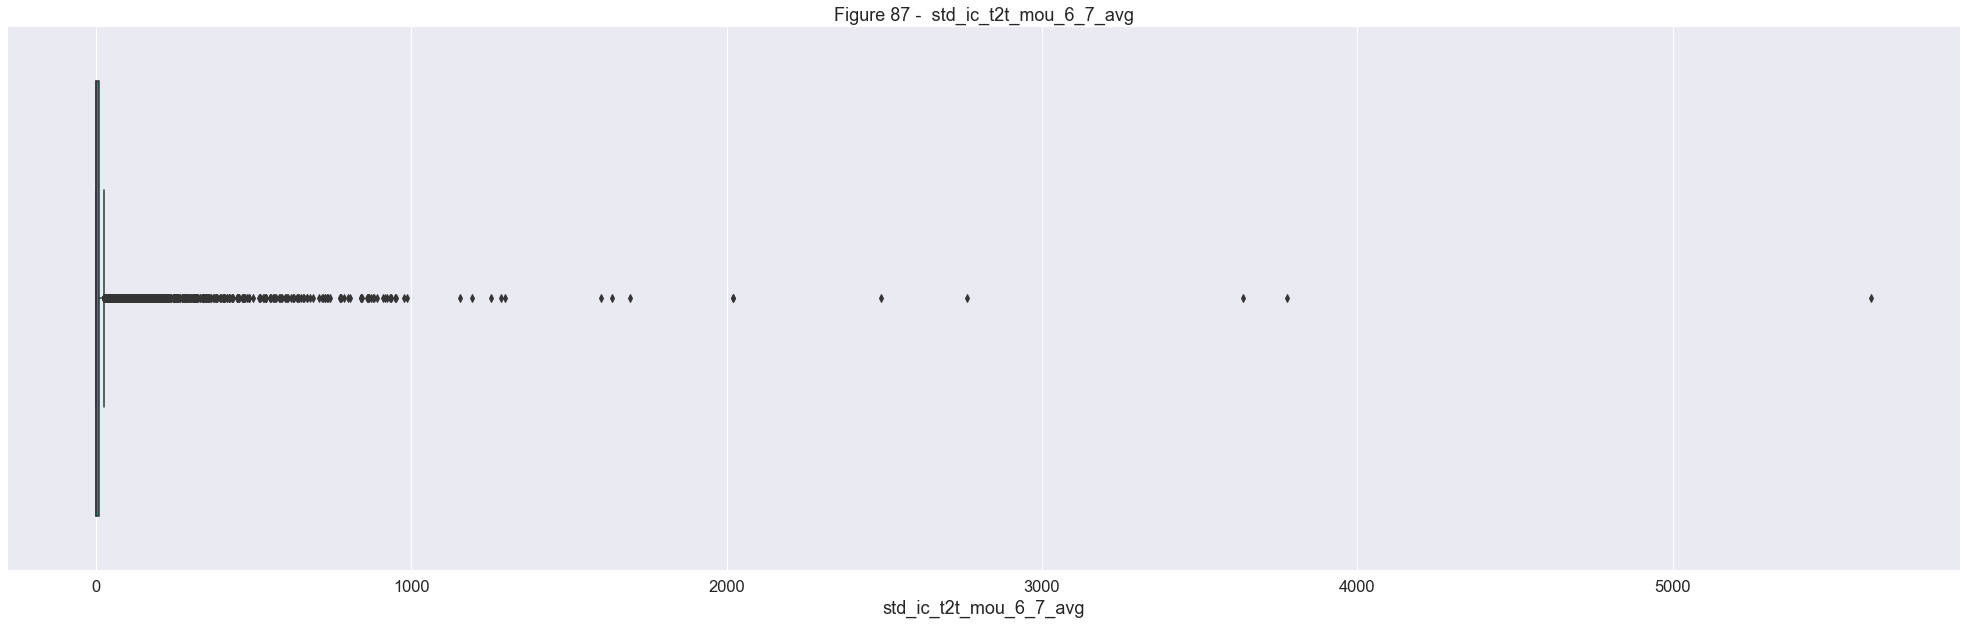

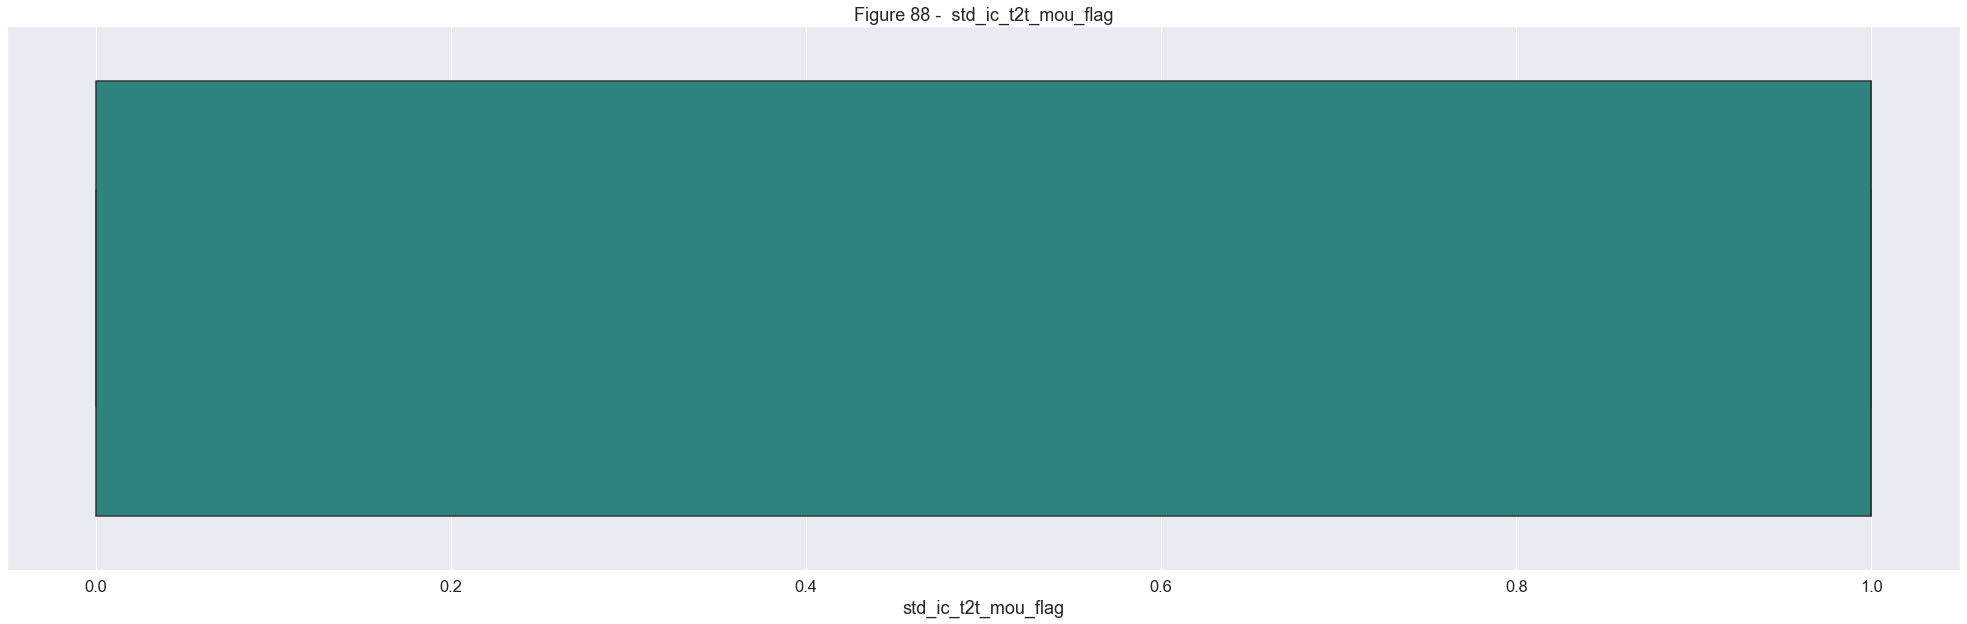

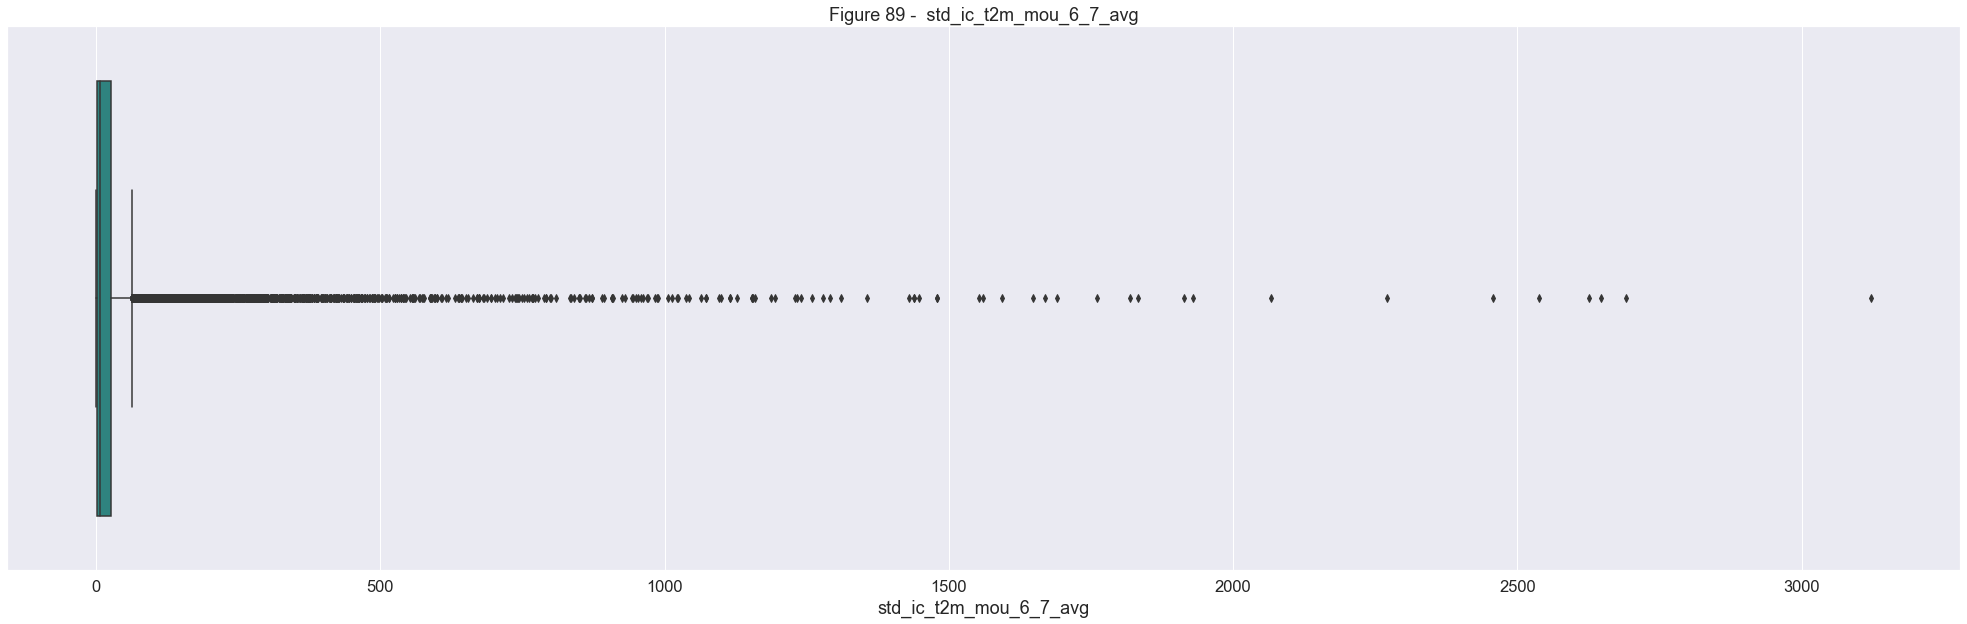

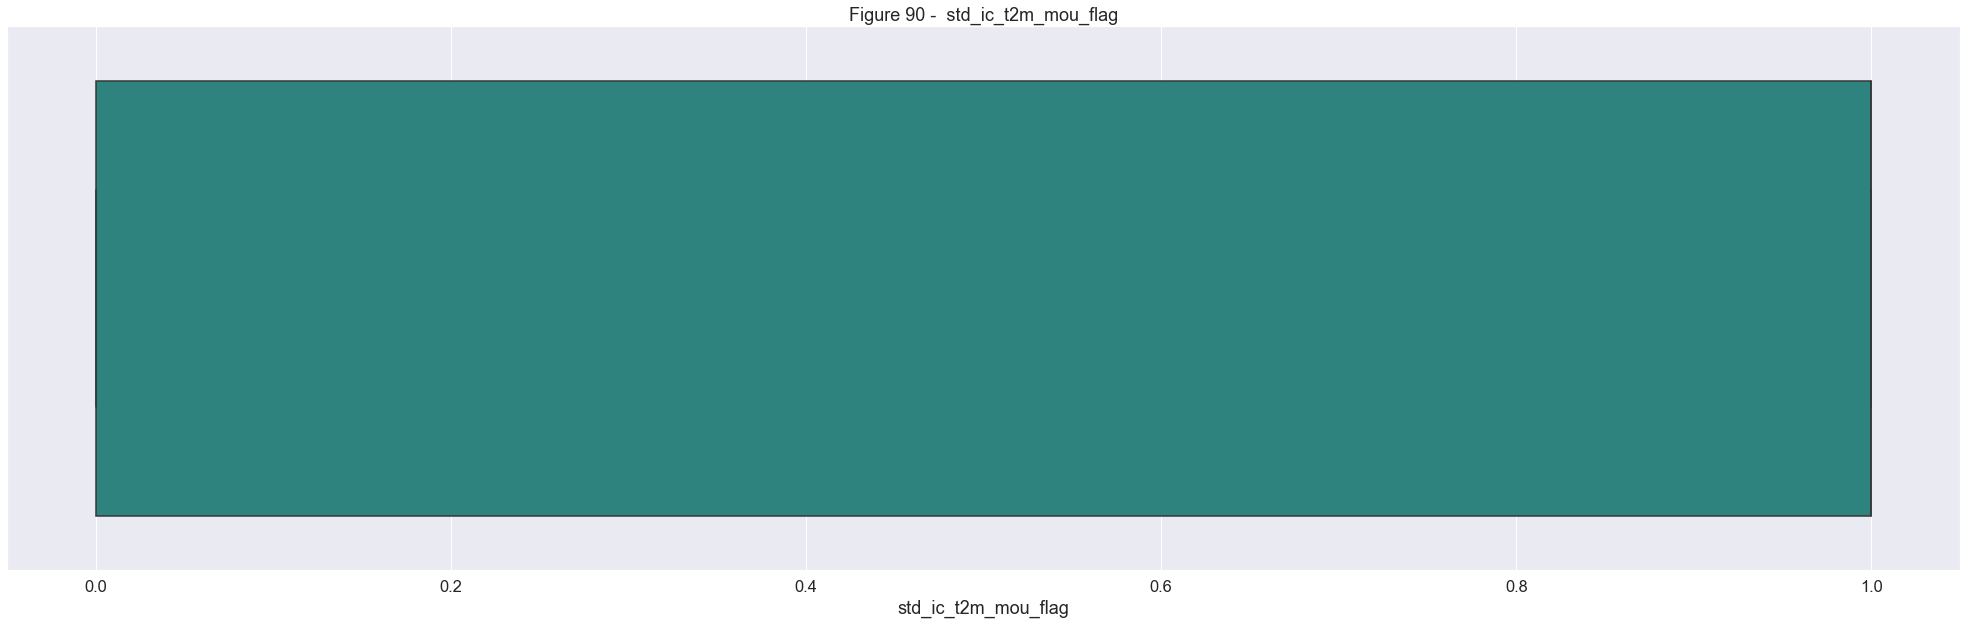

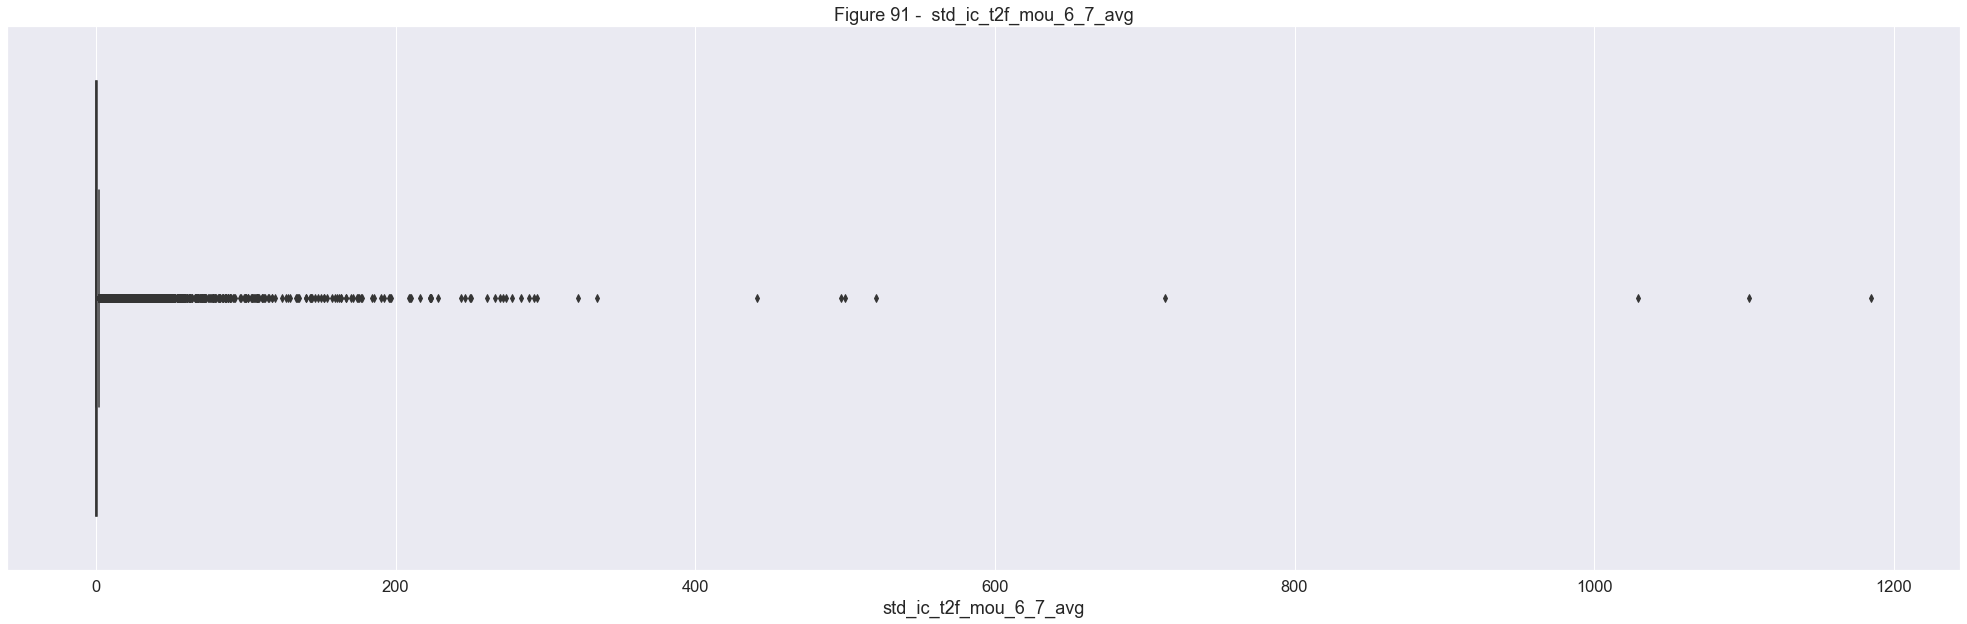

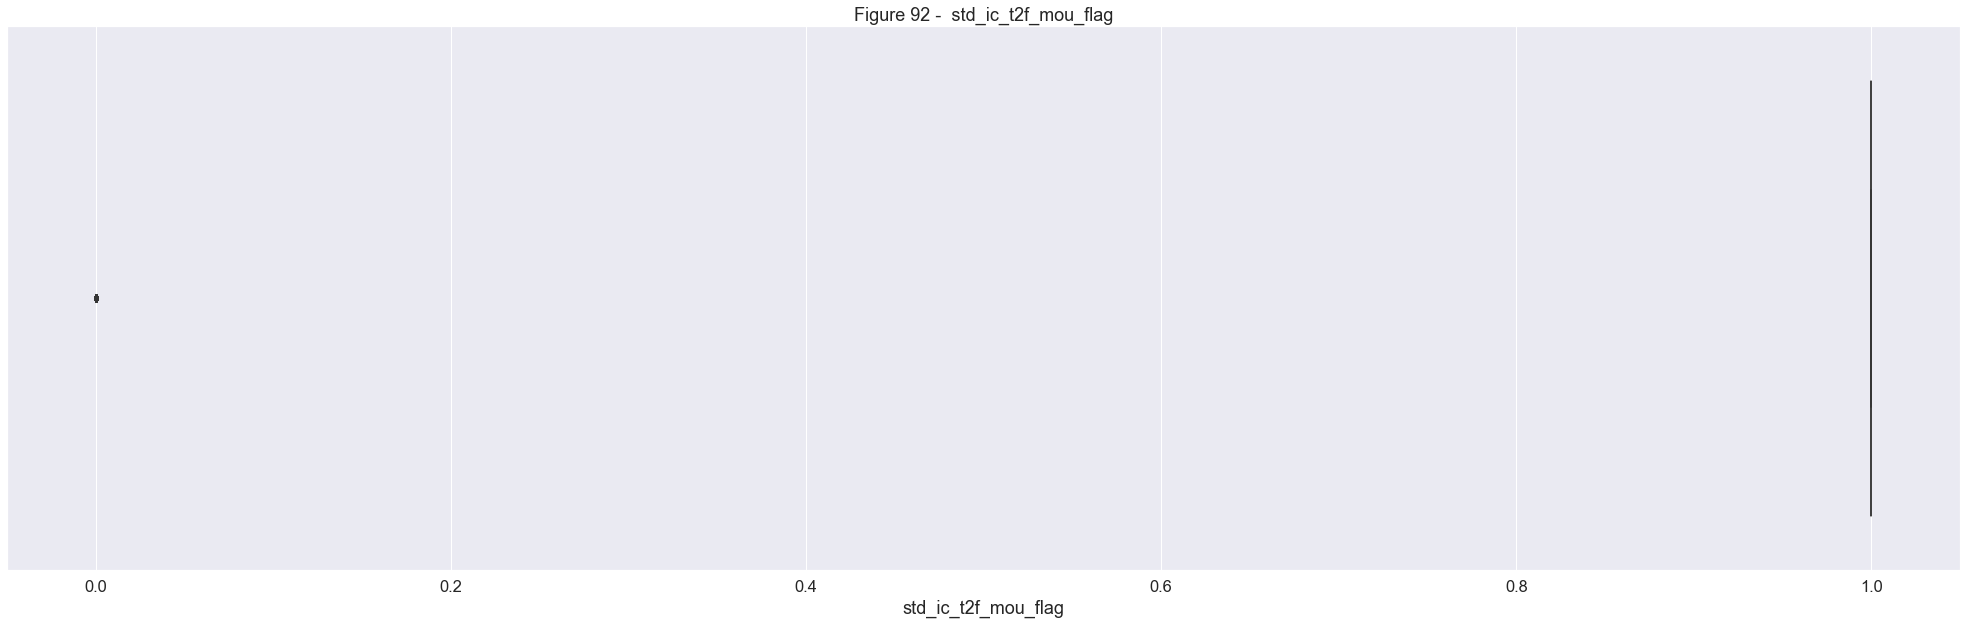

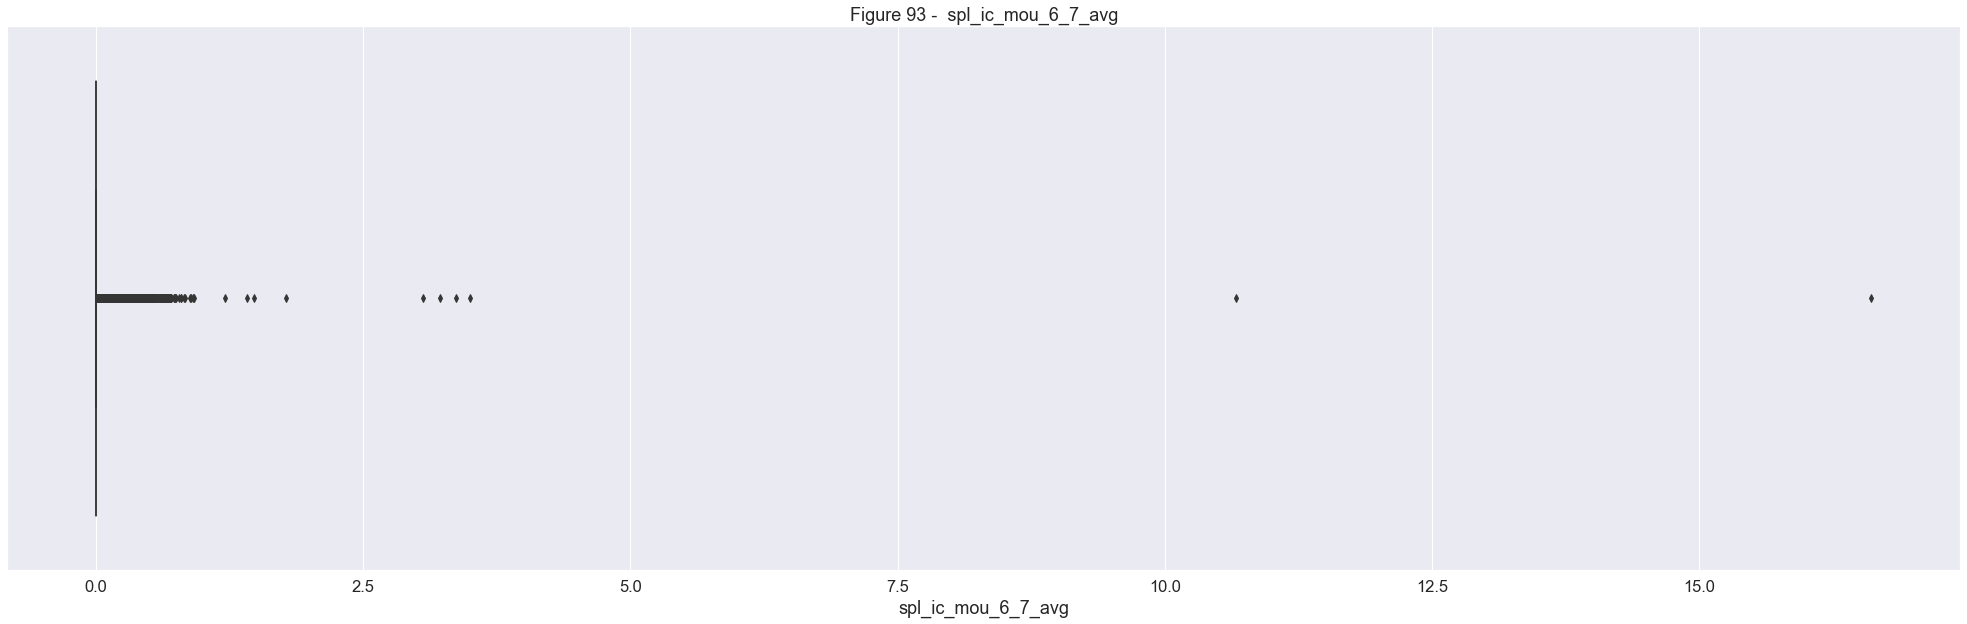

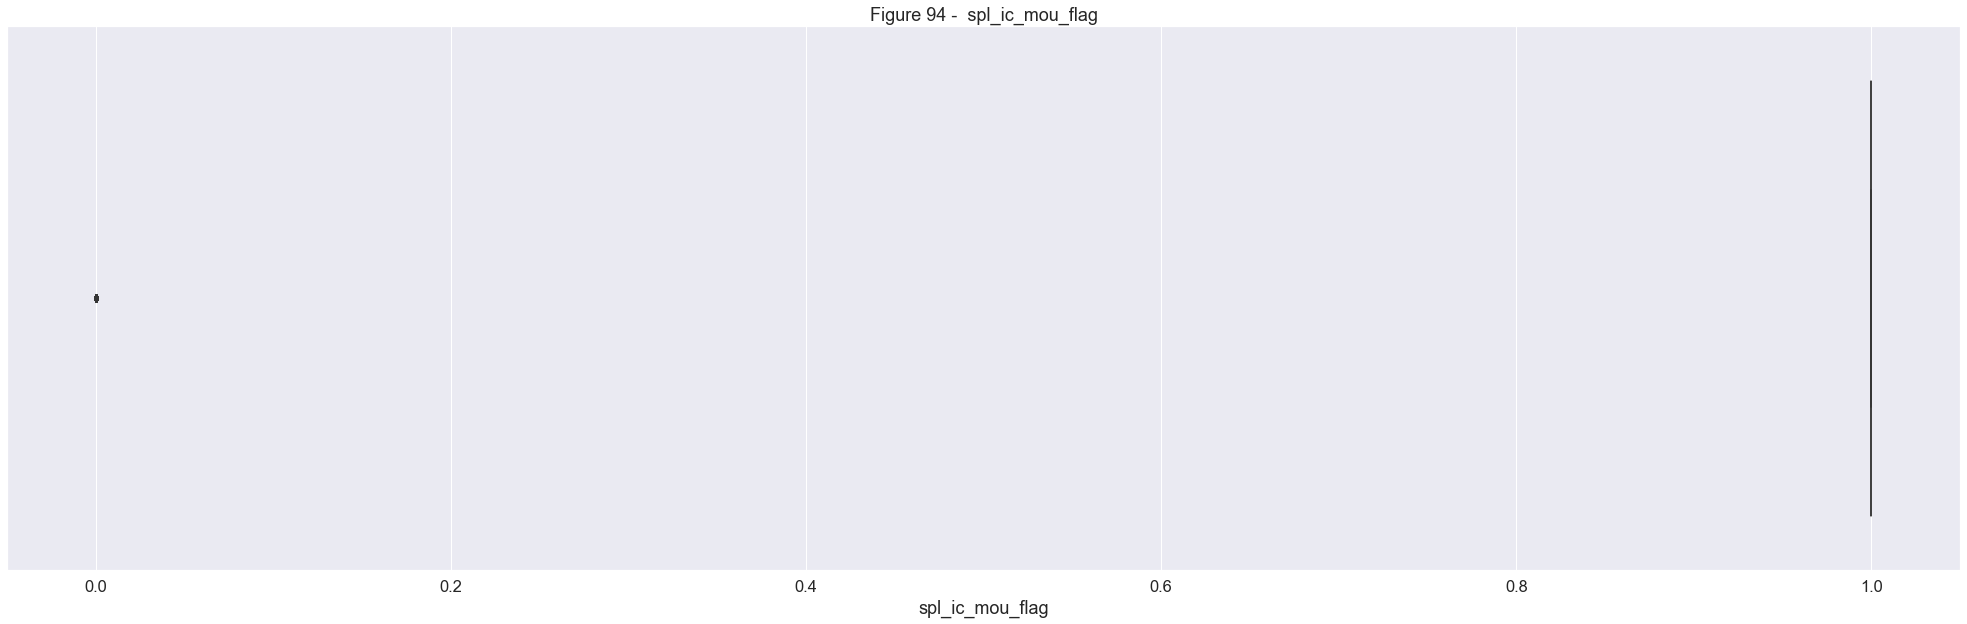

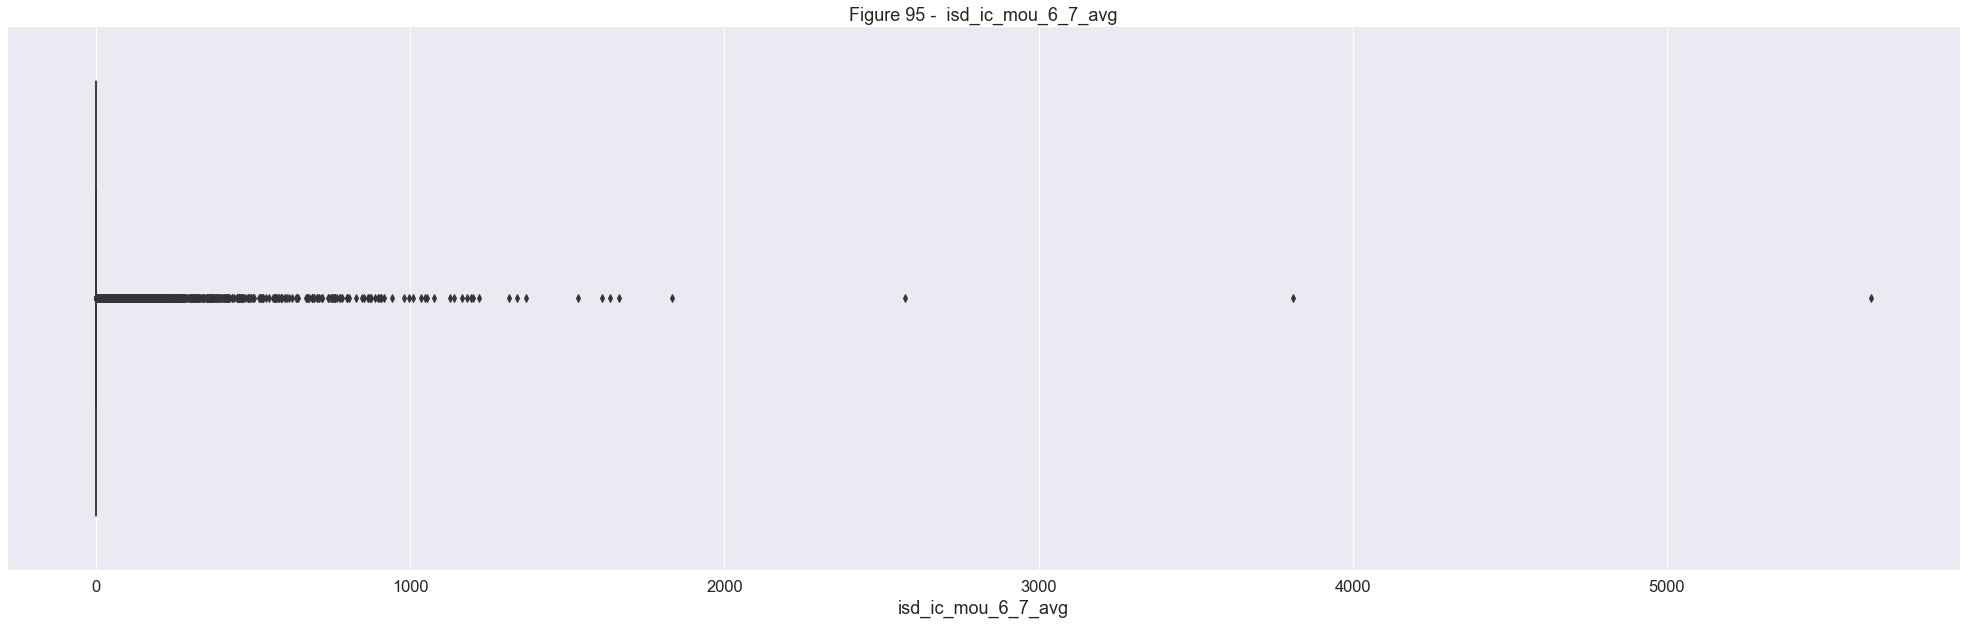

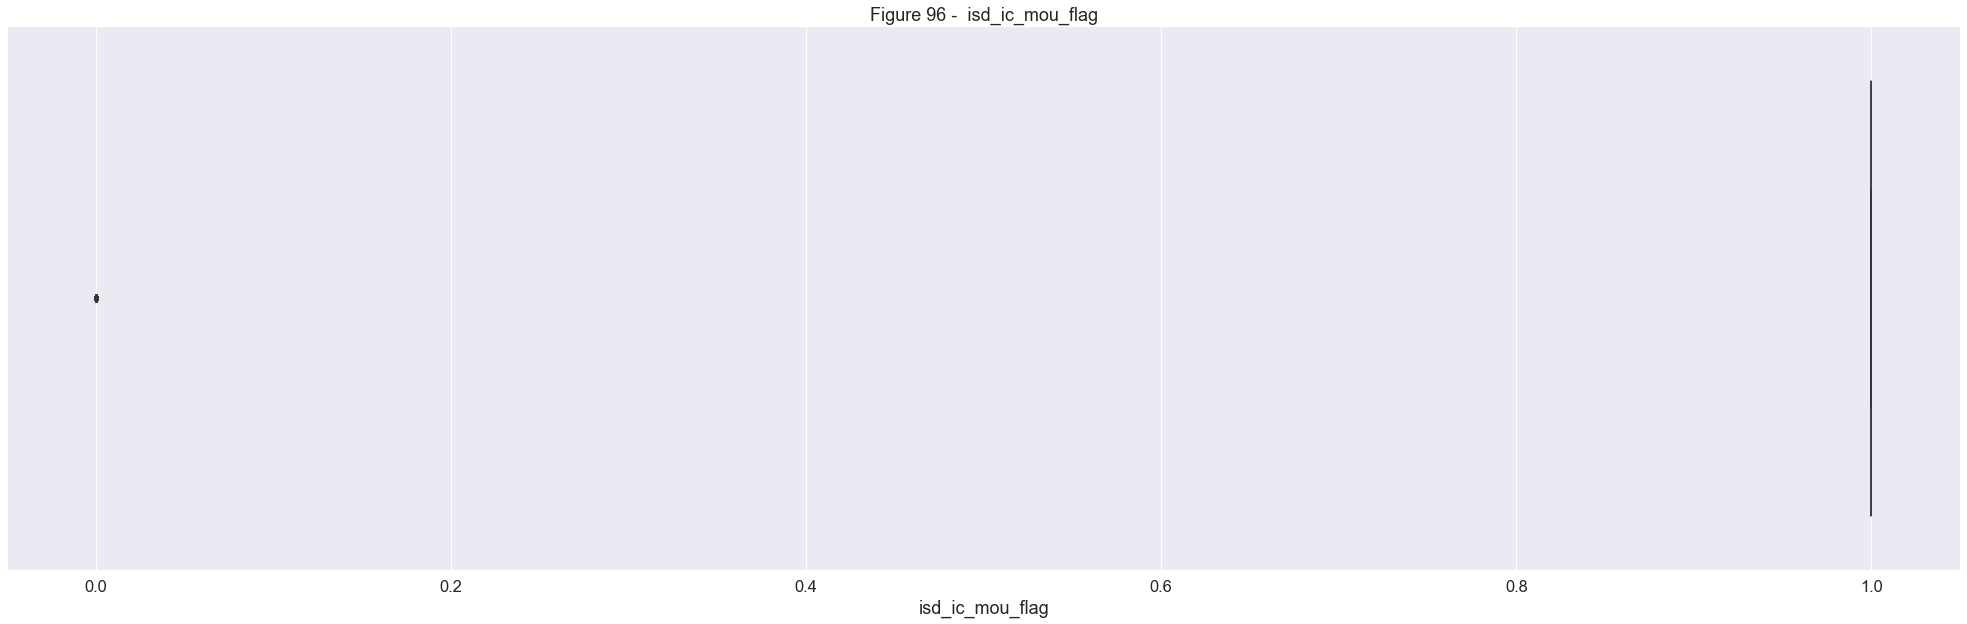

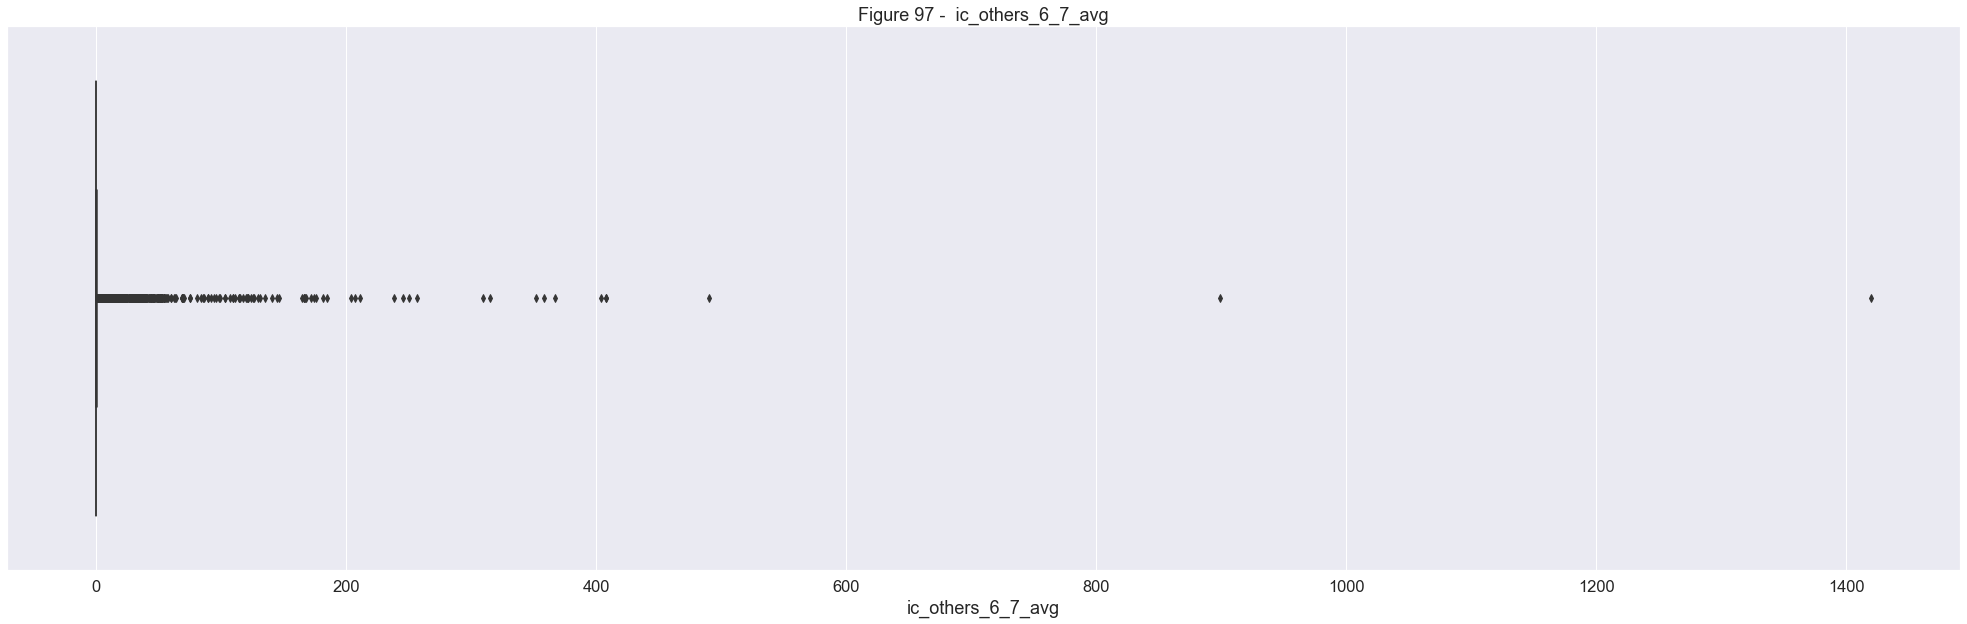

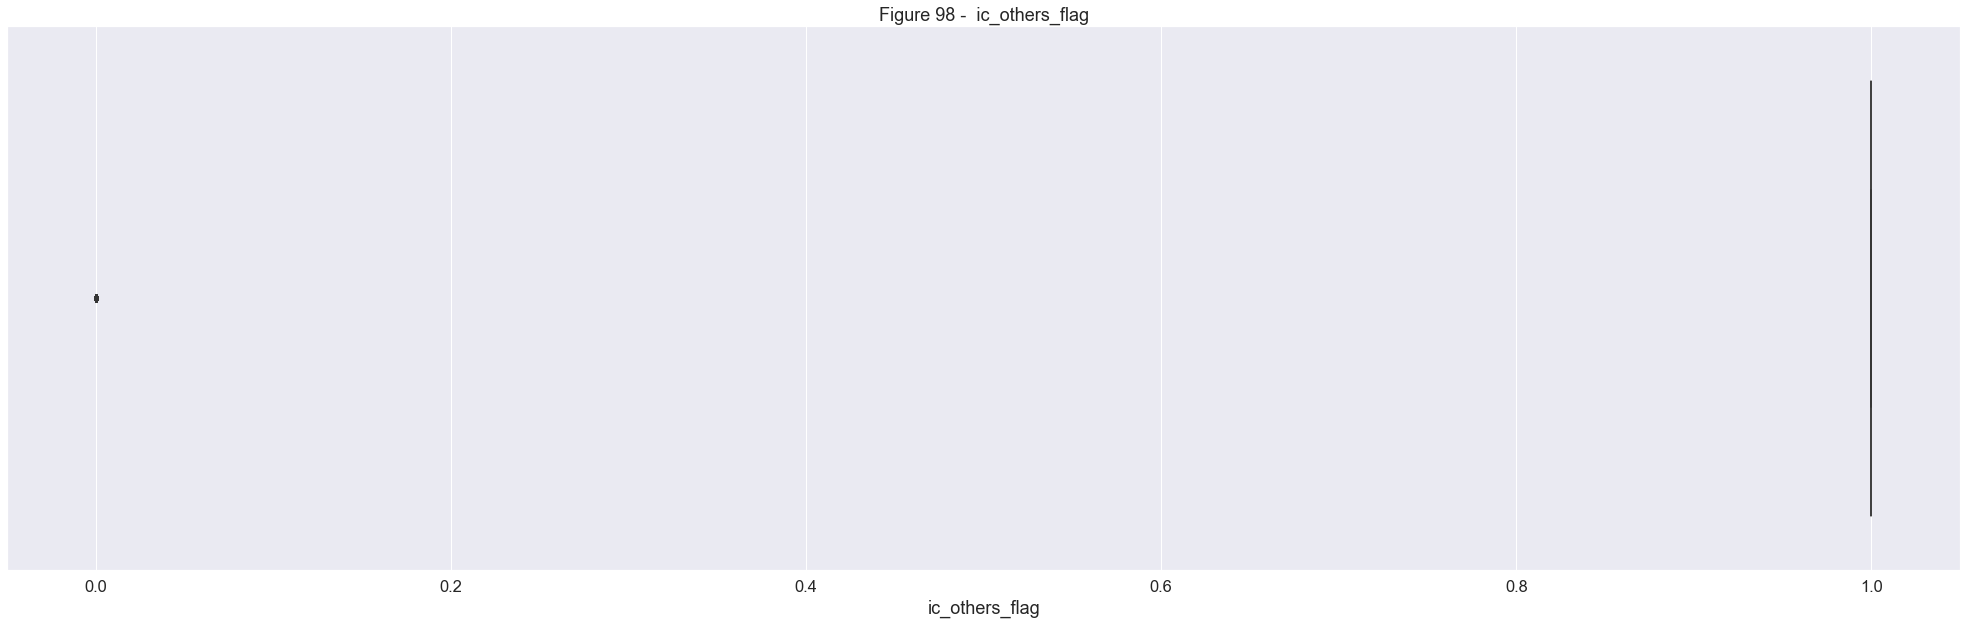

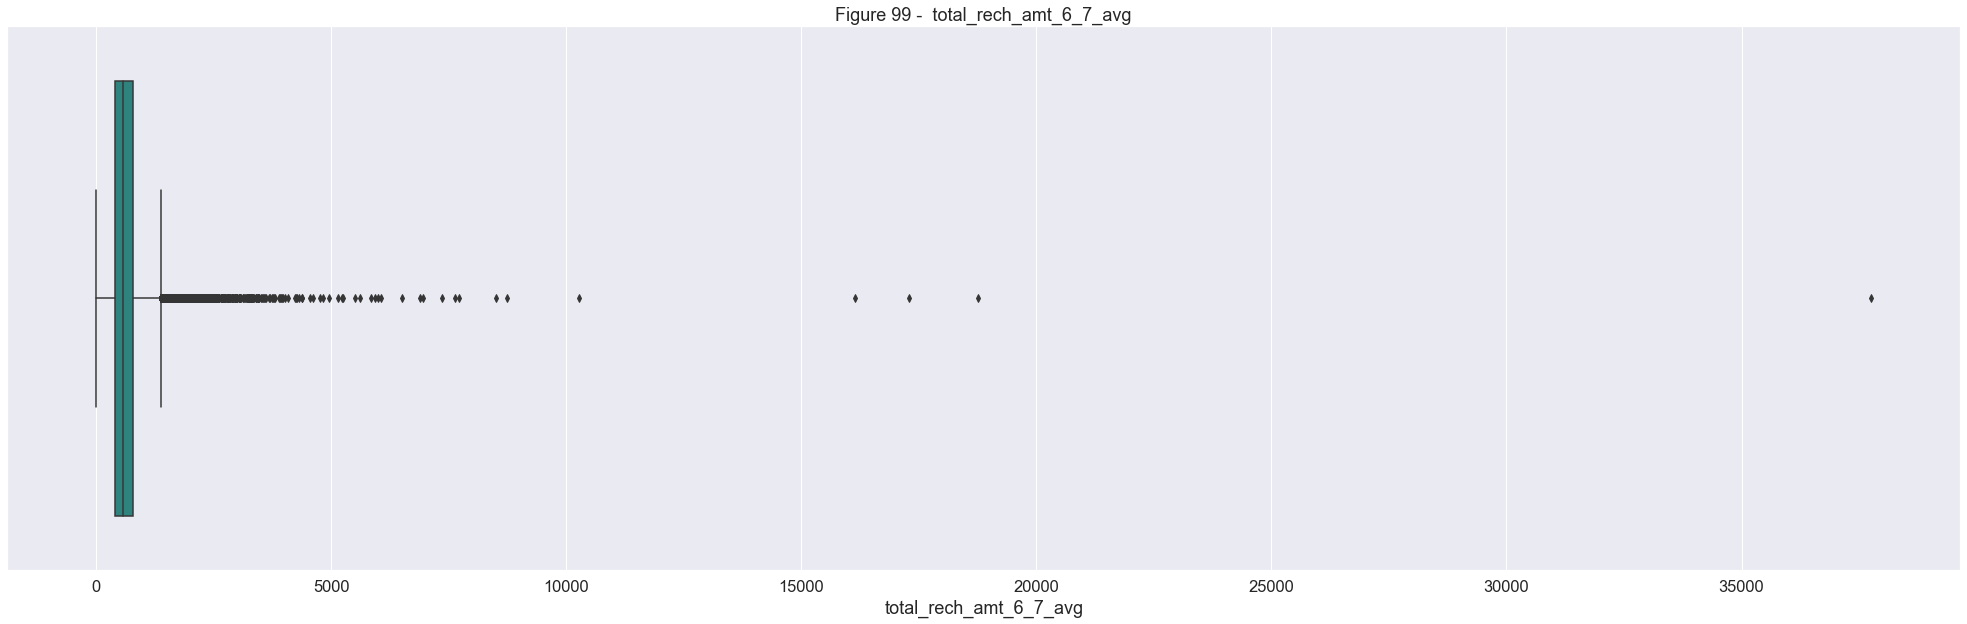

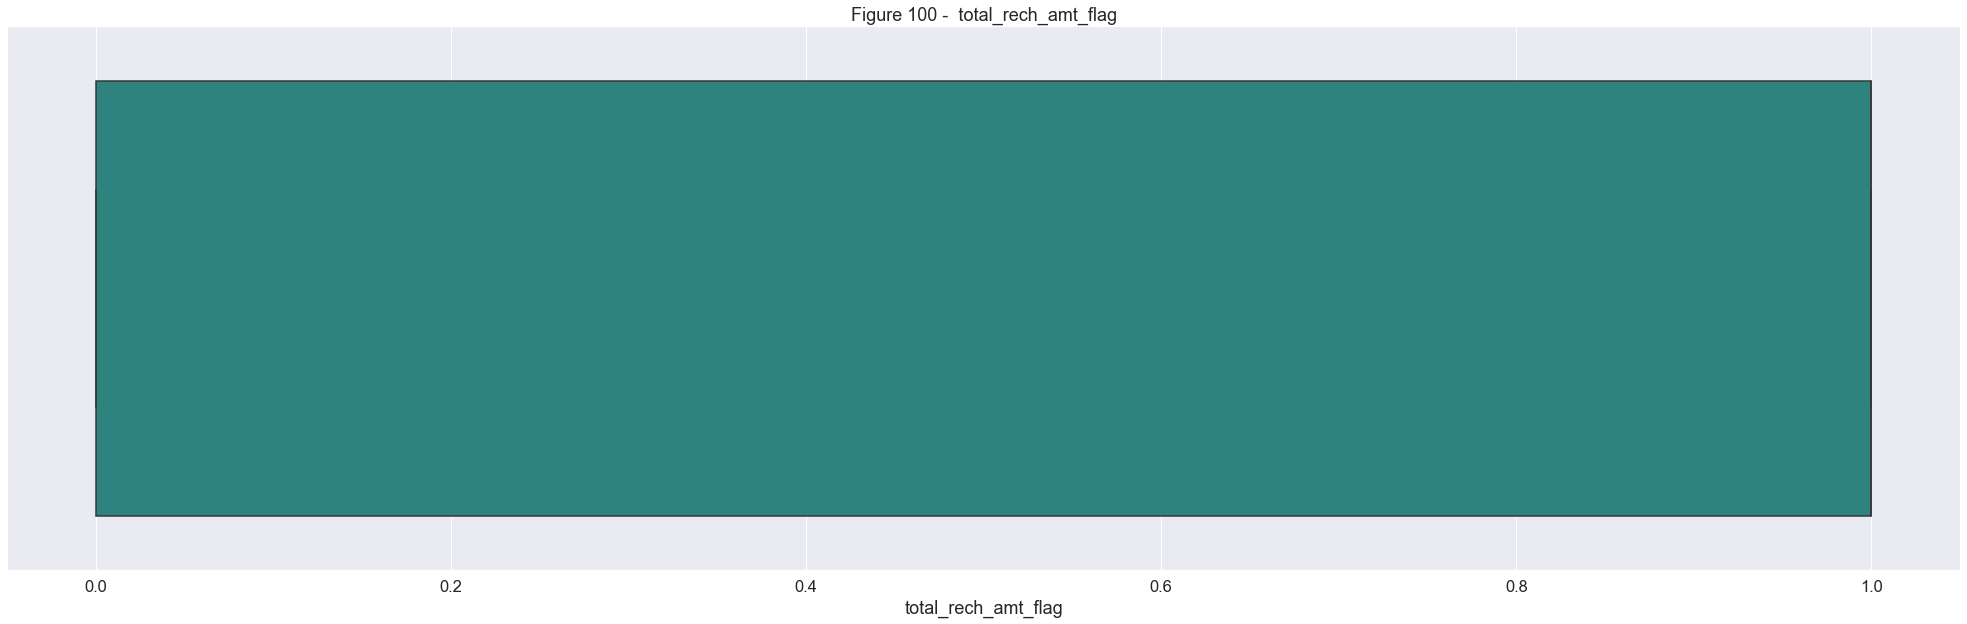

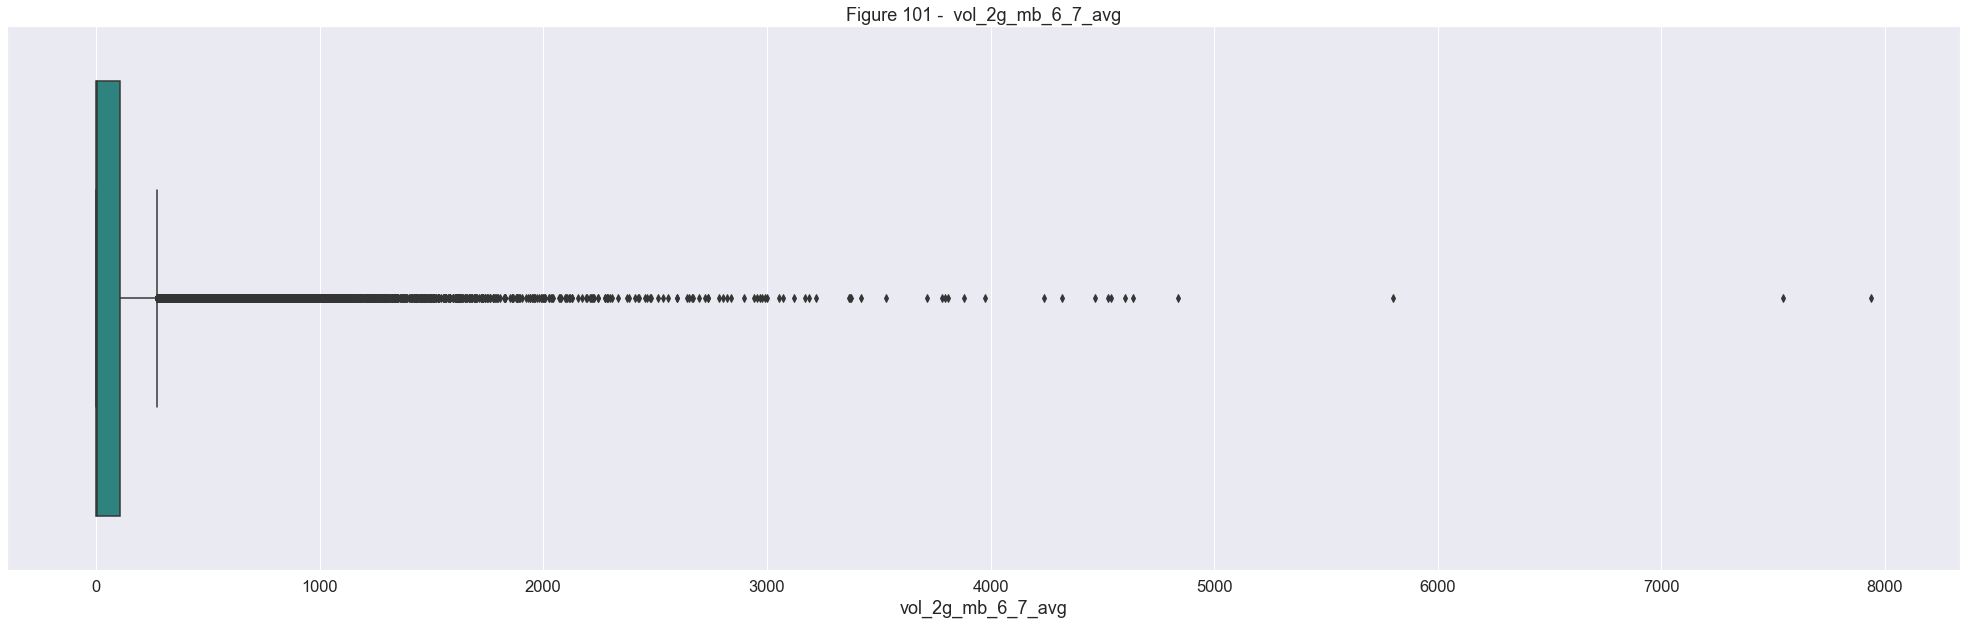

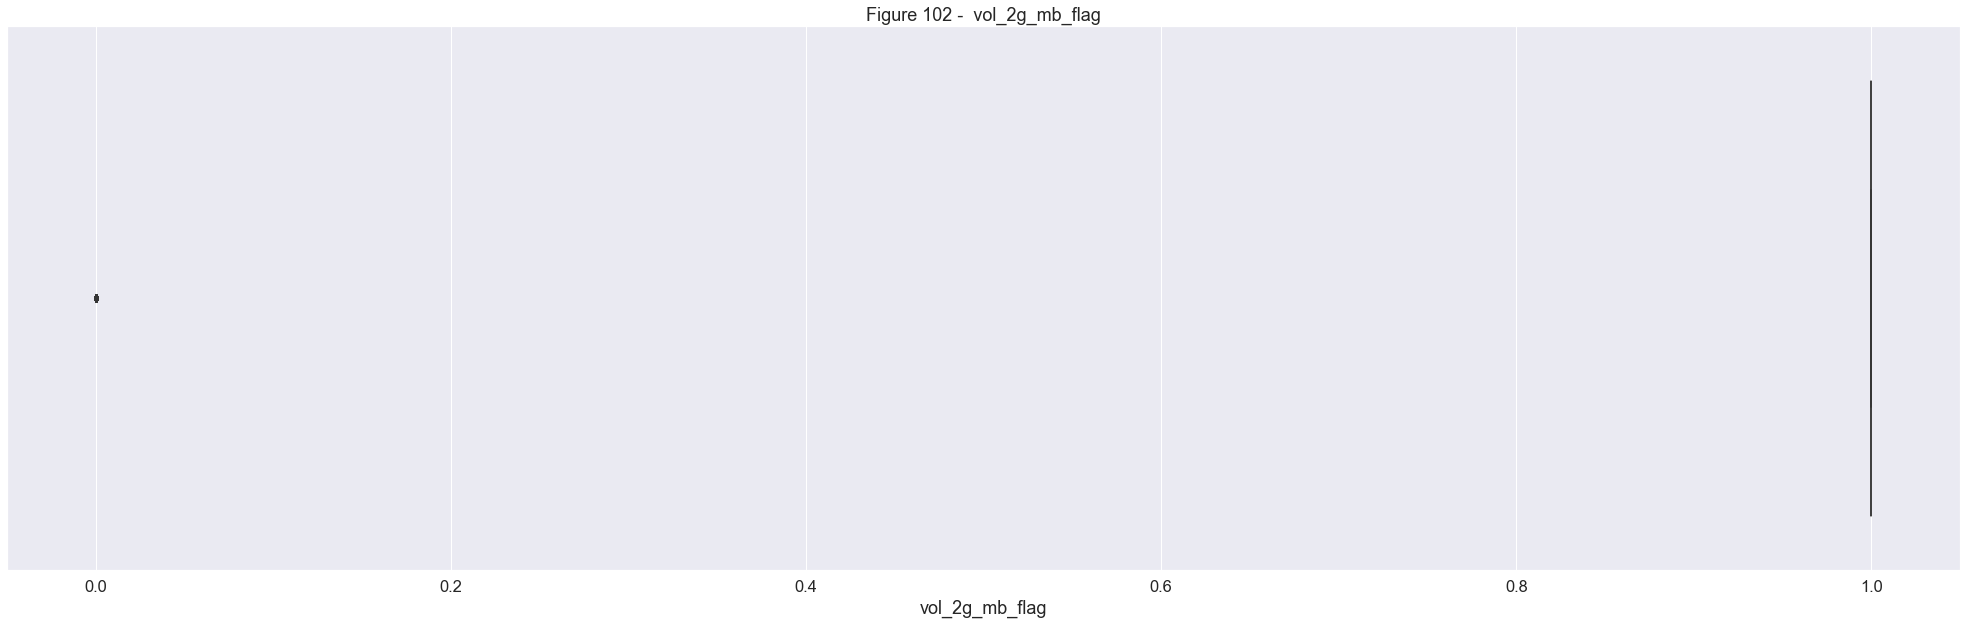

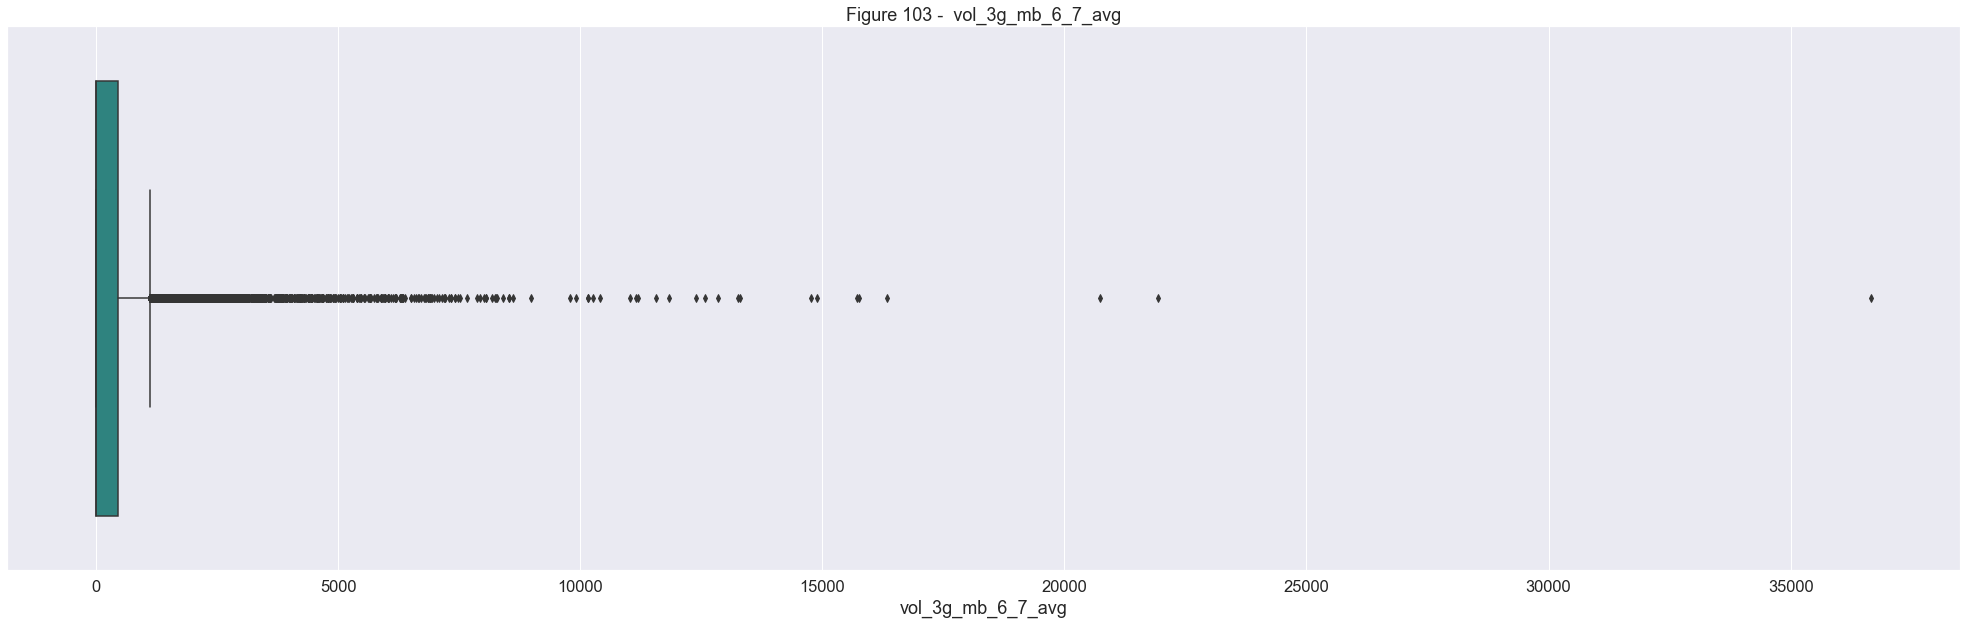

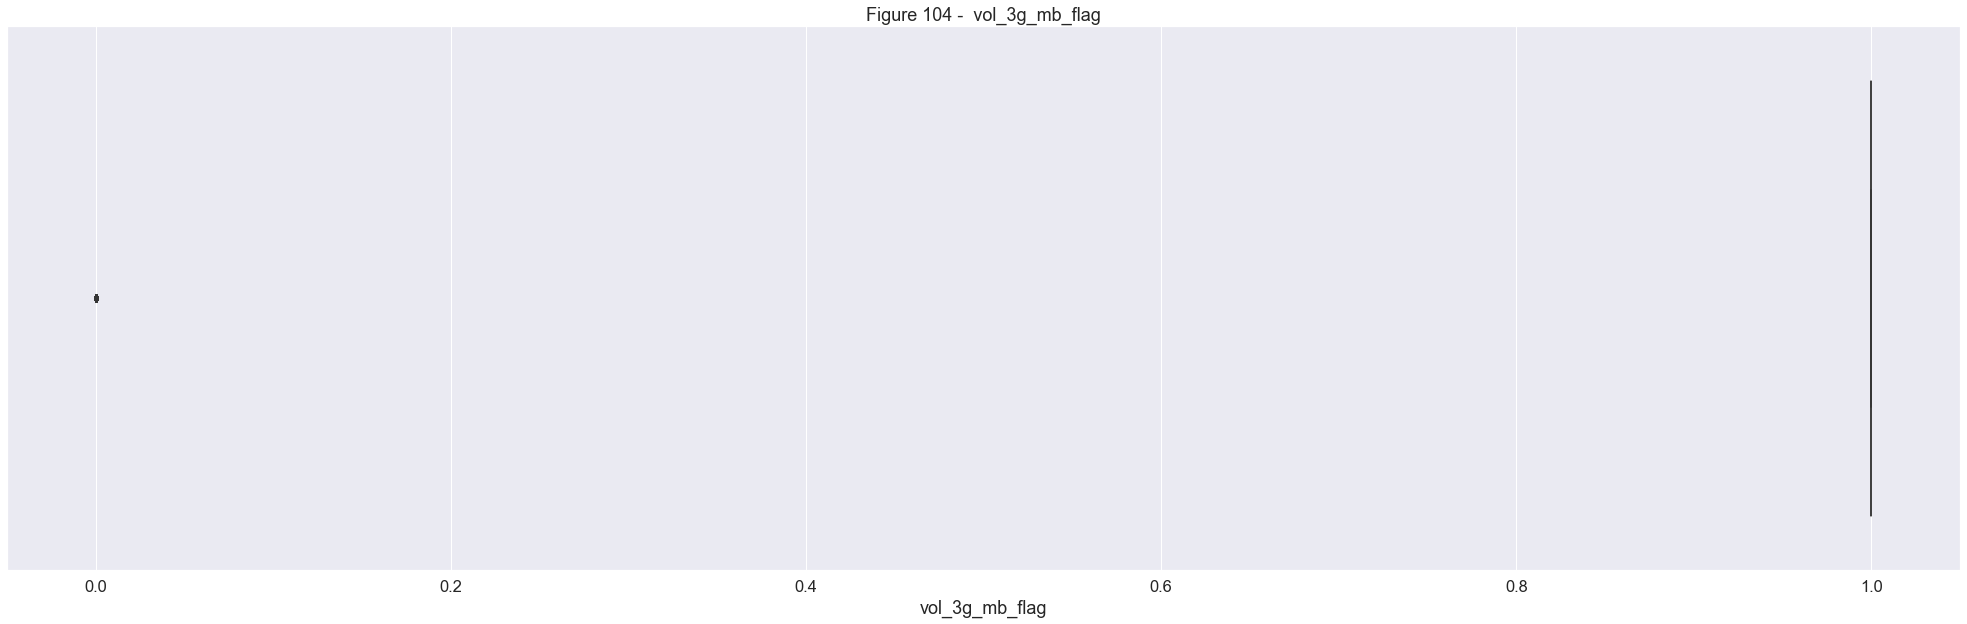

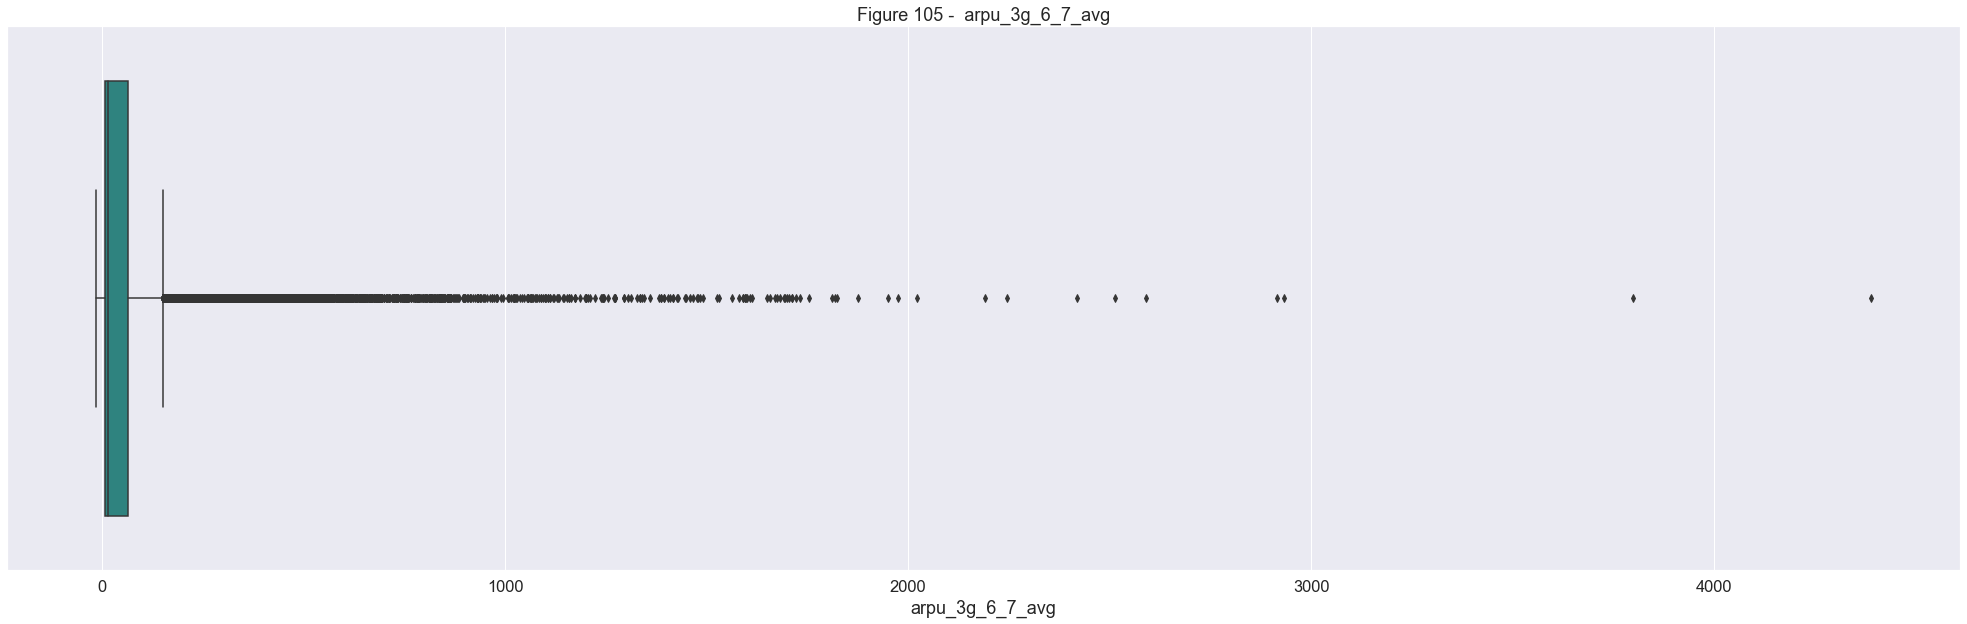

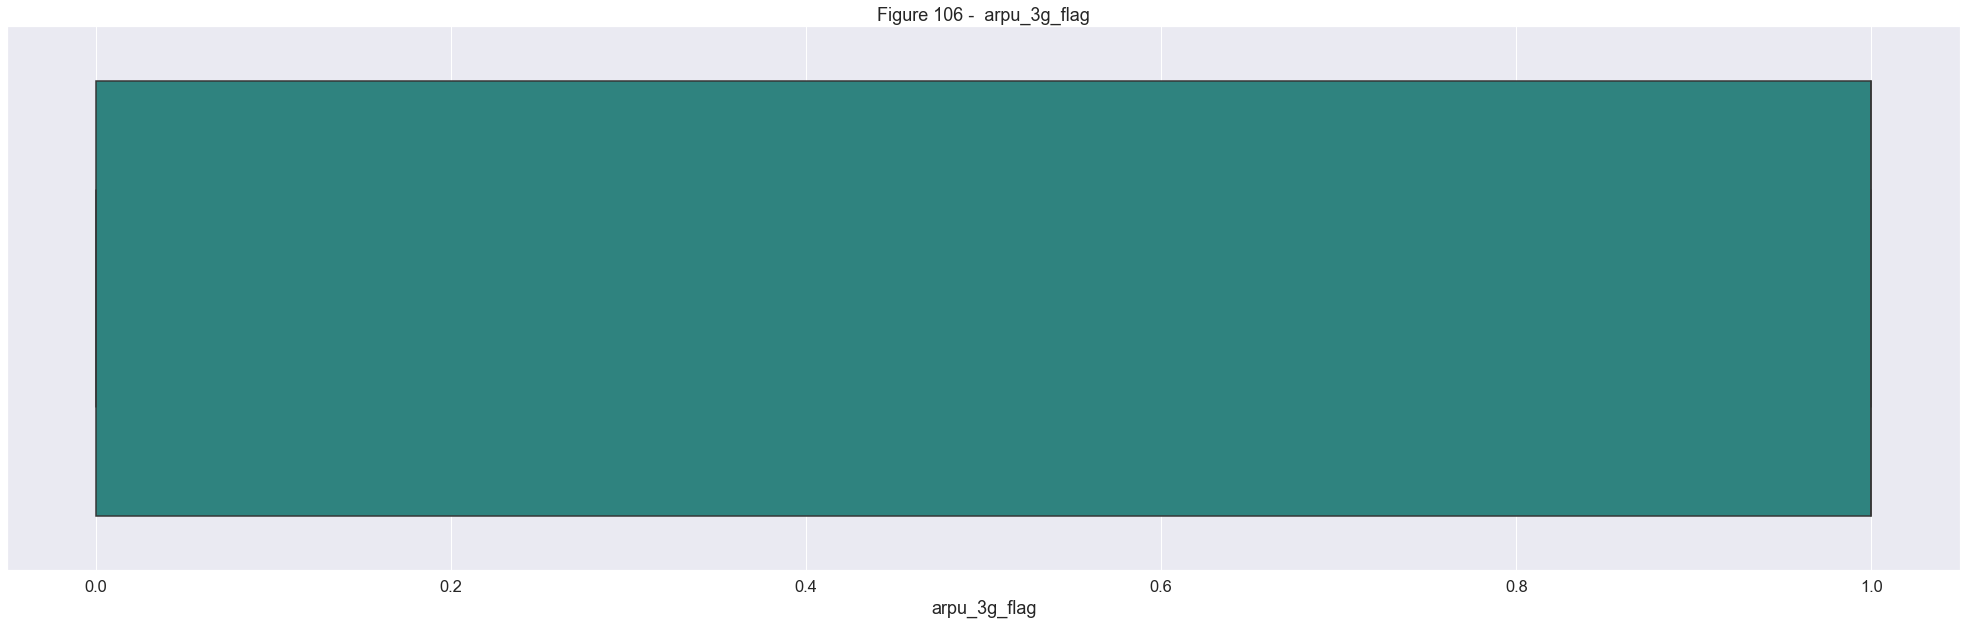

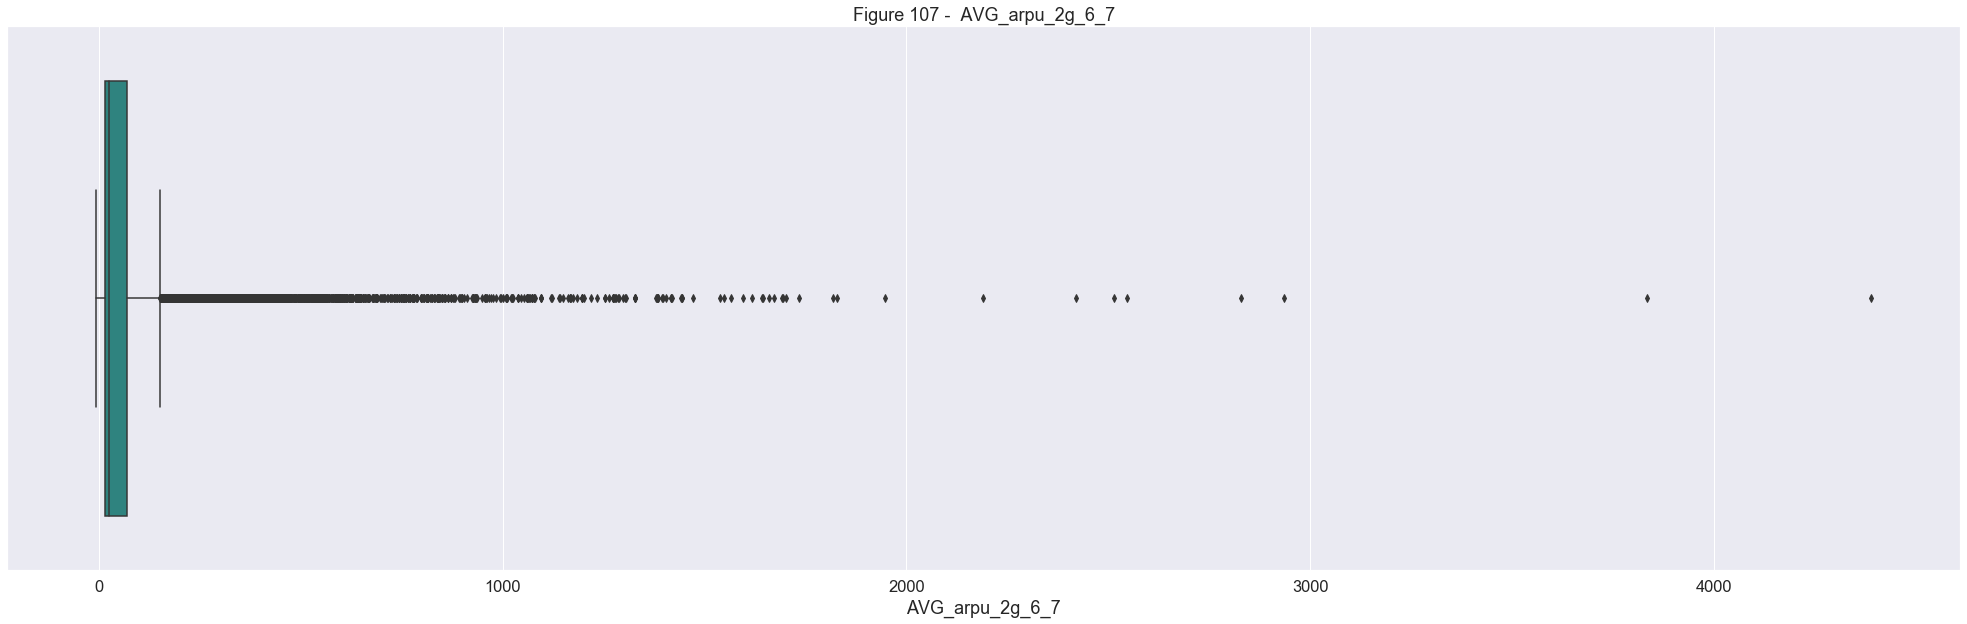

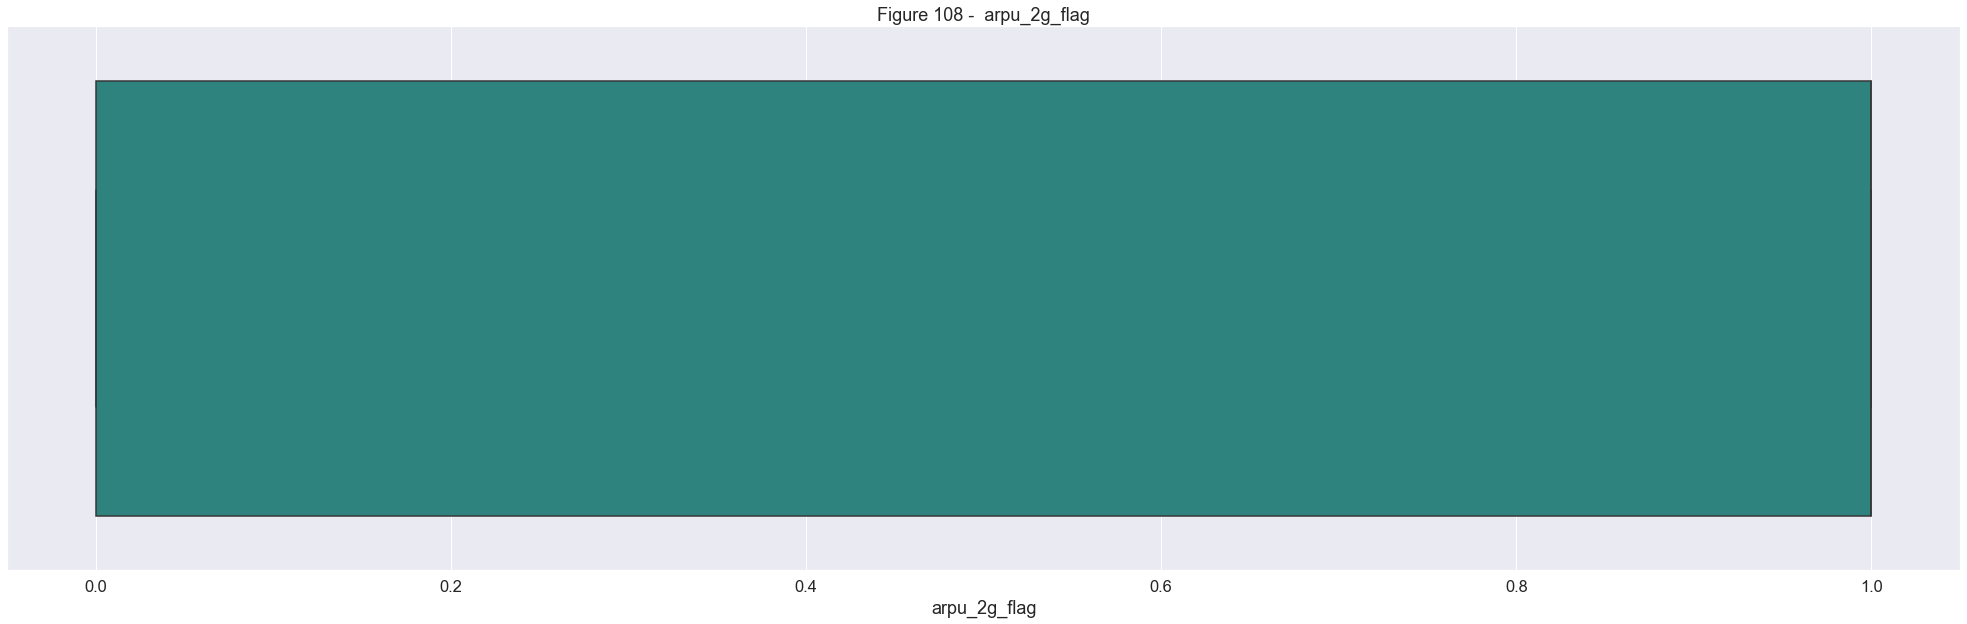

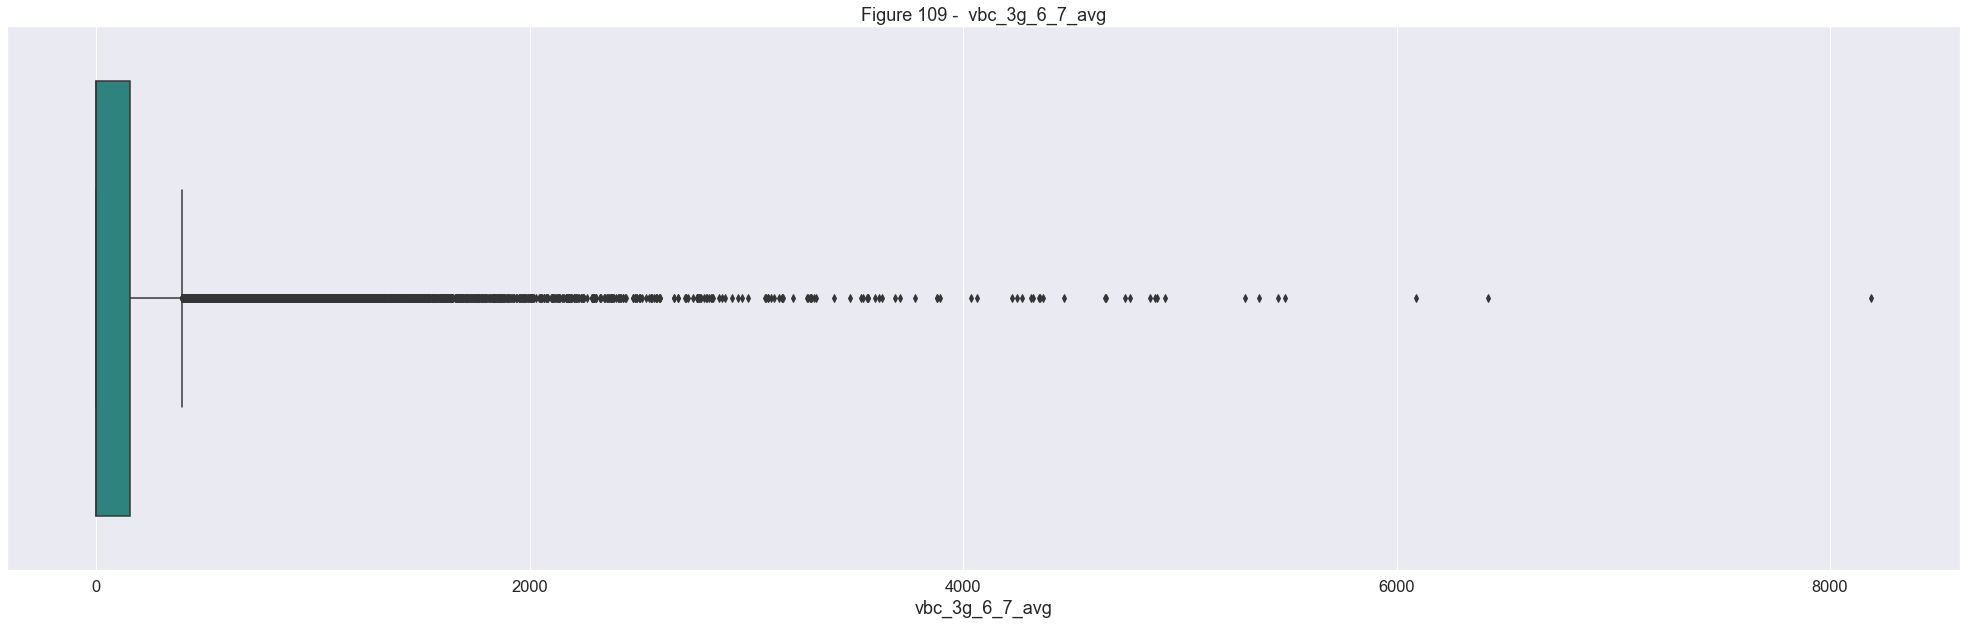

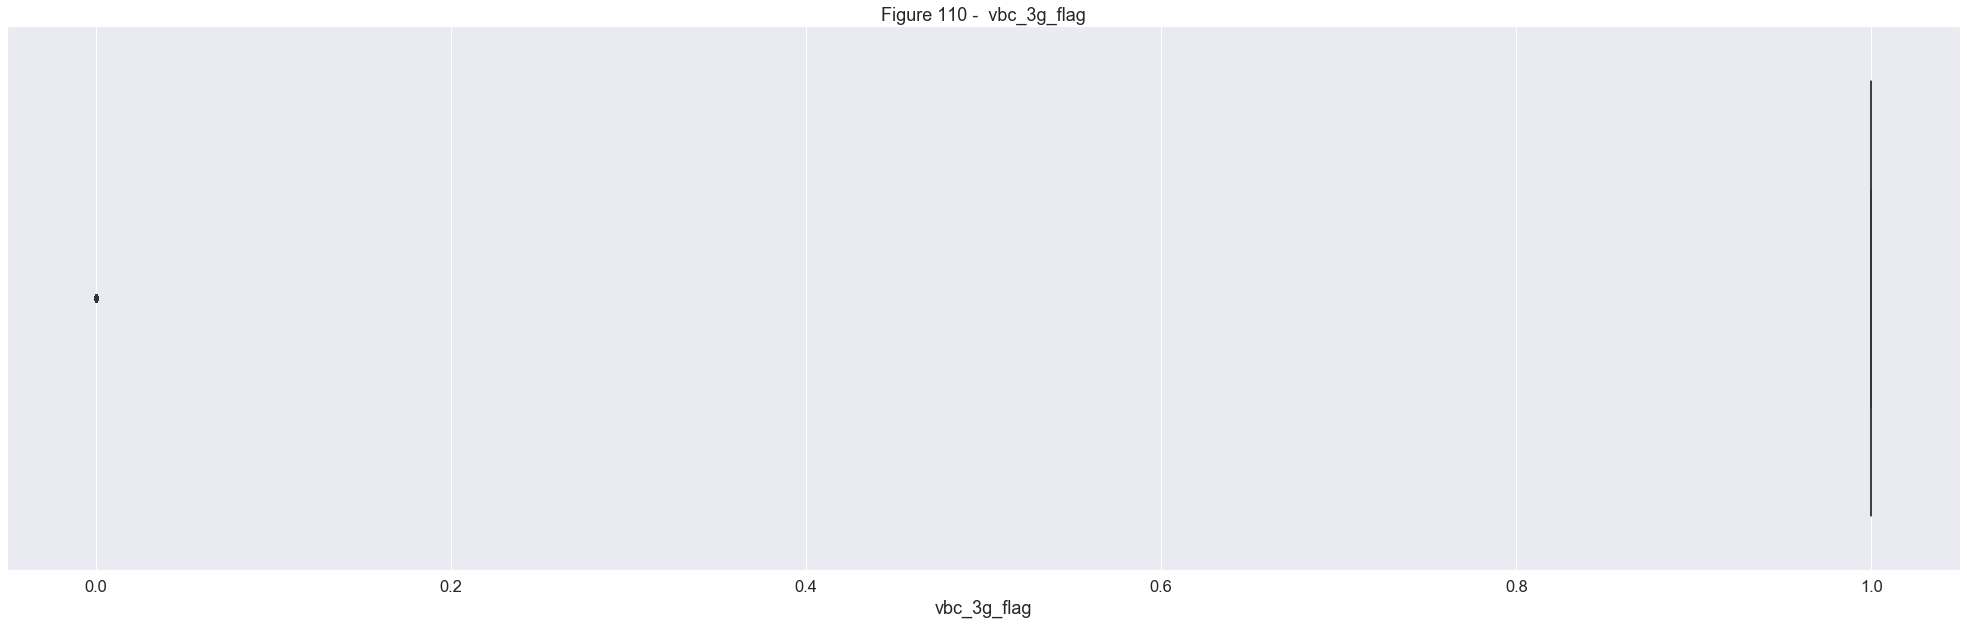

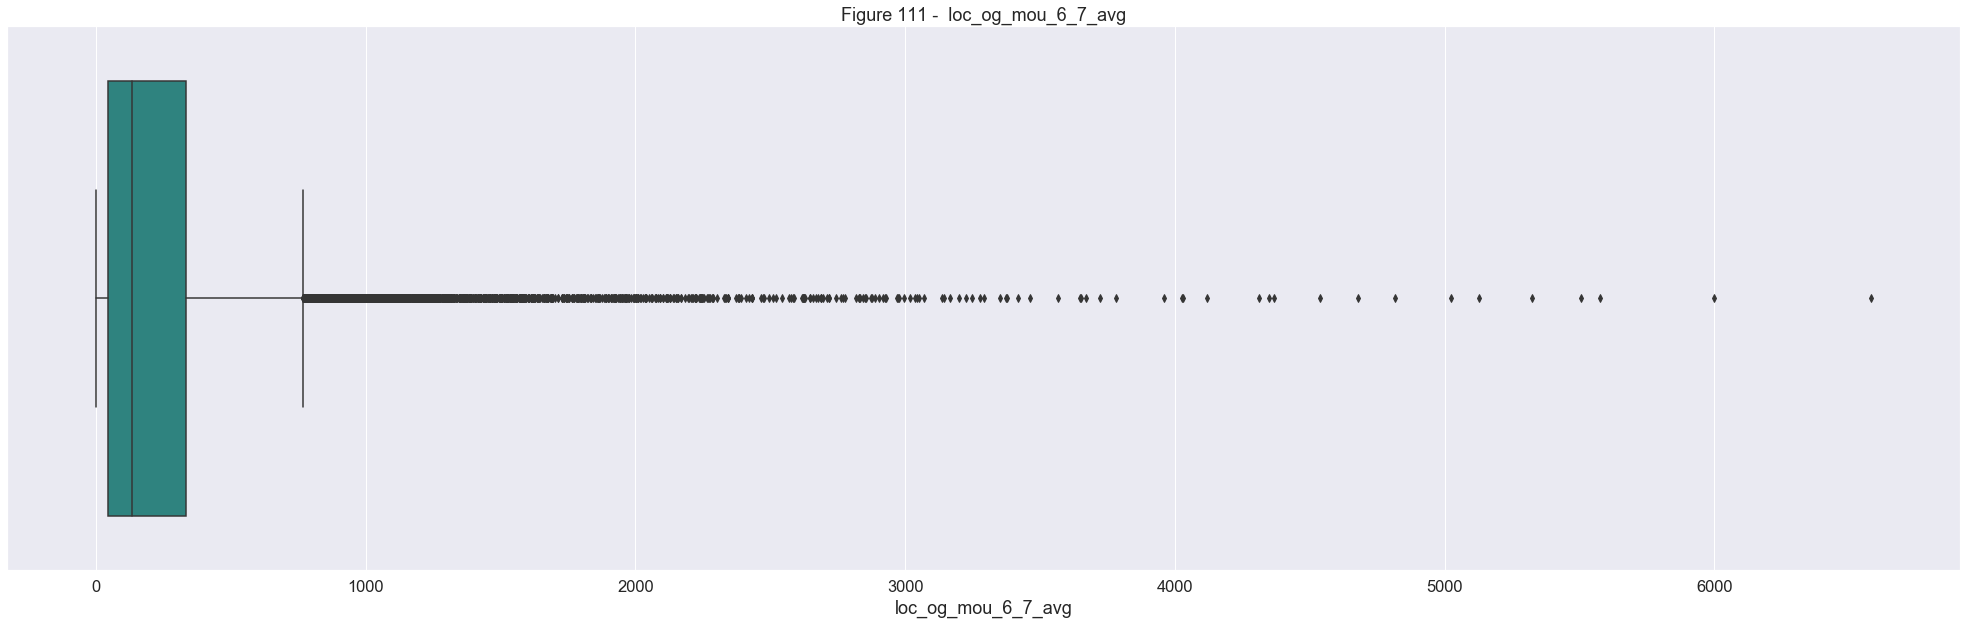

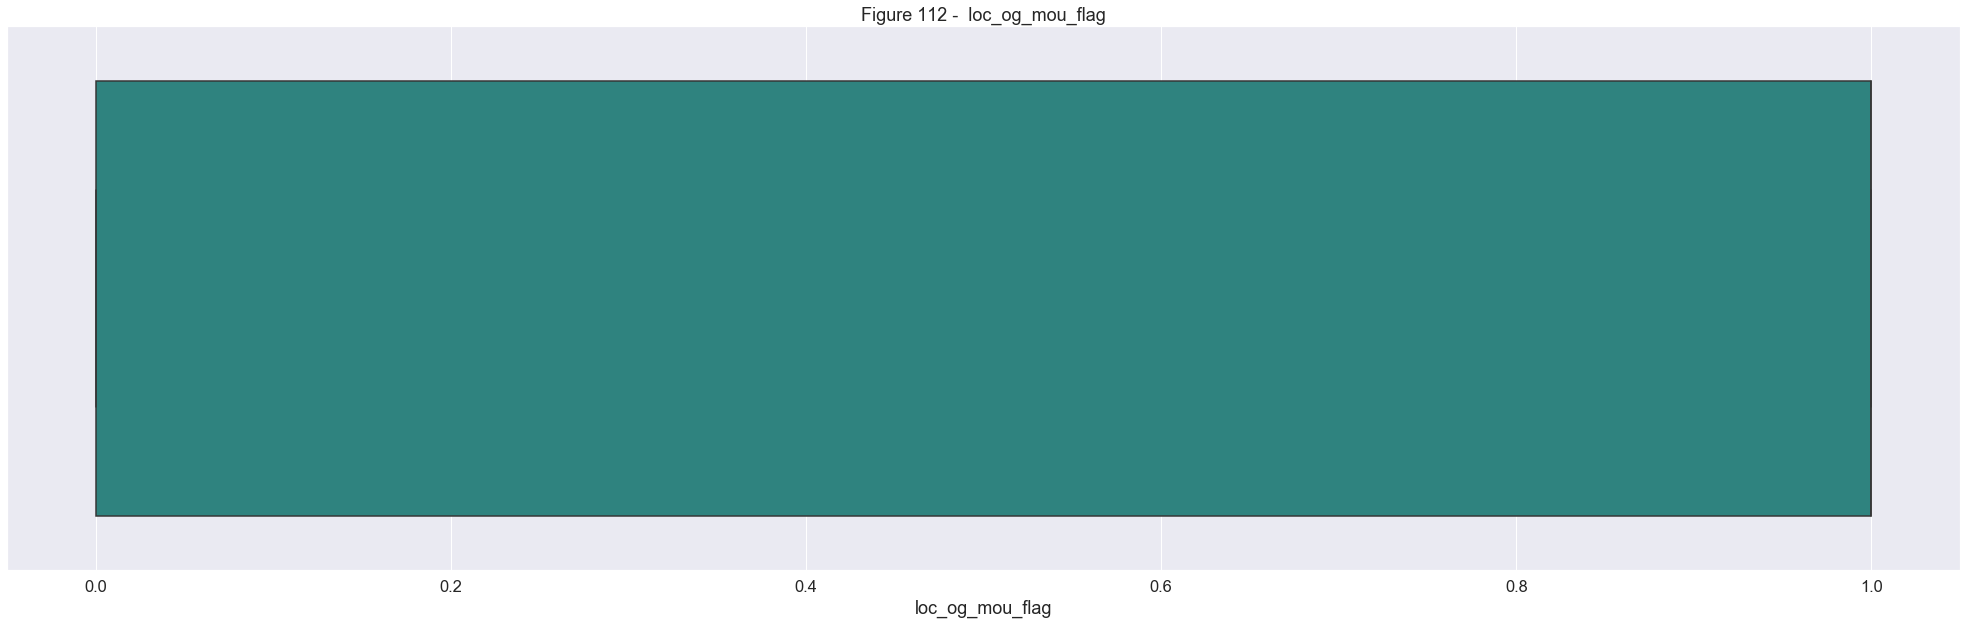

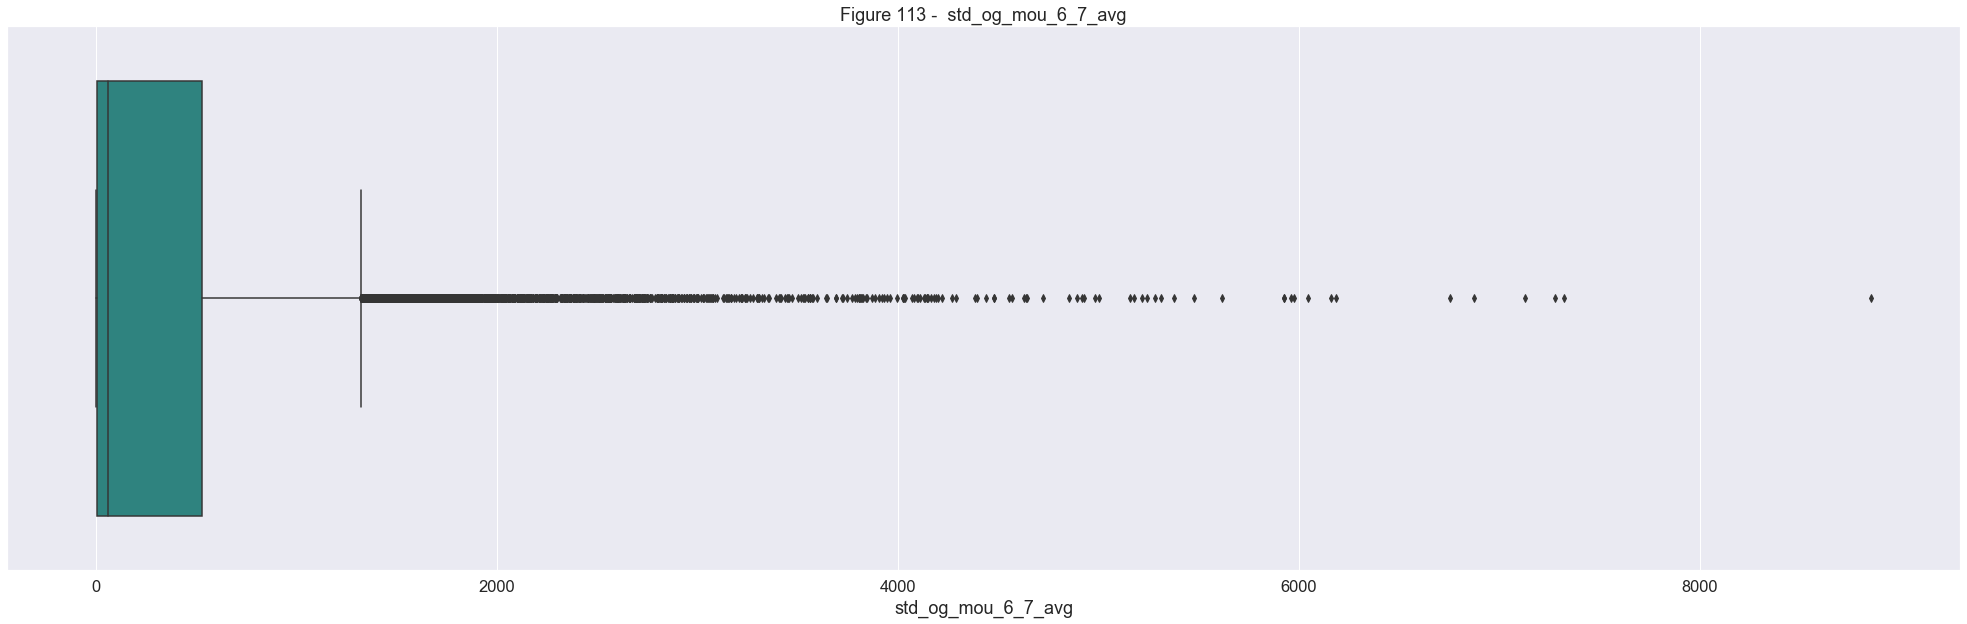

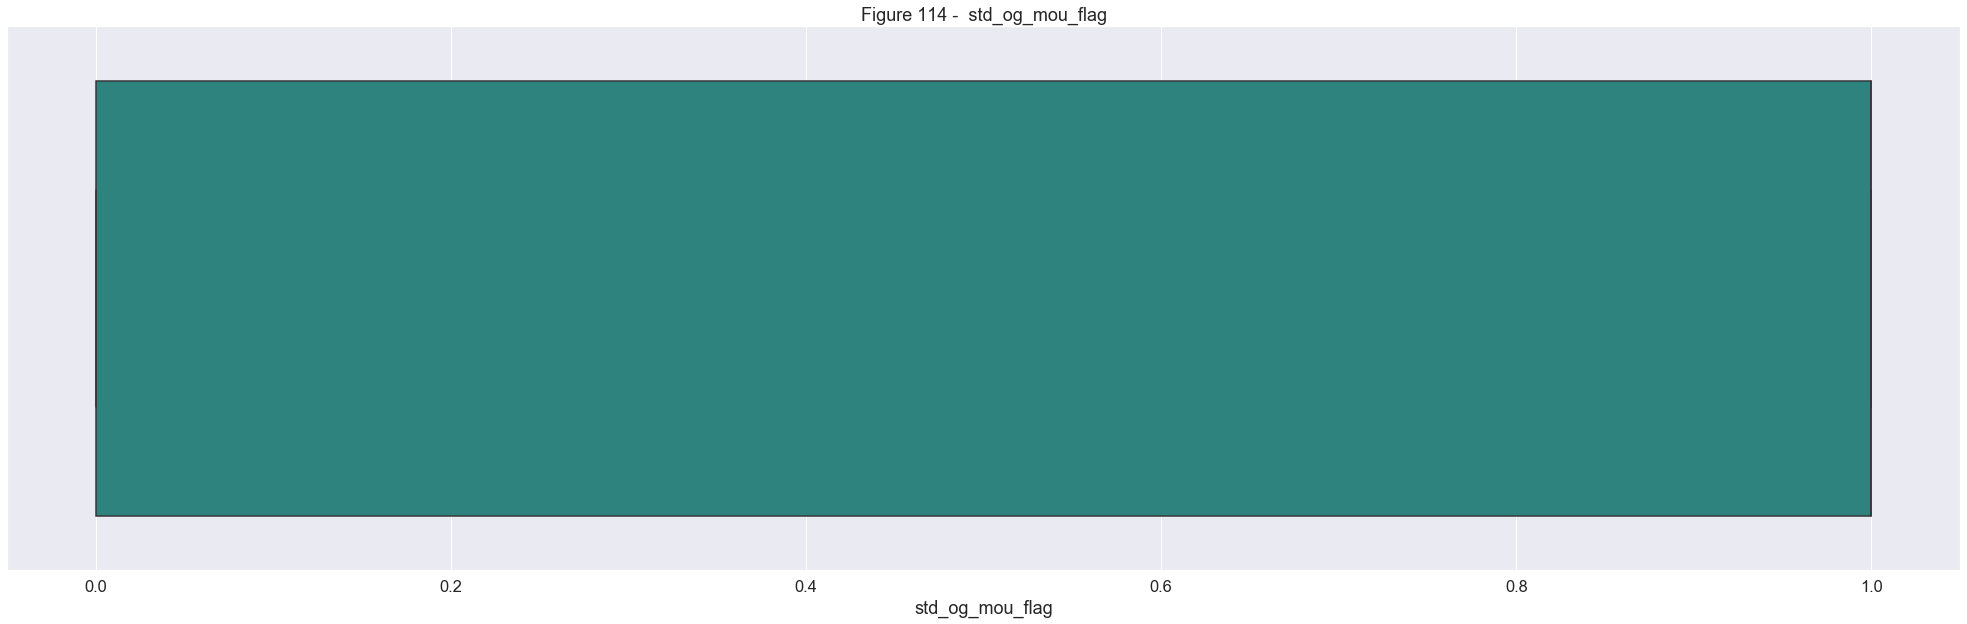

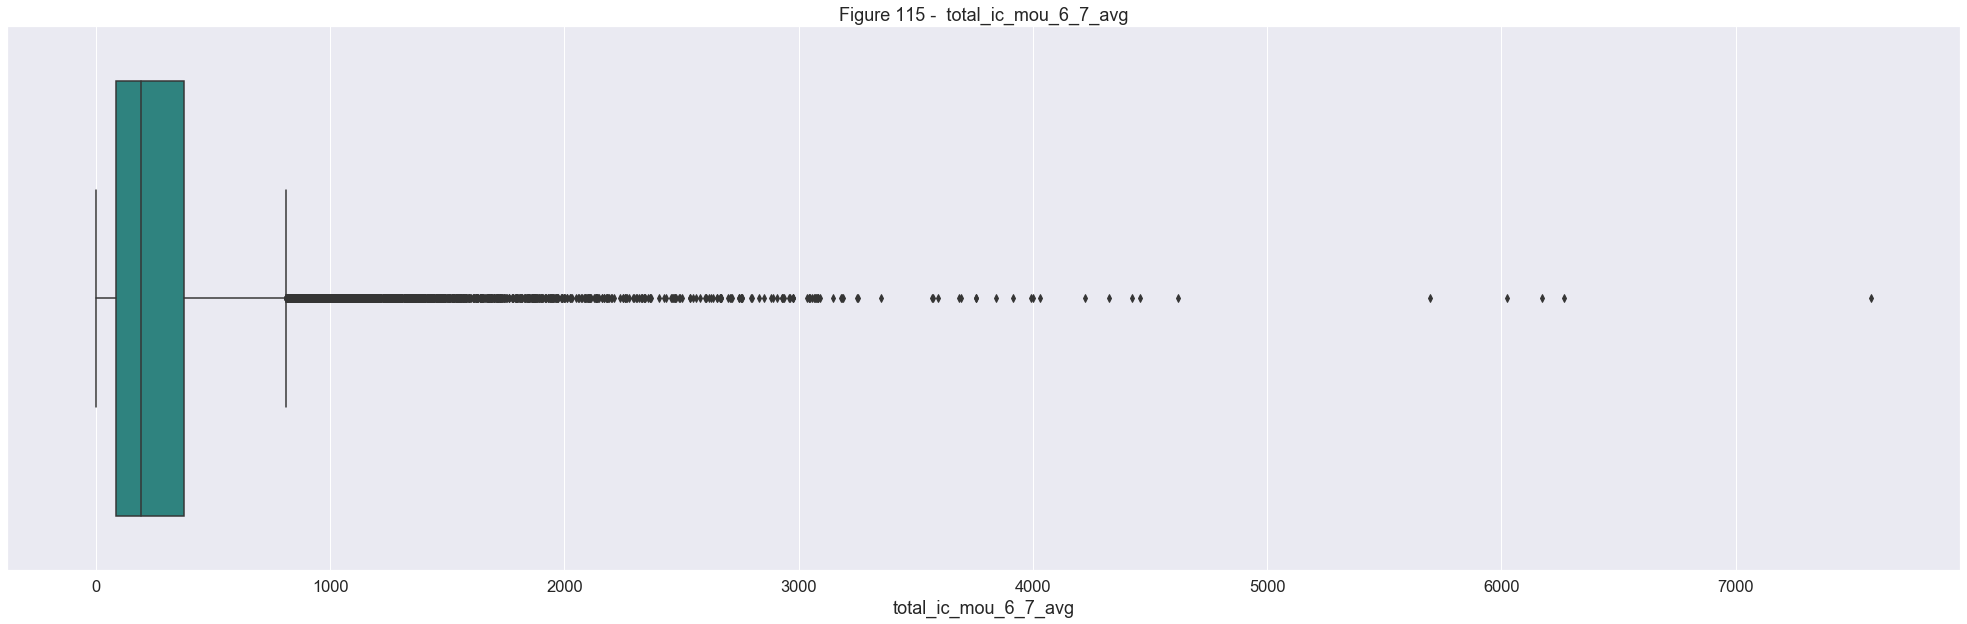

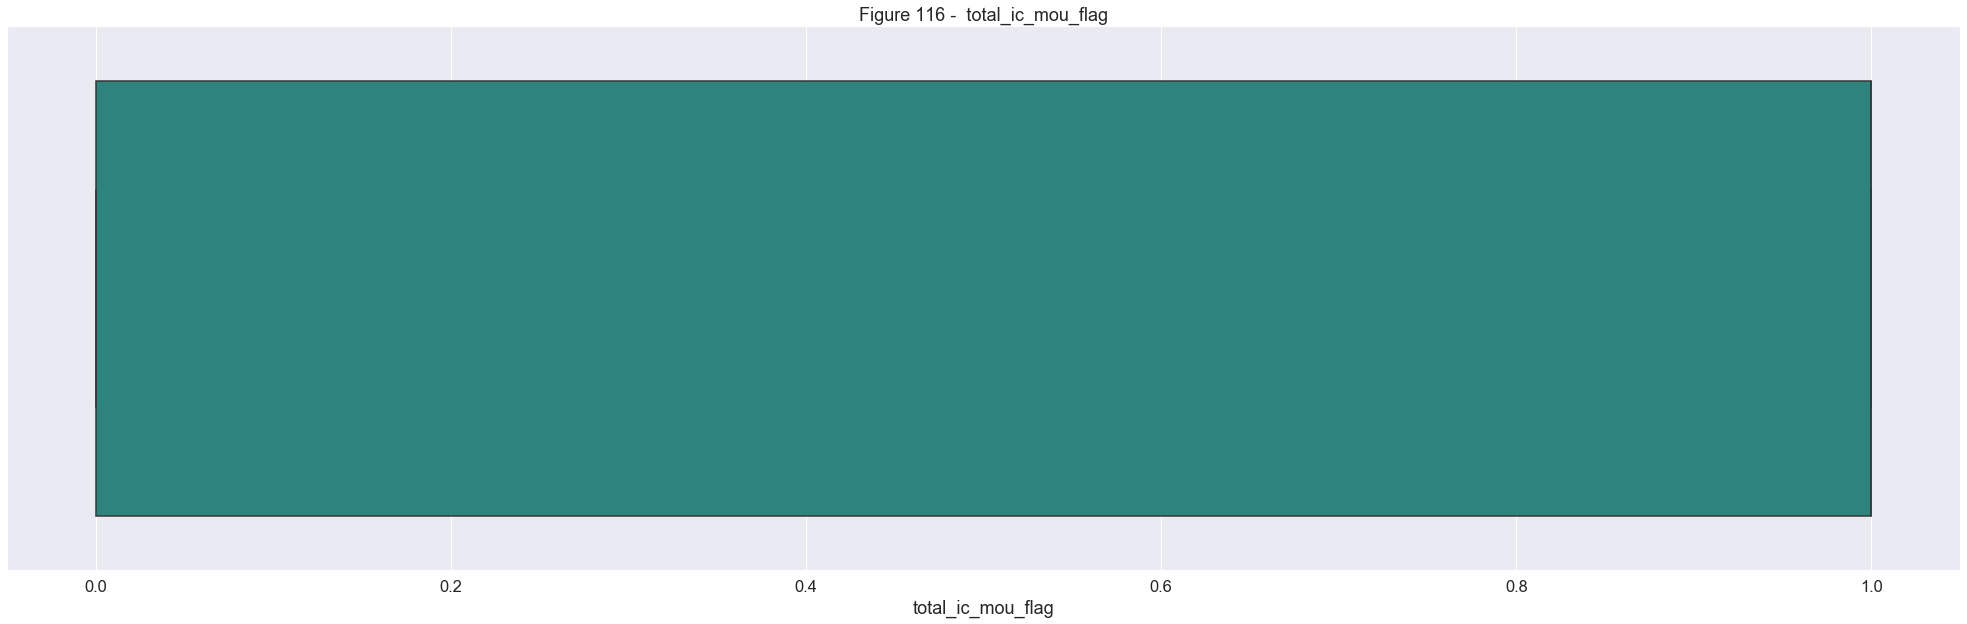

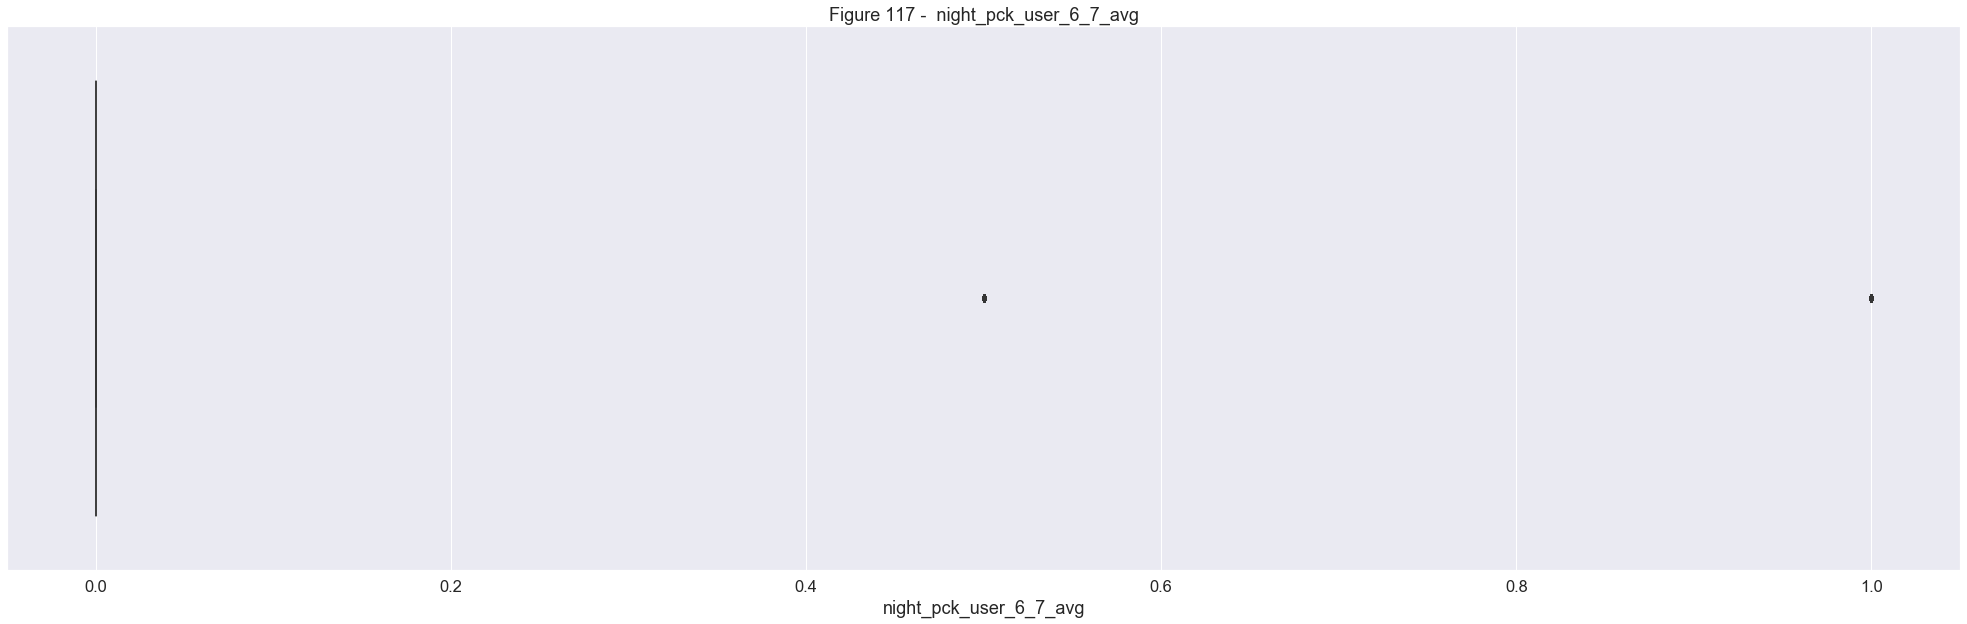

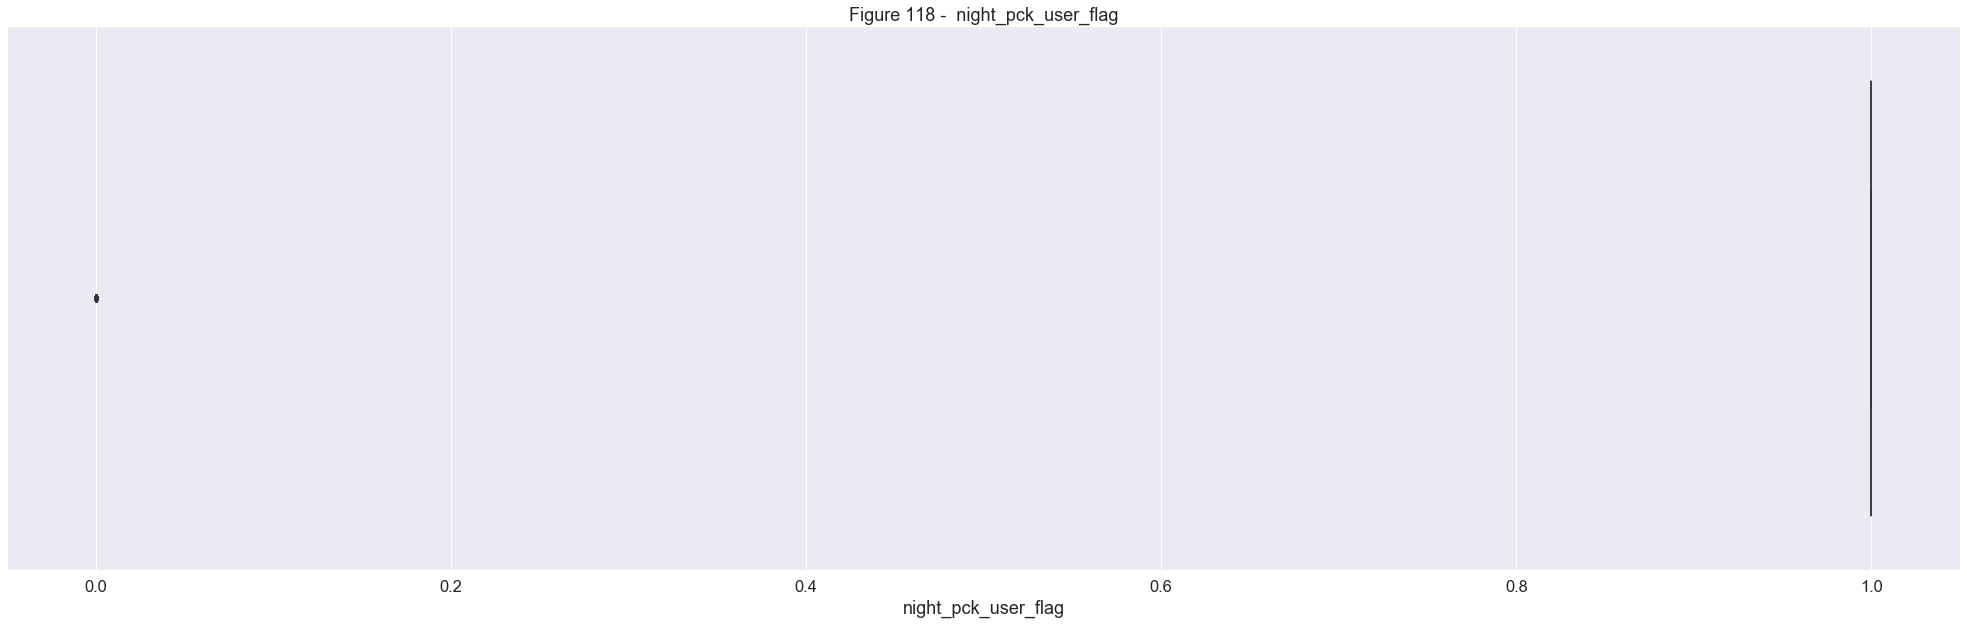

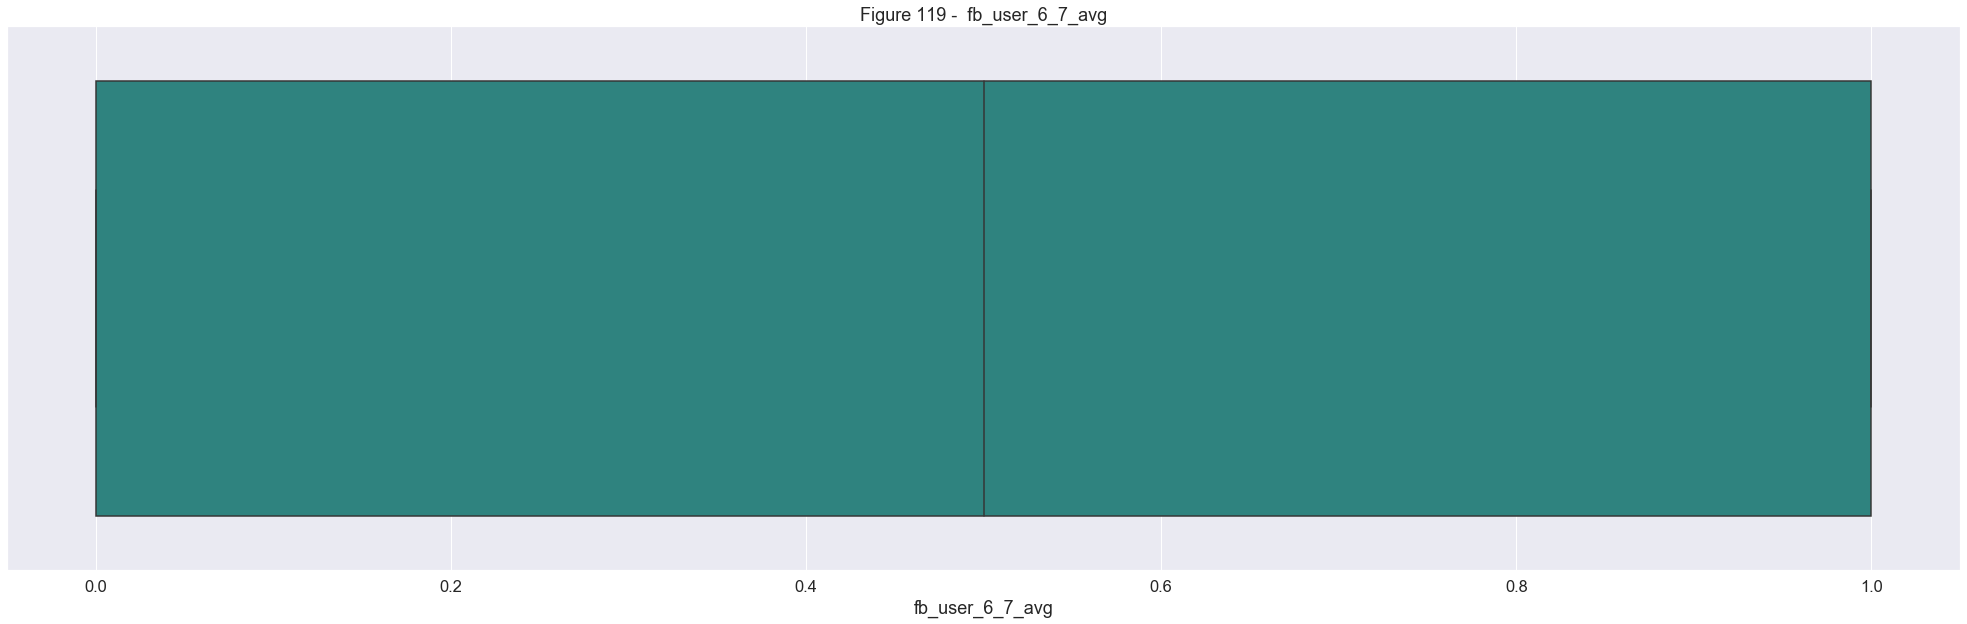

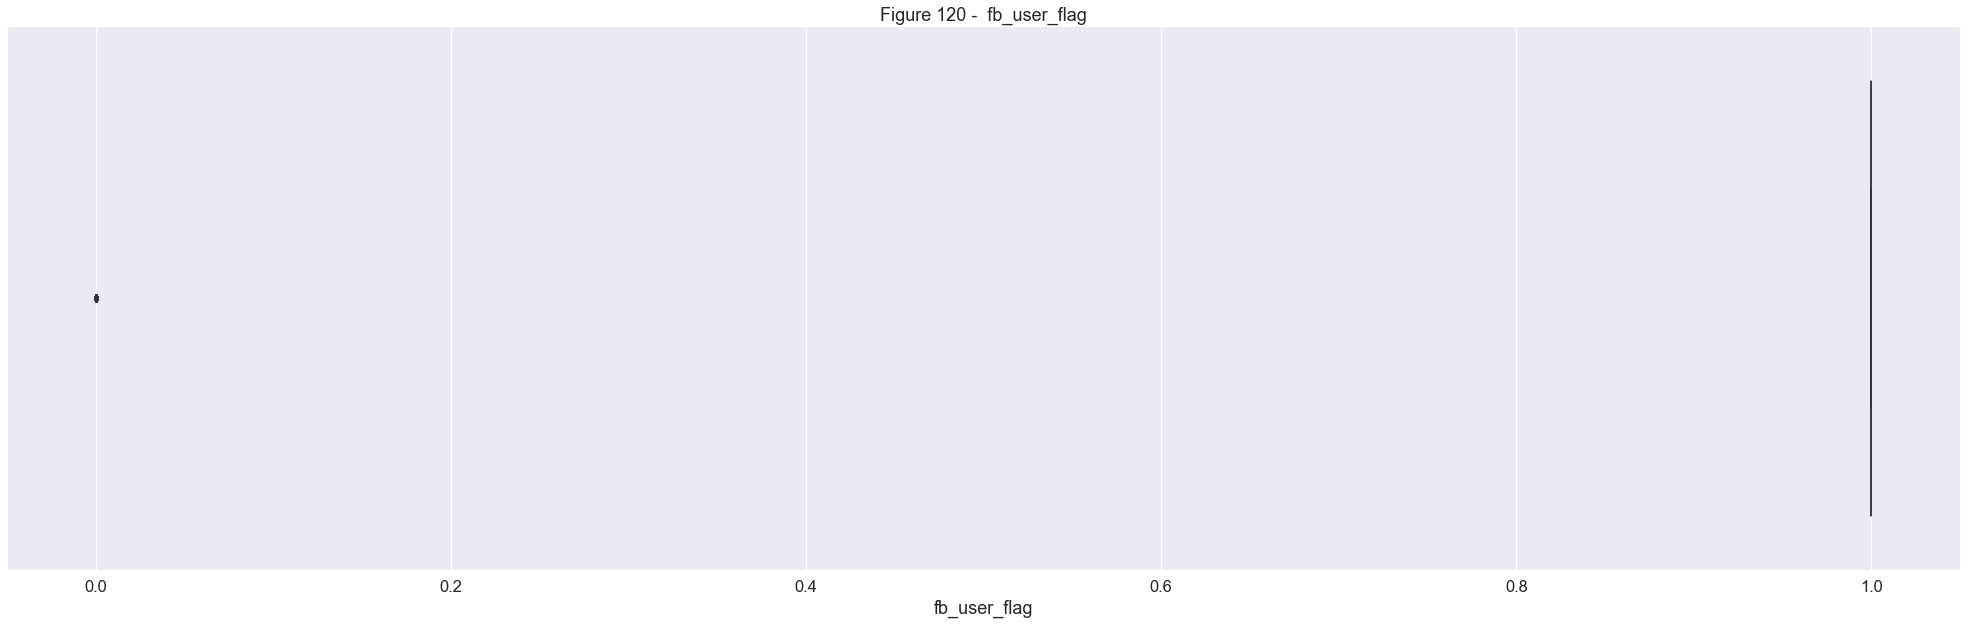

In [64]:
### ******** Create the box plots to check the outliers ********** |Start
edacols = list(df_outliers.columns)
for i in range(len(edacols)):
    plotbox(edacols[i],i+1,df_outliers)
### ******** Create the box plots to check the outliers ********** |Start

In [65]:
df_orig=df.copy(deep=True)
df=df_outliers.copy(deep=True)

In [66]:
#Let's do some EDA to get an overview of the data-
df_not_churn = df[df["churn"] == 0] #No Churn
df_churn     = df[df["churn"] == 1] #Churn

In [67]:
#calculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

Mean:
11.754177148650172
12.683256528417818
median:
9.0
10.0


#### UNIVARIATE ANALYSIS

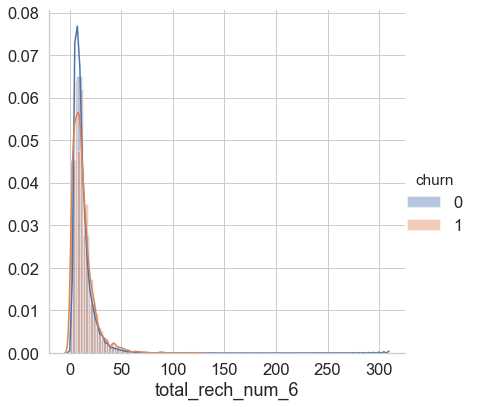

In [68]:
#feature importance of total_rech_num_6
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

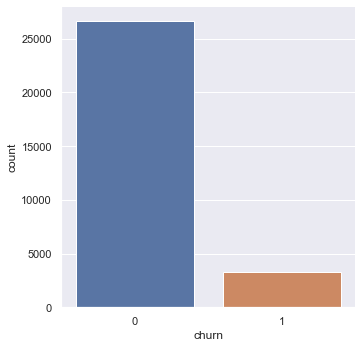

In [69]:
### ****** Churned vs Non-Churned ****** | Start
sns.set(style="whitegrid")
sns.set_context('talk')
sns.set(font_scale=1)
sns.catplot(x = "churn", data = df, kind = "count")
### ****** Churned vs Non-Churned ****** | End

In [70]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))



Mean:
11.857094581909662
10.657450076804915
median:
9.0
8.0


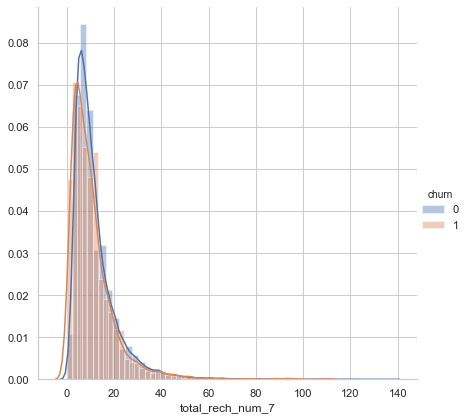

In [71]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [72]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

Mean:
10.562009537040513
5.185253456221198
median:
8.0
3.0


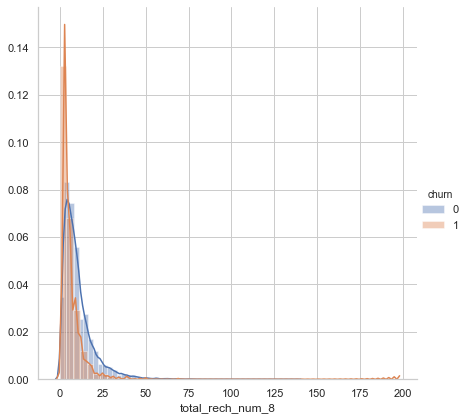

In [73]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(df,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

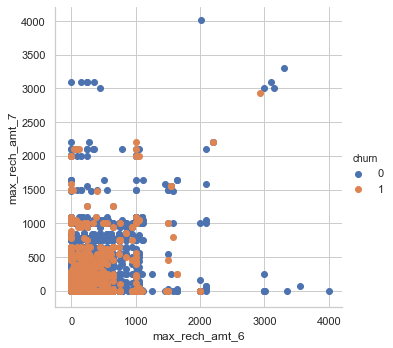

In [74]:
### ******* Check the churned/non-churned for max_rech_amt_6","max_rech_amt_7" ********. |. Start
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()
### ******* Check the churned/non-churned for max_rech_amt_6","max_rech_amt_7" ********. |. End

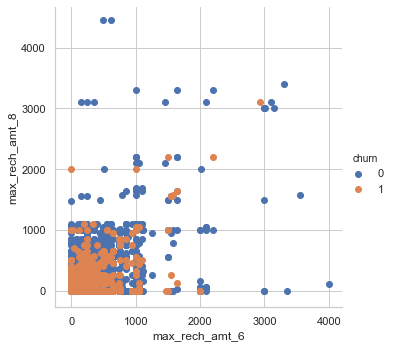

In [75]:
### ******* Check the churned/non-churned for max_rech_amt_6","max_rech_amt_8" ********. |. Start
sns.FacetGrid(df,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()
### ******* Check the churned/non-churned for max_rech_amt_6","max_rech_amt_8" ********. |. End

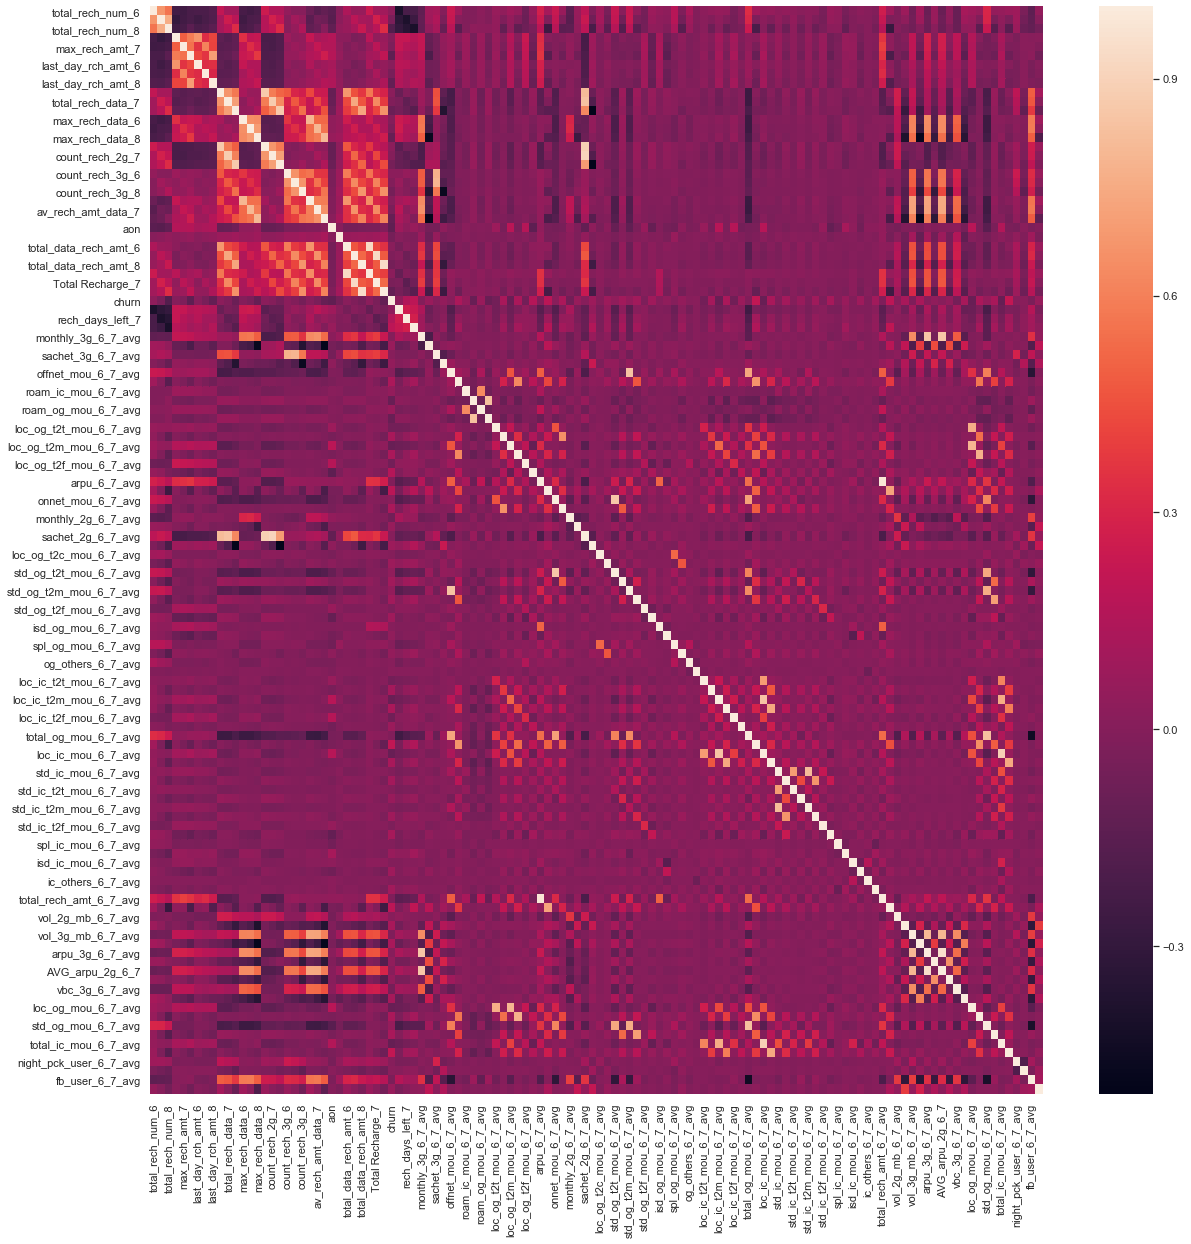

In [76]:
#Correlation matrix-

plt.figure(figsize = (20,20))   
sns.heatmap(df.corr())

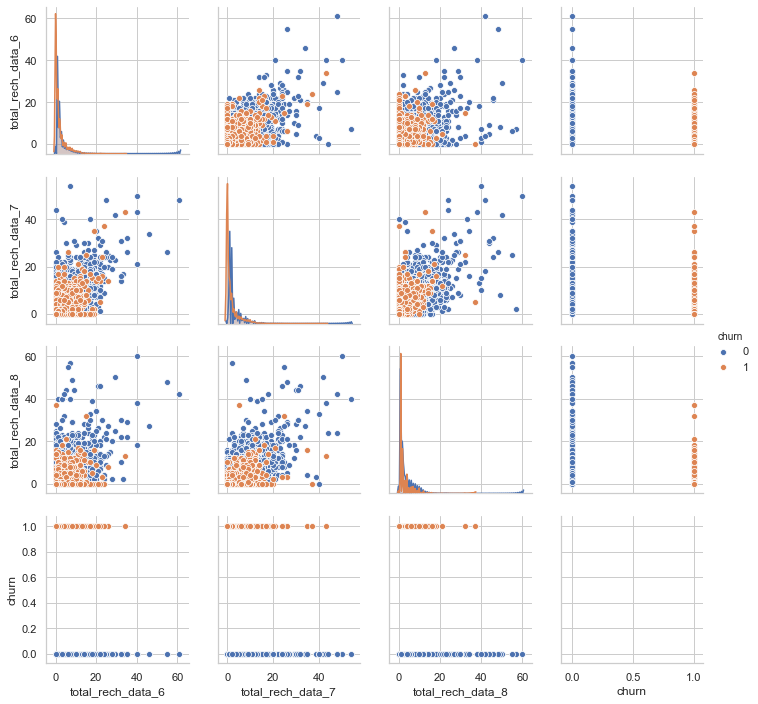

In [77]:
### ******* Pairplot for the total echarge columns ******** | Start
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')
### ******* Pairplot for the total echarge columns ******** | End

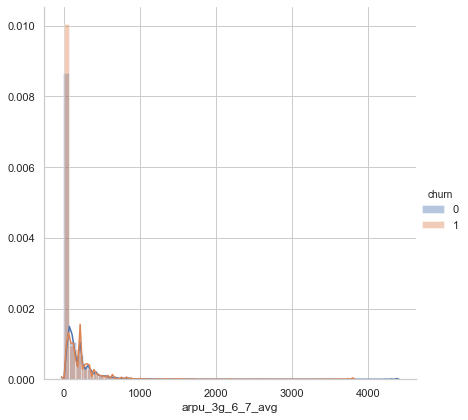

In [78]:

sns.FacetGrid(df,hue='churn',size=6).map(sns.distplot,"arpu_3g_6_7_avg").add_legend()

## 3. Model Building

### 3.1. Train Test Split

In [79]:
## ****** Get the validation set first ******* | Start
df_validation = df.sample(n=1000, random_state = 100)
X_val = df_validation.drop(['churn'],axis =1)
y_val = df_validation.churn
## ****** Get the validation set first ******* | End

In [80]:
## ***** Get the difference of the main and the sample data | Start ***** 
df_out=pd.concat([df_validation,df]).drop_duplicates(keep=False)
## ***** Get the difference of the main and the sample data | End ***** 

In [81]:
print("Shape of Original dataframe:" +str(df.shape))
print("Shape of Validation dataframe:" +str(df_validation.shape))
print("Shape of Original - Validation dataframe:" +str(df_out.shape))

Shape of Original dataframe:(29888, 120)
Shape of Validation dataframe:(1000, 120)
Shape of Original - Validation dataframe:(28888, 120)


<center> <b> We will use the validation data to test the performance of the model on unseen data </b></center>

In [82]:
## ****** Get the X and Y datapoints ****** | Start
X = df_out.drop(['churn'],axis=1)
y = df_out['churn']
## ****** Get the X and Y datapoints ****** | End

In [83]:
## ****** Split the data into train and test dataset ****** | Start
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)
## ****** Split the data into train and test dataset ****** | End

(20221, 119)
(8667, 119)


### 3.2. Scaling

In [84]:
# ****** Perform scaling ****** | Start
scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val = scaler.transform(X_val)
# ****** Perform scaling ****** | End

In [85]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_val.shape)

(20221, 119)
(8667, 119)
(1000, 119)


### 3.3. Handling class imbalance

In [86]:
## ****** Handling class imbalance ****** | Start
print("X_train Dataframe Shape {}".format(X_train_scaled.shape))
print("X_test Dataframe Shape {}".format(X_test_scaled.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("\n********* Imbalance in y_train *********\n")
print(y_train.value_counts())
print("\nThe percentage of 0s in y_train:"+str(round(y_train.value_counts()[1]/len(y_train)*100,2)))
print("\nThe percentage of 1s in y_train:"+str(round(y_train.value_counts()[0]/len(y_train)*100,2)))
print("\nImbalance in Train Data: {}".format(round(y_train_imb,2)))
print("\n********* Imbalance in y_test *********\n")
print(y_test.value_counts())
print("\nThe percentage of 0s in y_test:"+str(round(y_test.value_counts()[1]/len(y_test)*100,2)))
print("\nThe percentage of 1s in y_test:"+str(round(y_test.value_counts()[0]/len(y_test)*100,2)))
print("\nImbalance in Test Data: {}".format(round(y_test_imb,2)))

## ****** Handling class imbalance ****** | End

X_train Dataframe Shape (20221, 119)
X_test Dataframe Shape (8667, 119)

********* Imbalance in y_train *********

0    18016
1     2205
Name: churn, dtype: int64

The percentage of 0s in y_train:10.9

The percentage of 1s in y_train:89.1

Imbalance in Train Data: 0.12

********* Imbalance in y_test *********

0    7722
1     945
Name: churn, dtype: int64

The percentage of 0s in y_test:10.9

The percentage of 1s in y_test:89.1

Imbalance in Test Data: 0.12


In [87]:
## ******* Use SMOTE to handle the class imbalance ******** | Start

smote = SMOTE(random_state=2)
X_train_,y_train_balanced = smote.fit_sample(X_train_scaled,y_train.ravel())
X_test_,y_test_balanced = smote.fit_sample(X_test_scaled,y_test.ravel())
#X_test_val_,y_test_val = smote.fit_sample(X_val,y_val.ravel())

## ******* Use SMOTE to handle the class imbalance ******** | End

In [88]:
print(X_train_.shape)
print(X_test_.shape)
#print(X_test_val_.shape)

(36032, 119)
(15444, 119)


In [89]:
## ******** Get the y_test and y_train ******** | Start
y_train_balanced=pd.DataFrame(y_train_balanced).rename(columns={0:'churn'})
y_test_balanced=pd.DataFrame(y_test_balanced).rename(columns={0:'churn'})
#y_test_val=pd.DataFrame(y_test_val).rename(columns={0:'churn'})
y_train_ = y_train_balanced.churn
y_test_ = y_test_balanced.churn
#y_test_val_=y_test_val.churn
## ******** Get the y_test and y_train ******** | End

In [90]:
## ******** Print the class after using SMOTE ******* | Start
print(y_train_.value_counts())
print(y_test.value_counts())
print(y_val.value_counts())
## ******** Print the class after using SMOTE ******* | End

1    18016
0    18016
Name: churn, dtype: int64
0    7722
1     945
Name: churn, dtype: int64
0    895
1    105
Name: churn, dtype: int64


<b> <font color = "Red">Note: </font> We have only handled class imbalance for training the data. For the validation set we are using the dataset as is. This will become our real test of the model on the unseen data </b>

### 3.4. PCA

In [91]:
## ******* PCA on the X_train data set ******* | Start
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train_)
## ******* PCA on the X_train data set ******* | End

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
pca.components_

array([[-7.57857619e-02, -4.65629845e-02,  2.26795221e-03, ...,
        -1.28125758e-02,  1.96821964e-01, -1.54958136e-02],
       [-7.65184263e-02, -9.17982173e-02, -8.23334143e-02, ...,
         1.16413707e-02, -8.42566859e-02, -4.17769056e-03],
       [ 4.74872851e-02, -4.13720359e-03, -1.05883830e-01, ...,
         8.70616026e-03,  3.12692754e-02,  5.51445745e-02],
       ...,
       [ 0.00000000e+00, -1.88417622e-16,  4.14941558e-17, ...,
        -2.06432094e-16, -1.74166237e-15, -3.19189120e-16],
       [ 1.94757644e-16, -2.18215172e-16, -2.44521129e-16, ...,
         1.45283091e-17,  3.64291930e-17, -5.55111512e-17],
       [ 0.00000000e+00,  2.70616862e-16,  9.47715402e-18, ...,
         2.99239800e-17, -6.93889390e-18, -5.55111512e-17]])

In [93]:
### ******* Show some of the PCA Components ******* | Start
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],
                       'PC2':pca.components_[1], 
                       'PC3':pca.components_[2], 
                       'PC4':pca.components_[3],
                       'Feature':colnames})
pcs_df.head(10)
### ******* Show some of the PCA Components ******* | Start

PC1       PC2       PC3       PC4             Feature
0 -0.075786 -0.076518  0.047487  0.227118    total_rech_num_6
1 -0.046563 -0.091798 -0.004137  0.240488    total_rech_num_7
2  0.002268 -0.082333 -0.105884  0.199411    total_rech_num_8
3  0.069975  0.215724  0.001063 -0.009887      max_rech_amt_6
4  0.070081  0.196162 -0.024026  0.005557      max_rech_amt_7
5  0.089343  0.186144 -0.071895  0.039840      max_rech_amt_8
6  0.055566  0.192360  0.006709 -0.000635  last_day_rch_amt_6
7  0.042306  0.149261 -0.030256  0.011533  last_day_rch_amt_7
8  0.065229  0.147588 -0.061323  0.013505  last_day_rch_amt_8
9  0.139645 -0.228517  0.071145  0.056587   total_rech_data_6

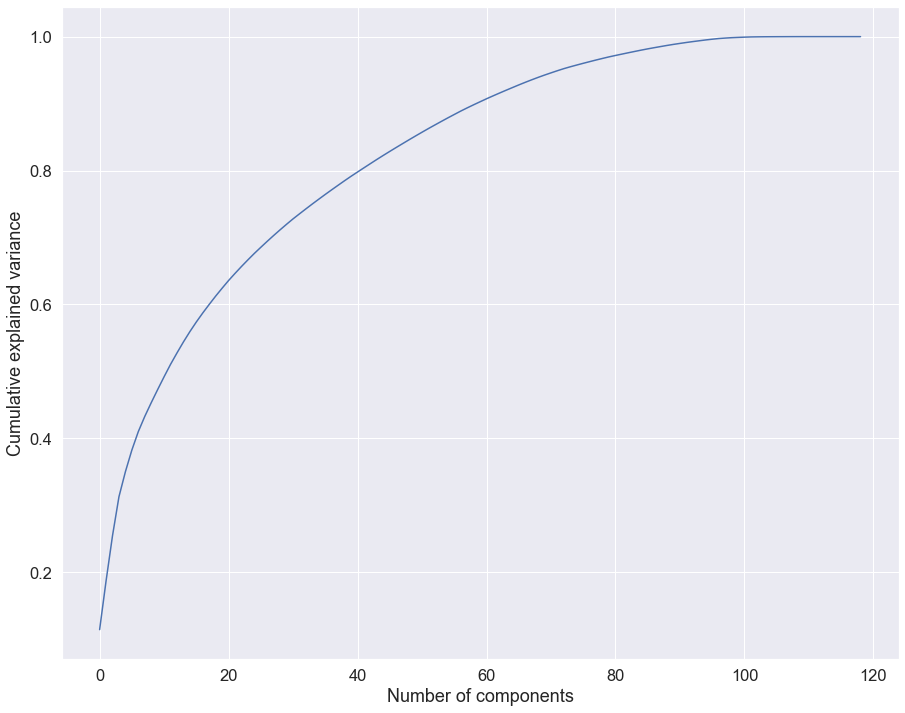

In [94]:
#****** Checking the screeplot ******* | Start 
%matplotlib inline
fig = plt.figure(figsize = (15,12))
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
#****** Checking the screeplot ******* | End 

In [95]:
## ****** Fit the X_train and X_test to the PCA object ****** | Starrt
#df_train_pca = pca.fit_transform(X_train_scaled)
#print(df_train_pca.shape)

#df_test_pca = pca.transform(X_test_scaled)
#print(df_test_pca.shape)
## ****** Fit the X_train and X_test to the PCA object ****** | End

<center> <b> <u> Comments: </u> </b> We can see that with <b> more than 40 features </b> we are able to explain more than 80% of the data, which is fair enough. We try to keep the number of features to this range so that our model dont become too much complex. <b> In our case we will proceed with 50 features.</b>

In [96]:
## ****** Fit the X_train and X_test to the PCA object with 50 features ****** | Start
#pca2 = PCA(n_components=45)
pca2 = PCA(n_components=50)
df_train_pca2 = pca2.fit_transform(X_train_)
print(df_train_pca2.shape)
df_test_pca2 = pca2.transform(X_test_)
print(df_test_pca2.shape)
df_validation_pca2 = pca2.transform(X_val)
print(df_validation_pca2.shape)
## ****** Fit the X_train and X_test to the PCA object with 50 features ****** | End

(36032, 50)
(15444, 50)
(1000, 50)


In [97]:
## ******* Get the PCA components in a dataframe ******* | Start
df_pca_val=pd.DataFrame(pca2.components_,columns=X_train.columns,index = ['PC-1'
                                                                      ,'PC-2'
                                                                      ,'PC-3'
                                                                     ,'PC-4'
                                                                     ,'PC-5'
                                                                     ,'PC-6'
                                                                     ,'PC-7'
                                                                     ,'PC-8'
                                                                     ,'PC-9'
                                                                     ,'PC-10'
                                                                     ,'PC-11'
                                                                     ,'PC-12'
                                                                     ,'PC-13'
                                                                     ,'PC-14'
                                                                     ,'PC-15'
                                                                     ,'PC-16'
                                                                     ,'PC-17'
                                                                     ,'PC-18'
                                                                     ,'PC-19'
                                                                     ,'PC-20'
                                                                     ,'PC-21'
                                                                     ,'PC-22'
                                                                     ,'PC-23'
                                                                     ,'PC-24'
                                                                     ,'PC-25'
                                                                     ,'PC-26'
                                                                     ,'PC-27'
                                                                     ,'PC-28'
                                                                     ,'PC-29'
                                                                     ,'PC-30'
                                                                     ,'PC-31'
                                                                     ,'PC-32'
                                                                     ,'PC-33'
                                                                     ,'PC-34'
                                                                     ,'PC-35'
                                                                     ,'PC-36'
                                                                     ,'PC-37'
                                                                     ,'PC-38'
                                                                     ,'PC-39'
                                                                     ,'PC-40'
                                                                     ,'PC-41'
                                                                     ,'PC-42'
                                                                     ,'PC-43'
                                                                     ,'PC-44'
                                                                     ,'PC-45'
                                                                     ,'PC-46'
                                                                     ,'PC-47'
                                                                     ,'PC-48'
                                                                     ,'PC-49'
                                                                     ,'PC-50'])
df_pca_val
## ******* Get the PCA components in a dataframe ******* | End

total_rech_num_6  total_rech_num_7  total_rech_num_8  max_rech_amt_6  \
PC-1          -0.075786         -0.046563          0.002268        0.069975   
PC-2          -0.076518         -0.091798         -0.082333        0.215724   
PC-3           0.047487         -0.004137         -0.105884        0.001063   
PC-4           0.227119          0.240487          0.199411       -0.009887   
PC-5           0.037368         -0.006215         -0.050979       -0.027324   
PC-6           0.078312         -0.025246         -0.082821        0.047502   
PC-7          -0.075102         -0.075772         -0.035776        0.232703   
PC-8           0.008952         -0.069875         -0.076713        0.134216   
PC-9           0.053352         -0.004073          0.004712       -0.067868   
PC-10          0.131754          0.076330          0.046092       -0.088983   
PC-11          0.098218         -0.003583          0.067914       -0.011667   
PC-12         -0.000162          0.030961         -0.011496        0.016853   
PC-13         -0.050444         -0.156221         -0.131210        0.122768   
PC-14         -0.098740         -0.093851          0.087280        0.067342   
PC-15          0.078718          0.059474          0.043831       -0.035091   
PC-16          0.057694          0.078464          0.094442        0.047016   
PC-17          0.127813          0.141072          0.113343       -0.022839   
PC-18         -0.011547         -0.051639         -0.034816       -0.000443   
PC-19          0.023621          0.004345         -0.018232       -0.053696   
PC-20          0.045074         -0.001026          0.059062        0.144153   
PC-21          0.023689          0.060969          0.007147        0.055079   
PC-22         -0.046591         -0.106655         -0.131369       -0.134650   
PC-23          0.259743          0.164491          0.056557        0.038326   
PC-24         -0.186126         -0.117958         -0.129218       -0.162046   
PC-25         -0.138222         -0.082637         -0.050626       -0.034752   
PC-26         -0.061173          0.008777         -0.005615       -0.040154   
PC-27          0.027176         -0.074067          0.026434       -0.144335   
PC-28         -0.125340         -0.002509         -0.012843        0.121832   
PC-29          0.146579          0.063252          0.074488       -0.179801   
PC-30         -0.019128          0.041563          0.011737       -0.084118   
PC-31         -0.179151         -0.061127         -0.059791        0.025446   
PC-32          0.049174         -0.029464         -0.024546        0.066390   
PC-33          0.117009          0.081437          0.078839        0.058545   
PC-34         -0.029159         -0.013590         -0.027509        0.088265   
PC-35         -0.113149         -0.121829         -0.050790       -0.062898   
PC-36         -0.005918          0.085677          0.057377       -0.012385   
PC-37         -0.080191         -0.130229         -0.089469        0.010958   
PC-38         -0.198249         -0.176444         -0.137566       -0.086532   
PC-39          0.063291          0.088214          0.057361       -0.036193   
PC-40          0.092821          0.160530          0.133116        0.062993   
PC-41          0.053761          0.110568          0.091778        0.058105   
PC-42          0.067956          0.075207          0.051478       -0.052531   
PC-43          0.086309          0.072140          0.095028        0.027476   
PC-44          0.002338         -0.027826         -0.046635        0.013565   
PC-45         -0.077674         -0.058983         -0.032978       -0.050414   
PC-46         -0.028336          0.021078         -0.014005        0.026169   
PC-47          0.060847         -0.012800         -0.027015       -0.001117   
PC-48         -0.074643         -0.019748          0.011768       -0.022034   
PC-49          0.028452         -0.056566         -0.043148       -0.033379   
PC-50          0.004845         -0.075645         -0.0211

In [98]:
df_validation_pca2

array([[-1.72944377,  0.23983141, -1.16240937, ..., -0.05682533,
        -0.47017329,  1.14504408],
       [ 1.84344891, -6.00456545,  2.2160445 , ..., -0.21122685,
         0.18471056, -0.56580635],
       [ 2.04945898,  0.04145859, -3.48975342, ...,  0.05834568,
        -0.53591741,  1.51907993],
       ...,
       [ 2.29805064, -0.0590201 , -4.45327596, ..., -0.09923908,
        -0.66932047, -0.96980131],
       [ 0.5148648 , -2.58473581, -3.11303785, ...,  0.95577013,
         0.2151299 ,  0.43300203],
       [-1.27209654, -0.08789393, -2.22704246, ...,  0.41720867,
        -1.12459578,  0.37360223]])

In [99]:
# ******** Check the correlations ********* | Start
corrmat = np.corrcoef(df_train_pca2.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",round(corrmat_nodiag.max(),4), ", min corr: ", round(corrmat_nodiag.min(),4))

# ******** Check the correlations ********* | Start

max corr: 0.0 , min corr:  -0.0


### 3.6. Logistic Regression

In [100]:
# ****** Let's run the model using the selected variables ****** | Start

logsk = LogisticRegression(C=1e9)
logsk.fit(X_train_, y_train_)

# Predicted probabilities
y_pred = logsk.predict(X_test_)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

# ****** Let's run the model using the selected variables ****** | End

In [101]:
# ******* Printing confusion matrix, accuracy and classification report ******** | Start
print(confusion_matrix(y_test_,y_pred))
print("\n Logistic Regression accuracy with PCA: ",round(accuracy_score(y_test_,y_pred),2))
print("\n ********** Classification Report ********** ")
#print("\n ******************************************* \n")
print(classification_report(y_test_,y_pred))
# ******* Printing confusion matrix, accuracy and classification report ******** | End

[[6502 1220]
 [1048 6674]]

 Logistic Regression accuracy with PCA:  0.85

 ********** Classification Report ********** 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7722
           1       0.85      0.86      0.85      7722

    accuracy                           0.85     15444
   macro avg       0.85      0.85      0.85     15444
weighted avg       0.85      0.85      0.85     15444



In [102]:
# ******** Let's run the model using the selected variables ********** | Start
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca2, y_train_)

# Predicted probabilities
y_pred2 = logsk1.predict(df_test_pca2)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred2)
# ******** Let's run the model using the selected variables ********** | Start

In [103]:
# Printing confusion matrix
print(confusion_matrix(y_test_,y_pred2))

[[6215 1507]
 [1084 6638]]


In [104]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test_,y_pred2))
print(classification_report(y_test_,y_pred2))

Logistic Regression accuracy with PCA:  0.8322325822325822
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      7722
           1       0.81      0.86      0.84      7722

    accuracy                           0.83     15444
   macro avg       0.83      0.83      0.83     15444
weighted avg       0.83      0.83      0.83     15444



<center> <b> Comments </b></center>
<br> The Accuracy, Precision and Recall for the Logistic Regression model built with 45 features (as selected using PCA) is 0.8 respectively, which seems to be descent, but we will use the RFE technique to check features and also we will check the multicollienarity with VIF

In [105]:
### ******* Get the AUC Score ******* | Start
pred_probs_test=logsk1.predict_proba(df_test_pca2)[:,1]
roc_auc = metrics.roc_auc_score(y_test_,pred_probs_test)
print(round(roc_auc,2))
### ******* Get the AUC Score ******* | End

0.9


<Figure size 1080x864 with 0 Axes>

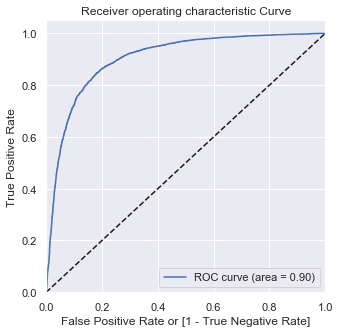

In [106]:
## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test_,pred_probs_test, drop_intermediate = False )
draw_roc(y_test_,pred_probs_test)
## Plot ROC Curve| End

#### 3.6.1 Validating the model on validation dataset

[[878  17]
 [ 59  46]]
Logistic Regression accuracy with PCA:  0.924
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       895
           1       0.73      0.44      0.55       105

    accuracy                           0.92      1000
   macro avg       0.83      0.71      0.75      1000
weighted avg       0.92      0.92      0.92      1000

0.92


<Figure size 1080x864 with 0 Axes>

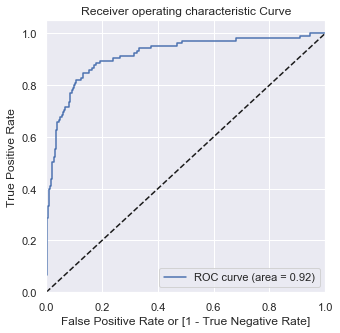

In [107]:
# ******** Let's run the model using the selected variables ********** | Start
logsk3 = LogisticRegression(C=1e9)
logsk3.fit(df_validation_pca2, y_val)

# Predicted probabilities
y_pred3 = logsk3.predict(df_validation_pca2)
# Converting y_pred to a dataframe which is an array
y_pred_val_df = pd.DataFrame(y_pred3)
# ******** Let's run the model using the selected variables ********** | End

# Printing confusion matrix
print(confusion_matrix(y_val,y_pred3))

print("Logistic Regression accuracy with PCA: ",accuracy_score(y_val,y_pred3))
print(classification_report(y_val,y_pred3))

### ******* Get the AUC Score ******* | Start
pred_probs_val=logsk3.predict_proba(df_validation_pca2)[:,1]
roc_auc = metrics.roc_auc_score(y_val,pred_probs_val)
print(round(roc_auc,2))
### ******* Get the AUC Score ******* | End

## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_val,pred_probs_val, drop_intermediate = False )
draw_roc(y_val,pred_probs_val)
## Plot ROC Curve| End

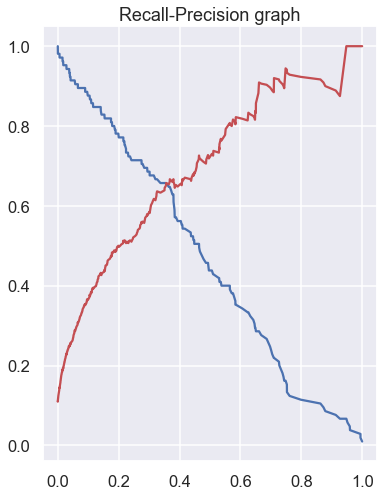

In [108]:
## Building precision and recall curve | Start
precision, recall, thresholds = precision_recall_curve(y_val,pred_probs_val)
## Building precision and recall curve | End

## Plot the graph to find the optimal cutoff point \ Start
plt.figure(figsize=(6,8))
sns.set_style("darkgrid")
sns.set_context('talk')
plt.plot(thresholds, recall[:-1], "b-")
plt.plot(thresholds, precision[:-1], "r-")
plt.title('Recall-Precision graph')
plt.show()
## Plot the graph to find the optimal cutoff point \ End

In [109]:
confusion_matrix(y_val,y_pred3)

array([[878,  17],
       [ 59,  46]])

In [110]:
## ******* Checking the Sensitivity and Specificity ******* | Start 
cp = confusion_matrix(y_val,y_pred3)
sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
precision = cp[1,1]/(cp[0,1]+cp[1,1])
print("Sensitivity: ", round(sensitivity,2))
print("Specificity: ",round(specificity,2))
#print("AUC Score: ", round(metrics.roc_auc_score(y_val,y_pred3),2)) 
print("Precision: ",round(precision,2))
print("f1 Score: ",round(metrics.f1_score(y_val,y_pred3),2))
print(cp)
## ******* Checking the Sensitivity and Specificity ******* | End 

Sensitivity:  0.44
Specificity:  0.98
Precision:  0.73
f1 Score:  0.55
[[878  17]
 [ 59  46]]


In [111]:
### ****** Show the coefficients for each of the Principal components ****** | Start
df_pca_val
### ****** Show the coefficients for each of the Principal components ****** | End

total_rech_num_6  total_rech_num_7  total_rech_num_8  max_rech_amt_6  \
PC-1          -0.075786         -0.046563          0.002268        0.069975   
PC-2          -0.076518         -0.091798         -0.082333        0.215724   
PC-3           0.047487         -0.004137         -0.105884        0.001063   
PC-4           0.227119          0.240487          0.199411       -0.009887   
PC-5           0.037368         -0.006215         -0.050979       -0.027324   
PC-6           0.078312         -0.025246         -0.082821        0.047502   
PC-7          -0.075102         -0.075772         -0.035776        0.232703   
PC-8           0.008952         -0.069875         -0.076713        0.134216   
PC-9           0.053352         -0.004073          0.004712       -0.067868   
PC-10          0.131754          0.076330          0.046092       -0.088983   
PC-11          0.098218         -0.003583          0.067914       -0.011667   
PC-12         -0.000162          0.030961         -0.011496        0.016853   
PC-13         -0.050444         -0.156221         -0.131210        0.122768   
PC-14         -0.098740         -0.093851          0.087280        0.067342   
PC-15          0.078718          0.059474          0.043831       -0.035091   
PC-16          0.057694          0.078464          0.094442        0.047016   
PC-17          0.127813          0.141072          0.113343       -0.022839   
PC-18         -0.011547         -0.051639         -0.034816       -0.000443   
PC-19          0.023621          0.004345         -0.018232       -0.053696   
PC-20          0.045074         -0.001026          0.059062        0.144153   
PC-21          0.023689          0.060969          0.007147        0.055079   
PC-22         -0.046591         -0.106655         -0.131369       -0.134650   
PC-23          0.259743          0.164491          0.056557        0.038326   
PC-24         -0.186126         -0.117958         -0.129218       -0.162046   
PC-25         -0.138222         -0.082637         -0.050626       -0.034752   
PC-26         -0.061173          0.008777         -0.005615       -0.040154   
PC-27          0.027176         -0.074067          0.026434       -0.144335   
PC-28         -0.125340         -0.002509         -0.012843        0.121832   
PC-29          0.146579          0.063252          0.074488       -0.179801   
PC-30         -0.019128          0.041563          0.011737       -0.084118   
PC-31         -0.179151         -0.061127         -0.059791        0.025446   
PC-32          0.049174         -0.029464         -0.024546        0.066390   
PC-33          0.117009          0.081437          0.078839        0.058545   
PC-34         -0.029159         -0.013590         -0.027509        0.088265   
PC-35         -0.113149         -0.121829         -0.050790       -0.062898   
PC-36         -0.005918          0.085677          0.057377       -0.012385   
PC-37         -0.080191         -0.130229         -0.089469        0.010958   
PC-38         -0.198249         -0.176444         -0.137566       -0.086532   
PC-39          0.063291          0.088214          0.057361       -0.036193   
PC-40          0.092821          0.160530          0.133116        0.062993   
PC-41          0.053761          0.110568          0.091778        0.058105   
PC-42          0.067956          0.075207          0.051478       -0.052531   
PC-43          0.086309          0.072140          0.095028        0.027476   
PC-44          0.002338         -0.027826         -0.046635        0.013565   
PC-45         -0.077674         -0.058983         -0.032978       -0.050414   
PC-46         -0.028336          0.021078         -0.014005        0.026169   
PC-47          0.060847         -0.012800         -0.027015       -0.001117   
PC-48         -0.074643         -0.019748          0.011768       -0.022034   
PC-49          0.028452         -0.056566         -0.043148       -0.033379   
PC-50          0.004845         -0.075645         -0.0211

<center> <b> Final Comments after Logistic Regression </b> </center>

After executing the Logistic Regression using 50 features, we can observe that the model performed preety well on the test and validation data. We have held out 1000 records as a validation data. The below are the model parameters used along with the results.

<br>
<table>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'><center>Model training, No of features & prediction </center></th>
    </tr>
    <tr>
        <th bgcolor='grey' colspan='2'>Train Score</th>
        <td  colspan='2'>0.85</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3'  colspan='2'>No of Features</th>
        <td  colspan='2'>50</td>
    </tr>
    <tr>
        <th bgcolor='grey'  colspan='2'>Overall Prediction Accuracy (Validation Set)</th>
        <td  colspan='2'>0.93</td>
    </tr>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'><center>Class Wise - Precision, Recall Scores & F1-Score</center></th>
    </tr>
    <tr>
        <th bgcolor='grey'>Churn</th>
        <th bgcolor='grey'>Precision</th>
        <th bgcolor='grey'>Recall</th>
        <th bgcolor='grey'>F1-Score</th>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>0</td>
        <td bgcolor='#D7DCD4'>0.94</td>
        <td bgcolor='#D7DCD4'>0.98</td>
        <td bgcolor='#D7DCD4'>0.96</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>1</td>
        <td bgcolor='#f3f4f2'>0.76</td>
        <td bgcolor='#f3f4f2'>0.50</td>
        <td bgcolor='#f3f4f2'>0.61</td>
    </tr>
    <tr>
        <th bgcolor='yellow' colspan='4'><center>The above scores are all on the Validation data set</center></th>
    </tr>
</table>


<br> From the above table we got a good result on the unseen data and <b> most importantly the model performed very well on the Actual Churn cases(Predicted as 1 vs Original 1), also the ROC Curve has 92% of AUC score. </b>

### 3.7. Logistic Regression with RFE
<br> <b> In this approach we will try to reach to a model using RFE and checking the VIF </b>

In [112]:
## ****** Get the X and Y datapoints ****** | Start
X = df_out.drop(['churn'],axis=1)
y = df_out['churn']
## ****** Get the X and Y datapoints ****** | End

## ****** Split the data into train and test dataset ****** | Start
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)
## ****** Split the data into train and test dataset ****** | End

# ****** Perform scaling ****** | Start
#scaler = preprocessing.StandardScaler().fit(X)
X_train_scaled = (X_train - X_train.mean())/X_train.std()
X_test_scaled = (X_test - X_test.mean())/X_test.std()
# ****** Perform scaling ****** | End

##. **** Create Logistic regression model and fit the data into it ****** | Start
logreg = LogisticRegression()
rfe=RFE(logreg,50) # We select course value here
rfe=rfe.fit(X_train_scaled,y_train)
# Get the rfe | End
rfe.support_
##. **** Create Logistic regression model and fit the data into it ****** | Start

(20221, 119)
(8667, 119)


array([False,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True])

In [113]:
len(rfe.support_)

119

In [114]:
## Zip up the corresponding column selection and the rfe score | Start
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
## Zip up the corresponding column selection and the rfe score | End

[('total_rech_num_6', False, 60),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_6', False, 40),
 ('max_rech_amt_7', False, 41),
 ('max_rech_amt_8', False, 8),
 ('last_day_rch_amt_6', False, 21),
 ('last_day_rch_amt_7', False, 22),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_6', False, 2),
 ('total_rech_data_7', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_6', False, 57),
 ('max_rech_data_7', False, 23),
 ('max_rech_data_8', True, 1),
 ('count_rech_2g_6', False, 56),
 ('count_rech_2g_7', True, 1),
 ('count_rech_2g_8', True, 1),
 ('count_rech_3g_6', False, 4),
 ('count_rech_3g_7', True, 1),
 ('count_rech_3g_8', True, 1),
 ('av_rech_amt_data_6', True, 1),
 ('av_rech_amt_data_7', False, 6),
 ('av_rech_amt_data_8', True, 1),
 ('aon', True, 1),
 ('sep_vbc_3g', True, 1),
 ('total_data_rech_amt_6', False, 38),
 ('total_data_rech_amt_7', False, 63),
 ('total_data_rech_amt_8', True, 1),
 ('Total Recharge_6', False, 39),
 ('Total Recharge_

In [115]:
# Get the columns selected by RFE | Start
rfe_col=X_train_scaled.columns[rfe.support_]
# Get the columns selected by RFE | End
rfe_col

Index(['total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8', 'aon',
       'sep_vbc_3g', 'total_data_rech_amt_8', 'Total Recharge_7',
       'Total Recharge_8', 'rech_days_left_7', 'rech_days_left_8',
       'sachet_3g_6_7_avg', 'offnet_mou_6_7_avg', 'roam_og_mou_6_7_avg',
       'roam_og_mou_flag', 'loc_og_t2f_mou_flag', 'arpu_6_7_avg', 'arpu_flag',
       'onnet_mou_6_7_avg', 'sachet_2g_6_7_avg', 'std_og_t2t_mou_6_7_avg',
       'std_og_t2f_mou_flag', 'loc_ic_t2t_mou_6_7_avg',
       'loc_ic_t2m_mou_6_7_avg', 'total_og_mou_6_7_avg', 'total_og_mou_flag',
       'loc_ic_mou_6_7_avg', 'loc_ic_mou_flag', 'std_ic_mou_6_7_avg',
       'std_ic_t2f_mou_flag', 'spl_ic_mou_flag', 'isd_ic_mou_6_7_avg',
       'ic_others_flag', 'vol_2g_mb_flag', 'vol_3g_mb_flag', 'AVG_arpu_2g_6_7',
       

In [116]:
len(rfe_col)

50

In [117]:
### ******* Get the features with coefficients ********* | Start
refecoeff = rfe.estimator_.coef_
coeffrfe=[]
for i in range(len(refecoeff[0][:])):
    coeffrfe.append(refecoeff[0][i])
len(coeffrfe)
rfeColsdf = pd.DataFrame(list(zip(X_train_scaled.columns[rfe.support_],coeffrfe))).rename(columns={0:'ColName',1:'coeff'})
rfeColsdf
### ******* Get the features with coefficients ********* | Start

ColName     coeff
0         total_rech_num_7  0.271699
1         total_rech_num_8 -0.820362
2       last_day_rch_amt_8 -0.354514
3        total_rech_data_7 -0.653236
4        total_rech_data_8 -1.355269
5          max_rech_data_8 -0.287134
6          count_rech_2g_7  0.586159
7          count_rech_2g_8  1.095536
8          count_rech_3g_7  0.274955
9          count_rech_3g_8  0.516261
10      av_rech_amt_data_6 -0.181463
11      av_rech_amt_data_8  0.298786
12                     aon -0.312540
13              sep_vbc_3g -2.408863
14   total_data_rech_amt_8  1.310733
15        Total Recharge_7 -0.287447
16        Total Recharge_8 -1.531143
17        rech_days_left_7  0.145068
18        rech_days_left_8  0.260523
19       sachet_3g_6_7_avg  0.130066
20      offnet_mou_6_7_avg  1.814327
21     roam_og_mou_6_7_avg -0.162522
22        roam_og_mou_flag -0.259526
23     loc_og_t2f_mou_flag  0.357222
24            arpu_6_7_avg  0.577914
25               arpu_flag -0.175966
26       onnet_mou_6_7_avg  1.938081
27       sachet_2g_6_7_avg  0.245855
28  std_og_t2t_mou_6_7_avg -0.221567
29     std_og_t2f_mou_flag  0.177605
30  loc_ic_t2t_mou_6_7_avg  0.154457
31  loc_ic_t2m_mou_6_7_avg  0.313709
32    total_og_mou_6_7_avg -2.608971
33       total_og_mou_flag  0.361073
34      loc_ic_mou_6_7_avg  1.599880
35         loc_ic_mou_flag -0.173647
36      std_ic_mou_6_7_avg  0.943731
37     std_ic_t2f_mou_flag  0.244376
38         spl_ic_mou_flag  0.274390
39      isd_ic_mou_6_7_avg  0.516216
40          ic_others_flag  0.197798
41          vol_2g_mb_flag  0.205676
42          vol_3g_mb_flag  0.180328
43         AVG_arpu_2g_6_7  0.213034
44             vbc_3g_flag  0.206729
45      loc_og_mou_6_7_avg -0.424559
46    total_ic_mou_6_7_avg -2.488438
47       total_ic_mou_flag  0.491483
48         fb_user_6_7_avg  0.191122
49            fb_user_flag -0.135226

<center> <b> Execution 1 </b> </center>

In [118]:
## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
# Get the columns selected by RFE | Start
rfe_col=X_train_scaled.columns[rfe.support_]
# Get the columns selected by RFE | End

# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
vif_df
# ****** Get the VIF of each variable ****** | End

Features     vif
32    total_og_mou_6_7_avg  880.29
46    total_ic_mou_6_7_avg  740.21
34      loc_ic_mou_6_7_avg  577.45
20      offnet_mou_6_7_avg  430.12
26       onnet_mou_6_7_avg  402.95
3        total_rech_data_7  157.55
4        total_rech_data_8  131.15
6          count_rech_2g_7  118.70
36      std_ic_mou_6_7_avg  115.07
7          count_rech_2g_8   94.81
16        Total Recharge_8   44.26
14   total_data_rech_amt_8   40.90
8          count_rech_3g_7   40.16
39      isd_ic_mou_6_7_avg   35.76
9          count_rech_3g_8   28.16
31  loc_ic_t2m_mou_6_7_avg   26.11
21     roam_og_mou_6_7_avg   17.73
30  loc_ic_t2t_mou_6_7_avg   14.12
28  std_og_t2t_mou_6_7_avg   10.60
11      av_rech_amt_data_8    7.60
27       sachet_2g_6_7_avg    7.52
43         AVG_arpu_2g_6_7    5.89
24            arpu_6_7_avg    5.49
48         fb_user_6_7_avg    5.42
5          max_rech_data_8    5.39
19       sachet_3g_6_7_avg    4.40
10      av_rech_amt_data_6    4.27
15        Total Recharge_7    4.25
1         total_rech_num_8    4.15
45      loc_og_mou_6_7_avg    4.15
0         total_rech_num_7    3.55
47       total_ic_mou_flag    2.43
35         loc_ic_mou_flag    2.28
42          vol_3g_mb_flag    2.06
25               arpu_flag    1.80
44             vbc_3g_flag    1.65
41          vol_2g_mb_flag    1.61
33       total_og_mou_flag    1.60
49            fb_user_flag    1.57
2       last_day_rch_amt_8    1.46
18        rech_days_left_8    1.31
17        rech_days_left_7    1.28
12                     aon    1.16
23     loc_og_t2f_mou_flag    1.11
37     std_ic_t2f_mou_flag    1.10
29     std_og_t2f_mou_flag    1.09
22        roam_og_mou_flag    1.08
38         spl_ic_mou_flag    1.06
40          ic_others_flag    1.04
13              sep_vbc_3g    1.04

In [120]:
## ****** Prediction ******** \ Start
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

[[7688   34]
 [ 854   91]]


In [121]:
## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7722
           1       0.73      0.10      0.17       945

    accuracy                           0.90      8667
   macro avg       0.81      0.55      0.56      8667
weighted avg       0.88      0.90      0.86      8667



<center><b> Comments after execution 1 </b></center>
The accuracy seems OK, but we have a high VIF to handle, where <b> total_og_mou_6_7_avg </b> is having a VIF of 880. Thus we drop the column

<center><b> Execution 2 </b></center>

In [122]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('total_og_mou_6_7_avg',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End

# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
print(vif_df)
# ****** Get the VIF of each variable ****** | End

## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

                  Features     vif
45    total_ic_mou_6_7_avg  280.10
33      loc_ic_mou_6_7_avg  242.45
3        total_rech_data_7  157.53
4        total_rech_data_8  131.01
6          count_rech_2g_7  118.69
7          count_rech_2g_8   94.69
35      std_ic_mou_6_7_avg   44.36
16        Total Recharge_8   44.02
14   total_data_rech_amt_8   40.68
8          count_rech_3g_7   40.16
9          count_rech_3g_8   28.13
31  loc_ic_t2m_mou_6_7_avg   26.10
38      isd_ic_mou_6_7_avg   14.25
30  loc_ic_t2t_mou_6_7_avg   14.11
26       onnet_mou_6_7_avg   11.72
28  std_og_t2t_mou_6_7_avg   10.59
11      av_rech_amt_data_8    7.60
27       sachet_2g_6_7_avg    7.52
42         AVG_arpu_2g_6_7    5.87
24            arpu_6_7_avg    5.42
47         fb_user_6_7_avg    5.42
5          max_rech_data_8    5.37
19       sachet_3g_6_7_avg    4.40
10      av_rech_amt_data_6    4.27
15        Total Recharge_7    4.25
1         total_rech_num_8    4.15
44      loc_og_mou_6_7_avg    4.15
0         total_rech

<center><b> Comments after execution 2 </b></center> <br>
The overall accuracy has reduced and the VIF of the columns still seems high, we can try with one more run and check how the model performs lets try to remove the column <b> total_ic_mou_6_7_avg </b>

<center><b> Execution 3 </b></center> <br>

In [123]:

# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('total_ic_mou_6_7_avg',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
print(vif_df)
# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

                  Features     vif
3        total_rech_data_7  157.53
4        total_rech_data_8  130.91
6          count_rech_2g_7  118.69
7          count_rech_2g_8   94.59
33      loc_ic_mou_6_7_avg   47.46
16        Total Recharge_8   43.95
14   total_data_rech_amt_8   40.61
8          count_rech_3g_7   40.16
9          count_rech_3g_8   28.11
31  loc_ic_t2m_mou_6_7_avg   26.08
30  loc_ic_t2t_mou_6_7_avg   14.09
26       onnet_mou_6_7_avg   11.70
28  std_og_t2t_mou_6_7_avg   10.58
11      av_rech_amt_data_8    7.59
27       sachet_2g_6_7_avg    7.52
42         AVG_arpu_2g_6_7    5.85
46         fb_user_6_7_avg    5.42
24            arpu_6_7_avg    5.40
5          max_rech_data_8    5.35
19       sachet_3g_6_7_avg    4.40
10      av_rech_amt_data_6    4.27
15        Total Recharge_7    4.25
1         total_rech_num_8    4.15
44      loc_og_mou_6_7_avg    4.14
0         total_rech_num_7    3.54
45       total_ic_mou_flag    2.43
34         loc_ic_mou_flag    2.27
41          vol_3g_m

In [124]:
vif_df

Features     vif
3        total_rech_data_7  157.53
4        total_rech_data_8  130.91
6          count_rech_2g_7  118.69
7          count_rech_2g_8   94.59
33      loc_ic_mou_6_7_avg   47.46
16        Total Recharge_8   43.95
14   total_data_rech_amt_8   40.61
8          count_rech_3g_7   40.16
9          count_rech_3g_8   28.11
31  loc_ic_t2m_mou_6_7_avg   26.08
30  loc_ic_t2t_mou_6_7_avg   14.09
26       onnet_mou_6_7_avg   11.70
28  std_og_t2t_mou_6_7_avg   10.58
11      av_rech_amt_data_8    7.59
27       sachet_2g_6_7_avg    7.52
42         AVG_arpu_2g_6_7    5.85
46         fb_user_6_7_avg    5.42
24            arpu_6_7_avg    5.40
5          max_rech_data_8    5.35
19       sachet_3g_6_7_avg    4.40
10      av_rech_amt_data_6    4.27
15        Total Recharge_7    4.25
1         total_rech_num_8    4.15
44      loc_og_mou_6_7_avg    4.14
0         total_rech_num_7    3.54
45       total_ic_mou_flag    2.43
34         loc_ic_mou_flag    2.27
41          vol_3g_mb_flag    2.06
20      offnet_mou_6_7_avg    1.91
25               arpu_flag    1.80
43             vbc_3g_flag    1.65
40          vol_2g_mb_flag    1.61
32       total_og_mou_flag    1.60
47            fb_user_flag    1.57
2       last_day_rch_amt_8    1.46
18        rech_days_left_8    1.31
17        rech_days_left_7    1.27
21     roam_og_mou_6_7_avg    1.21
12                     aon    1.16
23     loc_og_t2f_mou_flag    1.11
29     std_og_t2f_mou_flag    1.09
36     std_ic_t2f_mou_flag    1.09
22        roam_og_mou_flag    1.07
37         spl_ic_mou_flag    1.06
35      std_ic_mou_6_7_avg    1.05
13              sep_vbc_3g    1.04
39          ic_others_flag    1.03
38      isd_ic_mou_6_7_avg    1.02

<center><b> Comments after execution 3 </b></center> <br>
The overall accuracy is same and the VIF of the columns still seems high, we can try with one more run and check how the model performs lets try to remove the column <b> total_rech_data_7 </b>

<center><b> Execution 4 </b></center> <br>

In [125]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('total_rech_data_7',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1,class_weight={0:0.1, 1: 0.9})
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
print(vif_df)
# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

                  Features     vif
3        total_rech_data_8  127.18
6          count_rech_2g_8   92.04
32      loc_ic_mou_6_7_avg   47.45
15        Total Recharge_8   43.95
13   total_data_rech_amt_8   40.61
8          count_rech_3g_8   27.30
30  loc_ic_t2m_mou_6_7_avg   26.07
29  loc_ic_t2t_mou_6_7_avg   14.09
25       onnet_mou_6_7_avg   11.68
27  std_og_t2t_mou_6_7_avg   10.57
5          count_rech_2g_7    8.89
7          count_rech_3g_7    8.40
10      av_rech_amt_data_8    7.59
26       sachet_2g_6_7_avg    7.50
41         AVG_arpu_2g_6_7    5.84
23            arpu_6_7_avg    5.40
4          max_rech_data_8    5.35
18       sachet_3g_6_7_avg    4.35
14        Total Recharge_7    4.24
9       av_rech_amt_data_6    4.16
1         total_rech_num_8    4.14
43      loc_og_mou_6_7_avg    4.14
0         total_rech_num_7    3.54
45         fb_user_6_7_avg    3.15
44       total_ic_mou_flag    2.43
33         loc_ic_mou_flag    2.27
40          vol_3g_mb_flag    2.06
19      offnet_mou_6

In [126]:
#pred_probs_test = classifier.predict_proba(X_test_scaled[rfe_col])[:,1]
#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

<center><b> Comments after execution 4 </b></center> <br>
The overall accuracy is same and the VIF of the columns still seems high, we can try with one more run and check how the model performs lets try to remove the column <b> total_rech_data_8 </b>

<center><b> Execution 5 </b></center>

In [127]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('total_rech_data_8',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ******\ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)
print(vif_df)
# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

                  Features    vif
31      loc_ic_mou_6_7_avg  47.45
14        Total Recharge_8  43.94
12   total_data_rech_amt_8  40.42
29  loc_ic_t2m_mou_6_7_avg  26.07
28  loc_ic_t2t_mou_6_7_avg  14.09
24       onnet_mou_6_7_avg  11.68
26  std_og_t2t_mou_6_7_avg  10.57
4          count_rech_2g_7   8.89
6          count_rech_3g_7   8.37
9       av_rech_amt_data_8   7.51
25       sachet_2g_6_7_avg   7.48
40         AVG_arpu_2g_6_7   5.70
22            arpu_6_7_avg   5.40
3          max_rech_data_8   4.94
17       sachet_3g_6_7_avg   4.35
13        Total Recharge_7   4.24
8       av_rech_amt_data_6   4.16
42      loc_og_mou_6_7_avg   4.14
1         total_rech_num_8   4.13
5          count_rech_2g_8   3.88
0         total_rech_num_7   3.52
7          count_rech_3g_8   3.37
44         fb_user_6_7_avg   2.73
43       total_ic_mou_flag   2.43
32         loc_ic_mou_flag   2.27
39          vol_3g_mb_flag   2.04
18      offnet_mou_6_7_avg   1.91
23               arpu_flag   1.80
41            

<center><b> Comments after execution 5 </b></center> <br>
The overall accuracy is still same and the VIF of the columns still seems high, we can try with one more run and check how the model performs lets try to remove the column <b> loc_ic_mou_6_7_avg </b>

<center><b> Execution 6 </b></center> <br>

In [128]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('loc_ic_mou_6_7_avg',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7526  196]
 [ 614  331]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7722
           1       0.63      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features    vif
14        Total Recharge_8  43.94
12   total_data_rech_amt_8  40.42
24       onnet_mou_6_7_avg  11.67
26  std_og_t2t_mou_6_7_avg  10.56
4          count_rech_2g_7   8.89
6          count_rech_3g_7   8.37
9       av_rech_amt_data_8   7.51
25       sachet_2g_6_7_avg   7.48
39         AVG_arpu_2g_6_7   5.70
22            arpu_6_7_avg   5.40
3          max_rech_data_8   4.94
17       sachet_3g_6_7_avg   4.35
13        Total Recharge_7   4.24
8       av_rech_amt_data_6   4.16
41      loc_og_mou_6_7_avg   4.14
1         total_rech_num_8   4.13
5   

<center><b> Comments after execution 6 </b></center> <br>
The overall accuracy is still same and the VIF of the columns have decreased considerabely, we can try with one more run and check how the model performs lets try to remove the column <b> Total Recharge_8 </b>

<center><b> Execution 7 </b></center>

In [129]:

# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('Total Recharge_8',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7530  192]
 [ 614  331]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.63      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features    vif
23       onnet_mou_6_7_avg  11.67
25  std_og_t2t_mou_6_7_avg  10.55
4          count_rech_2g_7   8.89
6          count_rech_3g_7   8.37
24       sachet_2g_6_7_avg   7.47
9       av_rech_amt_data_8   7.43
38         AVG_arpu_2g_6_7   5.65
3          max_rech_data_8   4.94
12   total_data_rech_amt_8   4.43
16       sachet_3g_6_7_avg   4.35
13        Total Recharge_7   4.24
8       av_rech_amt_data_6   4.14
40      loc_og_mou_6_7_avg   4.14
5          count_rech_2g_8   3.80
1         total_rech_num_8   3.56
7          count_rech_3g_8   3.36
0   

<center><b> Comments after execution 7 </b></center> <br>
The overall accuracy is still same and the VIF of the columns have decreased considerabely, we can try with one more run and check how the model performs lets try to remove the column <b> onnet_mou_6_7_avg </b>

<center><b> Execution 8 </b></center>

In [130]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('onnet_mou_6_7_avg',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ******\ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ******\ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7531  191]
 [ 617  328]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.63      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features   vif
4          count_rech_2g_7  8.89
6          count_rech_3g_7  8.37
23       sachet_2g_6_7_avg  7.47
9       av_rech_amt_data_8  7.43
37         AVG_arpu_2g_6_7  5.65
3          max_rech_data_8  4.94
12   total_data_rech_amt_8  4.43
16       sachet_3g_6_7_avg  4.35
13        Total Recharge_7  4.24
8       av_rech_amt_data_6  4.14
5          count_rech_2g_8  3.80
1         total_rech_num_8  3.56
7          count_rech_3g_8  3.36
0         total_rech_num_7  3.30
41         fb_user_6_7_avg  2.73
40       total_ic_mou_flag  2.42
21            arpu_6_

<center><b> Comments after execution 8 </b></center> <br>
The overall accuracy is still same and the VIF of the columns almost are in range, we can try with one more run and check how the model performs lets try to remove the column <b> count_rech_2g_7 </b>

<center><b> Execution 9 </b></center>

In [131]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('count_rech_2g_7',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ******\ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7532  190]
 [ 616  329]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.63      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features   vif
5          count_rech_3g_7  7.96
8       av_rech_amt_data_8  7.43
36         AVG_arpu_2g_6_7  5.61
3          max_rech_data_8  4.92
11   total_data_rech_amt_8  4.40
15       sachet_3g_6_7_avg  4.31
7       av_rech_amt_data_6  4.12
4          count_rech_2g_8  3.57
1         total_rech_num_8  3.51
6          count_rech_3g_8  3.36
12        Total Recharge_7  3.34
22       sachet_2g_6_7_avg  3.25
0         total_rech_num_7  3.23
40         fb_user_6_7_avg  2.72
39       total_ic_mou_flag  2.42
28         loc_ic_mou_flag  2.27
20            arpu_6_

<center><b> Comments after execution 9 </b></center> <br>
The overall accuracy is still same and the VIF of the columns almost are in range, we can try with one more run and check how the model performs lets try to remove the column <b> count_rech_3g_7 </b>

<center><b> Execution 10 </b></center>

In [132]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('count_rech_3g_7',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7533  189]
 [ 616  329]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.64      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features   vif
7       av_rech_amt_data_8  7.42
3          max_rech_data_8  4.91
10   total_data_rech_amt_8  4.36
35         AVG_arpu_2g_6_7  4.17
6       av_rech_amt_data_6  3.62
4          count_rech_2g_8  3.57
1         total_rech_num_8  3.51
0         total_rech_num_7  3.23
21       sachet_2g_6_7_avg  3.14
5          count_rech_3g_8  3.11
11        Total Recharge_7  2.79
39         fb_user_6_7_avg  2.55
38       total_ic_mou_flag  2.42
27         loc_ic_mou_flag  2.27
19            arpu_6_7_avg  2.16
34          vol_3g_mb_flag  2.04
14       sachet_3g_6_

<center><b> Comments after execution 11 </b></center> <br>
The overall accuracy is still same and the VIF of the columns almost are in range, we can try with one more run and check how the model performs lets try to remove the column <b> av_rech_amt_data_8 </b>

<center><b> Execution 11 </b></center>

In [133]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('av_rech_amt_data_8',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)


[[7534  188]
 [ 615  330]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.64      0.35      0.45       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.90      8667




                  Features   vif
34         AVG_arpu_2g_6_7  4.07
6       av_rech_amt_data_6  3.59
4          count_rech_2g_8  3.57
1         total_rech_num_8  3.51
9    total_data_rech_amt_8  3.38
0         total_rech_num_7  3.23
20       sachet_2g_6_7_avg  3.14
5          count_rech_3g_8  3.07
10        Total Recharge_7  2.78
3          max_rech_data_8  2.72
38         fb_user_6_7_avg  2.55
37       total_ic_mou_flag  2.42
26         loc_ic_mou_flag  2.27
18            arpu_6_7_avg  2.16
33          vol_3g_mb_flag  2.00
13       sachet_3g_6_7_avg  1.75
14      offnet_mou_6_

<center><b> Comments after execution 11 </b></center> <br>
The overall accuracy is still same and the VIF of the columns <b> less than 5 </b>, we can try with one more run and check how the model performs lets try to remove the column <b> AVG_arpu_2g_6_7 </b>

<center><b> Execution 12 </b></center>

In [134]:
# Get the columns selected by RFE | Start
rfe_col=rfe_col.drop('AVG_arpu_2g_6_7',1)
# Get the columns selected by RFE | End

## ****** Fit the data with rfe columns  ****** \ Start
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train_scaled[rfe_col], y_train)
## ****** Fit the data with rfe columns  ****** \ End


# ****** Get the VIF of each variable ****** | Start
vif_df=pd.DataFrame()
vif_df['Features'] = X_train_scaled[rfe_col].columns
vif_df['vif'] = [variance_inflation_factor(X_train_scaled[rfe_col].values,i) for i in range(X_train_scaled[rfe_col].shape[1])]

vif_df['vif'] = round(vif_df['vif'], 2)
vif_df = vif_df.sort_values(by = "vif", ascending = False)

# ****** Get the VIF of each variable ****** | End


## ****** Prediction ******** \ Start
X_test_rfe = X_test_scaled[rfe_col].values

y_pred = classifier.predict(X_test_scaled[rfe_col])
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
## ****** Prediction ******** \ End

## ***** Accuracy and Classification report ****** | Start
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))
print(classification_report(y_test, y_pred))
## ***** Accuracy and Classification report ****** | End

print("\n\n")
print(vif_df)

[[7533  189]
 [ 621  324]]
Accuracy of logistic regression classifier on test set: 0.91
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7722
           1       0.63      0.34      0.44       945

    accuracy                           0.91      8667
   macro avg       0.78      0.66      0.70      8667
weighted avg       0.89      0.91      0.89      8667




                  Features   vif
4          count_rech_2g_8  3.57
1         total_rech_num_8  3.50
9    total_data_rech_amt_8  3.35
0         total_rech_num_7  3.23
5          count_rech_3g_8  2.95
20       sachet_2g_6_7_avg  2.88
3          max_rech_data_8  2.59
37         fb_user_6_7_avg  2.50
36       total_ic_mou_flag  2.42
26         loc_ic_mou_flag  2.27
10        Total Recharge_7  2.26
18            arpu_6_7_avg  2.15
6       av_rech_amt_data_6  2.01
33          vol_3g_mb_flag  1.98
13       sachet_3g_6_7_avg  1.73
14      offnet_mou_6_7_avg  1.67
34             vbc_3g

In [135]:
### ******* Get the AUC Score ******* | Start
pred_probs_test=classifier.predict_proba(X_test_scaled[rfe_col])[:,1]
roc_auc = metrics.roc_auc_score(y_test,pred_probs_test)
print(round(roc_auc,2))
### ******* Get the AUC Score ******* | End

0.88


<Figure size 1080x864 with 0 Axes>

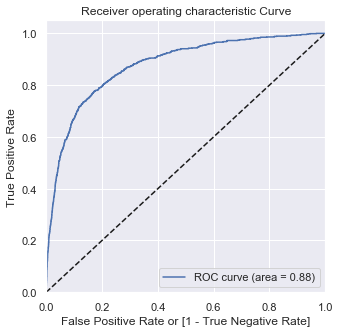

In [136]:
## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_probs_test, drop_intermediate = False )
draw_roc(y_test,pred_probs_test)
## Plot ROC Curve| End

In [137]:
rfecolsRemove = ['total_og_mou_6_7_avg', 
'total_ic_mou_6_7_avg',
'total_rech_data_7',
'total_rech_data_8', 
'loc_ic_mou_6_7_avg', 
'Total Recharge_8', 
'onnet_mou_6_7_avg', 
'count_rech_2g_7', 
'count_rech_3g_7', 
'av_rech_amt_data_8', 
'AVG_arpu_2g_6_7']

finalcols = rfeColsdf[~(rfeColsdf['ColName'].isin(rfecolsRemove) )]
print("The number of columns after feature selection using RFE:"+str(len(finalcols)))
print("\n\n")
print(finalcols)

The number of columns after feature selection using RFE:39



                   ColName     coeff
0         total_rech_num_7  0.271699
1         total_rech_num_8 -0.820362
2       last_day_rch_amt_8 -0.354514
5          max_rech_data_8 -0.287134
7          count_rech_2g_8  1.095536
9          count_rech_3g_8  0.516261
10      av_rech_amt_data_6 -0.181463
12                     aon -0.312540
13              sep_vbc_3g -2.408863
14   total_data_rech_amt_8  1.310733
15        Total Recharge_7 -0.287447
17        rech_days_left_7  0.145068
18        rech_days_left_8  0.260523
19       sachet_3g_6_7_avg  0.130066
20      offnet_mou_6_7_avg  1.814327
21     roam_og_mou_6_7_avg -0.162522
22        roam_og_mou_flag -0.259526
23     loc_og_t2f_mou_flag  0.357222
24            arpu_6_7_avg  0.577914
25               arpu_flag -0.175966
27       sachet_2g_6_7_avg  0.245855
28  std_og_t2t_mou_6_7_avg -0.221567
29     std_og_t2f_mou_flag  0.177605
30  loc_ic_t2t_mou_6_7_avg  0.154457
31  loc_ic_t2

<font color="#1b5b83"><center><b> Comments after execution 12 (Final comments after Logistic Regression)</b></center></font><br>
<font color="#7f002a">The accuracy of the Logistic regression model remains at - 0.91, which can be thought of as a good model. The classwise precision is also OK Churn customers. This model does a descent job of predicting the churned customers with overall accuracy is also good. The ROC Curve have 88% score also, which is a descent score</font>
<br>

After executing the Logistic Regression using RFE, we can observe that the model performed preety well on the test and validation data. We have held out 1000 records as a validation data. The below are the model parameters used along with the results.

<br>
<table>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'><center>Model training, No of features & prediction </center></th>
    </tr>
    <tr>
        <th bgcolor='grey' colspan='2'>Test Score</th>
        <td  colspan='2'>0.91</td>
    </tr>
    <tr>
        <th bgcolor='#e1e2e3'  colspan='2'>No of Features</th>
        <td  colspan='2'>39</td>
    </tr>
    <tr>
        <th bgcolor='#37D1D3' colspan='4'><center>Class Wise - Precision, Recall Scores & F1-Score</center></th>
    </tr>
    <tr>
        <th bgcolor='grey'>Churn</th>
        <th bgcolor='grey'>Precision</th>
        <th bgcolor='grey'>Recall</th>
        <th bgcolor='grey'>F1-Score</th>
    </tr>
    <tr>
        <td bgcolor='#D7DCD4'>0</td>
        <td bgcolor='#D7DCD4'>0.92</td>
        <td bgcolor='#D7DCD4'>0.98</td>
        <td bgcolor='#D7DCD4'>0.95</td>
    </tr>
    <tr>
        <td bgcolor='#f3f4f2'>1</td>
        <td bgcolor='#f3f4f2'>0.63</td>
        <td bgcolor='#f3f4f2'>0.34</td>
        <td bgcolor='#f3f4f2'>0.44</td>
    </tr>
</table>


<br> The test data has a good ROC score of 88% <b> howver the performance of the model on Churned customers (Churn =1) has reduced significantly from the Logistic Regression using PCA (77% vs 63%) </b>. Thus we can say that though this model has performed overall well, but we will notm proceed to use this model becuase our main objective to get the Churned customers are not fulfilled using this model </b>

### 3.8. Decision Tree
<br> <b> In this approach we will try to reach to a model using Lasso and select the important features, but as we know the Decision Tree may overfit, so we will just touch upon the Decision Tree and later we will check using Random forest where we will use hyperparameter tuning </b>

Lets remove some of the derived features so that to make the modelling a bit simpler
<ul>
    <li>AVG_arpu_2g_6_7</li>
    <li>std_og_mou_6_7_avg</li>
    <li>total_og_mou_6_7_avg</li>
    <li>total_ic_mou_6_7_avg</li> 
</ul>

In [138]:
### ****** Drop the added features ******** | Start
df_svm = df_out.drop(['AVG_arpu_2g_6_7',
                      'std_og_mou_6_7_avg',
                      'total_og_mou_6_7_avg',
                      'total_ic_mou_6_7_avg'],axis=1)

### ****** Drop the added features ******** | Start



## ****** Get the X and Y datapoints ****** | Start
X = df_svm.drop(['churn'],axis=1)
y = df_svm['churn']
## ****** Get the X and Y datapoints ****** | End

## ****** Split the data into train and test dataset ****** | Start
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)
## ****** Split the data into train and test dataset ****** | End


(20221, 115)
(8667, 115)


In [139]:
### ****** Feature slection using Lasso ****** | Start
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
pos = model.get_support(indices=True)
print(X_lasso.shape)
print(pos)
### ****** Feature slection using Lasso ****** | End

(20221, 51)
[  1   2   3   4   6   7   8  12  13  14  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  39  41  43  44  45  47  49  51  53  61  63  65
  69  73  75  77  80  82  86  88  94  96  98 100 102 105 107]


In [140]:
##******* Features identified by Lasso ******** | Start
lasso_features = list(df.columns[pos])
print("Features identified by Lasso are- ", lasso_features)
##******* Features identified by Lasso ******** | End

Features identified by Lasso are-  ['total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'aon', 'sep_vbc_3g', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 'Total Recharge_6', 'Total Recharge_7', 'Total Recharge_8', 'churn', 'rech_days_left_6', 'rech_days_left_7', 'sachet_3g_flag', 'offnet_mou_flag', 'roam_ic_mou_flag', 'roam_og_mou_6_7_avg', 'roam_og_mou_flag', 'loc_og_t2t_mou_flag', 'loc_og_t2m_mou_flag', 'loc_og_t2f_mou_flag', 'arpu_flag', 'loc_og_t2c_mou_flag', 'std_og_t2t_mou_flag', 'std_og_t2m_mou_flag', 'isd_og_mou_flag', 'og_others_flag', 'loc_ic_t2t_mou_flag', 'loc_ic_t2m_mou_flag', 'total_og_mou_6_7_avg', 'loc_ic_mou_6_7_avg', 'std_ic_t2t_mou_6_7_avg', 'std_ic_t2m_mou_6_7_avg', 'isd_ic_mou_6_7_avg', 'ic_others_6_7_avg', 'total_rech_amt_6_7

In [141]:
X_train1 = X_lasso
y_train1 = y_train

In [142]:
#Decision Tree -

# Importing decision tree classifier-
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree-
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [143]:
#Evaluation metrics-
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test1=X_test.copy(deep=True)
#Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

#Classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7722
           1       0.64      0.37      0.47       945

    accuracy                           0.91      8667
   macro avg       0.79      0.67      0.71      8667
weighted avg       0.90      0.91      0.90      8667



In [144]:
#Confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7527  195]
 [ 593  352]]
0.9090804199838468


In [145]:
preds_probs_dt=dt_default.predict_proba(X_test)[:,1]

<Figure size 1080x864 with 0 Axes>

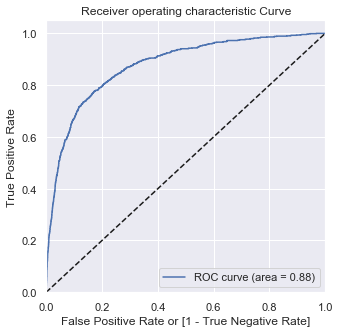

In [146]:
## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds_probs_dt, drop_intermediate = False )
draw_roc(y_test,pred_probs_test)
## Plot ROC Curve| End

<b> <center> Comments after Decision Tree Modelling </center> </b>
<br> We can see that using Decision Tree, we get a good overall model, however the precision and recall for Churned customers are not upto the mark and hasnt much improved from the Lgistic Regression

### 3.9. SVM

In [147]:
## ******* Train using SVM ********** | Start
model_rbf = SVC(kernel='rbf')
model_rbf.fit(df_train_pca2, y_train_)
predictions = model_rbf.predict(df_test_pca2)
classificationreport = classification_report(y_test_,predictions)
print(classificationreport)
## ******* Train using SVM ********** | End

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      7722
           1       0.90      0.80      0.85      7722

    accuracy                           0.85     15444
   macro avg       0.86      0.85      0.85     15444
weighted avg       0.86      0.85      0.85     15444



In [148]:
## ****** Confusion matrix for Test Data ******** | Start
print(confusion_matrix(y_test_,predictions))
## ****** Confusion matrix for Test Data ******** | End

[[7013  709]
 [1547 6175]]


In [149]:
### ******** Performance on Validation set *********** | Start
predictions_rvf_val = model_rbf.predict(df_validation_pca2)
classificationreport_rvf_val = classification_report(y_val,predictions_rvf_val)
print(classificationreport_rvf_val)
print(confusion_matrix(y_val,predictions_rvf_val))
### ******** Performance on Validation set *********** | End

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       895
           1       0.45      0.65      0.53       105

    accuracy                           0.88      1000
   macro avg       0.70      0.78      0.73      1000
weighted avg       0.90      0.88      0.89      1000

[[812  83]
 [ 37  68]]


### 3.10. Random Forest using Stratified KFold

In [150]:
## ****** Train Test split ****** | Start
df_val = df_out.sample(1000)
df_kf=~df_out.isin(df_val)
X=df_kf.drop('churn',axis=1)
y=df_kf['churn']


X_val = df_val.drop('churn',axis=1)
y_val = df_val.churn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## ****** Train Test split ****** | End


## ****** Scaling ******* | Start
#X_train = (X_train - X_train.mean())/X_train.std()
#X_test = (X_test - X_test.mean())/X_test.std()
#X_val = (X_val - X_val.mean())/X_val.std()
## ****** Scaling ******* | Start

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [5, 10, 50,100,200], 
    'max_features': [5, 10,15,20]
}
# Create a based model
RF_S = RandomForestClassifier(min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample",
                                      criterion= 'gini')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF_S, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
grid_search.fit(X_train, y_train)
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min


We can get accuracy of 1.0 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 5}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  8.7min finished


### The above code took around 10 mins to complete

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard Deviation: 0.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       724
        True       1.00      1.00      1.00     19497

    accuracy                           1.00     20221
   macro avg       1.00      1.00      1.00     20221
weighted avg       1.00      1.00      1.00     20221

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       276
        True       1.00      1.00      1.00      8391

    accuracy                           1.00      8667
   macro avg       1.00      1.00      1.00      8667
weighted avg       1.00      1.00      1.00      8667



<Figure size 1080x864 with 0 Axes>

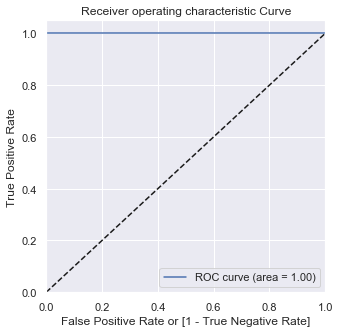

In [151]:
### ********* Fit the model with the specific hyperparameters selected from the Grid Search ********* | Start
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=111)

scores = cross_val_score(RF_S, X_train, y_train, cv=cv, scoring = 'roc_auc')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


rfc1 = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=200, min_samples_leaf=100, 
                                      min_weight_fraction_leaf=0.0, max_features=5, 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

rfc1.fit(X_train, y_train)
predictions_train = rfc1.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = rfc1.predict(X_test)
print(classification_report(y_test, predictions))
preds_probs_RFC=rfc1.predict_proba(X_test)[:,1]
## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds_probs_RFC, drop_intermediate = False )
draw_roc(y_test,preds_probs_RFC)
## Plot ROC Curve| End

### ********* Fit the model with the specific hyperparameters selected from the Grid Search ********* | End

     Importance              ColumnName
118         0.2      offnet_mou_6_7_avg
117         0.1          vol_2g_mb_flag
116         0.1        total_rech_num_8
115         0.1       total_rech_data_6
114         0.1         std_ic_mou_flag
113         0.1     roam_og_mou_6_7_avg
112         0.1  loc_og_t2m_mou_6_7_avg
111         0.1     loc_ic_t2t_mou_flag
110         0.1         count_rech_3g_7
79          0.0     std_ic_t2f_mou_flag
75          0.0      spl_og_mou_6_7_avg
76          0.0         spl_og_mou_flag
77          0.0      std_ic_mou_6_7_avg
78          0.0  std_ic_t2f_mou_6_7_avg
83          0.0     std_ic_t2t_mou_flag
80          0.0  std_ic_t2m_mou_6_7_avg
81          0.0     std_ic_t2m_mou_flag
82          0.0  std_ic_t2t_mou_6_7_avg
73          0.0      spl_ic_mou_6_7_avg
74          0.0         spl_ic_mou_flag
68          0.0       sachet_2g_6_7_avg
72          0.0              sep_vbc_3g
71          0.0          sachet_3g_flag
70          0.0       sachet_3g_6_7_avg


<Figure size 1440x720 with 0 Axes>

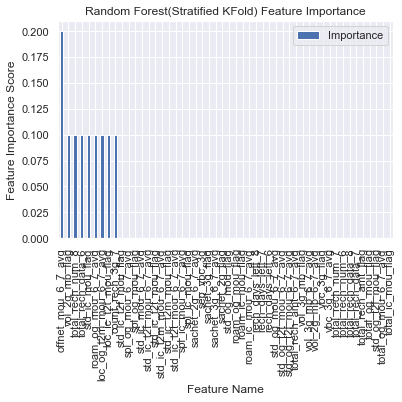

In [199]:
## ******* Feature Importances ********* | Start
importances = rfc1.feature_importances_
col_names =  X.columns

feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)))).rename(columns={0:'Importance',1:"ColumnName"}).sort_values(by='Importance',ascending=False)
print(feature_importance)

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.set_context('talk')
sns.set(font_scale=1)
feature_importance[0:50].plot(x='ColumnName', y='Importance' , kind='bar', title='Random Forest(Stratified KFold) Feature Importance')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()
## ******* Feature Importances ********* | End

<center><b> Random Forest using Stratified KFold </b>
<br> The predictions on the random forest are as expected are very high on the test and train set. But we have received 8 important features  </center>

### 3.11. Random Forest with PCA

In [183]:
## ****** Train Test split ****** | Start
df_val = df_out.sample(1000)
df_t=~df_out.isin(df_val)
X=df_t.drop('churn',axis=1)
y=df_t['churn']


X_val = df_val.drop('churn',axis=1)
y_val = df_val.churn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## ****** Train Test split ****** | Start


## ****** Scaling ******* | Start
#X_train = (X_train - X_train.mean())/X_train.std()
#X_test = (X_test - X_test.mean())/X_test.std()
#X_val = (X_val - X_val.mean())/X_val.std()
## ****** Scaling ******* | Start



## ******** PCA ******** | Start
pca = PCA(random_state = 100,n_components = 50)
df_pca_Xtrain = pca.fit_transform(X_train)
df_pca_Xtest = pca.fit_transform(X_test)
df_pca_Xval = pca.fit_transform(X_val)

df_pca_Xtrain.shape

(20221, 50)

In [184]:
# ******** Check the correlations ********* | Start
corrmat = np.corrcoef(df_pca_Xtrain.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",round(corrmat_nodiag.max(),4), ", min corr: ", round(corrmat_nodiag.min(),4))

# ******** Check the correlations ********* | Start

max corr: 0.1775 , min corr:  -0.1888


In [185]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [186]:
grid_search.fit(df_pca_Xtrain,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [187]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 1.0 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [188]:
# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=2,
                             max_features=5,
                             n_estimators=100,
                            )

In [189]:
rfc.fit(df_pca_Xtrain,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
# predict
predictions = rfc.predict(df_pca_Xtest)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       289
        True       1.00      1.00      1.00      8378

    accuracy                           1.00      8667
   macro avg       1.00      1.00      1.00      8667
weighted avg       1.00      1.00      1.00      8667



In [191]:
### ******  Printing th confusion matrix, Specificity and Sensitivity ******* | Start
cp = confusion_matrix(y_test,predictions)
sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
precision = cp[1,1]/(cp[0,1]+cp[1,1])
print('Confusion Matrix: \n',cp)
print("Sensitivity: ", sensitivity)
print("Specificity: ",specificity)
print("AUC Score: ", metrics.roc_auc_score(y_test,predictions)) 
print("Precision: ",precision)
print("f1 Score: ",metrics.f1_score(y_test,predictions))
### ******  Printing th confusion matrix, Specificity and Sensitivity ******* | End

Confusion Matrix: 
 [[ 289    0]
 [   0 8378]]
Sensitivity:  1.0
Specificity:  1.0
AUC Score:  1.0
Precision:  1.0
f1 Score:  1.0


<Figure size 1080x864 with 0 Axes>

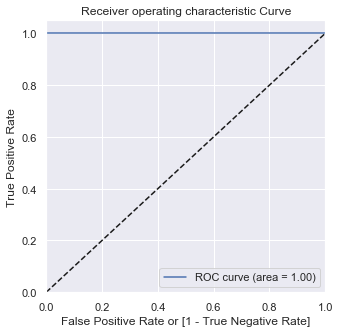

In [192]:
## Plot ROC Curve | Start
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
fpr, tpr, thresholds = metrics.roc_curve(y_test,predictions, drop_intermediate = False )
draw_roc(y_test,predictions)
## Plot ROC Curve| End

In [193]:
## ******* Get the feature importance ********* | Start
rfc.feature_importances_
## ******* Get the feature importance ********* | End

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [194]:
#### ****** Get the PCA components ******** | Start
df_pca_2=pd.DataFrame(pca.components_,columns=X_train.columns,index = ['PC-1'
                                                                      ,'PC-2'
                                                                      ,'PC-3'
                                                                     ,'PC-4'
                                                                     ,'PC-5'
                                                                     ,'PC-6'
                                                                     ,'PC-7'
                                                                     ,'PC-8'
                                                                     ,'PC-9'
                                                                     ,'PC-10'
                                                                     ,'PC-11'
                                                                     ,'PC-12'
                                                                     ,'PC-13'
                                                                     ,'PC-14'
                                                                     ,'PC-15'
                                                                     ,'PC-16'
                                                                     ,'PC-17'
                                                                     ,'PC-18'
                                                                     ,'PC-19'
                                                                     ,'PC-20'
                                                                     ,'PC-21'
                                                                     ,'PC-22'
                                                                     ,'PC-23'
                                                                     ,'PC-24'
                                                                     ,'PC-25'
                                                                     ,'PC-26'
                                                                     ,'PC-27'
                                                                     ,'PC-28'
                                                                     ,'PC-29'
                                                                     ,'PC-30'
                                                                     ,'PC-31'
                                                                     ,'PC-32'
                                                                     ,'PC-33'
                                                                     ,'PC-34'
                                                                     ,'PC-35'
                                                                     ,'PC-36'
                                                                     ,'PC-37'
                                                                     ,'PC-38'
                                                                     ,'PC-39'
                                                                     ,'PC-40'
                                                                     ,'PC-41'
                                                                     ,'PC-42'
                                                                     ,'PC-43'
                                                                     ,'PC-44'
                                                                     ,'PC-45'
                                                                     ,'PC-46'
                                                                     ,'PC-47'
                                                                     ,'PC-48'
                                                                     ,'PC-49'
                                                                     ,'PC-50'])
df_pca_2
#### ****** Get the PCA components ******** | End

total_rech_num_6  total_rech_num_7  total_rech_num_8  max_rech_amt_6  \
PC-1           0.000579          0.000696          0.000722        0.000142   
PC-2          -0.000935          0.000732          0.001102       -0.009527   
PC-3           0.003543          0.003069          0.003301        0.013015   
PC-4           0.001097          0.002131          0.000134       -0.004476   
PC-5          -0.001193         -0.001592         -0.001767        0.043343   
PC-6          -0.000916         -0.000697         -0.001031        0.071658   
PC-7          -0.001532         -0.001846         -0.001142        0.022754   
PC-8           0.000553          0.000648          0.001789        0.009881   
PC-9          -0.000660         -0.000171          0.000427        0.047601   
PC-10          0.000162          0.000720          0.000628       -0.018987   
PC-11         -0.002837          0.001026          0.003109       -0.051201   
PC-12         -0.001895          0.003691          0.005803       -0.120967   
PC-13          0.003803         -0.003372         -0.004972        0.150435   
PC-14         -0.009343         -0.006290         -0.012727        0.223113   
PC-15         -0.008026         -0.007226         -0.005261        0.089676   
PC-16          0.009316          0.002229          0.003149       -0.030314   
PC-17          0.011845          0.016949          0.006962       -0.417557   
PC-18         -0.007573         -0.008610         -0.008183        0.016217   
PC-19         -0.003761         -0.004274          0.000673        0.242835   
PC-20          0.001741          0.000104         -0.001626       -0.127662   
PC-21         -0.010793          0.003058          0.005124        0.196327   
PC-22         -0.003242         -0.000811         -0.001830       -0.006764   
PC-23         -0.002221          0.012597          0.004880        0.111530   
PC-24          0.002050         -0.009390          0.000265       -0.158059   
PC-25          0.000559         -0.012239          0.002781       -0.089808   
PC-26          0.005859          0.005629          0.010058        0.268608   
PC-27          0.004546         -0.001168          0.004527       -0.130016   
PC-28          0.005607         -0.007444         -0.004960       -0.514082   
PC-29         -0.008744         -0.014487         -0.009894       -0.421754   
PC-30         -0.008863         -0.008551         -0.014064       -0.039249   
PC-31          0.001736          0.000547          0.000912        0.120059   
PC-32         -0.013521         -0.015492         -0.017420       -0.055395   
PC-33         -0.005036         -0.002239          0.005419        0.029440   
PC-34          0.003961          0.003232          0.004924       -0.035215   
PC-35         -0.005392         -0.004837         -0.005277       -0.008925   
PC-36          0.002183         -0.009562         -0.002042       -0.045454   
PC-37          0.013168          0.011111          0.010482       -0.030312   
PC-38          0.007233          0.003811          0.010604        0.032165   
PC-39         -0.010815         -0.020975         -0.005592       -0.001969   
PC-40         -0.020214         -0.017421         -0.030579        0.013969   
PC-41         -0.008047         -0.027639          0.000038        0.005210   
PC-42          0.012799         -0.009570         -0.005708       -0.001560   
PC-43          0.210192          0.206156          0.205516       -0.003147   
PC-44         -0.492847         -0.528298         -0.464874        0.000320   
PC-45          0.154993          0.150722          0.205967        0.003770   
PC-46         -0.059501         -0.100134         -0.086923       -0.003172   
PC-47         -0.108962          0.005280          0.076745       -0.000723   
PC-48          0.522843         -0.074639         -0.298607        0.003494   
PC-49          0.580624         -0.388114         -0.309873        0.011945   
PC-50         -0.164877          0.282048         -0.2111

In [195]:
### ******* Print the coefficients for the Random forest ******* | Start
df_pca_2.loc['PC-1']
### ******* Print the coefficients for the Random forest ******* | End

total_rech_num_6          5.792354e-04
total_rech_num_7          6.964093e-04
total_rech_num_8          7.215871e-04
max_rech_amt_6            1.423581e-04
max_rech_amt_7            5.529800e-04
max_rech_amt_8            2.222185e-03
last_day_rch_amt_6       -1.558821e-03
last_day_rch_amt_7       -4.167793e-04
last_day_rch_amt_8       -4.457655e-05
total_rech_data_6         5.906786e-04
total_rech_data_7         6.775469e-04
total_rech_data_8         5.887592e-04
max_rech_data_6           6.575632e-03
max_rech_data_7           7.248930e-03
max_rech_data_8           7.538174e-03
count_rech_2g_6           2.693750e-04
count_rech_2g_7           3.005640e-04
count_rech_2g_8           2.873645e-04
count_rech_3g_6           2.760662e-04
count_rech_3g_7           3.313410e-04
count_rech_3g_8           2.519793e-04
av_rech_amt_data_6        3.485889e-02
av_rech_amt_data_7        3.428124e-02
av_rech_amt_data_8        3.403516e-02
aon                      -1.055607e-02
sep_vbc_3g               

<center><b> Comment after Random forest using PCA </b>
    <br> As expected we got a very high accuracy of the test and the train data set, but here we have recieved a high number of features as selected by PCA

### 3.12. Gradient Boosting

In [166]:
## ******** Gradient Boosting ********** | Start

X = df_out.drop('churn',axis=1)
y = df_out.churn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## ****** Train Test split ****** | Start


## ****** Scaling ******* | Start
#X_train = (X_train - X_train.mean())/X_train.std()
#X_test = (X_test - X_test.mean())/X_test.std()
#X_val = (X_val - X_val.mean())/X_val.std()
## ****** Scaling ******* | Start


params = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1),'min_samples_split':range(5,20,5),'min_samples_leaf':range(5,10,5)}

gsearch = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.05,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = params, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)

gsearch.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  9.8min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6453           0.0315           13.44s
         2           0.6236           0.0246           15.03s
         3           0.6115           0.0210           14.46s
         4           0.5834           0.0158           14.82s
         5           0.6009           0.0148           14.76s
         6           0.5746           0.0127           14.86s
         7           0.5688           0.0129           14.51s
         8           0.5421           0.0116           14.36s
         9           0.4927           0.0078           14.40s
        10           0.5488           0.0090           14.21s
        11           0.4917           0.0078           14.01s
        12           0.5375           0.0063           13.72s
        13           0.5024           0.0064           13.85s
        14           0.4939           0.0051           13.65s
        15           0.5054           0.0064           13.51s
       

       135           0.3521          -0.0000            4.24s
       136           0.3671          -0.0002            4.19s
       137           0.3268          -0.0001            4.12s
       138           0.3344           0.0004            4.06s
       139           0.3502          -0.0002            4.00s
       140           0.3584          -0.0000            3.94s
       141           0.3757           0.0001            3.90s
       142           0.3085           0.0000            3.83s
       143           0.3314          -0.0001            3.77s
       144           0.3120          -0.0003            3.69s
       145           0.3524          -0.0001            3.62s
       146           0.3450          -0.0001            3.55s
       147           0.3331           0.0000            3.48s
       148           0.3568          -0.0001            3.42s
       149           0.3390          -0.0002            3.35s
       150           0.3623           0.0000            3.28s
       1

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_ite...
                                                  presort='auto',
  

### The above code takes around 11 mins

In [167]:
## ******* Get the best score and parameters ******** | Start
gsearch.best_params_, gsearch.best_score_
## ******* Get the best score and parameters ******** | End

({'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 5,
  'n_estimators': 200},
 0.9122757863775853)

In [175]:
## ******* Get the GradientBoosting Object and fit the data ******* | Start
gbc = GradientBoostingClassifier(learning_rate=0.05,
        min_samples_split=5,
        min_samples_leaf=5,
        subsample=0.1,
        random_state=9999,verbose = 2,
        n_estimators=200,
        max_depth=5)
gbc.fit(X_train,y_train)
## ******* Get the GradientBoosting Object and fit the data ******* | End

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6453           0.0315           12.02s
         2           0.6236           0.0246           13.21s
         3           0.6115           0.0210           13.00s
         4           0.5834           0.0158           13.53s
         5           0.6009           0.0148           13.48s
         6           0.5746           0.0127           13.41s
         7           0.5688           0.0129           13.19s
         8           0.5421           0.0116           13.43s
         9           0.4927           0.0078           13.44s
        10           0.5488           0.0090           13.22s
        11           0.4917           0.0078           13.21s
        12           0.5375           0.0063           12.98s
        13           0.5024           0.0064           13.10s
        14           0.4939           0.0051           13.01s
        15           0.5054           0.0064           12.92s
       

       135           0.3521          -0.0000            4.93s
       136           0.3671          -0.0002            4.87s
       137           0.3268          -0.0001            4.78s
       138           0.3344           0.0004            4.70s
       139           0.3502          -0.0002            4.62s
       140           0.3584          -0.0000            4.55s
       141           0.3757           0.0001            4.48s
       142           0.3085           0.0000            4.41s
       143           0.3314          -0.0001            4.34s
       144           0.3120          -0.0003            4.25s
       145           0.3524          -0.0001            4.17s
       146           0.3450          -0.0001            4.09s
       147           0.3331           0.0000            4.00s
       148           0.3568          -0.0001            3.93s
       149           0.3390          -0.0002            3.85s
       150           0.3623           0.0000            3.78s
       1

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=9999, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [176]:
# predict
predictions = gbc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7745
           1       0.69      0.51      0.59       922

    accuracy                           0.92      8667
   macro avg       0.82      0.74      0.77      8667
weighted avg       0.92      0.92      0.92      8667



In [179]:
###****** Get the probability ********* |Start
predsprobs=gbc.predict_proba(X_test)[:,1]
###****** Get the probability ********* |End

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7745
           1       0.69      0.51      0.59       922

    accuracy                           0.92      8667
   macro avg       0.82      0.74      0.77      8667
weighted avg       0.92      0.92      0.92      8667

Accuracy for the test dataset 92.3%
ROC for the test dataset 91.4%


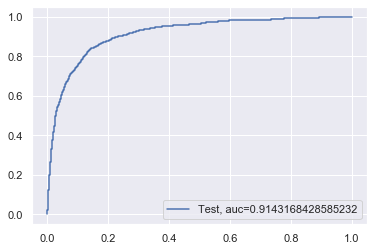

In [180]:
#### ******* Model Performance ********* | Start

print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predsprobs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()
#### ******* Model Performance ********* | End

In [181]:
gbc.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 9999,
 'subsample': 0.1,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 2,
 'warm_start': False}

In [196]:
### ******* Print the coefficients for the Random forest ******* | Start
print(gbc.feature_importances_)
print("\n ************ Feature importance *********** \n")
print(df_pca_2.loc['PC-1'])
### ******* Print the coefficients for the Random forest ******* | End

[1.63278591e-02 1.67247617e-02 1.84889412e-02 1.35127436e-02
 1.37136074e-02 1.64024045e-02 8.64025282e-03 9.00471091e-03
 2.16601020e-02 2.64148510e-03 2.24900069e-03 1.26367178e-03
 3.85924969e-03 9.09432706e-03 4.75248460e-03 1.91270875e-03
 2.80574441e-03 4.71707600e-04 1.11662167e-03 9.72501123e-04
 1.50846958e-03 5.16633445e-03 4.34269682e-03 3.82057062e-03
 2.36490245e-02 2.23215734e-03 3.86271185e-03 2.86556818e-03
 3.88349116e-03 1.92113059e-02 1.85892711e-02 1.56324947e-01
 1.25904271e-02 1.36297071e-02 4.02928161e-02 7.20419363e-05
 0.00000000e+00 1.88552254e-03 0.00000000e+00 1.47707296e-02
 1.15365958e-03 1.22765699e-02 8.79359925e-03 1.27458255e-02
 1.08066501e-02 1.00574567e-02 1.08285735e-03 1.09301880e-02
 1.21377373e-03 1.22579908e-02 6.83117839e-04 1.85006852e-02
 2.44875864e-03 1.17423331e-02 1.03453913e-03 1.54912104e-03
 5.83987110e-04 2.38338869e-03 4.42798240e-04 7.56388351e-03
 5.12614662e-04 1.01451260e-02 1.27953563e-03 1.25566045e-02
 1.42208693e-03 2.314642

In [207]:
## ***** Get the first 20 features ****** | Start
importances = gbc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(20)
## ***** Get the first 20 features ****** | End

colName                   value
0   0.156325        Total Recharge_8
1   0.040293        rech_days_left_8
2   0.038235    total_ic_mou_6_7_avg
3   0.034337    total_og_mou_6_7_avg
4   0.023649                     aon
5   0.021660      last_day_rch_amt_8
6   0.019211        Total Recharge_6
7   0.018932  loc_ic_t2m_mou_6_7_avg
8   0.018589        Total Recharge_7
9   0.018501            arpu_6_7_avg
10  0.018489        total_rech_num_8
11  0.016725        total_rech_num_7
12  0.016551      std_og_mou_6_7_avg
13  0.016402          max_rech_amt_8
14  0.016328        total_rech_num_6
15  0.016070      loc_ic_mou_6_7_avg
16  0.015050  loc_ic_t2t_mou_6_7_avg
17  0.014771      offnet_mou_6_7_avg
18  0.014600      spl_og_mou_6_7_avg
19  0.014591       vol_2g_mb_6_7_avg

<center> <b> <font color="Purple" size='4px'> Final Comments on model building </font> </b></center>
<br>
We have used the following models:
<br>
<ul>
    <li> Logistic Regression using PCA </li>
    <li> Logistic Regression using RFE </li>
    <li> Decision Tree using Lasso </li>
    <li> RandomForest using PCA </li>
    <li> RandomForest using StratifiedKFold </li>
    <li> SVM using RBF </li>
    <li> Gradient using PCA </li>
</ul>
<br> Some of the important predictors form the various models are:
<br> 
<font color="brown" size='2px'>
<ul>
    <li> total_rech_num_7 </li>
    <li> total_rech_data_6 </li>
    <li> offnet_mou_6_7_avg </li>
    <li> std_ic_mou_flag </li>
    <li> vol_2g_mb_flag </li>
    <li> loc_ic_t2t_mou_flag </li>
    <li> vol_3g_mb_flag </li>
    <li> aon </li>
    <li> arpu_6_7_avg </li>
</ul>
</font>

<br> The best model that we have seen is <b> Randomforest </b> , but GradientBoosting performance also comes very close to the RandomForest